# K-Nearest Neighbors Classifier

**K-Nearest Neighbors (KNN)** is a classification algorithm. The central idea is that data points with similar attributes tend to fall into similar categories.

## Distance Between Points - 2D

We need to define what it means for two points to be close together or far apart. To do this, we’re going to use the Distance Formula.

For this example, the data has two dimensions:

* The length of the movie
* The movie’s release date

In [6]:
star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

In [7]:
def distance(movie1, movie2):
    length_difference = (movie1[0] - movie2[0]) ** 2
    year_difference = (movie1[1] - movie2[1]) ** 2
    distance = (length_difference + year_difference) ** 0.5
    return distance

****Which movie is Star Wars more similar to?****

In [8]:
print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

10.770329614269007
38.897300677553446


## Distance Between Points - 3D

Making a movie rating predictor based on just the length and release date of movies is pretty limited. There are so many more interesting pieces of data about movies that we could use! So let’s add another dimension.

Let’s say this third dimension is the movie’s budget. We now have to find the distance between these two points in three dimensions.

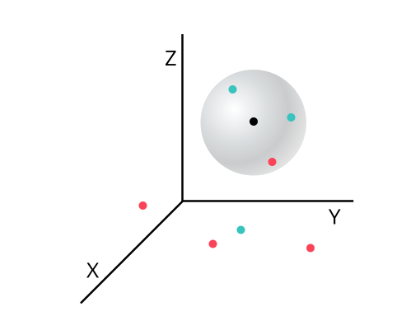

We’ve added a third dimension to each of our movies.

In [9]:
star_wars = [125, 1977, 11000000]
raiders = [115, 1981, 18000000]
mean_girls = [97, 2004, 17000000]

In [10]:
def distance(movie1, movie2):
    distance = 0
    for i in range(len(movie1)):
        difference = (movie1[i] - movie2[i]) ** 2
        distance += difference
    return distance ** 0.5

In [11]:
print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

7000000.000008286
6000000.000126083


## Data with Different Scales: Normalization

**Normalization** is a technique that is applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale

### Min-Max Normalization

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

For example, if the minimum value of a feature was 20, and the maximum value was 40, then 30 would be transformed to about 0.5 since it is halfway between 20 and 40. The formula is as follows:

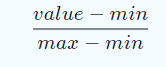

Min-max normalization has one fairly significant downside: it does not handle outliers very well. For example, if you have 99 values between 0 and 40, and one value is 100, then the 99 values will all be transformed to a value between 0 and 0.4. That data is just as squished as before! Take a look at the image below to see an example of this

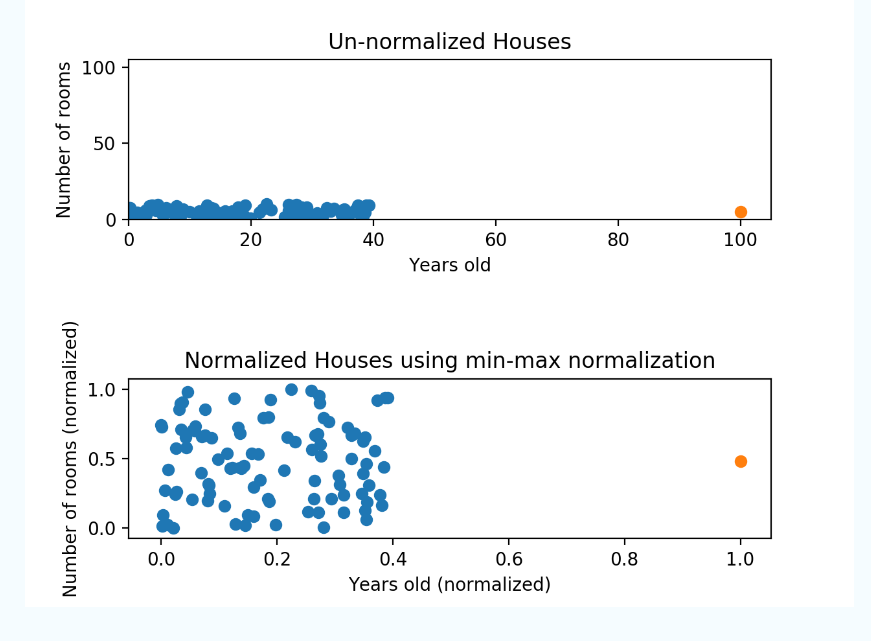

In [12]:
release_dates = [1897, 1998, 2000, 1948, 1962, 1950, 1975, 1960,
                 2017, 1937, 1968, 1996, 1944,
                 1891, 1995, 1948, 2011, 1965, 1891, 1978]

In [13]:
min(release_dates)

1891

In [14]:
max(release_dates)

2017

In [15]:
def min_max_normalize(lst):
    minimum  = min(lst)
    maximum = max(lst)
    normalized = []

    for i in range(len(lst)):
        diff = maximum - minimum
        normalized_value = (lst[i] - minimum)/diff
        normalized.append(normalized_value)

    return normalized

In [16]:
min_max_normalize(release_dates)

[0.047619047619047616,
 0.8492063492063492,
 0.8650793650793651,
 0.4523809523809524,
 0.5634920634920635,
 0.46825396825396826,
 0.6666666666666666,
 0.5476190476190477,
 1.0,
 0.36507936507936506,
 0.6111111111111112,
 0.8333333333333334,
 0.42063492063492064,
 0.0,
 0.8253968253968254,
 0.4523809523809524,
 0.9523809523809523,
 0.5873015873015873,
 0.0,
 0.6904761904761905]

## Finding the Nearest Neighbors

In [17]:
movie_dataset = {'Avatar': [0.01940156245995175, 0.4812286689419795, 0.9213483146067416], "Pirates of the Caribbean: At World's End": [0.02455894456664483, 0.45051194539249145, 0.898876404494382], 'Spectre': [0.02005646812429373, 0.378839590443686, 0.9887640449438202], 'The Dark Knight Rises': [0.020465784164507467, 0.4334470989761092, 0.9550561797752809], 'John Carter': [0.021587310114693104, 0.3242320819112628, 0.9550561797752809], 'Spider-Man 3': [0.021120689828849445, 0.4061433447098976, 0.898876404494382], 'Tangled': [0.021284416244934937, 0.2150170648464164, 0.9325842696629213], 'Avengers: Age of Ultron': [0.020465784164507467, 0.35494880546075086, 0.9887640449438202], 'Harry Potter and the Half-Blood Prince': [0.020465784164507467, 0.39590443686006827, 0.9213483146067416], 'Batman v Superman: Dawn of Justice': [0.020465784164507467, 0.49829351535836175, 1.0], 'Superman Returns': [0.017109392634754826, 0.45051194539249145, 0.8876404494382022], 'Quantum of Solace': [0.0163726237623701, 0.2354948805460751, 0.9101123595505618], "Pirates of the Caribbean: Dead Man's Chest": [0.018419203963438782, 0.3890784982935154, 0.8876404494382022], 'The Lone Ranger': [0.017600571883011312, 0.3856655290102389, 0.9662921348314607], 'Man of Steel': [0.018419203963438782, 0.36177474402730375, 0.9662921348314607], 'The Chronicles of Narnia: Prince Caspian': [0.018419203963438782, 0.3856655290102389, 0.9101123595505618], 'The Avengers': [0.018009887923225047, 0.4641638225255973, 0.9550561797752809], 'Pirates of the Caribbean: On Stranger Tides': [0.020465784164507467, 0.3378839590443686, 0.9438202247191011], 'Men in Black 3': [0.018419203963438782, 0.2354948805460751, 0.9550561797752809], 'The Hobbit: The Battle of the Five Armies': [0.020465784164507467, 0.4334470989761092, 0.9775280898876404], 'The Amazing Spider-Man': [0.01882852000365252, 0.39590443686006827, 0.9550561797752809], 'Robin Hood': [0.0163726237623701, 0.4061433447098976, 0.9325842696629213], 'The Hobbit: The Desolation of Smaug': [0.018419203963438782, 0.5085324232081911, 0.9662921348314607], 'The Golden Compass': [0.014735359601515157, 0.2593856655290102, 0.898876404494382], 'King Kong': [0.016945666218669334, 0.5597269624573379, 0.8764044943820225], 'Titanic': [0.0163726237623701, 0.5358361774744027, 0.7865168539325843], 'Captain America: Civil War': [0.020465784164507467, 0.37542662116040953, 1.0], 'Battleship': [0.017109392634754826, 0.32081911262798635, 0.9550561797752809], 'Jurassic World': [0.012279463360232739, 0.29692832764505117, 0.9887640449438202], 'Skyfall': [0.0163726237623701, 0.36177474402730375, 0.9550561797752809], 'Spider-Man 2': [0.0163726237623701, 0.33447098976109213, 0.8651685393258427], 'Iron Man 3': [0.0163726237623701, 0.5392491467576792, 0.9662921348314607], 'Alice in Wonderland': [0.0163726237623701, 0.24232081911262798, 0.9325842696629213], 'X-Men: The Last Stand': [0.017191255842797574, 0.22866894197952217, 0.8876404494382022], 'Monsters University': [0.0163726237623701, 0.22866894197952217, 0.9662921348314607], 'Transformers: Revenge of the Fallen': [0.0163726237623701, 0.3856655290102389, 0.9213483146067416], 'Transformers: Age of Extinction': [0.017191255842797574, 0.43686006825938567, 0.9775280898876404], 'Oz the Great and Powerful': [0.017600571883011312, 0.3174061433447099, 0.9662921348314607], 'The Amazing Spider-Man 2': [0.0163726237623701, 0.3583617747440273, 0.9775280898876404], 'TRON: Legacy': [0.013916727521087684, 0.3003412969283277, 0.9325842696629213], 'Cars 2': [0.0163726237623701, 0.2354948805460751, 0.9438202247191011], 'Green Lantern': [0.0163726237623701, 0.2935153583617747, 0.9438202247191011], 'Toy Story 3': [0.0163726237623701, 0.22525597269624573, 0.9325842696629213], 'Terminator Salvation': [0.0163726237623701, 0.2764505119453925, 0.9213483146067416], 'Furious 7': [0.015553991681942629, 0.3515358361774744, 0.9887640449438202], 'World War Z': [0.015553991681942629, 0.2935153583617747, 0.9662921348314607], 'X-Men: Days of Future Past': [0.0163726237623701, 0.3822525597269625, 0.9775280898876404], 'Star Trek Into Darkness': [0.015553991681942629, 0.3242320819112628, 0.9662921348314607], 'Jack the Giant Slayer': [0.015963307722156365, 0.2627986348122867, 0.9662921348314607], 'The Great Gatsby': [0.00859561899830911, 0.36177474402730375, 0.9662921348314607], 'Prince of Persia: The Sands of Time': [0.0163726237623701, 0.2696245733788396, 0.9325842696629213], 'Pacific Rim': [0.015553991681942629, 0.32081911262798635, 0.9662921348314607], 'Transformers: Dark of the Moon': [0.015963307722156365, 0.3993174061433447, 0.9438202247191011], 'Indiana Jones and the Kingdom of the Crystal Skull': [0.015144675641728892, 0.2901023890784983, 0.9101123595505618], 'Brave': [0.015144675641728892, 0.19112627986348124, 0.9550561797752809], 'Star Trek Beyond': [0.015144675641728892, 0.2901023890784983, 1.0], 'WALL·E': [0.014735359601515157, 0.20819112627986347, 0.9101123595505618], 'Rush Hour 3': [0.011460831279805265, 0.18430034129692832, 0.898876404494382], '2012': [0.0163726237623701, 0.4129692832764505, 0.9213483146067416], 'A Christmas Carol': [0.0163726237623701, 0.20136518771331058, 0.9213483146067416], 'Jupiter Ascending': [0.014407906769344168, 0.30716723549488056, 0.9887640449438202], 'The Legend of Tarzan': [0.014735359601515157, 0.24914675767918087, 1.0], 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe': [0.014735359601515157, 0.3856655290102389, 0.8764044943820225], 'X-Men: Apocalypse': [0.014571633185429662, 0.3651877133105802, 1.0], 'The Dark Knight': [0.015144675641728892, 0.3924914675767918, 0.9101123595505618], 'Up': [0.01432604356130142, 0.20136518771331058, 0.9213483146067416], 'Monsters vs. Aliens': [0.01432604356130142, 0.1945392491467577, 0.9213483146067416], 'Iron Man': [0.011460831279805265, 0.3037542662116041, 0.9101123595505618], 'Hugo': [0.013916727521087684, 0.3037542662116041, 0.9438202247191011], 'Wild Wild West': [0.013916727521087684, 0.2354948805460751, 0.8089887640449438], 'The Mummy: Tomb of the Dragon Emperor': [0.011870147320019002, 0.25597269624573377, 0.9101123595505618], 'Suicide Squad': [0.01432604356130142, 0.2935153583617747, 1.0], 'Evan Almighty': [0.01432604356130142, 0.20136518771331058, 0.898876404494382], 'Edge of Tomorrow': [0.014571633185429662, 0.2593856655290102, 0.9775280898876404], 'Waterworld': [0.01432604356130142, 0.47440273037542663, 0.7640449438202247], 'G.I. Joe: The Rise of Cobra': [0.01432604356130142, 0.2764505119453925, 0.9213483146067416], 'Inside Out': [0.01432604356130142, 0.19795221843003413, 0.9887640449438202], 'The Jungle Book': [0.01432604356130142, 0.2354948805460751, 1.0], 'Iron Man 2': [0.0163726237623701, 0.29692832764505117, 0.9325842696629213], 'Snow White and the Huntsman': [0.013916727521087684, 0.3242320819112628, 0.9550561797752809], 'Maleficent': [0.014735359601515157, 0.20477815699658702, 0.9775280898876404], 'Dawn of the Planet of the Apes': [0.013916727521087684, 0.3174061433447099, 0.9775280898876404], '47 Ronin': [0.01432604356130142, 0.310580204778157, 0.9662921348314607], 'Captain America: The Winter Soldier': [0.013916727521087684, 0.3378839590443686, 0.9775280898876404], 'Shrek Forever After': [0.013507411480873947, 0.19112627986348124, 0.9325842696629213], 'Tomorrowland': [0.015553991681942629, 0.3174061433447099, 0.9887640449438202], 'Big Hero 6': [0.013507411480873947, 0.22184300341296928, 0.9775280898876404], 'Wreck-It Ralph': [0.013507411480873947, 0.21843003412969283, 0.9550561797752809], 'The Polar Express': [0.013507411480873947, 0.2150170648464164, 0.8651685393258427], 'Independence Day: Resurgence': [0.013507411480873947, 0.2832764505119454, 1.0], 'How to Train Your Dragon': [0.013507411480873947, 0.20819112627986347, 0.9325842696629213], 'Terminator 3: Rise of the Machines': [0.0163726237623701, 0.24573378839590443, 0.8539325842696629], 'Guardians of the Galaxy': [0.013916727521087684, 0.28668941979522183, 0.9775280898876404], 'Interstellar': [0.013507411480873947, 0.45051194539249145, 0.9775280898876404], 'Inception': [0.01309809544066021, 0.378839590443686, 0.9325842696629213], 'The Fast and the Furious': [0.003110784059445043, 0.2354948805460751, 0.8314606741573034], 'The Curious Case of Benjamin Button': [0.012279463360232739, 0.4402730375426621, 0.9101123595505618], 'X-Men: First Class': [0.01309809544066021, 0.3242320819112628, 0.9438202247191011], 'The Hunger Games: Mockingjay - Part 2': [0.01309809544066021, 0.3412969283276451, 0.9887640449438202], "The Sorcerer's Apprentice": [0.012279463360232739, 0.24573378839590443, 0.9325842696629213], 'Poseidon': [0.01309809544066021, 0.20819112627986347, 0.8876404494382022], 'Alice Through the Looking Glass': [0.013916727521087684, 0.2593856655290102, 1.0], 'Shrek the Third': [0.01309809544066021, 0.19112627986348124, 0.898876404494382], 'Warcraft': [0.01309809544066021, 0.2935153583617747, 1.0], 'Terminator Genisys': [0.012688779400446475, 0.3037542662116041, 0.9887640449438202], 'The Chronicles of Narnia: The Voyage of the Dawn Treader': [0.012688779400446475, 0.2593856655290102, 0.9325842696629213], 'Pearl Harbor': [0.011460831279805265, 0.5017064846416383, 0.8314606741573034], 'Transformers': [0.012279463360232739, 0.3651877133105802, 0.898876404494382], 'Alexander': [0.012688779400446475, 0.5767918088737202, 0.8651685393258427], 'Harry Potter and the Order of the Phoenix': [0.012279463360232739, 0.3447098976109215, 0.898876404494382], 'Harry Potter and the Goblet of Fire': [0.012279463360232739, 0.40955631399317405, 0.8764044943820225], 'Hancock': [0.012279463360232739, 0.22184300341296928, 0.9101123595505618], 'I Am Legend': [0.012279463360232739, 0.22866894197952217, 0.898876404494382], 'Charlie and the Chocolate Factory': [0.012279463360232739, 0.26621160409556316, 0.8764044943820225], 'Ratatouille': [0.012279463360232739, 0.2525597269624573, 0.898876404494382], 'Batman Begins': [0.012279463360232739, 0.310580204778157, 0.8764044943820225], 'Madagascar: Escape 2 Africa': [0.012279463360232739, 0.17747440273037543, 0.9101123595505618], 'Night at the Museum: Battle of the Smithsonian': [0.012279463360232739, 0.23208191126279865, 0.9213483146067416], 'X-Men Origins: Wolverine': [0.012279463360232739, 0.27986348122866894, 0.9213483146067416], 'The Matrix Revolutions': [0.012279463360232739, 0.31399317406143346, 0.8539325842696629], 'Frozen': [0.012279463360232739, 0.22184300341296928, 0.9662921348314607], 'The Matrix Reloaded': [0.012279463360232739, 0.3447098976109215, 0.8539325842696629], 'Thor: The Dark World': [0.013916727521087684, 0.25597269624573377, 0.9662921348314607], 'Mad Max: Fury Road': [0.012279463360232739, 0.2832764505119454, 0.9887640449438202], 'Angels & Demons': [0.012279463360232739, 0.3720136518771331, 0.9213483146067416], 'Thor': [0.012279463360232739, 0.26621160409556316, 0.9438202247191011], 'Bolt': [0.012279463360232739, 0.20136518771331058, 0.9101123595505618], 'G-Force': [0.012279463360232739, 0.17406143344709898, 0.9213483146067416], 'Wrath of the Titans': [0.012279463360232739, 0.21160409556313994, 0.9550561797752809], 'Dark Shadows': [0.008186302958095375, 0.2593856655290102, 0.9550561797752809], 'Mission: Impossible - Rogue Nation': [0.012279463360232739, 0.32081911262798635, 0.9887640449438202], 'The Wolfman': [0.012279463360232739, 0.27986348122866894, 0.9325842696629213], 'Bee Movie': [0.012279463360232739, 0.18430034129692832, 0.898876404494382], 'Kung Fu Panda 2': [0.012279463360232739, 0.18088737201365188, 0.9438202247191011], 'The Last Airbender': [0.012279463360232739, 0.22525597269624573, 0.9325842696629213], 'Mission: Impossible III': [0.012279463360232739, 0.29692832764505117, 0.8876404494382022], 'White House Down': [0.012279463360232739, 0.32081911262798635, 0.9662921348314607], 'Mars Needs Moms': [0.012279463360232739, 0.17406143344709898, 0.9438202247191011], 'Flushed Away': [0.012197600152189991, 0.16382252559726962, 0.8876404494382022], 'Pan': [0.012279463360232739, 0.2525597269624573, 0.9887640449438202], 'Mr. Peabody & Sherman': [0.011870147320019002, 0.18771331058020477, 0.9775280898876404], 'Troy': [0.01432604356130142, 0.5426621160409556, 0.8651685393258427], "Madagascar 3: Europe's Most Wanted": [0.011870147320019002, 0.19112627986348124, 0.9550561797752809], 'Die Another Day': [0.01162455769589076, 0.32764505119453924, 0.8426966292134831], 'Ghostbusters': [0.011788284111976254, 0.2696245733788396, 1.0], 'Armageddon': [0.011460831279805265, 0.39590443686006827, 0.797752808988764], 'Men in Black II': [0.011460831279805265, 0.17406143344709898, 0.8426966292134831], 'Beowulf': [0.012279463360232739, 0.26621160409556316, 0.898876404494382], 'Kung Fu Panda 3': [0.011870147320019002, 0.19795221843003413, 1.0], 'Mission: Impossible - Ghost Protocol': [0.011870147320019002, 0.32764505119453924, 0.9438202247191011], 'Rise of the Guardians': [0.011870147320019002, 0.20477815699658702, 0.9550561797752809], 'Fun with Dick and Jane': [0.008186302958095375, 0.18088737201365188, 0.8764044943820225], 'The Last Samurai': [0.011460831279805265, 0.3993174061433447, 0.8539325842696629], 'Exodus: Gods and Kings': [0.011460831279805265, 0.3856655290102389, 0.9775280898876404], 'Star Trek': [0.012279463360232739, 0.30716723549488056, 0.9213483146067416], 'Spider-Man': [0.011378968071762518, 0.28668941979522183, 0.8426966292134831], 'How to Train Your Dragon 2': [0.011870147320019002, 0.22184300341296928, 0.9775280898876404], 'Gods of Egypt': [0.011460831279805265, 0.3037542662116041, 1.0], 'Stealth': [0.011051515239591529, 0.28668941979522183, 0.8764044943820225], 'Watchmen': [0.010642199199377792, 0.6075085324232082, 0.9213483146067416], 'Lethal Weapon 4': [0.011460831279805265, 0.30716723549488056, 0.797752808988764], 'Hulk': [0.011215241655677024, 0.3447098976109215, 0.8539325842696629], 'G.I. Joe: Retaliation': [0.010642199199377792, 0.2901023890784983, 0.9662921348314607], 'Sahara': [0.010642199199377792, 0.29692832764505117, 0.8764044943820225], 'Final Fantasy: The Spirits Within': [0.011215241655677024, 0.2354948805460751, 0.8314606741573034], 'Captain America: The First Avenger': [0.011460831279805265, 0.29692832764505117, 0.9438202247191011], 'The World Is Not Enough': [0.011051515239591529, 0.310580204778157, 0.8089887640449438], 'Master and Commander: The Far Side of the World': [0.012279463360232739, 0.3447098976109215, 0.8539325842696629], 'The Twilight Saga: Breaking Dawn - Part 2': [0.00982356711895032, 0.26621160409556316, 0.9550561797752809], 'Happy Feet 2': [0.011051515239591529, 0.2150170648464164, 0.9438202247191011], 'The Incredible Hulk': [0.012279463360232739, 0.33447098976109213, 0.9101123595505618], 'The BFG': [0.011460831279805265, 0.27303754266211605, 1.0], 'The Revenant': [0.011051515239591529, 0.4061433447098976, 0.9887640449438202], 'Turbo': [0.011051515239591529, 0.20136518771331058, 0.9662921348314607], 'Rango': [0.011051515239591529, 0.23890784982935154, 0.9438202247191011], 'Penguins of Madagascar': [0.010805925615463287, 0.18771331058020477, 0.9775280898876404], 'The Bourne Ultimatum': [0.009004935038522847, 0.26621160409556316, 0.898876404494382], 'Kung Fu Panda': [0.010642199199377792, 0.18771331058020477, 0.9101123595505618], 'Ant-Man': [0.010642199199377792, 0.27303754266211605, 0.9887640449438202], 'The Hunger Games: Catching Fire': [0.010642199199377792, 0.3720136518771331, 0.9662921348314607], 'Home': [0.011051515239591529, 0.1945392491467577, 0.9887640449438202], 'War of the Worlds': [0.010805925615463287, 0.2696245733788396, 0.8764044943820225], 'Bad Boys II': [0.010642199199377792, 0.37542662116040953, 0.8539325842696629], 'Puss in Boots': [0.010642199199377792, 0.18088737201365188, 0.9438202247191011], 'Salt': [0.009004935038522847, 0.21843003412969283, 0.9325842696629213], 'Noah': [0.010232883159164057, 0.3447098976109215, 0.9775280898876404], 'The Adventures of Tintin': [0.011051515239591529, 0.23890784982935154, 0.9438202247191011], 'Harry Potter and the Prisoner of Azkaban': [0.010642199199377792, 0.3583617747440273, 0.8651685393258427], 'Australia': [0.010642199199377792, 0.43686006825938567, 0.9101123595505618], 'After Earth': [0.010642199199377792, 0.2150170648464164, 0.9662921348314607], 'Dinosaur': [0.010437541179270924, 0.15358361774744028, 0.8202247191011236], 'Night at the Museum: Secret of the Tomb': [0.01039660957524955, 0.20819112627986347, 0.9775280898876404], 'Megamind': [0.010642199199377792, 0.19795221843003413, 0.9325842696629213], "Harry Potter and the Sorcerer's Stone": [0.010232883159164057, 0.41638225255972694, 0.8314606741573034], 'R.I.P.D.': [0.010642199199377792, 0.20136518771331058, 0.9662921348314607], 'Pirates of the Caribbean: The Curse of the Black Pearl': [0.011460831279805265, 0.36177474402730375, 0.8539325842696629], 'The Hunger Games: Mockingjay - Part 1': [0.010232883159164057, 0.2935153583617747, 0.9775280898876404], 'The Da Vinci Code': [0.010232883159164057, 0.46757679180887374, 0.8876404494382022], 'Rio 2': [0.008431892582223616, 0.21843003412969283, 0.9775280898876404], 'X-Men 2': [0.009004935038522847, 0.3310580204778157, 0.8539325842696629], 'Fast Five': [0.010232883159164057, 0.3242320819112628, 0.9438202247191011], 'Sherlock Holmes: A Game of Shadows': [0.010232883159164057, 0.31399317406143346, 0.9438202247191011], 'Clash of the Titans': [0.010232883159164057, 0.2354948805460751, 0.9325842696629213], 'Total Recall': [0.00532109067659922, 0.2593856655290102, 0.7078651685393258], 'The 13th Warrior': [0.006958354837454165, 0.22184300341296928, 0.8089887640449438], 'The Bourne Legacy': [0.010232883159164057, 0.33447098976109213, 0.9550561797752809], 'Batman & Robin': [0.010232883159164057, 0.3003412969283277, 0.7865168539325843], 'How the Grinch Stole Christmas': [0.010069156743078561, 0.24914675767918087, 0.8202247191011236], 'The Day After Tomorrow': [0.010232883159164057, 0.29692832764505117, 0.8651685393258427], 'Mission: Impossible II': [0.010232883159164057, 0.2935153583617747, 0.8202247191011236], 'The Perfect Storm': [0.011460831279805265, 0.3174061433447099, 0.8202247191011236], 'Fantastic 4: Rise of the Silver Surfer': [0.010642199199377792, 0.18771331058020477, 0.898876404494382], 'Life of Pi': [0.00982356711895032, 0.30716723549488056, 0.9550561797752809], 'Ghost Rider': [0.009004935038522847, 0.2935153583617747, 0.898876404494382], 'Jason Bourne': [0.00982356711895032, 0.2935153583617747, 1.0], "Charlie's Angels: Full Throttle": [0.00982356711895032, 0.23890784982935154, 0.8539325842696629], 'Prometheus': [0.010642199199377792, 0.29692832764505117, 0.9550561797752809], 'Stuart Little 2': [0.00982356711895032, 0.13651877133105803, 0.8426966292134831], 'Elysium': [0.009414251078736583, 0.24573378839590443, 0.9662921348314607], 'The Chronicles of Riddick': [0.00859561899830911, 0.3310580204778157, 0.8651685393258427], 'RoboCop': [0.008186302958095375, 0.27303754266211605, 0.9775280898876404], 'Speed Racer': [0.00982356711895032, 0.33447098976109213, 0.9101123595505618], 'How Do You Know': [0.00982356711895032, 0.28668941979522183, 0.9325842696629213], 'Knight and Day': [0.009577977494822079, 0.27303754266211605, 0.9325842696629213], 'Oblivion': [0.00982356711895032, 0.29692832764505117, 0.9662921348314607], 'Star Wars: Episode III - Revenge of the Sith': [0.009250524662651088, 0.3515358361774744, 0.8764044943820225], 'Star Wars: Episode II - Attack of the Clones': [0.009414251078736583, 0.3583617747440273, 0.8426966292134831], 'Monsters, Inc.': [0.009414251078736583, 0.18771331058020477, 0.8314606741573034], 'The Wolverine': [0.00982356711895032, 0.3447098976109215, 0.9662921348314607], 'Star Wars: Episode I - The Phantom Menace': [0.009414251078736583, 0.3378839590443686, 0.8089887640449438], 'The Croods': [0.011051515239591529, 0.20819112627986347, 0.9662921348314607], 'Windtalkers': [0.009414251078736583, 0.39590443686006827, 0.8426966292134831], "The Huntsman: Winter's War": [0.009414251078736583, 0.2832764505119454, 1.0], 'Teenage Mutant Ninja Turtles': [0.010232883159164057, 0.21843003412969283, 0.9775280898876404], 'Gravity': [0.008186302958095375, 0.18430034129692832, 0.9662921348314607], "Dante's Peak": [0.009496114286779331, 0.24232081911262798, 0.7865168539325843], 'Fantastic Four': [0.00982356711895032, 0.2150170648464164, 0.9887640449438202], 'Night at the Museum': [0.009004935038522847, 0.24232081911262798, 0.8876404494382022], 'San Andreas': [0.009004935038522847, 0.2627986348122867, 0.9887640449438202], 'Tomorrow Never Dies': [0.009004935038522847, 0.27986348122866894, 0.7865168539325843], 'The Patriot': [0.009004935038522847, 0.3583617747440273, 0.8202247191011236], "Ocean's Twelve": [0.009004935038522847, 0.3003412969283277, 0.8651685393258427], 'Mr. & Mrs. Smith': [0.00982356711895032, 0.3037542662116041, 0.8764044943820225], 'Insurgent': [0.009004935038522847, 0.27986348122866894, 0.9887640449438202], 'The Aviator': [0.009004935038522847, 0.4539249146757679, 0.8651685393258427], "Gulliver's Travels": [0.009168661454608342, 0.16382252559726962, 0.9325842696629213], 'The Green Hornet': [0.00982356711895032, 0.27986348122866894, 0.9438202247191011], '300: Rise of an Empire': [0.009004935038522847, 0.22184300341296928, 0.9775280898876404], 'The Smurfs': [0.009004935038522847, 0.22525597269624573, 0.9438202247191011], 'Home on the Range': [0.009004935038522847, 0.13310580204778158, 0.8651685393258427], 'Allegiant': [0.009004935038522847, 0.2832764505119454, 1.0], 'Real Steel': [0.009004935038522847, 0.30716723549488056, 0.9438202247191011], 'The Smurfs 2': [0.00859561899830911, 0.23208191126279865, 0.9662921348314607], 'Speed 2: Cruise Control': [0.01309809544066021, 0.28668941979522183, 0.7865168539325843], "Ender's Game": [0.009004935038522847, 0.2627986348122867, 0.9662921348314607], 'Live Free or Die Hard': [0.009004935038522847, 0.31399317406143346, 0.898876404494382], 'The Lord of the Rings: The Fellowship of the Ring': [0.007613260501796143, 0.45733788395904434, 0.8314606741573034], 'Around the World in 80 Days': [0.009004935038522847, 0.2832764505119454, 0.8651685393258427], 'Ali': [0.008759345414394605, 0.43686006825938567, 0.8314606741573034], 'The Cat in the Hat': [0.008923071830480099, 0.15358361774744028, 0.8539325842696629], 'I, Robot': [0.00982356711895032, 0.26621160409556316, 0.8651685393258427], 'Kingdom of Heaven': [0.010642199199377792, 0.5358361774744027, 0.8764044943820225], 'Stuart Little': [0.010887788823506035, 0.16040955631399317, 0.8089887640449438], 'The Princess and the Frog': [0.00859561899830911, 0.20477815699658702, 0.9213483146067416], 'The Martian': [0.008841208622437353, 0.3890784982935154, 0.9887640449438202], 'The Island': [0.010314746367206803, 0.3378839590443686, 0.8764044943820225], 'Town & Country': [0.007367670877667902, 0.22866894197952217, 0.8314606741573034], 'Gone in Sixty Seconds': [0.007367670877667902, 0.30716723549488056, 0.8202247191011236], 'Gladiator': [0.008431892582223616, 0.45733788395904434, 0.8202247191011236], 'Minority Report': [0.008350029374180869, 0.36860068259385664, 0.8426966292134831], 'Harry Potter and the Chamber of Secrets': [0.008186302958095375, 0.46757679180887374, 0.8426966292134831], 'Casino Royale': [0.012279463360232739, 0.3651877133105802, 0.8876404494382022], 'Planet of the Apes': [0.008186302958095375, 0.27986348122866894, 0.8314606741573034], 'Terminator 2: Judgment Day': [0.008350029374180869, 0.39590443686006827, 0.7191011235955056], 'Public Enemies': [0.008186302958095375, 0.3515358361774744, 0.9213483146067416], 'American Gangster': [0.008186302958095375, 0.47440273037542663, 0.898876404494382], 'True Lies': [0.009414251078736583, 0.35494880546075086, 0.7528089887640449], 'The Taking of Pelham 1 2 3': [0.008186302958095375, 0.2354948805460751, 0.9213483146067416], 'Little Fockers': [0.008186302958095375, 0.20819112627986347, 0.9325842696629213], 'The Other Guys': [0.008186302958095375, 0.2696245733788396, 0.9325842696629213], 'Eraser': [0.008186302958095375, 0.26621160409556316, 0.7752808988764045], 'Django Unchained': [0.008186302958095375, 0.43686006825938567, 0.9550561797752809], 'The Hunchback of Notre Dame': [0.008186302958095375, 0.18430034129692832, 0.7752808988764045], "The Emperor's New Groove": [0.008186302958095375, 0.13993174061433447, 0.8202247191011236], 'The Expendables 2': [0.007531397293753396, 0.22525597269624573, 0.9550561797752809], 'National Treasure': [0.008186302958095375, 0.32081911262798635, 0.8651685393258427], 'Eragon': [0.008186302958095375, 0.22866894197952217, 0.8876404494382022], 'Where the Wild Things Are': [0.008186302958095375, 0.21843003412969283, 0.9213483146067416], 'Epic': [0.008186302958095375, 0.22184300341296928, 0.9662921348314607], 'The Tourist': [0.008186302958095375, 0.22525597269624573, 0.9325842696629213], 'End of Days': [0.0067946284213686705, 0.28668941979522183, 0.8089887640449438], 'Blood Diamond': [0.008186302958095375, 0.36177474402730375, 0.8876404494382022], 'The Wolf of Wall Street': [0.008186302958095375, 0.6928327645051194, 0.9662921348314607], 'Batman Forever': [0.008186302958095375, 0.28668941979522183, 0.7640449438202247], 'Starship Troopers': [0.00859561899830911, 0.31399317406143346, 0.7865168539325843], 'Cloud Atlas': [0.008350029374180869, 0.46075085324232085, 0.9550561797752809], "Legend of the Guardians: The Owls of Ga'Hoole": [0.006549038797240429, 0.21843003412969283, 0.9325842696629213], 'Catwoman': [0.008186302958095375, 0.17064846416382254, 0.8651685393258427], 'Hercules': [0.008186302958095375, 0.21843003412969283, 0.9775280898876404], 'Treasure Planet': [0.011460831279805265, 0.19795221843003413, 0.8426966292134831], 'Land of the Lost': [0.008186302958095375, 0.22184300341296928, 0.9213483146067416], 'The Expendables 3': [0.007367670877667902, 0.32081911262798635, 0.9775280898876404], 'Point Break': [0.00859561899830911, 0.2627986348122867, 0.9887640449438202], 'Son of the Mask': [0.006876491629411418, 0.1945392491467577, 0.8764044943820225], 'In the Heart of the Sea': [0.008186302958095375, 0.2901023890784983, 0.9887640449438202], 'The Adventures of Pluto Nash': [0.008186302958095375, 0.19795221843003413, 0.8426966292134831], 'Green Zone': [0.008186302958095375, 0.26621160409556316, 0.9325842696629213], 'The Peanuts Movie': [0.008104439750052627, 0.17406143344709898, 0.9887640449438202], 'The Spanish Prisoner': [0.0008186142342481194, 0.24914675767918087, 0.7865168539325843], 'The Mummy Returns': [0.00802257654200988, 0.3174061433447099, 0.8314606741573034], 'Gangs of New York': [0.008186302958095375, 0.6109215017064846, 0.8426966292134831], 'The Flowers of War': [0.007695123709838891, 0.3720136518771331, 0.9438202247191011], "Surf's Up": [0.008186302958095375, 0.16382252559726962, 0.898876404494382], 'The Stepford Wives': [0.007367670877667902, 0.19112627986348124, 0.8651685393258427], 'Black Hawk Down': [0.007531397293753396, 0.3924914675767918, 0.8314606741573034], 'The Campaign': [0.0077769869178816375, 0.16382252559726962, 0.9550561797752809], 'The Fifth Element': [0.007613260501796143, 0.3037542662116041, 0.7865168539325843], 'Sex and the City 2': [0.008186302958095375, 0.3720136518771331, 0.9325842696629213], 'The Road to El Dorado': [0.0077769869178816375, 0.17747440273037543, 0.8202247191011236], 'Ice Age: Continental Drift': [0.0077769869178816375, 0.17406143344709898, 0.9550561797752809], 'Cinderella': [0.0077769869178816375, 0.23208191126279865, 0.9887640449438202], 'The Lovely Bones': [0.00532109067659922, 0.33447098976109213, 0.9213483146067416], 'Finding Nemo': [0.007695123709838891, 0.2150170648464164, 0.8539325842696629], 'The Lord of the Rings: The Return of the King': [0.007695123709838891, 0.5290102389078498, 0.8539325842696629], 'The Lord of the Rings: The Two Towers': [0.007695123709838891, 0.46075085324232085, 0.8426966292134831], 'Seventh Son': [0.0077769869178816375, 0.22184300341296928, 0.9775280898876404], 'Lara Croft: Tomb Raider': [0.009414251078736583, 0.2150170648464164, 0.8314606741573034], 'Transcendence': [0.008186302958095375, 0.27986348122866894, 0.9775280898876404], 'Jurassic Park III': [0.007613260501796143, 0.18771331058020477, 0.8314606741573034], 'Rise of the Planet of the Apes': [0.007613260501796143, 0.23208191126279865, 0.9438202247191011], 'The Spiderwick Chronicles': [0.007367670877667902, 0.23890784982935154, 0.9101123595505618], 'A Good Day to Die Hard': [0.007531397293753396, 0.21843003412969283, 0.9662921348314607], 'The Alamo': [0.008759345414394605, 0.3412969283276451, 0.8651685393258427], 'The Incredibles': [0.007531397293753396, 0.26621160409556316, 0.8651685393258427], 'Cutthroat Island': [0.00802257654200988, 0.29692832764505117, 0.7640449438202247], 'Percy Jackson & the Olympians: The Lightning Thief': [0.0077769869178816375, 0.2764505119453925, 0.9325842696629213], 'Men in Black': [0.007367670877667902, 0.20819112627986347, 0.7865168539325843], 'Toy Story 2': [0.007367670877667902, 0.15358361774744028, 0.8089887640449438], 'Unstoppable': [0.008186302958095375, 0.20819112627986347, 0.9325842696629213], 'Rush Hour 2': [0.007367670877667902, 0.18088737201365188, 0.8314606741573034], 'What Lies Beneath': [0.008186302958095375, 0.3174061433447099, 0.8202247191011236], 'Cloudy with a Chance of Meatballs': [0.008186302958095375, 0.18088737201365188, 0.9213483146067416], 'Ice Age: Dawn of the Dinosaurs': [0.007367670877667902, 0.1945392491467577, 0.9213483146067416], 'The Secret Life of Walter Mitty': [0.007367670877667902, 0.2627986348122867, 0.9662921348314607], "Charlie's Angels": [0.007531397293753396, 0.1945392491467577, 0.8202247191011236], 'The Departed': [0.007367670877667902, 0.3890784982935154, 0.8876404494382022], 'Mulan': [0.007367670877667902, 0.17406143344709898, 0.797752808988764], 'Tropic Thunder': [0.007531397293753396, 0.28668941979522183, 0.9101123595505618], 'The Girl with the Dragon Tattoo': [0.007367670877667902, 0.4129692832764505, 0.9438202247191011], 'Die Hard with a Vengeance': [0.007367670877667902, 0.310580204778157, 0.7640449438202247], 'Sherlock Holmes': [0.007367670877667902, 0.310580204778157, 0.9213483146067416], 'Atlantis: The Lost Empire': [0.00982356711895032, 0.19795221843003413, 0.8314606741573034], 'Alvin and the Chipmunks: The Road Chip': [0.007367670877667902, 0.18771331058020477, 0.9887640449438202], 'Valkyrie': [0.0061397227570266924, 0.28668941979522183, 0.9101123595505618], "You Don't Mess with the Zohan": [0.007367670877667902, 0.2593856655290102, 0.9101123595505618], 'Pixels': [0.007203944461582407, 0.2354948805460751, 0.9887640449438202], 'A.I. Artificial Intelligence': [0.008186302958095375, 0.3720136518771331, 0.8314606741573034], 'The Haunted Mansion': [0.007367670877667902, 0.17406143344709898, 0.8539325842696629], 'Contact': [0.007367670877667902, 0.3856655290102389, 0.7865168539325843], 'Hollow Man': [0.0077769869178816375, 0.27986348122866894, 0.8202247191011236], 'The Interpreter': [0.006549038797240429, 0.310580204778157, 0.8764044943820225], 'Percy Jackson: Sea of Monsters': [0.007367670877667902, 0.2354948805460751, 0.9662921348314607], 'Lara Croft Tomb Raider: The Cradle of Life': [0.0077769869178816375, 0.27303754266211605, 0.8539325842696629], 'Now You See Me 2': [0.007367670877667902, 0.31399317406143346, 1.0], 'The Saint': [0.005566680300727461, 0.2696245733788396, 0.7865168539325843], 'Spy Game': [0.007531397293753396, 0.2627986348122867, 0.8314606741573034], 'Mission to Mars': [0.007367670877667902, 0.2627986348122867, 0.8202247191011236], 'Rio': [0.007367670877667902, 0.20136518771331058, 0.9438202247191011], 'Bicentennial Man': [0.008186302958095375, 0.3242320819112628, 0.8089887640449438], 'Volcano': [0.007367670877667902, 0.22866894197952217, 0.7865168539325843], "The Devil's Own": [0.007040218045496913, 0.2525597269624573, 0.7865168539325843], 'K-19: The Widowmaker': [0.008186302958095375, 0.3447098976109215, 0.8426966292134831], 'Conan the Barbarian': [0.0016372463146755922, 0.31399317406143346, 0.6179775280898876], 'Cinderella Man': [0.007203944461582407, 0.3651877133105802, 0.8764044943820225], 'The Nutcracker in 3D': [0.007367670877667902, 0.24914675767918087, 0.9325842696629213], 'Seabiscuit': [0.0071220812535396595, 0.3515358361774744, 0.8539325842696629], 'Twister': [0.007531397293753396, 0.2593856655290102, 0.7752808988764045], 'Cast Away': [0.007367670877667902, 0.36177474402730375, 0.8202247191011236], 'Happy Feet': [0.008186302958095375, 0.24232081911262798, 0.8876404494382022], 'The Bourne Supremacy': [0.0061397227570266924, 0.24232081911262798, 0.8651685393258427], 'Air Force One': [0.006958354837454165, 0.29692832764505117, 0.7865168539325843], "Ocean's Eleven": [0.006958354837454165, 0.2696245733788396, 0.8314606741573034], 'The Three Musketeers': [0.0061397227570266924, 0.24914675767918087, 0.9438202247191011], 'Hotel Transylvania': [0.006958354837454165, 0.18430034129692832, 0.9550561797752809], 'Enchanted': [0.006958354837454165, 0.23890784982935154, 0.898876404494382], 'Safe House': [0.006958354837454165, 0.26621160409556316, 0.9550561797752809], '102 Dalmatians': [0.006958354837454165, 0.2150170648464164, 0.8202247191011236], 'Tower Heist': [0.0061397227570266924, 0.22866894197952217, 0.9438202247191011], 'The Holiday': [0.006958354837454165, 0.3447098976109215, 0.8876404494382022], 'Enemy of the State': [0.007367670877667902, 0.3515358361774744, 0.797752808988764], "It's Complicated": [0.006958354837454165, 0.2832764505119454, 0.9213483146067416], "Ocean's Thirteen": [0.006958354837454165, 0.2901023890784983, 0.898876404494382], 'Open Season': [0.006958354837454165, 0.15699658703071673, 0.8876404494382022], 'Divergent': [0.006958354837454165, 0.34812286689419797, 0.9775280898876404], 'Enemy at the Gates': [0.005566680300727461, 0.32081911262798635, 0.8314606741573034], 'The Rundown': [0.006958354837454165, 0.22866894197952217, 0.8539325842696629], 'Last Action Hero': [0.005730406716812956, 0.3174061433447099, 0.7415730337078652], 'Memoirs of a Geisha': [0.006958354837454165, 0.36860068259385664, 0.8764044943820225], 'The Fast and the Furious: Tokyo Drift': [0.006958354837454165, 0.22866894197952217, 0.8876404494382022], 'Arthur Christmas': [0.008186302958095375, 0.20477815699658702, 0.9438202247191011], 'Meet Joe Black': [0.007367670877667902, 0.4812286689419795, 0.797752808988764], 'Collateral Damage': [0.006958354837454165, 0.24232081911262798, 0.8426966292134831], 'Mirror Mirror': [0.006958354837454165, 0.2354948805460751, 0.9550561797752809], 'Scott Pilgrim vs. the World': [0.004911774636385483, 0.25597269624573377, 0.9325842696629213], 'The Core': [0.004911774636385483, 0.33447098976109213, 0.8539325842696629], 'Nutty Professor II: The Klumps': [0.00532109067659922, 0.24573378839590443, 0.8202247191011236], 'Scooby-Doo': [0.006876491629411418, 0.16723549488054607, 0.8426966292134831], 'Dredd': [0.0028651944353168014, 0.19795221843003413, 0.9550561797752809], 'Click': [0.005730406716812956, 0.23890784982935154, 0.8876404494382022], 'Cats & Dogs: The Revenge of Kitty Galore': [0.006958354837454165, 0.15358361774744028, 0.9325842696629213], 'Jumper': [0.006958354837454165, 0.17406143344709898, 0.9101123595505618], 'Hellboy II: The Golden Army': [0.006958354837454165, 0.2832764505119454, 0.9101123595505618], 'Zodiac': [0.00532109067659922, 0.42662116040955633, 0.898876404494382], 'The 6th Day': [0.006712765213325924, 0.2935153583617747, 0.8202247191011236], 'Bruce Almighty': [0.006630902005283176, 0.21843003412969283, 0.8539325842696629], 'The Expendables': [0.006549038797240429, 0.2593856655290102, 0.9325842696629213], 'Mission: Impossible': [0.006549038797240429, 0.24914675767918087, 0.7752808988764045], 'The Hunger Games': [0.006385312381154935, 0.3583617747440273, 0.9550561797752809], 'The Hangover Part II': [0.006549038797240429, 0.22184300341296928, 0.9438202247191011], 'Batman Returns': [0.006549038797240429, 0.3037542662116041, 0.7303370786516854], 'Over the Hedge': [0.006549038797240429, 0.15699658703071673, 0.8876404494382022], 'Lilo & Stitch': [0.006549038797240429, 0.16382252559726962, 0.8426966292134831], 'Deep Impact': [0.0061397227570266924, 0.2832764505119454, 0.797752808988764], 'RED 2': [0.006876491629411418, 0.2696245733788396, 0.9662921348314607], 'The Longest Yard': [0.006712765213325924, 0.2593856655290102, 0.8764044943820225], 'Alvin and the Chipmunks: Chipwrecked': [0.0061397227570266924, 0.17064846416382254, 0.9438202247191011], 'Grown Ups 2': [0.006549038797240429, 0.21843003412969283, 0.9662921348314607], 'Get Smart': [0.006549038797240429, 0.24914675767918087, 0.9101123595505618], "Something's Gotta Give": [0.006549038797240429, 0.310580204778157, 0.8539325842696629], 'Shutter Island': [0.006549038797240429, 0.3447098976109215, 0.9325842696629213], 'Four Christmases': [0.006549038797240429, 0.17406143344709898, 0.9101123595505618], 'Robots': [0.0061397227570266924, 0.18430034129692832, 0.8764044943820225], 'Face/Off': [0.006549038797240429, 0.3447098976109215, 0.7865168539325843], 'Bedtime Stories': [0.006549038797240429, 0.21160409556313994, 0.9101123595505618], 'Road to Perdition': [0.006549038797240429, 0.27303754266211605, 0.8426966292134831], 'Just Go with It': [0.006549038797240429, 0.27303754266211605, 0.9438202247191011], 'Con Air': [0.0061397227570266924, 0.2935153583617747, 0.7865168539325843], 'Eagle Eye': [0.006549038797240429, 0.2764505119453925, 0.9101123595505618], 'Cold Mountain': [0.0064671755891976814, 0.3993174061433447, 0.8539325842696629], 'The Book of Eli': [0.006549038797240429, 0.2764505119453925, 0.9325842696629213], 'Flubber': [0.006549038797240429, 0.18088737201365188, 0.7865168539325843], 'The Haunting': [0.006549038797240429, 0.2593856655290102, 0.8089887640449438], 'Space Jam': [0.006549038797240429, 0.17406143344709898, 0.7752808988764045], 'The Pink Panther': [0.00532109067659922, 0.19112627986348124, 0.8876404494382022], 'The Day the Earth Stood Still': [0.006549038797240429, 0.22866894197952217, 0.9101123595505618], 'Conspiracy Theory': [0.0061397227570266924, 0.33447098976109213, 0.7865168539325843], 'Fury': [0.005566680300727461, 0.3310580204778157, 0.9775280898876404], 'Six Days Seven Nights': [0.005730406716812956, 0.20819112627986347, 0.797752808988764], 'Yogi Bear': [0.006549038797240429, 0.14675767918088736, 0.9325842696629213], 'Spirit: Stallion of the Cimarron': [0.006549038797240429, 0.15699658703071673, 0.8426966292134831], 'Zookeeper': [0.006549038797240429, 0.22184300341296928, 0.9438202247191011], 'Lost in Space': [0.006549038797240429, 0.3174061433447099, 0.797752808988764], 'The Manchurian Candidate': [0.006549038797240429, 0.31399317406143346, 0.8651685393258427], 'Hotel Transylvania 2': [0.006549038797240429, 0.17747440273037543, 0.9887640449438202], 'Fantasia 2000': [0.006549038797240429, 0.12627986348122866, 0.8089887640449438], 'The Time Machine': [0.006549038797240429, 0.20136518771331058, 0.8426966292134831], 'Mighty Joe Young': [0.007367670877667902, 0.2627986348122867, 0.797752808988764], 'Swordfish': [0.006549038797240429, 0.21160409556313994, 0.8314606741573034], 'The Legend of Zorro': [0.0061397227570266924, 0.31399317406143346, 0.8764044943820225], 'What Dreams May Come': [0.006958354837454165, 0.2593856655290102, 0.797752808988764], 'Little Nicky': [0.006549038797240429, 0.18088737201365188, 0.8202247191011236], 'The Brothers Grimm': [0.007203944461582407, 0.2764505119453925, 0.8764044943820225], 'Mars Attacks!': [0.005730406716812956, 0.2354948805460751, 0.7752808988764045], 'Surrogates': [0.006549038797240429, 0.17747440273037543, 0.9213483146067416], 'Thirteen Days': [0.006549038797240429, 0.36860068259385664, 0.8202247191011236], 'Daylight': [0.006549038797240429, 0.2627986348122867, 0.7752808988764045], 'Walking with Dinosaurs 3D': [0.006549038797240429, 0.17064846416382254, 0.9662921348314607], 'Battlefield Earth': [0.0036019633077015267, 0.27986348122866894, 0.8202247191011236], 'Looney Tunes: Back in Action': [0.006549038797240429, 0.18430034129692832, 0.8539325842696629], 'Nine': [0.006549038797240429, 0.2764505119453925, 0.9213483146067416], 'Timeline': [0.006549038797240429, 0.2696245733788396, 0.8539325842696629], 'The Postman': [0.006549038797240429, 0.4778156996587031, 0.7865168539325843], 'Babe: Pig in the City': [0.006549038797240429, 0.20477815699658702, 0.797752808988764], 'The Last Witch Hunter': [0.007367670877667902, 0.2354948805460751, 0.9887640449438202], 'Red Planet': [0.005730406716812956, 0.2354948805460751, 0.8202247191011236], 'Arthur and the Invisibles': [0.007040218045496913, 0.1945392491467577, 0.8876404494382022], 'Oceans': [0.0032745104755305377, 0.22866894197952217, 0.9213483146067416], 'A Sound of Thunder': [0.004256868972043505, 0.22184300341296928, 0.8764044943820225], 'Pompeii': [0.006549038797240429, 0.23208191126279865, 0.9775280898876404], 'A Beautiful Mind': [0.004748048220299989, 0.33447098976109213, 0.8314606741573034], 'The Lion King': [0.003683826515744274, 0.12286689419795221, 0.7528089887640449], 'Journey 2: The Mysterious Island': [0.0064671755891976814, 0.1945392491467577, 0.9550561797752809], 'Cloudy with a Chance of Meatballs 2': [0.006385312381154935, 0.19795221843003413, 0.9662921348314607], 'Red Dragon': [0.006385312381154935, 0.29692832764505117, 0.8426966292134831], 'Hidalgo': [0.008186302958095375, 0.3378839590443686, 0.8651685393258427], 'Jack and Jill': [0.0064671755891976814, 0.18430034129692832, 0.9438202247191011], '2 Fast 2 Furious': [0.006221585965069439, 0.23890784982935154, 0.8539325842696629], 'The Little Prince': [0.006647274646891726, 0.24232081911262798, 0.9887640449438202], 'The Invasion': [0.006549038797240429, 0.21160409556313994, 0.898876404494382], 'The Adventures of Rocky & Bullwinkle': [0.006221585965069439, 0.18771331058020477, 0.8202247191011236], 'The Secret Life of Pets': [0.0061397227570266924, 0.17064846416382254, 1.0], 'The League of Extraordinary Gentlemen': [0.006385312381154935, 0.24914675767918087, 0.8539325842696629], 'Despicable Me 2': [0.006221585965069439, 0.20819112627986347, 0.9662921348314607], 'Independence Day': [0.0061397227570266924, 0.3993174061433447, 0.7752808988764045], 'The Lost World: Jurassic Park': [0.005975996340941198, 0.31399317406143346, 0.7865168539325843], 'Madagascar': [0.0061397227570266924, 0.16723549488054607, 0.8764044943820225], 'Children of Men': [0.006221585965069439, 0.24573378839590443, 0.8876404494382022], 'X-Men': [0.0061397227570266924, 0.22866894197952217, 0.8202247191011236], 'Wanted': [0.0061397227570266924, 0.24914675767918087, 0.9101123595505618], 'The Rock': [0.0061397227570266924, 0.3378839590443686, 0.7752808988764045], 'Ice Age: The Meltdown': [0.006549038797240429, 0.26621160409556316, 0.8876404494382022], '50 First Dates': [0.0061397227570266924, 0.21160409556313994, 0.8651685393258427], 'Hairspray': [0.0061397227570266924, 0.27303754266211605, 0.898876404494382], 'Exorcist: The Beginning': [0.004093142555958011, 0.3003412969283277, 0.8651685393258427], 'Inspector Gadget': [0.0061397227570266924, 0.24914675767918087, 0.8089887640449438], 'Now You See Me': [0.0061397227570266924, 0.3003412969283277, 0.9662921348314607], 'Grown Ups': [0.006549038797240429, 0.22184300341296928, 0.9325842696629213], 'The Terminal': [0.004911774636385483, 0.310580204778157, 0.8651685393258427], 'Hotel for Dogs': [0.0028651944353168014, 0.2150170648464164, 0.9213483146067416], 'Vertical Limit': [0.0061397227570266924, 0.29692832764505117, 0.8202247191011236], "Charlie Wilson's War": [0.0061397227570266924, 0.22184300341296928, 0.898876404494382], 'Shark Tale': [0.0061397227570266924, 0.18088737201365188, 0.8651685393258427], 'Dreamgirls': [0.005730406716812956, 0.3174061433447099, 0.8876404494382022], 'Be Cool': [0.004338732180086252, 0.2764505119453925, 0.8764044943820225], 'Munich': [0.005730406716812956, 0.4300341296928328, 0.8764044943820225], 'Tears of the Sun': [0.005730406716812956, 0.3583617747440273, 0.8539325842696629], 'Killers': [0.0061397227570266924, 0.2150170648464164, 0.9325842696629213], 'The Man from U.N.C.L.E.': [0.0061397227570266924, 0.2696245733788396, 0.9887640449438202], 'Spanglish': [0.006549038797240429, 0.32081911262798635, 0.8651685393258427], 'Monster House': [0.0061397227570266924, 0.18430034129692832, 0.8876404494382022], 'Bandits': [0.006549038797240429, 0.2935153583617747, 0.8314606741573034], 'First Knight': [0.0045024585961717465, 0.3310580204778157, 0.7640449438202247], 'Anna and the King': [0.0061397227570266924, 0.378839590443686, 0.8089887640449438], 'Immortals': [0.0061397227570266924, 0.24914675767918087, 0.9438202247191011], 'Hostage': [0.004256868972043505, 0.2593856655290102, 0.8764044943820225], 'Titan A.E.': [0.0061397227570266924, 0.1945392491467577, 0.8202247191011236], 'Hollywood Homicide': [0.0061397227570266924, 0.2696245733788396, 0.8539325842696629], 'Soldier': [0.0061397227570266924, 0.21160409556313994, 0.797752808988764], 'Monkeybone': [0.0061397227570266924, 0.19112627986348124, 0.8314606741573034], 'Flight of the Phoenix': [0.003683826515744274, 0.2593856655290102, 0.8651685393258427], 'Unbreakable': [0.0061397227570266924, 0.2354948805460751, 0.8202247191011236], 'Minions': [0.006057859548983945, 0.18430034129692832, 0.9887640449438202], 'Sucker Punch': [0.006712765213325924, 0.310580204778157, 0.9438202247191011], 'Snake Eyes': [0.005648543508770209, 0.20819112627986347, 0.797752808988764], 'Sphere': [0.0061397227570266924, 0.3310580204778157, 0.797752808988764], 'The Angry Birds Movie': [0.005975996340941198, 0.20477815699658702, 1.0], "Fool's Gold": [0.005730406716812956, 0.25597269624573377, 0.9101123595505618], 'Funny People': [0.0061397227570266924, 0.39590443686006827, 0.9213483146067416], 'The Kingdom': [0.005730406716812956, 0.24914675767918087, 0.898876404494382], 'Talladega Nights: The Ballad of Ricky Bobby': [0.005975996340941198, 0.2901023890784983, 0.8876404494382022], 'Dr. Dolittle 2': [0.00589413313289845, 0.17064846416382254, 0.8314606741573034], 'Braveheart': [0.00589413313289845, 0.4812286689419795, 0.7640449438202247], 'Jarhead': [0.005730406716812956, 0.3003412969283277, 0.8764044943820225], 'The Simpsons Movie': [0.0061397227570266924, 0.17064846416382254, 0.898876404494382], 'The Majestic': [0.00589413313289845, 0.3924914675767918, 0.8314606741573034], 'Driven': [0.00589413313289845, 0.2696245733788396, 0.8314606741573034], 'Two Brothers': [0.004883941145650949, 0.24573378839590443, 0.8651685393258427], 'The Village': [0.004911774636385483, 0.24232081911262798, 0.8651685393258427], 'Doctor Dolittle': [0.005853201528877077, 0.16382252559726962, 0.797752808988764], 'Signs': [0.00589413313289845, 0.2354948805460751, 0.8426966292134831], 'Shrek 2': [0.012279463360232739, 0.19112627986348124, 0.8651685393258427], 'Cars': [0.00982356711895032, 0.27303754266211605, 0.8876404494382022], 'Runaway Bride': [0.005730406716812956, 0.2696245733788396, 0.8089887640449438], 'xXx': [0.005730406716812956, 0.3242320819112628, 0.8426966292134831], 'The SpongeBob Movie: Sponge Out of Water': [0.006057859548983945, 0.18771331058020477, 0.9887640449438202], 'Ransom': [0.006549038797240429, 0.34812286689419797, 0.7752808988764045], 'Inglourious Basterds': [0.0061397227570266924, 0.39590443686006827, 0.9213483146067416], 'Hook': [0.005730406716812956, 0.3583617747440273, 0.7191011235955056], 'Die Hard 2': [0.005730406716812956, 0.29692832764505117, 0.7078651685393258], 'S.W.A.T.': [0.006549038797240429, 0.27303754266211605, 0.8539325842696629], 'Vanilla Sky': [0.005566680300727461, 0.35494880546075086, 0.8314606741573034], 'Lady in the Water': [0.005730406716812956, 0.24914675767918087, 0.8876404494382022], 'AVP: Alien vs. Predator': [0.004911774636385483, 0.24573378839590443, 0.8651685393258427], 'Alvin and the Chipmunks: The Squeakquel': [0.0061397227570266924, 0.17406143344709898, 0.9213483146067416], 'We Were Soldiers': [0.0061397227570266924, 0.29692832764505117, 0.8426966292134831], 'Olympus Has Fallen': [0.005730406716812956, 0.27986348122866894, 0.9662921348314607], 'Star Trek: Insurrection': [0.004748048220299989, 0.22525597269624573, 0.797752808988764], 'Battle Los Angeles': [0.005730406716812956, 0.2696245733788396, 0.9438202247191011], 'Big Fish': [0.005730406716812956, 0.3003412969283277, 0.8539325842696629], 'Wolf': [0.005730406716812956, 0.3003412969283277, 0.7528089887640449], 'War Horse': [0.005402953884641967, 0.3720136518771331, 0.9438202247191011], 'The Monuments Men': [0.005730406716812956, 0.2764505119453925, 0.9775280898876404], 'The Abyss': [0.005689475112791583, 0.45733788395904434, 0.6966292134831461], 'Wall Street: Money Never Sleeps': [0.005730406716812956, 0.3378839590443686, 0.9325842696629213], 'Dracula Untold': [0.005730406716812956, 0.18771331058020477, 0.9775280898876404], 'The Siege': [0.005730406716812956, 0.2696245733788396, 0.797752808988764], 'Stardust': [0.005730406716812956, 0.30716723549488056, 0.898876404494382], 'Seven Years in Tibet': [0.005730406716812956, 0.3378839590443686, 0.7865168539325843], 'The Dilemma': [0.005730406716812956, 0.2525597269624573, 0.9438202247191011], 'Bad Company': [0.005730406716812956, 0.2696245733788396, 0.8426966292134831], 'Doom': [0.004911774636385483, 0.2593856655290102, 0.8764044943820225], 'I Spy': [0.005730406716812956, 0.20477815699658702, 0.8426966292134831], 'Underworld: Awakening': [0.005730406716812956, 0.17406143344709898, 0.9550561797752809], 'Rock of Ages': [0.0061397227570266924, 0.3378839590443686, 0.9550561797752809], "Hart's War": [0.004911774636385483, 0.3003412969283277, 0.8426966292134831], 'Killer Elite': [0.0028651944353168014, 0.2696245733788396, 0.9438202247191011], 'Rollerball': [0.005730406716812956, 0.20819112627986347, 0.8426966292134831], 'Ballistic: Ecks vs. Sever': [0.005730406716812956, 0.18430034129692832, 0.8426966292134831], 'Hard Rain': [0.005730406716812956, 0.20477815699658702, 0.797752808988764], 'Osmosis Jones': [0.005730406716812956, 0.19795221843003413, 0.8314606741573034], 'Blackhat': [0.005730406716812956, 0.32764505119453924, 0.9887640449438202], 'Sky Captain and the World of Tomorrow': [0.005730406716812956, 0.2354948805460751, 0.8651685393258427], 'Basic Instinct 2': [0.005730406716812956, 0.2696245733788396, 0.8876404494382022], 'Escape Plan': [0.004093142555958011, 0.26621160409556316, 0.9662921348314607], 'The Legend of Hercules': [0.005730406716812956, 0.21160409556313994, 0.9775280898876404], 'The Sum of All Fears': [0.005566680300727461, 0.29692832764505117, 0.8426966292134831], 'The Twilight Saga: Eclipse': [0.005566680300727461, 0.29692832764505117, 0.9325842696629213], 'The Score': [0.005566680300727461, 0.29692832764505117, 0.8314606741573034], 'Despicable Me': [0.005648543508770209, 0.17064846416382254, 0.9325842696629213], 'Money Train': [0.005566680300727461, 0.23208191126279865, 0.7640449438202247], 'Ted 2': [0.005566680300727461, 0.3003412969283277, 0.9887640449438202], 'Agora': [0.005730406716812956, 0.35494880546075086, 0.9213483146067416], 'Mystery Men': [0.00532109067659922, 0.28668941979522183, 0.8089887640449438], 'Hall Pass': [0.0029470576433595487, 0.2525597269624573, 0.9438202247191011], 'The Insider': [0.005566680300727461, 0.40955631399317405, 0.8089887640449438], 'Body of Lies': [0.005730406716812956, 0.310580204778157, 0.9101123595505618], 'Abraham Lincoln: Vampire Hunter': [0.005648543508770209, 0.23208191126279865, 0.9550561797752809], 'Entrapment': [0.005402953884641967, 0.2593856655290102, 0.8089887640449438], 'The X Files': [0.005402953884641967, 0.28668941979522183, 0.797752808988764], 'The Last Legion': [0.0028651944353168014, 0.22184300341296928, 0.898876404494382], 'Saving Private Ryan': [0.005730406716812956, 0.45051194539249145, 0.797752808988764], 'Need for Speed': [0.005402953884641967, 0.3242320819112628, 0.9775280898876404], 'What Women Want': [0.005730406716812956, 0.30716723549488056, 0.8202247191011236], 'Ice Age': [0.004829911428342736, 0.22525597269624573, 0.8426966292134831], 'Dreamcatcher': [0.005566680300727461, 0.3378839590443686, 0.8539325842696629], 'Lincoln': [0.00532109067659922, 0.3856655290102389, 0.9550561797752809], 'The Matrix': [0.005157364260513725, 0.3378839590443686, 0.8089887640449438], 'Apollo 13': [0.005075501052470978, 0.3515358361774744, 0.7640449438202247], 'The Santa Clause 2': [0.004911774636385483, 0.22866894197952217, 0.8426966292134831], 'Les Misérables': [0.004993637844428231, 0.4129692832764505, 0.9550561797752809], "You've Got Mail": [0.00532109067659922, 0.27986348122866894, 0.797752808988764], 'Step Brothers': [0.00532109067659922, 0.2354948805460751, 0.9101123595505618], 'The Mask of Zorro': [0.00532109067659922, 0.3378839590443686, 0.797752808988764], 'Due Date': [0.00532109067659922, 0.19795221843003413, 0.9325842696629213], 'Unbroken': [0.00532109067659922, 0.3412969283276451, 0.9775280898876404], 'Space Cowboys': [0.00532109067659922, 0.3174061433447099, 0.8202247191011236], 'Cliffhanger': [0.005730406716812956, 0.29692832764505117, 0.7415730337078652], 'Broken Arrow': [0.004093142555958011, 0.24232081911262798, 0.7752808988764045], 'The Kid': [0.004911774636385483, 0.22866894197952217, 0.8202247191011236], 'World Trade Center': [0.005157364260513725, 0.31399317406143346, 0.8876404494382022], 'Mona Lisa Smile': [0.00532109067659922, 0.27303754266211605, 0.8539325842696629], 'The Dictator': [0.00532109067659922, 0.21160409556313994, 0.9550561797752809], 'Eyes Wide Shut': [0.00532109067659922, 0.41638225255972694, 0.8089887640449438], 'Annie': [0.00532109067659922, 0.2764505119453925, 0.9775280898876404], 'Focus': [0.004101328876762286, 0.23208191126279865, 0.9887640449438202], 'This Means War': [0.00532109067659922, 0.22525597269624573, 0.9550561797752809], 'Blade: Trinity': [0.00532109067659922, 0.2901023890784983, 0.8651685393258427], 'Primary Colors': [0.00532109067659922, 0.36177474402730375, 0.797752808988764], 'Resident Evil: Retribution': [0.00532109067659922, 0.20136518771331058, 0.9550561797752809], 'Death Race': [0.003683826515744274, 0.2525597269624573, 0.9101123595505618], 'The Long Kiss Goodnight': [0.00532109067659922, 0.28668941979522183, 0.7752808988764045], 'Proof of Life': [0.00532109067659922, 0.33447098976109213, 0.8202247191011236], 'Zathura: A Space Adventure': [0.00532109067659922, 0.21843003412969283, 0.8764044943820225], 'Fight Club': [0.005157364260513725, 0.3890784982935154, 0.8089887640449438], 'We Are Marshall': [0.00532109067659922, 0.32081911262798635, 0.8876404494382022], 'Hudson Hawk': [0.005730406716812956, 0.2150170648464164, 0.7191011235955056], 'Lucky Numbers': [0.00532109067659922, 0.23208191126279865, 0.8202247191011236], 'I, Frankenstein': [0.00532109067659922, 0.18771331058020477, 0.9775280898876404], 'Oliver Twist': [0.004093142555958011, 0.3174061433447099, 0.8764044943820225], 'Elektra': [0.0035201000996587795, 0.2150170648464164, 0.8764044943820225], 'Sin City: A Dame to Kill For': [0.00532109067659922, 0.22184300341296928, 0.9775280898876404], 'Random Hearts': [0.005239227468556472, 0.32764505119453924, 0.8089887640449438], 'Everest': [0.0045024585961717465, 0.28668941979522183, 0.9887640449438202], 'Perfume: The Story of a Murderer': [0.004093142555958011, 0.37542662116040953, 0.8876404494382022], 'Austin Powers in Goldmember': [0.005157364260513725, 0.1945392491467577, 0.8426966292134831], 'Astro Boy': [0.00532109067659922, 0.1945392491467577, 0.9213483146067416], 'Jurassic Park': [0.005157364260513725, 0.30716723549488056, 0.7415730337078652], 'Wyatt Earp': [0.005157364260513725, 0.5972696245733788, 0.7528089887640449], 'Clear and Present Danger': [0.005075501052470978, 0.35494880546075086, 0.7528089887640449], 'Dragon Blade': [0.00532109067659922, 0.22525597269624573, 0.9887640449438202], 'Littleman': [0.005239227468556472, 0.20819112627986347, 0.8876404494382022], 'U-571': [0.005075501052470978, 0.2696245733788396, 0.8202247191011236], 'The American President': [0.005075501052470978, 0.2627986348122867, 0.7640449438202247], 'The Love Guru': [0.005075501052470978, 0.17064846416382254, 0.9101123595505618], '3000 Miles to Graceland': [0.003438236891616032, 0.3003412969283277, 0.8314606741573034], 'The Hateful Eight': [0.0036019633077015267, 0.5119453924914675, 0.9887640449438202], 'Blades of Glory': [0.004993637844428231, 0.19112627986348124, 0.898876404494382], 'Hop': [0.005157364260513725, 0.19795221843003413, 0.9438202247191011], '300': [0.00532109067659922, 0.27303754266211605, 0.8876404494382022], 'Meet the Fockers': [0.006549038797240429, 0.2354948805460751, 0.8651685393258427], 'Marley & Me': [0.004911774636385483, 0.26621160409556316, 0.9101123595505618], 'The Green Mile': [0.004911774636385483, 0.5187713310580204, 0.8089887640449438], 'Chicken Little': [0.012279463360232739, 0.15017064846416384, 0.8764044943820225], 'Gone Girl': [0.004993637844428231, 0.3822525597269625, 0.9775280898876404], 'The Bourne Identity': [0.004911774636385483, 0.27986348122866894, 0.8426966292134831], 'GoldenEye': [0.004748048220299989, 0.3174061433447099, 0.7640449438202247], "The General's Daughter": [0.0077769869178816375, 0.2696245733788396, 0.8089887640449438], 'The Truman Show': [0.004911774636385483, 0.22525597269624573, 0.797752808988764], 'The Prince of Egypt': [0.005730406716812956, 0.21160409556313994, 0.797752808988764], 'Daddy Day Care': [0.004911774636385483, 0.18771331058020477, 0.8539325842696629], '2 Guns': [0.004993637844428231, 0.24573378839590443, 0.9662921348314607], 'Cats & Dogs': [0.004911774636385483, 0.17064846416382254, 0.8314606741573034], 'The Italian Job': [0.004911774636385483, 0.2525597269624573, 0.8539325842696629], 'Two Weeks Notice': [0.004911774636385483, 0.21843003412969283, 0.8426966292134831], 'Antz': [0.00859561899830911, 0.15699658703071673, 0.797752808988764], 'Couples Retreat': [0.004911774636385483, 0.2593856655290102, 0.9213483146067416], 'Days of Thunder': [0.004911774636385483, 0.23890784982935154, 0.7078651685393258], 'Cheaper by the Dozen 2': [0.004911774636385483, 0.1945392491467577, 0.8764044943820225], 'The Scorch Trials': [0.004993637844428231, 0.3242320819112628, 0.9887640449438202], 'Eat Pray Love': [0.004911774636385483, 0.3515358361774744, 0.9325842696629213], 'The Family Man': [0.004911774636385483, 0.3003412969283277, 0.8202247191011236], 'RED': [0.004748048220299989, 0.2525597269624573, 0.9325842696629213], 'Any Given Sunday': [0.0045024585961717465, 0.4061433447098976, 0.8089887640449438], 'The Horse Whisperer': [0.004911774636385483, 0.4539249146757679, 0.797752808988764], 'Collateral': [0.00532109067659922, 0.2832764505119454, 0.8651685393258427], 'The Scorpion King': [0.004911774636385483, 0.2150170648464164, 0.8426966292134831], 'Ladder 49': [0.0045024585961717465, 0.26621160409556316, 0.8651685393258427], 'Jack Reacher': [0.004911774636385483, 0.3174061433447099, 0.9550561797752809], 'Deep Blue Sea': [0.004911774636385483, 0.23208191126279865, 0.8089887640449438], 'This Is It': [0.004911774636385483, 0.2525597269624573, 0.9213483146067416], 'Contagion': [0.004911774636385483, 0.2354948805460751, 0.9438202247191011], 'Kangaroo Jack': [0.004911774636385483, 0.17747440273037543, 0.8539325842696629], 'Coraline': [0.004911774636385483, 0.2150170648464164, 0.9213483146067416], 'The Happening': [0.003929416139872516, 0.18430034129692832, 0.9101123595505618], 'Man on Fire': [0.005730406716812956, 0.3720136518771331, 0.8651685393258427], 'The Shaggy Dog': [0.004093142555958011, 0.20819112627986347, 0.8876404494382022], 'Starsky & Hutch': [0.004911774636385483, 0.21843003412969283, 0.8651685393258427], 'Jingle All the Way': [0.004911774636385483, 0.1945392491467577, 0.7752808988764045], 'Hellboy': [0.005402953884641967, 0.3242320819112628, 0.8651685393258427], 'A Civil Action': [0.004911774636385483, 0.26621160409556316, 0.797752808988764], 'ParaNorman': [0.004911774636385483, 0.18771331058020477, 0.9550561797752809], 'The Jackal': [0.004911774636385483, 0.29692832764505117, 0.7865168539325843], 'Paycheck': [0.004911774636385483, 0.27986348122866894, 0.8539325842696629], 'Up Close & Personal': [0.004911774636385483, 0.29692832764505117, 0.7752808988764045], 'The Tale of Despereaux': [0.004911774636385483, 0.19112627986348124, 0.9101123595505618], 'The Tuxedo': [0.004911774636385483, 0.20819112627986347, 0.8426966292134831], 'Under Siege 2: Dark Territory': [0.004911774636385483, 0.18771331058020477, 0.7640449438202247], 'Jack Ryan: Shadow Recruit': [0.004911774636385483, 0.23208191126279865, 0.9775280898876404], 'Joy': [0.004911774636385483, 0.29692832764505117, 0.9887640449438202], 'London Has Fallen': [0.004911774636385483, 0.21160409556313994, 1.0], 'Alien: Resurrection': [0.0061397227570266924, 0.2696245733788396, 0.7865168539325843], 'Shooter': [0.004993637844428231, 0.29692832764505117, 0.898876404494382], 'The Boxtrolls': [0.004911774636385483, 0.20136518771331058, 0.9775280898876404], 'Practical Magic': [0.003929416139872516, 0.22866894197952217, 0.797752808988764], 'The Lego Movie': [0.004911774636385483, 0.2150170648464164, 0.9775280898876404], 'Miss Congeniality 2: Armed and Fabulous': [0.003683826515744274, 0.26621160409556316, 0.8764044943820225], 'Reign of Fire': [0.004911774636385483, 0.21843003412969283, 0.8426966292134831], 'Gangster Squad': [0.004911774636385483, 0.2593856655290102, 0.9662921348314607], 'Year One': [0.004911774636385483, 0.2150170648464164, 0.9213483146067416], 'Invictus': [0.004911774636385483, 0.3310580204778157, 0.9213483146067416], 'Duplicity': [0.004911774636385483, 0.3003412969283277, 0.9213483146067416], 'My Favorite Martian': [0.00532109067659922, 0.1945392491467577, 0.8089887640449438], 'The Sentinel': [0.004911774636385483, 0.23890784982935154, 0.8876404494382022], 'Planet 51': [0.005730406716812956, 0.18430034129692832, 0.9213483146067416], 'Star Trek: Nemesis': [0.004911774636385483, 0.2696245733788396, 0.8426966292134831], 'Intolerable Cruelty': [0.004911774636385483, 0.2150170648464164, 0.8539325842696629], 'Edge of Darkness': [0.006549038797240429, 0.27303754266211605, 0.9325842696629213], 'The Relic': [0.0032745104755305377, 0.24914675767918087, 0.7865168539325843], 'Analyze That': [0.004911774636385483, 0.20136518771331058, 0.8426966292134831], 'Righteous Kill': [0.004911774636385483, 0.21843003412969283, 0.9101123595505618], 'Mercury Rising': [0.004911774636385483, 0.2525597269624573, 0.797752808988764], 'The Soloist': [0.004911774636385483, 0.27303754266211605, 0.9213483146067416], 'The Legend of Bagger Vance': [0.004911774636385483, 0.3037542662116041, 0.8202247191011236], 'Almost Famous': [0.004911774636385483, 0.3924914675767918, 0.8202247191011236], 'xXx: State of the Union': [0.0071220812535396595, 0.21843003412969283, 0.8764044943820225], 'Priest': [0.004911774636385483, 0.17064846416382254, 0.9438202247191011], 'Sinbad: Legend of the Seven Seas': [0.004911774636385483, 0.16382252559726962, 0.8539325842696629], 'Event Horizon': [0.004911774636385483, 0.3174061433447099, 0.7865168539325843], 'Dragonfly': [0.004911774636385483, 0.22866894197952217, 0.8426966292134831], 'The Black Dahlia': [0.004093142555958011, 0.28668941979522183, 0.8876404494382022], 'Flyboys': [0.004911774636385483, 0.3515358361774744, 0.8876404494382022], 'The Last Castle': [0.004911774636385483, 0.32081911262798635, 0.8314606741573034], 'Supernova': [0.00532109067659922, 0.18430034129692832, 0.8202247191011236], "Winter's Tale": [0.004911774636385483, 0.2764505119453925, 0.9775280898876404], 'The Mortal Instruments: City of Bones': [0.004911774636385483, 0.3174061433447099, 0.9662921348314607], 'Meet Dave': [0.004911774636385483, 0.18088737201365188, 0.9101123595505618], 'Dark Water': [0.002455878395103065, 0.22525597269624573, 0.8764044943820225], 'Edtv': [0.0045024585961717465, 0.2901023890784983, 0.8089887640449438], 'Inkheart': [0.004911774636385483, 0.2354948805460751, 0.9101123595505618], 'The Spirit': [0.004911774636385483, 0.22525597269624573, 0.9101123595505618], 'Mortdecai': [0.004911774636385483, 0.23890784982935154, 0.9887640449438202], 'In the Name of the King: A Dungeon Siege Tale': [0.004911774636385483, 0.4061433447098976, 0.898876404494382], 'Beyond Borders': [0.0028651944353168014, 0.30716723549488056, 0.8539325842696629], 'The Great Raid': [0.006549038797240429, 0.3242320819112628, 0.8764044943820225], 'Deadpool': [0.004748048220299989, 0.24232081911262798, 1.0], 'Holy Man': [0.004911774636385483, 0.2627986348122867, 0.797752808988764], 'American Sniper': [0.0048135387867341865, 0.32764505119453924, 0.9775280898876404], 'Goosebumps': [0.004748048220299989, 0.22525597269624573, 0.9887640449438202], 'Just Like Heaven': [0.004748048220299989, 0.19795221843003413, 0.8764044943820225], 'The Flintstones in Viva Rock Vegas': [0.004911774636385483, 0.18088737201365188, 0.8202247191011236], 'Rambo III': [0.005157364260513725, 0.17064846416382254, 0.6853932584269663], 'Leatherheads': [0.004748048220299989, 0.2627986348122867, 0.9101123595505618], 'Did You Hear About the Morgans?': [0.004748048220299989, 0.22525597269624573, 0.9213483146067416], 'The Internship': [0.004748048220299989, 0.3003412969283277, 0.9662921348314607], 'Resident Evil: Afterlife': [0.004911774636385483, 0.20477815699658702, 0.9325842696629213], 'Red Tails': [0.004748048220299989, 0.3003412969283277, 0.9550561797752809], "The Devil's Advocate": [0.004666185012257241, 0.3378839590443686, 0.7865168539325843], "That's My Boy": [0.005730406716812956, 0.2696245733788396, 0.9550561797752809], 'DragonHeart': [0.004666185012257241, 0.22525597269624573, 0.7752808988764045], 'After the Sunset': [0.004748048220299989, 0.20477815699658702, 0.8651685393258427], 'Ghost Rider: Spirit of Vengeance': [0.004666185012257241, 0.20136518771331058, 0.9438202247191011], "Captain Corelli's Mandolin": [0.004666185012257241, 0.32081911262798635, 0.8314606741573034], 'The Pacifier': [0.004584321804214494, 0.19795221843003413, 0.8764044943820225], 'Walking Tall': [0.004584321804214494, 0.16723549488054607, 0.8651685393258427], 'Forrest Gump': [0.0045024585961717465, 0.3583617747440273, 0.7528089887640449], 'Alvin and the Chipmunks': [0.004911774636385483, 0.18771331058020477, 0.898876404494382], 'Meet the Parents': [0.0045024585961717465, 0.24232081911262798, 0.8202247191011236], 'Pocahontas': [0.0045024585961717465, 0.16040955631399317, 0.7640449438202247], 'Superman': [0.0045024585961717465, 0.515358361774744, 0.5730337078651685], 'The Nutty Professor': [0.004420595388129, 0.19795221843003413, 0.7752808988764045], 'Hitch': [0.005730406716812956, 0.2764505119453925, 0.8764044943820225], 'George of the Jungle': [0.0045024585961717465, 0.18771331058020477, 0.7865168539325843], 'American Wedding': [0.0045024585961717465, 0.12627986348122866, 0.8539325842696629], 'Captain Phillips': [0.0045024585961717465, 0.3310580204778157, 0.9662921348314607], 'Date Night': [0.0045024585961717465, 0.21843003412969283, 0.9325842696629213], 'Casper': [0.004093142555958011, 0.2150170648464164, 0.7640449438202247], 'The Equalizer': [0.0045024585961717465, 0.3242320819112628, 0.9775280898876404], 'Maid in Manhattan': [0.0045024585961717465, 0.23208191126279865, 0.8426966292134831], 'Crimson Tide': [0.004338732180086252, 0.2935153583617747, 0.7640449438202247], 'The Pursuit of Happyness': [0.0045024585961717465, 0.27303754266211605, 0.8876404494382022], 'Flightplan': [0.0045024585961717465, 0.20819112627986347, 0.8764044943820225], 'Disclosure': [0.0045024585961717465, 0.310580204778157, 0.7528089887640449], 'City of Angels': [0.0045024585961717465, 0.2627986348122867, 0.797752808988764], 'Kill Bill: Vol. 1': [0.002455878395103065, 0.2525597269624573, 0.8539325842696629], 'Bowfinger': [0.0045024585961717465, 0.16382252559726962, 0.8089887640449438], 'Kill Bill: Vol. 2': [0.002455878395103065, 0.3412969283276451, 0.8651685393258427], 'Tango & Cash': [0.0045024585961717465, 0.20477815699658702, 0.6966292134831461], 'Death Becomes Her': [0.0045024585961717465, 0.22866894197952217, 0.7303370786516854], 'Shanghai Noon': [0.0045024585961717465, 0.24914675767918087, 0.8202247191011236], 'Executive Decision': [0.0045024585961717465, 0.32764505119453924, 0.7752808988764045], "Mr. Popper's Penguins": [0.0045024585961717465, 0.1945392491467577, 0.9438202247191011], 'The Forbidden Kingdom': [0.0045024585961717465, 0.22866894197952217, 0.9101123595505618], 'Free Birds': [0.0045024585961717465, 0.18430034129692832, 0.9662921348314607], 'Alien 3': [0.004093142555958011, 0.36860068259385664, 0.7303370786516854], 'Evita': [0.0045024585961717465, 0.33447098976109213, 0.7752808988764045], 'Ronin': [0.0045024585961717465, 0.2901023890784983, 0.797752808988764], 'The Ghost and the Darkness': [0.0045024585961717465, 0.24914675767918087, 0.7752808988764045], 'Paddington': [0.0045024585961717465, 0.19795221843003413, 0.9775280898876404], 'The Watch': [0.005566680300727461, 0.22184300341296928, 0.9550561797752809], 'The Hunted': [0.0045024585961717465, 0.1945392491467577, 0.8539325842696629], 'Instinct': [0.0045024585961717465, 0.3037542662116041, 0.8089887640449438], 'Stuck on You': [0.0045024585961717465, 0.2764505119453925, 0.8539325842696629], 'Semi-Pro': [0.0045024585961717465, 0.21160409556313994, 0.9101123595505618], 'The Pirates! Band of Misfits': [0.0045024585961717465, 0.17406143344709898, 0.9550561797752809], 'Changeling': [0.0045024585961717465, 0.35494880546075086, 0.9101123595505618], 'Chain Reaction': [0.004093142555958011, 0.23890784982935154, 0.7752808988764045], 'The Fan': [0.0045024585961717465, 0.2696245733788396, 0.7752808988764045], 'The Phantom of the Opera': [0.005730406716812956, 0.36177474402730375, 0.8651685393258427], 'Elizabeth: The Golden Age': [0.0045024585961717465, 0.2627986348122867, 0.898876404494382], 'Æon Flux': [0.005075501052470978, 0.19112627986348124, 0.8764044943820225], 'Gods and Generals': [0.004584321804214494, 0.8293515358361775, 0.8539325842696629], 'Turbulence': [0.005812269924855703, 0.2150170648464164, 0.7865168539325843], 'Imagine That': [0.0045024585961717465, 0.23890784982935154, 0.9213483146067416], 'Muppets Most Wanted': [0.004093142555958011, 0.27986348122866894, 0.9775280898876404], 'Thunderbirds': [0.004666185012257241, 0.19795221843003413, 0.8651685393258427], 'Burlesque': [0.0045024585961717465, 0.27986348122866894, 0.9325842696629213], 'A Very Long Engagement': [0.0038475529318297685, 0.32764505119453924, 0.8651685393258427], 'Blade II': [0.004420595388129, 0.27303754266211605, 0.8426966292134831], 'Seven Pounds': [0.0045024585961717465, 0.2935153583617747, 0.9101123595505618], 'Bullet to the Head': [0.0045024585961717465, 0.18771331058020477, 0.9550561797752809], 'The Godfather: Part III': [0.004420595388129, 0.4539249146757679, 0.7078651685393258], 'Elizabethtown': [0.004666185012257241, 0.2935153583617747, 0.8764044943820225], 'You, Me and Dupree': [0.004420595388129, 0.24914675767918087, 0.8876404494382022], 'Superman II': [0.004420595388129, 0.2696245733788396, 0.5955056179775281], 'Gigli': [0.004420595388129, 0.28668941979522183, 0.8539325842696629], "All the King's Men": [0.0045024585961717465, 0.310580204778157, 0.8876404494382022], 'Shaft': [0.0037656897237870212, 0.21160409556313994, 0.8202247191011236], 'Anastasia': [0.004093142555958011, 0.1945392491467577, 0.7865168539325843], 'Moulin Rouge!': [0.004297800576064879, 0.30716723549488056, 0.8314606741573034], 'Domestic Disturbance': [0.004338732180086252, 0.17747440273037543, 0.8314606741573034], 'Black Mass': [0.004338732180086252, 0.2935153583617747, 0.9887640449438202], 'Flags of Our Fathers': [0.007367670877667902, 0.33447098976109213, 0.8876404494382022], 'Law Abiding Citizen': [0.004093142555958011, 0.2764505119453925, 0.9213483146067416], 'Grindhouse': [0.004338732180086252, 0.5187713310580204, 0.898876404494382], 'Beloved': [0.0045024585961717465, 0.46075085324232085, 0.797752808988764], 'Lucky You': [0.0045024585961717465, 0.29692832764505117, 0.898876404494382], 'Catch Me If You Can': [0.004256868972043505, 0.35494880546075086, 0.8426966292134831], 'Zero Dark Thirty': [0.0032745104755305377, 0.40955631399317405, 0.9550561797752809], 'The Break-Up': [0.004256868972043505, 0.2354948805460751, 0.8876404494382022], 'Mamma Mia!': [0.004256868972043505, 0.24232081911262798, 0.9101123595505618], "Valentine's Day": [0.004256868972043505, 0.3003412969283277, 0.9325842696629213], 'The Dukes of Hazzard': [0.004093142555958011, 0.23890784982935154, 0.8764044943820225], 'The Thin Red Line': [0.004256868972043505, 0.6075085324232082, 0.797752808988764], 'The Change-Up': [0.004256868972043505, 0.2764505119453925, 0.9438202247191011], 'Man on the Moon': [0.004256868972043505, 0.2764505119453925, 0.8089887640449438], 'Casino': [0.004256868972043505, 0.4812286689419795, 0.7640449438202247], 'From Paris with Love': [0.004256868972043505, 0.18771331058020477, 0.9325842696629213], 'Bulletproof Monk': [0.004256868972043505, 0.22866894197952217, 0.8539325842696629], 'Me, Myself & Irene': [0.0041750057640007575, 0.2696245733788396, 0.8202247191011236], 'Barnyard': [0.0041750057640007575, 0.18088737201365188, 0.8876404494382022], 'The Twilight Saga: New Moon': [0.004093142555958011, 0.3174061433447099, 0.9213483146067416], 'Shrek': [0.004911774636385483, 0.18088737201365188, 0.8314606741573034], 'The Adjustment Bureau': [0.00410951519756656, 0.2354948805460751, 0.9438202247191011], 'Robin Hood: Prince of Thieves': [0.003929416139872516, 0.40273037542662116, 0.7191011235955056], 'Jerry Maguire': [0.004093142555958011, 0.34812286689419797, 0.7752808988764045], 'Ted': [0.004093142555958011, 0.25597269624573377, 0.9550561797752809], 'As Good as It Gets': [0.004093142555958011, 0.34812286689419797, 0.7865168539325843], 'Patch Adams': [0.004093142555958011, 0.26621160409556316, 0.797752808988764], 'Anchorman 2: The Legend Continues': [0.004093142555958011, 0.36177474402730375, 0.9662921348314607], 'Mr. Deeds': [0.004093142555958011, 0.20136518771331058, 0.8426966292134831], 'Super 8': [0.004093142555958011, 0.25597269624573377, 0.9438202247191011], 'Erin Brockovich': [0.004256868972043505, 0.32081911262798635, 0.8202247191011236], 'How to Lose a Guy in 10 Days': [0.004093142555958011, 0.2696245733788396, 0.8539325842696629], '22 Jump Street': [0.004093142555958011, 0.25597269624573377, 0.9775280898876404], 'Interview with the Vampire: The Vampire Chronicles': [0.004911774636385483, 0.2935153583617747, 0.7528089887640449], 'Yes Man': [0.005730406716812956, 0.22866894197952217, 0.9101123595505618], 'Central Intelligence': [0.004093142555958011, 0.23890784982935154, 1.0], 'Stepmom': [0.004093142555958011, 0.29692832764505117, 0.797752808988764], "Daddy's Home": [0.004093142555958011, 0.20136518771331058, 0.9887640449438202], 'Into the Woods': [0.004093142555958011, 0.3003412969283277, 0.9775280898876404], 'Inside Man': [0.003683826515744274, 0.31399317406143346, 0.8876404494382022], 'Payback': [0.004093142555958011, 0.18088737201365188, 0.8089887640449438], 'Congo': [0.004093142555958011, 0.24573378839590443, 0.7640449438202247], 'Knowing': [0.004093142555958011, 0.28668941979522183, 0.9213483146067416], 'Failure to Launch': [0.004093142555958011, 0.19795221843003413, 0.8876404494382022], 'Crazy, Stupid, Love.': [0.004093142555958011, 0.2764505119453925, 0.9438202247191011], 'Garfield': [0.0028651944353168014, 0.14675767918088736, 0.8651685393258427], 'Christmas with the Kranks': [0.004911774636385483, 0.21160409556313994, 0.8651685393258427], 'Moneyball': [0.004093142555958011, 0.32764505119453924, 0.9438202247191011], 'Outbreak': [0.004093142555958011, 0.30716723549488056, 0.7640449438202247], 'Non-Stop': [0.004093142555958011, 0.2354948805460751, 0.9775280898876404], 'Race to Witch Mountain': [0.00532109067659922, 0.20819112627986347, 0.9213483146067416], 'V for Vendetta': [0.004420595388129, 0.3242320819112628, 0.8764044943820225], 'Shanghai Knights': [0.004093142555958011, 0.2627986348122867, 0.8539325842696629], 'Curious George': [0.004093142555958011, 0.13993174061433447, 0.8876404494382022], 'Herbie Fully Loaded': [0.004093142555958011, 0.21843003412969283, 0.8764044943820225], "Don't Say a Word": [0.004093142555958011, 0.2593856655290102, 0.8314606741573034], 'Hansel & Gretel: Witch Hunters': [0.004093142555958011, 0.20819112627986347, 0.9662921348314607], 'Unfaithful': [0.004093142555958011, 0.29692832764505117, 0.8426966292134831], 'I Am Number Four': [0.004911774636385483, 0.24573378839590443, 0.9438202247191011], 'Syriana': [0.004093142555958011, 0.310580204778157, 0.8764044943820225], '13 Hours': [0.004093142555958011, 0.3651877133105802, 1.0], 'The Book of Life': [0.004093142555958011, 0.19795221843003413, 0.9775280898876404], 'Firewall': [0.004093142555958011, 0.23208191126279865, 0.8876404494382022], 'Absolute Power': [0.004093142555958011, 0.28668941979522183, 0.7865168539325843], 'G.I. Jane': [0.004093142555958011, 0.3003412969283277, 0.7865168539325843], 'The Game': [0.004093142555958011, 0.31399317406143346, 0.7865168539325843], 'Silent Hill': [0.004093142555958011, 0.3242320819112628, 0.8876404494382022], 'The Replacements': [0.004093142555958011, 0.2764505119453925, 0.8202247191011236], 'American Reunion': [0.004093142555958011, 0.2593856655290102, 0.9550561797752809], 'The Negotiator': [0.004093142555958011, 0.3515358361774744, 0.797752808988764], 'Into the Storm': [0.004093142555958011, 0.17747440273037543, 0.9775280898876404], 'Beverly Hills Cop III': [0.0045024585961717465, 0.22866894197952217, 0.7528089887640449], 'Gremlins 2: The New Batch': [0.004093142555958011, 0.2354948805460751, 0.7078651685393258], 'The Judge': [0.004093142555958011, 0.35494880546075086, 0.9775280898876404], 'The Peacemaker': [0.004093142555958011, 0.29692832764505117, 0.7865168539325843], 'Resident Evil: Apocalypse': [0.003683826515744274, 0.20819112627986347, 0.8651685393258427], 'Bridget Jones: The Edge of Reason': [0.0032745104755305377, 0.24232081911262798, 0.8651685393258427], 'Out of Time': [0.004093142555958011, 0.2627986348122867, 0.8539325842696629], 'On Deadly Ground': [0.004093142555958011, 0.21843003412969283, 0.7528089887640449], 'The Adventures of Sharkboy and Lavagirl 3-D': [0.004093142555958011, 0.19112627986348124, 0.8764044943820225], 'The Beach': [0.004093142555958011, 0.27986348122866894, 0.8202247191011236], 'Raising Helen': [0.004093142555958011, 0.27986348122866894, 0.8651685393258427], 'Ninja Assassin': [0.0032745104755305377, 0.21160409556313994, 0.9213483146067416], 'For Love of the Game': [0.004093142555958011, 0.3412969283276451, 0.8089887640449438], 'Striptease': [0.0032745104755305377, 0.27303754266211605, 0.7752808988764045], 'Marmaduke': [0.004093142555958011, 0.17064846416382254, 0.9325842696629213], 'Hereafter': [0.004093142555958011, 0.31399317406143346, 0.9325842696629213], 'Murder by Numbers': [0.004093142555958011, 0.26621160409556316, 0.8426966292134831], 'Assassins': [0.004093142555958011, 0.3242320819112628, 0.7640449438202247], 'Hannibal Rising': [0.004093142555958011, 0.32081911262798635, 0.898876404494382], 'The Story of Us': [0.004093142555958011, 0.19795221843003413, 0.8089887640449438], 'The Host': [1.0, 0.24914675767918087, 0.8876404494382022], 'Basic': [0.004093142555958011, 0.20819112627986347, 0.8539325842696629], 'Blood Work': [0.004093142555958011, 0.24914675767918087, 0.8426966292134831], 'The International': [0.004093142555958011, 0.2764505119453925, 0.9213483146067416], 'Escape from L.A.': [0.004093142555958011, 0.21843003412969283, 0.7752808988764045], 'The Iron Giant': [0.005730406716812956, 0.18088737201365188, 0.8089887640449438], 'The Life Aquatic with Steve Zissou': [0.004093142555958011, 0.27986348122866894, 0.8651685393258427], 'Free State of Jones': [0.004093142555958011, 0.34812286689419797, 1.0], 'The Life of David Gale': [0.004093142555958011, 0.3174061433447099, 0.8539325842696629], 'Man of the House': [0.0032745104755305377, 0.2150170648464164, 0.8764044943820225], 'Run All Night': [0.004093142555958011, 0.2627986348122867, 0.9887640449438202], 'Eastern Promises': [0.0020465623548893285, 0.20136518771331058, 0.898876404494382], 'Into the Blue': [0.004093142555958011, 0.24914675767918087, 0.8764044943820225], 'The Messenger: The Story of Joan of Arc': [0.031926633290492085, 0.4129692832764505, 0.8089887640449438], 'Your Highness': [0.004084956235153736, 0.22184300341296928, 0.9438202247191011], 'Dream House': [0.0045024585961717465, 0.16040955631399317, 0.9438202247191011], 'Mad City': [0.004093142555958011, 0.26621160409556316, 0.7865168539325843], "Baby's Day Out": [0.004093142555958011, 0.21160409556313994, 0.7528089887640449], 'The Scarlet Letter': [0.004093142555958011, 0.33447098976109213, 0.7640449438202247], 'Fair Game': [0.0018009727307610867, 0.24232081911262798, 0.9325842696629213], 'Domino': [0.004093142555958011, 0.30716723549488056, 0.8764044943820225], 'Jade': [0.004093142555958011, 0.23890784982935154, 0.7640449438202247], 'Gamer': [0.004093142555958011, 0.19795221843003413, 0.9213483146067416], 'Beautiful Creatures': [0.004911774636385483, 0.29692832764505117, 0.9662921348314607], 'Death to Smoochy': [0.0045024585961717465, 0.24573378839590443, 0.8426966292134831], 'Zoolander 2': [0.004093142555958011, 0.22184300341296928, 1.0], 'The Big Bounce': [0.004093142555958011, 0.17406143344709898, 0.8651685393258427], 'What Planet Are You From?': [0.004093142555958011, 0.17064846416382254, 0.8202247191011236], 'Drive Angry': [0.004093142555958011, 0.22866894197952217, 0.9438202247191011], 'Street Fighter: The Legend of Chun-Li': [0.0014735198985900977, 0.20136518771331058, 0.9213483146067416], 'The One': [0.004011279347915263, 0.16382252559726962, 0.8314606741573034], 'The Adventures of Ford Fairlane': [0.0032745104755305377, 0.22866894197952217, 0.7078651685393258], 'Traffic': [0.003929416139872516, 0.5221843003412969, 0.8202247191011236], 'Indiana Jones and the Last Crusade': [0.003929416139872516, 0.30716723549488056, 0.6966292134831461], 'Chappie': [0.004011279347915263, 0.2832764505119454, 0.9887640449438202], 'The Bone Collector': [0.003929416139872516, 0.2764505119453925, 0.8089887640449438], 'Panic Room': [0.003929416139872516, 0.25597269624573377, 0.8426966292134831], 'Three Kings': [0.003929416139872516, 0.2627986348122867, 0.8089887640449438], 'Child 44': [0.004093142555958011, 0.3412969283276451, 0.9887640449438202], 'Rat Race': [0.003929416139872516, 0.25597269624573377, 0.8314606741573034], 'K-PAX': [0.003929416139872516, 0.2832764505119454, 0.8314606741573034], 'Kate & Leopold': [0.003929416139872516, 0.2935153583617747, 0.8314606741573034], 'Bedazzled': [0.003929416139872516, 0.19112627986348124, 0.8202247191011236], 'The Cotton Club': [0.004748048220299989, 0.2935153583617747, 0.6404494382022472], '3:10 to Yuma': [0.0045024585961717465, 0.2901023890784983, 0.898876404494382], 'Taken 3': [0.003929416139872516, 0.26621160409556316, 0.9775280898876404], 'Out of Sight': [0.003929416139872516, 0.2935153583617747, 0.797752808988764], 'The Cable Guy': [0.0038475529318297685, 0.20136518771331058, 0.7752808988764045], 'Dick Tracy': [0.008186302958095375, 0.23208191126279865, 0.7078651685393258], 'The Thomas Crown Affair': [0.003929416139872516, 0.2593856655290102, 0.8089887640449438], 'Riding in Cars with Boys': [0.003929416139872516, 0.3242320819112628, 0.8314606741573034], "Happily N'Ever After": [0.0038475529318297685, 0.1296928327645051, 0.8876404494382022], 'Mary Reilly': [0.0038475529318297685, 0.24232081911262798, 0.7752808988764045], "My Best Friend's Wedding": [0.0037656897237870212, 0.23208191126279865, 0.7865168539325843], "America's Sweethearts": [0.003929416139872516, 0.22184300341296928, 0.8314606741573034], 'Insomnia': [0.0037656897237870212, 0.2764505119453925, 0.8426966292134831], 'Star Trek: First Contact': [0.003683826515744274, 0.2525597269624573, 0.7752808988764045], 'Jonah Hex': [0.0038475529318297685, 0.15017064846416384, 0.9325842696629213], 'Courage Under Fire': [0.0037656897237870212, 0.2696245733788396, 0.7752808988764045], 'Liar Liar': [0.003683826515744274, 0.16723549488054607, 0.7865168539325843], 'The Flintstones': [0.003683826515744274, 0.18430034129692832, 0.7528089887640449], 'Taken 2': [0.003683826515744274, 0.20819112627986347, 0.9550561797752809], 'Scary Movie 3': [0.003929416139872516, 0.16040955631399317, 0.8539325842696629], 'Miss Congeniality': [0.003683826515744274, 0.24573378839590443, 0.8202247191011236], 'Journey to the Center of the Earth': [0.003683826515744274, 0.19112627986348124, 0.9101123595505618], 'The Princess Diaries 2: Royal Engagement': [0.0032745104755305377, 0.2593856655290102, 0.8651685393258427], 'The Pelican Brief': [0.003683826515744274, 0.35494880546075086, 0.7415730337078652], 'The Client': [0.003683826515744274, 0.27986348122866894, 0.7528089887640449], 'The Bucket List': [0.003683826515744274, 0.20477815699658702, 0.898876404494382], 'Patriot Games': [0.003683826515744274, 0.27303754266211605, 0.7303370786516854], 'Monster-in-Law': [0.004911774636385483, 0.21843003412969283, 0.8764044943820225], 'Prisoners': [0.0037656897237870212, 0.39590443686006827, 0.9662921348314607], 'Training Day': [0.003683826515744274, 0.2901023890784983, 0.8314606741573034], 'Galaxy Quest': [0.003683826515744274, 0.22184300341296928, 0.8089887640449438], 'Scary Movie 2': [0.003683826515744274, 0.15699658703071673, 0.8314606741573034], 'The Muppets': [0.003683826515744274, 0.22525597269624573, 0.9438202247191011], 'Blade': [0.003683826515744274, 0.24914675767918087, 0.797752808988764], 'Coach Carter': [0.002455878395103065, 0.3378839590443686, 0.8764044943820225], 'Changing Lanes': [0.003683826515744274, 0.18430034129692832, 0.8426966292134831], 'Anaconda': [0.003683826515744274, 0.17747440273037543, 0.7865168539325843], 'Coyote Ugly': [0.003683826515744274, 0.23890784982935154, 0.8202247191011236], 'Love Actually': [0.003683826515744274, 0.31399317406143346, 0.8539325842696629], "A Bug's Life": [0.00982356711895032, 0.19795221843003413, 0.797752808988764], 'From Hell': [0.0028651944353168014, 0.2901023890784983, 0.8314606741573034], 'The Specialist': [0.003683826515744274, 0.24914675767918087, 0.7528089887640449], 'Tin Cup': [0.003683826515744274, 0.33447098976109213, 0.7752808988764045], 'Kicking & Screaming': [0.003683826515744274, 0.19795221843003413, 0.8764044943820225], "The Hitchhiker's Guide to the Galaxy": [0.004093142555958011, 0.24573378839590443, 0.8764044943820225], 'Fat Albert': [0.0021284255629320757, 0.19112627986348124, 0.8651685393258427], 'Resident Evil: Extinction': [0.003683826515744274, 0.1945392491467577, 0.898876404494382], 'Blended': [0.0032745104755305377, 0.27303754266211605, 0.9775280898876404], 'Last Holiday': [0.003683826515744274, 0.25597269624573377, 0.8876404494382022], 'The River Wild': [0.003683826515744274, 0.2525597269624573, 0.7528089887640449], 'The Indian in the Cupboard': [0.003683826515744274, 0.20136518771331058, 0.7640449438202247], 'Savages': [0.003683826515744274, 0.35494880546075086, 0.9550561797752809], 'Cellular': [0.0020465623548893285, 0.1945392491467577, 0.8651685393258427], 'Johnny English': [0.0028651944353168014, 0.17064846416382254, 0.8539325842696629], 'The Ant Bully': [0.004093142555958011, 0.17406143344709898, 0.8876404494382022], 'Dune': [0.0032745104755305377, 0.4778156996587031, 0.6404494382022472], 'Across the Universe': [0.003683826515744274, 0.32764505119453924, 0.898876404494382], 'Revolutionary Road': [0.0028651944353168014, 0.27986348122866894, 0.9101123595505618], '16 Blocks': [0.004256868972043505, 0.22184300341296928, 0.8876404494382022], 'Babylon A.D.': [0.005730406716812956, 0.21843003412969283, 0.9101123595505618], 'The Glimmer Man': [0.003683826515744274, 0.18430034129692832, 0.7752808988764045], 'Multiplicity': [0.003683826515744274, 0.27303754266211605, 0.7752808988764045], 'Aliens in the Attic': [0.003683826515744274, 0.16723549488054607, 0.9213483146067416], 'The Pledge': [0.003683826515744274, 0.29692832764505117, 0.8314606741573034], 'The Producers': [0.003683826515744274, 0.3310580204778157, 0.8764044943820225], 'The Phantom': [0.003683826515744274, 0.2150170648464164, 0.7752808988764045], 'All the Pretty Horses': [0.004666185012257241, 0.6245733788395904, 0.8202247191011236], 'Nixon': [0.004093142555958011, 0.5972696245733788, 0.7640449438202247], 'The Ghost Writer': [0.003683826515744274, 0.310580204778157, 0.9325842696629213], 'Deep Rising': [0.003683826515744274, 0.2354948805460751, 0.797752808988764], 'Miracle at St. Anna': [0.003683826515744274, 0.4197952218430034, 0.9101123595505618], 'Curse of the Golden Flower': [0.003683826515744274, 0.2627986348122867, 0.8876404494382022], 'Bangkok Dangerous': [0.0032745104755305377, 0.21160409556313994, 0.9101123595505618], 'Big Trouble': [0.0032745104755305377, 0.12627986348122866, 0.8426966292134831], 'Love in the Time of Cholera': [0.003683826515744274, 0.34812286689419797, 0.898876404494382], 'Shadow Conspiracy': [0.003683826515744274, 0.22525597269624573, 0.7865168539325843], 'Johnny English Reborn': [0.003683826515744274, 0.21843003412969283, 0.9438202247191011], 'Argo': [0.0036428949117229006, 0.3174061433447099, 0.9550561797752809], 'The Fugitive': [0.0036019633077015267, 0.3174061433447099, 0.7415730337078652], 'The Bounty Hunter': [0.0032745104755305377, 0.24914675767918087, 0.9325842696629213], 'Sleepers': [0.0036019633077015267, 0.37542662116040953, 0.7752808988764045], 'Rambo: First Blood Part II': [0.0036019633077015267, 0.20136518771331058, 0.651685393258427], 'The Juror': [0.0036019633077015267, 0.2764505119453925, 0.7752808988764045], 'Pinocchio': [0.0002128264947317896, 0.17406143344709898, 0.14606741573033707], "Heaven's Gate": [0.0036019633077015267, 0.9829351535836177, 0.5955056179775281], 'Underworld: Evolution': [0.004093142555958011, 0.22184300341296928, 0.8876404494382022], 'Victor Frankenstein': [0.0032745104755305377, 0.24914675767918087, 0.9887640449438202], 'Finding Forrester': [0.0035201000996587795, 0.3378839590443686, 0.8202247191011236], '28 Days': [0.0035201000996587795, 0.22525597269624573, 0.8202247191011236], 'Unleashed': [0.003683826515744274, 0.22525597269624573, 0.8764044943820225], 'The Sweetest Thing': [0.0035201000996587795, 0.18088737201365188, 0.8426966292134831], 'The Firm': [0.003438236891616032, 0.3993174061433447, 0.7415730337078652], 'Charlie St. Cloud': [0.0036019633077015267, 0.21160409556313994, 0.9325842696629213], 'The Mechanic': [0.0032745104755305377, 0.19112627986348124, 0.9438202247191011], '21 Jump Street': [0.003438236891616032, 0.24573378839590443, 0.9550561797752809], 'Notting Hill': [0.003438236891616032, 0.29692832764505117, 0.8089887640449438], 'Chicken Run': [0.003683826515744274, 0.16040955631399317, 0.8202247191011236], 'Along Came Polly': [0.003438236891616032, 0.18088737201365188, 0.8651685393258427], 'Boomerang': [0.0032745104755305377, 0.27303754266211605, 0.7303370786516854], 'The Heat': [0.0035201000996587795, 0.2935153583617747, 0.9662921348314607], 'Cleopatra': [0.0025471558720707283, 0.7303754266211604, 0.4044943820224719], 'Here Comes the Boom': [0.003438236891616032, 0.23208191126279865, 0.9550561797752809], 'High Crimes': [0.003438236891616032, 0.26621160409556316, 0.8426966292134831], 'The Mirror Has Two Faces': [0.003438236891616032, 0.2901023890784983, 0.7752808988764045], 'The Mothman Prophecies': [0.0026196048111885597, 0.27986348122866894, 0.8426966292134831], 'Brüno': [0.003438236891616032, 0.15017064846416384, 0.9213483146067416], 'Licence to Kill': [0.0026196048111885597, 0.32764505119453924, 0.6966292134831461], 'Red Riding Hood': [0.003438236891616032, 0.2150170648464164, 0.9438202247191011], '15 Minutes': [0.003438236891616032, 0.2832764505119454, 0.8314606741573034], 'Super Mario Bros.': [0.003438236891616032, 0.22866894197952217, 0.7415730337078652], 'Lord of War': [0.004093142555958011, 0.2901023890784983, 0.8764044943820225], 'Hero': [0.0025377416031458124, 0.14675767918088736, 0.8426966292134831], 'One for the Money': [0.0032745104755305377, 0.18430034129692832, 0.9550561797752809], 'The Interview': [0.0036019633077015267, 0.25597269624573377, 0.9775280898876404], "The Warrior's Way": [0.003683826515744274, 0.2150170648464164, 0.9325842696629213], 'Micmacs': [0.002210288770974823, 0.23208191126279865, 0.9213483146067416], '8 Mile': [0.003356373683573285, 0.24914675767918087, 0.8426966292134831], "A Knight's Tale": [0.00532109067659922, 0.3651877133105802, 0.8314606741573034], 'The Medallion': [0.003356373683573285, 0.24232081911262798, 0.8539325842696629], 'The Sixth Sense': [0.0032745104755305377, 0.23890784982935154, 0.8089887640449438], 'Man on a Ledge': [0.003438236891616032, 0.22184300341296928, 0.9550561797752809], 'The Big Year': [0.003356373683573285, 0.2150170648464164, 0.9438202247191011], 'The Karate Kid': [0.0006548878181626249, 0.3037542662116041, 0.6404494382022472], 'American Hustle': [0.0032745104755305377, 0.3447098976109215, 0.9662921348314607], 'The Proposal': [0.0032745104755305377, 0.24232081911262798, 0.9213483146067416], 'Double Jeopardy': [0.005730406716812956, 0.23208191126279865, 0.8089887640449438], 'Back to the Future Part II': [0.0032745104755305377, 0.24232081911262798, 0.6966292134831461], 'Lucy': [0.0032745104755305377, 0.17747440273037543, 0.9775280898876404], 'Fifty Shades of Grey': [0.0032745104755305377, 0.31399317406143346, 0.9887640449438202], 'Spy Kids 3-D: Game Over': [0.003110784059445043, 0.16040955631399317, 0.8539325842696629], 'A Time to Kill': [0.0032745104755305377, 0.3822525597269625, 0.7752808988764045], 'Cheaper by the Dozen': [0.0032745104755305377, 0.1945392491467577, 0.8539325842696629], 'Lone Survivor': [0.0032745104755305377, 0.28668941979522183, 0.9662921348314607], 'A League of Their Own': [0.0032745104755305377, 0.310580204778157, 0.7303370786516854], 'The Conjuring 2': [0.0032745104755305377, 0.3310580204778157, 1.0], 'The Social Network': [0.0032745104755305377, 0.2832764505119454, 0.9325842696629213], "He's Just Not That Into You": [0.0032745104755305377, 0.31399317406143346, 0.9213483146067416], 'Scary Movie 4': [0.003683826515744274, 0.17747440273037543, 0.8876404494382022], 'Scream 3': [0.0032745104755305377, 0.2696245733788396, 0.8202247191011236], 'Back to the Future Part III': [0.0032745104755305377, 0.2764505119453925, 0.7078651685393258], 'Get Hard': [0.0032745104755305377, 0.23890784982935154, 0.9887640449438202], "Bram Stoker's Dracula": [0.0032745104755305377, 0.40273037542662116, 0.7303370786516854], 'Julie & Julia': [0.0032745104755305377, 0.2935153583617747, 0.9213483146067416], '42': [0.0032745104755305377, 0.310580204778157, 0.9662921348314607], 'The Talented Mr. Ripley': [0.0032745104755305377, 0.34812286689419797, 0.8089887640449438], 'Dumb and Dumber To': [0.0028651944353168014, 0.24573378839590443, 0.9775280898876404], 'Eight Below': [0.0032745104755305377, 0.2832764505119454, 0.8876404494382022], 'The Intern': [0.0028651944353168014, 0.28668941979522183, 0.9887640449438202], 'Ride Along 2': [0.0032745104755305377, 0.22184300341296928, 1.0], 'The Last of the Mohicans': [0.0032745104755305377, 0.27303754266211605, 0.7303370786516854], 'Ray': [0.0032745104755305377, 0.4812286689419795, 0.8651685393258427], 'Sin City': [0.0032745104755305377, 0.37542662116040953, 0.8764044943820225], 'Vantage Point': [0.0032745104755305377, 0.18088737201365188, 0.9101123595505618], 'I Love You, Man': [0.0032745104755305377, 0.23208191126279865, 0.9213483146067416], 'Shallow Hal': [0.0032745104755305377, 0.2627986348122867, 0.8314606741573034], 'JFK': [0.0032745104755305377, 0.5767918088737202, 0.7191011235955056], "Big Momma's House 2": [0.0032745104755305377, 0.21160409556313994, 0.8876404494382022], 'The Mexican': [0.002783331227274054, 0.2935153583617747, 0.8314606741573034], '17 Again': [0.0016372463146755922, 0.22184300341296928, 0.9213483146067416], 'The Other Woman': [0.0032745104755305377, 0.24573378839590443, 0.9775280898876404], 'The Final Destination': [0.0032745104755305377, 0.15358361774744028, 0.9213483146067416], 'Bridge of Spies': [0.0032745104755305377, 0.3583617747440273, 0.9887640449438202], 'Behind Enemy Lines': [0.0032745104755305377, 0.2354948805460751, 0.8314606741573034], 'Shall We Dance': [0.004093142555958011, 0.2354948805460751, 0.8651685393258427], 'Small Soldiers': [0.0032745104755305377, 0.24232081911262798, 0.797752808988764], 'Spawn': [0.0032745104755305377, 0.20819112627986347, 0.7865168539325843], 'The Count of Monte Cristo': [0.0028651944353168014, 0.32081911262798635, 0.8426966292134831], 'The Lincoln Lawyer': [0.0032745104755305377, 0.2764505119453925, 0.9438202247191011], 'Unknown': [0.002455878395103065, 0.2593856655290102, 0.9438202247191011], 'The Prestige': [0.0032745104755305377, 0.3174061433447099, 0.8876404494382022], 'Horrible Bosses 2': [0.003438236891616032, 0.2696245733788396, 0.9775280898876404], 'Escape from Planet Earth': [0.0032745104755305377, 0.17747440273037543, 0.9662921348314607], 'Apocalypto': [0.0032745104755305377, 0.34812286689419797, 0.8876404494382022], 'The Living Daylights': [0.002455878395103065, 0.3174061433447099, 0.6741573033707865], 'Predators': [0.0032745104755305377, 0.23890784982935154, 0.9325842696629213], 'Legal Eagles': [0.0032745104755305377, 0.2696245733788396, 0.6629213483146067], 'Secret Window': [0.0032745104755305377, 0.20136518771331058, 0.8651685393258427], 'The Lake House': [0.0032745104755305377, 0.21160409556313994, 0.8876404494382022], 'The Skeleton Key': [0.0035201000996587795, 0.22866894197952217, 0.8764044943820225], 'The Odd Life of Timothy Green': [0.0020465623548893285, 0.23208191126279865, 0.9550561797752809], 'Made of Honor': [0.0032745104755305377, 0.21843003412969283, 0.9101123595505618], 'Jersey Boys': [0.0032745104755305377, 0.3310580204778157, 0.9775280898876404], 'The Rainmaker': [0.0032745104755305377, 0.33447098976109213, 0.7865168539325843], 'Gothika': [0.0032745104755305377, 0.20819112627986347, 0.8539325842696629], 'Amistad': [0.0029470576433595487, 0.40273037542662116, 0.7865168539325843], 'Medicine Man': [0.0032745104755305377, 0.2354948805460751, 0.7303370786516854], 'Aliens vs. Predator: Requiem': [0.0032745104755305377, 0.22184300341296928, 0.898876404494382], 'Ri¢hie Ri¢h': [0.0032745104755305377, 0.19795221843003413, 0.7528089887640449], 'Autumn in New York': [0.0032745104755305377, 0.22525597269624573, 0.8202247191011236], 'Paul': [0.0032745104755305377, 0.24573378839590443, 0.9438202247191011], 'The Guilt Trip': [0.0032745104755305377, 0.19795221843003413, 0.9550561797752809], 'Scream 4': [0.0032745104755305377, 0.2525597269624573, 0.9438202247191011], '8MM': [0.0032745104755305377, 0.2935153583617747, 0.8089887640449438], 'The Doors': [0.003110784059445043, 0.3515358361774744, 0.7191011235955056], 'Sex Tape': [0.0032745104755305377, 0.1945392491467577, 0.9775280898876404], 'Hanging Up': [0.004911774636385483, 0.1945392491467577, 0.8202247191011236], 'Final Destination 5': [0.0032745104755305377, 0.18771331058020477, 0.9438202247191011], 'Mickey Blue Eyes': [0.0032745104755305377, 0.22184300341296928, 0.8089887640449438], 'Pay It Forward': [0.0032745104755305377, 0.2935153583617747, 0.8202247191011236], 'Fever Pitch': [0.002455878395103065, 0.22866894197952217, 0.8764044943820225], 'Drillbit Taylor': [0.0032745104755305377, 0.22184300341296928, 0.9101123595505618], 'A Million Ways to Die in the West': [0.0032745104755305377, 0.3378839590443686, 0.9775280898876404], 'The Shadow': [0.0020465623548893285, 0.19112627986348124, 0.7528089887640449], 'Extremely Loud & Incredibly Close': [0.0032745104755305377, 0.31399317406143346, 0.9438202247191011], 'Morning Glory': [0.0032745104755305377, 0.23890784982935154, 0.9325842696629213], "Get Rich or Die Tryin'": [0.0032745104755305377, 0.27303754266211605, 0.8764044943820225], 'The Art of War': [0.0032745104755305377, 0.2696245733788396, 0.8202247191011236], 'Rent': [0.0032745104755305377, 0.33447098976109213, 0.8764044943820225], 'Bless the Child': [0.0032745104755305377, 0.23890784982935154, 0.8202247191011236], 'The Out-of-Towners': [0.0032745104755305377, 0.18088737201365188, 0.8089887640449438], 'The Island of Dr. Moreau': [0.0032745104755305377, 0.21160409556313994, 0.7752808988764045], 'The Musketeer': [0.0032745104755305377, 0.22866894197952217, 0.8314606741573034], 'The Other Boleyn Girl': [0.0028651944353168014, 0.26621160409556316, 0.9101123595505618], 'Sweet November': [0.0032745104755305377, 0.27986348122866894, 0.8314606741573034], 'The Reaping': [0.0032745104755305377, 0.21160409556313994, 0.898876404494382], 'Mean Streets': [4.091375784202032e-05, 0.25597269624573377, 0.5168539325842697], 'Renaissance Man': [0.0032745104755305377, 0.310580204778157, 0.7528089887640449], 'Colombiana': [0.0032745104755305377, 0.25597269624573377, 0.9438202247191011], 'The Magic Sword: Quest for Camelot': [0.0032745104755305377, 0.16723549488054607, 0.797752808988764], 'City by the Sea': [0.004911774636385483, 0.24232081911262798, 0.8426966292134831], 'At First Sight': [0.004911774636385483, 0.310580204778157, 0.8089887640449438], 'Torque': [0.0032745104755305377, 0.16040955631399317, 0.8651685393258427], 'City Hall': [0.0032745104755305377, 0.2525597269624573, 0.7752808988764045], 'Showgirls': [0.003683826515744274, 0.32081911262798635, 0.7640449438202247], 'Marie Antoinette': [0.0032745104755305377, 0.2935153583617747, 0.8876404494382022], 'Kiss of Death': [0.0032745104755305377, 0.21843003412969283, 0.7640449438202247], 'Get Carter': [0.0032745104755305377, 0.22184300341296928, 0.8202247191011236], 'The Impossible': [0.003683826515744274, 0.2627986348122867, 0.9550561797752809], 'Ishtar': [0.0041750057640007575, 0.23890784982935154, 0.6741573033707865], 'Fantastic Mr. Fox': [0.0032745104755305377, 0.17064846416382254, 0.9213483146067416], 'Life or Something Like It': [0.0032745104755305377, 0.22525597269624573, 0.8426966292134831], 'Memoirs of an Invisible Man': [0.0032745104755305377, 0.21160409556313994, 0.7303370786516854], 'Amélie': [0.006303449173112187, 0.2901023890784983, 0.8314606741573034], 'New York Minute': [0.002455878395103065, 0.18430034129692832, 0.8651685393258427], 'Alfie': [0.004911774636385483, 0.22525597269624573, 0.8651685393258427], 'Big Miracle': [0.0032745104755305377, 0.23890784982935154, 0.9550561797752809], 'The Deep End of the Ocean': [0.0032745104755305377, 0.2354948805460751, 0.8089887640449438], 'Feardotcom': [0.003438236891616032, 0.21843003412969283, 0.8426966292134831], "Cirque du Freak: The Vampire's Assistant": [0.0032745104755305377, 0.24573378839590443, 0.9213483146067416], 'Duplex': [0.0032745104755305377, 0.17747440273037543, 0.8539325842696629], 'Raise the Titanic': [0.0029470576433595487, 0.27986348122866894, 0.5955056179775281], 'Universal Soldier: The Return': [0.001964699146846581, 0.15699658703071673, 0.8089887640449438], 'Pandorum': [0.002701468019231307, 0.24232081911262798, 0.9213483146067416], 'Impostor': [0.0032745104755305377, 0.22184300341296928, 0.8314606741573034], 'Extreme Ops': [0.0032745104755305377, 0.19112627986348124, 0.8426966292134831], 'Just Visiting': [0.0032745104755305377, 0.16040955631399317, 0.8314606741573034], 'Sunshine': [0.0021284255629320757, 0.23890784982935154, 0.898876404494382], 'A Thousand Words': [0.0032745104755305377, 0.18430034129692832, 0.9550561797752809], 'Delgo': [0.0032745104755305377, 0.1945392491467577, 0.9101123595505618], 'The Gunman': [0.0032745104755305377, 0.26621160409556316, 0.9887640449438202], 'Alex Rider: Operation Stormbreaker': [0.0032745104755305377, 0.19112627986348124, 0.8876404494382022], 'Disturbia': [0.0016372463146755922, 0.23208191126279865, 0.898876404494382], 'Hackers': [0.0016372463146755922, 0.23890784982935154, 0.7640449438202247], 'The Hunting Party': [0.0020465623548893285, 0.21843003412969283, 0.898876404494382], 'The Hudsucker Proxy': [0.002455878395103065, 0.2525597269624573, 0.7528089887640449], 'The Warlords': [0.0032745104755305377, 0.2593856655290102, 0.898876404494382], 'Nomad: The Warrior': [0.0020465623548893285, 0.25597269624573377, 0.8764044943820225], 'Snowpiercer': [0.00320901990909634, 0.3037542662116041, 0.9662921348314607], 'The Crow': [0.001882835938803834, 0.20819112627986347, 0.7528089887640449], "The Time Traveler's Wife": [0.0031926472674877904, 0.23890784982935154, 0.9213483146067416], 'Frankenweenie': [0.0031926472674877904, 0.17064846416382254, 0.9550561797752809], 'Serenity': [0.0032745104755305377, 0.27986348122866894, 0.8764044943820225], 'Against the Ropes': [0.0031926472674877904, 0.24914675767918087, 0.8651685393258427], 'Superman III': [0.0031926472674877904, 0.3003412969283277, 0.6292134831460674], 'Grudge Match': [0.0032745104755305377, 0.2593856655290102, 0.9662921348314607], 'Red Cliff': [0.045322073748942905, 0.3856655290102389, 0.9101123595505618], 'Sweet Home Alabama': [0.003110784059445043, 0.24232081911262798, 0.8426966292134831], 'The Ugly Truth': [0.003110784059445043, 0.20136518771331058, 0.9213483146067416], 'Sgt. Bilko': [0.0031926472674877904, 0.19112627986348124, 0.7752808988764045], 'Spy Kids 2: Island of Lost Dreams': [0.003110784059445043, 0.2150170648464164, 0.8426966292134831], 'Star Trek: Generations': [0.0028651944353168014, 0.2764505119453925, 0.7528089887640449], 'The Grandmaster': [0.0031599019842706915, 0.2901023890784983, 0.9662921348314607], 'Water for Elephants': [0.003110784059445043, 0.2832764505119454, 0.9438202247191011], 'The Hurricane': [0.003110784059445043, 0.3720136518771331, 0.8089887640449438], 'Enough': [0.003110784059445043, 0.26621160409556316, 0.8426966292134831], 'Heartbreakers': [0.0028651944353168014, 0.2935153583617747, 0.8314606741573034], 'Paul Blart: Mall Cop 2': [0.002455878395103065, 0.1945392491467577, 0.9887640449438202], 'Angel Eyes': [0.003110784059445043, 0.22184300341296928, 0.8314606741573034], 'Joe Somebody': [0.003110784059445043, 0.20819112627986347, 0.8314606741573034], 'The Ninth Gate': [0.003110784059445043, 0.32764505119453924, 0.8089887640449438], 'Extreme Measures': [0.003110784059445043, 0.2764505119453925, 0.7752808988764045], 'Rock Star': [0.004666185012257241, 0.23208191126279865, 0.8314606741573034], 'Precious': [0.0008186142342481194, 0.24573378839590443, 0.9213483146067416], 'White Squall': [0.003110784059445043, 0.31399317406143346, 0.7752808988764045], 'The Thing': [0.001227930274461856, 0.24573378839590443, 0.6179775280898876], 'Riddick': [0.003110784059445043, 0.30716723549488056, 0.9662921348314607], 'Switchback': [0.003028920851402296, 0.2764505119453925, 0.7865168539325843], 'Texas Rangers': [0.003110784059445043, 0.24914675767918087, 0.8314606741573034], 'City of Ember': [0.0045024585961717465, 0.18088737201365188, 0.9101123595505618], 'The Master': [0.0026196048111885597, 0.3651877133105802, 0.9550561797752809], 'The Express': [0.0032745104755305377, 0.3174061433447099, 0.9101123595505618], 'The 5th Wave': [0.003110784059445043, 0.25597269624573377, 1.0], 'Creed': [0.0028651944353168014, 0.32764505119453924, 0.9887640449438202], 'The Town': [0.003028920851402296, 0.3856655290102389, 0.9325842696629213], "What to Expect When You're Expecting": [0.0032745104755305377, 0.24914675767918087, 0.9550561797752809], 'Burn After Reading': [0.003028920851402296, 0.20136518771331058, 0.9101123595505618], "Nim's Island": [0.003028920851402296, 0.20136518771331058, 0.9101123595505618], 'Rush': [0.003110784059445043, 0.2935153583617747, 0.9662921348314607], 'Magnolia': [0.003028920851402296, 0.515358361774744, 0.8089887640449438], 'Cop Out': [0.003028920851402296, 0.23890784982935154, 0.9325842696629213], 'How to Be Single': [0.003110784059445043, 0.24914675767918087, 1.0], 'Dolphin Tale': [0.003028920851402296, 0.2593856655290102, 0.9438202247191011], 'Twilight': [0.003028920851402296, 0.2901023890784983, 0.9101123595505618], 'John Q': [0.0029470576433595487, 0.2696245733788396, 0.8426966292134831], 'Blue Streak': [0.00532109067659922, 0.19112627986348124, 0.8089887640449438], "We're the Millers": [0.003028920851402296, 0.2764505119453925, 0.9662921348314607], 'Breakdown': [0.0029470576433595487, 0.19112627986348124, 0.7865168539325843], 'Never Say Never Again': [0.0029470576433595487, 0.28668941979522183, 0.6292134831460674], 'Hot Tub Time Machine': [0.0029470576433595487, 0.21843003412969283, 0.9325842696629213], 'Dolphin Tale 2': [0.0029470576433595487, 0.23890784982935154, 0.9775280898876404], 'Reindeer Games': [0.002783331227274054, 0.29692832764505117, 0.8202247191011236], 'A Man Apart': [0.0029470576433595487, 0.24573378839590443, 0.8539325842696629], 'Aloha': [0.003028920851402296, 0.23208191126279865, 0.9887640449438202], 'Ghosts of Mississippi': [0.0029470576433595487, 0.3174061433447099, 0.7752808988764045], 'Snow Falling on Cedars': [0.0029470576433595487, 0.30716723549488056, 0.8089887640449438], 'The Rite': [0.003028920851402296, 0.2627986348122867, 0.9438202247191011], 'Gattaca': [0.0029470576433595487, 0.2354948805460751, 0.7865168539325843], "Isn't She Great": [0.0029470576433595487, 0.19795221843003413, 0.8202247191011236], 'Space Chimps': [0.003028920851402296, 0.15017064846416384, 0.9101123595505618], 'Head of State': [0.002881567076925351, 0.19795221843003413, 0.8539325842696629], 'The Hangover': [0.0028651944353168014, 0.24232081911262798, 0.9213483146067416], 'Ip Man 3': [0.0029470576433595487, 0.23208191126279865, 0.9887640449438202], 'Austin Powers: The Spy Who Shagged Me': [0.002701468019231307, 0.19795221843003413, 0.8089887640449438], 'Batman': [0.0028651944353168014, 0.3037542662116041, 0.6966292134831461], 'There Be Dragons': [0.0029470576433595487, 0.22184300341296928, 0.9438202247191011], 'Lethal Weapon 3': [0.0028651944353168014, 0.28668941979522183, 0.7303370786516854], 'The Blind Side': [0.002374015187060318, 0.31399317406143346, 0.9213483146067416], 'Spy Kids': [0.0028651944353168014, 0.17406143344709898, 0.8314606741573034], 'Horrible Bosses': [0.0028651944353168014, 0.2354948805460751, 0.9438202247191011], 'True Grit': [0.003110784059445043, 0.24914675767918087, 0.9325842696629213], 'The Devil Wears Prada': [0.0028651944353168014, 0.24573378839590443, 0.8876404494382022], 'Star Trek: The Motion Picture': [0.0028651944353168014, 0.36177474402730375, 0.5842696629213483], 'Identity Thief': [0.0028651944353168014, 0.2832764505119454, 0.9662921348314607], 'Cape Fear': [0.0028651944353168014, 0.310580204778157, 0.7191011235955056], '21': [0.0028651944353168014, 0.2935153583617747, 0.9101123595505618], 'Trainwreck': [0.0028651944353168014, 0.31399317406143346, 0.9887640449438202], 'Guess Who': [0.0028651944353168014, 0.23208191126279865, 0.8764044943820225], 'The English Patient': [0.002210288770974823, 0.42662116040955633, 0.7752808988764045], 'L.A. Confidential': [0.0028651944353168014, 0.3447098976109215, 0.7865168539325843], 'Sky High': [0.0028651944353168014, 0.2150170648464164, 0.8764044943820225], 'In & Out': [0.0028651944353168014, 0.18088737201365188, 0.7865168539325843], 'Species': [0.0028651944353168014, 0.24232081911262798, 0.7640449438202247], 'A Nightmare on Elm Street': [0.00014733592829759177, 0.21843003412969283, 0.6404494382022472], 'The Cell': [0.002701468019231307, 0.24573378839590443, 0.8202247191011236], 'The Man in the Iron Mask': [0.0028651944353168014, 0.3242320819112628, 0.797752808988764], 'Secretariat': [0.0028651944353168014, 0.2935153583617747, 0.9325842696629213], 'TMNT': [0.002783331227274054, 0.17064846416382254, 0.898876404494382], 'Radio': [0.0028651944353168014, 0.24573378839590443, 0.8539325842696629], 'Friends with Benefits': [0.0028651944353168014, 0.24573378839590443, 0.9438202247191011], 'Neighbors 2: Sorority Rising': [0.0028651944353168014, 0.18771331058020477, 1.0], 'Saving Mr. Banks': [0.0028651944353168014, 0.3003412969283277, 0.9662921348314607], 'Malcolm X': [0.002701468019231307, 0.5631399317406144, 0.7303370786516854], 'This Is 40': [0.0028651944353168014, 0.3310580204778157, 0.9550561797752809], 'Old Dogs': [0.0028651944353168014, 0.17406143344709898, 0.9213483146067416], 'Underworld: Rise of the Lycans': [0.0028651944353168014, 0.18771331058020477, 0.9213483146067416], 'License to Wed': [0.0028651944353168014, 0.18430034129692832, 0.898876404494382], 'The Benchwarmers': [0.002701468019231307, 0.1296928327645051, 0.8876404494382022], 'Must Love Dogs': [0.002455878395103065, 0.20819112627986347, 0.8764044943820225], 'Donnie Brasco': [0.0028651944353168014, 0.37542662116040953, 0.7865168539325843], 'Resident Evil': [0.002701468019231307, 0.2150170648464164, 0.8426966292134831], 'Poltergeist': [0.0008759184798780425, 0.2832764505119454, 0.6179775280898876], 'The Ladykillers': [0.0028651944353168014, 0.22866894197952217, 0.8651685393258427], 'Max Payne': [0.0028651944353168014, 0.22525597269624573, 0.9101123595505618], 'In Time': [0.0032745104755305377, 0.24573378839590443, 0.9438202247191011], 'The Back-up Plan': [0.0028651944353168014, 0.22866894197952217, 0.9325842696629213], 'Something Borrowed': [0.0028651944353168014, 0.25597269624573377, 0.9438202247191011], 'Black Knight': [0.004093142555958011, 0.19795221843003413, 0.8314606741573034], 'Street Fighter': [0.0028651944353168014, 0.22184300341296928, 0.7528089887640449], 'The Pianist': [0.0028651944353168014, 0.3856655290102389, 0.8426966292134831], 'The Nativity Story': [0.002455878395103065, 0.21843003412969283, 0.8876404494382022], 'House of Wax': [0.002455878395103065, 0.24232081911262798, 0.8764044943820225], 'Closer': [0.002210288770974823, 0.20819112627986347, 0.8651685393258427], 'J. Edgar': [0.0028651944353168014, 0.3412969283276451, 0.9438202247191011], 'Mirrors': [0.0028651944353168014, 0.25597269624573377, 0.9101123595505618], 'Queen of the Damned': [0.0028651944353168014, 0.21843003412969283, 0.8426966292134831], 'Predator 2': [0.0028651944353168014, 0.22525597269624573, 0.7078651685393258], 'Untraceable': [0.0028651944353168014, 0.21843003412969283, 0.9101123595505618], 'Blast from the Past': [0.0028651944353168014, 0.25597269624573377, 0.8089887640449438], 'Jersey Girl': [0.0028651944353168014, 0.22184300341296928, 0.8651685393258427], 'Alex Cross': [0.0028651944353168014, 0.21843003412969283, 0.9550561797752809], 'Midnight in the Garden of Good and Evil': [0.002455878395103065, 0.40273037542662116, 0.7865168539325843], 'Nanny McPhee Returns': [0.0028651944353168014, 0.24573378839590443, 0.9325842696629213], 'Hoffa': [0.0028651944353168014, 0.3515358361774744, 0.7303370786516854], 'The X Files: I Want to Believe': [0.002455878395103065, 0.24232081911262798, 0.9101123595505618], 'Ella Enchanted': [0.0028651944353168014, 0.20136518771331058, 0.8651685393258427], 'Concussion': [0.0028651944353168014, 0.2935153583617747, 0.9887640449438202], 'Abduction': [0.0028651944353168014, 0.2354948805460751, 0.9438202247191011], 'Valiant': [0.0028651944353168014, 0.13310580204778158, 0.8764044943820225], 'Wonder Boys': [0.0045024585961717465, 0.23890784982935154, 0.8202247191011236], 'Superhero Movie': [0.0028651944353168014, 0.15358361774744028, 0.9101123595505618], 'Broken City': [0.0028651944353168014, 0.24573378839590443, 0.9662921348314607], 'Cursed': [0.0028651944353168014, 0.21160409556313994, 0.8764044943820225], 'Premium Rush': [0.0028651944353168014, 0.18430034129692832, 0.9550561797752809], 'Hot Pursuit': [0.0028651944353168014, 0.17064846416382254, 0.9887640449438202], 'The Four Feathers': [0.0028651944353168014, 0.3003412969283277, 0.8426966292134831], 'Parker': [0.0028651944353168014, 0.2764505119453925, 0.9662921348314607], 'Wimbledon': [0.0025377416031458124, 0.20819112627986347, 0.8651685393258427], 'Furry Vengeance': [0.0028651944353168014, 0.18771331058020477, 0.9325842696629213], 'Lions for Lambs': [0.0028651944353168014, 0.18771331058020477, 0.898876404494382], 'Flight of the Intruder': [0.0028651944353168014, 0.26621160409556316, 0.7191011235955056], 'Walk Hard: The Dewey Cox Story': [0.0028651944353168014, 0.2832764505119454, 0.898876404494382], 'The Shipping News': [0.0028651944353168014, 0.2525597269624573, 0.8314606741573034], 'American Outlaws': [0.0028651944353168014, 0.1945392491467577, 0.8314606741573034], 'The Young Victoria': [0.0028651944353168014, 0.2150170648464164, 0.9213483146067416], 'Whiteout': [0.0028651944353168014, 0.21843003412969283, 0.9213483146067416], 'The Tree of Life': [0.0026196048111885597, 0.34812286689419797, 0.9438202247191011], 'Knock Off': [0.0028651944353168014, 0.18430034129692832, 0.797752808988764], 'Sabotage': [0.0028651944353168014, 0.24573378839590443, 0.9775280898876404], 'The Order': [0.003110784059445043, 0.22184300341296928, 0.8539325842696629], 'Punisher: War Zone': [0.0028651944353168014, 0.22525597269624573, 0.9101123595505618], 'Zoom': [0.0028651944353168014, 0.15699658703071673, 0.8876404494382022], 'The Walk': [0.0028651944353168014, 0.2935153583617747, 0.9887640449438202], 'Warriors of Virtue': [0.0028651944353168014, 0.21843003412969283, 0.7865168539325843], 'A Good Year': [0.0028651944353168014, 0.27303754266211605, 0.8876404494382022], 'Radio Flyer': [0.0028651944353168014, 0.2627986348122867, 0.7303370786516854], 'Blood In, Blood Out': [0.0028651944353168014, 1.0, 0.7415730337078652], "Smilla's Sense of Snow": [0.0028651944353168014, 0.28668941979522183, 0.7865168539325843], 'Femme Fatale': [0.0028651944353168014, 0.2627986348122867, 0.8426966292134831], 'Ride with the Devil': [0.0028651944353168014, 0.378839590443686, 0.8089887640449438], 'The Maze Runner': [0.002783331227274054, 0.2593856655290102, 0.9775280898876404], 'Unfinished Business': [0.0028651944353168014, 0.18430034129692832, 0.9887640449438202], 'The Age of Innocence': [0.002455878395103065, 0.34812286689419797, 0.7415730337078652], 'The Fountain': [0.0028651944353168014, 0.20136518771331058, 0.8876404494382022], 'Chill Factor': [0.002783331227274054, 0.22184300341296928, 0.8089887640449438], 'Stolen': [0.0028651944353168014, 0.20136518771331058, 0.9550561797752809], 'Ponyo': [0.002783331227274054, 0.21843003412969283, 0.9101123595505618], 'The Longest Ride': [0.002783331227274054, 0.310580204778157, 0.9887640449438202], "The Astronaut's Wife": [0.002783331227274054, 0.24573378839590443, 0.8089887640449438], 'I Dreamed of Africa': [0.002783331227274054, 0.2627986348122867, 0.8202247191011236], 'Playing for Keeps': [0.0028651944353168014, 0.23208191126279865, 0.9550561797752809], 'Mandela: Long Walk to Freedom': [0.0028651944353168014, 0.35494880546075086, 0.9662921348314607], 'A Few Good Men': [0.0032745104755305377, 0.3447098976109215, 0.7303370786516854], 'Exit Wounds': [0.002701468019231307, 0.21843003412969283, 0.8314606741573034], "Big Momma's House": [0.002455878395103065, 0.21160409556313994, 0.8202247191011236], 'The Darkest Hour': [0.002455878395103065, 0.17747440273037543, 0.9438202247191011], 'Step Up Revolution': [0.002701468019231307, 0.21160409556313994, 0.9550561797752809], 'Snakes on a Plane': [0.002701468019231307, 0.23208191126279865, 0.8876404494382022], 'The Watcher': [0.002701468019231307, 0.20477815699658702, 0.8202247191011236], 'The Punisher': [0.002701468019231307, 0.3515358361774744, 0.8651685393258427], 'Goal! The Dream Begins': [0.0008186142342481194, 0.2764505119453925, 0.8764044943820225], 'Safe': [0.002455878395103065, 0.1945392491467577, 0.9550561797752809], 'Pushing Tin': [0.003110784059445043, 0.29692832764505117, 0.8089887640449438], 'Star Wars: Episode VI - Return of the Jedi': [0.002660536415209933, 0.3310580204778157, 0.6292134831460674], 'Doomsday': [0.002455878395103065, 0.2593856655290102, 0.9101123595505618], 'The Reader': [0.0026196048111885597, 0.29692832764505117, 0.9101123595505618], 'Elf': [0.002701468019231307, 0.20477815699658702, 0.8539325842696629], 'Phenomenon': [0.0026196048111885597, 0.2935153583617747, 0.7752808988764045], 'Snow Dogs': [0.0028651944353168014, 0.21160409556313994, 0.8426966292134831], 'Scrooged': [0.0026196048111885597, 0.21843003412969283, 0.6853932584269663], 'Nacho Libre': [0.0026196048111885597, 0.18771331058020477, 0.8876404494382022], 'Bridesmaids': [0.002660536415209933, 0.32081911262798635, 0.9438202247191011], 'This Is the End': [0.0026196048111885597, 0.23890784982935154, 0.9662921348314607], 'Stigmata': [0.002374015187060318, 0.22525597269624573, 0.8089887640449438], 'Men of Honor': [0.0026196048111885597, 0.31399317406143346, 0.8202247191011236], 'Takers': [0.0016372463146755922, 0.23890784982935154, 0.9325842696629213], 'The Big Wedding': [0.0028651944353168014, 0.17747440273037543, 0.9662921348314607], 'Big Mommas: Like Father, Like Son': [0.0026196048111885597, 0.2593856655290102, 0.9438202247191011], 'Source Code': [0.0026196048111885597, 0.19112627986348124, 0.9438202247191011], 'Alive': [0.0026196048111885597, 0.2832764505119454, 0.7415730337078652], 'The Number 23': [0.0026196048111885597, 0.20819112627986347, 0.898876404494382], 'The Young and Prodigious T.S. Spivet': [0.002701468019231307, 0.23208191126279865, 0.9662921348314607], 'Dreamer: Inspired by a True Story': [0.0026196048111885597, 0.20819112627986347, 0.8764044943820225], 'A History of Violence': [0.0026196048111885597, 0.20136518771331058, 0.8764044943820225], 'Transporter 2': [0.0026196048111885597, 0.17064846416382254, 0.8764044943820225], 'The Quick and the Dead': [0.0026196048111885597, 0.23890784982935154, 0.7640449438202247], 'Laws of Attraction': [0.0022921519790175702, 0.18088737201365188, 0.8651685393258427], 'Bringing Out the Dead': [0.0045024585961717465, 0.28668941979522183, 0.8089887640449438], 'Repo Men': [0.0026196048111885597, 0.27986348122866894, 0.9325842696629213], 'Dragon Wars: D-War': [0.0028651944353168014, 0.23890784982935154, 0.898876404494382], 'Bogus': [0.002455878395103065, 0.24914675767918087, 0.7752808988764045], 'The Incredible Burt Wonderstone': [0.002455878395103065, 0.2150170648464164, 0.9662921348314607], "Cats Don't Dance": [0.0026196048111885597, 0.1296928327645051, 0.7865168539325843], 'Cradle Will Rock': [0.0026196048111885597, 0.3242320819112628, 0.8089887640449438], 'The Good German': [0.0026196048111885597, 0.23208191126279865, 0.8876404494382022], 'Apocalypse Now': [0.002578673207167186, 0.8600682593856656, 0.5842696629213483], 'Going the Distance': [0.0026196048111885597, 0.22184300341296928, 0.9325842696629213], "Mr. Holland's Opus": [0.000532093006098504, 0.36177474402730375, 0.7640449438202247], 'Criminal': [0.002578673207167186, 0.2593856655290102, 1.0], 'Out of Africa': [0.0025377416031458124, 0.4232081911262799, 0.651685393258427], 'Flight': [0.0025377416031458124, 0.3447098976109215, 0.9550561797752809], 'Moonraker': [0.002783331227274054, 0.3037542662116041, 0.5842696629213483], 'The Grand Budapest Hotel': [0.0020465623548893285, 0.21160409556313994, 0.9775280898876404], 'Hearts in Atlantis': [0.0025377416031458124, 0.21843003412969283, 0.8314606741573034], 'Arachnophobia': [0.0025377416031458124, 0.22525597269624573, 0.7078651685393258], 'Frequency': [0.0025377416031458124, 0.2764505119453925, 0.8202247191011236], 'Vacation': [0.0025377416031458124, 0.21160409556313994, 0.9887640449438202], 'Get Shorty': [0.0024763441971137517, 0.23208191126279865, 0.7640449438202247], 'Chicago': [0.003683826515744274, 0.2593856655290102, 0.8426966292134831], 'Big Daddy': [0.0027997038688826036, 0.19112627986348124, 0.8089887640449438], 'American Pie 2': [0.002455878395103065, 0.24232081911262798, 0.8314606741573034], 'Toy Story': [0.002455878395103065, 0.12627986348122866, 0.7640449438202247], 'Speed': [0.0020465623548893285, 0.2696245733788396, 0.7528089887640449], 'The Vow': [0.002455878395103065, 0.22866894197952217, 0.9550561797752809], 'Extraordinary Measures': [0.0025377416031458124, 0.2354948805460751, 0.9325842696629213], 'Remember the Titans': [0.002455878395103065, 0.2832764505119454, 0.8202247191011236], 'The Hunt for Red October': [0.002455878395103065, 0.33447098976109213, 0.7078651685393258], "Lee Daniels' The Butler": [0.002455878395103065, 0.3242320819112628, 0.9662921348314607], 'Dodgeball: A True Underdog Story': [0.0016372463146755922, 0.18771331058020477, 0.8651685393258427], 'The Addams Family': [0.003110784059445043, 0.21160409556313994, 0.7191011235955056], 'Ace Ventura: When Nature Calls': [0.002455878395103065, 0.18088737201365188, 0.7640449438202247], 'The Princess Diaries': [0.003028920851402296, 0.2525597269624573, 0.8314606741573034], 'The First Wives Club': [0.0021284255629320757, 0.22525597269624573, 0.7752808988764045], 'Se7en': [0.002701468019231307, 0.30716723549488056, 0.7640449438202247], 'District 9': [0.002455878395103065, 0.25597269624573377, 0.9213483146067416], 'The SpongeBob SquarePants Movie': [0.002455878395103065, 0.17064846416382254, 0.8651685393258427], 'Mystic River': [0.0020465623548893285, 0.3447098976109215, 0.8539325842696629], 'Million Dollar Baby': [0.002455878395103065, 0.3242320819112628, 0.8651685393258427], 'Analyze This': [0.002455878395103065, 0.22525597269624573, 0.8089887640449438], 'The Notebook': [0.002374015187060318, 0.2935153583617747, 0.8651685393258427], '27 Dresses': [0.002455878395103065, 0.2525597269624573, 0.9101123595505618], 'Hannah Montana: The Movie': [0.002455878395103065, 0.22184300341296928, 0.9213483146067416], 'Rugrats in Paris: The Movie': [0.002455878395103065, 0.13993174061433447, 0.8202247191011236], 'The Prince of Tides': [0.002455878395103065, 0.3242320819112628, 0.7191011235955056], 'Legends of the Fall': [0.002455878395103065, 0.32764505119453924, 0.7528089887640449], 'Up in the Air': [0.0020465623548893285, 0.24232081911262798, 0.9213483146067416], 'About Schmidt': [0.002455878395103065, 0.3003412969283277, 0.8426966292134831], 'Warm Bodies': [0.0028651944353168014, 0.20819112627986347, 0.9662921348314607], 'Looper': [0.002455878395103065, 0.27986348122866894, 0.9550561797752809], 'Down to Earth': [0.002455878395103065, 0.17064846416382254, 0.8314606741573034], 'Babe': [0.002455878395103065, 0.18430034129692832, 0.7640449438202247], 'Hope Springs': [0.002455878395103065, 0.2150170648464164, 0.9550561797752809], 'Forgetting Sarah Marshall': [0.002455878395103065, 0.2764505119453925, 0.9101123595505618], 'Four Brothers': [0.003683826515744274, 0.24573378839590443, 0.8764044943820225], 'Baby Mama': [0.002455878395103065, 0.21160409556313994, 0.9101123595505618], 'Hope Floats': [0.002455878395103065, 0.2627986348122867, 0.797752808988764], 'Bride Wars': [0.002455878395103065, 0.17747440273037543, 0.9213483146067416], 'Without a Paddle': [0.001555383106632845, 0.19795221843003413, 0.8651685393258427], '13 Going on 30': [0.003028920851402296, 0.20819112627986347, 0.8651685393258427], 'Midnight in Paris': [0.0013916566905473504, 0.1945392491467577, 0.9438202247191011], 'The Nut Job': [0.003438236891616032, 0.16382252559726962, 0.9775280898876404], 'Blow': [0.002455878395103065, 0.29692832764505117, 0.8314606741573034], 'Message in a Bottle': [0.0045024585961717465, 0.32081911262798635, 0.8089887640449438], 'Star Trek V: The Final Frontier': [0.0022757793374090208, 0.23890784982935154, 0.6966292134831461], 'Like Mike': [0.002455878395103065, 0.21160409556313994, 0.8426966292134831], 'Naked Gun 33 1/3: The Final Insult': [0.002455878395103065, 0.15699658703071673, 0.7528089887640449], 'A View to a Kill': [0.002455878395103065, 0.32081911262798635, 0.651685393258427], 'The Curse of the Were-Rabbit': [0.002455878395103065, 0.16382252559726962, 0.8764044943820225], 'P.S. I Love You': [0.002455878395103065, 0.3037542662116041, 0.898876404494382], 'Atonement': [0.002455878395103065, 0.2935153583617747, 0.898876404494382], 'Letters to Juliet': [0.002455878395103065, 0.23208191126279865, 0.9325842696629213], 'Black Rain': [0.002455878395103065, 0.3003412969283277, 0.6966292134831461], 'Corpse Bride': [0.0032745104755305377, 0.13651877133105803, 0.8764044943820225], 'Sicario': [0.002455878395103065, 0.28668941979522183, 0.9887640449438202], 'Southpaw': [0.002455878395103065, 0.29692832764505117, 0.9887640449438202], 'Drag Me to Hell': [0.002455878395103065, 0.21160409556313994, 0.9213483146067416], 'The Age of Adaline': [0.0020465623548893285, 0.25597269624573377, 0.9887640449438202], 'Secondhand Lions': [0.002455878395103065, 0.2525597269624573, 0.8539325842696629], 'Step Up 3D': [0.002455878395103065, 0.23890784982935154, 0.9325842696629213], 'Blue Crush': [0.002455878395103065, 0.22866894197952217, 0.8426966292134831], 'Stranger Than Fiction': [0.003110784059445043, 0.2593856655290102, 0.8876404494382022], '30 Days of Night': [0.0026196048111885597, 0.2593856655290102, 0.898876404494382], 'The Cabin in the Woods': [0.002455878395103065, 0.19795221843003413, 0.9550561797752809], 'Meet the Spartans': [0.002455878395103065, 0.16723549488054607, 0.9101123595505618], 'Midnight Run': [0.002455878395103065, 0.3037542662116041, 0.6853932584269663], 'The Running Man': [0.002210288770974823, 0.21843003412969283, 0.6741573033707865], 'Little Shop of Horrors': [0.0020465623548893285, 0.22184300341296928, 0.6629213483146067], 'Hanna': [0.002455878395103065, 0.2525597269624573, 0.9438202247191011], 'Mortal Kombat: Annihilation': [0.002455878395103065, 0.19795221843003413, 0.7865168539325843], 'Larry Crowne': [0.002455878395103065, 0.20819112627986347, 0.9438202247191011], 'Carrie': [0.002455878395103065, 0.2150170648464164, 0.9662921348314607], 'Take the Lead': [0.002455878395103065, 0.2764505119453925, 0.8876404494382022], 'Gridiron Gang': [0.002455878395103065, 0.3003412969283277, 0.8876404494382022], "What's the Worst That Could Happen?": [0.003683826515744274, 0.1945392491467577, 0.8314606741573034], '9': [0.002455878395103065, 0.14334470989761092, 0.9213483146067416], 'Side Effects': [0.002455878395103065, 0.2354948805460751, 0.9662921348314607], 'Winnie the Pooh': [0.002455878395103065, 0.08873720136518772, 0.9438202247191011], 'Dumb and Dumberer: When Harry Met Lloyd': [0.001555383106632845, 0.16382252559726962, 0.8539325842696629], 'Bulworth': [0.002455878395103065, 0.24232081911262798, 0.797752808988764], 'Get on Up': [0.002455878395103065, 0.34812286689419797, 0.9775280898876404], 'One True Thing': [0.002455878395103065, 0.30716723549488056, 0.797752808988764], 'Virtuosity': [0.002455878395103065, 0.2354948805460751, 0.7640449438202247], 'My Super Ex-Girlfriend': [0.002455878395103065, 0.19795221843003413, 0.8876404494382022], 'Deliver Us from Evil': [0.002455878395103065, 0.2764505119453925, 0.9775280898876404], 'Sanctum': [0.002455878395103065, 0.24232081911262798, 0.9438202247191011], 'Little Black Book': [0.0028651944353168014, 0.23208191126279865, 0.8651685393258427], 'The Five-Year Engagement': [0.002455878395103065, 0.32081911262798635, 0.9550561797752809], 'Mr 3000': [0.002455878395103065, 0.22866894197952217, 0.8651685393258427], 'The Next Three Days': [0.0028651944353168014, 0.32764505119453924, 0.9325842696629213], 'Ultraviolet': [0.002455878395103065, 0.1945392491467577, 0.8876404494382022], 'Assault on Precinct 13': [0.0016372463146755922, 0.24573378839590443, 0.8764044943820225], 'The Replacement Killers': [0.002455878395103065, 0.20136518771331058, 0.797752808988764], 'Fled': [0.0020465623548893285, 0.23208191126279865, 0.7752808988764045], 'Eight Legged Freaks': [0.002455878395103065, 0.21160409556313994, 0.8426966292134831], 'Love & Other Drugs': [0.002455878395103065, 0.25597269624573377, 0.9325842696629213], '88 Minutes': [0.002455878395103065, 0.24232081911262798, 0.898876404494382], 'North Country': [0.0028651944353168014, 0.3037542662116041, 0.8764044943820225], 'The Whole Ten Yards': [0.0032745104755305377, 0.20819112627986347, 0.8651685393258427], 'Splice': [0.0021284255629320757, 0.22866894197952217, 0.9213483146067416], 'Howard the Duck': [0.0028651944353168014, 0.24914675767918087, 0.6629213483146067], 'Pride and Glory': [0.002455878395103065, 0.3174061433447099, 0.9101123595505618], 'The Cave': [0.002455878395103065, 0.19112627986348124, 0.8764044943820225], 'Alex & Emma': [0.002455878395103065, 0.20136518771331058, 0.8539325842696629], 'Wicker Park': [0.002455878395103065, 0.2627986348122867, 0.8651685393258427], 'Fright Night': [0.002455878395103065, 0.2354948805460751, 0.9438202247191011], 'The New World': [0.002455878395103065, 0.3856655290102389, 0.8764044943820225], 'Wing Commander': [0.002455878395103065, 0.2150170648464164, 0.8089887640449438], 'In Dreams': [0.002455878395103065, 0.2150170648464164, 0.8089887640449438], 'Dragonball: Evolution': [0.003683826515744274, 0.2150170648464164, 0.9213483146067416], 'The Last Stand': [0.003683826515744274, 0.23890784982935154, 0.9662921348314607], 'Godsend': [0.0020465623548893285, 0.22184300341296928, 0.8651685393258427], 'Chasing Liberty': [0.001882835938803834, 0.21843003412969283, 0.8651685393258427], 'Hoodwinked Too! Hood vs. Evil': [0.002455878395103065, 0.16723549488054607, 0.9438202247191011], 'An Unfinished Life': [0.002455878395103065, 0.24232081911262798, 0.8764044943820225], 'The Imaginarium of Doctor Parnassus': [0.0032745104755305377, 0.2935153583617747, 0.9213483146067416], 'Runner Runner': [0.002455878395103065, 0.17406143344709898, 0.9662921348314607], 'Antitrust': [0.002455878395103065, 0.24573378839590443, 0.8314606741573034], 'Glory': [0.0014735198985900977, 0.2901023890784983, 0.6966292134831461], 'Once Upon a Time in America': [0.002455878395103065, 0.7303754266211604, 0.6404494382022472], 'Dead Man Down': [0.002455878395103065, 0.2764505119453925, 0.9662921348314607], 'The Merchant of Venice': [0.0014735198985900977, 0.32081911262798635, 0.8651685393258427], 'The Good Thief': [0.0020465623548893285, 0.24573378839590443, 0.8426966292134831], 'Miss Potter': [0.002455878395103065, 0.17406143344709898, 0.8876404494382022], 'The Promise': [0.004911774636385483, 0.22525597269624573, 0.8764044943820225], 'DOA: Dead or Alive': [0.0017191095227183394, 0.17064846416382254, 0.8876404494382022], 'The Assassination of Jesse James by the Coward Robert Ford': [0.002455878395103065, 0.4197952218430034, 0.898876404494382], '1911': [0.0014735198985900977, 0.28668941979522183, 0.9438202247191011], 'Machine Gun Preacher': [0.002455878395103065, 0.31399317406143346, 0.9438202247191011], 'Pitch Perfect 2': [0.002374015187060318, 0.26621160409556316, 0.9887640449438202], 'Walk the Line': [0.0022921519790175702, 0.39590443686006827, 0.8764044943820225], 'Keeping the Faith': [0.002455878395103065, 0.310580204778157, 0.8202247191011236], 'The Borrowers': [0.002374015187060318, 0.17747440273037543, 0.7865168539325843], 'Frost/Nixon': [0.0028651944353168014, 0.2901023890784983, 0.9101123595505618], 'Serving Sara': [0.002374015187060318, 0.21160409556313994, 0.8426966292134831], 'The Boss': [0.002374015187060318, 0.21160409556313994, 1.0], 'Cry Freedom': [0.002374015187060318, 0.37542662116040953, 0.6741573033707865], 'Mumford': [0.0022921519790175702, 0.25597269624573377, 0.8089887640449438], 'Seed of Chucky': [0.000982340650333614, 0.17406143344709898, 0.8651685393258427], 'The Jacket': [0.002374015187060318, 0.1945392491467577, 0.8764044943820225], 'Aladdin': [0.0022921519790175702, 0.18088737201365188, 0.7303370786516854], 'Straight Outta Compton': [0.0022921519790175702, 0.44368600682593856, 0.9887640449438202], 'Indiana Jones and the Temple of Doom': [0.0022921519790175702, 0.2764505119453925, 0.6404494382022472], 'The Rugrats Movie': [0.001964699146846581, 0.15699658703071673, 0.797752808988764], 'Along Came a Spider': [0.004911774636385483, 0.22866894197952217, 0.8314606741573034], 'Once Upon a Time in Mexico': [0.002374015187060318, 0.22184300341296928, 0.8539325842696629], 'Die Hard': [0.0022921519790175702, 0.32081911262798635, 0.6853932584269663], 'Role Models': [0.0022921519790175702, 0.21843003412969283, 0.9101123595505618], 'The Big Short': [0.0022921519790175702, 0.3174061433447099, 0.9887640449438202], 'Taking Woodstock': [0.002455878395103065, 0.2832764505119454, 0.9213483146067416], 'Miracle': [0.0022921519790175702, 0.33447098976109213, 0.8651685393258427], 'Dawn of the Dead': [0.0021284255629320757, 0.24914675767918087, 0.8651685393258427], 'The Wedding Planner': [0.0028651944353168014, 0.22525597269624573, 0.8314606741573034], 'The Royal Tenenbaums': [0.0017191095227183394, 0.24914675767918087, 0.8314606741573034], 'Identity': [0.002455878395103065, 0.18430034129692832, 0.8539325842696629], 'Last Vegas': [0.0022921519790175702, 0.23208191126279865, 0.9662921348314607], 'For Your Eyes Only': [0.0022921519790175702, 0.30716723549488056, 0.6067415730337079], 'Serendipity': [0.0022921519790175702, 0.15358361774744028, 0.8314606741573034], 'Timecop': [0.002210288770974823, 0.21160409556313994, 0.7528089887640449], 'Zoolander': [0.0022921519790175702, 0.18088737201365188, 0.8314606741573034], 'Safe Haven': [0.0022921519790175702, 0.26621160409556316, 0.9662921348314607], 'Hocus Pocus': [0.0022921519790175702, 0.20136518771331058, 0.7415730337078652], 'No Reservations': [0.0022921519790175702, 0.22866894197952217, 0.898876404494382], 'Kick-Ass': [0.002455878395103065, 0.27303754266211605, 0.9325842696629213], '30 Minutes or Less': [0.0022921519790175702, 0.15699658703071673, 0.9438202247191011], 'Dracula 2000': [0.0022921519790175702, 0.21160409556313994, 0.8202247191011236], 'Alexander and the Terrible, Horrible, No Good, Very Bad Day': [0.0022921519790175702, 0.15017064846416384, 0.9775280898876404], 'Pride & Prejudice': [0.0022921519790175702, 0.33447098976109213, 0.8764044943820225], 'Blade Runner': [0.0022921519790175702, 0.27303754266211605, 0.6179775280898876], 'Rob Roy': [0.0022921519790175702, 0.34812286689419797, 0.7640449438202247], '3 Days to Kill': [0.0022921519790175702, 0.2935153583617747, 0.9775280898876404], 'We Own the Night': [0.0017191095227183394, 0.27303754266211605, 0.898876404494382], 'Lost Souls': [0.0022921519790175702, 0.20477815699658702, 0.8202247191011236], 'Just My Luck': [0.0022921519790175702, 0.22525597269624573, 0.8876404494382022], 'Mystery, Alaska': [0.0022921519790175702, 0.27986348122866894, 0.8089887640449438], 'The Spy Next Door': [0.0022921519790175702, 0.1945392491467577, 0.9325842696629213], 'A Simple Wish': [0.0022921519790175702, 0.17747440273037543, 0.7865168539325843], 'Ghosts of Mars': [0.0022921519790175702, 0.20819112627986347, 0.8314606741573034], 'Our Brand Is Crisis': [0.0022921519790175702, 0.23890784982935154, 0.9887640449438202], 'Pride and Prejudice and Zombies': [0.0022921519790175702, 0.24232081911262798, 1.0], 'Kundun': [0.0022921519790175702, 0.3310580204778157, 0.7865168539325843], 'How to Lose Friends & Alienate People': [0.002210288770974823, 0.24914675767918087, 0.9101123595505618], 'Kick-Ass 2': [0.0022921519790175702, 0.22525597269624573, 0.9662921348314607], 'Brick Mansions': [0.0022921519790175702, 0.2150170648464164, 0.9775280898876404], 'Octopussy': [0.002251220374996197, 0.32081911262798635, 0.6292134831460674], 'Knocked Up': [0.002455878395103065, 0.32764505119453924, 0.898876404494382], "My Sister's Keeper": [0.002455878395103065, 0.24573378839590443, 0.9213483146067416], 'Welcome Home, Roscoe Jenkins': [0.0028651944353168014, 0.2627986348122867, 0.9101123595505618], 'A Passage to India': [0.0013097934825046032, 0.4334470989761092, 0.6404494382022472], 'Notes on a Scandal': [0.001227930274461856, 0.18771331058020477, 0.8876404494382022], 'Rendition': [0.002251220374996197, 0.2901023890784983, 0.898876404494382], 'Star Trek VI: The Undiscovered Country': [0.002455878395103065, 0.24914675767918087, 0.7191011235955056], 'Divine Secrets of the Ya-Ya Sisterhood': [0.002210288770974823, 0.2696245733788396, 0.8426966292134831], 'Kiss the Girls': [0.002210288770974823, 0.26621160409556316, 0.7865168539325843], 'The Blues Brothers': [0.002210288770974823, 0.378839590443686, 0.5955056179775281], 'Joyful Noise': [0.0020465623548893285, 0.2764505119453925, 0.9550561797752809], 'About a Boy': [0.002455878395103065, 0.21843003412969283, 0.8426966292134831], 'Lake Placid': [0.002210288770974823, 0.15358361774744028, 0.8089887640449438], 'Lucky Number Slevin': [0.002210288770974823, 0.24914675767918087, 0.8876404494382022], 'The Right Stuff': [0.002210288770974823, 0.5324232081911263, 0.6292134831460674], 'Anonymous': [0.002455878395103065, 0.3174061433447099, 0.9438202247191011], 'Dark City': [0.002210288770974823, 0.2525597269624573, 0.797752808988764], 'The Duchess': [0.0011051354623977348, 0.24914675767918087, 0.9101123595505618], 'The Newton Boys': [0.002210288770974823, 0.2935153583617747, 0.797752808988764], 'Case 39': [0.002210288770974823, 0.24573378839590443, 0.9213483146067416], 'Suspect Zero': [0.002210288770974823, 0.21160409556313994, 0.8651685393258427], 'Martian Child': [0.002210288770974823, 0.2354948805460751, 0.898876404494382], 'Spy Kids: All the Time in the World in 4D': [0.002210288770974823, 0.17747440273037543, 0.9438202247191011], 'Money Monster': [0.002210288770974823, 0.20819112627986347, 1.0], 'Formula 51': [0.0022921519790175702, 0.19112627986348124, 0.8314606741573034], 'Flawless': [0.001227930274461856, 0.25597269624573377, 0.8089887640449438], 'Mindhunters': [0.002210288770974823, 0.21843003412969283, 0.8651685393258427], 'What Just Happened': [0.0020465623548893285, 0.22866894197952217, 0.9101123595505618], 'The Statement': [0.001882835938803834, 0.2832764505119454, 0.8539325842696629], 'Paul Blart: Mall Cop': [0.0021284255629320757, 0.18430034129692832, 0.9213483146067416], 'Freaky Friday': [0.0021284255629320757, 0.20477815699658702, 0.8539325842696629], 'The 40-Year-Old Virgin': [0.0021284255629320757, 0.32764505119453924, 0.8764044943820225], 'Shakespeare in Love': [0.0020465623548893285, 0.2935153583617747, 0.797752808988764], 'A Walk Among the Tombstones': [0.0022921519790175702, 0.2627986348122867, 0.9775280898876404], 'Kindergarten Cop': [0.0021284255629320757, 0.2525597269624573, 0.7078651685393258], 'Pineapple Express': [0.002210288770974823, 0.27303754266211605, 0.9101123595505618], 'Ever After: A Cinderella Story': [0.0021284255629320757, 0.28668941979522183, 0.797752808988764], 'Open Range': [0.0018009727307610867, 0.34812286689419797, 0.8539325842696629], 'Flatliners': [0.0021284255629320757, 0.26621160409556316, 0.7078651685393258], 'A Bridge Too Far': [0.0021284255629320757, 0.4709897610921502, 0.5617977528089888], 'Red Eye': [0.0021284255629320757, 0.16382252559726962, 0.8764044943820225], 'Final Destination 2': [0.0021284255629320757, 0.18088737201365188, 0.8539325842696629], 'O Brother, Where Art Thou?': [0.0021284255629320757, 0.23890784982935154, 0.8202247191011236], 'Legion': [0.0021284255629320757, 0.2150170648464164, 0.9325842696629213], 'Pain & Gain': [0.0021284255629320757, 0.31399317406143346, 0.9662921348314607], 'In Good Company': [0.0021284255629320757, 0.24573378839590443, 0.8651685393258427], 'Clockstoppers': [0.0021284255629320757, 0.1945392491467577, 0.8426966292134831], 'Silverado': [0.0021284255629320757, 0.32764505119453924, 0.651685393258427], 'Brothers': [0.0021284255629320757, 0.23208191126279865, 0.9213483146067416], 'Agent Cody Banks 2: Destination London': [0.0021284255629320757, 0.2150170648464164, 0.8651685393258427], "New Year's Eve": [0.004584321804214494, 0.2593856655290102, 0.9438202247191011], 'Original Sin': [0.003438236891616032, 0.2764505119453925, 0.8314606741573034], 'The Raven': [0.0021284255629320757, 0.24914675767918087, 0.9550561797752809], 'Welcome to Mooseport': [0.0021284255629320757, 0.24914675767918087, 0.8651685393258427], 'Highlander: The Final Dimension': [0.0021284255629320757, 0.21160409556313994, 0.7528089887640449], 'Blood and Wine': [0.0018009727307610867, 0.21843003412969283, 0.7752808988764045], 'The Curse of the Jade Scorpion': [0.0021284255629320757, 0.22525597269624573, 0.8314606741573034], 'Flipper': [0.0020899498551519846, 0.19795221843003413, 0.7752808988764045], 'Self/less': [0.0021284255629320757, 0.27303754266211605, 0.9887640449438202], 'The Constant Gardener': [0.001227930274461856, 0.31399317406143346, 0.8764044943820225], 'The Passion of the Christ': [0.002455878395103065, 0.2832764505119454, 0.8651685393258427], 'Mrs. Doubtfire': [0.0020465623548893285, 0.3003412969283277, 0.7415730337078652], 'Rain Man': [0.0020465623548893285, 0.32764505119453924, 0.6853932584269663], 'Gran Torino': [0.002701468019231307, 0.2696245733788396, 0.9101123595505618], 'W.': [0.0020547486756936034, 0.31399317406143346, 0.9101123595505618], 'Taken': [0.0020465623548893285, 0.19112627986348124, 0.9101123595505618], 'The Best of Me': [0.0021284255629320757, 0.2764505119453925, 0.9775280898876404], 'The Bodyguard': [0.0020465623548893285, 0.31399317406143346, 0.7303370786516854], "Schindler's List": [0.0018009727307610867, 0.5051194539249146, 0.7415730337078652], 'The Help': [0.0020465623548893285, 0.3720136518771331, 0.9438202247191011], 'The Fifth Estate': [0.0022921519790175702, 0.310580204778157, 0.9662921348314607], 'Scooby-Doo 2: Monsters Unleashed': [0.006549038797240429, 0.19112627986348124, 0.8651685393258427], 'Freddy vs. Jason': [0.002455878395103065, 0.20477815699658702, 0.8539325842696629], 'Jimmy Neutron: Boy Genius': [0.002455878395103065, 0.15358361774744028, 0.8314606741573034], 'Cloverfield': [0.0020465623548893285, 0.16382252559726962, 0.9101123595505618], 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze': [0.0020465623548893285, 0.17406143344709898, 0.7191011235955056], 'The Untouchables': [0.0020465623548893285, 0.27986348122866894, 0.6741573033707865], 'No Country for Old Men': [0.0020465623548893285, 0.2901023890784983, 0.898876404494382], 'Ride Along': [0.0020465623548893285, 0.21160409556313994, 0.9775280898876404], "Bridget Jones's Diary": [0.0021284255629320757, 0.20477815699658702, 0.8314606741573034], 'Chocolat': [0.0020465623548893285, 0.28668941979522183, 0.8202247191011236], 'Legally Blonde 2: Red, White & Blonde': [0.003683826515744274, 0.19795221843003413, 0.8539325842696629], 'Parental Guidance': [0.0020465623548893285, 0.23208191126279865, 0.9550561797752809], 'No Strings Attached': [0.0020465623548893285, 0.24232081911262798, 0.9438202247191011], 'Tombstone': [0.0020465623548893285, 0.3310580204778157, 0.7415730337078652], 'Romeo Must Die': [0.0020465623548893285, 0.26621160409556316, 0.8202247191011236], 'Final Destination 3': [0.0020465623548893285, 0.16723549488054607, 0.8876404494382022], 'The Lucky One': [0.0020465623548893285, 0.21843003412969283, 0.9550561797752809], 'Bridge to Terabithia': [0.0013916566905473504, 0.20136518771331058, 0.898876404494382], 'Finding Neverland': [0.0020465623548893285, 0.21843003412969283, 0.8651685393258427], 'A Madea Christmas': [0.0020465623548893285, 0.2150170648464164, 0.9662921348314607], 'The Grey': [0.0020465623548893285, 0.27303754266211605, 0.9438202247191011], 'Hide and Seek': [0.002455878395103065, 0.21843003412969283, 0.8764044943820225], 'Anchorman: The Legend of Ron Burgundy': [0.0021284255629320757, 0.20819112627986347, 0.8651685393258427], 'Goodfellas': [0.0020465623548893285, 0.3720136518771331, 0.7078651685393258], 'Agent Cody Banks': [0.0021284255629320757, 0.22184300341296928, 0.8539325842696629], 'Nanny McPhee': [0.0020465623548893285, 0.20477815699658702, 0.8764044943820225], 'Scarface': [0.0020465623548893285, 0.3583617747440273, 0.6292134831460674], 'Nothing to Lose': [0.0020465623548893285, 0.20819112627986347, 0.7865168539325843], 'The Last Emperor': [0.001882835938803834, 0.621160409556314, 0.6741573033707865], 'Contraband': [0.0020465623548893285, 0.24573378839590443, 0.9550561797752809], 'Money Talks': [0.0020465623548893285, 0.20477815699658702, 0.7865168539325843], 'There Will Be Blood': [0.0020465623548893285, 0.4129692832764505, 0.898876404494382], 'The Wild Thornberrys Movie': [0.0020465623548893285, 0.16382252559726962, 0.8426966292134831], 'Rugrats Go Wild': [0.0020465623548893285, 0.14675767918088736, 0.8539325842696629], 'Undercover Brother': [0.0020465623548893285, 0.16723549488054607, 0.8426966292134831], 'The Sisterhood of the Traveling Pants': [0.0020465623548893285, 0.27986348122866894, 0.8764044943820225], 'Kiss of the Dragon': [0.0020465623548893285, 0.20819112627986347, 0.8314606741573034], 'The House Bunny': [0.0020465623548893285, 0.20477815699658702, 0.9101123595505618], 'Million Dollar Arm': [0.0020465623548893285, 0.29692832764505117, 0.9775280898876404], 'The Giver': [0.0020465623548893285, 0.20477815699658702, 0.9775280898876404], 'What a Girl Wants': [0.0016372463146755922, 0.23208191126279865, 0.8539325842696629], 'Jeepers Creepers II': [0.0013916566905473504, 0.22866894197952217, 0.8539325842696629], 'Good Luck Chuck': [0.0020465623548893285, 0.21843003412969283, 0.898876404494382], 'Cradle 2 the Grave': [0.002455878395103065, 0.21843003412969283, 0.8539325842696629], 'The Hours': [0.0020465623548893285, 0.2627986348122867, 0.8426966292134831], "She's the Man": [0.0016372463146755922, 0.23208191126279865, 0.8876404494382022], "Mr. Bean's Holiday": [0.0020465623548893285, 0.18088737201365188, 0.898876404494382], 'Anacondas: The Hunt for the Blood Orchid': [0.0020465623548893285, 0.20477815699658702, 0.8651685393258427], 'Blood Ties': [0.0020874939589107023, 0.3651877133105802, 0.9662921348314607], 'August Rush': [0.002455878395103065, 0.2627986348122867, 0.898876404494382], 'Elizabeth': [0.0020465623548893285, 0.29692832764505117, 0.797752808988764], 'Bride of Chucky': [0.0020465623548893285, 0.17747440273037543, 0.797752808988764], 'Tora! Tora! Tora!': [0.0020465623548893285, 0.4197952218430034, 0.48314606741573035], 'Spice World': [0.0020465623548893285, 0.19112627986348124, 0.7865168539325843], 'Dance Flick': [0.0020465623548893285, 0.17406143344709898, 0.9213483146067416], 'The Shawshank Redemption': [0.0020465623548893285, 0.3583617747440273, 0.7528089887640449], 'Crocodile Dundee in Los Angeles': [0.0017313890039247516, 0.18771331058020477, 0.8314606741573034], 'Kingpin': [0.002210288770974823, 0.27303754266211605, 0.7752808988764045], 'The Gambler': [0.0020465623548893285, 0.2525597269624573, 0.9775280898876404], 'August: Osage County': [0.0020465623548893285, 0.28668941979522183, 0.9662921348314607], 'A Lot Like Love': [0.002455878395103065, 0.23890784982935154, 0.8764044943820225], 'Eddie the Eagle': [0.001882835938803834, 0.2354948805460751, 1.0], 'He Got Game': [0.0020465623548893285, 0.3378839590443686, 0.797752808988764], 'Don Juan DeMarco': [0.0020465623548893285, 0.20477815699658702, 0.7528089887640449], 'The Losers': [0.0020465623548893285, 0.20477815699658702, 0.9325842696629213], "Don't Be Afraid of the Dark": [0.0020465623548893285, 0.21160409556313994, 0.9325842696629213], 'War': [0.0020465623548893285, 0.22525597269624573, 0.898876404494382], 'Punch-Drunk Love': [0.0020465623548893285, 0.19795221843003413, 0.8426966292134831], 'EuroTrip': [0.0020465623548893285, 0.19112627986348124, 0.8651685393258427], 'Half Past Dead': [0.0010642038583763612, 0.20819112627986347, 0.8426966292134831], 'Unaccompanied Minors': [0.0021284255629320757, 0.18088737201365188, 0.8876404494382022], 'Bright Lights, Big City': [0.0020465623548893285, 0.23890784982935154, 0.6853932584269663], 'The Adventures of Pinocchio': [0.0020465623548893285, 0.18088737201365188, 0.7752808988764045], 'The Box': [0.0013097934825046032, 0.26621160409556316, 0.9213483146067416], 'The Ruins': [0.0006548878181626249, 0.19112627986348124, 0.9101123595505618], 'The Next Best Thing': [0.0020465623548893285, 0.21160409556313994, 0.8202247191011236], 'My Soul to Take': [0.0020465623548893285, 0.23890784982935154, 0.9325842696629213], 'The Girl Next Door': [0.0020465623548893285, 0.24914675767918087, 0.8651685393258427], 'Maximum Risk': [0.0020465623548893285, 0.21843003412969283, 0.7752808988764045], 'Stealing Harvard': [0.0020465623548893285, 0.16382252559726962, 0.8426966292134831], 'Legend': [0.002455878395103065, 0.3242320819112628, 0.9887640449438202], 'Shark Night 3D': [0.0020465623548893285, 0.18088737201365188, 0.9438202247191011], "Angela's Ashes": [0.0020465623548893285, 0.36860068259385664, 0.8089887640449438], 'Draft Day': [0.0020465623548893285, 0.24914675767918087, 0.9775280898876404], 'The Conspirator': [0.0020465623548893285, 0.2901023890784983, 0.9325842696629213], 'Lords of Dogtown': [0.0020465623548893285, 0.23890784982935154, 0.8764044943820225], 'The 33': [0.0021284255629320757, 0.30716723549488056, 0.9887640449438202], 'Big Trouble in Little China': [0.0020465623548893285, 0.21160409556313994, 0.6629213483146067], 'Warrior': [0.0020465623548893285, 0.3515358361774744, 0.9438202247191011], 'Michael Collins': [0.0022921519790175702, 0.32764505119453924, 0.7752808988764045], 'Gettysburg': [0.0020465623548893285, 0.7986348122866894, 0.7415730337078652], 'Stop-Loss': [0.0020465623548893285, 0.25597269624573377, 0.9101123595505618], 'Abandon': [0.0020465623548893285, 0.21160409556313994, 0.8426966292134831], 'Brokedown Palace': [0.0020465623548893285, 0.2150170648464164, 0.8089887640449438], 'The Possession': [0.0011460670664191085, 0.18771331058020477, 0.9550561797752809], 'Mrs. Winterbourne': [0.0020465623548893285, 0.23208191126279865, 0.7752808988764045], 'Straw Dogs': [0.0020465623548893285, 0.24914675767918087, 0.9438202247191011], 'The Hoax': [0.0020465623548893285, 0.2696245733788396, 0.8876404494382022], 'Stone Cold': [0.0013916566905473504, 0.17406143344709898, 0.7191011235955056], 'The Road': [0.0020465623548893285, 0.2525597269624573, 0.9213483146067416], 'Underclassman': [0.0020465623548893285, 0.19795221843003413, 0.8764044943820225], "Say It Isn't So": [0.0020465623548893285, 0.19795221843003413, 0.8314606741573034], "The World's Fastest Indian": [0.0020465623548893285, 0.30716723549488056, 0.8764044943820225], 'Tank Girl': [0.0020465623548893285, 0.22866894197952217, 0.7640449438202247], "King's Ransom": [0.001227930274461856, 0.19795221843003413, 0.8764044943820225], 'Blindness': [0.0020465623548893285, 0.28668941979522183, 0.9101123595505618], 'BloodRayne': [0.0020465623548893285, 0.18771331058020477, 0.8764044943820225], 'Where the Truth Lies': [0.0020465623548893285, 0.23890784982935154, 0.8764044943820225], 'Without Limits': [0.0020465623548893285, 0.27303754266211605, 0.797752808988764], 'Me and Orson Welles': [0.0020465623548893285, 0.23890784982935154, 0.9101123595505618], 'The Best Offer': [0.0011051354623977348, 0.32081911262798635, 0.9662921348314607], 'Bad Lieutenant: Port of Call New Orleans': [0.0016372463146755922, 0.2901023890784983, 0.9213483146067416], 'Little White Lies': [0.0020465623548893285, 0.3310580204778157, 0.9325842696629213], 'Love Ranch': [0.0020465623548893285, 0.27303754266211605, 0.9325842696629213], 'The Counselor': [0.0020465623548893285, 0.3447098976109215, 0.9662921348314607], 'Dangerous Liaisons': [0.0011460670664191085, 0.27986348122866894, 0.6853932584269663], 'On the Road': [0.0020465623548893285, 0.3412969283276451, 0.9550561797752809], 'Star Trek IV: The Voyage Home': [0.0020465623548893285, 0.27986348122866894, 0.6629213483146067], 'Rocky Balboa': [0.001964699146846581, 0.34812286689419797, 0.8876404494382022], 'Scream 2': [0.001964699146846581, 0.2832764505119454, 0.7865168539325843], 'Jane Got a Gun': [0.0020465623548893285, 0.20819112627986347, 1.0], 'Think Like a Man Too': [0.001964699146846581, 0.2354948805460751, 0.9775280898876404], 'The Whole Nine Yards': [0.001964699146846581, 0.20819112627986347, 0.8202247191011236], 'Footloose': [0.0006712604597711744, 0.23890784982935154, 0.6404494382022472], 'Old School': [0.001964699146846581, 0.17406143344709898, 0.8539325842696629], 'The Fisher King': [0.001964699146846581, 0.3412969283276451, 0.7191011235955056], 'I Still Know What You Did Last Summer': [0.001964699146846581, 0.2150170648464164, 0.797752808988764], 'Return to Me': [0.001964699146846581, 0.26621160409556316, 0.8202247191011236], 'Zack and Miri Make a Porno': [0.001964699146846581, 0.21843003412969283, 0.9101123595505618], 'Nurse Betty': [0.001964699146846581, 0.24914675767918087, 0.8202247191011236], 'The Men Who Stare at Goats': [0.0020465623548893285, 0.1945392491467577, 0.9213483146067416], 'Double Take': [0.001964699146846581, 0.17406143344709898, 0.8314606741573034], 'Girl, Interrupted': [0.001964699146846581, 0.30716723549488056, 0.8089887640449438], 'Win a Date with Tad Hamilton!': [0.001964699146846581, 0.19795221843003413, 0.8651685393258427], 'Muppets from Space': [0.001964699146846581, 0.17064846416382254, 0.8089887640449438], 'The Wiz': [0.001964699146846581, 0.2764505119453925, 0.5730337078651685], 'Ready to Rumble': [0.001964699146846581, 0.23890784982935154, 0.8202247191011236], 'Play It to the Bone': [0.001964699146846581, 0.29692832764505117, 0.8089887640449438], "I Don't Know How She Does It": [0.001964699146846581, 0.17747440273037543, 0.9438202247191011], 'Piranha 3D': [0.001964699146846581, 0.17406143344709898, 0.9325842696629213], 'Beyond the Sea': [0.001882835938803834, 0.2764505119453925, 0.8651685393258427], 'The Princess and the Cobbler': [0.0022921519790175702, 0.14675767918088736, 0.7415730337078652], 'The Bridge of San Luis Rey': [0.001964699146846581, 0.2832764505119454, 0.8651685393258427], 'Faster': [0.001964699146846581, 0.20819112627986347, 0.9325842696629213], "Howl's Moving Castle": [0.001964699146846581, 0.27986348122866894, 0.8651685393258427], 'Zombieland': [0.0019319538636294823, 0.17406143344709898, 0.9213483146067416], 'The Waterboy': [0.0016372463146755922, 0.18088737201365188, 0.797752808988764], 'Star Wars: Episode V - The Empire Strikes Back': [0.0014735198985900977, 0.30716723549488056, 0.5955056179775281], 'Bad Boys': [0.001555383106632845, 0.27986348122866894, 0.7640449438202247], 'The Naked Gun 2½: The Smell of Fear': [0.001882835938803834, 0.16382252559726962, 0.7191011235955056], 'Final Destination': [0.001882835938803834, 0.20819112627986347, 0.8202247191011236], 'The Ides of March': [0.0010232722543549876, 0.21843003412969283, 0.9438202247191011], 'Pitch Black': [0.001882835938803834, 0.25597269624573377, 0.8202247191011236], 'Someone Like You...': [0.001882835938803834, 0.20477815699658702, 0.8314606741573034], 'Her': [0.001882835938803834, 0.3037542662116041, 0.9662921348314607], 'Joy Ride': [0.001882835938803834, 0.20477815699658702, 0.8314606741573034], 'The Adventurer: The Curse of the Midas Box': [0.0020465623548893285, 0.2150170648464164, 0.9662921348314607], 'Anywhere But Here': [0.001882835938803834, 0.2627986348122867, 0.8089887640449438], 'The Crew': [0.001882835938803834, 0.17406143344709898, 0.8202247191011236], 'Haywire': [0.001882835938803834, 0.19112627986348124, 0.9438202247191011], 'Jaws: The Revenge': [0.001882835938803834, 0.18771331058020477, 0.6741573033707865], "Marvin's Room": [0.001882835938803834, 0.20819112627986347, 0.7752808988764045], 'The Longshots': [0.001882835938803834, 0.1945392491467577, 0.9101123595505618], 'The End of the Affair': [0.001882835938803834, 0.22184300341296928, 0.8089887640449438], 'Harley Davidson and the Marlboro Man': [0.001882835938803834, 0.20819112627986347, 0.7191011235955056], 'Coco Before Chanel': [0.0015905842860912262, 0.2525597269624573, 0.9213483146067416], 'Chéri': [0.001882835938803834, 0.2150170648464164, 0.9213483146067416], 'Vanity Fair': [0.001882835938803834, 0.35494880546075086, 0.8651685393258427], '1408': [0.0020465623548893285, 0.2627986348122867, 0.898876404494382], 'Spaceballs': [0.0018582769763910098, 0.20136518771331058, 0.6741573033707865], 'The Water Diviner': [0.0018419043347824603, 0.2525597269624573, 0.9775280898876404], 'Ghost': [0.0018009727307610867, 0.30716723549488056, 0.7078651685393258], "There's Something About Mary": [0.001882835938803834, 0.23890784982935154, 0.797752808988764], 'The Santa Clause': [0.0018009727307610867, 0.20477815699658702, 0.7528089887640449], 'The Rookie': [0.0016372463146755922, 0.30716723549488056, 0.8426966292134831], 'The Game Plan': [0.0018009727307610867, 0.24914675767918087, 0.898876404494382], 'The Bridges of Madison County': [0.0028651944353168014, 0.33447098976109213, 0.7640449438202247], 'The Animal': [0.0018009727307610867, 0.16040955631399317, 0.8314606741573034], 'The Hundred-Foot Journey': [0.0018009727307610867, 0.2901023890784983, 0.9775280898876404], 'The Net': [0.0018009727307610867, 0.2627986348122867, 0.7640449438202247], 'I Am Sam': [0.0018009727307610867, 0.3242320819112628, 0.8314606741573034], 'Son of God': [0.0018009727307610867, 0.4539249146757679, 0.9775280898876404], 'Underworld': [0.0018009727307610867, 0.32764505119453924, 0.8539325842696629], 'Derailed': [0.0018009727307610867, 0.25597269624573377, 0.8764044943820225], 'The Informant!': [0.0017191095227183394, 0.24232081911262798, 0.9213483146067416], 'Shadowlands': [0.0018009727307610867, 0.26621160409556316, 0.7415730337078652], 'Deuce Bigalow: European Gigolo': [0.0018009727307610867, 0.15699658703071673, 0.8764044943820225], 'Delivery Man': [0.0021284255629320757, 0.23208191126279865, 0.9662921348314607], 'Saving Silverman': [0.0018009727307610867, 0.20136518771331058, 0.8314606741573034], 'Diary of a Wimpy Kid: Dog Days': [0.0018009727307610867, 0.1945392491467577, 0.9550561797752809], 'Summer of Sam': [0.0018009727307610867, 0.3583617747440273, 0.8089887640449438], 'Jay and Silent Bob Strike Back': [0.0018009727307610867, 0.22866894197952217, 0.8314606741573034], 'The Glass House': [0.002455878395103065, 0.2354948805460751, 0.8314606741573034], 'Hail, Caesar!': [0.0018009727307610867, 0.2354948805460751, 1.0], 'Josie and the Pussycats': [0.0018009727307610867, 0.20819112627986347, 0.8314606741573034], 'Homefront': [0.0018009727307610867, 0.2150170648464164, 0.9662921348314607], 'The Little Vampire': [0.0018009727307610867, 0.19795221843003413, 0.8202247191011236], 'I Heart Huckabees': [0.0018009727307610867, 0.23890784982935154, 0.8651685393258427], 'RoboCop 3': [0.0019237675428252076, 0.22866894197952217, 0.7415730337078652], 'Megiddo: The Omega Code 2': [0.0018009727307610867, 0.22866894197952217, 0.8314606741573034], 'Darling Lili': [0.0020465623548893285, 0.36177474402730375, 0.48314606741573035], 'Dudley Do-Right': [0.0018009727307610867, 0.13651877133105803, 0.8089887640449438], 'The Transporter Refueled': [0.0020465623548893285, 0.20136518771331058, 0.9887640449438202], 'Black Book': [0.0017191095227183394, 0.36860068259385664, 0.8876404494382022], 'Joyeux Noel': [0.0018009727307610867, 0.2696245733788396, 0.8764044943820225], 'Hit and Run': [0.00016370856990614123, 0.2150170648464164, 0.9550561797752809], 'Mad Money': [0.0018009727307610867, 0.22866894197952217, 0.9101123595505618], 'Before I Go to Sleep': [0.0018009727307610867, 0.18771331058020477, 0.9775280898876404], 'Stone': [0.0018009727307610867, 0.23208191126279865, 0.9325842696629213], 'Molière': [0.0013097934825046032, 0.2832764505119454, 0.898876404494382], 'Out of the Furnace': [0.0018009727307610867, 0.2696245733788396, 0.9662921348314607], 'Michael Clayton': [0.0020465623548893285, 0.27986348122866894, 0.898876404494382], 'My Fellow Americans': [0.001760041126739713, 0.21843003412969283, 0.7752808988764045], 'Arlington Road': [0.001760041126739713, 0.27303754266211605, 0.8089887640449438], 'To Rome with Love': [0.0013916566905473504, 0.25597269624573377, 0.9550561797752809], 'Firefox': [0.0017191095227183394, 0.3378839590443686, 0.6179775280898876], 'South Park: Bigger Longer & Uncut': [0.0017191095227183394, 0.15017064846416384, 0.8089887640449438], 'Death at a Funeral': [0.0007367510262053722, 0.17064846416382254, 0.898876404494382], 'Teenage Mutant Ninja Turtles III': [0.0013916566905473504, 0.20136518771331058, 0.7415730337078652], 'Hardball': [0.0017191095227183394, 0.2354948805460751, 0.8314606741573034], 'Silver Linings Playbook': [0.0017191095227183394, 0.2901023890784983, 0.9550561797752809], 'Freedom Writers': [0.0017191095227183394, 0.2935153583617747, 0.898876404494382], 'The Transporter': [0.0017191095227183394, 0.18771331058020477, 0.8426966292134831], 'Never Back Down': [0.0016372463146755922, 0.24914675767918087, 0.9101123595505618], 'The Rage: Carrie 2': [0.0017191095227183394, 0.22866894197952217, 0.8089887640449438], 'Away We Go': [0.0013916566905473504, 0.20819112627986347, 0.9213483146067416], 'Swing Vote': [0.0017191095227183394, 0.2832764505119454, 0.9101123595505618], 'Moonlight Mile': [0.0017191095227183394, 0.25597269624573377, 0.8426966292134831], 'Tinker Tailor Soldier Spy': [0.0016372463146755922, 0.30716723549488056, 0.9438202247191011], 'Molly': [0.0017191095227183394, 0.22184300341296928, 0.8089887640449438], 'The Beaver': [0.0017191095227183394, 0.18430034129692832, 0.9438202247191011], 'The Best Little Whorehouse in Texas': [0.0028651944353168014, 0.2627986348122867, 0.6179775280898876], 'eXistenZ': [0.0025377416031458124, 0.26621160409556316, 0.8089887640449438], 'Raiders of the Lost Ark': [0.0014735198985900977, 0.26621160409556316, 0.6067415730337079], 'Home Alone 2: Lost in New York': [0.0014735198985900977, 0.2832764505119454, 0.7303370786516854], 'Close Encounters of the Third Kind': [0.001588199610840941, 0.33447098976109213, 0.5617977528089888], 'Pulse': [0.0016372463146755922, 0.18088737201365188, 0.8876404494382022], 'Beverly Hills Cop II': [0.0022921519790175702, 0.2150170648464164, 0.6741573033707865], 'Bringing Down the House': [0.002701468019231307, 0.23208191126279865, 0.8539325842696629], 'The Silence of the Lambs': [0.001555383106632845, 0.3447098976109215, 0.7191011235955056], "Wayne's World": [0.0016372463146755922, 0.1945392491467577, 0.7303370786516854], 'Jackass 3D': [0.0016372463146755922, 0.21843003412969283, 0.9325842696629213], 'Jaws 2': [0.0016372463146755922, 0.32081911262798635, 0.5730337078651685], 'Beverly Hills Chihuahua': [0.0016372463146755922, 0.18430034129692832, 0.9101123595505618], 'The Conjuring': [0.0016372463146755922, 0.25597269624573377, 0.9662921348314607], 'Are We There Yet?': [0.0026196048111885597, 0.19795221843003413, 0.8764044943820225], 'Tammy': [0.0016372463146755922, 0.2150170648464164, 0.9775280898876404], 'School of Rock': [0.0028651944353168014, 0.24232081911262798, 0.8539325842696629], 'Mortal Kombat': [0.0014735198985900977, 0.21843003412969283, 0.7640449438202247], 'White Chicks': [0.003028920851402296, 0.24573378839590443, 0.8651685393258427], 'The Descendants': [0.0016372463146755922, 0.26621160409556316, 0.9438202247191011], 'Holes': [0.0016372463146755922, 0.27303754266211605, 0.8539325842696629], 'The Last Song': [0.0016372463146755922, 0.23890784982935154, 0.9325842696629213], '12 Years a Slave': [0.0016372463146755922, 0.3310580204778157, 0.9662921348314607], 'Drumline': [0.0016372463146755922, 0.2764505119453925, 0.8426966292134831], 'Why Did I Get Married Too?': [0.0016372463146755922, 0.28668941979522183, 0.9325842696629213], 'Edward Scissorhands': [0.0016372463146755922, 0.23208191126279865, 0.7078651685393258], 'Me Before You': [0.0016372463146755922, 0.24914675767918087, 1.0], "Madea's Witness Protection": [0.0016372463146755922, 0.2627986348122867, 0.9550561797752809], 'Date Movie': [0.0016372463146755922, 0.16382252559726962, 0.8876404494382022], 'Return to Never Land': [0.0016372463146755922, 0.11945392491467577, 0.8426966292134831], 'Selma': [0.0016372463146755922, 0.310580204778157, 0.9775280898876404], 'The Jungle Book 2': [0.0016372463146755922, 0.11945392491467577, 0.8539325842696629], 'Boogeyman': [0.0016372463146755922, 0.17747440273037543, 0.8764044943820225], 'Premonition': [0.0016372463146755922, 0.20136518771331058, 0.898876404494382], 'The Tigger Movie': [0.002455878395103065, 0.13651877133105803, 0.8202247191011236], 'Max': [0.0016372463146755922, 0.2525597269624573, 0.9887640449438202], 'Epic Movie': [0.0016372463146755922, 0.19112627986348124, 0.898876404494382], 'Spotlight': [0.0016372463146755922, 0.310580204778157, 0.9887640449438202], 'Lakeview Terrace': [0.0018009727307610867, 0.24914675767918087, 0.9101123595505618], 'The Grudge 2': [0.0016372463146755922, 0.3412969283276451, 0.8876404494382022], 'How Stella Got Her Groove Back': [0.0016372463146755922, 0.29692832764505117, 0.797752808988764], "Bill & Ted's Bogus Journey": [0.0016372463146755922, 0.19112627986348124, 0.7191011235955056], 'Man of the Year': [0.0016372463146755922, 0.26621160409556316, 0.8876404494382022], 'The American': [0.0016372463146755922, 0.23208191126279865, 0.9325842696629213], 'Selena': [0.0016372463146755922, 0.30716723549488056, 0.7865168539325843], 'Vampires Suck': [0.0016372463146755922, 0.15358361774744028, 0.9325842696629213], 'Babel': [0.0020465623548893285, 0.36177474402730375, 0.8876404494382022], 'This Is Where I Leave You': [0.0016208736730670427, 0.22525597269624573, 0.9775280898876404], 'Doubt': [0.0016372463146755922, 0.22866894197952217, 0.9101123595505618], 'Team America: World Police': [0.002455878395103065, 0.20819112627986347, 0.8651685393258427], 'Texas Chainsaw 3D': [0.0009004774422908667, 0.18771331058020477, 0.9662921348314607], 'Copycat': [0.0016372463146755922, 0.2935153583617747, 0.7640449438202247], 'Scary Movie 5': [0.0016372463146755922, 0.17406143344709898, 0.9662921348314607], 'Milk': [0.0016372463146755922, 0.310580204778157, 0.9101123595505618], 'Risen': [0.0016372463146755922, 0.23890784982935154, 1.0], 'Ghost Ship': [0.0028651944353168014, 0.18430034129692832, 0.8426966292134831], 'A Very Harold & Kumar 3D Christmas': [0.001555383106632845, 0.18088737201365188, 0.9438202247191011], 'Wild Things': [0.0016372463146755922, 0.26621160409556316, 0.797752808988764], 'The Debt': [0.0016372463146755922, 0.2593856655290102, 0.9325842696629213], 'High Fidelity': [0.0016372463146755922, 0.2593856655290102, 0.8202247191011236], 'One Missed Call': [0.002210288770974823, 0.17064846416382254, 0.9101123595505618], 'Eye for an Eye': [0.0016372463146755922, 0.21843003412969283, 0.7752808988764045], 'The Bank Job': [0.0016372463146755922, 0.2525597269624573, 0.9101123595505618], 'Eternal Sunshine of the Spotless Mind': [0.0016372463146755922, 0.24232081911262798, 0.8651685393258427], 'You Again': [0.0016372463146755922, 0.23208191126279865, 0.9325842696629213], 'Street Kings': [0.0016372463146755922, 0.24573378839590443, 0.9101123595505618], "The World's End": [0.0016372463146755922, 0.24573378839590443, 0.9662921348314607], 'Nancy Drew': [0.0016372463146755922, 0.21160409556313994, 0.898876404494382], 'Daybreakers': [0.0016372463146755922, 0.20819112627986347, 0.9213483146067416], "She's Out of My League": [0.0016372463146755922, 0.22866894197952217, 0.9325842696629213], 'Monte Carlo': [0.0016372463146755922, 0.24573378839590443, 0.9438202247191011], 'Stay Alive': [0.0007367510262053722, 0.1296928327645051, 0.8876404494382022], 'Quigley Down Under': [0.0016372463146755922, 0.27986348122866894, 0.7078651685393258], 'Alpha and Omega': [0.0016372463146755922, 0.18088737201365188, 0.9325842696629213], 'The Covenant': [0.0016372463146755922, 0.20477815699658702, 0.8876404494382022], 'Shorts': [0.0032745104755305377, 0.17747440273037543, 0.9213483146067416], 'To Die For': [0.0016372463146755922, 0.2354948805460751, 0.7640449438202247], 'Vampires': [0.0016372463146755922, 0.22866894197952217, 0.797752808988764], 'Psycho': [6.604142396111746e-05, 0.24232081911262798, 0.3707865168539326], "My Best Friend's Girl": [0.0032745104755305377, 0.25597269624573377, 0.9101123595505618], 'Endless Love': [0.0016372463146755922, 0.22866894197952217, 0.9775280898876404], 'Georgia Rule': [0.0016372463146755922, 0.2593856655290102, 0.898876404494382], 'Under the Rainbow': [0.0016372463146755922, 0.20819112627986347, 0.6067415730337079], 'Simon Birch': [0.002455878395103065, 0.2627986348122867, 0.797752808988764], 'Reign Over Me': [0.0016372463146755922, 0.29692832764505117, 0.898876404494382], 'Into the Wild': [0.001227930274461856, 0.378839590443686, 0.898876404494382], 'School for Scoundrels': [0.0016372463146755922, 0.24232081911262798, 0.8876404494382022], 'Silent Hill: Revelation 3D': [0.0016372463146755922, 0.19795221843003413, 0.9550561797752809], 'From Dusk Till Dawn': [0.001555383106632845, 0.24232081911262798, 0.7752808988764045], "Pooh's Heffalump Movie": [0.0016372463146755922, 0.10580204778156997, 0.8764044943820225], 'Home for the Holidays': [0.0016372463146755922, 0.22525597269624573, 0.7640449438202247], 'Kung Fu Hustle': [0.0016372463146755922, 0.21160409556313994, 0.8651685393258427], 'The Country Bears': [0.0028651944353168014, 0.17406143344709898, 0.8426966292134831], 'The Kite Runner': [0.0016372463146755922, 0.310580204778157, 0.898876404494382], '21 Grams': [0.0016372463146755922, 0.29692832764505117, 0.8539325842696629], 'Paparazzi': [0.0016372463146755922, 0.16040955631399317, 0.8651685393258427], 'A Guy Thing': [0.0016372463146755922, 0.21843003412969283, 0.8539325842696629], 'Loser': [0.0016372463146755922, 0.20819112627986347, 0.8202247191011236], 'The Greatest Story Ever Told': [0.0016372463146755922, 0.6416382252559727, 0.42696629213483145], 'Disaster Movie': [0.0020465623548893285, 0.17406143344709898, 0.9101123595505618], 'Armored': [0.002210288770974823, 0.17406143344709898, 0.9213483146067416], 'The Man Who Knew Too Little': [0.0016372463146755922, 0.1945392491467577, 0.7865168539325843], "What's Your Number?": [0.0016372463146755922, 0.27303754266211605, 0.9438202247191011], 'Lockout': [0.0016372463146755922, 0.19795221843003413, 0.9550561797752809], 'Envy': [0.0032745104755305377, 0.21160409556313994, 0.8651685393258427], 'Crank: High Voltage': [0.0016372463146755922, 0.20136518771331058, 0.9213483146067416], 'Bullets Over Broadway': [0.0016372463146755922, 0.20819112627986347, 0.7528089887640449], 'One Night with the King': [0.0016372463146755922, 0.2935153583617747, 0.8876404494382022], 'The Quiet American': [0.002455878395103065, 0.21843003412969283, 0.8426966292134831], 'The Weather Man': [0.0018009727307610867, 0.22184300341296928, 0.8764044943820225], 'Undisputed': [0.0016372463146755922, 0.1945392491467577, 0.8426966292134831], 'Ghost Town': [0.0016372463146755922, 0.22184300341296928, 0.9101123595505618], '12 Rounds': [0.0018009727307610867, 0.24232081911262798, 0.9213483146067416], 'Let Me In': [0.0016372463146755922, 0.2696245733788396, 0.9325842696629213], '3 Ninjas Kick Back': [0.0016372463146755922, 0.19112627986348124, 0.7528089887640449], 'Be Kind Rewind': [0.0016372463146755922, 0.22184300341296928, 0.9101123595505618], 'Mrs Henderson Presents': [0.0016372463146755922, 0.22525597269624573, 0.8764044943820225], 'Triple 9': [0.0016372463146755922, 0.26621160409556316, 1.0], 'Deconstructing Harry': [0.0016372463146755922, 0.20136518771331058, 0.7865168539325843], 'Three to Tango': [0.0016372463146755922, 0.20819112627986347, 0.8089887640449438], 'Burnt': [0.0016372463146755922, 0.21843003412969283, 0.9887640449438202], "We're No Angels": [0.0016372463146755922, 0.2354948805460751, 0.6966292134831461], 'Everyone Says I Love You': [0.0016372463146755922, 0.21843003412969283, 0.7752808988764045], 'Death Sentence': [0.0016372463146755922, 0.2525597269624573, 0.898876404494382], "Everybody's Fine": [0.0017191095227183394, 0.21160409556313994, 0.9213483146067416], 'Superbabies: Baby Geniuses 2': [0.0016372463146755922, 0.17406143344709898, 0.8651685393258427], 'The Man': [0.002701468019231307, 0.15699658703071673, 0.8764044943820225], 'Code Name: The Cleaner': [0.0016372463146755922, 0.18430034129692832, 0.898876404494382], 'Connie and Carla': [0.0016372463146755922, 0.24232081911262798, 0.8651685393258427], 'Inherent Vice': [0.0016372463146755922, 0.378839590443686, 0.9775280898876404], 'Doogal': [0.0016372463146755922, 0.13651877133105803, 0.8876404494382022], 'Battle of the Year': [0.0016372463146755922, 0.24914675767918087, 0.9662921348314607], 'An American Carol': [0.000982340650333614, 0.15699658703071673, 0.9101123595505618], 'Machete Kills': [0.0016372463146755922, 0.23890784982935154, 0.9662921348314607], 'Willard': [0.0018009727307610867, 0.2150170648464164, 0.8539325842696629], 'Strange Wilderness': [0.0016372463146755922, 0.17064846416382254, 0.9101123595505618], 'Topsy-Turvy': [0.0008186142342481194, 0.3993174061433447, 0.8089887640449438], 'A Dangerous Method': [0.001227930274461856, 0.21160409556313994, 0.9438202247191011], 'A Scanner Darkly': [0.000712192063792548, 0.2150170648464164, 0.8876404494382022], 'Chasing Mavericks': [0.0016372463146755922, 0.2696245733788396, 0.9550561797752809], 'Alone in the Dark': [0.0016372463146755922, 0.1945392491467577, 0.8764044943820225], 'Bandslam': [0.0016372463146755922, 0.2525597269624573, 0.9213483146067416], 'Birth': [0.0016372463146755922, 0.2150170648464164, 0.8651685393258427], 'A Most Violent Year': [0.0016372463146755922, 0.3003412969283277, 0.9775280898876404], 'Flash of Genius': [0.0016372463146755922, 0.27986348122866894, 0.9101123595505618], "I'm Not There.": [0.0016372463146755922, 0.33447098976109213, 0.898876404494382], 'The Cold Light of Day': [0.0016372463146755922, 0.19112627986348124, 0.9550561797752809], 'The Brothers Bloom': [0.0016372463146755922, 0.2627986348122867, 0.9101123595505618], 'Synecdoche, New York': [0.0017191095227183394, 0.29692832764505117, 0.9101123595505618], 'Princess Mononoke': [0.1964716814564141, 0.3310580204778157, 0.7865168539325843], 'Bon voyage': [0.0016372463146755922, 0.2627986348122867, 0.8539325842696629], "Can't Stop the Music": [0.0016372463146755922, 0.29692832764505117, 0.5955056179775281], 'The Proposition': [0.00016370856990614123, 0.22866894197952217, 0.8764044943820225], 'Courage': [0.0016372463146755922, 0.2764505119453925, 0.9887640449438202], 'Marci X': [0.0016372463146755922, 0.14675767918088736, 0.8539325842696629], 'Equilibrium': [0.0016372463146755922, 0.23890784982935154, 0.8426966292134831], 'The Children of Huang Shi': [0.0032745104755305377, 0.3003412969283277, 0.9101123595505618], 'The Yards': [0.001964699146846581, 0.26621160409556316, 0.8202247191011236], 'By the Sea': [0.0008186142342481194, 0.2901023890784983, 0.9887640449438202], 'Steamboy': [0.17416558617887912, 0.22525597269624573, 0.8651685393258427], 'The Game of Their Lives': [0.0016372463146755922, 0.21843003412969283, 0.8764044943820225], 'Rapa Nui': [0.0016372463146755922, 0.23890784982935154, 0.7528089887640449], 'Dylan Dog: Dead of Night': [0.0016372463146755922, 0.23890784982935154, 0.9325842696629213], 'People I Know': [0.0018009727307610867, 0.2150170648464164, 0.8426966292134831], 'The Tempest': [0.0016372463146755922, 0.24914675767918087, 0.9325842696629213], 'The Painted Veil': [0.0015881283898499438, 0.3003412969283277, 0.8876404494382022], 'The Baader Meinhof Complex': [0.0016372463146755922, 0.5017064846416383, 0.9101123595505618], 'Dances with Wolves': [0.0018009727307610867, 0.6791808873720137, 0.7078651685393258], 'Bad Teacher': [0.0016372463146755922, 0.20477815699658702, 0.9438202247191011], 'Sea of Love': [0.001555383106632845, 0.2593856655290102, 0.6966292134831461], 'A Cinderella Story': [0.0016372463146755922, 0.19795221843003413, 0.8651685393258427], 'Scream': [0.001227930274461856, 0.22525597269624573, 0.7752808988764045], 'Thir13en Ghosts': [0.0016372463146755922, 0.18430034129692832, 0.8314606741573034], 'Back to the Future': [0.001555383106632845, 0.2696245733788396, 0.651685393258427], 'House on Haunted Hill': [0.001555383106632845, 0.19112627986348124, 0.8089887640449438], 'I Can Do Bad All by Myself': [0.0010642038583763612, 0.2593856655290102, 0.9213483146067416], 'The Switch': [0.001555383106632845, 0.21843003412969283, 0.9325842696629213], 'Just Married': [0.0014735198985900977, 0.19795221843003413, 0.8539325842696629], "The Devil's Double": [0.001227930274461856, 0.24573378839590443, 0.9438202247191011], 'Thomas and the Magic Railroad': [0.001555383106632845, 0.16382252559726962, 0.8202247191011236], 'The Crazies': [0.0016372463146755922, 0.21843003412969283, 0.9325842696629213], 'Spirited Away': [0.001555383106632845, 0.3003412969283277, 0.8314606741573034], 'The Bounty': [0.0020465623548893285, 0.3242320819112628, 0.6404494382022472], 'The Book Thief': [0.001555383106632845, 0.32081911262798635, 0.9662921348314607], 'Sex Drive': [0.001555383106632845, 0.31399317406143346, 0.9101123595505618], 'Leap Year': [0.001555383106632845, 0.2150170648464164, 0.9325842696629213], 'Take Me Home Tonight': [0.001882835938803834, 0.20477815699658702, 0.9438202247191011], 'The Nutcracker': [0.001555383106632845, 0.18771331058020477, 0.7415730337078652], 'Kansas City': [0.001555383106632845, 0.2696245733788396, 0.7752808988764045], 'The Amityville Horror': [0.001555383106632845, 0.18088737201365188, 0.8764044943820225], 'Adaptation.': [0.001555383106632845, 0.15017064846416384, 0.8426966292134831], 'Land of the Dead': [0.001227930274461856, 0.20477815699658702, 0.8764044943820225], 'Fear and Loathing in Las Vegas': [0.0015144515026114713, 0.2764505119453925, 0.797752808988764], 'The Invention of Lying': [0.0015144515026114713, 0.2150170648464164, 0.9213483146067416], 'Neighbors': [0.0014735198985900977, 0.20477815699658702, 0.9775280898876404], 'The Mask': [0.0014735198985900977, 0.2627986348122867, 0.7528089887640449], 'Big': [0.0014735198985900977, 0.3174061433447099, 0.6853932584269663], 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan': [0.0014735198985900977, 0.15358361774744028, 0.8876404494382022], 'Legally Blonde': [0.0014735198985900977, 0.20136518771331058, 0.8314606741573034], 'Star Trek III: The Search for Spock': [0.0013916566905473504, 0.23208191126279865, 0.6404494382022472], 'The Exorcism of Emily Rose': [0.0016372463146755922, 0.2901023890784983, 0.8764044943820225], 'Deuce Bigalow: Male Gigolo': [0.0013916566905473504, 0.17406143344709898, 0.8089887640449438], 'Left Behind': [0.0013097934825046032, 0.24914675767918087, 0.9775280898876404], 'The Family Stone': [0.0013916566905473504, 0.22525597269624573, 0.8764044943820225], 'Barbershop 2: Back in Business': [0.0014735198985900977, 0.2354948805460751, 0.8651685393258427], 'Bad Santa': [0.0014735198985900977, 0.20819112627986347, 0.8539325842696629], 'Austin Powers: International Man of Mystery': [0.0013916566905473504, 0.10580204778156997, 0.7865168539325843], 'My Big Fat Greek Wedding 2': [0.0014735198985900977, 0.1945392491467577, 1.0], 'Diary of a Wimpy Kid: Rodrick Rules': [0.0017191095227183394, 0.21160409556313994, 0.9438202247191011], 'Predator': [0.001227930274461856, 0.23890784982935154, 0.6741573033707865], 'Amadeus': [0.0014735198985900977, 0.4880546075085324, 0.6404494382022472], 'Prom Night': [0.0016372463146755922, 0.17747440273037543, 0.9101123595505618], 'Mean Girls': [0.0013916566905473504, 0.20477815699658702, 0.8651685393258427], 'Under the Tuscan Sun': [0.0014735198985900977, 0.2593856655290102, 0.8539325842696629], 'Gosford Park': [0.0016208736730670427, 0.32081911262798635, 0.8314606741573034], 'Peggy Sue Got Married': [0.0014735198985900977, 0.22525597269624573, 0.6629213483146067], 'Birdman or (The Unexpected Virtue of Ignorance)': [0.0014735198985900977, 0.27986348122866894, 0.9775280898876404], 'Blue Jasmine': [0.0014735198985900977, 0.20819112627986347, 0.9662921348314607], 'United 93': [0.001227930274461856, 0.2525597269624573, 0.8876404494382022], 'Honey': [0.0020465623548893285, 0.1945392491467577, 0.8539325842696629], 'Spy Hard': [0.0014735198985900977, 0.15017064846416384, 0.7752808988764045], 'The Fog': [8.184536186339396e-05, 0.17747440273037543, 0.5955056179775281], 'Soul Surfer': [0.0014735198985900977, 0.2354948805460751, 0.9438202247191011], 'Observe and Report': [0.0014735198985900977, 0.16723549488054607, 0.9213483146067416], 'Conan the Destroyer': [0.0014735198985900977, 0.22525597269624573, 0.6404494382022472], 'Raging Bull': [0.0014735198985900977, 0.28668941979522183, 0.5955056179775281], 'Love Happens': [0.0014735198985900977, 0.24573378839590443, 0.9213483146067416], 'Young Sherlock Holmes': [0.0014735198985900977, 0.24573378839590443, 0.651685393258427], 'Fame': [0.0014735198985900977, 0.2935153583617747, 0.9213483146067416], '127 Hours': [0.0014735198985900977, 0.1945392491467577, 0.9325842696629213], 'Small Time Crooks': [0.0014735198985900977, 0.1945392491467577, 0.8202247191011236], 'Center Stage': [0.0014735198985900977, 0.26621160409556316, 0.8202247191011236], 'Love the Coopers': [0.0013916566905473504, 0.23890784982935154, 0.9887640449438202], 'Catch That Kid': [0.0014735198985900977, 0.18430034129692832, 0.8651685393258427], 'Life as a House': [0.0014735198985900977, 0.3003412969283277, 0.8314606741573034], 'Steve Jobs': [0.002455878395103065, 0.2901023890784983, 0.9887640449438202], 'I Love You, Beth Cooper': [0.0014735198985900977, 0.22184300341296928, 0.9213483146067416], 'Youth in Revolt': [0.0014735198985900977, 0.18088737201365188, 0.9213483146067416], 'The Legend of the Lone Ranger': [0.0014735198985900977, 0.20819112627986347, 0.6067415730337079], 'The Tailor of Panama': [0.0014735198985900977, 0.24573378839590443, 0.8314606741573034], 'Getaway': [0.0014735198985900977, 0.18088737201365188, 0.9662921348314607], 'The Ice Storm': [0.0014735198985900977, 0.25597269624573377, 0.7865168539325843], 'And So It Goes': [0.0014735198985900977, 0.1945392491467577, 0.9775280898876404], 'Troop Beverly Hills': [0.0014735198985900977, 0.23208191126279865, 0.6966292134831461], 'Being Julia': [0.0014735198985900977, 0.22866894197952217, 0.8651685393258427], '9½ Weeks': [0.0013916566905473504, 0.25597269624573377, 0.6629213483146067], 'Dragonslayer': [0.0014735198985900977, 0.24232081911262798, 0.6067415730337079], 'The Last Station': [0.0010642038583763612, 0.25597269624573377, 0.9213483146067416], 'Ed Wood': [0.0014735198985900977, 0.30716723549488056, 0.7528089887640449], 'Labor Day': [0.0014735198985900977, 0.2525597269624573, 0.9662921348314607], 'Mongol: The Rise of Genghis Khan': [0.0016372463146755922, 0.3037542662116041, 0.898876404494382], 'RocknRolla': [0.0014735198985900977, 0.2627986348122867, 0.9101123595505618], 'Megaforce': [0.0016372463146755922, 0.21160409556313994, 0.6179775280898876], 'Hamlet': [0.0014735198985900977, 0.3856655290102389, 0.7752808988764045], 'Midnight Special': [0.0014735198985900977, 0.25597269624573377, 1.0], 'Anything Else': [0.0014735198985900977, 0.24232081911262798, 0.8539325842696629], 'The Railway Man': [0.0014735198985900977, 0.2696245733788396, 0.9662921348314607], 'The White Ribbon': [0.000982340650333614, 0.3651877133105802, 0.9213483146067416], 'The Wraith': [0.00022101281553606433, 0.19112627986348124, 0.6629213483146067], 'The Salton Sea': [0.0014735198985900977, 0.22525597269624573, 0.8426966292134831], "One Man's Hero": [0.0009291295651058282, 0.28668941979522183, 0.8089887640449438], 'Renaissance': [0.0011460670664191085, 0.23208191126279865, 0.8876404494382022], 'Superbad': [0.0016372463146755922, 0.27986348122866894, 0.898876404494382], 'Step Up 2: The Streets': [0.001882835938803834, 0.20819112627986347, 0.9101123595505618], 'Hoodwinked!': [0.001432588294568724, 0.14675767918088736, 0.8764044943820225], 'Hotel Rwanda': [0.001432588294568724, 0.28668941979522183, 0.8651685393258427], 'Hitman': [0.001964699146846581, 0.1945392491467577, 0.898876404494382], 'Black Nativity': [0.001432588294568724, 0.19112627986348124, 0.9662921348314607], 'City of Ghosts': [0.001432588294568724, 0.2696245733788396, 0.8426966292134831], 'The Others': [0.0013916566905473504, 0.21843003412969283, 0.8314606741573034], 'Aliens': [0.0015144515026114713, 0.3993174061433447, 0.6629213483146067], 'My Fair Lady': [0.0013916566905473504, 0.4539249146757679, 0.4157303370786517], 'I Know What You Did Last Summer': [0.0013916566905473504, 0.21160409556313994, 0.7865168539325843], "Let's Be Cops": [0.0013916566905473504, 0.22866894197952217, 0.9775280898876404], 'Sideways': [0.000982340650333614, 0.3037542662116041, 0.8651685393258427], 'Beerfest': [0.001432588294568724, 0.24914675767918087, 0.8876404494382022], 'Halloween': [2.4541116233470864e-05, 0.21843003412969283, 0.5730337078651685], 'Good Boy!': [0.0013916566905473504, 0.17064846416382254, 0.8539325842696629], 'The Best Man Holiday': [0.0013916566905473504, 0.2935153583617747, 0.9662921348314607], "Smokin' Aces": [0.0013916566905473504, 0.24573378839590443, 0.8876404494382022], 'Saw 3D: The Final Chapter': [0.0016372463146755922, 0.18088737201365188, 0.9325842696629213], '40 Days and 40 Nights': [0.0013916566905473504, 0.20136518771331058, 0.8426966292134831], 'A Night at the Roxbury': [0.0013916566905473504, 0.15358361774744028, 0.797752808988764], 'Beastly': [0.0013916566905473504, 0.16723549488054607, 0.9438202247191011], 'The Hills Have Eyes': [0.001227930274461856, 0.24232081911262798, 0.8876404494382022], 'Dickie Roberts: Former Child Star': [0.0013916566905473504, 0.20819112627986347, 0.8539325842696629], 'McFarland, USA': [0.0013916566905473504, 0.31399317406143346, 0.9887640449438202], 'Pitch Perfect': [0.0013916566905473504, 0.25597269624573377, 0.9550561797752809], 'Summer Catch': [0.002783331227274054, 0.24232081911262798, 0.8314606741573034], 'A Simple Plan': [0.0013916566905473504, 0.28668941979522183, 0.797752808988764], 'They': [0.0013916566905473504, 0.17747440273037543, 0.8426966292134831], 'Larry the Cable Guy: Health Inspector': [0.00032743498599163576, 0.17747440273037543, 0.8876404494382022], 'The Adventures of Elmo in Grouchland': [0.0013916566905473504, 0.12286689419795221, 0.8089887640449438], "Brooklyn's Finest": [0.0013916566905473504, 0.3242320819112628, 0.9213483146067416], 'Evil Dead': [0.0013916566905473504, 0.20136518771331058, 0.9662921348314607], 'My Life in Ruins': [0.0013916566905473504, 0.20819112627986347, 0.9213483146067416], 'American Dreamz': [0.001555383106632845, 0.23890784982935154, 0.8876404494382022], 'Superman IV: The Quest for Peace': [0.0013916566905473504, 0.3310580204778157, 0.6741573033707865], 'Running Scared': [0.0013916566905473504, 0.2901023890784983, 0.8876404494382022], 'Shanghai Surprise': [0.0013916566905473504, 0.20477815699658702, 0.6629213483146067], 'The Illusionist': [0.0013097934825046032, 0.24914675767918087, 0.8876404494382022], 'Roar': [0.0013916566905473504, 0.22184300341296928, 0.6067415730337079], 'Veronica Guerin': [0.0013916566905473504, 0.20819112627986347, 0.8539325842696629], 'Southland Tales': [0.0013916566905473504, 0.4197952218430034, 0.8876404494382022], 'The Apparition': [0.0013916566905473504, 0.15699658703071673, 0.9550561797752809], 'My Girl': [0.0013507250865259768, 0.22184300341296928, 0.7191011235955056], 'Fur: An Imaginary Portrait of Diane Arbus': [0.001375284048938801, 0.2901023890784983, 0.8876404494382022], 'Wall Street': [0.001227930274461856, 0.3037542662116041, 0.6741573033707865], 'Sense and Sensibility': [0.0013507250865259768, 0.3378839590443686, 0.7640449438202247], 'Becoming Jane': [0.0013507250865259768, 0.2832764505119454, 0.898876404494382], 'Sydney White': [0.0013507250865259768, 0.24232081911262798, 0.898876404494382], 'House of Sand and Fog': [0.001227930274461856, 0.3037542662116041, 0.8539325842696629], 'Dead Poets Society': [0.001342538765721702, 0.310580204778157, 0.6966292134831461], 'Dumb & Dumber': [0.0013097934825046032, 0.2593856655290102, 0.7528089887640449], 'When Harry Met Sally...': [0.0013097934825046032, 0.17747440273037543, 0.6966292134831461], 'The Verdict': [0.0013097934825046032, 0.31399317406143346, 0.6179775280898876], 'Road Trip': [0.0012770481992875043, 0.1945392491467577, 0.8202247191011236], 'Varsity Blues': [0.0013097934825046032, 0.2354948805460751, 0.8089887640449438], 'The Artist': [0.001227930274461856, 0.2150170648464164, 0.9438202247191011], 'The Unborn': [0.0013097934825046032, 0.17747440273037543, 0.9213483146067416], 'Moonrise Kingdom': [0.0013097934825046032, 0.1945392491467577, 0.9550561797752809], 'The Texas Chainsaw Massacre: The Beginning': [0.0013097934825046032, 0.15699658703071673, 0.8876404494382022], 'The Young Messiah': [0.0015144515026114713, 0.2525597269624573, 1.0], 'The Master of Disguise': [0.0013097934825046032, 0.14675767918088736, 0.8426966292134831], "Pan's Labyrinth": [0.0011051354623977348, 0.25597269624573377, 0.8876404494382022], 'See Spot Run': [0.0028651944353168014, 0.1945392491467577, 0.8314606741573034], 'Baby Boy': [0.0013097934825046032, 0.3174061433447099, 0.8314606741573034], 'The Roommate': [0.0013097934825046032, 0.18430034129692832, 0.9438202247191011], 'Joe Dirt': [0.0014489609361772735, 0.18430034129692832, 0.8314606741573034], 'Double Impact': [0.001227930274461856, 0.24914675767918087, 0.7191011235955056], 'Hot Fuzz': [0.0006548878181626249, 0.28668941979522183, 0.898876404494382], 'The Women': [0.0013507250865259768, 0.2627986348122867, 0.9101123595505618], 'Vicky Cristina Barcelona': [0.0012688618784832296, 0.20136518771331058, 0.9101123595505618], 'Boys and Girls': [0.0013097934825046032, 0.1945392491467577, 0.8202247191011236], 'White Oleander': [0.0013097934825046032, 0.24573378839590443, 0.8426966292134831], "Jennifer's Body": [0.0013097934825046032, 0.23890784982935154, 0.9213483146067416], 'Drowning Mona': [0.0013097934825046032, 0.20136518771331058, 0.8202247191011236], 'Radio Days': [0.0013097934825046032, 0.17406143344709898, 0.6741573033707865], 'Remember Me': [0.0013097934825046032, 0.2593856655290102, 0.9325842696629213], 'How to Deal': [0.0013097934825046032, 0.21843003412969283, 0.8539325842696629], 'My Stepmother Is an Alien': [0.0016372463146755922, 0.23208191126279865, 0.6853932584269663], 'Philadelphia': [0.0021284255629320757, 0.3003412969283277, 0.7415730337078652], 'The Thirteenth Floor': [0.0013097934825046032, 0.2150170648464164, 0.8089887640449438], 'Duets': [0.001227930274461856, 0.25597269624573377, 0.8202247191011236], 'Hollywood Ending': [0.0013097934825046032, 0.25597269624573377, 0.8426966292134831], 'Detroit Rock City': [0.001227930274461856, 0.19795221843003413, 0.8089887640449438], 'Highlander': [0.0013097934825046032, 0.24914675767918087, 0.6629213483146067], 'Things We Lost in the Fire': [0.0013097934825046032, 0.2764505119453925, 0.898876404494382], 'Steel': [0.0013097934825046032, 0.20477815699658702, 0.7865168539325843], 'The Immigrant': [0.0013097934825046032, 0.2832764505119454, 0.9662921348314607], 'The White Countess': [0.0013097934825046032, 0.33447098976109213, 0.8764044943820225], 'Trance': [0.0016372463146755922, 0.21843003412969283, 0.9662921348314607], 'Soul Plane': [0.0013097934825046032, 0.18771331058020477, 0.8651685393258427], 'Good': [0.001227930274461856, 0.18771331058020477, 0.9101123595505618], 'Enter the Void': [0.0010642038583763612, 0.4232081911262799, 0.9213483146067416], 'Vamps': [0.0013097934825046032, 0.18771331058020477, 0.9550561797752809], 'The Homesman': [0.0013097934825046032, 0.2901023890784983, 0.9775280898876404], 'Juwanna Mann': [0.0012770481992875043, 0.18430034129692832, 0.8426966292134831], 'Slow Burn': [0.0012688618784832296, 0.19112627986348124, 0.8764044943820225], 'Wasabi': [0.00125248923687468, 0.1945392491467577, 0.8314606741573034], 'Slither': [0.0012688618784832296, 0.19795221843003413, 0.8876404494382022], 'Beverly Hills Cop': [0.0011460670664191085, 0.23208191126279865, 0.6404494382022472], 'Home Alone': [0.0014735198985900977, 0.22525597269624573, 0.7078651685393258], '3 Men and a Baby': [0.0009004774422908667, 0.22184300341296928, 0.6741573033707865], 'Tootsie': [0.0018009727307610867, 0.2696245733788396, 0.6179775280898876], 'Top Gun': [0.001227930274461856, 0.24914675767918087, 0.6629213483146067], 'Crouching Tiger, Hidden Dragon': [0.001227930274461856, 0.2832764505119454, 0.8202247191011236], 'American Beauty': [0.001227930274461856, 0.2901023890784983, 0.8089887640449438], "The King's Speech": [0.001227930274461856, 0.2764505119453925, 0.9325842696629213], 'Twins': [0.001227930274461856, 0.23890784982935154, 0.6853932584269663], 'The Yellow Handkerchief': [0.0012688618784832296, 0.22184300341296928, 0.9101123595505618], 'The Color Purple': [0.001227930274461856, 0.3993174061433447, 0.651685393258427], 'The Imitation Game': [0.0011460670664191085, 0.2627986348122867, 0.9775280898876404], 'Private Benjamin': [0.0008186142342481194, 0.24573378839590443, 0.5955056179775281], 'Diary of a Wimpy Kid': [0.001227930274461856, 0.1945392491467577, 0.9325842696629213], 'Mama': [0.0016372463146755922, 0.2150170648464164, 0.9662921348314607], "National Lampoon's Vacation": [0.001227930274461856, 0.20819112627986347, 0.6292134831460674], 'Bad Grandpa': [0.001227930274461856, 0.22184300341296928, 0.9662921348314607], 'The Queen': [0.00080224159263957, 0.1945392491467577, 0.8876404494382022], 'Beetlejuice': [0.001227930274461856, 0.18771331058020477, 0.6853932584269663], 'Why Did I Get Married?': [0.001227930274461856, 0.2593856655290102, 0.898876404494382], 'Little Women': [0.001227930274461856, 0.26621160409556316, 0.7528089887640449], 'The Woman in Black': [0.0013916566905473504, 0.19795221843003413, 0.9550561797752809], 'When a Stranger Calls': [0.001227930274461856, 0.17064846416382254, 0.8876404494382022], 'Big Fat Liar': [0.001227930274461856, 0.17406143344709898, 0.8426966292134831], 'Wag the Dog': [0.001227930274461856, 0.20477815699658702, 0.7865168539325843], 'The Lizzie McGuire Movie': [0.0013916566905473504, 0.1945392491467577, 0.8539325842696629], 'Snitch': [0.001227930274461856, 0.25597269624573377, 0.9662921348314607], 'Krampus': [0.001227930274461856, 0.20819112627986347, 0.9887640449438202], 'The Faculty': [0.001227930274461856, 0.22866894197952217, 0.797752808988764], 'Cop Land': [0.0008186142342481194, 0.2832764505119454, 0.7865168539325843], 'Not Another Teen Movie': [0.0013097934825046032, 0.21160409556313994, 0.8314606741573034], 'End of Watch': [0.0005730246101198776, 0.24573378839590443, 0.9550561797752809], 'The Skulls': [0.001227930274461856, 0.2354948805460751, 0.8202247191011236], 'The Theory of Everything': [0.001227930274461856, 0.2935153583617747, 0.9775280898876404], "Malibu's Most Wanted": [0.0013097934825046032, 0.16723549488054607, 0.8539325842696629], 'Where the Heart Is': [0.001227930274461856, 0.2832764505119454, 0.8202247191011236], 'Lawrence of Arabia': [0.001227930274461856, 0.6484641638225256, 0.39325842696629215], 'Halloween II': [0.001227930274461856, 0.27986348122866894, 0.9213483146067416], 'Wild': [0.001227930274461856, 0.26621160409556316, 0.9775280898876404], 'The Last House on the Left': [0.001227930274461856, 0.2627986348122867, 0.9213483146067416], 'The Wedding Date': [0.001227930274461856, 0.18088737201365188, 0.8764044943820225], 'Halloween: Resurrection': [0.001227930274461856, 0.1945392491467577, 0.8426966292134831], 'The Princess Bride': [0.0013097934825046032, 0.20819112627986347, 0.6741573033707865], 'The Great Debaters': [0.001227930274461856, 0.3037542662116041, 0.898876404494382], 'Drive': [0.001227930274461856, 0.2150170648464164, 0.9438202247191011], 'Confessions of a Teenage Drama Queen': [0.001227930274461856, 0.17747440273037543, 0.8651685393258427], 'The Object of My Affection': [0.001227930274461856, 0.2525597269624573, 0.797752808988764], '28 Weeks Later': [0.001227930274461856, 0.2150170648464164, 0.898876404494382], 'When the Game Stands Tall': [0.001227930274461856, 0.26621160409556316, 0.9775280898876404], 'Because of Winn-Dixie': [0.0011460670664191085, 0.2354948805460751, 0.8764044943820225], 'Love & Basketball': [0.001227930274461856, 0.29692832764505117, 0.8202247191011236], 'Grosse Pointe Blank': [0.001227930274461856, 0.23890784982935154, 0.7865168539325843], 'All About Steve': [0.001227930274461856, 0.21160409556313994, 0.9213483146067416], 'Book of Shadows: Blair Witch 2': [0.001227930274461856, 0.18088737201365188, 0.8202247191011236], 'The Craft': [0.001227930274461856, 0.21843003412969283, 0.7752808988764045], 'Match Point': [0.001227930274461856, 0.27986348122866894, 0.8764044943820225], 'Ramona and Beezus': [0.001227930274461856, 0.22525597269624573, 0.9325842696629213], 'The Remains of the Day': [0.0009414090463122403, 0.3310580204778157, 0.7415730337078652], 'Boogie Nights': [0.001227930274461856, 0.40273037542662116, 0.7865168539325843], 'Nowhere to Run': [0.001227930274461856, 0.1945392491467577, 0.7415730337078652], 'Flicka': [0.001227930274461856, 0.19795221843003413, 0.8876404494382022], 'The Hills Have Eyes II': [0.001227930274461856, 0.17747440273037543, 0.898876404494382], 'Urban Legends: Final Cut': [0.0011460670664191085, 0.20477815699658702, 0.8202247191011236], 'Tuck Everlasting': [0.001227930274461856, 0.18088737201365188, 0.8426966292134831], 'The Marine': [0.0016372463146755922, 0.18771331058020477, 0.8876404494382022], 'Keanu': [0.001227930274461856, 0.2150170648464164, 1.0], 'Country Strong': [0.001227930274461856, 0.27303754266211605, 0.9325842696629213], 'Disturbing Behavior': [0.001227930274461856, 0.16040955631399317, 0.797752808988764], 'The Place Beyond the Pines': [0.001227930274461856, 0.3515358361774744, 0.9550561797752809], 'The November Man': [0.001227930274461856, 0.24232081911262798, 0.9775280898876404], 'Eye of the Beholder': [0.001227930274461856, 0.24573378839590443, 0.8089887640449438], 'The Hurt Locker': [0.001227930274461856, 0.32081911262798635, 0.9101123595505618], 'Firestarter': [0.001227930274461856, 0.2627986348122867, 0.6404494382022472], 'Killing Them Softly': [0.001227930274461856, 0.20477815699658702, 0.9550561797752809], 'A Most Wanted Man': [0.001227930274461856, 0.2901023890784983, 0.9775280898876404], 'Freddy Got Fingered': [0.001227930274461856, 0.17064846416382254, 0.8314606741573034], "The Pirates Who Don't Do Anything: A VeggieTales Movie": [0.001227930274461856, 0.16382252559726962, 0.9101123595505618], 'Highlander: Endgame': [0.001227930274461856, 0.21843003412969283, 0.8202247191011236], 'Idlewild': [0.001227930274461856, 0.28668941979522183, 0.8876404494382022], 'One Day': [0.001227930274461856, 0.23890784982935154, 0.9438202247191011], 'Whip It': [0.001227930274461856, 0.2525597269624573, 0.9213483146067416], 'Confidence': [0.001227930274461856, 0.20477815699658702, 0.8539325842696629], 'The Muse': [0.001227930274461856, 0.20477815699658702, 0.8089887640449438], 'De-Lovely': [0.0016372463146755922, 0.3003412969283277, 0.8651685393258427], 'New York Stories': [0.001227930274461856, 0.29692832764505117, 0.6966292134831461], "Barney's Great Adventure": [0.001227930274461856, 0.13310580204778158, 0.797752808988764], 'The Man with the Iron Fists': [0.001227930274461856, 0.23890784982935154, 0.9550561797752809], 'Home Fries': [0.001227930274461856, 0.18430034129692832, 0.797752808988764], 'Here on Earth': [0.001227930274461856, 0.20136518771331058, 0.8202247191011236], 'Brazil': [0.001227930274461856, 0.3583617747440273, 0.651685393258427], 'Raise Your Voice': [0.001227930274461856, 0.22525597269624573, 0.8651685393258427], 'The Big Lebowski': [0.001227930274461856, 0.27303754266211605, 0.797752808988764], 'Black Snake Moan': [0.001227930274461856, 0.2696245733788396, 0.8876404494382022], 'Dark Blue': [0.001227930274461856, 0.2764505119453925, 0.8426966292134831], 'A Mighty Heart': [0.0013097934825046032, 0.24232081911262798, 0.898876404494382], 'Whatever It Takes': [0.001227930274461856, 0.1945392491467577, 0.8202247191011236], 'Boat Trip': [0.0016372463146755922, 0.20477815699658702, 0.8426966292134831], 'The Importance of Being Earnest': [0.001227930274461856, 0.20477815699658702, 0.8426966292134831], 'Hoot': [0.001227930274461856, 0.18430034129692832, 0.8876404494382022], 'In Bruges': [0.001227930274461856, 0.23890784982935154, 0.9101123595505618], 'Peeples': [0.001227930274461856, 0.19795221843003413, 0.9662921348314607], 'The Rocker': [0.001227930274461856, 0.22184300341296928, 0.9101123595505618], 'Post Grad': [0.001227930274461856, 0.17406143344709898, 0.9213483146067416], 'Promised Land': [0.001227930274461856, 0.2354948805460751, 0.9550561797752809], 'Whatever Works': [0.001227930274461856, 0.18771331058020477, 0.9213483146067416], 'The In Crowd': [0.001227930274461856, 0.23208191126279865, 0.8202247191011236], 'Three Burials': [0.001227930274461856, 0.23890784982935154, 0.8764044943820225], 'Jakob the Liar': [0.001227930274461856, 0.2832764505119454, 0.8089887640449438], 'Kiss Kiss Bang Bang': [0.001227930274461856, 0.22525597269624573, 0.8764044943820225], 'Idle Hands': [0.0016372463146755922, 0.18771331058020477, 0.8089887640449438], 'Mulholland Drive': [0.001227930274461856, 0.37542662116040953, 0.8314606741573034], 'You Will Meet a Tall Dark Stranger': [0.0018009727307610867, 0.20819112627986347, 0.9325842696629213], 'Never Let Me Go': [0.001227930274461856, 0.22525597269624573, 0.9325842696629213], 'Transsiberian': [0.001227930274461856, 0.2525597269624573, 0.9101123595505618], 'The Clan of the Cave Bear': [0.001227930274461856, 0.20819112627986347, 0.6629213483146067], 'Crazy in Alabama': [0.001227930274461856, 0.2525597269624573, 0.8089887640449438], 'Funny Games': [0.001227930274461856, 0.2525597269624573, 0.898876404494382], 'Metropolis': [0.0004911614020771303, 0.36860068259385664, 0.0], 'District B13': [0.000982340650333614, 0.16040955631399317, 0.8651685393258427], "Things to Do in Denver When You're Dead": [0.0005730246101198776, 0.26621160409556316, 0.7640449438202247], 'The Assassin': [0.001227930274461856, 0.23208191126279865, 0.9887640449438202], 'Buffalo Soldiers': [0.001227930274461856, 0.20819112627986347, 0.8314606741573034], 'Ong-bak 2': [0.02455894456664483, 0.24914675767918087, 0.9101123595505618], 'The Midnight Meat Train': [0.001227930274461856, 0.22525597269624573, 0.9101123595505618], 'The Son of No One': [0.001227930274461856, 0.18088737201365188, 0.9438202247191011], "All the Queen's Men": [0.0020465623548893285, 0.23208191126279865, 0.8314606741573034], 'The Good Night': [0.001227930274461856, 0.19112627986348124, 0.898876404494382], 'Groundhog Day': [0.0011951849912447568, 0.21843003412969283, 0.7415730337078652], 'Magic Mike XXL': [0.0012115576328533065, 0.26621160409556316, 0.9887640449438202], 'Romeo + Juliet': [0.001186998670440482, 0.2832764505119454, 0.7752808988764045], "Sarah's Key": [0.0008186142342481194, 0.2525597269624573, 0.9325842696629213], 'Unforgiven': [0.0011788123496362074, 0.32081911262798635, 0.7303370786516854], 'Manderlay': [0.001162439708027658, 0.34812286689419797, 0.8764044943820225], 'Slumdog Millionaire': [0.001227930274461856, 0.2832764505119454, 0.9101123595505618], 'Fatal Attraction': [0.0011460670664191085, 0.27986348122866894, 0.6741573033707865], 'Pretty Woman': [0.0011460670664191085, 0.3003412969283277, 0.7078651685393258], 'Crocodile Dundee II': [0.0012934208408960537, 0.24232081911262798, 0.6853932584269663], 'Born on the Fourth of July': [0.0011460670664191085, 0.36860068259385664, 0.6966292134831461], 'Cool Runnings': [0.001227930274461856, 0.20819112627986347, 0.7415730337078652], 'My Bloody Valentine': [0.001227930274461856, 0.21843003412969283, 0.9213483146067416], 'Stomp the Yard': [0.0011460670664191085, 0.24573378839590443, 0.898876404494382], 'The Spy Who Loved Me': [0.0011460670664191085, 0.2935153583617747, 0.5617977528089888], 'Urban Legend': [0.0011460670664191085, 0.21160409556313994, 0.797752808988764], 'White Fang': [0.0011460670664191085, 0.23890784982935154, 0.7191011235955056], 'Superstar': [0.0011460670664191085, 0.15017064846416384, 0.8089887640449438], 'The Iron Lady': [0.0010642038583763612, 0.23208191126279865, 0.9438202247191011], 'Jonah: A VeggieTales Movie': [0.0011460670664191085, 0.15358361774744028, 0.8426966292134831], 'Poetic Justice': [0.0011460670664191085, 0.24573378839590443, 0.7415730337078652], 'All About the Benjamins': [0.0011460670664191085, 0.19795221843003413, 0.8426966292134831], 'Vampire in Brooklyn': [0.0016372463146755922, 0.2150170648464164, 0.7640449438202247], 'An American Haunting': [0.0011460670664191085, 0.18430034129692832, 0.8764044943820225], "My Boss's Daughter": [0.0011460670664191085, 0.18088737201365188, 0.8539325842696629], 'A Perfect Getaway': [0.0011460670664191085, 0.24232081911262798, 0.9213483146067416], 'Our Family Wedding': [0.0011460670664191085, 0.22525597269624573, 0.9325842696629213], 'Dead Man on Campus': [0.0011460670664191085, 0.20136518771331058, 0.797752808988764], 'Tea with Mussolini': [0.000982340650333614, 0.27303754266211605, 0.8089887640449438], 'Thinner': [0.0006958194221839986, 0.19112627986348124, 0.7752808988764045], 'Crooklyn': [0.0011460670664191085, 0.26621160409556316, 0.7528089887640449], 'Jason X': [0.0009004774422908667, 0.16382252559726962, 0.8314606741573034], 'Bobby': [0.0011460670664191085, 0.25597269624573377, 0.8876404494382022], 'Head Over Heels': [0.0011460670664191085, 0.16723549488054607, 0.8314606741573034], 'Fun Size': [0.0011460670664191085, 0.16723549488054607, 0.9550561797752809], 'Little Children': [0.0021284255629320757, 0.3412969283276451, 0.8876404494382022], 'Gossip': [0.001964699146846581, 0.18088737201365188, 0.8202247191011236], 'A Walk on the Moon': [0.0011460670664191085, 0.23890784982935154, 0.8089887640449438], 'Catch a Fire': [0.0011460670664191085, 0.20819112627986347, 0.8876404494382022], 'Soul Survivors': [0.0011460670664191085, 0.16040955631399317, 0.8314606741573034], 'Jefferson in Paris': [0.0011460670664191085, 0.34812286689419797, 0.7640449438202247], 'Caravans': [0.0011460670664191085, 0.30716723549488056, 0.5730337078651685], 'Mr. Turner': [0.0006712604597711744, 0.3856655290102389, 0.9775280898876404], 'Amen.': [0.008431892582223616, 0.3242320819112628, 0.8426966292134831], 'The Lucky Ones': [0.001227930274461856, 0.26621160409556316, 0.9101123595505618], 'Margaret': [0.0011460670664191085, 0.5085324232081911, 0.9438202247191011], 'Flipped': [0.0011460670664191085, 0.18088737201365188, 0.9325842696629213], 'Brokeback Mountain': [0.0011460670664191085, 0.3310580204778157, 0.8764044943820225], 'Clueless': [0.000982340650333614, 0.20477815699658702, 0.7640449438202247], 'Far from Heaven': [0.0011051354623977348, 0.23890784982935154, 0.8426966292134831], 'Hot Tub Time Machine 2': [0.0011460670664191085, 0.21160409556313994, 0.9887640449438202], 'Quills': [0.0011051354623977348, 0.29692832764505117, 0.8202247191011236], 'Seven Psychopaths': [0.001227930274461856, 0.24914675767918087, 0.9550561797752809], 'Downfall': [0.0011051354623977348, 0.4812286689419795, 0.8651685393258427], 'The Sea Inside': [0.0008186142342481194, 0.3003412969283277, 0.8651685393258427], 'Good Morning, Vietnam': [0.0010642038583763612, 0.28668941979522183, 0.6741573033707865], 'The Last Godfather': [0.00109694914159346, 0.2150170648464164, 0.9325842696629213], 'Justin Bieber: Never Say Never': [0.0010642038583763612, 0.26621160409556316, 0.9438202247191011], 'Black Swan': [0.0010642038583763612, 0.24232081911262798, 0.9325842696629213], 'The Godfather: Part II': [0.0010642038583763612, 0.6245733788395904, 0.5280898876404494], 'Save the Last Dance': [0.0010642038583763612, 0.25597269624573377, 0.8314606741573034], 'A Nightmare on Elm Street 4: The Dream Master': [0.0005730246101198776, 0.21160409556313994, 0.6853932584269663], 'Miracles from Heaven': [0.0010642038583763612, 0.24573378839590443, 1.0], "Dude, Where's My Car?": [0.0010642038583763612, 0.15699658703071673, 0.8202247191011236], 'Young Guns': [0.0010642038583763612, 0.23890784982935154, 0.6853932584269663], 'St. Vincent': [0.0010642038583763612, 0.22184300341296928, 0.9775280898876404], 'About Last Night': [0.0010232722543549876, 0.2150170648464164, 0.9775280898876404], '10 Things I Hate About You': [0.0013097934825046032, 0.20477815699658702, 0.8089887640449438], 'The New Guy': [0.0010642038583763612, 0.18771331058020477, 0.8426966292134831], 'Loaded Weapon 1': [0.0006712604597711744, 0.16040955631399317, 0.7415730337078652], 'The Shallows': [0.0013916566905473504, 0.16723549488054607, 1.0], 'The Butterfly Effect': [0.0010642038583763612, 0.2832764505119454, 0.8651685393258427], 'Snow Day': [0.0010642038583763612, 0.17747440273037543, 0.8202247191011236], 'This Christmas': [0.0010642038583763612, 0.27303754266211605, 0.898876404494382], 'Baby Geniuses': [0.0014735198985900977, 0.20477815699658702, 0.8089887640449438], 'The Big Hit': [0.0010642038583763612, 0.18430034129692832, 0.797752808988764], 'Harriet the Spy': [0.0010642038583763612, 0.2150170648464164, 0.7752808988764045], "Child's Play 2": [0.0010642038583763612, 0.11945392491467577, 0.7078651685393258], 'No Good Deed': [0.0010805764999849107, 0.16040955631399317, 0.9775280898876404], 'The Mist': [0.0014735198985900977, 0.3037542662116041, 0.898876404494382], 'Ex Machina': [0.001227930274461856, 0.24232081911262798, 0.9887640449438202], 'Being John Malkovich': [0.0010642038583763612, 0.25597269624573377, 0.8089887640449438], 'Two Can Play That Game': [0.0004911614020771303, 0.18088737201365188, 0.8314606741573034], 'Earth to Echo': [0.0010642038583763612, 0.18430034129692832, 0.9775280898876404], 'Crazy/Beautiful': [0.0011460670664191085, 0.33447098976109213, 0.8314606741573034], 'Letters from Iwo Jima': [0.001555383106632845, 0.35494880546075086, 0.8876404494382022], 'The Astronaut Farmer': [0.0010642038583763612, 0.22866894197952217, 0.8876404494382022], 'Room': [0.0010642038583763612, 0.2764505119453925, 0.9887640449438202], 'Dirty Work': [0.0010642038583763612, 0.15358361774744028, 0.797752808988764], 'Serial Mom': [0.0010642038583763612, 0.19795221843003413, 0.7528089887640449], 'Dick': [0.0010642038583763612, 0.1945392491467577, 0.8089887640449438], 'Light It Up': [0.0010642038583763612, 0.21160409556313994, 0.8089887640449438], '54': [0.0010642038583763612, 0.28668941979522183, 0.797752808988764], 'Bubble Boy': [0.0010642038583763612, 0.16040955631399317, 0.8314606741573034], 'Birthday Girl': [0.0010642038583763612, 0.19112627986348124, 0.8314606741573034], '21 & Over': [0.0010642038583763612, 0.19112627986348124, 0.9662921348314607], "Paris, je t'aime": [0.0010642038583763612, 0.2832764505119454, 0.8876404494382022], 'Resurrecting the Champ': [0.0010642038583763612, 0.25597269624573377, 0.898876404494382], 'Admission': [0.0010642038583763612, 0.23890784982935154, 0.9662921348314607], 'The Widow of Saint-Pierre': [0.008186302958095375, 0.25597269624573377, 0.8202247191011236], 'Chloe': [0.0009004774422908667, 0.20136518771331058, 0.9213483146067416], 'Faithful': [0.0010642038583763612, 0.18430034129692832, 0.7752808988764045], 'Find Me Guilty': [0.0010642038583763612, 0.3003412969283277, 0.8876404494382022], 'The Perks of Being a Wallflower': [0.0010642038583763612, 0.22184300341296928, 0.9550561797752809], 'Excessive Force': [0.0002455717779488885, 0.17064846416382254, 0.7415730337078652], 'Infamous': [0.0010642038583763612, 0.2764505119453925, 0.8876404494382022], 'The Claim': [0.0016372463146755922, 0.26621160409556316, 0.8202247191011236], 'The Vatican Tapes': [0.0006954101061437848, 0.18430034129692832, 0.9887640449438202], 'Attack the Block': [0.0010642038583763612, 0.17406143344709898, 0.9438202247191011], 'In the Land of Blood and Honey': [0.0010642038583763612, 0.30716723549488056, 0.9438202247191011], 'The Call': [0.0010642038583763612, 0.1945392491467577, 0.9662921348314607], 'The Crocodile Hunter: Collision Course': [0.0010642038583763612, 0.18088737201365188, 0.8426966292134831], 'I Love You Phillip Morris': [0.0010642038583763612, 0.22184300341296928, 0.9213483146067416], 'Antwone Fisher': [0.0010232722543549876, 0.27303754266211605, 0.8426966292134831], "The Emperor's Club": [0.0010232722543549876, 0.24573378839590443, 0.8426966292134831], 'True Romance': [0.0010642038583763612, 0.28668941979522183, 0.7415730337078652], 'Glengarry Glen Ross': [0.0010232722543549876, 0.2150170648464164, 0.7303370786516854], 'The Killer Inside Me': [0.0010642038583763612, 0.24573378839590443, 0.9325842696629213], 'Sorority Row': [0.0013097934825046032, 0.21843003412969283, 0.9213483146067416], 'Lars and the Real Girl': [0.000982340650333614, 0.2354948805460751, 0.898876404494382], 'The Boy in the Striped Pajamas': [0.0010232722543549876, 0.1945392491467577, 0.9101123595505618], 'Dancer in the Dark': [0.0010478312167678118, 0.3515358361774744, 0.8202247191011236], 'Oscar and Lucinda': [0.0013097934825046032, 0.3242320819112628, 0.7865168539325843], 'The Funeral': [0.0010232722543549876, 0.21160409556313994, 0.7752808988764045], 'Solitary Man': [0.001227930274461856, 0.18088737201365188, 0.9213483146067416], 'Machete': [0.0008595458382694931, 0.23208191126279865, 0.9325842696629213], 'Casino Jack': [0.001227930274461856, 0.24232081911262798, 0.9325842696629213], 'The Land Before Time': [0.0010232722543549876, 0.10921501706484642, 0.6853932584269663], 'Tae Guk Gi: The Brotherhood of War': [0.0010478312167678118, 0.378839590443686, 0.8651685393258427], 'The Perfect Game': [0.0010232722543549876, 0.2764505119453925, 0.9213483146067416], 'The Exorcist': [0.0006548878181626249, 0.3242320819112628, 0.5168539325842697], 'Jaws': [0.0006548878181626249, 0.3174061433447099, 0.5393258426966292], 'American Pie': [0.0009004774422908667, 0.19795221843003413, 0.8089887640449438], 'Ernest & Celestine': [0.0007858689510310205, 0.14675767918088736, 0.9550561797752809], 'The Golden Child': [0.0020465623548893285, 0.1945392491467577, 0.6629213483146067], 'Think Like a Man': [0.000982340650333614, 0.2901023890784983, 0.9550561797752809], 'Barbershop': [0.000982340650333614, 0.22184300341296928, 0.8426966292134831], 'Star Trek II: The Wrath of Khan': [0.0009004774422908667, 0.2696245733788396, 0.6179775280898876], 'Ace Ventura: Pet Detective': [0.000982340650333614, 0.13993174061433447, 0.7528089887640449], 'WarGames': [0.000982340650333614, 0.2627986348122867, 0.6292134831460674], 'Witness': [0.000982340650333614, 0.25597269624573377, 0.651685393258427], 'Act of Valor': [0.000982340650333614, 0.24914675767918087, 0.9550561797752809], 'Step Up': [0.000982340650333614, 0.22866894197952217, 0.8876404494382022], 'Beavis and Butt-Head Do America': [0.000982340650333614, 0.15017064846416384, 0.7752808988764045], 'Jackie Brown': [0.000982340650333614, 0.3993174061433447, 0.7865168539325843], 'Harold & Kumar Escape from Guantanamo Bay': [0.000982340650333614, 0.22184300341296928, 0.9101123595505618], 'Chronicle': [0.000982340650333614, 0.17747440273037543, 0.9550561797752809], 'Yentl': [0.000982340650333614, 0.3242320819112628, 0.6292134831460674], 'Time Bandits': [0.00040929819403438307, 0.22525597269624573, 0.6067415730337079], 'Crossroads': [0.000982340650333614, 0.19112627986348124, 0.8426966292134831], 'Project X': [0.000982340650333614, 0.19112627986348124, 0.9550561797752809], 'One Hour Photo': [0.000982340650333614, 0.20136518771331058, 0.8426966292134831], 'Quarantine': [0.000982340650333614, 0.17747440273037543, 0.9101123595505618], 'The Eye': [0.000982340650333614, 0.18771331058020477, 0.9101123595505618], 'Johnson Family Vacation': [0.000982340650333614, 0.20477815699658702, 0.8651685393258427], 'How High': [0.000982340650333614, 0.19112627986348124, 0.8314606741573034], 'The Muppet Christmas Carol': [0.000982340650333614, 0.17747440273037543, 0.7303370786516854], 'Frida': [0.000982340650333614, 0.2935153583617747, 0.8426966292134831], 'Katy Perry: Part of Me': [0.000982340650333614, 0.19112627986348124, 0.9550561797752809], 'The Fault in Our Stars': [0.000982340650333614, 0.32764505119453924, 0.9775280898876404], 'Rounders': [0.000982340650333614, 0.28668941979522183, 0.797752808988764], 'Top Five': [0.000982340650333614, 0.22184300341296928, 0.9775280898876404], 'Stir of Echoes': [0.000982340650333614, 0.21160409556313994, 0.8089887640449438], 'Philomena': [0.000982340650333614, 0.20819112627986347, 0.9662921348314607], 'The Upside of Anger': [0.0007367510262053722, 0.2764505119453925, 0.8764044943820225], 'Aquamarine': [0.000982340650333614, 0.22866894197952217, 0.8876404494382022], 'Paper Towns': [0.000982340650333614, 0.24573378839590443, 0.9887640449438202], 'Nebraska': [0.000982340650333614, 0.26621160409556316, 0.9662921348314607], 'Tales from the Crypt: Demon Knight': [0.0010642038583763612, 0.18771331058020477, 0.7640449438202247], "Max Keeble's Big Move": [0.000982340650333614, 0.18430034129692832, 0.8314606741573034], 'Young Adult': [0.000982340650333614, 0.1945392491467577, 0.9438202247191011], 'Crank': [0.000982340650333614, 0.19112627986348124, 0.8876404494382022], 'Living Out Loud': [0.000982340650333614, 0.2150170648464164, 0.797752808988764], 'Das Boot': [0.0011460670664191085, 0.8737201365187713, 0.6067415730337079], 'Sorority Boys': [0.000982340650333614, 0.19112627986348124, 0.8426966292134831], 'About Time': [0.000982340650333614, 0.2935153583617747, 0.9662921348314607], 'House of Flying Daggers': [0.008186302958095375, 0.27986348122866894, 0.8651685393258427], 'Arbitrage': [0.000982340650333614, 0.23890784982935154, 0.9550561797752809], 'Project Almanac': [0.000982340650333614, 0.2354948805460751, 0.9887640449438202], 'Cadillac Records': [0.000982340650333614, 0.24573378839590443, 0.9101123595505618], 'Screwed': [0.0008186142342481194, 0.15017064846416384, 0.8202247191011236], 'Fortress': [0.0006548878181626249, 0.19795221843003413, 0.7303370786516854], 'For Your Consideration': [0.000982340650333614, 0.16723549488054607, 0.8876404494382022], 'Celebrity': [0.000982340650333614, 0.2593856655290102, 0.797752808988764], 'Running with Scissors': [0.000982340650333614, 0.2901023890784983, 0.8876404494382022], 'From Justin to Kelly': [0.000982340650333614, 0.18088737201365188, 0.8539325842696629], 'Girl 6': [0.000982340650333614, 0.24232081911262798, 0.7752808988764045], 'In the Cut': [0.000982340650333614, 0.2593856655290102, 0.8539325842696629], 'Two Lovers': [0.000982340650333614, 0.24914675767918087, 0.9101123595505618], 'Last Orders': [0.000982340650333614, 0.24573378839590443, 0.8314606741573034], 'Ravenous': [0.000982340650333614, 0.21843003412969283, 0.8089887640449438], 'Charlie Bartlett': [0.000982340650333614, 0.20477815699658702, 0.898876404494382], 'The Great Beauty': [0.0007531236678139216, 0.46075085324232085, 0.9662921348314607], 'The Dangerous Lives of Altar Boys': [0.000982340650333614, 0.22866894197952217, 0.8426966292134831], 'Stoker': [0.000982340650333614, 0.21160409556313994, 0.9662921348314607], '2046': [0.000982340650333614, 0.31399317406143346, 0.8651685393258427], 'Married Life': [0.000982340650333614, 0.18430034129692832, 0.898876404494382], 'Duma': [0.000982340650333614, 0.2150170648464164, 0.8764044943820225], 'Ondine': [0.000982340650333614, 0.2525597269624573, 0.9213483146067416], 'Brother': [0.0008186142342481194, 0.2627986348122867, 0.8202247191011236], 'Welcome to Collinwood': [0.000982340650333614, 0.16723549488054607, 0.8426966292134831], 'Critical Care': [0.000982340650333614, 0.23890784982935154, 0.7865168539325843], 'The Life Before Her Eyes': [0.0006548878181626249, 0.18088737201365188, 0.898876404494382], 'Trade': [0.000982340650333614, 0.2832764505119454, 0.898876404494382], 'Fateless': [0.20465800226068884, 0.3310580204778157, 0.8764044943820225], 'Breakfast of Champions': [0.000982340650333614, 0.24914675767918087, 0.8089887640449438], 'City of Life and Death': [0.000982340650333614, 0.3242320819112628, 0.9213483146067416], '5 Days of War': [0.0016372463146755922, 0.2593856655290102, 0.9438202247191011], 'Snatch': [0.0004911614020771303, 0.22866894197952217, 0.8202247191011236], 'Pet Sematary': [0.0009414090463122403, 0.22525597269624573, 0.6966292134831461], 'Gremlins': [0.0009004774422908667, 0.2354948805460751, 0.6404494382022472], 'Star Wars: Episode IV - A New Hope': [0.0009004774422908667, 0.3003412969283277, 0.5617977528089888], 'Dirty Grandpa': [0.0009414090463122403, 0.24573378839590443, 1.0], 'Doctor Zhivago': [0.0009004774422908667, 0.5563139931740614, 0.42696629213483145], 'High School Musical 3: Senior Year': [0.0009004774422908667, 0.25597269624573377, 0.9101123595505618], 'The Fighter': [0.0020465623548893285, 0.2696245733788396, 0.9325842696629213], 'My Cousin Vinny': [0.0009004774422908667, 0.2832764505119454, 0.7303370786516854], 'If I Stay': [0.0009004774422908667, 0.23890784982935154, 0.9775280898876404], 'Major League': [0.0009004774422908667, 0.23890784982935154, 0.6966292134831461], 'Phone Booth': [0.0010642038583763612, 0.15017064846416384, 0.8426966292134831], 'A Walk to Remember': [0.0009004774422908667, 0.21843003412969283, 0.8426966292134831], 'Dead Man Walking': [0.0009004774422908667, 0.2901023890784983, 0.7640449438202247], 'Cruel Intentions': [0.0008595458382694931, 0.20477815699658702, 0.8089887640449438], 'Saw VI': [0.0009004774422908667, 0.18771331058020477, 0.9213483146067416], 'The Secret Life of Bees': [0.0009004774422908667, 0.24914675767918087, 0.9101123595505618], 'Corky Romano': [0.0009004774422908667, 0.16723549488054607, 0.8314606741573034], 'Raising Cain': [0.000982340650333614, 0.18430034129692832, 0.7303370786516854], 'Invaders from Mars': [0.000982340650333614, 0.2150170648464164, 0.6629213483146067], 'Brooklyn': [0.0009004774422908667, 0.2525597269624573, 0.9887640449438202], 'Out Cold': [0.0009004774422908667, 0.17747440273037543, 0.8314606741573034], 'The Ladies Man': [0.0009004774422908667, 0.16040955631399317, 0.8202247191011236], 'Quartet': [0.0009004774422908667, 0.20819112627986347, 0.9550561797752809], 'Tomcats': [0.0009004774422908667, 0.19795221843003413, 0.8314606741573034], 'Frailty': [0.0009004774422908667, 0.2150170648464164, 0.8314606741573034], 'Woman in Gold': [0.0009004774422908667, 0.24573378839590443, 0.9887640449438202], 'Kinsey': [0.0009004774422908667, 0.2764505119453925, 0.8651685393258427], 'Army of Darkness': [0.0010642038583763612, 0.17406143344709898, 0.7303370786516854], 'Slackers': [0.0009004774422908667, 0.16723549488054607, 0.8426966292134831], "What's Eating Gilbert Grape": [0.0009004774422908667, 0.2764505119453925, 0.7415730337078652], 'The Visual Bible: The Gospel of John': [0.0013916566905473504, 0.3003412969283277, 0.8539325842696629], 'Vera Drake': [0.0009004774422908667, 0.3003412969283277, 0.8651685393258427], 'The Guru': [0.0009004774422908667, 0.1945392491467577, 0.8426966292134831], 'The Perez Family': [0.0009004774422908667, 0.2593856655290102, 0.7640449438202247], 'Inside Llewyn Davis': [0.0009004774422908667, 0.22866894197952217, 0.9662921348314607], 'O': [0.00040929819403438307, 0.19795221843003413, 0.8314606741573034], 'Return to the Blue Lagoon': [0.0009004774422908667, 0.22184300341296928, 0.7191011235955056], 'Copying Beethoven': [0.0009004774422908667, 0.22866894197952217, 0.8876404494382022], 'Saw V': [0.0008841048006823172, 0.19795221843003413, 0.9101123595505618], 'Jindabyne': [0.001227930274461856, 0.2764505119453925, 0.8876404494382022], 'Kabhi Alvida Naa Kehna': [0.05730422778374374, 0.5324232081911263, 0.8876404494382022], 'An Ideal Husband': [0.0011460670664191085, 0.20477815699658702, 0.8089887640449438], 'The Last Days on Mars': [0.0005730246101198776, 0.20819112627986347, 0.9662921348314607], 'Darkness': [0.0008677321590737678, 0.22525597269624573, 0.8426966292134831], '2001: A Space Odyssey': [0.000982340650333614, 0.4232081911262799, 0.4606741573033708], 'E.T. the Extra-Terrestrial': [0.0008595458382694931, 0.2832764505119454, 0.6179775280898876], 'In the Land of Women': [0.0008186142342481194, 0.20477815699658702, 0.898876404494382], 'For Greater Glory: The True Story of Cristiada': [0.0008856417824133198, 0.36860068259385664, 0.9550561797752809], 'Good Will Hunting': [0.0008186142342481194, 0.3037542662116041, 0.7865168539325843], 'Saw III': [0.0008186142342481194, 0.28668941979522183, 0.8876404494382022], 'Stripes': [0.0008186142342481194, 0.27303754266211605, 0.6067415730337079], 'Bring It On': [0.0008186142342481194, 0.20819112627986347, 0.8202247191011236], 'The Purge: Election Year': [0.0008186142342481194, 0.24573378839590443, 1.0], "She's All That": [0.0008186142342481194, 0.19795221843003413, 0.8089887640449438], 'Saw IV': [0.0008186142342481194, 0.20136518771331058, 0.898876404494382], 'White Noise': [0.0008186142342481194, 0.21843003412969283, 0.8764044943820225], "Madea's Family Reunion": [0.0004911614020771303, 0.23890784982935154, 0.8876404494382022], 'The Color of Money': [0.001129694424810559, 0.27986348122866894, 0.6629213483146067], 'The Mighty Ducks': [0.0008186142342481194, 0.2150170648464164, 0.7303370786516854], 'The Grudge': [0.0008186142342481194, 0.20819112627986347, 0.8651685393258427], 'Happy Gilmore': [0.000982340650333614, 0.18771331058020477, 0.7752808988764045], 'Jeepers Creepers': [0.0008186142342481194, 0.18088737201365188, 0.8314606741573034], "Bill & Ted's Excellent Adventure": [0.0008186142342481194, 0.18088737201365188, 0.6966292134831461], 'Oliver!': [0.0008186142342481194, 0.39590443686006827, 0.4606741573033708], 'The Best Exotic Marigold Hotel': [0.0008186142342481194, 0.29692832764505117, 0.9438202247191011], "Recess: School's Out": [0.001882835938803834, 0.15358361774744028, 0.8314606741573034], 'Mad Max Beyond Thunderdome': [0.0010073517432444582, 0.23890784982935154, 0.651685393258427], 'The Boy': [0.0008186142342481194, 0.20477815699658702, 1.0], 'Devil': [0.0008186142342481194, 0.14675767918088736, 0.9325842696629213], 'Friday After Next': [0.0016372463146755922, 0.16382252559726962, 0.8426966292134831], 'Insidious: Chapter 3': [0.0008186142342481194, 0.20477815699658702, 0.9887640449438202], 'The Last Dragon': [0.0008186142342481194, 0.24573378839590443, 0.651685393258427], 'The Lawnmower Man': [0.0008186142342481194, 0.3515358361774744, 0.7303370786516854], "Nick and Norah's Infinite Playlist": [0.0007367510262053722, 0.18088737201365188, 0.9101123595505618], 'Dogma': [0.0008186142342481194, 0.3174061433447099, 0.8089887640449438], 'The Banger Sisters': [0.0008186142342481194, 0.20819112627986347, 0.8426966292134831], 'Twilight Zone: The Movie': [0.0008186142342481194, 0.21843003412969283, 0.6292134831460674], 'Road House': [0.0013916566905473504, 0.2627986348122867, 0.6966292134831461], 'A Low Down Dirty Shame': [0.0008186142342481194, 0.2150170648464164, 0.7528089887640449], 'Swimfan': [0.0006958194221839986, 0.16382252559726962, 0.8426966292134831], 'Employee of the Month': [0.000982340650333614, 0.22525597269624573, 0.8876404494382022], "Can't Hardly Wait": [0.0008186142342481194, 0.2150170648464164, 0.797752808988764], 'The Outsiders': [0.0008186142342481194, 0.2627986348122867, 0.6292134831460674], 'Sinister 2': [0.0008186142342481194, 0.20477815699658702, 0.9887640449438202], 'Sparkle': [0.0013916566905473504, 0.2696245733788396, 0.9550561797752809], 'Valentine': [0.0008186142342481194, 0.20136518771331058, 0.8314606741573034], 'The Fourth Kind': [0.0008186142342481194, 0.20819112627986347, 0.9213483146067416], 'A Prairie Home Companion': [0.0008186142342481194, 0.23208191126279865, 0.8876404494382022], 'Sugar Hill': [0.0008186142342481194, 0.2935153583617747, 0.7415730337078652], 'Rushmore': [0.0007367510262053722, 0.19112627986348124, 0.797752808988764], 'Skyline': [0.0008186142342481194, 0.20477815699658702, 0.9325842696629213], 'The Second Best Exotic Marigold Hotel': [0.0008186142342481194, 0.2901023890784983, 0.9887640449438202], 'Kit Kittredge: An American Girl': [0.0008186142342481194, 0.21843003412969283, 0.9101123595505618], 'The Perfect Man': [0.0020465623548893285, 0.2150170648464164, 0.8764044943820225], "Mo' Better Blues": [0.0008186142342481194, 0.31399317406143346, 0.7078651685393258], 'Kung Pow: Enter the Fist': [0.0008186142342481194, 0.15017064846416384, 0.8426966292134831], 'Tremors': [0.0009004774422908667, 0.20136518771331058, 0.7078651685393258], 'Wrong Turn': [0.0010314585751592623, 0.16040955631399317, 0.8539325842696629], 'The Corruptor': [0.002455878395103065, 0.24914675767918087, 0.8089887640449438], 'Mud': [0.0008186142342481194, 0.3174061433447099, 0.9550561797752809], 'Reno 911!: Miami': [0.0008186142342481194, 0.16040955631399317, 0.898876404494382], 'One Direction: This Is Us': [0.0008186142342481194, 0.2354948805460751, 0.9662921348314607], 'Hey Arnold! The Movie': [0.0002455717779488885, 0.13310580204778158, 0.8426966292134831], 'My Week with Marilyn': [0.0005239066852942292, 0.21160409556313994, 0.9438202247191011], 'The Matador': [0.0008186142342481194, 0.20136518771331058, 0.8764044943820225], 'Love Jones': [0.0008186142342481194, 0.22866894197952217, 0.7865168539325843], 'The Gift': [0.00040929819403438307, 0.24232081911262798, 0.9887640449438202], 'End of the Spear': [0.0008186142342481194, 0.24232081911262798, 0.8764044943820225], 'Get Over It': [0.0018009727307610867, 0.17064846416382254, 0.8314606741573034], 'Office Space': [0.0008186142342481194, 0.17747440273037543, 0.8089887640449438], 'Drop Dead Gorgeous': [0.0008186142342481194, 0.20477815699658702, 0.8089887640449438], 'Big Eyes': [0.0008186142342481194, 0.2354948805460751, 0.9775280898876404], 'Very Bad Things': [0.0008186142342481194, 0.2150170648464164, 0.797752808988764], 'Sleepover': [0.0008186142342481194, 0.17747440273037543, 0.8651685393258427], 'MacGruber': [0.0008186142342481194, 0.19795221843003413, 0.9325842696629213], 'Dirty Pretty Things': [0.0008186142342481194, 0.20477815699658702, 0.8426966292134831], 'Movie 43': [0.0004911614020771303, 0.1945392491467577, 0.9662921348314607], 'Over Her Dead Body': [0.0008186142342481194, 0.19795221843003413, 0.9101123595505618], 'Seeking a Friend for the End of the World': [0.0008186142342481194, 0.21843003412969283, 0.9550561797752809], 'American History X': [0.0006139562141412512, 0.21843003412969283, 0.797752808988764], 'The Collection': [0.0008186142342481194, 0.15358361774744028, 0.9550561797752809], "Teacher's Pet": [0.0008186142342481194, 0.12627986348122866, 0.8651685393258427], 'The Red Violin': [0.0008186142342481194, 0.3174061433447099, 0.797752808988764], 'The Straight Story': [0.0008186142342481194, 0.25597269624573377, 0.8089887640449438], 'Deuces Wild': [0.0008186142342481194, 0.20136518771331058, 0.8426966292134831], 'Bad Words': [0.0008186142342481194, 0.17747440273037543, 0.9662921348314607], 'Black or White': [0.0007367510262053722, 0.28668941979522183, 0.9775280898876404], 'On the Line': [0.0013097934825046032, 0.16382252559726962, 0.8314606741573034], 'Rescue Dawn': [0.0008186142342481194, 0.2832764505119454, 0.8876404494382022], 'Jeff, Who Lives at Home': [0.0008186142342481194, 0.15699658703071673, 0.9438202247191011], 'I Am Love': [0.0008186142342481194, 0.2832764505119454, 0.9213483146067416], 'Atlas Shrugged II: The Strike': [0.0008186142342481194, 0.2525597269624573, 0.9550561797752809], 'Romeo Is Bleeding': [0.0009414090463122403, 0.2150170648464164, 0.7415730337078652], 'The Limey': [0.0007367510262053722, 0.17747440273037543, 0.8089887640449438], 'Crash': [0.000532093006098504, 0.26621160409556316, 0.8651685393258427], 'The House of Mirth': [0.0008186142342481194, 0.33447098976109213, 0.8202247191011236], 'Malone': [0.0008186142342481194, 0.18771331058020477, 0.6741573033707865], 'Peaceful Warrior': [0.0008186142342481194, 0.2832764505119454, 0.8876404494382022], 'Bucky Larson: Born to Be a Star': [0.0008186142342481194, 0.20477815699658702, 0.9438202247191011], 'Bamboozled': [0.0008186142342481194, 0.33447098976109213, 0.8202247191011236], 'The Forest': [0.0008186142342481194, 0.19112627986348124, 1.0], 'Sphinx': [0.0011460670664191085, 0.2764505119453925, 0.6067415730337079], "While We're Young": [0.0008186142342481194, 0.20477815699658702, 0.9775280898876404], 'A Better Life': [0.0008186142342481194, 0.20819112627986347, 0.9438202247191011], 'Spider': [0.0006548878181626249, 0.20819112627986347, 0.8426966292134831], 'Gun Shy': [0.0008186142342481194, 0.21843003412969283, 0.8202247191011236], 'Nicholas Nickleby': [0.0008186142342481194, 0.3242320819112628, 0.8426966292134831], 'The Iceman': [0.0008186142342481194, 0.2354948805460751, 0.9550561797752809], 'Cecil B. DeMented': [0.0008186142342481194, 0.17064846416382254, 0.8202247191011236], 'Killer Joe': [0.0009004774422908667, 0.20819112627986347, 0.9438202247191011], 'The Joneses': [0.00040929819403438307, 0.20136518771331058, 0.9213483146067416], 'Owning Mahowny': [0.0008186142342481194, 0.22866894197952217, 0.8539325842696629], 'The Brothers Solomon': [0.0008186142342481194, 0.19112627986348124, 0.898876404494382], 'My Blueberry Nights': [0.0008186142342481194, 0.19795221843003413, 0.898876404494382], 'Swept Away': [0.0008186142342481194, 0.17747440273037543, 0.8426966292134831], 'War, Inc.': [0.0008186142342481194, 0.23890784982935154, 0.9101123595505618], 'Shaolin Soccer': [0.0008186142342481194, 0.16382252559726962, 0.8314606741573034], 'The Brown Bunny': [0.0008186142342481194, 0.19112627986348124, 0.8539325842696629], 'Rosewater': [0.00040929819403438307, 0.22525597269624573, 0.9775280898876404], 'Imaginary Heroes': [0.00032743498599163576, 0.2525597269624573, 0.8651685393258427], 'High Heels and Low Lifes': [0.0008186142342481194, 0.16723549488054607, 0.8314606741573034], 'Severance': [0.00040929819403438307, 0.18088737201365188, 0.8876404494382022], 'Edmond': [0.0008186142342481194, 0.15358361774744028, 0.8764044943820225], 'Police Academy: Mission to Moscow': [0.0005075340436856798, 0.15699658703071673, 0.7528089887640449], 'An Alan Smithee Film: Burn Hollywood Burn': [0.0008186142342481194, 0.16723549488054607, 0.7865168539325843], 'The Open Road': [0.0008186142342481194, 0.18430034129692832, 0.9213483146067416], 'The Good Guy': [0.0006548878181626249, 0.18088737201365188, 0.9213483146067416], 'Motherhood': [0.00040929819403438307, 0.18088737201365188, 0.9213483146067416], 'Blonde Ambition': [0.0008186142342481194, 0.19112627986348124, 0.898876404494382], 'The Oxford Murders': [0.0008186142342481194, 0.22866894197952217, 0.9101123595505618], 'Eulogy': [0.000532093006098504, 0.16382252559726962, 0.8651685393258427], 'The Good, the Bad, the Weird': [0.0008186142342481194, 0.33447098976109213, 0.9101123595505618], 'The Lost City': [0.0007858689510310205, 0.3651877133105802, 0.8764044943820225], 'Next Friday': [0.0007776826302267458, 0.20819112627986347, 0.8202247191011236], 'You Only Live Twice': [0.0007776826302267458, 0.27303754266211605, 0.449438202247191], 'Amour': [0.0007285647054010975, 0.30716723549488056, 0.9550561797752809], 'Poltergeist III': [0.0008595458382694931, 0.20819112627986347, 0.6853932584269663], "It's a Mad, Mad, Mad, Mad World": [0.0007694963094224711, 0.5460750853242321, 0.4044943820224719], 'Richard III': [0.0004911614020771303, 0.22866894197952217, 0.7640449438202247], 'Melancholia': [0.0006057698933369765, 0.3174061433447099, 0.9438202247191011], 'Jab Tak Hai Jaan': [0.0005908380441899795, 0.47440273037542663, 0.9550561797752809], 'Alien': [0.0009004774422908667, 0.2696245733788396, 0.5842696629213483], 'The Texas Chain Saw Massacre': [6.820351314873447e-06, 0.17406143344709898, 0.5280898876404494], 'The Runaways': [0.0008186142342481194, 0.2354948805460751, 0.9325842696629213], 'Fiddler on the Roof': [0.0007367510262053722, 0.49146757679180886, 0.4943820224719101], 'Thunderball': [0.0007367510262053722, 0.3174061433447099, 0.42696629213483145], 'Set It Off': [0.0007367510262053722, 0.2935153583617747, 0.7752808988764045], 'The Best Man': [0.0007367510262053722, 0.2832764505119454, 0.8089887640449438], "Child's Play": [0.0007367510262053722, 0.17064846416382254, 0.6853932584269663], 'Sicko': [0.0007367510262053722, 0.2935153583617747, 0.898876404494382], 'The Purge: Anarchy': [0.0007367510262053722, 0.22525597269624573, 0.9775280898876404], 'Down to You': [0.0007367510262053722, 0.18430034129692832, 0.8202247191011236], 'Harold & Kumar Go to White Castle': [0.0007367510262053722, 0.17406143344709898, 0.8651685393258427], 'The Contender': [0.0016372463146755922, 0.3037542662116041, 0.8202247191011236], 'Boiler Room': [0.0006548878181626249, 0.2832764505119454, 0.8202247191011236], 'Black Christmas': [0.0007367510262053722, 0.1945392491467577, 0.8876404494382022], 'Henry V': [0.0007367510262053722, 0.3412969283276451, 0.6966292134831461], 'The Way of the Gun': [0.0006958194221839986, 0.27986348122866894, 0.8202247191011236], 'Igby Goes Down': [0.0007367510262053722, 0.21160409556313994, 0.8426966292134831], 'PCU': [0.0006548878181626249, 0.14334470989761092, 0.7528089887640449], 'Gracie': [0.0007367510262053722, 0.19795221843003413, 0.898876404494382], 'Trust the Man': [0.0007367510262053722, 0.22525597269624573, 0.8764044943820225], 'Hamlet 2': [0.0007367510262053722, 0.18771331058020477, 0.9101123595505618], 'Glee: The 3D Concert Movie': [0.0007367510262053722, 0.16040955631399317, 0.9438202247191011], 'The Legend of Suriyothai': [0.032745265370919555, 0.8976109215017065, 0.8314606741573034], 'Two Evil Eyes': [0.0007367510262053722, 0.2832764505119454, 0.7078651685393258], 'All or Nothing': [0.0007367510262053722, 0.28668941979522183, 0.8426966292134831], 'Princess Kaiulani': [0.0007367510262053722, 0.20477815699658702, 0.9213483146067416], 'Opal Dream': [0.0009332227255079656, 0.16723549488054607, 0.8876404494382022], 'Flame and Citron': [0.003683826515744274, 0.027303754266211604, 0.9101123595505618], 'Undiscovered': [0.0007367510262053722, 0.20477815699658702, 0.8764044943820225], 'Crocodile Dundee': [0.0007203783845968227, 0.19112627986348124, 0.6629213483146067], 'Awake': [0.0007040057429882733, 0.16040955631399317, 0.898876404494382], 'Skin Trade': [0.0007367510262053722, 0.20136518771331058, 0.9775280898876404], 'Crazy Heart': [0.0005730246101198776, 0.25597269624573377, 0.9213483146067416], 'The Rose': [0.0006958194221839986, 0.3003412969283277, 0.5842696629213483], 'Baggage Claim': [0.0006958194221839986, 0.20136518771331058, 0.9662921348314607], 'Election': [0.0006548878181626249, 0.22525597269624573, 0.8089887640449438], 'The DUFF': [0.0006958194221839986, 0.21843003412969283, 0.9887640449438202], 'Glitter': [0.0018009727307610867, 0.22866894197952217, 0.8314606741573034], 'Bright Star': [0.0006958194221839986, 0.27986348122866894, 0.9213483146067416], 'My Name Is Khan': [0.000982340650333614, 0.310580204778157, 0.9325842696629213], 'Limbo': [0.0006548878181626249, 0.3037542662116041, 0.8089887640449438], 'Repo! The Genetic Opera': [0.0006958194221839986, 0.3856655290102389, 0.9101123595505618], 'Pulp Fiction': [0.0006548878181626249, 0.4812286689419795, 0.7528089887640449], 'Nightcrawler': [0.0006958194221839986, 0.27303754266211605, 0.9775280898876404], 'Club Dread': [0.0006999125825861359, 0.27986348122866894, 0.8651685393258427], 'The Sound of Music': [0.0006712604597711744, 0.46757679180887374, 0.42696629213483145], 'Splash': [0.0006548878181626249, 0.2525597269624573, 0.6404494382022472], 'Little Miss Sunshine': [0.0006548878181626249, 0.21843003412969283, 0.8876404494382022], 'Stand by Me': [0.0006548878181626249, 0.17747440273037543, 0.6629213483146067], '28 Days Later...': [0.0006548878181626249, 0.2593856655290102, 0.8426966292134831], 'You Got Served': [0.0006548878181626249, 0.19795221843003413, 0.8651685393258427], 'Escape from Alcatraz': [0.0006548878181626249, 0.25597269624573377, 0.5842696629213483], 'Brown Sugar': [0.0006548878181626249, 0.24573378839590443, 0.8426966292134831], 'A Thin Line Between Love and Hate': [0.0006548878181626249, 0.24232081911262798, 0.7752808988764045], '50/50': [0.0006548878181626249, 0.2150170648464164, 0.9438202247191011], 'Shutter': [0.0006548878181626249, 0.18088737201365188, 0.9101123595505618], 'That Awkward Moment': [0.0006548878181626249, 0.1945392491467577, 0.9775280898876404], 'Much Ado About Nothing': [0.0006548878181626249, 0.2525597269624573, 0.7415730337078652], "On Her Majesty's Secret Service": [0.0005730246101198776, 0.3583617747440273, 0.47191011235955055], 'New Nightmare': [0.0006548878181626249, 0.23890784982935154, 0.7528089887640449], 'Drive Me Crazy': [0.0006548878181626249, 0.18430034129692832, 0.8089887640449438], 'Half Baked': [0.0006548878181626249, 0.15358361774744028, 0.797752808988764], 'New in Town': [0.0006548878181626249, 0.20477815699658702, 0.9213483146067416], 'American Psycho': [0.0005730246101198776, 0.22184300341296928, 0.8202247191011236], 'The Good Girl': [0.00040929819403438307, 0.19112627986348124, 0.8426966292134831], 'The Boondock Saints II: All Saints Day': [0.0006548878181626249, 0.3447098976109215, 0.9213483146067416], 'Enough Said': [0.0006548878181626249, 0.19112627986348124, 0.9662921348314607], 'Easy A': [0.0006548878181626249, 0.18771331058020477, 0.9325842696629213], 'Shadow of the Vampire': [0.0006548878181626249, 0.18771331058020477, 0.8202247191011236], 'Prom': [0.0006548878181626249, 0.22866894197952217, 0.9438202247191011], 'Held Up': [0.0006548878181626249, 0.17747440273037543, 0.8089887640449438], 'Woman on Top': [0.0006548878181626249, 0.18771331058020477, 0.8202247191011236], 'Anomalisa': [0.0006548878181626249, 0.18088737201365188, 0.9887640449438202], 'Another Year': [0.0008186142342481194, 0.31399317406143346, 0.9325842696629213], '8 Women': [0.0006548878181626249, 0.2525597269624573, 0.8426966292134831], 'Showdown in Little Tokyo': [0.0006548878181626249, 0.14334470989761092, 0.7191011235955056], 'Clay Pigeons': [0.0006548878181626249, 0.22866894197952217, 0.797752808988764], "It's Kind of a Funny Story": [0.0006548878181626249, 0.21843003412969283, 0.9325842696629213], 'Made in Dagenham': [0.000589397251728427, 0.2593856655290102, 0.9325842696629213], 'When Did You Last See Your Father?': [0.0006548878181626249, 0.18771331058020477, 0.898876404494382], 'Prefontaine': [0.0006548878181626249, 0.2354948805460751, 0.7865168539325843], 'The Secret of Kells': [0.000532093006098504, 0.1296928327645051, 0.9213483146067416], 'Begin Again': [0.0006548878181626249, 0.22866894197952217, 0.9662921348314607], 'Down in the Valley': [0.0006548878181626249, 0.24232081911262798, 0.8764044943820225], 'Brooklyn Rules': [0.0006548878181626249, 0.21160409556313994, 0.898876404494382], 'The Singing Detective': [0.0006548878181626249, 0.24573378839590443, 0.8539325842696629], 'Fido': [0.0006548878181626249, 0.19112627986348124, 0.8876404494382022], 'The Wendell Baker Story': [0.0006548878181626249, 0.21160409556313994, 0.8764044943820225], 'Wild Target': [0.0006548878181626249, 0.20819112627986347, 0.9325842696629213], 'Pathology': [0.0006548878181626249, 0.19795221843003413, 0.9101123595505618], '10th & Wolf': [0.0006548878181626249, 0.23890784982935154, 0.8876404494382022], 'Dear Wendy': [0.004093142555958011, 0.22184300341296928, 0.8651685393258427], 'Akira': [0.09004951100084264, 0.29692832764505117, 0.6853932584269663], 'Imagine Me & You': [0.0006467014973583502, 0.18088737201365188, 0.8764044943820225], 'The Blood of Heroes': [0.0008186142342481194, 0.18088737201365188, 0.6966292134831461], 'Driving Miss Daisy': [0.0006139562141412512, 0.21160409556313994, 0.6966292134831461], 'Soul Food': [0.0006139562141412512, 0.26621160409556316, 0.7865168539325843], 'Rumble in the Bronx': [0.0006139562141412512, 0.17747440273037543, 0.7640449438202247], 'Thank You for Smoking': [0.000532093006098504, 0.18771331058020477, 0.8764044943820225], 'Hostel: Part II': [0.0008186142342481194, 0.1945392491467577, 0.898876404494382], 'An Education': [0.00036836659001300944, 0.2150170648464164, 0.9213483146067416], 'The Hotel New Hampshire': [0.0006139562141412512, 0.24573378839590443, 0.6404494382022472], 'Narc': [0.0006139562141412512, 0.23208191126279865, 0.8426966292134831], 'Men with Brooms': [0.0006139562141412512, 0.22184300341296928, 0.8426966292134831], 'Witless Protection': [0.0006139562141412512, 0.20477815699658702, 0.9101123595505618], 'Extract': [0.0006548878181626249, 0.18771331058020477, 0.9213483146067416], 'Code 46': [0.0006139562141412512, 0.19112627986348124, 0.8539325842696629], 'Albert Nobbs': [0.0006548878181626249, 0.2593856655290102, 0.9438202247191011], 'Persepolis': [0.0005975835725327018, 0.17747440273037543, 0.898876404494382], 'The Neon Demon': [0.0005730246101198776, 0.2764505119453925, 1.0], 'Harry Brown': [0.0005975835725327018, 0.20477815699658702, 0.9213483146067416], 'The Omega Code': [0.0006139562141412512, 0.2150170648464164, 0.8089887640449438], 'Juno': [0.0006139562141412512, 0.20136518771331058, 0.898876404494382], 'Diamonds Are Forever': [0.000589397251728427, 0.2832764505119454, 0.4943820224719101], 'The Godfather': [0.0004911614020771303, 0.4709897610921502, 0.5056179775280899], 'Flashdance': [0.00032743498599163576, 0.19795221843003413, 0.6292134831460674], '500 Days of Summer': [0.0006139562141412512, 0.19795221843003413, 0.9213483146067416], 'The Piano': [0.0005730246101198776, 0.28668941979522183, 0.7415730337078652], 'Magic Mike': [0.0005730246101198776, 0.24914675767918087, 0.9550561797752809], 'Darkness Falls': [0.0009004774422908667, 0.20136518771331058, 0.8539325842696629], 'Live and Let Die': [0.0005730246101198776, 0.28668941979522183, 0.5168539325842697], 'My Dog Skip': [0.00040929819403438307, 0.19795221843003413, 0.8202247191011236], 'Jumping the Broom': [0.0005402793269027787, 0.25597269624573377, 0.9438202247191011], 'Good Night, and Good Luck.': [0.0006139562141412512, 0.19112627986348124, 0.8764044943820225], 'Capote': [0.0005730246101198776, 0.24914675767918087, 0.8764044943820225], 'Desperado': [0.0005730246101198776, 0.22866894197952217, 0.7640449438202247], "Logan's Run": [0.0007367510262053722, 0.27986348122866894, 0.550561797752809], 'The Man with the Golden Gun': [0.0010642038583763612, 0.3003412969283277, 0.5280898876404494], 'Action Jackson': [0.0005730246101198776, 0.20136518771331058, 0.6853932584269663], 'The Descent': [0.00028650338197026213, 0.2150170648464164, 0.8764044943820225], "Devil's Due": [0.0005730246101198776, 0.17747440273037543, 0.9775280898876404], 'Flirting with Disaster': [0.0005730246101198776, 0.18771331058020477, 0.7752808988764045], "The Devil's Rejects": [0.0005730246101198776, 0.24573378839590443, 0.8764044943820225], 'Dope': [0.0005730246101198776, 0.22525597269624573, 0.9887640449438202], 'In Too Deep': [0.0005730246101198776, 0.19795221843003413, 0.8089887640449438], 'House of 1000 Corpses': [0.0005730246101198776, 0.23208191126279865, 0.8539325842696629], 'A Serious Man': [0.0005730246101198776, 0.2354948805460751, 0.9213483146067416], 'Get Low': [0.0006139562141412512, 0.2150170648464164, 0.9213483146067416], 'Warlock': [0.0005730246101198776, 0.22525597269624573, 0.6966292134831461], 'A Single Man': [0.0005730246101198776, 0.21160409556313994, 0.9213483146067416], 'The Last Temptation of Christ': [0.0005730246101198776, 0.4334470989761092, 0.6853932584269663], 'Outside Providence': [0.0005730246101198776, 0.20136518771331058, 0.8089887640449438], 'Bride & Prejudice': [0.0005730246101198776, 0.2901023890784983, 0.8651685393258427], 'Rabbit-Proof Fence': [0.0004911614020771303, 0.1945392491467577, 0.8426966292134831], "Who's Your Caddy?": [0.0005730246101198776, 0.19112627986348124, 0.898876404494382], 'Split Second': [0.0005730246101198776, 0.20136518771331058, 0.7303370786516854], 'The Other Side of Heaven': [0.0005730246101198776, 0.2593856655290102, 0.8314606741573034], 'Redbelt': [0.0005730246101198776, 0.21160409556313994, 0.9101123595505618], 'Cyrus': [0.0005730246101198776, 0.18430034129692832, 0.9325842696629213], 'A Dog of Flanders': [0.0005730246101198776, 0.2150170648464164, 0.8089887640449438], 'Auto Focus': [0.0005730246101198776, 0.23208191126279865, 0.8426966292134831], 'Factory Girl': [0.0005730246101198776, 0.21160409556313994, 0.8876404494382022], 'We Need to Talk About Kevin': [0.0005730246101198776, 0.25597269624573377, 0.9438202247191011], 'The Mighty Macs': [0.0005730246101198776, 0.21160409556313994, 0.9213483146067416], 'Mother and Child': [0.0003949721326269023, 0.3003412969283277, 0.9213483146067416], 'March or Die': [0.0007367510262053722, 0.23890784982935154, 0.5617977528089888], 'Les visiteurs': [0.004093142555958011, 0.23890784982935154, 0.7415730337078652], 'Somewhere': [0.0005730246101198776, 0.20477815699658702, 0.9325842696629213], 'Chairman of the Board': [0.0008186142342481194, 0.19795221843003413, 0.797752808988764], 'Hesher': [0.0005730246101198776, 0.2354948805460751, 0.9325842696629213], 'The Heart of Me': [0.0005730246101198776, 0.20136518771331058, 0.8426966292134831], 'Freeheld': [0.0005730246101198776, 0.22525597269624573, 0.9887640449438202], 'The Extra Man': [0.0005730246101198776, 0.24232081911262798, 0.9325842696629213], 'Ca$h': [0.0005730246101198776, 0.2764505119453925, 0.9325842696629213], 'Wah-Wah': [0.0005730246101198776, 0.20477815699658702, 0.8764044943820225], 'Pale Rider': [0.0005648382893156028, 0.26621160409556316, 0.651685393258427], 'Dazed and Confused': [0.0005648382893156028, 0.22184300341296928, 0.7415730337078652], 'The Chumscrubber': [0.0005566519685113281, 0.24232081911262798, 0.8764044943820225], 'Shade': [0.0005566519685113281, 0.21843003412969283, 0.8539325842696629], 'House at the End of the Street': [0.0005648382893156028, 0.21843003412969283, 0.9550561797752809], 'Incendies': [0.0005566519685113281, 0.34812286689419797, 0.9325842696629213], 'Remember Me, My Love': [0.00040929819403438307, 0.3003412969283277, 0.8539325842696629], 'Elite Squad': [0.00032743498599163576, 0.26621160409556316, 0.898876404494382], 'Annabelle': [0.000532093006098504, 0.21160409556313994, 0.9775280898876404], 'Bran Nue Dae': [0.000532093006098504, 0.17406143344709898, 0.9213483146067416], 'Boyz n the Hood': [0.0004911614020771303, 0.25597269624573377, 0.7191011235955056], 'La Bamba': [0.000532093006098504, 0.24232081911262798, 0.6741573033707865], 'Dressed to Kill': [0.000532093006098504, 0.22866894197952217, 0.5955056179775281], 'The Adventures of Huck Finn': [0.000532093006098504, 0.24232081911262798, 0.7415730337078652], 'Go': [0.000532093006098504, 0.22184300341296928, 0.8089887640449438], 'Friends with Money': [0.000532093006098504, 0.17406143344709898, 0.8876404494382022], 'Bats': [0.000532093006098504, 0.18430034129692832, 0.8089887640449438], 'Nowhere in Africa': [0.0005730246101198776, 0.35494880546075086, 0.8314606741573034], 'Shame': [0.000532093006098504, 0.21843003412969283, 0.9438202247191011], 'Layer Cake': [0.00032743498599163576, 0.23208191126279865, 0.8651685393258427], 'The Work and the Glory II: American Zion': [0.000532093006098504, 0.2150170648464164, 0.8764044943820225], 'The East': [0.000532093006098504, 0.2696245733788396, 0.9662921348314607], 'A Home at the End of the World': [0.000532093006098504, 0.20477815699658702, 0.8651685393258427], 'The Messenger': [0.000532093006098504, 0.23208191126279865, 0.9213483146067416], 'Control': [0.00036836659001300944, 0.2901023890784983, 0.898876404494382], 'The Terminator': [0.000532093006098504, 0.23890784982935154, 0.6404494382022472], 'Good Bye Lenin!': [0.0003929255524258336, 0.28668941979522183, 0.8539325842696629], 'The Damned United': [0.0008186142342481194, 0.20819112627986347, 0.9213483146067416], 'Mallrats': [0.0004911614020771303, 0.2935153583617747, 0.7640449438202247], 'Grease': [0.0004911614020771303, 0.24914675767918087, 0.5730337078651685], 'Platoon': [0.0004911614020771303, 0.2832764505119454, 0.6629213483146067], 'Fahrenheit 9/11': [0.0004911614020771303, 0.2901023890784983, 0.8651685393258427], 'Butch Cassidy and the Sundance Kid': [0.0004911614020771303, 0.24914675767918087, 0.47191011235955055], 'Mary Poppins': [0.0004911614020771303, 0.34812286689419797, 0.4157303370786517], 'Ordinary People': [0.0004911614020771303, 0.29692832764505117, 0.5955056179775281], 'West Side Story': [0.0004911614020771303, 0.3924914675767918, 0.38202247191011235], 'Caddyshack': [0.0004911614020771303, 0.20819112627986347, 0.5955056179775281], 'The Brothers': [0.0004911614020771303, 0.2354948805460751, 0.8314606741573034], 'The Wood': [0.0004911614020771303, 0.2354948805460751, 0.8089887640449438], 'The Usual Suspects': [0.0004911614020771303, 0.2354948805460751, 0.7640449438202247], 'A Nightmare on Elm Street 5: The Dream Child': [0.0006548878181626249, 0.17747440273037543, 0.6966292134831461], 'Van Wilder: Party Liaison': [0.0004911614020771303, 0.1945392491467577, 0.8426966292134831], 'The Wrestler': [0.0004911614020771303, 0.24573378839590443, 0.9101123595505618], 'Duel in the Sun': [0.0006548878181626249, 0.3651877133105802, 0.21348314606741572], 'Best in Show': [0.0004911614020771303, 0.18088737201365188, 0.8202247191011236], 'Escape from New York': [0.0004911614020771303, 0.2354948805460751, 0.6067415730337079], 'School Daze': [0.000532093006098504, 0.28668941979522183, 0.6853932584269663], 'Daddy Day Camp': [0.0004911614020771303, 0.17747440273037543, 0.898876404494382], 'Mystic Pizza': [0.0004911614020771303, 0.22866894197952217, 0.6853932584269663], 'Sliding Doors': [0.0007367510262053722, 0.21160409556313994, 0.797752808988764], 'Tales from the Hood': [0.0004911614020771303, 0.20819112627986347, 0.7640449438202247], 'The Last King of Scotland': [0.0004911614020771303, 0.28668941979522183, 0.8876404494382022], 'Halloween 5': [0.0002455717779488885, 0.20136518771331058, 0.6966292134831461], 'Bernie': [0.00040929819403438307, 0.21160409556313994, 0.9438202247191011], 'Pollock': [0.0004911614020771303, 0.2901023890784983, 0.8202247191011236], '200 Cigarettes': [0.0004911614020771303, 0.21843003412969283, 0.8089887640449438], 'The Words': [0.0004911614020771303, 0.22184300341296928, 0.9550561797752809], 'Casa de mi Padre': [0.0004911614020771303, 0.16040955631399317, 0.9550561797752809], 'City Island': [0.0004911614020771303, 0.22866894197952217, 0.9213483146067416], 'The Guard': [0.0004911614020771303, 0.20136518771331058, 0.9438202247191011], 'College': [0.000532093006098504, 0.1945392491467577, 0.9101123595505618], 'The Virgin Suicides': [0.0004911614020771303, 0.18088737201365188, 0.8089887640449438], 'Miss March': [0.0004911614020771303, 0.18088737201365188, 0.9213483146067416], 'Wish I Was Here': [0.0004911614020771303, 0.2354948805460751, 0.9775280898876404], 'Simply Irresistible': [0.0004911614020771303, 0.20136518771331058, 0.8089887640449438], 'Hedwig and the Angry Inch': [0.0004911614020771303, 0.19795221843003413, 0.8314606741573034], 'Only the Strong': [0.0004911614020771303, 0.21160409556313994, 0.7415730337078652], 'Shattered Glass': [0.0004911614020771303, 0.21160409556313994, 0.8539325842696629], 'Novocaine': [0.0004911614020771303, 0.19795221843003413, 0.8314606741573034], 'The Wackness': [0.0004911614020771303, 0.21160409556313994, 0.9101123595505618], 'Beastmaster 2: Through the Portal of Time': [0.0004911614020771303, 0.23890784982935154, 0.7191011235955056], 'The 5th Quarter': [0.0004911614020771303, 0.18088737201365188, 0.9325842696629213], 'The Greatest': [0.0004911614020771303, 0.20136518771331058, 0.9213483146067416], 'Come Early Morning': [0.0004911614020771303, 0.20477815699658702, 0.8876404494382022], 'Lucky Break': [0.0004911614020771303, 0.23890784982935154, 0.8314606741573034], 'Surfer, Dude': [0.0004911614020771303, 0.16382252559726962, 0.9101123595505618], 'Deadfall': [0.000982340650333614, 0.19795221843003413, 0.9550561797752809], "L'auberge espagnole": [0.00043385715644720724, 0.2525597269624573, 0.8426966292134831], 'Winter in Wartime': [0.00032743498599163576, 0.22525597269624573, 0.9101123595505618], 'The Protector': [0.0163726237623701, 0.2525597269624573, 0.8764044943820225], 'Bend It Like Beckham': [0.00028651639822034093, 0.25597269624573377, 0.8426966292134831], 'Sunshine State': [0.0004584161188600314, 0.35494880546075086, 0.8426966292134831], 'Crossover': [0.0004584161188600314, 0.19795221843003413, 0.8876404494382022], '[Rec] 2': [0.0004584161188600314, 0.16382252559726962, 0.9213483146067416], 'The Sting': [0.0004502297980557567, 0.31399317406143346, 0.5168539325842697], 'Chariots of Fire': [0.0004502297980557567, 0.3003412969283277, 0.6067415730337079], 'Diary of a Mad Black Woman': [0.0004502297980557567, 0.2696245733788396, 0.8764044943820225], 'Shine': [0.0004502297980557567, 0.23208191126279865, 0.7752808988764045], 'Don Jon': [0.0002455717779488885, 0.18088737201365188, 0.9662921348314607], 'Ghost World': [0.0005730246101198776, 0.2525597269624573, 0.8314606741573034], 'Iris': [0.0004502297980557567, 0.18430034129692832, 0.8314606741573034], 'The Chorus': [0.0004502297980557567, 0.20477815699658702, 0.8651685393258427], 'Mambo Italiano': [0.00040929819403438307, 0.18771331058020477, 0.8539325842696629], 'Wonderland': [0.00040929819403438307, 0.22866894197952217, 0.8539325842696629], 'Do the Right Thing': [0.000532093006098504, 0.2832764505119454, 0.6966292134831461], 'Harvard Man': [0.0004502297980557567, 0.21160409556313994, 0.8314606741573034], 'Le Havre': [0.00031515550478522367, 0.19112627986348124, 0.9438202247191011], 'R100': [0.0004502297980557567, 0.21160409556313994, 0.9662921348314607], 'Salvation Boulevard': [0.0007367510262053722, 0.20136518771331058, 0.9438202247191011], 'The Ten': [0.0004297639960450699, 0.20136518771331058, 0.898876404494382], 'Headhunters': [0.002480437357515889, 0.2150170648464164, 0.9438202247191011], 'Saint Ralph': [0.0004911614020771303, 0.20819112627986347, 0.8651685393258427], 'Insidious: Chapter 2': [0.00040929819403438307, 0.2354948805460751, 0.9662921348314607], 'Saw II': [0.00032743498599163576, 0.19795221843003413, 0.8764044943820225], '10 Cloverfield Lane': [0.001227930274461856, 0.22866894197952217, 1.0], 'Jackass: The Movie': [0.00040929819403438307, 0.17064846416382254, 0.8426966292134831], 'Lights Out': [0.00040111187323010834, 0.15017064846416384, 1.0], 'Paranormal Activity 3': [0.00040929819403438307, 0.1945392491467577, 0.9438202247191011], 'Ouija': [0.00040929819403438307, 0.17747440273037543, 0.9775280898876404], 'A Nightmare on Elm Street 3: Dream Warriors': [0.00036836659001300944, 0.17406143344709898, 0.6741573033707865], 'Instructions Not Included': [0.00040929819403438307, 0.26621160409556316, 0.9662921348314607], 'Paranormal Activity 4': [0.00040929819403438307, 0.20136518771331058, 0.9550561797752809], 'The Robe': [0.00040929819403438307, 0.33447098976109213, 0.29213483146067415], "Freddy's Dead: The Final Nightmare": [0.0006958194221839986, 0.19112627986348124, 0.7191011235955056], 'Monster': [0.00036836659001300944, 0.24573378839590443, 0.8539325842696629], 'Paranormal Activity: The Marked Ones': [0.00040929819403438307, 0.21843003412969283, 0.9775280898876404], 'Dallas Buyers Club': [0.00040929819403438307, 0.27303754266211605, 0.9662921348314607], 'The Lazarus Effect': [0.0002701307403617127, 0.15699658703071673, 0.9887640449438202], 'Memento': [0.0007367510262053722, 0.2593856655290102, 0.8202247191011236], 'Oculus': [0.00040929819403438307, 0.22866894197952217, 0.9662921348314607], 'Clerks II': [0.00040929819403438307, 0.20477815699658702, 0.8876404494382022], 'Billy Elliot': [0.00040929819403438307, 0.24914675767918087, 0.8202247191011236], 'The Way Way Back': [0.00040929819403438307, 0.22525597269624573, 0.9662921348314607], 'House Party 2': [0.00040929819403438307, 0.1945392491467577, 0.7191011235955056], "Doug's 1st Movie": [0.00040929819403438307, 0.13651877133105803, 0.8089887640449438], 'The Apostle': [0.00040929819403438307, 0.3310580204778157, 0.7865168539325843], 'Our Idiot Brother': [0.00040929819403438307, 0.18088737201365188, 0.9438202247191011], 'The Players Club': [0.00036836659001300944, 0.22866894197952217, 0.797752808988764], 'As Above, So Below': [0.00040929819403438307, 0.19112627986348124, 0.9775280898876404], 'Addicted': [0.00040929819403438307, 0.2354948805460751, 0.9775280898876404], "Eve's Bayou": [0.0004911614020771303, 0.24573378839590443, 0.7865168539325843], 'Still Alice': [0.00040929819403438307, 0.21843003412969283, 0.9775280898876404], 'Friday the 13th Part VIII: Jason Takes Manhattan': [0.00040929819403438307, 0.2150170648464164, 0.6966292134831461], 'My Big Fat Greek Wedding': [0.00040929819403438307, 0.19795221843003413, 0.8426966292134831], 'Spring Breakers': [0.00040929819403438307, 0.1945392491467577, 0.9550561797752809], 'Halloween: The Curse of Michael Myers': [0.00040929819403438307, 0.19112627986348124, 0.7640449438202247], 'Y Tu Mamá También': [0.00016370856990614123, 0.2354948805460751, 0.8314606741573034], 'Shaun of the Dead': [0.00032743498599163576, 0.21160409556313994, 0.8651685393258427], 'The Haunting of Molly Hartley': [0.00040929819403438307, 0.15358361774744028, 0.9101123595505618], 'Lone Star': [0.00040929819403438307, 0.33447098976109213, 0.7752808988764045], 'Halloween 4: The Return of Michael Myers': [0.00040929819403438307, 0.17406143344709898, 0.6853932584269663], "April Fool's Day": [0.00040929819403438307, 0.17747440273037543, 0.6629213483146067], 'Diner': [0.00040929819403438307, 0.24914675767918087, 0.6179775280898876], 'Lone Wolf McQuade': [0.00040929819403438307, 0.23890784982935154, 0.6292134831460674], 'Apollo 18': [0.00040929819403438307, 0.16723549488054607, 0.9438202247191011], 'Sunshine Cleaning': [0.0006548878181626249, 0.18430034129692832, 0.9101123595505618], 'No Escape': [0.00040929819403438307, 0.22525597269624573, 0.9887640449438202], 'Not Easily Broken': [0.0006548878181626249, 0.21160409556313994, 0.9213483146067416], 'Digimon: The Movie': [0.00040929819403438307, 0.15358361774744028, 0.8202247191011236], 'Saved!': [0.00040929819403438307, 0.18771331058020477, 0.8651685393258427], 'The Barbarian Invasions': [0.0004911614020771303, 0.25597269624573377, 0.8539325842696629], 'The Forsaken': [0.00040929819403438307, 0.18088737201365188, 0.8314606741573034], 'UHF': [0.00040929819403438307, 0.3856655290102389, 0.6966292134831461], 'Slums of Beverly Hills': [0.00040929819403438307, 0.18430034129692832, 0.797752808988764], 'Made': [0.00040929819403438307, 0.19795221843003413, 0.8314606741573034], 'Moon': [0.00040929819403438307, 0.20477815699658702, 0.9213483146067416], 'The Sweet Hereafter': [0.00040929819403438307, 0.25597269624573377, 0.7865168539325843], 'Of Gods and Men': [0.00032743498599163576, 0.2901023890784983, 0.9325842696629213], 'Bottle Shock': [0.00040929819403438307, 0.24914675767918087, 0.9101123595505618], 'Heavenly Creatures': [0.00040929819403438307, 0.24232081911262798, 0.7528089887640449], '90 Minutes in Heaven': [0.00040929819403438307, 0.28668941979522183, 0.9887640449438202], 'Everything Must Go': [0.00040929819403438307, 0.20477815699658702, 0.9325842696629213], 'Zero Effect': [0.00040929819403438307, 0.2696245733788396, 0.797752808988764], 'The Machinist': [0.00040929819403438307, 0.1945392491467577, 0.8651685393258427], 'Light Sleeper': [0.00040929819403438307, 0.22525597269624573, 0.7303370786516854], 'Kill the Messenger': [0.00040929819403438307, 0.25597269624573377, 0.9775280898876404], 'Rabbit Hole': [0.00040929819403438307, 0.18430034129692832, 0.9325842696629213], 'Party Monster': [0.00040929819403438307, 0.20819112627986347, 0.8539325842696629], 'Green Room': [0.00040929819403438307, 0.19795221843003413, 0.9887640449438202], 'Bottle Rocket': [0.0005730246101198776, 0.18430034129692832, 0.7752808988764045], 'Albino Alligator': [0.00040929819403438307, 0.20477815699658702, 0.7752808988764045], 'Lovely, Still': [0.00040929819403438307, 0.18088737201365188, 0.9101123595505618], 'Desert Blue': [0.00016370856990614123, 0.18088737201365188, 0.797752808988764], 'Redacted': [0.00040929819403438307, 0.18088737201365188, 0.898876404494382], 'Fascination': [0.00040929819403438307, 0.22525597269624573, 0.8651685393258427], 'I Served the King of England': [0.006913330073030654, 0.2593856655290102, 0.8876404494382022], 'Sling Blade': [7.284040897869176e-05, 0.378839590443686, 0.7752808988764045], 'Hostel': [0.0003929255524258336, 0.19112627986348124, 0.8764044943820225], 'Tristram Shandy: A Cock and Bull Story': [0.00022919913634033906, 0.1945392491467577, 0.8764044943820225], 'Take Shelter': [0.00040929819403438307, 0.28668941979522183, 0.9438202247191011], 'Lady in White': [0.0003847392316215589, 0.2764505119453925, 0.6853932584269663], 'The Texas Chainsaw Massacre 2': [0.0003847392316215589, 0.21843003412969283, 0.6629213483146067], 'Only God Forgives': [0.0003929255524258336, 0.18088737201365188, 0.9662921348314607], 'The Names of Love': [0.00037655291081728417, 0.2150170648464164, 0.9325842696629213], 'Savage Grace': [0.00037655291081728417, 0.20477815699658702, 0.898876404494382], 'Police Academy': [0.00036836659001300944, 0.20136518771331058, 0.6404494382022472], 'Four Weddings and a Funeral': [0.00036836659001300944, 0.27303754266211605, 0.7528089887640449], '25th Hour': [0.001227930274461856, 0.24232081911262798, 0.8426966292134831], 'Bound': [0.00036836659001300944, 0.24573378839590443, 0.7752808988764045], 'Requiem for a Dream': [0.00036836659001300944, 0.22184300341296928, 0.8202247191011236], 'Tango': [0.05730422778374374, 0.26621160409556316, 0.797752808988764], 'Donnie Darko': [0.00036836659001300944, 0.32764505119453924, 0.8314606741573034], 'Character': [0.00036836659001300944, 0.2901023890784983, 0.7865168539325843], 'Spun': [0.00016370856990614123, 0.2354948805460751, 0.8426966292134831], 'Lady Vengeance': [0.3438254559333592, 0.25597269624573377, 0.8764044943820225], 'Mean Machine': [0.00020464017392751488, 0.21160409556313994, 0.8314606741573034], 'Exiled': [0.0028651944353168014, 0.24914675767918087, 0.8876404494382022], 'After.Life': [0.00036836659001300944, 0.22866894197952217, 0.9213483146067416], "One Flew Over the Cuckoo's Nest": [0.0003601802692087347, 0.32764505119453924, 0.5393258426966292], 'The Sweeney': [0.0002455717779488885, 0.25597269624573377, 0.9550561797752809], 'Whale Rider': [0.0004911614020771303, 0.21843003412969283, 0.8426966292134831], 'Night Watch': [0.00034380762760018526, 0.22866894197952217, 0.8651685393258427], 'The Crying Game': [0.00018826753231896543, 0.25597269624573377, 0.7303370786516854], "Porky's": [0.00032743498599163576, 0.1945392491467577, 0.6067415730337079], 'Survival of the Dead': [0.00032743498599163576, 0.18088737201365188, 0.9213483146067416], 'Lost in Translation': [0.00032743498599163576, 0.21843003412969283, 0.8539325842696629], 'Annie Hall': [0.00032743498599163576, 0.19112627986348124, 0.5617977528089888], 'The Greatest Show on Earth': [0.00032743498599163576, 0.3924914675767918, 0.2808988764044944], "Monster's Ball": [0.00032743498599163576, 0.25597269624573377, 0.8314606741573034], 'Maggie': [0.0006958194221839986, 0.19795221843003413, 0.9887640449438202], 'Leaving Las Vegas': [0.00029468970277453686, 0.2525597269624573, 0.7640449438202247], 'The Boy Next Door': [0.00032743498599163576, 0.18430034129692832, 0.9887640449438202], 'The Kids Are All Right': [0.00028650338197026213, 0.2354948805460751, 0.9325842696629213], 'They Live': [0.00032743498599163576, 0.19112627986348124, 0.6853932584269663], 'The Last Exorcism Part II': [0.00040929819403438307, 0.19112627986348124, 0.9662921348314607], 'Boyhood': [0.00032743498599163576, 0.43686006825938567, 0.9775280898876404], 'Scoop': [0.00032743498599163576, 0.20136518771331058, 0.8876404494382022], 'The Wash': [0.00032743498599163576, 0.19112627986348124, 0.8314606741573034], '3 Strikes': [0.0004911614020771303, 0.15358361774744028, 0.8202247191011236], 'The Cooler': [0.00026194441955743796, 0.21843003412969283, 0.8539325842696629], 'The Night Listener': [0.00032743498599163576, 0.15017064846416384, 0.8876404494382022], 'The Orphanage': [0.0002783170611659874, 0.23208191126279865, 0.898876404494382], 'A Haunted House 2': [0.00032743498599163576, 0.16723549488054607, 0.9775280898876404], 'The Rules of Attraction': [0.00032743498599163576, 0.24914675767918087, 0.8426966292134831], 'Four Rooms': [0.00032743498599163576, 0.24914675767918087, 0.7640449438202247], 'Secretary': [0.00032743498599163576, 0.22866894197952217, 0.8426966292134831], 'The Real Cancun': [0.0006548878181626249, 0.20136518771331058, 0.8539325842696629], 'Talk Radio': [0.00032743498599163576, 0.24914675767918087, 0.6853932584269663], 'Waiting for Guffman': [0.00032743498599163576, 0.16040955631399317, 0.7752808988764045], 'Love Stinks': [0.00032743498599163576, 0.1945392491467577, 0.8089887640449438], 'You Kill Me': [0.00032743498599163576, 0.19112627986348124, 0.898876404494382], 'Thumbsucker': [0.00032743498599163576, 0.20136518771331058, 0.8764044943820225], 'Mirrormask': [0.00032743498599163576, 0.21843003412969283, 0.8764044943820225], 'Samsara': [0.00032743498599163576, 0.22184300341296928, 0.9438202247191011], 'The Barbarians': [0.00032743498599163576, 0.17064846416382254, 0.6741573033707865], 'Poolhall Junkies': [0.00032743498599163576, 0.21160409556313994, 0.8426966292134831], 'The Loss of Sexual Innocence': [0.00032743498599163576, 0.2354948805460751, 0.8089887640449438], 'Joe': [0.00032743498599163576, 0.27303754266211605, 0.9662921348314607], 'Shooting Fish': [0.0002455717779488885, 0.21160409556313994, 0.7865168539325843], 'Prison': [0.00010640432427621813, 0.22184300341296928, 0.6741573033707865], 'Psycho Beach Party': [0.0001227769658847676, 0.16382252559726962, 0.8202247191011236], 'The Big Tease': [0.00032743498599163576, 0.16723549488054607, 0.8089887640449438], 'Trust': [0.0007776826302267458, 0.2354948805460751, 0.9325842696629213], 'An Everlasting Piece': [0.0011460670664191085, 0.22525597269624573, 0.8202247191011236], 'Adore': [0.0013097934825046032, 0.25597269624573377, 0.9662921348314607], 'Mondays in the Sun': [0.00032743498599163576, 0.2593856655290102, 0.8426966292134831], 'Stake Land': [5.319323904843241e-05, 0.20819112627986347, 0.9325842696629213], 'The Last Time I Committed Suicide': [0.00032743498599163576, 0.18771331058020477, 0.7865168539325843], 'Futuro Beach': [0.00032743498599163576, 0.2354948805460751, 0.9775280898876404], 'Gone with the Wind': [0.0003255521322066526, 0.6450511945392492, 0.1348314606741573], 'Desert Dancer': [0.00032743498599163576, 0.22866894197952217, 0.9775280898876404], 'Major Dundee': [0.0003110623443830863, 0.3924914675767918, 0.42696629213483145], 'Annie Get Your Gun': [0.00030850698434403196, 0.23890784982935154, 0.25842696629213485], 'Defendor': [0.00028650338197026213, 0.19795221843003413, 0.9213483146067416], 'The Pirate': [0.0003028760235788116, 0.22184300341296928, 0.23595505617977527], 'The Good Heart': [0.0003110623443830863, 0.21160409556313994, 0.9213483146067416], 'The History Boys': [0.00016370856990614123, 0.24573378839590443, 0.8876404494382022], 'The Full Monty': [0.00028650338197026213, 0.18430034129692832, 0.7865168539325843], 'Airplane!': [0.00028650338197026213, 0.17406143344709898, 0.5955056179775281], 'Friday': [0.00028650338197026213, 0.20477815699658702, 0.7640449438202247], 'Menace II Society': [0.00028650338197026213, 0.20477815699658702, 0.7415730337078652], 'Creepshow 2': [0.00028650338197026213, 0.16382252559726962, 0.6741573033707865], 'The Witch': [0.00028650338197026213, 0.18771331058020477, 0.9887640449438202], 'I Got the Hook Up': [0.00028650338197026213, 0.19112627986348124, 0.797752808988764], "She's the One": [0.00028650338197026213, 0.20136518771331058, 0.7752808988764045], 'Gods and Monsters': [0.00028650338197026213, 0.23208191126279865, 0.797752808988764], 'The Secret in Their Eyes': [0.00016370856990614123, 0.31399317406143346, 0.9213483146067416], 'Evil Dead II': [0.00029468970277453686, 0.0, 0.6741573033707865], 'Pootie Tang': [0.0002455717779488885, 0.15017064846416384, 0.8314606741573034], 'La otra conquista': [0.00028650338197026213, 0.2354948805460751, 0.797752808988764], 'Trollhunter': [0.0016290599938713175, 0.22525597269624573, 0.9325842696629213], 'Ira & Abby': [0.00028650338197026213, 0.21843003412969283, 0.8876404494382022], 'Winter Passing': [0.00028650338197026213, 0.20819112627986347, 0.8764044943820225], 'D.E.B.S.': [0.00028650338197026213, 0.18430034129692832, 0.8651685393258427], 'March of the Penguins': [0.0006548878181626249, 0.14675767918088736, 0.8764044943820225], 'Margin Call': [0.00028650338197026213, 0.23890784982935154, 0.9438202247191011], 'Choke': [0.0002455717779488885, 0.18771331058020477, 0.9101123595505618], 'Whiplash': [0.0002701307403617127, 0.23890784982935154, 0.9775280898876404], 'City of God': [0.0002701307403617127, 0.33447098976109213, 0.8426966292134831], 'Human Traffic': [0.00018008121151469068, 0.21160409556313994, 0.8089887640449438], 'The Hunt': [0.0003110623443830863, 0.26621160409556316, 0.9550561797752809], 'Bella': [0.0002701307403617127, 0.18430034129692832, 0.8876404494382022], 'Maria Full of Grace': [0.0002455717779488885, 0.21843003412969283, 0.8651685393258427], 'Beginners': [0.00026194441955743796, 0.23208191126279865, 0.9325842696629213], 'Animal House': [0.0002455717779488885, 0.24573378839590443, 0.5730337078651685], 'Goldfinger': [0.0002455717779488885, 0.24914675767918087, 0.4157303370786517], 'Trainspotting': [0.00028650338197026213, 0.1945392491467577, 0.7752808988764045], 'The Original Kings of Comedy': [0.0002455717779488885, 0.26621160409556316, 0.8202247191011236], 'Paranormal Activity 2': [0.0002455717779488885, 0.20819112627986347, 0.9325842696629213], 'Waking Ned Devine': [0.0002455717779488885, 0.18430034129692832, 0.797752808988764], 'Bowling for Columbine': [0.00032743498599163576, 0.2832764505119454, 0.8426966292134831], "A Nightmare on Elm Street 2: Freddy's Revenge": [0.00018008121151469068, 0.17064846416382254, 0.651685393258427], 'A Room with a View': [0.0002455717779488885, 0.27303754266211605, 0.651685393258427], 'The Purge': [0.0002455717779488885, 0.16382252559726962, 0.9662921348314607], 'Sinister': [0.0002455717779488885, 0.24914675767918087, 0.9550561797752809], 'Martin Lawrence Live: Runteldat': [0.0002455717779488885, 0.2593856655290102, 0.8426966292134831], 'Air Bud': [0.0002455717779488885, 0.20819112627986347, 0.7865168539325843], 'Jason Lives: Friday the 13th Part VI': [0.0002455717779488885, 0.16723549488054607, 0.6629213483146067], 'The Bridge on the River Kwai': [0.0002455717779488885, 0.4232081911262799, 0.33707865168539325], 'Spaced Invaders': [0.0002455717779488885, 0.2150170648464164, 0.7078651685393258], 'Jason Goes to Hell: The Final Friday': [0.00020464017392751488, 0.18430034129692832, 0.7415730337078652], "Dave Chappelle's Block Party": [0.0002455717779488885, 0.2150170648464164, 0.8764044943820225], 'Next Day Air': [0.0002455717779488885, 0.16040955631399317, 0.9213483146067416], 'Phat Girlz': [0.0002455717779488885, 0.21160409556313994, 0.8876404494382022], 'Before Midnight': [0.0002455717779488885, 0.24573378839590443, 0.9662921348314607], 'Teen Wolf Too': [0.0002455717779488885, 0.19795221843003413, 0.6741573033707865], 'Phantasm II': [0.0002455717779488885, 0.20477815699658702, 0.6853932584269663], 'Real Women Have Curves': [0.0002455717779488885, 0.18088737201365188, 0.8426966292134831], 'East Is East': [0.0001555222491018665, 0.20136518771331058, 0.8089887640449438], 'Whipped': [0.0002455717779488885, 0.15358361774744028, 0.8202247191011236], 'Kama Sutra: A Tale of Love': [0.0002455717779488885, 0.24573378839590443, 0.7752808988764045], 'Warlock: The Armageddon': [0.0002455717779488885, 0.20819112627986347, 0.7415730337078652], '8 Heads in a Duffel Bag': [0.0002455717779488885, 0.19795221843003413, 0.7865168539325843], 'Thirteen Conversations About One Thing': [0.00036836659001300944, 0.22866894197952217, 0.8314606741573034], 'Jawbreaker': [0.00028650338197026213, 0.17064846416382254, 0.8089887640449438], 'Basquiat': [0.0002701307403617127, 0.24232081911262798, 0.7752808988764045], 'Tsotsi': [0.0002455717779488885, 0.1945392491467577, 0.8764044943820225], 'DysFunktional Family': [0.0002455717779488885, 0.17747440273037543, 0.8539325842696629], 'Tusk': [0.0002455717779488885, 0.22184300341296928, 0.9775280898876404], 'Oldboy': [0.0002455717779488885, 0.2832764505119454, 0.8539325842696629], 'Letters to God': [0.00028650338197026213, 0.24914675767918087, 0.9325842696629213], 'Hobo with a Shotgun': [0.0002455717779488885, 0.16723549488054607, 0.9438202247191011], 'Bachelorette': [0.0002455717779488885, 0.17064846416382254, 0.9550561797752809], "Tim and Eric's Billion Dollar Movie": [0.0002455717779488885, 0.19112627986348124, 0.9550561797752809], 'Summer Storm': [0.00022101281553606433, 0.20819112627986347, 0.8651685393258427], 'Chain Letter': [0.00040929819403438307, 0.17406143344709898, 0.9213483146067416], 'Just Looking': [0.0002455717779488885, 0.20477815699658702, 0.8089887640449438], 'The Divide': [0.0002455717779488885, 0.2901023890784983, 0.9438202247191011], 'Central Station': [0.00023738545714461378, 0.2593856655290102, 0.797752808988764], 'Boynton Beach Club': [0.0001227769658847676, 0.23208191126279865, 0.8764044943820225], 'High Tension': [0.00018008121151469068, 0.17747440273037543, 0.8539325842696629], 'Hustle & Flow': [0.0006548878181626249, 0.2696245733788396, 0.8764044943820225], 'Some Like It Hot': [0.00023606320260830734, 0.2832764505119454, 0.3595505617977528], 'Friday the 13th Part VII: The New Blood': [0.00022919913634033906, 0.17406143344709898, 0.6853932584269663], 'The Wizard of Oz': [0.00022919913634033906, 0.22184300341296928, 0.1348314606741573], 'Young Frankenstein': [0.00022919913634033906, 0.2354948805460751, 0.5280898876404494], 'Diary of the Dead': [0.00016370856990614123, 0.19795221843003413, 0.898876404494382], "Ulee's Gold": [0.00022101281553606433, 0.2593856655290102, 0.7865168539325843], 'Blazing Saddles': [0.0002128264947317896, 0.19112627986348124, 0.5280898876404494], 'Friday the 13th: The Final Chapter': [0.00014733592829759177, 0.20477815699658702, 0.6404494382022472], 'Maurice': [0.0002128264947317896, 0.3515358361774744, 0.6741573033707865], 'Timecrimes': [0.0002128264947317896, 0.09897610921501707, 0.898876404494382], 'A Haunted House': [0.00020464017392751488, 0.16723549488054607, 0.9662921348314607], "2016: Obama's America": [0.00020464017392751488, 0.17064846416382254, 0.9550561797752809], 'That Thing You Do!': [0.0021284255629320757, 0.3822525597269625, 0.7752808988764045], 'Halloween III: Season of the Witch': [0.00020464017392751488, 0.20819112627986347, 0.6179775280898876], 'Kevin Hart: Let Me Explain': [0.00020464017392751488, 0.1296928327645051, 0.9662921348314607], 'My Own Private Idaho': [0.00020464017392751488, 0.22866894197952217, 0.7191011235955056], 'Garden State': [0.00020464017392751488, 0.22184300341296928, 0.8651685393258427], 'Before Sunrise': [0.00020464017392751488, 0.23208191126279865, 0.7640449438202247], "Jesus' Son": [0.00020464017392751488, 0.23890784982935154, 0.8089887640449438], 'Robot & Frank': [0.00020464017392751488, 0.17747440273037543, 0.9550561797752809], 'My Life Without Me': [0.00016370856990614123, 0.2354948805460751, 0.8539325842696629], 'The Spectacular Now': [0.00020464017392751488, 0.19795221843003413, 0.9662921348314607], 'Religulous': [0.00020464017392751488, 0.21843003412969283, 0.9101123595505618], 'Fuel': [0.00020464017392751488, 0.25597269624573377, 0.9101123595505618], 'Eye of the Dolphin': [0.00020464017392751488, 0.2150170648464164, 0.8876404494382022], '8: The Mormon Proposition': [0.00020464017392751488, 0.14675767918088736, 0.9325842696629213], 'The Other End of the Line': [0.0011460670664191085, 0.2354948805460751, 0.9101123595505618], 'Anatomy': [0.0006876331013797238, 0.22525597269624573, 0.8202247191011236], 'Sleep Dealer': [0.00020464017392751488, 0.18088737201365188, 0.9101123595505618], 'Super': [0.00020464017392751488, 0.20136518771331058, 0.9325842696629213], 'Get on the Bus': [0.00019645385312324015, 0.2832764505119454, 0.7752808988764045], 'Thr3e': [0.00019645385312324015, 0.21843003412969283, 0.8876404494382022], 'This Is England': [0.0001227769658847676, 0.21843003412969283, 0.8876404494382022], 'Go for It!': [0.00020054701352537752, 0.23208191126279865, 0.9438202247191011], 'Friday the 13th Part III': [0.00032743498599163576, 0.18430034129692832, 0.6179775280898876], 'Friday the 13th: A New Beginning': [0.00018008121151469068, 0.18771331058020477, 0.651685393258427], 'The Last Sin Eater': [0.00018008121151469068, 0.27303754266211605, 0.898876404494382], 'The Best Years of Our Lives': [0.00017189489071041595, 0.46075085324232085, 0.21348314606741572], 'Elling': [0.0012688618784832296, 0.17747440273037543, 0.8314606741573034], 'From Russia with Love': [0.00016370856990614123, 0.26621160409556316, 0.4044943820224719], 'The Toxic Avenger Part II': [0.00018826753231896543, 0.20136518771331058, 0.6966292134831461], 'It Follows': [0.00016370856990614123, 0.2150170648464164, 0.9775280898876404], 'Mad Max 2: The Road Warrior': [0.00016370856990614123, 0.17064846416382254, 0.6067415730337079], 'The Legend of Drunken Master': [0.00016370856990614123, 0.22184300341296928, 0.7528089887640449], "Boys Don't Cry": [0.00016370856990614123, 0.2764505119453925, 0.8089887640449438], 'Silent House': [0.00016370856990614123, 0.16723549488054607, 0.9438202247191011], 'The Lives of Others': [0.00016370856990614123, 0.3412969283276451, 0.8876404494382022], 'Courageous': [0.00016370856990614123, 0.31399317406143346, 0.9438202247191011], 'The Triplets of Belleville': [0.0007776826302267458, 0.14675767918088736, 0.8539325842696629], 'Smoke Signals': [0.00016370856990614123, 0.17747440273037543, 0.797752808988764], 'Before Sunset': [0.00022101281553606433, 0.14675767918088736, 0.8651685393258427], 'Amores Perros': [0.00016370856990614123, 0.26621160409556316, 0.8202247191011236], 'Thirteen': [0.0001227769658847676, 0.2150170648464164, 0.8539325842696629], "Winter's Bone": [0.00016370856990614123, 0.2150170648464164, 0.9325842696629213], 'Me and You and Everyone We Know': [0.00016370856990614123, 0.18430034129692832, 0.8764044943820225], 'We Are Your Friends': [0.00016370856990614123, 0.20136518771331058, 0.9887640449438202], 'Harsh Times': [0.00016370856990614123, 0.2696245733788396, 0.8764044943820225], 'Captive': [0.00016370856990614123, 0.20477815699658702, 0.9887640449438202], 'Full Frontal': [0.00016370856990614123, 0.21843003412969283, 0.8426966292134831], 'Witchboard': [0.00016370856990614123, 0.20819112627986347, 0.6629213483146067], 'Shortbus': [0.00016370856990614123, 0.21843003412969283, 0.8876404494382022], 'Waltz with Bashir': [0.0001227769658847676, 0.18088737201365188, 0.9101123595505618], 'The Book of Mormon Movie, Volume 1: The Journey': [0.00016370856990614123, 0.2832764505119454, 0.8539325842696629], 'The Diary of a Teenage Girl': [0.00016370856990614123, 0.22184300341296928, 0.9887640449438202], 'In the Shadow of the Moon': [0.00016370856990614123, 0.2150170648464164, 0.898876404494382], 'Inside Deep Throat': [0.00016370856990614123, 0.17747440273037543, 0.8764044943820225], 'The Virginity Hit': [0.0002783170611659874, 0.16723549488054607, 0.9325842696629213], 'House of D': [0.0004911614020771303, 0.20136518771331058, 0.8651685393258427], 'Six-String Samurai': [0.00016370856990614123, 0.18430034129692832, 0.797752808988764], 'Saint John of Las Vegas': [0.0003110623443830863, 0.16382252559726962, 0.9213483146067416], 'Stonewall': [0.0011051354623977348, 0.31399317406143346, 0.9887640449438202], 'London': [1.128238733245143e-06, 0.18771331058020477, 0.8764044943820225], 'Sherrybaby': [0.00016370856990614123, 0.20136518771331058, 0.8876404494382022], "Gangster's Paradise: Jerusalema": [0.00016370856990614123, 0.27986348122866894, 0.9101123595505618], 'The Lady from Shanghai': [0.00018826753231896543, 0.18771331058020477, 0.2247191011235955], 'The Ghastly Love of Johnny X': [0.00016370856990614123, 0.2354948805460751, 0.9550561797752809], "River's Edge": [0.0001555222491018665, 0.21160409556313994, 0.6629213483146067], 'Northfork': [0.0001555222491018665, 0.22525597269624573, 0.8539325842696629], 'Buried': [0.0002455717779488885, 0.19795221843003413, 0.9325842696629213], 'One to Another': [0.00011459064508049287, 0.19795221843003413, 0.8876404494382022], 'Man on Wire': [8.184536186339396e-05, 0.18088737201365188, 0.9101123595505618], 'Brotherly Love': [0.0001555222491018665, 0.17747440273037543, 0.9887640449438202], 'The Last Exorcism': [0.00014733592829759177, 0.17064846416382254, 0.9325842696629213], 'El crimen del padre Amaro': [0.00014733592829759177, 0.2764505119453925, 0.8426966292134831], 'Beasts of the Southern Wild': [0.00014733592829759177, 0.19112627986348124, 0.9550561797752809], 'Songcatcher': [0.00014733592829759177, 0.24573378839590443, 0.8202247191011236], 'Run Lola Run': [0.00028650338197026213, 0.15017064846416384, 0.797752808988764], 'May': [4.091375784202032e-05, 0.19112627986348124, 0.8426966292134831], 'In the Bedroom': [0.00013914960749331705, 0.3447098976109215, 0.8314606741573034], 'I Spit on Your Grave': [0.00016370856990614123, 0.23208191126279865, 0.9325842696629213], 'Happy, Texas': [0.00013914960749331705, 0.20819112627986347, 0.8089887640449438], 'My Summer of Love': [0.00013914960749331705, 0.16723549488054607, 0.8651685393258427], 'The Lunchbox': [8.184536186339396e-05, 0.22866894197952217, 0.9662921348314607], 'Yes': [8.184536186339396e-05, 0.2150170648464164, 0.8651685393258427], 'Caramel': [0.00010640432427621813, 0.19795221843003413, 0.898876404494382], 'Mississippi Mermaid': [0.00013096328668904232, 0.2935153583617747, 0.47191011235955055], 'I Love Your Work': [0.0001350564470911797, 0.2525597269624573, 0.8539325842696629], 'Waitress': [0.00016370856990614123, 0.24232081911262798, 0.898876404494382], 'Bloodsport': [9.003168266766868e-05, 0.18771331058020477, 0.6853932584269663], 'The Squid and the Whale': [0.0001227769658847676, 0.17406143344709898, 0.8764044943820225], 'Kissing Jessica Stein': [8.184536186339396e-05, 0.20477815699658702, 0.8314606741573034], 'Exotica': [0.00016370856990614123, 0.22525597269624573, 0.7528089887640449], "Buffalo '66": [0.0001227769658847676, 0.24914675767918087, 0.797752808988764], 'Insidious': [0.0001227769658847676, 0.22525597269624573, 0.9325842696629213], 'Nine Queens': [0.0001227769658847676, 0.2627986348122867, 0.8202247191011236], 'The Ballad of Jack and Rose': [0.0001227769658847676, 0.25597269624573377, 0.8764044943820225], 'The To Do List': [0.0001227769658847676, 0.22866894197952217, 0.9662921348314607], 'Killing Zoe': [0.0001227769658847676, 0.21160409556313994, 0.7415730337078652], 'The Believer': [0.0001227769658847676, 0.20819112627986347, 0.8314606741573034], 'Session 9': [0.0001227769658847676, 0.2150170648464164, 0.8314606741573034], 'I Want Someone to Eat Cheese With': [0.0001227769658847676, 0.14675767918088736, 0.8876404494382022], 'Modern Times': [0.0001227769658847676, 0.17064846416382254, 0.10112359550561797], 'Stolen Summer': [0.0001227769658847676, 0.18430034129692832, 0.8426966292134831], 'My Name Is Bruce': [0.0001227769658847676, 0.16040955631399317, 0.898876404494382], 'Pontypool': [0.0001227769658847676, 0.19795221843003413, 0.9101123595505618], 'Trucker': [0.00016370856990614123, 0.18088737201365188, 0.9101123595505618], 'The Lords of Salem': [0.00020464017392751488, 0.21843003412969283, 0.9550561797752809], 'Snow White and the Seven Dwarfs': [0.00016370856990614123, 0.15699658703071673, 0.11235955056179775], 'The Holy Girl': [0.00011459064508049287, 0.2354948805460751, 0.8651685393258427], 'Incident at Loch Ness': [0.00011459064508049287, 0.1945392491467577, 0.8651685393258427], 'Lock, Stock and Two Smoking Barrels': [7.857083354168407e-05, 0.2832764505119454, 0.797752808988764], 'The Celebration': [0.00010640432427621813, 0.23208191126279865, 0.797752808988764], 'Trees Lounge': [0.00010640432427621813, 0.19795221843003413, 0.7752808988764045], 'Journey from the Fall': [0.00013030838102470036, 0.33447098976109213, 0.8876404494382022], 'The Basket': [0.00010640432427621813, 0.23208191126279865, 0.8089887640449438], 'The Hebrew Hammer': [8.184536186339396e-05, 0.17064846416382254, 0.8539325842696629], 'Friday the 13th Part 2': [0.00010231116387408077, 0.17064846416382254, 0.6067415730337079], 'Sex, Lies, and Videotape': [9.821800347194341e-05, 0.2150170648464164, 0.6966292134831461], 'Saw': [9.821800347194341e-05, 0.22525597269624573, 0.8651685393258427], 'Super Troopers': [9.821800347194341e-05, 0.2150170648464164, 0.8314606741573034], 'Monsoon Wedding': [0.0005730246101198776, 0.2627986348122867, 0.8314606741573034], 'You Can Count on Me': [9.821800347194341e-05, 0.2525597269624573, 0.8202247191011236], "But I'm a Cheerleader": [9.821800347194341e-05, 0.16382252559726962, 0.8089887640449438], 'Home Run': [9.821800347194341e-05, 0.2593856655290102, 0.9662921348314607], 'Reservoir Dogs': [9.821800347194341e-05, 0.21160409556313994, 0.7303370786516854], 'The Good, the Bad and the Ugly': [9.821800347194341e-05, 0.3583617747440273, 0.43820224719101125], 'The Second Mother': [0.00032743498599163576, 0.25597269624573377, 0.9887640449438202], 'Blue Like Jazz': [9.821800347194341e-05, 0.24232081911262798, 0.9550561797752809], 'Down and Out with the Dolls': [9.821800347194341e-05, 0.17406143344709898, 0.8314606741573034], 'Airborne': [0.0002128264947317896, 0.18430034129692832, 0.7415730337078652], 'Waiting...': [0.0002455717779488885, 0.1945392491467577, 0.8764044943820225], 'From a Whisper to a Scream': [9.003168266766868e-05, 0.18771331058020477, 0.6741573033707865], 'Beyond the Black Rainbow': [9.003168266766868e-05, 0.24914675767918087, 0.9325842696629213], 'The Raid: Redemption': [9.003168266766868e-05, 0.22184300341296928, 0.9438202247191011], 'Rocky': [7.857083354168407e-05, 0.36860068259385664, 0.550561797752809], 'Unfriended': [8.184536186339396e-05, 0.15699658703071673, 0.9775280898876404], 'The Howling': [8.184536186339396e-05, 0.18430034129692832, 0.6067415730337079], 'Dr. No': [9.003168266766868e-05, 0.24914675767918087, 0.39325842696629215], 'Chernobyl Diaries': [8.184536186339396e-05, 0.16723549488054607, 0.9550561797752809], 'Hellraiser': [8.184536186339396e-05, 0.16723549488054607, 0.6741573033707865], "God's Not Dead 2": [0.00040929819403438307, 0.2832764505119454, 1.0], 'Cry_Wolf': [8.184536186339396e-05, 0.18088737201365188, 0.8764044943820225], 'Godzilla 2000': [0.08186319019656792, 0.21160409556313994, 0.8089887640449438], 'Blue Valentine': [0.00028650338197026213, 0.25597269624573377, 0.9325842696629213], 'Transamerica': [8.184536186339396e-05, 0.22525597269624573, 0.8764044943820225], 'The Devil Inside': [8.184536186339396e-05, 0.15699658703071673, 0.9550561797752809], 'Beyond the Valley of the Dolls': [7.365904105911923e-05, 0.24573378839590443, 0.48314606741573035], 'The Green Inferno': [0.0004911614020771303, 0.2150170648464164, 0.9662921348314607], 'The Sessions': [8.184536186339396e-05, 0.19795221843003413, 0.9550561797752809], 'Next Stop Wonderland': [8.184536186339396e-05, 0.22866894197952217, 0.797752808988764], 'Frozen River': [8.184536186339396e-05, 0.20477815699658702, 0.9101123595505618], '20 Feet from Stardom': [8.184536186339396e-05, 0.18430034129692832, 0.9662921348314607], 'Two Girls and a Guy': [8.184536186339396e-05, 0.16040955631399317, 0.7865168539325843], 'Walking and Talking': [8.184536186339396e-05, 0.16723549488054607, 0.7752808988764045], 'Who Killed the Electric Car?': [8.184536186339396e-05, 0.18771331058020477, 0.8876404494382022], 'The Broken Hearts Club: A Romantic Comedy': [8.184536186339396e-05, 0.1945392491467577, 0.8202247191011236], 'Slam': [8.184536186339396e-05, 0.2150170648464164, 0.797752808988764], 'Brigham City': [8.184536186339396e-05, 0.27986348122866894, 0.8314606741573034], 'Orgazmo': [8.184536186339396e-05, 0.18771331058020477, 0.7865168539325843], 'All the Real Girls': [0.00020464017392751488, 0.24232081911262798, 0.8539325842696629], 'Dream with the Fishes': [8.184536186339396e-05, 0.20477815699658702, 0.7865168539325843], 'Blue Car': [8.184536186339396e-05, 0.17406143344709898, 0.8426966292134831], 'Wristcutters: A Love Story': [8.184536186339396e-05, 0.17406143344709898, 0.8876404494382022], 'The Battle of Shaker Heights': [8.184536186339396e-05, 0.14334470989761092, 0.8539325842696629], 'The Act of Killing': [8.184536186339396e-05, 0.20136518771331058, 0.9550561797752809], 'Taxi to the Dark Side': [8.184536186339396e-05, 0.05460750853242321, 0.898876404494382], 'Once in a Lifetime: The Extraordinary Story of the New York Cosmos': [8.184536186339396e-05, 0.20477815699658702, 0.8876404494382022], 'Antarctica: A Year on Ice': [8.184536186339396e-05, 0.18430034129692832, 0.9662921348314607], 'Hardflip': [8.184536186339396e-05, 0.25597269624573377, 0.9550561797752809], 'The House of the Devil': [7.365904105911923e-05, 0.19795221843003413, 0.9213483146067416], 'The Perfect Host': [4.091375784202032e-05, 0.19112627986348124, 0.9325842696629213], 'Safe Men': [8.184536186339396e-05, 0.17406143344709898, 0.797752808988764], 'The Specials': [8.184536186339396e-05, 0.15358361774744028, 0.8202247191011236], 'Alone with Her': [8.184536186339396e-05, 0.13993174061433447, 0.8876404494382022], 'Creative Control': [8.184536186339396e-05, 0.20477815699658702, 0.9887640449438202], 'Special': [8.184536186339396e-05, 0.15017064846416384, 0.8876404494382022], 'In Her Line of Fire': [8.184536186339396e-05, 0.17406143344709898, 0.8876404494382022], 'The Jimmy Show': [0.0001227769658847676, 0.20136518771331058, 0.8314606741573034], 'On the Waterfront': [7.44776731395467e-05, 0.24232081911262798, 0.30337078651685395], 'L!fe Happens': [7.611493730040165e-05, 0.2150170648464164, 0.9438202247191011], '4 Months, 3 Weeks and 2 Days': [4.828144656586757e-05, 0.2593856655290102, 0.898876404494382], 'Hard Candy': [7.77522014612566e-05, 0.22866894197952217, 0.8764044943820225], 'The Quiet': [7.365904105911923e-05, 0.18430034129692832, 0.8764044943820225], 'Fruitvale Station': [7.365904105911923e-05, 0.16382252559726962, 0.9662921348314607], 'The Brass Teapot': [7.365904105911923e-05, 0.21843003412969283, 0.9550561797752809], 'Latter Days': [6.956588065698187e-05, 0.23890784982935154, 0.8539325842696629], 'For a Good Time, Call...': [6.956588065698187e-05, 0.17406143344709898, 0.9550561797752809], 'Time Changer': [6.751930045591319e-05, 0.19795221843003413, 0.8426966292134831], 'A Separation': [4.091375784202032e-05, 0.2935153583617747, 0.9438202247191011], 'Welcome to the Dollhouse': [6.547272025484451e-05, 0.17406143344709898, 0.7640449438202247], 'Ruby in Paradise': [6.547272025484451e-05, 0.2627986348122867, 0.7415730337078652], 'Raising Victor Vargas': [6.547272025484451e-05, 0.17406143344709898, 0.8426966292134831], 'Deterrence': [6.547272025484451e-05, 0.22866894197952217, 0.8089887640449438], 'Dead Snow': [6.547272025484451e-05, 0.18430034129692832, 0.9213483146067416], 'American Graffiti': [6.358986646986132e-05, 0.25597269624573377, 0.5168539325842697], 'Aqua Teen Hunger Force Colon Movie Film for Theaters': [6.137955985270713e-05, 0.16723549488054607, 0.898876404494382], 'Safety Not Guaranteed': [6.137955985270713e-05, 0.16723549488054607, 0.9550561797752809], 'Kill List': [4.091375784202032e-05, 0.19795221843003413, 0.9438202247191011], 'The Innkeepers': [6.137955985270713e-05, 0.21843003412969283, 0.9438202247191011], 'Interview with the Assassin': [6.137955985270713e-05, 0.17406143344709898, 0.8426966292134831], 'Donkey Punch': [7.365904105911923e-05, 0.21160409556313994, 0.9101123595505618], 'Hoop Dreams': [5.7286399450569776e-05, 0.4539249146757679, 0.7528089887640449], 'L.I.E.': [5.7286399450569776e-05, 0.20477815699658702, 0.8314606741573034], 'Half Nelson': [5.7286399450569776e-05, 0.2354948805460751, 0.8876404494382022], 'Top Hat': [4.983684751867977e-05, 0.15017064846416384, 0.0898876404494382], 'The Blair Witch Project': [4.8939463032115175e-06, 0.15017064846416384, 0.8089887640449438], 'Woodstock': [4.9100078646295044e-05, 0.6075085324232082, 0.48314606741573035], 'Mercy Streets': [4.9100078646295044e-05, 0.2354948805460751, 0.8202247191011236], 'Broken Vessels': [4.9100078646295044e-05, 0.18088737201365188, 0.797752808988764], "A Hard Day's Night": [4.5825550324585154e-05, 0.17064846416382254, 0.4157303370786517], 'Fireproof': [4.091375784202032e-05, 0.2901023890784983, 0.9101123595505618], 'Benji': [4.091375784202032e-05, 0.16723549488054607, 0.5280898876404494], 'Open Water': [4.091375784202032e-05, 0.14334470989761092, 0.8539325842696629], 'Kingdom of the Spiders': [4.091375784202032e-05, 0.20477815699658702, 0.5617977528089888], 'The Station Agent': [4.091375784202032e-05, 0.17747440273037543, 0.8539325842696629], 'To Save a Life': [8.184536186339396e-05, 0.2832764505119454, 0.9213483146067416], 'Beyond the Mat': [4.091375784202032e-05, 0.24232081911262798, 0.8089887640449438], 'Osama': [3.747861390613056e-06, 0.15699658703071673, 0.8539325842696629], 'Sholem Aleichem: Laughing in the Darkness': [4.091375784202032e-05, 0.19112627986348124, 0.9438202247191011], 'Groove': [4.091375784202032e-05, 0.16723549488054607, 0.8202247191011236], 'Twin Falls Idaho': [4.091375784202032e-05, 0.2525597269624573, 0.8089887640449438], 'Mean Creek': [4.091375784202032e-05, 0.18088737201365188, 0.8651685393258427], 'Hurricane Streets': [4.091375784202032e-05, 0.16723549488054607, 0.7865168539325843], 'Never Again': [4.091375784202032e-05, 0.20819112627986347, 0.8314606741573034], 'Civil Brand': [4.091375784202032e-05, 0.18430034129692832, 0.8426966292134831], 'Lonesome Jim': [4.091375784202032e-05, 0.18430034129692832, 0.8764044943820225], 'Seven Samurai': [0.00016370856990614123, 0.5631399317406144, 0.30337078651685395], 'Finishing the Game: The Search for a New Bruce Lee': [4.091375784202032e-05, 0.16040955631399317, 0.898876404494382], 'Rubber': [4.091375784202032e-05, 0.15358361774744028, 0.9325842696629213], 'Kiss the Bride': [4.091375784202032e-05, 0.2150170648464164, 0.898876404494382], 'The Slaughter Rule': [4.091375784202032e-05, 0.25597269624573377, 0.8426966292134831], 'Monsters': [4.091375784202032e-05, 0.1945392491467577, 0.9325842696629213], 'Detention of the Dead': [4.091375784202032e-05, 0.17064846416382254, 0.9550561797752809], 'Straight Out of Brooklyn': [3.6820597439882956e-05, 0.18430034129692832, 0.7191011235955056], 'Bloody Sunday': [0.00016370856990614123, 0.23890784982935154, 0.8426966292134831], 'Conversations with Other Women': [3.6820597439882956e-05, 0.16040955631399317, 0.8764044943820225], 'Poultrygeist: Night of the Chicken Dead': [4.091375784202032e-05, 0.22525597269624573, 0.8876404494382022], '42nd Street': [3.592010215141274e-05, 0.17747440273037543, 0.06741573033707865], 'Metropolitan': [1.8401375630264817e-05, 0.20819112627986347, 0.7078651685393258], 'Napoleon Dynamite': [3.272743703774559e-05, 0.18771331058020477, 0.8651685393258427], 'Blue Ruin': [8.726200474995842e-05, 0.18088737201365188, 0.9662921348314607], 'Paranormal Activity': [1.2101019412878902e-06, 0.16040955631399317, 0.898876404494382], 'Monty Python and the Holy Grail': [1.8775899807060387e-05, 0.18430034129692832, 0.5393258426966292], 'Quinceañera': [3.272743703774559e-05, 0.18088737201365188, 0.8876404494382022], 'Tarnation': [0.0, 0.17406143344709898, 0.8539325842696629], 'The Beyond': [3.272743703774559e-05, 0.15358361774744028, 0.6067415730337079], 'What Happens in Vegas': [0.0028651944353168014, 0.21843003412969283, 0.9101123595505618], 'The Broadway Melody': [3.10083096688479e-05, 0.2150170648464164, 0.02247191011235955], 'Maniac': [0.0004911614020771303, 0.17747440273037543, 0.9550561797752809], 'Murderball': [0.00014326004103235143, 0.17406143344709898, 0.8764044943820225], 'American Ninja 2: The Confrontation': [2.8634276635608227e-05, 0.18088737201365188, 0.6741573033707865], 'Tumbleweeds': [2.5523474729983832e-05, 0.22184300341296928, 0.8089887640449438], 'The Prophecy': [0.0006548878181626249, 0.20819112627986347, 0.7640449438202247], "When the Cat's Away": [2.4541116233470864e-05, 0.18430034129692832, 0.7752808988764045], 'Pieces of April': [2.4541116233470864e-05, 0.14675767918088736, 0.8539325842696629], 'Old Joy': [2.4541116233470864e-05, 0.13310580204778158, 0.8876404494382022], 'Wendy and Lucy': [1.6354795429196135e-05, 0.14675767918088736, 0.9101123595505618], 'Fighting Tommy Riley': [1.6354795429196135e-05, 0.24573378839590443, 0.8651685393258427], 'Locker 13': [2.4541116233470864e-05, 0.19795221843003413, 0.9775280898876404], 'Compliance': [2.2085219992188447e-05, 0.18088737201365188, 0.9550561797752809], 'Chasing Amy': [2.04479558313335e-05, 0.2593856655290102, 0.7865168539325843], 'Lovely & Amazing': [2.04479558313335e-05, 0.18430034129692832, 0.8314606741573034], 'Better Luck Tomorrow': [2.04479558313335e-05, 0.20819112627986347, 0.8426966292134831], 'The Incredibly True Adventure of Two Girls in Love': [2.04479558313335e-05, 0.1945392491467577, 0.7640449438202247], 'Chuck & Buck': [2.04479558313335e-05, 0.20136518771331058, 0.8202247191011236], 'American Desi': [2.04479558313335e-05, 0.2150170648464164, 0.8314606741573034], 'Cube': [2.9862224756249436e-05, 0.18088737201365188, 0.7865168539325843], 'I Married a Strange Person!': [2.04479558313335e-05, 0.1296928327645051, 0.7865168539325843], 'November': [1.2261635027058773e-05, 0.13993174061433447, 0.8651685393258427], 'Like Crazy': [2.04479558313335e-05, 0.18088737201365188, 0.9438202247191011], 'The Canyons': [2.04479558313335e-05, 0.21160409556313994, 0.9662921348314607], 'Burn': [1.8401375630264817e-05, 0.16723549488054607, 0.9550561797752809], 'Urbania': [1.8401375630264817e-05, 0.2354948805460751, 0.8202247191011236], 'The Beast from 20,000 Fathoms': [1.7173427509623608e-05, 0.14675767918088736, 0.29213483146067415], 'Swingers': [1.6354795429196135e-05, 0.20136518771331058, 0.7752808988764045], 'A Fistful of Dollars': [1.6354795429196135e-05, 0.21160409556313994, 0.4157303370786517], 'The Trials of Darryl Hunt': [1.6354795429196135e-05, 0.2354948805460751, 0.8876404494382022], 'Children of Heaven': [1.471753126834119e-05, 0.17747440273037543, 0.7865168539325843], 'Weekend': [9.805738785776354e-06, 0.20477815699658702, 0.9438202247191011], "She's Gotta Have It": [1.4308215228127454e-05, 0.17406143344709898, 0.6629213483146067], 'Another Earth': [8.168474624921408e-06, 0.18771331058020477, 0.9438202247191011], "Sweet Sweetback's Baadasssss Song": [4.091375784202032e-05, 0.20477815699658702, 0.4943820224719101], 'Tadpole': [1.2261635027058773e-05, 0.13993174061433447, 0.8202247191011236], 'Once': [1.471753126834119e-05, 0.16382252559726962, 0.898876404494382], 'The Horse Boy': [1.3080267107486245e-05, 0.19112627986348124, 0.9213483146067416], 'Roger & Me': [1.3080267107486245e-05, 0.18430034129692832, 0.6966292134831461], 'Facing the Giants': [8.168474624921408e-06, 0.2525597269624573, 0.8876404494382022], 'The Gallows': [8.168474624921408e-06, 0.15017064846416384, 0.9887640449438202], 'Hollywood Shuffle': [8.168474624921408e-06, 0.15017064846416384, 0.6741573033707865], 'The Lost Skeleton of Cadavra': [3.256682142356572e-06, 0.18088737201365188, 0.8314606741573034], 'Cheap Thrills': [1.6354795429196135e-05, 0.17406143344709898, 0.9662921348314607], 'Pi': [4.8939463032115175e-06, 0.16040955631399317, 0.797752808988764], '20 Dates': [4.8939463032115175e-06, 0.17064846416382254, 0.797752808988764], 'Super Size Me': [5.303262343425254e-06, 0.2150170648464164, 0.8651685393258427], 'The FP': [4.8939463032115175e-06, 0.15358361774744028, 0.9438202247191011], 'Happy Christmas': [5.712578383638991e-06, 0.15358361774744028, 0.9775280898876404], 'The Brothers McMullen': [2.028734021715363e-06, 0.20819112627986347, 0.7640449438202247], 'Tiny Furniture': [5.303262343425254e-06, 0.20819112627986347, 0.9325842696629213], 'George Washington': [3.4204085584420667e-06, 0.18088737201365188, 0.8202247191011236], 'Smiling Fish & Goat on Fire': [3.256682142356572e-06, 0.18088737201365188, 0.8089887640449438], 'Clerks': [1.8810691670478553e-05, 0.22184300341296928, 0.7528089887640449], 'In the Company of Men': [2.028734021715363e-06, 0.20477815699658702, 0.7865168539325843], 'Slacker': [1.8650076056298684e-06, 0.2150170648464164, 0.7191011235955056], 'Pink Flamingos': [8.007859010741538e-07, 0.24232081911262798, 0.5056179775280899], 'Clean': [3.505382568390438e-07, 0.24914675767918087, 0.8651685393258427], 'The Circle': [8.007859010741538e-07, 0.18088737201365188, 0.8202247191011236], 'Primer': [5.55196276945912e-07, 0.13651877133105803, 0.8651685393258427], 'El Mariachi': [5.55196276945912e-07, 0.15017064846416384, 0.7303370786516854], 'My Date with Drew': [7.22033494937031e-08, 0.18088737201365188, 0.8651685393258427]}

In [18]:
movie_labels = {'Avatar': 1, "Pirates of the Caribbean: At World's End": 1, 'Spectre': 0, 'The Dark Knight Rises': 1, 'John Carter': 0, 'Spider-Man 3': 0, 'Tangled': 1, 'Avengers: Age of Ultron': 1, 'Harry Potter and the Half-Blood Prince': 1, 'Batman v Superman: Dawn of Justice': 0, 'Superman Returns': 0, 'Quantum of Solace': 0, "Pirates of the Caribbean: Dead Man's Chest": 1, 'The Lone Ranger': 0, 'Man of Steel': 1, 'The Chronicles of Narnia: Prince Caspian': 0, 'The Avengers': 1, 'Pirates of the Caribbean: On Stranger Tides': 0, 'Men in Black 3': 0, 'The Hobbit: The Battle of the Five Armies': 1, 'The Amazing Spider-Man': 1, 'Robin Hood': 0, 'The Hobbit: The Desolation of Smaug': 1, 'The Golden Compass': 0, 'King Kong': 1, 'Titanic': 1, 'Captain America: Civil War': 1, 'Battleship': 0, 'Jurassic World': 1, 'Skyfall': 1, 'Spider-Man 2': 1, 'Iron Man 3': 1, 'Alice in Wonderland': 0, 'X-Men: The Last Stand': 0, 'Monsters University': 1, 'Transformers: Revenge of the Fallen': 0, 'Transformers: Age of Extinction': 0, 'Oz the Great and Powerful': 0, 'The Amazing Spider-Man 2': 0, 'TRON: Legacy': 0, 'Cars 2': 0, 'Green Lantern': 0, 'Toy Story 3': 1, 'Terminator Salvation': 0, 'Furious 7': 1, 'World War Z': 1, 'X-Men: Days of Future Past': 1, 'Star Trek Into Darkness': 1, 'Jack the Giant Slayer': 0, 'The Great Gatsby': 1, 'Prince of Persia: The Sands of Time': 0, 'Pacific Rim': 1, 'Transformers: Dark of the Moon': 0, 'Indiana Jones and the Kingdom of the Crystal Skull': 0, 'Brave': 1, 'Star Trek Beyond': 1, 'WALL·E': 1, 'Rush Hour 3': 0, '2012': 0, 'A Christmas Carol': 0, 'Jupiter Ascending': 0, 'The Legend of Tarzan': 0, 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe': 0, 'X-Men: Apocalypse': 1, 'The Dark Knight': 1, 'Up': 1, 'Monsters vs. Aliens': 0, 'Iron Man': 1, 'Hugo': 1, 'Wild Wild West': 0, 'The Mummy: Tomb of the Dragon Emperor': 0, 'Suicide Squad': 0, 'Evan Almighty': 0, 'Edge of Tomorrow': 1, 'Waterworld': 0, 'G.I. Joe: The Rise of Cobra': 0, 'Inside Out': 1, 'The Jungle Book': 1, 'Iron Man 2': 1, 'Snow White and the Huntsman': 0, 'Maleficent': 1, 'Dawn of the Planet of the Apes': 1, '47 Ronin': 0, 'Captain America: The Winter Soldier': 1, 'Shrek Forever After': 0, 'Tomorrowland': 0, 'Big Hero 6': 1, 'Wreck-It Ralph': 1, 'The Polar Express': 0, 'Independence Day: Resurgence': 0, 'How to Train Your Dragon': 1, 'Terminator 3: Rise of the Machines': 0, 'Guardians of the Galaxy': 1, 'Interstellar': 1, 'Inception': 1, 'The Fast and the Furious': 0, 'The Curious Case of Benjamin Button': 1, 'X-Men: First Class': 1, 'The Hunger Games: Mockingjay - Part 2': 0, "The Sorcerer's Apprentice": 0, 'Poseidon': 0, 'Alice Through the Looking Glass': 0, 'Shrek the Third': 0, 'Warcraft': 1, 'Terminator Genisys': 0, 'The Chronicles of Narnia: The Voyage of the Dawn Treader': 0, 'Pearl Harbor': 0, 'Transformers': 1, 'Alexander': 0, 'Harry Potter and the Order of the Phoenix': 1, 'Harry Potter and the Goblet of Fire': 1, 'Hancock': 0, 'I Am Legend': 1, 'Charlie and the Chocolate Factory': 0, 'Ratatouille': 1, 'Batman Begins': 1, 'Madagascar: Escape 2 Africa': 0, 'Night at the Museum: Battle of the Smithsonian': 0, 'X-Men Origins: Wolverine': 0, 'The Matrix Revolutions': 0, 'Frozen': 1, 'The Matrix Reloaded': 1, 'Thor: The Dark World': 1, 'Mad Max: Fury Road': 1, 'Angels & Demons': 0, 'Thor': 1, 'Bolt': 0, 'G-Force': 0, 'Wrath of the Titans': 0, 'Dark Shadows': 0, 'Mission: Impossible - Rogue Nation': 1, 'The Wolfman': 0, 'Bee Movie': 0, 'Kung Fu Panda 2': 1, 'The Last Airbender': 0, 'Mission: Impossible III': 0, 'White House Down': 0, 'Mars Needs Moms': 0, 'Flushed Away': 0, 'Pan': 0, 'Mr. Peabody & Sherman': 0, 'Troy': 1, "Madagascar 3: Europe's Most Wanted": 0, 'Die Another Day': 0, 'Ghostbusters': 0, 'Armageddon': 0, 'Men in Black II': 0, 'Beowulf': 0, 'Kung Fu Panda 3': 1, 'Mission: Impossible - Ghost Protocol': 1, 'Rise of the Guardians': 1, 'Fun with Dick and Jane': 0, 'The Last Samurai': 1, 'Exodus: Gods and Kings': 0, 'Star Trek': 1, 'Spider-Man': 1, 'How to Train Your Dragon 2': 1, 'Gods of Egypt': 0, 'Stealth': 0, 'Watchmen': 1, 'Lethal Weapon 4': 0, 'Hulk': 0, 'G.I. Joe: Retaliation': 0, 'Sahara': 0, 'Final Fantasy: The Spirits Within': 0, 'Captain America: The First Avenger': 0, 'The World Is Not Enough': 0, 'Master and Commander: The Far Side of the World': 1, 'The Twilight Saga: Breaking Dawn - Part 2': 0, 'Happy Feet 2': 0, 'The Incredible Hulk': 0, 'The BFG': 0, 'The Revenant': 1, 'Turbo': 0, 'Rango': 1, 'Penguins of Madagascar': 0, 'The Bourne Ultimatum': 1, 'Kung Fu Panda': 1, 'Ant-Man': 1, 'The Hunger Games: Catching Fire': 1, 'Home': 0, 'War of the Worlds': 0, 'Bad Boys II': 0, 'Puss in Boots': 0, 'Salt': 0, 'Noah': 0, 'The Adventures of Tintin': 1, 'Harry Potter and the Prisoner of Azkaban': 1, 'Australia': 0, 'After Earth': 0, 'Dinosaur': 0, 'Night at the Museum: Secret of the Tomb': 0, 'Megamind': 1, "Harry Potter and the Sorcerer's Stone": 1, 'R.I.P.D.': 0, 'Pirates of the Caribbean: The Curse of the Black Pearl': 1, 'The Hunger Games: Mockingjay - Part 1': 0, 'The Da Vinci Code': 0, 'Rio 2': 0, 'X-Men 2': 1, 'Fast Five': 1, 'Sherlock Holmes: A Game of Shadows': 1, 'Clash of the Titans': 0, 'Total Recall': 1, 'The 13th Warrior': 0, 'The Bourne Legacy': 0, 'Batman & Robin': 0, 'How the Grinch Stole Christmas': 0, 'The Day After Tomorrow': 0, 'Mission: Impossible II': 0, 'The Perfect Storm': 0, 'Fantastic 4: Rise of the Silver Surfer': 0, 'Life of Pi': 1, 'Ghost Rider': 0, 'Jason Bourne': 1, "Charlie's Angels: Full Throttle": 0, 'Prometheus': 1, 'Stuart Little 2': 0, 'Elysium': 0, 'The Chronicles of Riddick': 0, 'RoboCop': 0, 'Speed Racer': 0, 'How Do You Know': 0, 'Knight and Day': 0, 'Oblivion': 1, 'Star Wars: Episode III - Revenge of the Sith': 1, 'Star Wars: Episode II - Attack of the Clones': 0, 'Monsters, Inc.': 1, 'The Wolverine': 0, 'Star Wars: Episode I - The Phantom Menace': 0, 'The Croods': 1, 'Windtalkers': 0, "The Huntsman: Winter's War": 0, 'Teenage Mutant Ninja Turtles': 0, 'Gravity': 1, "Dante's Peak": 0, 'Fantastic Four': 0, 'Night at the Museum': 0, 'San Andreas': 0, 'Tomorrow Never Dies': 0, 'The Patriot': 1, "Ocean's Twelve": 0, 'Mr. & Mrs. Smith': 0, 'Insurgent': 0, 'The Aviator': 1, "Gulliver's Travels": 0, 'The Green Hornet': 0, '300: Rise of an Empire': 0, 'The Smurfs': 0, 'Home on the Range': 0, 'Allegiant': 0, 'Real Steel': 1, 'The Smurfs 2': 0, 'Speed 2: Cruise Control': 0, "Ender's Game": 0, 'Live Free or Die Hard': 1, 'The Lord of the Rings: The Fellowship of the Ring': 1, 'Around the World in 80 Days': 0, 'Ali': 0, 'The Cat in the Hat': 0, 'I, Robot': 1, 'Kingdom of Heaven': 1, 'Stuart Little': 0, 'The Princess and the Frog': 1, 'The Martian': 1, 'The Island': 0, 'Town & Country': 0, 'Gone in Sixty Seconds': 0, 'Gladiator': 1, 'Minority Report': 1, 'Harry Potter and the Chamber of Secrets': 1, 'Casino Royale': 1, 'Planet of the Apes': 0, 'Terminator 2: Judgment Day': 1, 'Public Enemies': 1, 'American Gangster': 1, 'True Lies': 1, 'The Taking of Pelham 1 2 3': 0, 'Little Fockers': 0, 'The Other Guys': 0, 'Eraser': 0, 'Django Unchained': 1, 'The Hunchback of Notre Dame': 0, "The Emperor's New Groove": 1, 'The Expendables 2': 0, 'National Treasure': 0, 'Eragon': 0, 'Where the Wild Things Are': 0, 'Epic': 0, 'The Tourist': 0, 'End of Days': 0, 'Blood Diamond': 1, 'The Wolf of Wall Street': 1, 'Batman Forever': 0, 'Starship Troopers': 1, 'Cloud Atlas': 1, "Legend of the Guardians: The Owls of Ga'Hoole": 1, 'Catwoman': 0, 'Hercules': 0, 'Treasure Planet': 1, 'Land of the Lost': 0, 'The Expendables 3': 0, 'Point Break': 0, 'Son of the Mask': 0, 'In the Heart of the Sea': 1, 'The Adventures of Pluto Nash': 0, 'Green Zone': 0, 'The Peanuts Movie': 1, 'The Spanish Prisoner': 1, 'The Mummy Returns': 0, 'Gangs of New York': 1, 'The Flowers of War': 1, "Surf's Up": 0, 'The Stepford Wives': 0, 'Black Hawk Down': 1, 'The Campaign': 0, 'The Fifth Element': 1, 'Sex and the City 2': 0, 'The Road to El Dorado': 0, 'Ice Age: Continental Drift': 0, 'Cinderella': 1, 'The Lovely Bones': 0, 'Finding Nemo': 1, 'The Lord of the Rings: The Return of the King': 1, 'The Lord of the Rings: The Two Towers': 1, 'Seventh Son': 0, 'Lara Croft: Tomb Raider': 0, 'Transcendence': 0, 'Jurassic Park III': 0, 'Rise of the Planet of the Apes': 1, 'The Spiderwick Chronicles': 0, 'A Good Day to Die Hard': 0, 'The Alamo': 0, 'The Incredibles': 1, 'Cutthroat Island': 0, 'Percy Jackson & the Olympians: The Lightning Thief': 0, 'Men in Black': 1, 'Toy Story 2': 1, 'Unstoppable': 0, 'Rush Hour 2': 0, 'What Lies Beneath': 0, 'Cloudy with a Chance of Meatballs': 1, 'Ice Age: Dawn of the Dinosaurs': 1, 'The Secret Life of Walter Mitty': 1, "Charlie's Angels": 0, 'The Departed': 1, 'Mulan': 1, 'Tropic Thunder': 1, 'The Girl with the Dragon Tattoo': 1, 'Die Hard with a Vengeance': 1, 'Sherlock Holmes': 1, 'Atlantis: The Lost Empire': 0, 'Alvin and the Chipmunks: The Road Chip': 0, 'Valkyrie': 1, "You Don't Mess with the Zohan": 0, 'Pixels': 0, 'A.I. Artificial Intelligence': 1, 'The Haunted Mansion': 0, 'Contact': 1, 'Hollow Man': 0, 'The Interpreter': 0, 'Percy Jackson: Sea of Monsters': 0, 'Lara Croft Tomb Raider: The Cradle of Life': 0, 'Now You See Me 2': 0, 'The Saint': 0, 'Spy Game': 1, 'Mission to Mars': 0, 'Rio': 1, 'Bicentennial Man': 0, 'Volcano': 0, "The Devil's Own": 0, 'K-19: The Widowmaker': 0, 'Conan the Barbarian': 0, 'Cinderella Man': 1, 'The Nutcracker in 3D': 0, 'Seabiscuit': 1, 'Twister': 0, 'Cast Away': 1, 'Happy Feet': 0, 'The Bourne Supremacy': 1, 'Air Force One': 0, "Ocean's Eleven": 1, 'The Three Musketeers': 0, 'Hotel Transylvania': 1, 'Enchanted': 1, 'Safe House': 0, '102 Dalmatians': 0, 'Tower Heist': 0, 'The Holiday': 0, 'Enemy of the State': 1, "It's Complicated": 0, "Ocean's Thirteen": 0, 'Open Season': 0, 'Divergent': 0, 'Enemy at the Gates': 1, 'The Rundown': 0, 'Last Action Hero': 0, 'Memoirs of a Geisha': 1, 'The Fast and the Furious: Tokyo Drift': 0, 'Arthur Christmas': 1, 'Meet Joe Black': 1, 'Collateral Damage': 0, 'Mirror Mirror': 0, 'Scott Pilgrim vs. the World': 1, 'The Core': 0, 'Nutty Professor II: The Klumps': 0, 'Scooby-Doo': 0, 'Dredd': 1, 'Click': 0, 'Cats & Dogs: The Revenge of Kitty Galore': 0, 'Jumper': 0, 'Hellboy II: The Golden Army': 1, 'Zodiac': 1, 'The 6th Day': 0, 'Bruce Almighty': 0, 'The Expendables': 0, 'Mission: Impossible': 1, 'The Hunger Games': 1, 'The Hangover Part II': 0, 'Batman Returns': 1, 'Over the Hedge': 0, 'Lilo & Stitch': 1, 'Deep Impact': 0, 'RED 2': 0, 'The Longest Yard': 0, 'Alvin and the Chipmunks: Chipwrecked': 0, 'Grown Ups 2': 0, 'Get Smart': 0, "Something's Gotta Give": 0, 'Shutter Island': 1, 'Four Christmases': 0, 'Robots': 0, 'Face/Off': 1, 'Bedtime Stories': 0, 'Road to Perdition': 1, 'Just Go with It': 0, 'Con Air': 0, 'Eagle Eye': 0, 'Cold Mountain': 1, 'The Book of Eli': 0, 'Flubber': 0, 'The Haunting': 0, 'Space Jam': 0, 'The Pink Panther': 0, 'The Day the Earth Stood Still': 0, 'Conspiracy Theory': 0, 'Fury': 1, 'Six Days Seven Nights': 0, 'Yogi Bear': 0, 'Spirit: Stallion of the Cimarron': 1, 'Zookeeper': 0, 'Lost in Space': 0, 'The Manchurian Candidate': 0, 'Hotel Transylvania 2': 0, 'Fantasia 2000': 1, 'The Time Machine': 0, 'Mighty Joe Young': 0, 'Swordfish': 0, 'The Legend of Zorro': 0, 'What Dreams May Come': 1, 'Little Nicky': 0, 'The Brothers Grimm': 0, 'Mars Attacks!': 0, 'Surrogates': 0, 'Thirteen Days': 1, 'Daylight': 0, 'Walking with Dinosaurs 3D': 0, 'Battlefield Earth': 0, 'Looney Tunes: Back in Action': 0, 'Nine': 0, 'Timeline': 0, 'The Postman': 0, 'Babe: Pig in the City': 0, 'The Last Witch Hunter': 0, 'Red Planet': 0, 'Arthur and the Invisibles': 0, 'Oceans': 1, 'A Sound of Thunder': 0, 'Pompeii': 0, 'A Beautiful Mind': 1, 'The Lion King': 1, 'Journey 2: The Mysterious Island': 0, 'Cloudy with a Chance of Meatballs 2': 0, 'Red Dragon': 1, 'Hidalgo': 0, 'Jack and Jill': 0, '2 Fast 2 Furious': 0, 'The Little Prince': 1, 'The Invasion': 0, 'The Adventures of Rocky & Bullwinkle': 0, 'The Secret Life of Pets': 0, 'The League of Extraordinary Gentlemen': 0, 'Despicable Me 2': 1, 'Independence Day': 0, 'The Lost World: Jurassic Park': 0, 'Madagascar': 0, 'Children of Men': 1, 'X-Men': 1, 'Wanted': 0, 'The Rock': 1, 'Ice Age: The Meltdown': 0, '50 First Dates': 0, 'Hairspray': 0, 'Exorcist: The Beginning': 0, 'Inspector Gadget': 0, 'Now You See Me': 1, 'Grown Ups': 0, 'The Terminal': 1, 'Hotel for Dogs': 0, 'Vertical Limit': 0, "Charlie Wilson's War": 1, 'Shark Tale': 0, 'Dreamgirls': 0, 'Be Cool': 0, 'Munich': 1, 'Tears of the Sun': 0, 'Killers': 0, 'The Man from U.N.C.L.E.': 1, 'Spanglish': 0, 'Monster House': 0, 'Bandits': 0, 'First Knight': 0, 'Anna and the King': 0, 'Immortals': 0, 'Hostage': 0, 'Titan A.E.': 0, 'Hollywood Homicide': 0, 'Soldier': 0, 'Monkeybone': 0, 'Flight of the Phoenix': 0, 'Unbreakable': 1, 'Minions': 0, 'Sucker Punch': 0, 'Snake Eyes': 0, 'Sphere': 0, 'The Angry Birds Movie': 0, "Fool's Gold": 0, 'Funny People': 0, 'The Kingdom': 1, 'Talladega Nights: The Ballad of Ricky Bobby': 0, 'Dr. Dolittle 2': 0, 'Braveheart': 1, 'Jarhead': 1, 'The Simpsons Movie': 1, 'The Majestic': 0, 'Driven': 0, 'Two Brothers': 1, 'The Village': 0, 'Doctor Dolittle': 0, 'Signs': 0, 'Shrek 2': 1, 'Cars': 1, 'Runaway Bride': 0, 'xXx': 0, 'The SpongeBob Movie: Sponge Out of Water': 0, 'Ransom': 0, 'Inglourious Basterds': 1, 'Hook': 0, 'Die Hard 2': 1, 'S.W.A.T.': 0, 'Vanilla Sky': 0, 'Lady in the Water': 0, 'AVP: Alien vs. Predator': 0, 'Alvin and the Chipmunks: The Squeakquel': 0, 'We Were Soldiers': 1, 'Olympus Has Fallen': 0, 'Star Trek: Insurrection': 0, 'Battle Los Angeles': 0, 'Big Fish': 1, 'Wolf': 0, 'War Horse': 1, 'The Monuments Men': 0, 'The Abyss': 1, 'Wall Street: Money Never Sleeps': 0, 'Dracula Untold': 0, 'The Siege': 0, 'Stardust': 1, 'Seven Years in Tibet': 1, 'The Dilemma': 0, 'Bad Company': 0, 'Doom': 0, 'I Spy': 0, 'Underworld: Awakening': 0, 'Rock of Ages': 0, "Hart's War": 0, 'Killer Elite': 0, 'Rollerball': 0, 'Ballistic: Ecks vs. Sever': 0, 'Hard Rain': 0, 'Osmosis Jones': 0, 'Blackhat': 0, 'Sky Captain and the World of Tomorrow': 0, 'Basic Instinct 2': 0, 'Escape Plan': 0, 'The Legend of Hercules': 0, 'The Sum of All Fears': 0, 'The Twilight Saga: Eclipse': 0, 'The Score': 0, 'Despicable Me': 1, 'Money Train': 0, 'Ted 2': 0, 'Agora': 1, 'Mystery Men': 0, 'Hall Pass': 0, 'The Insider': 1, 'Body of Lies': 1, 'Abraham Lincoln: Vampire Hunter': 0, 'Entrapment': 0, 'The X Files': 1, 'The Last Legion': 0, 'Saving Private Ryan': 1, 'Need for Speed': 0, 'What Women Want': 0, 'Ice Age': 1, 'Dreamcatcher': 0, 'Lincoln': 1, 'The Matrix': 1, 'Apollo 13': 1, 'The Santa Clause 2': 0, 'Les Misérables': 1, "You've Got Mail": 0, 'Step Brothers': 0, 'The Mask of Zorro': 0, 'Due Date': 0, 'Unbroken': 1, 'Space Cowboys': 0, 'Cliffhanger': 0, 'Broken Arrow': 0, 'The Kid': 0, 'World Trade Center': 0, 'Mona Lisa Smile': 0, 'The Dictator': 0, 'Eyes Wide Shut': 1, 'Annie': 0, 'Focus': 0, 'This Means War': 0, 'Blade: Trinity': 0, 'Primary Colors': 0, 'Resident Evil: Retribution': 0, 'Death Race': 0, 'The Long Kiss Goodnight': 0, 'Proof of Life': 0, 'Zathura: A Space Adventure': 0, 'Fight Club': 1, 'We Are Marshall': 1, 'Hudson Hawk': 0, 'Lucky Numbers': 0, 'I, Frankenstein': 0, 'Oliver Twist': 0, 'Elektra': 0, 'Sin City: A Dame to Kill For': 0, 'Random Hearts': 0, 'Everest': 1, 'Perfume: The Story of a Murderer': 1, 'Austin Powers in Goldmember': 0, 'Astro Boy': 0, 'Jurassic Park': 1, 'Wyatt Earp': 0, 'Clear and Present Danger': 0, 'Dragon Blade': 0, 'Littleman': 0, 'U-571': 0, 'The American President': 0, 'The Love Guru': 0, '3000 Miles to Graceland': 0, 'The Hateful Eight': 1, 'Blades of Glory': 0, 'Hop': 0, '300': 1, 'Meet the Fockers': 0, 'Marley & Me': 1, 'The Green Mile': 1, 'Chicken Little': 0, 'Gone Girl': 1, 'The Bourne Identity': 1, 'GoldenEye': 1, "The General's Daughter": 0, 'The Truman Show': 1, 'The Prince of Egypt': 1, 'Daddy Day Care': 0, '2 Guns': 0, 'Cats & Dogs': 0, 'The Italian Job': 1, 'Two Weeks Notice': 0, 'Antz': 0, 'Couples Retreat': 0, 'Days of Thunder': 0, 'Cheaper by the Dozen 2': 0, 'The Scorch Trials': 0, 'Eat Pray Love': 0, 'The Family Man': 0, 'RED': 1, 'Any Given Sunday': 0, 'The Horse Whisperer': 0, 'Collateral': 1, 'The Scorpion King': 0, 'Ladder 49': 0, 'Jack Reacher': 1, 'Deep Blue Sea': 0, 'This Is It': 1, 'Contagion': 0, 'Kangaroo Jack': 0, 'Coraline': 1, 'The Happening': 0, 'Man on Fire': 1, 'The Shaggy Dog': 0, 'Starsky & Hutch': 0, 'Jingle All the Way': 0, 'Hellboy': 0, 'A Civil Action': 0, 'ParaNorman': 1, 'The Jackal': 0, 'Paycheck': 0, 'Up Close & Personal': 0, 'The Tale of Despereaux': 0, 'The Tuxedo': 0, 'Under Siege 2: Dark Territory': 0, 'Jack Ryan: Shadow Recruit': 0, 'Joy': 0, 'London Has Fallen': 0, 'Alien: Resurrection': 0, 'Shooter': 1, 'The Boxtrolls': 0, 'Practical Magic': 0, 'The Lego Movie': 1, 'Miss Congeniality 2: Armed and Fabulous': 0, 'Reign of Fire': 0, 'Gangster Squad': 0, 'Year One': 0, 'Invictus': 1, 'Duplicity': 0, 'My Favorite Martian': 0, 'The Sentinel': 0, 'Planet 51': 0, 'Star Trek: Nemesis': 0, 'Intolerable Cruelty': 0, 'Edge of Darkness': 0, 'The Relic': 0, 'Analyze That': 0, 'Righteous Kill': 0, 'Mercury Rising': 0, 'The Soloist': 0, 'The Legend of Bagger Vance': 0, 'Almost Famous': 1, 'xXx: State of the Union': 0, 'Priest': 0, 'Sinbad: Legend of the Seven Seas': 0, 'Event Horizon': 0, 'Dragonfly': 0, 'The Black Dahlia': 0, 'Flyboys': 0, 'The Last Castle': 0, 'Supernova': 0, "Winter's Tale": 0, 'The Mortal Instruments: City of Bones': 0, 'Meet Dave': 0, 'Dark Water': 0, 'Edtv': 0, 'Inkheart': 0, 'The Spirit': 0, 'Mortdecai': 0, 'In the Name of the King: A Dungeon Siege Tale': 0, 'Beyond Borders': 0, 'The Great Raid': 0, 'Deadpool': 1, 'Holy Man': 0, 'American Sniper': 1, 'Goosebumps': 0, 'Just Like Heaven': 0, 'The Flintstones in Viva Rock Vegas': 0, 'Rambo III': 0, 'Leatherheads': 0, 'Did You Hear About the Morgans?': 0, 'The Internship': 0, 'Resident Evil: Afterlife': 0, 'Red Tails': 0, "The Devil's Advocate": 1, "That's My Boy": 0, 'DragonHeart': 0, 'After the Sunset': 0, 'Ghost Rider: Spirit of Vengeance': 0, "Captain Corelli's Mandolin": 0, 'The Pacifier': 0, 'Walking Tall': 0, 'Forrest Gump': 1, 'Alvin and the Chipmunks': 0, 'Meet the Parents': 1, 'Pocahontas': 0, 'Superman': 1, 'The Nutty Professor': 0, 'Hitch': 0, 'George of the Jungle': 0, 'American Wedding': 0, 'Captain Phillips': 1, 'Date Night': 0, 'Casper': 0, 'The Equalizer': 1, 'Maid in Manhattan': 0, 'Crimson Tide': 1, 'The Pursuit of Happyness': 1, 'Flightplan': 0, 'Disclosure': 0, 'City of Angels': 0, 'Kill Bill: Vol. 1': 1, 'Bowfinger': 0, 'Kill Bill: Vol. 2': 1, 'Tango & Cash': 0, 'Death Becomes Her': 0, 'Shanghai Noon': 0, 'Executive Decision': 0, "Mr. Popper's Penguins": 0, 'The Forbidden Kingdom': 0, 'Free Birds': 0, 'Alien 3': 0, 'Evita': 0, 'Ronin': 1, 'The Ghost and the Darkness': 0, 'Paddington': 1, 'The Watch': 0, 'The Hunted': 0, 'Instinct': 0, 'Stuck on You': 0, 'Semi-Pro': 0, 'The Pirates! Band of Misfits': 0, 'Changeling': 1, 'Chain Reaction': 0, 'The Fan': 0, 'The Phantom of the Opera': 1, 'Elizabeth: The Golden Age': 0, 'Æon Flux': 0, 'Gods and Generals': 0, 'Turbulence': 0, 'Imagine That': 0, 'Muppets Most Wanted': 0, 'Thunderbirds': 0, 'Burlesque': 0, 'A Very Long Engagement': 1, 'Blade II': 0, 'Seven Pounds': 1, 'Bullet to the Head': 0, 'The Godfather: Part III': 1, 'Elizabethtown': 0, 'You, Me and Dupree': 0, 'Superman II': 0, 'Gigli': 0, "All the King's Men": 0, 'Shaft': 0, 'Anastasia': 1, 'Moulin Rouge!': 1, 'Domestic Disturbance': 0, 'Black Mass': 1, 'Flags of Our Fathers': 1, 'Law Abiding Citizen': 1, 'Grindhouse': 1, 'Beloved': 0, 'Lucky You': 0, 'Catch Me If You Can': 1, 'Zero Dark Thirty': 1, 'The Break-Up': 0, 'Mamma Mia!': 0, "Valentine's Day": 0, 'The Dukes of Hazzard': 0, 'The Thin Red Line': 1, 'The Change-Up': 0, 'Man on the Moon': 1, 'Casino': 1, 'From Paris with Love': 0, 'Bulletproof Monk': 0, 'Me, Myself & Irene': 0, 'Barnyard': 0, 'The Twilight Saga: New Moon': 0, 'Shrek': 1, 'The Adjustment Bureau': 1, 'Robin Hood: Prince of Thieves': 0, 'Jerry Maguire': 1, 'Ted': 1, 'As Good as It Gets': 1, 'Patch Adams': 0, 'Anchorman 2: The Legend Continues': 0, 'Mr. Deeds': 0, 'Super 8': 1, 'Erin Brockovich': 1, 'How to Lose a Guy in 10 Days': 0, '22 Jump Street': 1, 'Interview with the Vampire: The Vampire Chronicles': 1, 'Yes Man': 0, 'Central Intelligence': 0, 'Stepmom': 0, "Daddy's Home": 0, 'Into the Woods': 0, 'Inside Man': 1, 'Payback': 1, 'Congo': 0, 'Knowing': 0, 'Failure to Launch': 0, 'Crazy, Stupid, Love.': 1, 'Garfield': 0, 'Christmas with the Kranks': 0, 'Moneyball': 1, 'Outbreak': 0, 'Non-Stop': 1, 'Race to Witch Mountain': 0, 'V for Vendetta': 1, 'Shanghai Knights': 0, 'Curious George': 0, 'Herbie Fully Loaded': 0, "Don't Say a Word": 0, 'Hansel & Gretel: Witch Hunters': 0, 'Unfaithful': 0, 'I Am Number Four': 0, 'Syriana': 1, '13 Hours': 1, 'The Book of Life': 1, 'Firewall': 0, 'Absolute Power': 0, 'G.I. Jane': 0, 'The Game': 1, 'Silent Hill': 0, 'The Replacements': 0, 'American Reunion': 0, 'The Negotiator': 1, 'Into the Storm': 0, 'Beverly Hills Cop III': 0, 'Gremlins 2: The New Batch': 0, 'The Judge': 1, 'The Peacemaker': 0, 'Resident Evil: Apocalypse': 0, 'Bridget Jones: The Edge of Reason': 0, 'Out of Time': 0, 'On Deadly Ground': 0, 'The Adventures of Sharkboy and Lavagirl 3-D': 0, 'The Beach': 0, 'Raising Helen': 0, 'Ninja Assassin': 0, 'For Love of the Game': 0, 'Striptease': 0, 'Marmaduke': 0, 'Hereafter': 0, 'Murder by Numbers': 0, 'Assassins': 0, 'Hannibal Rising': 0, 'The Story of Us': 0, 'The Host': 1, 'Basic': 0, 'Blood Work': 0, 'The International': 0, 'Escape from L.A.': 0, 'The Iron Giant': 1, 'The Life Aquatic with Steve Zissou': 1, 'Free State of Jones': 0, 'The Life of David Gale': 1, 'Man of the House': 0, 'Run All Night': 0, 'Eastern Promises': 1, 'Into the Blue': 0, 'The Messenger: The Story of Joan of Arc': 0, 'Your Highness': 0, 'Dream House': 0, 'Mad City': 0, "Baby's Day Out": 0, 'The Scarlet Letter': 0, 'Fair Game': 0, 'Domino': 0, 'Jade': 0, 'Gamer': 0, 'Beautiful Creatures': 0, 'Death to Smoochy': 0, 'Zoolander 2': 0, 'The Big Bounce': 0, 'What Planet Are You From?': 0, 'Drive Angry': 0, 'Street Fighter: The Legend of Chun-Li': 0, 'The One': 0, 'The Adventures of Ford Fairlane': 0, 'Traffic': 1, 'Indiana Jones and the Last Crusade': 1, 'Chappie': 0, 'The Bone Collector': 0, 'Panic Room': 0, 'Three Kings': 1, 'Child 44': 0, 'Rat Race': 0, 'K-PAX': 1, 'Kate & Leopold': 0, 'Bedazzled': 0, 'The Cotton Club': 0, '3:10 to Yuma': 1, 'Taken 3': 0, 'Out of Sight': 1, 'The Cable Guy': 0, 'Dick Tracy': 0, 'The Thomas Crown Affair': 0, 'Riding in Cars with Boys': 0, "Happily N'Ever After": 0, 'Mary Reilly': 0, "My Best Friend's Wedding": 0, "America's Sweethearts": 0, 'Insomnia': 1, 'Star Trek: First Contact': 1, 'Jonah Hex': 0, 'Courage Under Fire': 0, 'Liar Liar': 0, 'The Flintstones': 0, 'Taken 2': 0, 'Scary Movie 3': 0, 'Miss Congeniality': 0, 'Journey to the Center of the Earth': 0, 'The Princess Diaries 2: Royal Engagement': 0, 'The Pelican Brief': 0, 'The Client': 0, 'The Bucket List': 1, 'Patriot Games': 0, 'Monster-in-Law': 0, 'Prisoners': 1, 'Training Day': 1, 'Galaxy Quest': 1, 'Scary Movie 2': 0, 'The Muppets': 1, 'Blade': 1, 'Coach Carter': 1, 'Changing Lanes': 0, 'Anaconda': 0, 'Coyote Ugly': 0, 'Love Actually': 1, "A Bug's Life": 1, 'From Hell': 0, 'The Specialist': 0, 'Tin Cup': 0, 'Kicking & Screaming': 0, "The Hitchhiker's Guide to the Galaxy": 0, 'Fat Albert': 0, 'Resident Evil: Extinction': 0, 'Blended': 0, 'Last Holiday': 0, 'The River Wild': 0, 'The Indian in the Cupboard': 0, 'Savages': 0, 'Cellular': 0, 'Johnny English': 0, 'The Ant Bully': 0, 'Dune': 0, 'Across the Universe': 1, 'Revolutionary Road': 1, '16 Blocks': 0, 'Babylon A.D.': 0, 'The Glimmer Man': 0, 'Multiplicity': 0, 'Aliens in the Attic': 0, 'The Pledge': 0, 'The Producers': 0, 'The Phantom': 0, 'All the Pretty Horses': 0, 'Nixon': 1, 'The Ghost Writer': 1, 'Deep Rising': 0, 'Miracle at St. Anna': 0, 'Curse of the Golden Flower': 1, 'Bangkok Dangerous': 0, 'Big Trouble': 0, 'Love in the Time of Cholera': 0, 'Shadow Conspiracy': 0, 'Johnny English Reborn': 0, 'Argo': 1, 'The Fugitive': 1, 'The Bounty Hunter': 0, 'Sleepers': 1, 'Rambo: First Blood Part II': 0, 'The Juror': 0, 'Pinocchio': 1, "Heaven's Gate": 0, 'Underworld: Evolution': 0, 'Victor Frankenstein': 0, 'Finding Forrester': 1, '28 Days': 0, 'Unleashed': 1, 'The Sweetest Thing': 0, 'The Firm': 0, 'Charlie St. Cloud': 0, 'The Mechanic': 0, '21 Jump Street': 1, 'Notting Hill': 1, 'Chicken Run': 1, 'Along Came Polly': 0, 'Boomerang': 0, 'The Heat': 0, 'Cleopatra': 1, 'Here Comes the Boom': 0, 'High Crimes': 0, 'The Mirror Has Two Faces': 0, 'The Mothman Prophecies': 0, 'Brüno': 0, 'Licence to Kill': 0, 'Red Riding Hood': 0, '15 Minutes': 0, 'Super Mario Bros.': 0, 'Lord of War': 1, 'Hero': 1, 'One for the Money': 0, 'The Interview': 0, "The Warrior's Way": 0, 'Micmacs': 1, '8 Mile': 1, "A Knight's Tale": 0, 'The Medallion': 0, 'The Sixth Sense': 1, 'Man on a Ledge': 0, 'The Big Year': 0, 'The Karate Kid': 1, 'American Hustle': 1, 'The Proposal': 0, 'Double Jeopardy': 0, 'Back to the Future Part II': 1, 'Lucy': 0, 'Fifty Shades of Grey': 0, 'Spy Kids 3-D: Game Over': 0, 'A Time to Kill': 1, 'Cheaper by the Dozen': 0, 'Lone Survivor': 1, 'A League of Their Own': 1, 'The Conjuring 2': 1, 'The Social Network': 1, "He's Just Not That Into You": 0, 'Scary Movie 4': 0, 'Scream 3': 0, 'Back to the Future Part III': 1, 'Get Hard': 0, "Bram Stoker's Dracula": 1, 'Julie & Julia': 1, '42': 1, 'The Talented Mr. Ripley': 1, 'Dumb and Dumber To': 0, 'Eight Below': 1, 'The Intern': 1, 'Ride Along 2': 0, 'The Last of the Mohicans': 1, 'Ray': 1, 'Sin City': 1, 'Vantage Point': 0, 'I Love You, Man': 1, 'Shallow Hal': 0, 'JFK': 1, "Big Momma's House 2": 0, 'The Mexican': 0, '17 Again': 0, 'The Other Woman': 0, 'The Final Destination': 0, 'Bridge of Spies': 1, 'Behind Enemy Lines': 0, 'Shall We Dance': 0, 'Small Soldiers': 0, 'Spawn': 0, 'The Count of Monte Cristo': 1, 'The Lincoln Lawyer': 1, 'Unknown': 0, 'The Prestige': 1, 'Horrible Bosses 2': 0, 'Escape from Planet Earth': 0, 'Apocalypto': 1, 'The Living Daylights': 0, 'Predators': 0, 'Legal Eagles': 0, 'Secret Window': 0, 'The Lake House': 0, 'The Skeleton Key': 0, 'The Odd Life of Timothy Green': 0, 'Made of Honor': 0, 'Jersey Boys': 0, 'The Rainmaker': 1, 'Gothika': 0, 'Amistad': 1, 'Medicine Man': 0, 'Aliens vs. Predator: Requiem': 0, 'Ri¢hie Ri¢h': 0, 'Autumn in New York': 0, 'Paul': 1, 'The Guilt Trip': 0, 'Scream 4': 0, '8MM': 0, 'The Doors': 1, 'Sex Tape': 0, 'Hanging Up': 0, 'Final Destination 5': 0, 'Mickey Blue Eyes': 0, 'Pay It Forward': 1, 'Fever Pitch': 0, 'Drillbit Taylor': 0, 'A Million Ways to Die in the West': 0, 'The Shadow': 0, 'Extremely Loud & Incredibly Close': 0, 'Morning Glory': 0, "Get Rich or Die Tryin'": 0, 'The Art of War': 0, 'Rent': 1, 'Bless the Child': 0, 'The Out-of-Towners': 0, 'The Island of Dr. Moreau': 0, 'The Musketeer': 0, 'The Other Boleyn Girl': 0, 'Sweet November': 0, 'The Reaping': 0, 'Mean Streets': 1, 'Renaissance Man': 0, 'Colombiana': 0, 'The Magic Sword: Quest for Camelot': 0, 'City by the Sea': 0, 'At First Sight': 0, 'Torque': 0, 'City Hall': 0, 'Showgirls': 0, 'Marie Antoinette': 0, 'Kiss of Death': 0, 'Get Carter': 0, 'The Impossible': 1, 'Ishtar': 0, 'Fantastic Mr. Fox': 1, 'Life or Something Like It': 0, 'Memoirs of an Invisible Man': 0, 'Amélie': 1, 'New York Minute': 0, 'Alfie': 0, 'Big Miracle': 0, 'The Deep End of the Ocean': 0, 'Feardotcom': 0, "Cirque du Freak: The Vampire's Assistant": 0, 'Duplex': 0, 'Raise the Titanic': 0, 'Universal Soldier: The Return': 0, 'Pandorum': 0, 'Impostor': 0, 'Extreme Ops': 0, 'Just Visiting': 0, 'Sunshine': 1, 'A Thousand Words': 0, 'Delgo': 0, 'The Gunman': 0, 'Alex Rider: Operation Stormbreaker': 0, 'Disturbia': 0, 'Hackers': 0, 'The Hunting Party': 0, 'The Hudsucker Proxy': 1, 'The Warlords': 1, 'Nomad: The Warrior': 0, 'Snowpiercer': 1, 'The Crow': 1, "The Time Traveler's Wife": 1, 'Frankenweenie': 1, 'Serenity': 1, 'Against the Ropes': 0, 'Superman III': 0, 'Grudge Match': 0, 'Red Cliff': 1, 'Sweet Home Alabama': 0, 'The Ugly Truth': 0, 'Sgt. Bilko': 0, 'Spy Kids 2: Island of Lost Dreams': 0, 'Star Trek: Generations': 0, 'The Grandmaster': 0, 'Water for Elephants': 0, 'The Hurricane': 1, 'Enough': 0, 'Heartbreakers': 0, 'Paul Blart: Mall Cop 2': 0, 'Angel Eyes': 0, 'Joe Somebody': 0, 'The Ninth Gate': 0, 'Extreme Measures': 0, 'Rock Star': 0, 'Precious': 1, 'White Squall': 0, 'The Thing': 1, 'Riddick': 0, 'Switchback': 0, 'Texas Rangers': 0, 'City of Ember': 0, 'The Master': 1, 'The Express': 1, 'The 5th Wave': 0, 'Creed': 1, 'The Town': 1, "What to Expect When You're Expecting": 0, 'Burn After Reading': 1, "Nim's Island": 0, 'Rush': 1, 'Magnolia': 1, 'Cop Out': 0, 'How to Be Single': 0, 'Dolphin Tale': 0, 'Twilight': 0, 'John Q': 1, 'Blue Streak': 0, "We're the Millers": 1, 'Breakdown': 0, 'Never Say Never Again': 0, 'Hot Tub Time Machine': 0, 'Dolphin Tale 2': 0, 'Reindeer Games': 0, 'A Man Apart': 0, 'Aloha': 0, 'Ghosts of Mississippi': 0, 'Snow Falling on Cedars': 0, 'The Rite': 0, 'Gattaca': 1, "Isn't She Great": 0, 'Space Chimps': 0, 'Head of State': 0, 'The Hangover': 1, 'Ip Man 3': 1, 'Austin Powers: The Spy Who Shagged Me': 0, 'Batman': 1, 'There Be Dragons': 0, 'Lethal Weapon 3': 0, 'The Blind Side': 1, 'Spy Kids': 0, 'Horrible Bosses': 0, 'True Grit': 1, 'The Devil Wears Prada': 0, 'Star Trek: The Motion Picture': 0, 'Identity Thief': 0, 'Cape Fear': 1, '21': 0, 'Trainwreck': 0, 'Guess Who': 0, 'The English Patient': 1, 'L.A. Confidential': 1, 'Sky High': 0, 'In & Out': 0, 'Species': 0, 'A Nightmare on Elm Street': 1, 'The Cell': 0, 'The Man in the Iron Mask': 0, 'Secretariat': 1, 'TMNT': 0, 'Radio': 0, 'Friends with Benefits': 0, 'Neighbors 2: Sorority Rising': 0, 'Saving Mr. Banks': 1, 'Malcolm X': 1, 'This Is 40': 0, 'Old Dogs': 0, 'Underworld: Rise of the Lycans': 0, 'License to Wed': 0, 'The Benchwarmers': 0, 'Must Love Dogs': 0, 'Donnie Brasco': 1, 'Resident Evil': 0, 'Poltergeist': 1, 'The Ladykillers': 0, 'Max Payne': 0, 'In Time': 0, 'The Back-up Plan': 0, 'Something Borrowed': 0, 'Black Knight': 0, 'Street Fighter': 0, 'The Pianist': 1, 'The Nativity Story': 0, 'House of Wax': 0, 'Closer': 1, 'J. Edgar': 0, 'Mirrors': 0, 'Queen of the Damned': 0, 'Predator 2': 0, 'Untraceable': 0, 'Blast from the Past': 0, 'Jersey Girl': 0, 'Alex Cross': 0, 'Midnight in the Garden of Good and Evil': 0, 'Nanny McPhee Returns': 0, 'Hoffa': 0, 'The X Files: I Want to Believe': 0, 'Ella Enchanted': 0, 'Concussion': 1, 'Abduction': 0, 'Valiant': 0, 'Wonder Boys': 1, 'Superhero Movie': 0, 'Broken City': 0, 'Cursed': 0, 'Premium Rush': 0, 'Hot Pursuit': 0, 'The Four Feathers': 0, 'Parker': 0, 'Wimbledon': 0, 'Furry Vengeance': 0, 'Lions for Lambs': 0, 'Flight of the Intruder': 0, 'Walk Hard: The Dewey Cox Story': 0, 'The Shipping News': 0, 'American Outlaws': 0, 'The Young Victoria': 1, 'Whiteout': 0, 'The Tree of Life': 0, 'Knock Off': 0, 'Sabotage': 0, 'The Order': 0, 'Punisher: War Zone': 0, 'Zoom': 0, 'The Walk': 1, 'Warriors of Virtue': 0, 'A Good Year': 0, 'Radio Flyer': 0, 'Blood In, Blood Out': 1, "Smilla's Sense of Snow": 0, 'Femme Fatale': 0, 'Ride with the Devil': 0, 'The Maze Runner': 0, 'Unfinished Business': 0, 'The Age of Innocence': 1, 'The Fountain': 1, 'Chill Factor': 0, 'Stolen': 0, 'Ponyo': 1, 'The Longest Ride': 1, "The Astronaut's Wife": 0, 'I Dreamed of Africa': 0, 'Playing for Keeps': 0, 'Mandela: Long Walk to Freedom': 1, 'A Few Good Men': 1, 'Exit Wounds': 0, "Big Momma's House": 0, 'The Darkest Hour': 0, 'Step Up Revolution': 0, 'Snakes on a Plane': 0, 'The Watcher': 0, 'The Punisher': 0, 'Goal! The Dream Begins': 0, 'Safe': 0, 'Pushing Tin': 0, 'Star Wars: Episode VI - Return of the Jedi': 1, 'Doomsday': 0, 'The Reader': 1, 'Elf': 0, 'Phenomenon': 0, 'Snow Dogs': 0, 'Scrooged': 1, 'Nacho Libre': 0, 'Bridesmaids': 0, 'This Is the End': 0, 'Stigmata': 0, 'Men of Honor': 1, 'Takers': 0, 'The Big Wedding': 0, 'Big Mommas: Like Father, Like Son': 0, 'Source Code': 1, 'Alive': 1, 'The Number 23': 0, 'The Young and Prodigious T.S. Spivet': 1, 'Dreamer: Inspired by a True Story': 0, 'A History of Violence': 1, 'Transporter 2': 0, 'The Quick and the Dead': 0, 'Laws of Attraction': 0, 'Bringing Out the Dead': 0, 'Repo Men': 0, 'Dragon Wars: D-War': 0, 'Bogus': 0, 'The Incredible Burt Wonderstone': 0, "Cats Don't Dance": 0, 'Cradle Will Rock': 0, 'The Good German': 0, 'Apocalypse Now': 1, 'Going the Distance': 0, "Mr. Holland's Opus": 1, 'Criminal': 0, 'Out of Africa': 1, 'Flight': 1, 'Moonraker': 0, 'The Grand Budapest Hotel': 1, 'Hearts in Atlantis': 0, 'Arachnophobia': 0, 'Frequency': 1, 'Vacation': 0, 'Get Shorty': 0, 'Chicago': 1, 'Big Daddy': 0, 'American Pie 2': 0, 'Toy Story': 1, 'Speed': 1, 'The Vow': 0, 'Extraordinary Measures': 0, 'Remember the Titans': 1, 'The Hunt for Red October': 1, "Lee Daniels' The Butler": 1, 'Dodgeball: A True Underdog Story': 0, 'The Addams Family': 0, 'Ace Ventura: When Nature Calls': 0, 'The Princess Diaries': 0, 'The First Wives Club': 0, 'Se7en': 1, 'District 9': 1, 'The SpongeBob SquarePants Movie': 1, 'Mystic River': 1, 'Million Dollar Baby': 1, 'Analyze This': 0, 'The Notebook': 1, '27 Dresses': 0, 'Hannah Montana: The Movie': 0, 'Rugrats in Paris: The Movie': 0, 'The Prince of Tides': 0, 'Legends of the Fall': 1, 'Up in the Air': 1, 'About Schmidt': 1, 'Warm Bodies': 0, 'Looper': 1, 'Down to Earth': 0, 'Babe': 0, 'Hope Springs': 0, 'Forgetting Sarah Marshall': 1, 'Four Brothers': 0, 'Baby Mama': 0, 'Hope Floats': 0, 'Bride Wars': 0, 'Without a Paddle': 0, '13 Going on 30': 0, 'Midnight in Paris': 1, 'The Nut Job': 0, 'Blow': 1, 'Message in a Bottle': 0, 'Star Trek V: The Final Frontier': 0, 'Like Mike': 0, 'Naked Gun 33 1/3: The Final Insult': 0, 'A View to a Kill': 0, 'The Curse of the Were-Rabbit': 1, 'P.S. I Love You': 1, 'Atonement': 1, 'Letters to Juliet': 0, 'Black Rain': 0, 'Corpse Bride': 1, 'Sicario': 1, 'Southpaw': 1, 'Drag Me to Hell': 0, 'The Age of Adaline': 1, 'Secondhand Lions': 1, 'Step Up 3D': 0, 'Blue Crush': 0, 'Stranger Than Fiction': 1, '30 Days of Night': 0, 'The Cabin in the Woods': 1, 'Meet the Spartans': 0, 'Midnight Run': 1, 'The Running Man': 0, 'Little Shop of Horrors': 0, 'Hanna': 0, 'Mortal Kombat: Annihilation': 0, 'Larry Crowne': 0, 'Carrie': 0, 'Take the Lead': 0, 'Gridiron Gang': 0, "What's the Worst That Could Happen?": 0, '9': 1, 'Side Effects': 1, 'Winnie the Pooh': 1, 'Dumb and Dumberer: When Harry Met Lloyd': 0, 'Bulworth': 0, 'Get on Up': 0, 'One True Thing': 1, 'Virtuosity': 0, 'My Super Ex-Girlfriend': 0, 'Deliver Us from Evil': 0, 'Sanctum': 0, 'Little Black Book': 0, 'The Five-Year Engagement': 0, 'Mr 3000': 0, 'The Next Three Days': 1, 'Ultraviolet': 0, 'Assault on Precinct 13': 0, 'The Replacement Killers': 0, 'Fled': 0, 'Eight Legged Freaks': 0, 'Love & Other Drugs': 0, '88 Minutes': 0, 'North Country': 1, 'The Whole Ten Yards': 0, 'Splice': 0, 'Howard the Duck': 0, 'Pride and Glory': 0, 'The Cave': 0, 'Alex & Emma': 0, 'Wicker Park': 1, 'Fright Night': 0, 'The New World': 0, 'Wing Commander': 0, 'In Dreams': 0, 'Dragonball: Evolution': 0, 'The Last Stand': 0, 'Godsend': 0, 'Chasing Liberty': 0, 'Hoodwinked Too! Hood vs. Evil': 0, 'An Unfinished Life': 1, 'The Imaginarium of Doctor Parnassus': 0, 'Runner Runner': 0, 'Antitrust': 0, 'Glory': 1, 'Once Upon a Time in America': 1, 'Dead Man Down': 0, 'The Merchant of Venice': 1, 'The Good Thief': 0, 'Miss Potter': 1, 'The Promise': 0, 'DOA: Dead or Alive': 0, 'The Assassination of Jesse James by the Coward Robert Ford': 1, '1911': 0, 'Machine Gun Preacher': 0, 'Pitch Perfect 2': 0, 'Walk the Line': 1, 'Keeping the Faith': 0, 'The Borrowers': 0, 'Frost/Nixon': 1, 'Serving Sara': 0, 'The Boss': 0, 'Cry Freedom': 1, 'Mumford': 0, 'Seed of Chucky': 0, 'The Jacket': 1, 'Aladdin': 1, 'Straight Outta Compton': 1, 'Indiana Jones and the Temple of Doom': 1, 'The Rugrats Movie': 0, 'Along Came a Spider': 0, 'Once Upon a Time in Mexico': 0, 'Die Hard': 1, 'Role Models': 0, 'The Big Short': 1, 'Taking Woodstock': 0, 'Miracle': 1, 'Dawn of the Dead': 1, 'The Wedding Planner': 0, 'The Royal Tenenbaums': 1, 'Identity': 1, 'Last Vegas': 0, 'For Your Eyes Only': 0, 'Serendipity': 0, 'Timecop': 0, 'Zoolander': 0, 'Safe Haven': 0, 'Hocus Pocus': 0, 'No Reservations': 0, 'Kick-Ass': 1, '30 Minutes or Less': 0, 'Dracula 2000': 0, 'Alexander and the Terrible, Horrible, No Good, Very Bad Day': 0, 'Pride & Prejudice': 1, 'Blade Runner': 1, 'Rob Roy': 0, '3 Days to Kill': 0, 'We Own the Night': 0, 'Lost Souls': 0, 'Just My Luck': 0, 'Mystery, Alaska': 0, 'The Spy Next Door': 0, 'A Simple Wish': 0, 'Ghosts of Mars': 0, 'Our Brand Is Crisis': 0, 'Pride and Prejudice and Zombies': 0, 'Kundun': 1, 'How to Lose Friends & Alienate People': 0, 'Kick-Ass 2': 0, 'Brick Mansions': 0, 'Octopussy': 0, 'Knocked Up': 1, "My Sister's Keeper": 1, 'Welcome Home, Roscoe Jenkins': 0, 'A Passage to India': 1, 'Notes on a Scandal': 1, 'Rendition': 0, 'Star Trek VI: The Undiscovered Country': 1, 'Divine Secrets of the Ya-Ya Sisterhood': 0, 'Kiss the Girls': 0, 'The Blues Brothers': 1, 'Joyful Noise': 0, 'About a Boy': 1, 'Lake Placid': 0, 'Lucky Number Slevin': 1, 'The Right Stuff': 1, 'Anonymous': 0, 'Dark City': 1, 'The Duchess': 0, 'The Newton Boys': 0, 'Case 39': 0, 'Suspect Zero': 0, 'Martian Child': 0, 'Spy Kids: All the Time in the World in 4D': 0, 'Money Monster': 0, 'Formula 51': 0, 'Flawless': 0, 'Mindhunters': 0, 'What Just Happened': 0, 'The Statement': 0, 'Paul Blart: Mall Cop': 0, 'Freaky Friday': 0, 'The 40-Year-Old Virgin': 1, 'Shakespeare in Love': 1, 'A Walk Among the Tombstones': 0, 'Kindergarten Cop': 0, 'Pineapple Express': 1, 'Ever After: A Cinderella Story': 1, 'Open Range': 1, 'Flatliners': 0, 'A Bridge Too Far': 1, 'Red Eye': 0, 'Final Destination 2': 0, 'O Brother, Where Art Thou?': 1, 'Legion': 0, 'Pain & Gain': 0, 'In Good Company': 0, 'Clockstoppers': 0, 'Silverado': 1, 'Brothers': 1, 'Agent Cody Banks 2: Destination London': 0, "New Year's Eve": 0, 'Original Sin': 0, 'The Raven': 0, 'Welcome to Mooseport': 0, 'Highlander: The Final Dimension': 0, 'Blood and Wine': 0, 'The Curse of the Jade Scorpion': 0, 'Flipper': 0, 'Self/less': 0, 'The Constant Gardener': 1, 'The Passion of the Christ': 1, 'Mrs. Doubtfire': 0, 'Rain Man': 1, 'Gran Torino': 1, 'W.': 0, 'Taken': 1, 'The Best of Me': 0, 'The Bodyguard': 0, "Schindler's List": 1, 'The Help': 1, 'The Fifth Estate': 0, 'Scooby-Doo 2: Monsters Unleashed': 0, 'Freddy vs. Jason': 0, 'Jimmy Neutron: Boy Genius': 0, 'Cloverfield': 1, 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze': 0, 'The Untouchables': 1, 'No Country for Old Men': 1, 'Ride Along': 0, "Bridget Jones's Diary": 0, 'Chocolat': 1, 'Legally Blonde 2: Red, White & Blonde': 0, 'Parental Guidance': 0, 'No Strings Attached': 0, 'Tombstone': 1, 'Romeo Must Die': 0, 'Final Destination 3': 0, 'The Lucky One': 0, 'Bridge to Terabithia': 1, 'Finding Neverland': 1, 'A Madea Christmas': 0, 'The Grey': 0, 'Hide and Seek': 0, 'Anchorman: The Legend of Ron Burgundy': 1, 'Goodfellas': 1, 'Agent Cody Banks': 0, 'Nanny McPhee': 0, 'Scarface': 1, 'Nothing to Lose': 0, 'The Last Emperor': 1, 'Contraband': 0, 'Money Talks': 0, 'There Will Be Blood': 1, 'The Wild Thornberrys Movie': 0, 'Rugrats Go Wild': 0, 'Undercover Brother': 0, 'The Sisterhood of the Traveling Pants': 0, 'Kiss of the Dragon': 0, 'The House Bunny': 0, 'Million Dollar Arm': 1, 'The Giver': 0, 'What a Girl Wants': 0, 'Jeepers Creepers II': 0, 'Good Luck Chuck': 0, 'Cradle 2 the Grave': 0, 'The Hours': 1, "She's the Man": 0, "Mr. Bean's Holiday": 0, 'Anacondas: The Hunt for the Blood Orchid': 0, 'Blood Ties': 0, 'August Rush': 1, 'Elizabeth': 1, 'Bride of Chucky': 0, 'Tora! Tora! Tora!': 1, 'Spice World': 0, 'Dance Flick': 0, 'The Shawshank Redemption': 1, 'Crocodile Dundee in Los Angeles': 0, 'Kingpin': 0, 'The Gambler': 0, 'August: Osage County': 1, 'A Lot Like Love': 0, 'Eddie the Eagle': 1, 'He Got Game': 0, 'Don Juan DeMarco': 0, 'The Losers': 0, "Don't Be Afraid of the Dark": 0, 'War': 0, 'Punch-Drunk Love': 1, 'EuroTrip': 0, 'Half Past Dead': 0, 'Unaccompanied Minors': 0, 'Bright Lights, Big City': 0, 'The Adventures of Pinocchio': 0, 'The Box': 0, 'The Ruins': 0, 'The Next Best Thing': 0, 'My Soul to Take': 0, 'The Girl Next Door': 0, 'Maximum Risk': 0, 'Stealing Harvard': 0, 'Legend': 1, 'Shark Night 3D': 0, "Angela's Ashes": 1, 'Draft Day': 0, 'The Conspirator': 1, 'Lords of Dogtown': 1, 'The 33': 0, 'Big Trouble in Little China': 1, 'Warrior': 1, 'Michael Collins': 1, 'Gettysburg': 1, 'Stop-Loss': 0, 'Abandon': 0, 'Brokedown Palace': 0, 'The Possession': 0, 'Mrs. Winterbourne': 0, 'Straw Dogs': 0, 'The Hoax': 0, 'Stone Cold': 0, 'The Road': 1, 'Underclassman': 0, "Say It Isn't So": 0, "The World's Fastest Indian": 1, 'Tank Girl': 0, "King's Ransom": 0, 'Blindness': 0, 'BloodRayne': 0, 'Where the Truth Lies': 0, 'Without Limits': 1, 'Me and Orson Welles': 0, 'The Best Offer': 1, 'Bad Lieutenant: Port of Call New Orleans': 0, 'Little White Lies': 1, 'Love Ranch': 0, 'The Counselor': 0, 'Dangerous Liaisons': 1, 'On the Road': 0, 'Star Trek IV: The Voyage Home': 1, 'Rocky Balboa': 1, 'Scream 2': 0, 'Jane Got a Gun': 0, 'Think Like a Man Too': 0, 'The Whole Nine Yards': 0, 'Footloose': 0, 'Old School': 1, 'The Fisher King': 1, 'I Still Know What You Did Last Summer': 0, 'Return to Me': 0, 'Zack and Miri Make a Porno': 0, 'Nurse Betty': 0, 'The Men Who Stare at Goats': 0, 'Double Take': 0, 'Girl, Interrupted': 1, 'Win a Date with Tad Hamilton!': 0, 'Muppets from Space': 0, 'The Wiz': 0, 'Ready to Rumble': 0, 'Play It to the Bone': 0, "I Don't Know How She Does It": 0, 'Piranha 3D': 0, 'Beyond the Sea': 0, 'The Princess and the Cobbler': 1, 'The Bridge of San Luis Rey': 0, 'Faster': 0, "Howl's Moving Castle": 1, 'Zombieland': 1, 'The Waterboy': 0, 'Star Wars: Episode V - The Empire Strikes Back': 1, 'Bad Boys': 0, 'The Naked Gun 2½: The Smell of Fear': 0, 'Final Destination': 0, 'The Ides of March': 1, 'Pitch Black': 1, 'Someone Like You...': 0, 'Her': 1, 'Joy Ride': 0, 'The Adventurer: The Curse of the Midas Box': 0, 'Anywhere But Here': 0, 'The Crew': 0, 'Haywire': 0, 'Jaws: The Revenge': 0, "Marvin's Room": 0, 'The Longshots': 0, 'The End of the Affair': 1, 'Harley Davidson and the Marlboro Man': 0, 'Coco Before Chanel': 0, 'Chéri': 0, 'Vanity Fair': 0, '1408': 0, 'Spaceballs': 1, 'The Water Diviner': 1, 'Ghost': 1, "There's Something About Mary": 1, 'The Santa Clause': 0, 'The Rookie': 1, 'The Game Plan': 0, 'The Bridges of Madison County': 1, 'The Animal': 0, 'The Hundred-Foot Journey': 1, 'The Net': 0, 'I Am Sam': 1, 'Son of God': 0, 'Underworld': 1, 'Derailed': 0, 'The Informant!': 0, 'Shadowlands': 1, 'Deuce Bigalow: European Gigolo': 0, 'Delivery Man': 0, 'Saving Silverman': 0, 'Diary of a Wimpy Kid: Dog Days': 0, 'Summer of Sam': 0, 'Jay and Silent Bob Strike Back': 0, 'The Glass House': 0, 'Hail, Caesar!': 0, 'Josie and the Pussycats': 0, 'Homefront': 0, 'The Little Vampire': 0, 'I Heart Huckabees': 0, 'RoboCop 3': 0, 'Megiddo: The Omega Code 2': 0, 'Darling Lili': 0, 'Dudley Do-Right': 0, 'The Transporter Refueled': 0, 'Black Book': 1, 'Joyeux Noel': 1, 'Hit and Run': 0, 'Mad Money': 0, 'Before I Go to Sleep': 0, 'Stone': 0, 'Molière': 1, 'Out of the Furnace': 0, 'Michael Clayton': 1, 'My Fellow Americans': 0, 'Arlington Road': 1, 'To Rome with Love': 0, 'Firefox': 0, 'South Park: Bigger Longer & Uncut': 1, 'Death at a Funeral': 1, 'Teenage Mutant Ninja Turtles III': 0, 'Hardball': 0, 'Silver Linings Playbook': 1, 'Freedom Writers': 1, 'The Transporter': 0, 'Never Back Down': 0, 'The Rage: Carrie 2': 0, 'Away We Go': 1, 'Swing Vote': 0, 'Moonlight Mile': 0, 'Tinker Tailor Soldier Spy': 1, 'Molly': 0, 'The Beaver': 0, 'The Best Little Whorehouse in Texas': 0, 'eXistenZ': 0, 'Raiders of the Lost Ark': 1, 'Home Alone 2: Lost in New York': 0, 'Close Encounters of the Third Kind': 1, 'Pulse': 0, 'Beverly Hills Cop II': 0, 'Bringing Down the House': 0, 'The Silence of the Lambs': 1, "Wayne's World": 1, 'Jackass 3D': 1, 'Jaws 2': 0, 'Beverly Hills Chihuahua': 0, 'The Conjuring': 1, 'Are We There Yet?': 0, 'Tammy': 0, 'School of Rock': 1, 'Mortal Kombat': 0, 'White Chicks': 0, 'The Descendants': 1, 'Holes': 1, 'The Last Song': 0, '12 Years a Slave': 1, 'Drumline': 0, 'Why Did I Get Married Too?': 0, 'Edward Scissorhands': 1, 'Me Before You': 1, "Madea's Witness Protection": 0, 'Date Movie': 0, 'Return to Never Land': 0, 'Selma': 1, 'The Jungle Book 2': 0, 'Boogeyman': 0, 'Premonition': 0, 'The Tigger Movie': 0, 'Max': 0, 'Epic Movie': 0, 'Spotlight': 1, 'Lakeview Terrace': 0, 'The Grudge 2': 0, 'How Stella Got Her Groove Back': 0, "Bill & Ted's Bogus Journey": 0, 'Man of the Year': 0, 'The American': 0, 'Selena': 0, 'Vampires Suck': 0, 'Babel': 1, 'This Is Where I Leave You': 0, 'Doubt': 1, 'Team America: World Police': 1, 'Texas Chainsaw 3D': 0, 'Copycat': 0, 'Scary Movie 5': 0, 'Milk': 1, 'Risen': 0, 'Ghost Ship': 0, 'A Very Harold & Kumar 3D Christmas': 0, 'Wild Things': 0, 'The Debt': 0, 'High Fidelity': 1, 'One Missed Call': 0, 'Eye for an Eye': 0, 'The Bank Job': 1, 'Eternal Sunshine of the Spotless Mind': 1, 'You Again': 0, 'Street Kings': 0, "The World's End": 1, 'Nancy Drew': 0, 'Daybreakers': 0, "She's Out of My League": 0, 'Monte Carlo': 0, 'Stay Alive': 0, 'Quigley Down Under': 0, 'Alpha and Omega': 0, 'The Covenant': 0, 'Shorts': 0, 'To Die For': 0, 'Vampires': 0, 'Psycho': 1, "My Best Friend's Girl": 0, 'Endless Love': 0, 'Georgia Rule': 0, 'Under the Rainbow': 0, 'Simon Birch': 0, 'Reign Over Me': 1, 'Into the Wild': 1, 'School for Scoundrels': 0, 'Silent Hill: Revelation 3D': 0, 'From Dusk Till Dawn': 1, "Pooh's Heffalump Movie": 0, 'Home for the Holidays': 0, 'Kung Fu Hustle': 1, 'The Country Bears': 0, 'The Kite Runner': 1, '21 Grams': 1, 'Paparazzi': 0, 'A Guy Thing': 0, 'Loser': 0, 'The Greatest Story Ever Told': 0, 'Disaster Movie': 0, 'Armored': 0, 'The Man Who Knew Too Little': 0, "What's Your Number?": 0, 'Lockout': 0, 'Envy': 0, 'Crank: High Voltage': 0, 'Bullets Over Broadway': 1, 'One Night with the King': 0, 'The Quiet American': 1, 'The Weather Man': 0, 'Undisputed': 0, 'Ghost Town': 0, '12 Rounds': 0, 'Let Me In': 1, '3 Ninjas Kick Back': 0, 'Be Kind Rewind': 0, 'Mrs Henderson Presents': 1, 'Triple 9': 0, 'Deconstructing Harry': 1, 'Three to Tango': 0, 'Burnt': 0, "We're No Angels": 0, 'Everyone Says I Love You': 0, 'Death Sentence': 0, "Everybody's Fine": 1, 'Superbabies: Baby Geniuses 2': 0, 'The Man': 0, 'Code Name: The Cleaner': 0, 'Connie and Carla': 0, 'Inherent Vice': 0, 'Doogal': 0, 'Battle of the Year': 0, 'An American Carol': 0, 'Machete Kills': 0, 'Willard': 0, 'Strange Wilderness': 0, 'Topsy-Turvy': 1, 'A Dangerous Method': 0, 'A Scanner Darkly': 1, 'Chasing Mavericks': 1, 'Alone in the Dark': 0, 'Bandslam': 0, 'Birth': 0, 'A Most Violent Year': 1, 'Flash of Genius': 1, "I'm Not There.": 1, 'The Cold Light of Day': 0, 'The Brothers Bloom': 0, 'Synecdoche, New York': 1, 'Princess Mononoke': 1, 'Bon voyage': 0, "Can't Stop the Music": 0, 'The Proposition': 1, 'Courage': 1, 'Marci X': 0, 'Equilibrium': 1, 'The Children of Huang Shi': 1, 'The Yards': 0, 'By the Sea': 0, 'Steamboy': 0, 'The Game of Their Lives': 0, 'Rapa Nui': 0, 'Dylan Dog: Dead of Night': 0, 'People I Know': 0, 'The Tempest': 0, 'The Painted Veil': 1, 'The Baader Meinhof Complex': 1, 'Dances with Wolves': 1, 'Bad Teacher': 0, 'Sea of Love': 0, 'A Cinderella Story': 0, 'Scream': 1, 'Thir13en Ghosts': 0, 'Back to the Future': 1, 'House on Haunted Hill': 0, 'I Can Do Bad All by Myself': 0, 'The Switch': 0, 'Just Married': 0, "The Devil's Double": 1, 'Thomas and the Magic Railroad': 0, 'The Crazies': 0, 'Spirited Away': 1, 'The Bounty': 1, 'The Book Thief': 1, 'Sex Drive': 0, 'Leap Year': 0, 'Take Me Home Tonight': 0, 'The Nutcracker': 0, 'Kansas City': 0, 'The Amityville Horror': 0, 'Adaptation.': 1, 'Land of the Dead': 0, 'Fear and Loathing in Las Vegas': 1, 'The Invention of Lying': 0, 'Neighbors': 0, 'The Mask': 0, 'Big': 1, 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan': 1, 'Legally Blonde': 0, 'Star Trek III: The Search for Spock': 0, 'The Exorcism of Emily Rose': 0, 'Deuce Bigalow: Male Gigolo': 0, 'Left Behind': 0, 'The Family Stone': 0, 'Barbershop 2: Back in Business': 0, 'Bad Santa': 1, 'Austin Powers: International Man of Mystery': 1, 'My Big Fat Greek Wedding 2': 0, 'Diary of a Wimpy Kid: Rodrick Rules': 0, 'Predator': 1, 'Amadeus': 1, 'Prom Night': 0, 'Mean Girls': 1, 'Under the Tuscan Sun': 0, 'Gosford Park': 1, 'Peggy Sue Got Married': 0, 'Birdman or (The Unexpected Virtue of Ignorance)': 1, 'Blue Jasmine': 1, 'United 93': 1, 'Honey': 0, 'Spy Hard': 0, 'The Fog': 0, 'Soul Surfer': 1, 'Observe and Report': 0, 'Conan the Destroyer': 0, 'Raging Bull': 1, 'Love Happens': 0, 'Young Sherlock Holmes': 0, 'Fame': 0, '127 Hours': 1, 'Small Time Crooks': 0, 'Center Stage': 0, 'Love the Coopers': 0, 'Catch That Kid': 0, 'Life as a House': 1, 'Steve Jobs': 1, 'I Love You, Beth Cooper': 0, 'Youth in Revolt': 0, 'The Legend of the Lone Ranger': 0, 'The Tailor of Panama': 0, 'Getaway': 0, 'The Ice Storm': 1, 'And So It Goes': 0, 'Troop Beverly Hills': 0, 'Being Julia': 1, '9½ Weeks': 0, 'Dragonslayer': 0, 'The Last Station': 1, 'Ed Wood': 1, 'Labor Day': 0, 'Mongol: The Rise of Genghis Khan': 1, 'RocknRolla': 1, 'Megaforce': 0, 'Hamlet': 1, 'Midnight Special': 0, 'Anything Else': 0, 'The Railway Man': 1, 'The White Ribbon': 1, 'The Wraith': 0, 'The Salton Sea': 1, "One Man's Hero": 0, 'Renaissance': 0, 'Superbad': 1, 'Step Up 2: The Streets': 0, 'Hoodwinked!': 0, 'Hotel Rwanda': 1, 'Hitman': 0, 'Black Nativity': 0, 'City of Ghosts': 0, 'The Others': 1, 'Aliens': 1, 'My Fair Lady': 1, 'I Know What You Did Last Summer': 0, "Let's Be Cops": 0, 'Sideways': 1, 'Beerfest': 0, 'Halloween': 1, 'Good Boy!': 0, 'The Best Man Holiday': 0, "Smokin' Aces": 0, 'Saw 3D: The Final Chapter': 0, '40 Days and 40 Nights': 0, 'A Night at the Roxbury': 0, 'Beastly': 0, 'The Hills Have Eyes': 0, 'Dickie Roberts: Former Child Star': 0, 'McFarland, USA': 1, 'Pitch Perfect': 1, 'Summer Catch': 0, 'A Simple Plan': 1, 'They': 0, 'Larry the Cable Guy: Health Inspector': 0, 'The Adventures of Elmo in Grouchland': 0, "Brooklyn's Finest": 0, 'Evil Dead': 0, 'My Life in Ruins': 0, 'American Dreamz': 0, 'Superman IV: The Quest for Peace': 0, 'Running Scared': 1, 'Shanghai Surprise': 0, 'The Illusionist': 1, 'Roar': 0, 'Veronica Guerin': 0, 'Southland Tales': 0, 'The Apparition': 0, 'My Girl': 0, 'Fur: An Imaginary Portrait of Diane Arbus': 0, 'Wall Street': 1, 'Sense and Sensibility': 1, 'Becoming Jane': 1, 'Sydney White': 0, 'House of Sand and Fog': 1, 'Dead Poets Society': 1, 'Dumb & Dumber': 1, 'When Harry Met Sally...': 1, 'The Verdict': 1, 'Road Trip': 0, 'Varsity Blues': 0, 'The Artist': 1, 'The Unborn': 0, 'Moonrise Kingdom': 1, 'The Texas Chainsaw Massacre: The Beginning': 0, 'The Young Messiah': 0, 'The Master of Disguise': 0, "Pan's Labyrinth": 1, 'See Spot Run': 0, 'Baby Boy': 0, 'The Roommate': 0, 'Joe Dirt': 0, 'Double Impact': 0, 'Hot Fuzz': 1, 'The Women': 0, 'Vicky Cristina Barcelona': 1, 'Boys and Girls': 0, 'White Oleander': 1, "Jennifer's Body": 0, 'Drowning Mona': 0, 'Radio Days': 1, 'Remember Me': 1, 'How to Deal': 0, 'My Stepmother Is an Alien': 0, 'Philadelphia': 1, 'The Thirteenth Floor': 1, 'Duets': 0, 'Hollywood Ending': 0, 'Detroit Rock City': 0, 'Highlander': 1, 'Things We Lost in the Fire': 1, 'Steel': 0, 'The Immigrant': 0, 'The White Countess': 0, 'Trance': 1, 'Soul Plane': 0, 'Good': 0, 'Enter the Void': 1, 'Vamps': 0, 'The Homesman': 0, 'Juwanna Mann': 0, 'Slow Burn': 0, 'Wasabi': 0, 'Slither': 0, 'Beverly Hills Cop': 1, 'Home Alone': 1, '3 Men and a Baby': 0, 'Tootsie': 1, 'Top Gun': 0, 'Crouching Tiger, Hidden Dragon': 1, 'American Beauty': 1, "The King's Speech": 1, 'Twins': 0, 'The Yellow Handkerchief': 0, 'The Color Purple': 1, 'The Imitation Game': 1, 'Private Benjamin': 0, 'Diary of a Wimpy Kid': 0, 'Mama': 0, "National Lampoon's Vacation": 1, 'Bad Grandpa': 0, 'The Queen': 1, 'Beetlejuice': 1, 'Why Did I Get Married?': 0, 'Little Women': 1, 'The Woman in Black': 0, 'When a Stranger Calls': 0, 'Big Fat Liar': 0, 'Wag the Dog': 1, 'The Lizzie McGuire Movie': 0, 'Snitch': 0, 'Krampus': 0, 'The Faculty': 0, 'Cop Land': 0, 'Not Another Teen Movie': 0, 'End of Watch': 1, 'The Skulls': 0, 'The Theory of Everything': 1, "Malibu's Most Wanted": 0, 'Where the Heart Is': 0, 'Lawrence of Arabia': 1, 'Halloween II': 0, 'Wild': 1, 'The Last House on the Left': 0, 'The Wedding Date': 0, 'Halloween: Resurrection': 0, 'The Princess Bride': 1, 'The Great Debaters': 1, 'Drive': 1, 'Confessions of a Teenage Drama Queen': 0, 'The Object of My Affection': 0, '28 Weeks Later': 1, 'When the Game Stands Tall': 0, 'Because of Winn-Dixie': 0, 'Love & Basketball': 1, 'Grosse Pointe Blank': 1, 'All About Steve': 0, 'Book of Shadows: Blair Witch 2': 0, 'The Craft': 0, 'Match Point': 1, 'Ramona and Beezus': 0, 'The Remains of the Day': 1, 'Boogie Nights': 1, 'Nowhere to Run': 0, 'Flicka': 0, 'The Hills Have Eyes II': 0, 'Urban Legends: Final Cut': 0, 'Tuck Everlasting': 0, 'The Marine': 0, 'Keanu': 0, 'Country Strong': 0, 'Disturbing Behavior': 0, 'The Place Beyond the Pines': 1, 'The November Man': 0, 'Eye of the Beholder': 0, 'The Hurt Locker': 1, 'Firestarter': 0, 'Killing Them Softly': 0, 'A Most Wanted Man': 0, 'Freddy Got Fingered': 0, "The Pirates Who Don't Do Anything: A VeggieTales Movie": 0, 'Highlander: Endgame': 0, 'Idlewild': 0, 'One Day': 1, 'Whip It': 0, 'Confidence': 0, 'The Muse': 0, 'De-Lovely': 0, 'New York Stories': 0, "Barney's Great Adventure": 0, 'The Man with the Iron Fists': 0, 'Home Fries': 0, 'Here on Earth': 0, 'Brazil': 1, 'Raise Your Voice': 0, 'The Big Lebowski': 1, 'Black Snake Moan': 1, 'Dark Blue': 0, 'A Mighty Heart': 0, 'Whatever It Takes': 0, 'Boat Trip': 0, 'The Importance of Being Earnest': 0, 'Hoot': 0, 'In Bruges': 1, 'Peeples': 0, 'The Rocker': 0, 'Post Grad': 0, 'Promised Land': 0, 'Whatever Works': 1, 'The In Crowd': 0, 'Three Burials': 1, 'Jakob the Liar': 0, 'Kiss Kiss Bang Bang': 1, 'Idle Hands': 0, 'Mulholland Drive': 1, 'You Will Meet a Tall Dark Stranger': 0, 'Never Let Me Go': 1, 'Transsiberian': 0, 'The Clan of the Cave Bear': 0, 'Crazy in Alabama': 0, 'Funny Games': 0, 'Metropolis': 1, 'District B13': 1, "Things to Do in Denver When You're Dead": 0, 'The Assassin': 0, 'Buffalo Soldiers': 0, 'Ong-bak 2': 0, 'The Midnight Meat Train': 0, 'The Son of No One': 0, "All the Queen's Men": 0, 'The Good Night': 0, 'Groundhog Day': 1, 'Magic Mike XXL': 0, 'Romeo + Juliet': 0, "Sarah's Key": 1, 'Unforgiven': 1, 'Manderlay': 1, 'Slumdog Millionaire': 1, 'Fatal Attraction': 0, 'Pretty Woman': 0, 'Crocodile Dundee II': 0, 'Born on the Fourth of July': 1, 'Cool Runnings': 0, 'My Bloody Valentine': 0, 'Stomp the Yard': 0, 'The Spy Who Loved Me': 1, 'Urban Legend': 0, 'White Fang': 0, 'Superstar': 0, 'The Iron Lady': 0, 'Jonah: A VeggieTales Movie': 0, 'Poetic Justice': 0, 'All About the Benjamins': 0, 'Vampire in Brooklyn': 0, 'An American Haunting': 0, "My Boss's Daughter": 0, 'A Perfect Getaway': 0, 'Our Family Wedding': 0, 'Dead Man on Campus': 0, 'Tea with Mussolini': 0, 'Thinner': 0, 'Crooklyn': 0, 'Jason X': 0, 'Bobby': 1, 'Head Over Heels': 0, 'Fun Size': 0, 'Little Children': 1, 'Gossip': 0, 'A Walk on the Moon': 0, 'Catch a Fire': 0, 'Soul Survivors': 0, 'Jefferson in Paris': 0, 'Caravans': 0, 'Mr. Turner': 0, 'Amen.': 1, 'The Lucky Ones': 1, 'Margaret': 0, 'Flipped': 1, 'Brokeback Mountain': 1, 'Clueless': 0, 'Far from Heaven': 1, 'Hot Tub Time Machine 2': 0, 'Quills': 1, 'Seven Psychopaths': 1, 'Downfall': 1, 'The Sea Inside': 1, 'Good Morning, Vietnam': 1, 'The Last Godfather': 0, 'Justin Bieber: Never Say Never': 0, 'Black Swan': 1, 'The Godfather: Part II': 1, 'Save the Last Dance': 0, 'A Nightmare on Elm Street 4: The Dream Master': 0, 'Miracles from Heaven': 0, "Dude, Where's My Car?": 0, 'Young Guns': 0, 'St. Vincent': 1, 'About Last Night': 0, '10 Things I Hate About You': 1, 'The New Guy': 0, 'Loaded Weapon 1': 0, 'The Shallows': 0, 'The Butterfly Effect': 1, 'Snow Day': 0, 'This Christmas': 0, 'Baby Geniuses': 0, 'The Big Hit': 0, 'Harriet the Spy': 0, "Child's Play 2": 0, 'No Good Deed': 0, 'The Mist': 1, 'Ex Machina': 1, 'Being John Malkovich': 1, 'Two Can Play That Game': 0, 'Earth to Echo': 0, 'Crazy/Beautiful': 0, 'Letters from Iwo Jima': 1, 'The Astronaut Farmer': 0, 'Room': 1, 'Dirty Work': 0, 'Serial Mom': 0, 'Dick': 0, 'Light It Up': 0, '54': 0, 'Bubble Boy': 0, 'Birthday Girl': 0, '21 & Over': 0, "Paris, je t'aime": 1, 'Resurrecting the Champ': 0, 'Admission': 0, 'The Widow of Saint-Pierre': 1, 'Chloe': 0, 'Faithful': 0, 'Find Me Guilty': 1, 'The Perks of Being a Wallflower': 1, 'Excessive Force': 0, 'Infamous': 1, 'The Claim': 0, 'The Vatican Tapes': 0, 'Attack the Block': 0, 'In the Land of Blood and Honey': 0, 'The Call': 0, 'The Crocodile Hunter: Collision Course': 0, 'I Love You Phillip Morris': 0, 'Antwone Fisher': 1, "The Emperor's Club": 0, 'True Romance': 1, 'Glengarry Glen Ross': 1, 'The Killer Inside Me': 0, 'Sorority Row': 0, 'Lars and the Real Girl': 1, 'The Boy in the Striped Pajamas': 1, 'Dancer in the Dark': 1, 'Oscar and Lucinda': 0, 'The Funeral': 0, 'Solitary Man': 0, 'Machete': 0, 'Casino Jack': 0, 'The Land Before Time': 1, 'Tae Guk Gi: The Brotherhood of War': 1, 'The Perfect Game': 1, 'The Exorcist': 1, 'Jaws': 1, 'American Pie': 1, 'Ernest & Celestine': 1, 'The Golden Child': 0, 'Think Like a Man': 0, 'Barbershop': 0, 'Star Trek II: The Wrath of Khan': 1, 'Ace Ventura: Pet Detective': 0, 'WarGames': 1, 'Witness': 1, 'Act of Valor': 0, 'Step Up': 0, 'Beavis and Butt-Head Do America': 0, 'Jackie Brown': 1, 'Harold & Kumar Escape from Guantanamo Bay': 0, 'Chronicle': 1, 'Yentl': 0, 'Time Bandits': 1, 'Crossroads': 0, 'Project X': 0, 'One Hour Photo': 0, 'Quarantine': 0, 'The Eye': 0, 'Johnson Family Vacation': 0, 'How High': 0, 'The Muppet Christmas Carol': 1, 'Frida': 1, 'Katy Perry: Part of Me': 0, 'The Fault in Our Stars': 1, 'Rounders': 1, 'Top Five': 0, 'Stir of Echoes': 1, 'Philomena': 1, 'The Upside of Anger': 0, 'Aquamarine': 0, 'Paper Towns': 0, 'Nebraska': 1, 'Tales from the Crypt: Demon Knight': 0, "Max Keeble's Big Move": 0, 'Young Adult': 0, 'Crank': 1, 'Living Out Loud': 0, 'Das Boot': 1, 'Sorority Boys': 0, 'About Time': 1, 'House of Flying Daggers': 1, 'Arbitrage': 0, 'Project Almanac': 0, 'Cadillac Records': 1, 'Screwed': 0, 'Fortress': 0, 'For Your Consideration': 0, 'Celebrity': 0, 'Running with Scissors': 0, 'From Justin to Kelly': 0, 'Girl 6': 0, 'In the Cut': 0, 'Two Lovers': 1, 'Last Orders': 1, 'Ravenous': 1, 'Charlie Bartlett': 1, 'The Great Beauty': 1, 'The Dangerous Lives of Altar Boys': 1, 'Stoker': 0, '2046': 1, 'Married Life': 0, 'Duma': 1, 'Ondine': 0, 'Brother': 1, 'Welcome to Collinwood': 0, 'Critical Care': 0, 'The Life Before Her Eyes': 0, 'Trade': 1, 'Fateless': 1, 'Breakfast of Champions': 0, 'City of Life and Death': 1, '5 Days of War': 0, 'Snatch': 1, 'Pet Sematary': 0, 'Gremlins': 1, 'Star Wars: Episode IV - A New Hope': 1, 'Dirty Grandpa': 0, 'Doctor Zhivago': 1, 'High School Musical 3: Senior Year': 0, 'The Fighter': 1, 'My Cousin Vinny': 1, 'If I Stay': 0, 'Major League': 1, 'Phone Booth': 1, 'A Walk to Remember': 1, 'Dead Man Walking': 1, 'Cruel Intentions': 0, 'Saw VI': 0, 'The Secret Life of Bees': 1, 'Corky Romano': 0, 'Raising Cain': 0, 'Invaders from Mars': 0, 'Brooklyn': 1, 'Out Cold': 0, 'The Ladies Man': 0, 'Quartet': 0, 'Tomcats': 0, 'Frailty': 1, 'Woman in Gold': 1, 'Kinsey': 1, 'Army of Darkness': 1, 'Slackers': 0, "What's Eating Gilbert Grape": 1, 'The Visual Bible: The Gospel of John': 1, 'Vera Drake': 1, 'The Guru': 0, 'The Perez Family': 0, 'Inside Llewyn Davis': 1, 'O': 0, 'Return to the Blue Lagoon': 0, 'Copying Beethoven': 0, 'Saw V': 0, 'Jindabyne': 0, 'Kabhi Alvida Naa Kehna': 0, 'An Ideal Husband': 0, 'The Last Days on Mars': 0, 'Darkness': 0, '2001: A Space Odyssey': 1, 'E.T. the Extra-Terrestrial': 1, 'In the Land of Women': 0, 'For Greater Glory: The True Story of Cristiada': 0, 'Good Will Hunting': 1, 'Saw III': 0, 'Stripes': 0, 'Bring It On': 0, 'The Purge: Election Year': 0, "She's All That": 0, 'Saw IV': 0, 'White Noise': 0, "Madea's Family Reunion": 0, 'The Color of Money': 1, 'The Mighty Ducks': 0, 'The Grudge': 0, 'Happy Gilmore': 1, 'Jeepers Creepers': 0, "Bill & Ted's Excellent Adventure": 0, 'Oliver!': 1, 'The Best Exotic Marigold Hotel': 1, "Recess: School's Out": 0, 'Mad Max Beyond Thunderdome': 0, 'The Boy': 0, 'Devil': 0, 'Friday After Next': 0, 'Insidious: Chapter 3': 0, 'The Last Dragon': 0, 'The Lawnmower Man': 0, "Nick and Norah's Infinite Playlist": 0, 'Dogma': 1, 'The Banger Sisters': 0, 'Twilight Zone: The Movie': 0, 'Road House': 0, 'A Low Down Dirty Shame': 0, 'Swimfan': 0, 'Employee of the Month': 0, "Can't Hardly Wait": 0, 'The Outsiders': 1, 'Sinister 2': 0, 'Sparkle': 0, 'Valentine': 0, 'The Fourth Kind': 0, 'A Prairie Home Companion': 0, 'Sugar Hill': 0, 'Rushmore': 1, 'Skyline': 0, 'The Second Best Exotic Marigold Hotel': 0, 'Kit Kittredge: An American Girl': 0, 'The Perfect Man': 0, "Mo' Better Blues": 0, 'Kung Pow: Enter the Fist': 0, 'Tremors': 1, 'Wrong Turn': 0, 'The Corruptor': 0, 'Mud': 1, 'Reno 911!: Miami': 0, 'One Direction: This Is Us': 0, 'Hey Arnold! The Movie': 0, 'My Week with Marilyn': 1, 'The Matador': 0, 'Love Jones': 1, 'The Gift': 1, 'End of the Spear': 1, 'Get Over It': 0, 'Office Space': 1, 'Drop Dead Gorgeous': 0, 'Big Eyes': 1, 'Very Bad Things': 0, 'Sleepover': 0, 'MacGruber': 0, 'Dirty Pretty Things': 1, 'Movie 43': 0, 'Over Her Dead Body': 0, 'Seeking a Friend for the End of the World': 0, 'American History X': 1, 'The Collection': 0, "Teacher's Pet": 0, 'The Red Violin': 1, 'The Straight Story': 1, 'Deuces Wild': 0, 'Bad Words': 0, 'Black or White': 0, 'On the Line': 0, 'Rescue Dawn': 1, 'Jeff, Who Lives at Home': 0, 'I Am Love': 1, 'Atlas Shrugged II: The Strike': 0, 'Romeo Is Bleeding': 0, 'The Limey': 1, 'Crash': 1, 'The House of Mirth': 1, 'Malone': 0, 'Peaceful Warrior': 1, 'Bucky Larson: Born to Be a Star': 0, 'Bamboozled': 0, 'The Forest': 0, 'Sphinx': 0, "While We're Young": 0, 'A Better Life': 1, 'Spider': 0, 'Gun Shy': 0, 'Nicholas Nickleby': 1, 'The Iceman': 0, 'Cecil B. DeMented': 0, 'Killer Joe': 0, 'The Joneses': 0, 'Owning Mahowny': 1, 'The Brothers Solomon': 0, 'My Blueberry Nights': 0, 'Swept Away': 0, 'War, Inc.': 0, 'Shaolin Soccer': 1, 'The Brown Bunny': 0, 'Rosewater': 0, 'Imaginary Heroes': 1, 'High Heels and Low Lifes': 0, 'Severance': 0, 'Edmond': 0, 'Police Academy: Mission to Moscow': 0, 'An Alan Smithee Film: Burn Hollywood Burn': 0, 'The Open Road': 0, 'The Good Guy': 0, 'Motherhood': 0, 'Blonde Ambition': 0, 'The Oxford Murders': 0, 'Eulogy': 0, 'The Good, the Bad, the Weird': 1, 'The Lost City': 0, 'Next Friday': 0, 'You Only Live Twice': 0, 'Amour': 1, 'Poltergeist III': 0, "It's a Mad, Mad, Mad, Mad World": 1, 'Richard III': 1, 'Melancholia': 1, 'Jab Tak Hai Jaan': 0, 'Alien': 1, 'The Texas Chain Saw Massacre': 1, 'The Runaways': 0, 'Fiddler on the Roof': 1, 'Thunderball': 1, 'Set It Off': 0, 'The Best Man': 0, "Child's Play": 0, 'Sicko': 1, 'The Purge: Anarchy': 0, 'Down to You': 0, 'Harold & Kumar Go to White Castle': 1, 'The Contender': 1, 'Boiler Room': 1, 'Black Christmas': 0, 'Henry V': 1, 'The Way of the Gun': 0, 'Igby Goes Down': 1, 'PCU': 0, 'Gracie': 0, 'Trust the Man': 0, 'Hamlet 2': 0, 'Glee: The 3D Concert Movie': 0, 'The Legend of Suriyothai': 0, 'Two Evil Eyes': 0, 'All or Nothing': 1, 'Princess Kaiulani': 0, 'Opal Dream': 0, 'Flame and Citron': 1, 'Undiscovered': 0, 'Crocodile Dundee': 0, 'Awake': 0, 'Skin Trade': 0, 'Crazy Heart': 1, 'The Rose': 0, 'Baggage Claim': 0, 'Election': 1, 'The DUFF': 0, 'Glitter': 0, 'Bright Star': 1, 'My Name Is Khan': 1, 'Limbo': 1, 'Repo! The Genetic Opera': 0, 'Pulp Fiction': 1, 'Nightcrawler': 1, 'Club Dread': 0, 'The Sound of Music': 1, 'Splash': 0, 'Little Miss Sunshine': 1, 'Stand by Me': 1, '28 Days Later...': 1, 'You Got Served': 0, 'Escape from Alcatraz': 1, 'Brown Sugar': 0, 'A Thin Line Between Love and Hate': 0, '50/50': 1, 'Shutter': 0, 'That Awkward Moment': 0, 'Much Ado About Nothing': 1, "On Her Majesty's Secret Service": 0, 'New Nightmare': 0, 'Drive Me Crazy': 0, 'Half Baked': 0, 'New in Town': 0, 'American Psycho': 1, 'The Good Girl': 0, 'The Boondock Saints II: All Saints Day': 0, 'Enough Said': 1, 'Easy A': 1, 'Shadow of the Vampire': 0, 'Prom': 0, 'Held Up': 0, 'Woman on Top': 0, 'Anomalisa': 1, 'Another Year': 1, '8 Women': 1, 'Showdown in Little Tokyo': 0, 'Clay Pigeons': 0, "It's Kind of a Funny Story": 1, 'Made in Dagenham': 1, 'When Did You Last See Your Father?': 0, 'Prefontaine': 0, 'The Secret of Kells': 1, 'Begin Again': 1, 'Down in the Valley': 0, 'Brooklyn Rules': 0, 'The Singing Detective': 0, 'Fido': 0, 'The Wendell Baker Story': 0, 'Wild Target': 0, 'Pathology': 0, '10th & Wolf': 0, 'Dear Wendy': 0, 'Akira': 1, 'Imagine Me & You': 0, 'The Blood of Heroes': 0, 'Driving Miss Daisy': 1, 'Soul Food': 0, 'Rumble in the Bronx': 0, 'Thank You for Smoking': 1, 'Hostel: Part II': 0, 'An Education': 1, 'The Hotel New Hampshire': 0, 'Narc': 1, 'Men with Brooms': 0, 'Witless Protection': 0, 'Extract': 0, 'Code 46': 0, 'Albert Nobbs': 0, 'Persepolis': 1, 'The Neon Demon': 1, 'Harry Brown': 1, 'The Omega Code': 0, 'Juno': 1, 'Diamonds Are Forever': 0, 'The Godfather': 1, 'Flashdance': 0, '500 Days of Summer': 1, 'The Piano': 1, 'Magic Mike': 0, 'Darkness Falls': 0, 'Live and Let Die': 0, 'My Dog Skip': 1, 'Jumping the Broom': 0, 'Good Night, and Good Luck.': 1, 'Capote': 1, 'Desperado': 1, "Logan's Run": 0, 'The Man with the Golden Gun': 0, 'Action Jackson': 0, 'The Descent': 1, "Devil's Due": 0, 'Flirting with Disaster': 0, "The Devil's Rejects": 0, 'Dope': 1, 'In Too Deep': 0, 'House of 1000 Corpses': 0, 'A Serious Man': 1, 'Get Low': 1, 'Warlock': 0, 'A Single Man': 1, 'The Last Temptation of Christ': 1, 'Outside Providence': 0, 'Bride & Prejudice': 0, 'Rabbit-Proof Fence': 1, "Who's Your Caddy?": 0, 'Split Second': 0, 'The Other Side of Heaven': 0, 'Redbelt': 0, 'Cyrus': 0, 'A Dog of Flanders': 0, 'Auto Focus': 0, 'Factory Girl': 0, 'We Need to Talk About Kevin': 1, 'The Mighty Macs': 0, 'Mother and Child': 1, 'March or Die': 0, 'Les visiteurs': 1, 'Somewhere': 0, 'Chairman of the Board': 0, 'Hesher': 1, 'The Heart of Me': 0, 'Freeheld': 0, 'The Extra Man': 0, 'Ca$h': 0, 'Wah-Wah': 0, 'Pale Rider': 1, 'Dazed and Confused': 1, 'The Chumscrubber': 1, 'Shade': 0, 'House at the End of the Street': 0, 'Incendies': 1, 'Remember Me, My Love': 0, 'Elite Squad': 1, 'Annabelle': 0, 'Bran Nue Dae': 0, 'Boyz n the Hood': 1, 'La Bamba': 0, 'Dressed to Kill': 1, 'The Adventures of Huck Finn': 0, 'Go': 1, 'Friends with Money': 0, 'Bats': 0, 'Nowhere in Africa': 1, 'Shame': 1, 'Layer Cake': 1, 'The Work and the Glory II: American Zion': 0, 'The East': 0, 'A Home at the End of the World': 0, 'The Messenger': 1, 'Control': 1, 'The Terminator': 1, 'Good Bye Lenin!': 1, 'The Damned United': 1, 'Mallrats': 1, 'Grease': 1, 'Platoon': 1, 'Fahrenheit 9/11': 1, 'Butch Cassidy and the Sundance Kid': 1, 'Mary Poppins': 1, 'Ordinary People': 1, 'West Side Story': 1, 'Caddyshack': 1, 'The Brothers': 0, 'The Wood': 0, 'The Usual Suspects': 1, 'A Nightmare on Elm Street 5: The Dream Child': 0, 'Van Wilder: Party Liaison': 0, 'The Wrestler': 1, 'Duel in the Sun': 0, 'Best in Show': 1, 'Escape from New York': 1, 'School Daze': 0, 'Daddy Day Camp': 0, 'Mystic Pizza': 0, 'Sliding Doors': 0, 'Tales from the Hood': 0, 'The Last King of Scotland': 1, 'Halloween 5': 0, 'Bernie': 0, 'Pollock': 1, '200 Cigarettes': 0, 'The Words': 1, 'Casa de mi Padre': 0, 'City Island': 1, 'The Guard': 1, 'College': 0, 'The Virgin Suicides': 1, 'Miss March': 0, 'Wish I Was Here': 0, 'Simply Irresistible': 0, 'Hedwig and the Angry Inch': 1, 'Only the Strong': 0, 'Shattered Glass': 1, 'Novocaine': 0, 'The Wackness': 1, 'Beastmaster 2: Through the Portal of Time': 0, 'The 5th Quarter': 0, 'The Greatest': 0, 'Come Early Morning': 0, 'Lucky Break': 0, 'Surfer, Dude': 0, 'Deadfall': 0, "L'auberge espagnole": 1, 'Winter in Wartime': 1, 'The Protector': 1, 'Bend It Like Beckham': 0, 'Sunshine State': 0, 'Crossover': 0, '[Rec] 2': 0, 'The Sting': 1, 'Chariots of Fire': 1, 'Diary of a Mad Black Woman': 0, 'Shine': 1, 'Don Jon': 0, 'Ghost World': 1, 'Iris': 1, 'The Chorus': 1, 'Mambo Italiano': 0, 'Wonderland': 0, 'Do the Right Thing': 1, 'Harvard Man': 0, 'Le Havre': 1, 'R100': 0, 'Salvation Boulevard': 0, 'The Ten': 0, 'Headhunters': 1, 'Saint Ralph': 1, 'Insidious: Chapter 2': 0, 'Saw II': 0, '10 Cloverfield Lane': 1, 'Jackass: The Movie': 0, 'Lights Out': 0, 'Paranormal Activity 3': 0, 'Ouija': 0, 'A Nightmare on Elm Street 3: Dream Warriors': 0, 'Instructions Not Included': 1, 'Paranormal Activity 4': 0, 'The Robe': 0, "Freddy's Dead: The Final Nightmare": 0, 'Monster': 1, 'Paranormal Activity: The Marked Ones': 0, 'Dallas Buyers Club': 1, 'The Lazarus Effect': 0, 'Memento': 1, 'Oculus': 0, 'Clerks II': 1, 'Billy Elliot': 1, 'The Way Way Back': 1, 'House Party 2': 0, "Doug's 1st Movie": 0, 'The Apostle': 1, 'Our Idiot Brother': 0, 'The Players Club': 0, 'As Above, So Below': 0, 'Addicted': 0, "Eve's Bayou": 1, 'Still Alice': 1, 'Friday the 13th Part VIII: Jason Takes Manhattan': 0, 'My Big Fat Greek Wedding': 0, 'Spring Breakers': 0, 'Halloween: The Curse of Michael Myers': 0, 'Y Tu Mamá También': 1, 'Shaun of the Dead': 1, 'The Haunting of Molly Hartley': 0, 'Lone Star': 1, 'Halloween 4: The Return of Michael Myers': 0, "April Fool's Day": 0, 'Diner': 1, 'Lone Wolf McQuade': 0, 'Apollo 18': 0, 'Sunshine Cleaning': 0, 'No Escape': 0, 'Not Easily Broken': 0, 'Digimon: The Movie': 0, 'Saved!': 0, 'The Barbarian Invasions': 1, 'The Forsaken': 0, 'UHF': 1, 'Slums of Beverly Hills': 0, 'Made': 0, 'Moon': 1, 'The Sweet Hereafter': 1, 'Of Gods and Men': 1, 'Bottle Shock': 0, 'Heavenly Creatures': 1, '90 Minutes in Heaven': 0, 'Everything Must Go': 0, 'Zero Effect': 1, 'The Machinist': 1, 'Light Sleeper': 0, 'Kill the Messenger': 1, 'Rabbit Hole': 1, 'Party Monster': 0, 'Green Room': 1, 'Bottle Rocket': 1, 'Albino Alligator': 0, 'Lovely, Still': 1, 'Desert Blue': 0, 'Redacted': 0, 'Fascination': 0, 'I Served the King of England': 1, 'Sling Blade': 1, 'Hostel': 0, 'Tristram Shandy: A Cock and Bull Story': 0, 'Take Shelter': 1, 'Lady in White': 0, 'The Texas Chainsaw Massacre 2': 0, 'Only God Forgives': 0, 'The Names of Love': 1, 'Savage Grace': 0, 'Police Academy': 0, 'Four Weddings and a Funeral': 1, '25th Hour': 1, 'Bound': 1, 'Requiem for a Dream': 1, 'Tango': 1, 'Donnie Darko': 1, 'Character': 1, 'Spun': 0, 'Lady Vengeance': 1, 'Mean Machine': 0, 'Exiled': 1, 'After.Life': 0, "One Flew Over the Cuckoo's Nest": 1, 'The Sweeney': 0, 'Whale Rider': 1, 'Night Watch': 0, 'The Crying Game': 1, "Porky's": 0, 'Survival of the Dead': 0, 'Lost in Translation': 1, 'Annie Hall': 1, 'The Greatest Show on Earth': 0, "Monster's Ball": 1, 'Maggie': 0, 'Leaving Las Vegas': 1, 'The Boy Next Door': 0, 'The Kids Are All Right': 1, 'They Live': 1, 'The Last Exorcism Part II': 0, 'Boyhood': 1, 'Scoop': 0, 'The Wash': 0, '3 Strikes': 0, 'The Cooler': 1, 'The Night Listener': 0, 'The Orphanage': 1, 'A Haunted House 2': 0, 'The Rules of Attraction': 0, 'Four Rooms': 0, 'Secretary': 1, 'The Real Cancun': 0, 'Talk Radio': 1, 'Waiting for Guffman': 1, 'Love Stinks': 0, 'You Kill Me': 0, 'Thumbsucker': 0, 'Mirrormask': 0, 'Samsara': 1, 'The Barbarians': 0, 'Poolhall Junkies': 1, 'The Loss of Sexual Innocence': 0, 'Joe': 0, 'Shooting Fish': 0, 'Prison': 0, 'Psycho Beach Party': 0, 'The Big Tease': 0, 'Trust': 1, 'An Everlasting Piece': 0, 'Adore': 0, 'Mondays in the Sun': 1, 'Stake Land': 0, 'The Last Time I Committed Suicide': 0, 'Futuro Beach': 0, 'Gone with the Wind': 1, 'Desert Dancer': 0, 'Major Dundee': 0, 'Annie Get Your Gun': 1, 'Defendor': 0, 'The Pirate': 1, 'The Good Heart': 0, 'The History Boys': 0, 'The Full Monty': 1, 'Airplane!': 1, 'Friday': 1, 'Menace II Society': 1, 'Creepshow 2': 0, 'The Witch': 0, 'I Got the Hook Up': 0, "She's the One": 0, 'Gods and Monsters': 1, 'The Secret in Their Eyes': 1, 'Evil Dead II': 1, 'Pootie Tang': 0, 'La otra conquista': 0, 'Trollhunter': 1, 'Ira & Abby': 0, 'Winter Passing': 0, 'D.E.B.S.': 0, 'March of the Penguins': 1, 'Margin Call': 1, 'Choke': 0, 'Whiplash': 1, 'City of God': 1, 'Human Traffic': 1, 'The Hunt': 1, 'Bella': 1, 'Maria Full of Grace': 1, 'Beginners': 1, 'Animal House': 1, 'Goldfinger': 1, 'Trainspotting': 1, 'The Original Kings of Comedy': 0, 'Paranormal Activity 2': 0, 'Waking Ned Devine': 1, 'Bowling for Columbine': 1, "A Nightmare on Elm Street 2: Freddy's Revenge": 0, 'A Room with a View': 1, 'The Purge': 0, 'Sinister': 0, 'Martin Lawrence Live: Runteldat': 0, 'Air Bud': 0, 'Jason Lives: Friday the 13th Part VI': 0, 'The Bridge on the River Kwai': 1, 'Spaced Invaders': 0, 'Jason Goes to Hell: The Final Friday': 0, "Dave Chappelle's Block Party": 1, 'Next Day Air': 0, 'Phat Girlz': 0, 'Before Midnight': 1, 'Teen Wolf Too': 0, 'Phantasm II': 0, 'Real Women Have Curves': 1, 'East Is East': 0, 'Whipped': 0, 'Kama Sutra: A Tale of Love': 0, 'Warlock: The Armageddon': 0, '8 Heads in a Duffel Bag': 0, 'Thirteen Conversations About One Thing': 1, 'Jawbreaker': 0, 'Basquiat': 0, 'Tsotsi': 1, 'DysFunktional Family': 0, 'Tusk': 0, 'Oldboy': 1, 'Letters to God': 0, 'Hobo with a Shotgun': 0, 'Bachelorette': 0, "Tim and Eric's Billion Dollar Movie": 0, 'Summer Storm': 1, 'Chain Letter': 0, 'Just Looking': 0, 'The Divide': 0, 'Central Station': 1, 'Boynton Beach Club': 0, 'High Tension': 0, 'Hustle & Flow': 1, 'Some Like It Hot': 1, 'Friday the 13th Part VII: The New Blood': 0, 'The Wizard of Oz': 1, 'Young Frankenstein': 1, 'Diary of the Dead': 0, "Ulee's Gold": 1, 'Blazing Saddles': 1, 'Friday the 13th: The Final Chapter': 0, 'Maurice': 1, 'Timecrimes': 1, 'A Haunted House': 0, "2016: Obama's America": 0, 'That Thing You Do!': 0, 'Halloween III: Season of the Witch': 0, 'Kevin Hart: Let Me Explain': 0, 'My Own Private Idaho': 1, 'Garden State': 1, 'Before Sunrise': 1, "Jesus' Son": 1, 'Robot & Frank': 1, 'My Life Without Me': 1, 'The Spectacular Now': 1, 'Religulous': 1, 'Fuel': 1, 'Eye of the Dolphin': 0, '8: The Mormon Proposition': 1, 'The Other End of the Line': 0, 'Anatomy': 0, 'Sleep Dealer': 0, 'Super': 0, 'Get on the Bus': 0, 'Thr3e': 0, 'This Is England': 1, 'Go for It!': 0, 'Friday the 13th Part III': 0, 'Friday the 13th: A New Beginning': 0, 'The Last Sin Eater': 0, 'The Best Years of Our Lives': 1, 'Elling': 1, 'From Russia with Love': 1, 'The Toxic Avenger Part II': 0, 'It Follows': 0, 'Mad Max 2: The Road Warrior': 1, 'The Legend of Drunken Master': 1, "Boys Don't Cry": 1, 'Silent House': 0, 'The Lives of Others': 1, 'Courageous': 1, 'The Triplets of Belleville': 1, 'Smoke Signals': 1, 'Before Sunset': 1, 'Amores Perros': 1, 'Thirteen': 0, "Winter's Bone": 1, 'Me and You and Everyone We Know': 1, 'We Are Your Friends': 0, 'Harsh Times': 1, 'Captive': 0, 'Full Frontal': 0, 'Witchboard': 0, 'Shortbus': 0, 'Waltz with Bashir': 1, 'The Book of Mormon Movie, Volume 1: The Journey': 0, 'The Diary of a Teenage Girl': 0, 'In the Shadow of the Moon': 1, 'Inside Deep Throat': 0, 'The Virginity Hit': 0, 'House of D': 1, 'Six-String Samurai': 0, 'Saint John of Las Vegas': 0, 'Stonewall': 0, 'London': 0, 'Sherrybaby': 0, "Gangster's Paradise: Jerusalema": 1, 'The Lady from Shanghai': 1, 'The Ghastly Love of Johnny X': 0, "River's Edge": 1, 'Northfork': 0, 'Buried': 1, 'One to Another': 0, 'Man on Wire': 1, 'Brotherly Love': 1, 'The Last Exorcism': 0, 'El crimen del padre Amaro': 0, 'Beasts of the Southern Wild': 1, 'Songcatcher': 1, 'Run Lola Run': 1, 'May': 0, 'In the Bedroom': 1, 'I Spit on Your Grave': 0, 'Happy, Texas': 0, 'My Summer of Love': 0, 'The Lunchbox': 1, 'Yes': 0, 'Caramel': 1, 'Mississippi Mermaid': 1, 'I Love Your Work': 0, 'Waitress': 1, 'Bloodsport': 0, 'The Squid and the Whale': 1, 'Kissing Jessica Stein': 0, 'Exotica': 1, "Buffalo '66": 1, 'Insidious': 0, 'Nine Queens': 1, 'The Ballad of Jack and Rose': 0, 'The To Do List': 0, 'Killing Zoe': 0, 'The Believer': 1, 'Session 9': 0, 'I Want Someone to Eat Cheese With': 0, 'Modern Times': 1, 'Stolen Summer': 0, 'My Name Is Bruce': 0, 'Pontypool': 0, 'Trucker': 0, 'The Lords of Salem': 0, 'Snow White and the Seven Dwarfs': 1, 'The Holy Girl': 0, 'Incident at Loch Ness': 0, 'Lock, Stock and Two Smoking Barrels': 1, 'The Celebration': 1, 'Trees Lounge': 1, 'Journey from the Fall': 1, 'The Basket': 0, 'The Hebrew Hammer': 0, 'Friday the 13th Part 2': 0, 'Sex, Lies, and Videotape': 1, 'Saw': 1, 'Super Troopers': 1, 'Monsoon Wedding': 1, 'You Can Count on Me': 1, "But I'm a Cheerleader": 0, 'Home Run': 0, 'Reservoir Dogs': 1, 'The Good, the Bad and the Ugly': 1, 'The Second Mother': 1, 'Blue Like Jazz': 0, 'Down and Out with the Dolls': 0, 'Airborne': 0, 'Waiting...': 0, 'From a Whisper to a Scream': 0, 'Beyond the Black Rainbow': 0, 'The Raid: Redemption': 1, 'Rocky': 1, 'Unfriended': 0, 'The Howling': 0, 'Dr. No': 1, 'Chernobyl Diaries': 0, 'Hellraiser': 1, "God's Not Dead 2": 0, 'Cry_Wolf': 0, 'Godzilla 2000': 0, 'Blue Valentine': 1, 'Transamerica': 1, 'The Devil Inside': 0, 'Beyond the Valley of the Dolls': 0, 'The Green Inferno': 0, 'The Sessions': 1, 'Next Stop Wonderland': 0, 'Frozen River': 1, '20 Feet from Stardom': 1, 'Two Girls and a Guy': 0, 'Walking and Talking': 0, 'Who Killed the Electric Car?': 1, 'The Broken Hearts Club: A Romantic Comedy': 1, 'Slam': 1, 'Brigham City': 1, 'Orgazmo': 0, 'All the Real Girls': 0, 'Dream with the Fishes': 1, 'Blue Car': 0, 'Wristcutters: A Love Story': 1, 'The Battle of Shaker Heights': 0, 'The Act of Killing': 1, 'Taxi to the Dark Side': 1, 'Once in a Lifetime: The Extraordinary Story of the New York Cosmos': 1, 'Antarctica: A Year on Ice': 1, 'Hardflip': 0, 'The House of the Devil': 0, 'The Perfect Host': 0, 'Safe Men': 0, 'The Specials': 0, 'Alone with Her': 0, 'Creative Control': 0, 'Special': 0, 'In Her Line of Fire': 0, 'The Jimmy Show': 0, 'On the Waterfront': 1, 'L!fe Happens': 0, '4 Months, 3 Weeks and 2 Days': 1, 'Hard Candy': 1, 'The Quiet': 0, 'Fruitvale Station': 1, 'The Brass Teapot': 0, 'Latter Days': 1, 'For a Good Time, Call...': 0, 'Time Changer': 0, 'A Separation': 1, 'Welcome to the Dollhouse': 1, 'Ruby in Paradise': 1, 'Raising Victor Vargas': 1, 'Deterrence': 0, 'Dead Snow': 0, 'American Graffiti': 1, 'Aqua Teen Hunger Force Colon Movie Film for Theaters': 0, 'Safety Not Guaranteed': 1, 'Kill List': 0, 'The Innkeepers': 0, 'Interview with the Assassin': 0, 'Donkey Punch': 0, 'Hoop Dreams': 1, 'L.I.E.': 1, 'Half Nelson': 1, 'Top Hat': 1, 'The Blair Witch Project': 0, 'Woodstock': 1, 'Mercy Streets': 0, 'Broken Vessels': 0, "A Hard Day's Night": 1, 'Fireproof': 0, 'Benji': 0, 'Open Water': 0, 'Kingdom of the Spiders': 0, 'The Station Agent': 1, 'To Save a Life': 1, 'Beyond the Mat': 1, 'Osama': 1, 'Sholem Aleichem: Laughing in the Darkness': 0, 'Groove': 0, 'Twin Falls Idaho': 1, 'Mean Creek': 1, 'Hurricane Streets': 0, 'Never Again': 0, 'Civil Brand': 0, 'Lonesome Jim': 0, 'Seven Samurai': 1, 'Finishing the Game: The Search for a New Bruce Lee': 0, 'Rubber': 0, 'Kiss the Bride': 0, 'The Slaughter Rule': 0, 'Monsters': 0, 'Detention of the Dead': 0, 'Straight Out of Brooklyn': 0, 'Bloody Sunday': 1, 'Conversations with Other Women': 1, 'Poultrygeist: Night of the Chicken Dead': 0, '42nd Street': 1, 'Metropolitan': 1, 'Napoleon Dynamite': 0, 'Blue Ruin': 1, 'Paranormal Activity': 0, 'Monty Python and the Holy Grail': 1, 'Quinceañera': 1, 'Tarnation': 1, 'The Beyond': 0, 'What Happens in Vegas': 0, 'The Broadway Melody': 0, 'Maniac': 0, 'Murderball': 1, 'American Ninja 2: The Confrontation': 0, 'Tumbleweeds': 0, 'The Prophecy': 0, "When the Cat's Away": 0, 'Pieces of April': 1, 'Old Joy': 0, 'Wendy and Lucy': 1, 'Fighting Tommy Riley': 0, 'Locker 13': 0, 'Compliance': 0, 'Chasing Amy': 1, 'Lovely & Amazing': 0, 'Better Luck Tomorrow': 1, 'The Incredibly True Adventure of Two Girls in Love': 0, 'Chuck & Buck': 0, 'American Desi': 0, 'Cube': 1, 'I Married a Strange Person!': 1, 'November': 0, 'Like Crazy': 0, 'The Canyons': 0, 'Burn': 1, 'Urbania': 1, 'The Beast from 20,000 Fathoms': 0, 'Swingers': 1, 'A Fistful of Dollars': 1, 'The Trials of Darryl Hunt': 1, 'Children of Heaven': 1, 'Weekend': 1, "She's Gotta Have It": 0, 'Another Earth': 1, "Sweet Sweetback's Baadasssss Song": 0, 'Tadpole': 0, 'Once': 1, 'The Horse Boy': 1, 'Roger & Me': 1, 'Facing the Giants': 0, 'The Gallows': 0, 'Hollywood Shuffle': 1, 'The Lost Skeleton of Cadavra': 1, 'Cheap Thrills': 0, 'Pi': 1, '20 Dates': 0, 'Super Size Me': 1, 'The FP': 0, 'Happy Christmas': 0, 'The Brothers McMullen': 0, 'Tiny Furniture': 0, 'George Washington': 1, 'Smiling Fish & Goat on Fire': 1, 'Clerks': 1, 'In the Company of Men': 1, 'Slacker': 1, 'Pink Flamingos': 0, 'Clean': 0, 'The Circle': 1, 'Primer': 1, 'El Mariachi': 0, 'My Date with Drew': 0}

In [19]:
movie_dataset['Bruce Almighty']

[0.006630902005283176, 0.21843003412969283, 0.8539325842696629]

In [20]:
movie_labels['Bruce Almighty']

0

In [21]:
len(movie_dataset)

3655

In [22]:
X = []
for title in movie_dataset:
    X.append(movie_dataset[title])

In [23]:
X[0]

[0.01940156245995175, 0.4812286689419795, 0.9213483146067416]

In [24]:
y = []
for title in movie_labels:
    y.append(movie_labels[title])

In [25]:
y

[1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [26]:
def distance(movie1, movie2):
    squared_difference = 0
    for i in range(len(movie1)):
        squared_difference += (movie1[i] - movie2[i]) ** 2
    final_distance = squared_difference ** 0.5
    return final_distance

In [27]:
def classify(unknown, dataset, k):
    distances = []
    #Looping through all points in the dataset
    for title in dataset:
        movie = dataset[title]
        distance_to_point = distance(movie, unknown)
        #Adding the distance and point associated with that distance
        distances.append([distance_to_point, title])
    distances.sort()
    #Taking only the k closest points
    neighbors = distances[0:k]
    return neighbors

In [28]:
classify([.4, .2, .9], movie_dataset, 5)

[[0.08273614694606074, 'Lady Vengeance'],
 [0.22989623153818367, 'Steamboy'],
 [0.23641372358159884, 'Fateless'],
 [0.26735445689589943, 'Princess Mononoke'],
 [0.3311022951533416, 'Godzilla 2000']]

## Count Neighbors

Our goal now is to count the number of good movies and bad movies in the list of neighbors. If more of the neighbors were good, then the algorithm will classify the unknown movie as good. Otherwise, it will classify it as bad.

In [29]:
def classify(unknown, dataset, labels, k):
    distances = []
    num_good = 0
    num_bad = 0
    #Looping through all points in the dataset
    for title in dataset:
        movie = dataset[title]
        distance_to_point = distance(movie, unknown)
        #Adding the distance and point associated with that distance
        distances.append([distance_to_point, title])
    distances.sort()
    #Taking only the k closest points
    neighbors = distances[0:k]

    for neighbor in neighbors:
        title = neighbor[1]
        if labels[title] == 0:
            num_bad += 1
        else:
            num_good += 1

    if num_good > num_bad:
        return 1

    else:
        return 0

In [30]:
classify([.4, .2, .9], movie_dataset, movie_labels, k = 5)

1

### Classify Your Favorite Movie

In [31]:
bugs = []
for title in movie_dataset:
    for i in range(3):
        bugs.append(int(movie_dataset[title][i] * 1.22155327E10))

In [32]:
duration = []
for title in movie_dataset:
    for i in range(3):
        bugs.append(int(movie_dataset[title][i] * 1.22155327E10))

In [33]:
max(bugs)

12215532700

In [34]:
min(bugs)

0

In [35]:
(8100000-0)/12215532700

0.0006630901982686354

In [36]:
"Call Me By Your Name" in movie_dataset

False

In [37]:
# it's norm value
[0.00028650338197026213, 0.3242320819112628, 1.0112359550561798]

[0.00028650338197026213, 0.3242320819112628, 1.0112359550561798]

In [38]:
my_movie = [3500000, 132, 2017]

In [39]:
# normalized_my_movie = normalize_point(my_movie)

In [42]:
classify([5.2783166E9, ], movie_dataset, movie_labels, 5)

IndexError: list index out of range

## Training and Validation Sets

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Assuming you have a feature matrix X and a target vector y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [45]:
X_train

[[0.0008186142342481194, 0.2525597269624573, 0.9550561797752809],
 [0.0003949721326269023, 0.3003412969283277, 0.9213483146067416],
 [0.0013097934825046032, 0.18430034129692832, 0.9438202247191011],
 [0.0028651944353168014, 0.23208191126279865, 0.9550561797752809],
 [0.0009332227255079656, 0.16723549488054607, 0.8876404494382022],
 [0.008186302958095375, 0.23208191126279865, 0.7078651685393258],
 [0.000982340650333614, 0.3037542662116041, 0.8651685393258427],
 [0.001227930274461856, 0.2832764505119454, 0.8202247191011236],
 [0.0028651944353168014, 0.25597269624573377, 0.8089887640449438],
 [0.005730406716812956, 0.30716723549488056, 0.898876404494382],
 [0.0071220812535396595, 0.21843003412969283, 0.8764044943820225],
 [0.004093142555958011, 0.20136518771331058, 0.8426966292134831],
 [0.001555383106632845, 0.35494880546075086, 0.8876404494382022],
 [0.001227930274461856, 0.25597269624573377, 0.9662921348314607],
 [0.0061397227570266924, 0.19112627986348124, 0.8314606741573034],
 [0.009

In [46]:
y_train

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [48]:
training_set = {'Death Becomes Her': [0.0045024585961717465, 0.22866894197952217, 0.7303370786516854], 'Bringing Out the Dead': [0.0045024585961717465, 0.28668941979522183, 0.8089887640449438], 'Mondays in the Sun': [0.00032743498599163576, 0.2593856655290102, 0.8426966292134831], 'Beginners': [0.00026194441955743796, 0.23208191126279865, 0.9325842696629213], 'The Quiet': [7.365904105911923e-05, 0.18430034129692832, 0.8764044943820225], 'This Is Where I Leave You': [0.0016208736730670427, 0.22525597269624573, 0.9775280898876404], 'Conspiracy Theory': [0.0061397227570266924, 0.33447098976109213, 0.7865168539325843], 'The Best of Me': [0.0021284255629320757, 0.2764505119453925, 0.9775280898876404], 'Star Wars: Episode II - Attack of the Clones': [0.009414251078736583, 0.3583617747440273, 0.8426966292134831], 'Traffic': [0.003929416139872516, 0.5221843003412969, 0.8202247191011236], 'Shutter': [0.0006548878181626249, 0.18088737201365188, 0.9101123595505618], 'Highlander: The Final Dimension': [0.0021284255629320757, 0.21160409556313994, 0.7528089887640449], 'The Flintstones in Viva Rock Vegas': [0.004911774636385483, 0.18088737201365188, 0.8202247191011236], 'Finding Nemo': [0.007695123709838891, 0.2150170648464164, 0.8539325842696629], 'Dirty Work': [0.0010642038583763612, 0.15358361774744028, 0.797752808988764], 'Anatomy': [0.0006876331013797238, 0.22525597269624573, 0.8202247191011236], 'The Informant!': [0.0017191095227183394, 0.24232081911262798, 0.9213483146067416], 'The Adventures of Pluto Nash': [0.008186302958095375, 0.19795221843003413, 0.8426966292134831], 'The Hurt Locker': [0.001227930274461856, 0.32081911262798635, 0.9101123595505618], 'The Big Wedding': [0.0028651944353168014, 0.17747440273037543, 0.9662921348314607], 'Samsara': [0.00032743498599163576, 0.22184300341296928, 0.9438202247191011], 'Chernobyl Diaries': [8.184536186339396e-05, 0.16723549488054607, 0.9550561797752809], 'Quantum of Solace': [0.0163726237623701, 0.2354948805460751, 0.9101123595505618], 'Birthday Girl': [0.0010642038583763612, 0.19112627986348124, 0.8314606741573034], 'Bernie': [0.00040929819403438307, 0.21160409556313994, 0.9438202247191011], 'What a Girl Wants': [0.0016372463146755922, 0.23208191126279865, 0.8539325842696629], 'Along Came Polly': [0.003438236891616032, 0.18088737201365188, 0.8651685393258427], 'The Reader': [0.0026196048111885597, 0.29692832764505117, 0.9101123595505618], 'Honey': [0.0020465623548893285, 0.1945392491467577, 0.8539325842696629], 'The World Is Not Enough': [0.011051515239591529, 0.310580204778157, 0.8089887640449438], 'Half Nelson': [5.7286399450569776e-05, 0.2354948805460751, 0.8876404494382022], 'Ravenous': [0.000982340650333614, 0.21843003412969283, 0.8089887640449438], 'Solitary Man': [0.001227930274461856, 0.18088737201365188, 0.9213483146067416], 'The Tigger Movie': [0.002455878395103065, 0.13651877133105803, 0.8202247191011236], 'The Broken Hearts Club: A Romantic Comedy': [8.184536186339396e-05, 0.1945392491467577, 0.8202247191011236], 'The Verdict': [0.0013097934825046032, 0.31399317406143346, 0.6179775280898876], 'Adaptation.': [0.001555383106632845, 0.15017064846416384, 0.8426966292134831], 'Across the Universe': [0.003683826515744274, 0.32764505119453924, 0.898876404494382], 'Superman IV: The Quest for Peace': [0.0013916566905473504, 0.3310580204778157, 0.6741573033707865], 'The Mist': [0.0014735198985900977, 0.3037542662116041, 0.898876404494382], 'Weekend': [9.805738785776354e-06, 0.20477815699658702, 0.9438202247191011], 'The Greatest': [0.0004911614020771303, 0.20136518771331058, 0.9213483146067416], 'JFK': [0.0032745104755305377, 0.5767918088737202, 0.7191011235955056], 'The Fog': [8.184536186339396e-05, 0.17747440273037543, 0.5955056179775281], 'Sicko': [0.0007367510262053722, 0.2935153583617747, 0.898876404494382], 'Lady Vengeance': [0.3438254559333592, 0.25597269624573377, 0.8764044943820225], 'In Bruges': [0.001227930274461856, 0.23890784982935154, 0.9101123595505618], 'Jaws 2': [0.0016372463146755922, 0.32081911262798635, 0.5730337078651685], 'Wimbledon': [0.0025377416031458124, 0.20819112627986347, 0.8651685393258427], 'Swordfish': [0.006549038797240429, 0.21160409556313994, 0.8314606741573034], 'The Story of Us': [0.004093142555958011, 0.19795221843003413, 0.8089887640449438], 'Everest': [0.0045024585961717465, 0.28668941979522183, 0.9887640449438202], 'War of the Worlds': [0.010805925615463287, 0.2696245733788396, 0.8764044943820225], 'The Corruptor': [0.002455878395103065, 0.24914675767918087, 0.8089887640449438], 'Northfork': [0.0001555222491018665, 0.22525597269624573, 0.8539325842696629], 'Kansas City': [0.001555383106632845, 0.2696245733788396, 0.7752808988764045], 'Jonah Hex': [0.0038475529318297685, 0.15017064846416384, 0.9325842696629213], 'Spanglish': [0.006549038797240429, 0.32081911262798635, 0.8651685393258427], 'Patch Adams': [0.004093142555958011, 0.26621160409556316, 0.797752808988764], 'Top Gun': [0.001227930274461856, 0.24914675767918087, 0.6629213483146067], 'Guess Who': [0.0028651944353168014, 0.23208191126279865, 0.8764044943820225], 'Killer Joe': [0.0009004774422908667, 0.20819112627986347, 0.9438202247191011], "The Time Traveler's Wife": [0.0031926472674877904, 0.23890784982935154, 0.9213483146067416], 'The Iron Lady': [0.0010642038583763612, 0.23208191126279865, 0.9438202247191011], 'The Slaughter Rule': [4.091375784202032e-05, 0.25597269624573377, 0.8426966292134831], 'Dick': [0.0010642038583763612, 0.1945392491467577, 0.8089887640449438], 'Warcraft': [0.01309809544066021, 0.2935153583617747, 1.0], 'The Life of David Gale': [0.004093142555958011, 0.3174061433447099, 0.8539325842696629], 'Gone in Sixty Seconds': [0.007367670877667902, 0.30716723549488056, 0.8202247191011236], 'The Wiz': [0.001964699146846581, 0.2764505119453925, 0.5730337078651685], 'Now You See Me 2': [0.007367670877667902, 0.31399317406143346, 1.0], 'Percy Jackson: Sea of Monsters': [0.007367670877667902, 0.2354948805460751, 0.9662921348314607], 'Be Cool': [0.004338732180086252, 0.2764505119453925, 0.8764044943820225], 'Hearts in Atlantis': [0.0025377416031458124, 0.21843003412969283, 0.8314606741573034], 'The 5th Wave': [0.003110784059445043, 0.25597269624573377, 1.0], 'Hall Pass': [0.0029470576433595487, 0.2525597269624573, 0.9438202247191011], 'Jason X': [0.0009004774422908667, 0.16382252559726962, 0.8314606741573034], 'Treasure Planet': [0.011460831279805265, 0.19795221843003413, 0.8426966292134831], "Madea's Witness Protection": [0.0016372463146755922, 0.2627986348122867, 0.9550561797752809], 'Jackass: The Movie': [0.00040929819403438307, 0.17064846416382254, 0.8426966292134831], 'Nowhere to Run': [0.001227930274461856, 0.1945392491467577, 0.7415730337078652], 'Where the Heart Is': [0.001227930274461856, 0.2832764505119454, 0.8202247191011236], 'Slow Burn': [0.0012688618784832296, 0.19112627986348124, 0.8764044943820225], 'O': [0.00040929819403438307, 0.19795221843003413, 0.8314606741573034], 'Lilo & Stitch': [0.006549038797240429, 0.16382252559726962, 0.8426966292134831], 'Sex and the City 2': [0.008186302958095375, 0.3720136518771331, 0.9325842696629213], "Hart's War": [0.004911774636385483, 0.3003412969283277, 0.8426966292134831], 'Jonah: A VeggieTales Movie': [0.0011460670664191085, 0.15358361774744028, 0.8426966292134831], 'The Punisher': [0.002701468019231307, 0.3515358361774744, 0.8651685393258427], 'Superstar': [0.0011460670664191085, 0.15017064846416384, 0.8089887640449438], 'Starsky & Hutch': [0.004911774636385483, 0.21843003412969283, 0.8651685393258427], 'Penguins of Madagascar': [0.010805925615463287, 0.18771331058020477, 0.9775280898876404], 'Prom Night': [0.0016372463146755922, 0.17747440273037543, 0.9101123595505618], 'Hansel & Gretel: Witch Hunters': [0.004093142555958011, 0.20819112627986347, 0.9662921348314607], "Say It Isn't So": [0.0020465623548893285, 0.19795221843003413, 0.8314606741573034], 'Hudson Hawk': [0.005730406716812956, 0.2150170648464164, 0.7191011235955056], 'And So It Goes': [0.0014735198985900977, 0.1945392491467577, 0.9775280898876404], 'Argo': [0.0036428949117229006, 0.3174061433447099, 0.9550561797752809], 'The Jacket': [0.002374015187060318, 0.1945392491467577, 0.8764044943820225], 'Smoke Signals': [0.00016370856990614123, 0.17747440273037543, 0.797752808988764], 'The Lost City': [0.0007858689510310205, 0.3651877133105802, 0.8764044943820225], 'The Great Gatsby': [0.00859561899830911, 0.36177474402730375, 0.9662921348314607], 'Ondine': [0.000982340650333614, 0.2525597269624573, 0.9213483146067416], 'College': [0.000532093006098504, 0.1945392491467577, 0.9101123595505618], 'Yes Man': [0.005730406716812956, 0.22866894197952217, 0.9101123595505618], 'Tsotsi': [0.0002455717779488885, 0.1945392491467577, 0.8764044943820225], "Dude, Where's My Car?": [0.0010642038583763612, 0.15699658703071673, 0.8202247191011236], "Heaven's Gate": [0.0036019633077015267, 0.9829351535836177, 0.5955056179775281], 'Before Sunrise': [0.00020464017392751488, 0.23208191126279865, 0.7640449438202247], "Don't Be Afraid of the Dark": [0.0020465623548893285, 0.21160409556313994, 0.9325842696629213], 'Unleashed': [0.003683826515744274, 0.22525597269624573, 0.8764044943820225], 'Predators': [0.0032745104755305377, 0.23890784982935154, 0.9325842696629213], 'The Amityville Horror': [0.001555383106632845, 0.18088737201365188, 0.8764044943820225], 'The Pirates! Band of Misfits': [0.0045024585961717465, 0.17406143344709898, 0.9550561797752809], 'The Taking of Pelham 1 2 3': [0.008186302958095375, 0.2354948805460751, 0.9213483146067416], 'The SpongeBob SquarePants Movie': [0.002455878395103065, 0.17064846416382254, 0.8651685393258427], 'Witness': [0.000982340650333614, 0.25597269624573377, 0.651685393258427], 'Dracula Untold': [0.005730406716812956, 0.18771331058020477, 0.9775280898876404], 'House on Haunted Hill': [0.001555383106632845, 0.19112627986348124, 0.8089887640449438], 'Harold & Kumar Go to White Castle': [0.0007367510262053722, 0.17406143344709898, 0.8651685393258427], 'The Divide': [0.0002455717779488885, 0.2901023890784983, 0.9438202247191011], 'Shakespeare in Love': [0.0020465623548893285, 0.2935153583617747, 0.797752808988764], 'One Night with the King': [0.0016372463146755922, 0.2935153583617747, 0.8876404494382022], 'I Love You, Man': [0.0032745104755305377, 0.23208191126279865, 0.9213483146067416], 'Krampus': [0.001227930274461856, 0.20819112627986347, 0.9887640449438202], 'Exodus: Gods and Kings': [0.011460831279805265, 0.3856655290102389, 0.9775280898876404], 'The Incredibly True Adventure of Two Girls in Love': [2.04479558313335e-05, 0.1945392491467577, 0.7640449438202247], 'Out Cold': [0.0009004774422908667, 0.17747440273037543, 0.8314606741573034], 'London': [1.128238733245143e-06, 0.18771331058020477, 0.8764044943820225], 'Urban Legend': [0.0011460670664191085, 0.21160409556313994, 0.797752808988764], '15 Minutes': [0.003438236891616032, 0.2832764505119454, 0.8314606741573034], 'Marmaduke': [0.004093142555958011, 0.17064846416382254, 0.9325842696629213], 'Ali': [0.008759345414394605, 0.43686006825938567, 0.8314606741573034], 'Ishtar': [0.0041750057640007575, 0.23890784982935154, 0.6741573033707865], 'Where the Wild Things Are': [0.008186302958095375, 0.21843003412969283, 0.9213483146067416], 'Country Strong': [0.001227930274461856, 0.27303754266211605, 0.9325842696629213], 'The Act of Killing': [8.184536186339396e-05, 0.20136518771331058, 0.9550561797752809], 'Lights Out': [0.00040111187323010834, 0.15017064846416384, 1.0], 'The Thomas Crown Affair': [0.003929416139872516, 0.2593856655290102, 0.8089887640449438], 'The Manchurian Candidate': [0.006549038797240429, 0.31399317406143346, 0.8651685393258427], 'Diary of a Mad Black Woman': [0.0004502297980557567, 0.2696245733788396, 0.8764044943820225], 'Lost in Translation': [0.00032743498599163576, 0.21843003412969283, 0.8539325842696629], 'xXx': [0.005730406716812956, 0.3242320819112628, 0.8426966292134831], 'Broken Arrow': [0.004093142555958011, 0.24232081911262798, 0.7752808988764045], 'Ruby in Paradise': [6.547272025484451e-05, 0.2627986348122867, 0.7415730337078652], 'I Still Know What You Did Last Summer': [0.001964699146846581, 0.2150170648464164, 0.797752808988764], 'Hitman': [0.001964699146846581, 0.1945392491467577, 0.898876404494382], 'Spirit: Stallion of the Cimarron': [0.006549038797240429, 0.15699658703071673, 0.8426966292134831], 'Bend It Like Beckham': [0.00028651639822034093, 0.25597269624573377, 0.8426966292134831], 'Ted': [0.004093142555958011, 0.25597269624573377, 0.9550561797752809], "Bridget Jones's Diary": [0.0021284255629320757, 0.20477815699658702, 0.8314606741573034], 'District 9': [0.002455878395103065, 0.25597269624573377, 0.9213483146067416], 'Armored': [0.002210288770974823, 0.17406143344709898, 0.9213483146067416], 'Trucker': [0.00016370856990614123, 0.18088737201365188, 0.9101123595505618], 'Anchorman: The Legend of Ron Burgundy': [0.0021284255629320757, 0.20819112627986347, 0.8651685393258427], "Let's Be Cops": [0.0013916566905473504, 0.22866894197952217, 0.9775280898876404], 'Welcome to Mooseport': [0.0021284255629320757, 0.24914675767918087, 0.8651685393258427], 'Indiana Jones and the Kingdom of the Crystal Skull': [0.015144675641728892, 0.2901023890784983, 0.9101123595505618], 'Lords of Dogtown': [0.0020465623548893285, 0.23890784982935154, 0.8764044943820225], 'Stardust': [0.005730406716812956, 0.30716723549488056, 0.898876404494382], 'Extreme Ops': [0.0032745104755305377, 0.19112627986348124, 0.8426966292134831], "Smokin' Aces": [0.0013916566905473504, 0.24573378839590443, 0.8876404494382022], 'Slacker': [1.8650076056298684e-06, 0.2150170648464164, 0.7191011235955056], 'Resurrecting the Champ': [0.0010642038583763612, 0.25597269624573377, 0.898876404494382], 'Control': [0.00036836659001300944, 0.2901023890784983, 0.898876404494382], 'Apocalypto': [0.0032745104755305377, 0.34812286689419797, 0.8876404494382022], 'Son of God': [0.0018009727307610867, 0.4539249146757679, 0.9775280898876404], 'Ninja Assassin': [0.0032745104755305377, 0.21160409556313994, 0.9213483146067416], 'The Holiday': [0.006958354837454165, 0.3447098976109215, 0.8876404494382022], 'Let Me In': [0.0016372463146755922, 0.2696245733788396, 0.9325842696629213], 'Nightcrawler': [0.0006958194221839986, 0.27303754266211605, 0.9775280898876404], 'Funny Games': [0.001227930274461856, 0.2525597269624573, 0.898876404494382], 'Boyhood': [0.00032743498599163576, 0.43686006825938567, 0.9775280898876404], 'Kinsey': [0.0009004774422908667, 0.2764505119453925, 0.8651685393258427], 'Kingpin': [0.002210288770974823, 0.27303754266211605, 0.7752808988764045], 'My Date with Drew': [7.22033494937031e-08, 0.18088737201365188, 0.8651685393258427], 'Dragonslayer': [0.0014735198985900977, 0.24232081911262798, 0.6067415730337079], 'Jason Goes to Hell: The Final Friday': [0.00020464017392751488, 0.18430034129692832, 0.7415730337078652], 'Everyone Says I Love You': [0.0016372463146755922, 0.21843003412969283, 0.7752808988764045], 'Insidious: Chapter 3': [0.0008186142342481194, 0.20477815699658702, 0.9887640449438202], 'Bicentennial Man': [0.008186302958095375, 0.3242320819112628, 0.8089887640449438], 'Assassins': [0.004093142555958011, 0.3242320819112628, 0.7640449438202247], 'MacGruber': [0.0008186142342481194, 0.19795221843003413, 0.9325842696629213], 'Random Hearts': [0.005239227468556472, 0.32764505119453924, 0.8089887640449438], 'Shaun of the Dead': [0.00032743498599163576, 0.21160409556313994, 0.8651685393258427], 'Batman Returns': [0.006549038797240429, 0.3037542662116041, 0.7303370786516854], 'Star Trek III: The Search for Spock': [0.0013916566905473504, 0.23208191126279865, 0.6404494382022472], 'Romeo Must Die': [0.0020465623548893285, 0.26621160409556316, 0.8202247191011236], 'A Thin Line Between Love and Hate': [0.0006548878181626249, 0.24232081911262798, 0.7752808988764045], 'Swing Vote': [0.0017191095227183394, 0.2832764505119454, 0.9101123595505618], 'City of Life and Death': [0.000982340650333614, 0.3242320819112628, 0.9213483146067416], 'Entrapment': [0.005402953884641967, 0.2593856655290102, 0.8089887640449438], 'The Tempest': [0.0016372463146755922, 0.24914675767918087, 0.9325842696629213], 'The Mighty Ducks': [0.0008186142342481194, 0.2150170648464164, 0.7303370786516854], 'The Girl Next Door': [0.0020465623548893285, 0.24914675767918087, 0.8651685393258427], 'Hairspray': [0.0061397227570266924, 0.27303754266211605, 0.898876404494382], 'The Young Victoria': [0.0028651944353168014, 0.2150170648464164, 0.9213483146067416], 'Kick-Ass 2': [0.0022921519790175702, 0.22525597269624573, 0.9662921348314607], 'High Fidelity': [0.0016372463146755922, 0.2593856655290102, 0.8202247191011236], 'Everything Must Go': [0.00040929819403438307, 0.20477815699658702, 0.9325842696629213], 'Harry Potter and the Chamber of Secrets': [0.008186302958095375, 0.46757679180887374, 0.8426966292134831], 'Blue Like Jazz': [9.821800347194341e-05, 0.24232081911262798, 0.9550561797752809], 'Hellboy': [0.005402953884641967, 0.3242320819112628, 0.8651685393258427], 'Æon Flux': [0.005075501052470978, 0.19112627986348124, 0.8764044943820225], "Wayne's World": [0.0016372463146755922, 0.1945392491467577, 0.7303370786516854], 'Tootsie': [0.0018009727307610867, 0.2696245733788396, 0.6179775280898876], 'A Bridge Too Far': [0.0021284255629320757, 0.4709897610921502, 0.5617977528089888], 'Freddy Got Fingered': [0.001227930274461856, 0.17064846416382254, 0.8314606741573034], 'The Grand Budapest Hotel': [0.0020465623548893285, 0.21160409556313994, 0.9775280898876404], 'Drive': [0.001227930274461856, 0.2150170648464164, 0.9438202247191011], 'Killer Elite': [0.0028651944353168014, 0.2696245733788396, 0.9438202247191011], 'Just Go with It': [0.006549038797240429, 0.27303754266211605, 0.9438202247191011], 'The Lawnmower Man': [0.0008186142342481194, 0.3515358361774744, 0.7303370786516854], 'Indiana Jones and the Last Crusade': [0.003929416139872516, 0.30716723549488056, 0.6966292134831461], 'Disclosure': [0.0045024585961717465, 0.310580204778157, 0.7528089887640449], 'Straight Outta Compton': [0.0022921519790175702, 0.44368600682593856, 0.9887640449438202], 'Without Limits': [0.0020465623548893285, 0.27303754266211605, 0.797752808988764], 'Identity': [0.002455878395103065, 0.18430034129692832, 0.8539325842696629], 'The Silence of the Lambs': [0.001555383106632845, 0.3447098976109215, 0.7191011235955056], 'Trees Lounge': [0.00010640432427621813, 0.19795221843003413, 0.7752808988764045], 'The Prophecy': [0.0006548878181626249, 0.20819112627986347, 0.7640449438202247], '30 Days of Night': [0.0026196048111885597, 0.2593856655290102, 0.898876404494382], 'Arlington Road': [0.001760041126739713, 0.27303754266211605, 0.8089887640449438], 'Beverly Hills Cop': [0.0011460670664191085, 0.23208191126279865, 0.6404494382022472], 'Out of the Furnace': [0.0018009727307610867, 0.2696245733788396, 0.9662921348314607], 'Love the Coopers': [0.0013916566905473504, 0.23890784982935154, 0.9887640449438202], 'Pain & Gain': [0.0021284255629320757, 0.31399317406143346, 0.9662921348314607], 'Alvin and the Chipmunks: The Road Chip': [0.007367670877667902, 0.18771331058020477, 0.9887640449438202], 'Bedazzled': [0.003929416139872516, 0.19112627986348124, 0.8202247191011236], 'Raging Bull': [0.0014735198985900977, 0.28668941979522183, 0.5955056179775281], 'Road House': [0.0013916566905473504, 0.2627986348122867, 0.6966292134831461], 'Glory': [0.0014735198985900977, 0.2901023890784983, 0.6966292134831461], 'Night at the Museum': [0.009004935038522847, 0.24232081911262798, 0.8876404494382022], 'Mr. & Mrs. Smith': [0.00982356711895032, 0.3037542662116041, 0.8764044943820225], 'Babylon A.D.': [0.005730406716812956, 0.21843003412969283, 0.9101123595505618], 'Enchanted': [0.006958354837454165, 0.23890784982935154, 0.898876404494382], 'Avatar': [0.01940156245995175, 0.4812286689419795, 0.9213483146067416], "Get Rich or Die Tryin'": [0.0032745104755305377, 0.27303754266211605, 0.8764044943820225], 'Charlie St. Cloud': [0.0036019633077015267, 0.21160409556313994, 0.9325842696629213], 'K-PAX': [0.003929416139872516, 0.2832764505119454, 0.8314606741573034], 'Mercury Rising': [0.004911774636385483, 0.2525597269624573, 0.797752808988764], 'Non-Stop': [0.004093142555958011, 0.2354948805460751, 0.9775280898876404], 'The Spiderwick Chronicles': [0.007367670877667902, 0.23890784982935154, 0.9101123595505618], 'A League of Their Own': [0.0032745104755305377, 0.310580204778157, 0.7303370786516854], 'Superman': [0.0045024585961717465, 0.515358361774744, 0.5730337078651685], 'Hero': [0.0025377416031458124, 0.14675767918088736, 0.8426966292134831], 'Clerks': [1.8810691670478553e-05, 0.22184300341296928, 0.7528089887640449], 'Broken City': [0.0028651944353168014, 0.24573378839590443, 0.9662921348314607], 'Gone Girl': [0.004993637844428231, 0.3822525597269625, 0.9775280898876404], 'Eat Pray Love': [0.004911774636385483, 0.3515358361774744, 0.9325842696629213], 'Detention of the Dead': [4.091375784202032e-05, 0.17064846416382254, 0.9550561797752809], 'The Circle': [8.007859010741538e-07, 0.18088737201365188, 0.8202247191011236], 'Kama Sutra: A Tale of Love': [0.0002455717779488885, 0.24573378839590443, 0.7752808988764045], 'The Game': [0.004093142555958011, 0.31399317406143346, 0.7865168539325843], 'There Be Dragons': [0.0029470576433595487, 0.22184300341296928, 0.9438202247191011], 'Gangs of New York': [0.008186302958095375, 0.6109215017064846, 0.8426966292134831], "What's Eating Gilbert Grape": [0.0009004774422908667, 0.2764505119453925, 0.7415730337078652], 'Knocked Up': [0.002455878395103065, 0.32764505119453924, 0.898876404494382], 'Scream 2': [0.001964699146846581, 0.2832764505119454, 0.7865168539325843], 'Raise Your Voice': [0.001227930274461856, 0.22525597269624573, 0.8651685393258427], "The Pirates Who Don't Do Anything: A VeggieTales Movie": [0.001227930274461856, 0.16382252559726962, 0.9101123595505618], 'Bad Santa': [0.0014735198985900977, 0.20819112627986347, 0.8539325842696629], 'Date Movie': [0.0016372463146755922, 0.16382252559726962, 0.8876404494382022], 'Like Crazy': [2.04479558313335e-05, 0.18088737201365188, 0.9438202247191011], 'PCU': [0.0006548878181626249, 0.14334470989761092, 0.7528089887640449], 'Flight of the Intruder': [0.0028651944353168014, 0.26621160409556316, 0.7191011235955056], 'Excessive Force': [0.0002455717779488885, 0.17064846416382254, 0.7415730337078652], 'Killing Zoe': [0.0001227769658847676, 0.21160409556313994, 0.7415730337078652], 'The Grudge 2': [0.0016372463146755922, 0.3412969283276451, 0.8876404494382022], 'Vertical Limit': [0.0061397227570266924, 0.29692832764505117, 0.8202247191011236], 'Teenage Mutant Ninja Turtles III': [0.0013916566905473504, 0.20136518771331058, 0.7415730337078652], 'The Spy Next Door': [0.0022921519790175702, 0.1945392491467577, 0.9325842696629213], 'Hoodwinked Too! Hood vs. Evil': [0.002455878395103065, 0.16723549488054607, 0.9438202247191011], 'Kit Kittredge: An American Girl': [0.0008186142342481194, 0.21843003412969283, 0.9101123595505618], 'The Best Man': [0.0007367510262053722, 0.2832764505119454, 0.8089887640449438], 'Hit and Run': [0.00016370856990614123, 0.2150170648464164, 0.9550561797752809], 'The Vatican Tapes': [0.0006954101061437848, 0.18430034129692832, 0.9887640449438202], 'In & Out': [0.0028651944353168014, 0.18088737201365188, 0.7865168539325843], 'Inside Out': [0.01432604356130142, 0.19795221843003413, 0.9887640449438202], 'Life or Something Like It': [0.0032745104755305377, 0.22525597269624573, 0.8426966292134831], 'Casper': [0.004093142555958011, 0.2150170648464164, 0.7640449438202247], 'The Nutty Professor': [0.004420595388129, 0.19795221843003413, 0.7752808988764045], '28 Weeks Later': [0.001227930274461856, 0.2150170648464164, 0.898876404494382], 'The Yellow Handkerchief': [0.0012688618784832296, 0.22184300341296928, 0.9101123595505618], 'Once Upon a Time in Mexico': [0.002374015187060318, 0.22184300341296928, 0.8539325842696629], 'Prometheus': [0.010642199199377792, 0.29692832764505117, 0.9550561797752809], 'When a Stranger Calls': [0.001227930274461856, 0.17064846416382254, 0.8876404494382022], '21 & Over': [0.0010642038583763612, 0.19112627986348124, 0.9662921348314607], 'Event Horizon': [0.004911774636385483, 0.3174061433447099, 0.7865168539325843], 'The Adventures of Ford Fairlane': [0.0032745104755305377, 0.22866894197952217, 0.7078651685393258], 'The Proposal': [0.0032745104755305377, 0.24232081911262798, 0.9213483146067416], 'Killing Them Softly': [0.001227930274461856, 0.20477815699658702, 0.9550561797752809], 'Religulous': [0.00020464017392751488, 0.21843003412969283, 0.9101123595505618], '2001: A Space Odyssey': [0.000982340650333614, 0.4232081911262799, 0.4606741573033708], 'xXx: State of the Union': [0.0071220812535396595, 0.21843003412969283, 0.8764044943820225], 'Orgazmo': [8.184536186339396e-05, 0.18771331058020477, 0.7865168539325843], 'Home Alone 2: Lost in New York': [0.0014735198985900977, 0.2832764505119454, 0.7303370786516854], 'What Planet Are You From?': [0.004093142555958011, 0.17064846416382254, 0.8202247191011236], "Sarah's Key": [0.0008186142342481194, 0.2525597269624573, 0.9325842696629213], 'Redacted': [0.00040929819403438307, 0.18088737201365188, 0.898876404494382], 'Post Grad': [0.001227930274461856, 0.17406143344709898, 0.9213483146067416], 'Labor Day': [0.0014735198985900977, 0.2525597269624573, 0.9662921348314607], 'Phat Girlz': [0.0002455717779488885, 0.21160409556313994, 0.8876404494382022], 'They Live': [0.00032743498599163576, 0.19112627986348124, 0.6853932584269663], 'Morning Glory': [0.0032745104755305377, 0.23890784982935154, 0.9325842696629213], 'A Most Violent Year': [0.0016372463146755922, 0.3003412969283277, 0.9775280898876404], 'Marci X': [0.0016372463146755922, 0.14675767918088736, 0.8539325842696629], 'Modern Times': [0.0001227769658847676, 0.17064846416382254, 0.10112359550561797], 'The League of Extraordinary Gentlemen': [0.006385312381154935, 0.24914675767918087, 0.8539325842696629], 'Black Christmas': [0.0007367510262053722, 0.1945392491467577, 0.8876404494382022], 'The Siege': [0.005730406716812956, 0.2696245733788396, 0.797752808988764], 'Spider-Man 2': [0.0163726237623701, 0.33447098976109213, 0.8651685393258427], 'The Man with the Golden Gun': [0.0010642038583763612, 0.3003412969283277, 0.5280898876404494], "Nim's Island": [0.003028920851402296, 0.20136518771331058, 0.9101123595505618], 'Kung Fu Panda 2': [0.012279463360232739, 0.18088737201365188, 0.9438202247191011], 'The Statement': [0.001882835938803834, 0.2832764505119454, 0.8539325842696629], 'The Messenger: The Story of Joan of Arc': [0.031926633290492085, 0.4129692832764505, 0.8089887640449438], 'Lions for Lambs': [0.0028651944353168014, 0.18771331058020477, 0.898876404494382], 'Chariots of Fire': [0.0004502297980557567, 0.3003412969283277, 0.6067415730337079], 'The Da Vinci Code': [0.010232883159164057, 0.46757679180887374, 0.8876404494382022], 'The Warlords': [0.0032745104755305377, 0.2593856655290102, 0.898876404494382], 'Admission': [0.0010642038583763612, 0.23890784982935154, 0.9662921348314607], 'The Hotel New Hampshire': [0.0006139562141412512, 0.24573378839590443, 0.6404494382022472], 'Running Scared': [0.0013916566905473504, 0.2901023890784983, 0.8876404494382022], 'Big Miracle': [0.0032745104755305377, 0.23890784982935154, 0.9550561797752809], 'A Separation': [4.091375784202032e-05, 0.2935153583617747, 0.9438202247191011], 'The Vow': [0.002455878395103065, 0.22866894197952217, 0.9550561797752809], 'Mystery, Alaska': [0.0022921519790175702, 0.27986348122866894, 0.8089887640449438], 'Harold & Kumar Escape from Guantanamo Bay': [0.000982340650333614, 0.22184300341296928, 0.9101123595505618], 'Air Force One': [0.006958354837454165, 0.29692832764505117, 0.7865168539325843], 'Mother and Child': [0.0003949721326269023, 0.3003412969283277, 0.9213483146067416], 'Jersey Boys': [0.0032745104755305377, 0.3310580204778157, 0.9775280898876404], 'Race to Witch Mountain': [0.00532109067659922, 0.20819112627986347, 0.9213483146067416], 'Small Soldiers': [0.0032745104755305377, 0.24232081911262798, 0.797752808988764], 'The Devil Inside': [8.184536186339396e-05, 0.15699658703071673, 0.9550561797752809], 'Winter in Wartime': [0.00032743498599163576, 0.22525597269624573, 0.9101123595505618], 'One to Another': [0.00011459064508049287, 0.19795221843003413, 0.8876404494382022], 'How the Grinch Stole Christmas': [0.010069156743078561, 0.24914675767918087, 0.8202247191011236], 'Shine': [0.0004502297980557567, 0.23208191126279865, 0.7752808988764045], 'Mad Money': [0.0018009727307610867, 0.22866894197952217, 0.9101123595505618], 'Next Stop Wonderland': [8.184536186339396e-05, 0.22866894197952217, 0.797752808988764], 'Ella Enchanted': [0.0028651944353168014, 0.20136518771331058, 0.8651685393258427], 'The Blues Brothers': [0.002210288770974823, 0.378839590443686, 0.5955056179775281], 'Monkeybone': [0.0061397227570266924, 0.19112627986348124, 0.8314606741573034], 'Miss Congeniality 2: Armed and Fabulous': [0.003683826515744274, 0.26621160409556316, 0.8764044943820225], 'Man of the Year': [0.0016372463146755922, 0.26621160409556316, 0.8876404494382022], 'Take Shelter': [0.00040929819403438307, 0.28668941979522183, 0.9438202247191011], 'All About Steve': [0.001227930274461856, 0.21160409556313994, 0.9213483146067416], 'Mr. Peabody & Sherman': [0.011870147320019002, 0.18771331058020477, 0.9775280898876404], 'Mirrors': [0.0028651944353168014, 0.25597269624573377, 0.9101123595505618], 'Unfriended': [8.184536186339396e-05, 0.15699658703071673, 0.9775280898876404], 'Happy Christmas': [5.712578383638991e-06, 0.15358361774744028, 0.9775280898876404], 'From Paris with Love': [0.004256868972043505, 0.18771331058020477, 0.9325842696629213], 'Hobo with a Shotgun': [0.0002455717779488885, 0.16723549488054607, 0.9438202247191011], 'My Soul to Take': [0.0020465623548893285, 0.23890784982935154, 0.9325842696629213], 'The Pelican Brief': [0.003683826515744274, 0.35494880546075086, 0.7415730337078652], 'Dickie Roberts: Former Child Star': [0.0013916566905473504, 0.20819112627986347, 0.8539325842696629], 'Liar Liar': [0.003683826515744274, 0.16723549488054607, 0.7865168539325843], 'Alien': [0.0009004774422908667, 0.2696245733788396, 0.5842696629213483], 'Hanging Up': [0.004911774636385483, 0.1945392491467577, 0.8202247191011236], 'The Family Stone': [0.0013916566905473504, 0.22525597269624573, 0.8764044943820225], 'The Devil Wears Prada': [0.0028651944353168014, 0.24573378839590443, 0.8876404494382022], 'Licence to Kill': [0.0026196048111885597, 0.32764505119453924, 0.6966292134831461], 'The Godfather: Part II': [0.0010642038583763612, 0.6245733788395904, 0.5280898876404494], 'Scrooged': [0.0026196048111885597, 0.21843003412969283, 0.6853932584269663], 'Alvin and the Chipmunks: Chipwrecked': [0.0061397227570266924, 0.17064846416382254, 0.9438202247191011], 'Dumb and Dumber To': [0.0028651944353168014, 0.24573378839590443, 0.9775280898876404], 'Beerfest': [0.001432588294568724, 0.24914675767918087, 0.8876404494382022], 'Armageddon': [0.011460831279805265, 0.39590443686006827, 0.797752808988764], 'Monster-in-Law': [0.004911774636385483, 0.21843003412969283, 0.8764044943820225], 'Midnight Special': [0.0014735198985900977, 0.25597269624573377, 1.0], "All the King's Men": [0.0045024585961717465, 0.310580204778157, 0.8876404494382022], 'Big Trouble in Little China': [0.0020465623548893285, 0.21160409556313994, 0.6629213483146067], 'Diner': [0.00040929819403438307, 0.24914675767918087, 0.6179775280898876], 'Raiders of the Lost Ark': [0.0014735198985900977, 0.26621160409556316, 0.6067415730337079], 'The Boy': [0.0008186142342481194, 0.20477815699658702, 1.0], 'Pulp Fiction': [0.0006548878181626249, 0.4812286689419795, 0.7528089887640449], 'RED': [0.004748048220299989, 0.2525597269624573, 0.9325842696629213], 'The Sessions': [8.184536186339396e-05, 0.19795221843003413, 0.9550561797752809], 'Head Over Heels': [0.0011460670664191085, 0.16723549488054607, 0.8314606741573034], 'White Fang': [0.0011460670664191085, 0.23890784982935154, 0.7191011235955056], 'If I Stay': [0.0009004774422908667, 0.23890784982935154, 0.9775280898876404], 'Antwone Fisher': [0.0010232722543549876, 0.27303754266211605, 0.8426966292134831], 'Machete Kills': [0.0016372463146755922, 0.23890784982935154, 0.9662921348314607], 'Born on the Fourth of July': [0.0011460670664191085, 0.36860068259385664, 0.6966292134831461], 'The Mighty Macs': [0.0005730246101198776, 0.21160409556313994, 0.9213483146067416], 'Saw 3D: The Final Chapter': [0.0016372463146755922, 0.18088737201365188, 0.9325842696629213], 'Set It Off': [0.0007367510262053722, 0.2935153583617747, 0.7752808988764045], "Daddy's Home": [0.004093142555958011, 0.20136518771331058, 0.9887640449438202], 'The Nativity Story': [0.002455878395103065, 0.21843003412969283, 0.8876404494382022], 'Piranha 3D': [0.001964699146846581, 0.17406143344709898, 0.9325842696629213], 'Kevin Hart: Let Me Explain': [0.00020464017392751488, 0.1296928327645051, 0.9662921348314607], 'Return to the Blue Lagoon': [0.0009004774422908667, 0.22184300341296928, 0.7191011235955056], 'Roar': [0.0013916566905473504, 0.22184300341296928, 0.6067415730337079], '30 Minutes or Less': [0.0022921519790175702, 0.15699658703071673, 0.9438202247191011], 'Gettysburg': [0.0020465623548893285, 0.7986348122866894, 0.7415730337078652], 'Don Juan DeMarco': [0.0020465623548893285, 0.20477815699658702, 0.7528089887640449], 'Air Bud': [0.0002455717779488885, 0.20819112627986347, 0.7865168539325843], 'The Hunting Party': [0.0020465623548893285, 0.21843003412969283, 0.898876404494382], 'Ice Age': [0.004829911428342736, 0.22525597269624573, 0.8426966292134831], 'Down in the Valley': [0.0006548878181626249, 0.24232081911262798, 0.8764044943820225], 'Tiny Furniture': [5.303262343425254e-06, 0.20819112627986347, 0.9325842696629213], 'ParaNorman': [0.004911774636385483, 0.18771331058020477, 0.9550561797752809], 'Ratatouille': [0.012279463360232739, 0.2525597269624573, 0.898876404494382], 'The Twilight Saga: Eclipse': [0.005566680300727461, 0.29692832764505117, 0.9325842696629213], 'Epic': [0.008186302958095375, 0.22184300341296928, 0.9662921348314607], '8 Women': [0.0006548878181626249, 0.2525597269624573, 0.8426966292134831], 'Ernest & Celestine': [0.0007858689510310205, 0.14675767918088736, 0.9550561797752809], 'Zathura: A Space Adventure': [0.00532109067659922, 0.21843003412969283, 0.8764044943820225], 'The Guru': [0.0009004774422908667, 0.1945392491467577, 0.8426966292134831], 'Knock Off': [0.0028651944353168014, 0.18430034129692832, 0.797752808988764], 'Ted 2': [0.005566680300727461, 0.3003412969283277, 0.9887640449438202], 'In the Cut': [0.000982340650333614, 0.2593856655290102, 0.8539325842696629], 'Cutthroat Island': [0.00802257654200988, 0.29692832764505117, 0.7640449438202247], 'Underworld: Rise of the Lycans': [0.0028651944353168014, 0.18771331058020477, 0.9213483146067416], 'The Way of the Gun': [0.0006958194221839986, 0.27986348122866894, 0.8202247191011236], 'Man on Fire': [0.005730406716812956, 0.3720136518771331, 0.8651685393258427], 'Spy Hard': [0.0014735198985900977, 0.15017064846416384, 0.7752808988764045], 'Beetlejuice': [0.001227930274461856, 0.18771331058020477, 0.6853932584269663], 'Martian Child': [0.002210288770974823, 0.2354948805460751, 0.898876404494382], 'Stoker': [0.000982340650333614, 0.21160409556313994, 0.9662921348314607], 'Dredd': [0.0028651944353168014, 0.19795221843003413, 0.9550561797752809], 'The Upside of Anger': [0.0007367510262053722, 0.2764505119453925, 0.8764044943820225], 'Somewhere': [0.0005730246101198776, 0.20477815699658702, 0.9325842696629213], 'Baggage Claim': [0.0006958194221839986, 0.20136518771331058, 0.9662921348314607], 'Jindabyne': [0.001227930274461856, 0.2764505119453925, 0.8876404494382022], 'Whiplash': [0.0002701307403617127, 0.23890784982935154, 0.9775280898876404], 'Die Hard 2': [0.005730406716812956, 0.29692832764505117, 0.7078651685393258], 'Wrath of the Titans': [0.012279463360232739, 0.21160409556313994, 0.9550561797752809], 'The Open Road': [0.0008186142342481194, 0.18430034129692832, 0.9213483146067416], 'Oldboy': [0.0002455717779488885, 0.2832764505119454, 0.8539325842696629], '10 Things I Hate About You': [0.0013097934825046032, 0.20477815699658702, 0.8089887640449438], 'It Follows': [0.00016370856990614123, 0.2150170648464164, 0.9775280898876404], 'Our Idiot Brother': [0.00040929819403438307, 0.18088737201365188, 0.9438202247191011], 'Rendition': [0.002251220374996197, 0.2901023890784983, 0.898876404494382], 'The Matador': [0.0008186142342481194, 0.20136518771331058, 0.8764044943820225], 'Tangled': [0.021284416244934937, 0.2150170648464164, 0.9325842696629213], 'End of the Spear': [0.0008186142342481194, 0.24232081911262798, 0.8764044943820225], 'Sideways': [0.000982340650333614, 0.3037542662116041, 0.8651685393258427], 'TRON: Legacy': [0.013916727521087684, 0.3003412969283277, 0.9325842696629213], "Madea's Family Reunion": [0.0004911614020771303, 0.23890784982935154, 0.8876404494382022], 'That Awkward Moment': [0.0006548878181626249, 0.1945392491467577, 0.9775280898876404], 'Self/less': [0.0021284255629320757, 0.27303754266211605, 0.9887640449438202], 'The Perks of Being a Wallflower': [0.0010642038583763612, 0.22184300341296928, 0.9550561797752809], 'Into the Storm': [0.004093142555958011, 0.17747440273037543, 0.9775280898876404], 'Legend': [0.002455878395103065, 0.3242320819112628, 0.9887640449438202], '90 Minutes in Heaven': [0.00040929819403438307, 0.28668941979522183, 0.9887640449438202], 'Tales from the Crypt: Demon Knight': [0.0010642038583763612, 0.18771331058020477, 0.7640449438202247], 'High School Musical 3: Senior Year': [0.0009004774422908667, 0.25597269624573377, 0.9101123595505618], 'Naked Gun 33 1/3: The Final Insult': [0.002455878395103065, 0.15699658703071673, 0.7528089887640449], 'Perfume: The Story of a Murderer': [0.004093142555958011, 0.37542662116040953, 0.8876404494382022], 'Lucky Break': [0.0004911614020771303, 0.23890784982935154, 0.8314606741573034], 'Flyboys': [0.004911774636385483, 0.3515358361774744, 0.8876404494382022], 'Thomas and the Magic Railroad': [0.001555383106632845, 0.16382252559726962, 0.8202247191011236], 'Wrong Turn': [0.0010314585751592623, 0.16040955631399317, 0.8539325842696629], 'Need for Speed': [0.005402953884641967, 0.3242320819112628, 0.9775280898876404], 'Jab Tak Hai Jaan': [0.0005908380441899795, 0.47440273037542663, 0.9550561797752809], 'Star Wars: Episode V - The Empire Strikes Back': [0.0014735198985900977, 0.30716723549488056, 0.5955056179775281], 'Daddy Day Care': [0.004911774636385483, 0.18771331058020477, 0.8539325842696629], 'The Replacement Killers': [0.002455878395103065, 0.20136518771331058, 0.797752808988764], 'The Lost Skeleton of Cadavra': [3.256682142356572e-06, 0.18088737201365188, 0.8314606741573034], 'The Last Airbender': [0.012279463360232739, 0.22525597269624573, 0.9325842696629213], 'Executive Decision': [0.0045024585961717465, 0.32764505119453924, 0.7752808988764045], 'Concussion': [0.0028651944353168014, 0.2935153583617747, 0.9887640449438202], 'The History Boys': [0.00016370856990614123, 0.24573378839590443, 0.8876404494382022], 'The Spectacular Now': [0.00020464017392751488, 0.19795221843003413, 0.9662921348314607], 'National Treasure': [0.008186302958095375, 0.32081911262798635, 0.8651685393258427], 'Original Sin': [0.003438236891616032, 0.2764505119453925, 0.8314606741573034], 'Mississippi Mermaid': [0.00013096328668904232, 0.2935153583617747, 0.47191011235955055], 'Harry Potter and the Order of the Phoenix': [0.012279463360232739, 0.3447098976109215, 0.898876404494382], 'A Mighty Heart': [0.0013097934825046032, 0.24232081911262798, 0.898876404494382], 'Queen of the Damned': [0.0028651944353168014, 0.21843003412969283, 0.8426966292134831], 'Stranger Than Fiction': [0.003110784059445043, 0.2593856655290102, 0.8876404494382022], 'Tombstone': [0.0020465623548893285, 0.3310580204778157, 0.7415730337078652], 'Radio Flyer': [0.0028651944353168014, 0.2627986348122867, 0.7303370786516854], 'Basic': [0.004093142555958011, 0.20819112627986347, 0.8539325842696629], 'Thr3e': [0.00019645385312324015, 0.21843003412969283, 0.8876404494382022], 'Titan A.E.': [0.0061397227570266924, 0.1945392491467577, 0.8202247191011236], 'Just Visiting': [0.0032745104755305377, 0.16040955631399317, 0.8314606741573034], 'My Own Private Idaho': [0.00020464017392751488, 0.22866894197952217, 0.7191011235955056], 'Saving Private Ryan': [0.005730406716812956, 0.45051194539249145, 0.797752808988764], 'Shall We Dance': [0.004093142555958011, 0.2354948805460751, 0.8651685393258427], 'Vicky Cristina Barcelona': [0.0012688618784832296, 0.20136518771331058, 0.9101123595505618], 'True Grit': [0.003110784059445043, 0.24914675767918087, 0.9325842696629213], 'True Lies': [0.009414251078736583, 0.35494880546075086, 0.7528089887640449], 'Cars 2': [0.0163726237623701, 0.2354948805460751, 0.9438202247191011], 'Jerry Maguire': [0.004093142555958011, 0.34812286689419797, 0.7752808988764045], '8 Heads in a Duffel Bag': [0.0002455717779488885, 0.19795221843003413, 0.7865168539325843], 'Exit Wounds': [0.002701468019231307, 0.21843003412969283, 0.8314606741573034], 'Le Havre': [0.00031515550478522367, 0.19112627986348124, 0.9438202247191011], 'The Boss': [0.002374015187060318, 0.21160409556313994, 1.0], 'House of Wax': [0.002455878395103065, 0.24232081911262798, 0.8764044943820225], 'Freddy vs. Jason': [0.002455878395103065, 0.20477815699658702, 0.8539325842696629], 'Lucy': [0.0032745104755305377, 0.17747440273037543, 0.9775280898876404], "A Hard Day's Night": [4.5825550324585154e-05, 0.17064846416382254, 0.4157303370786517], 'Anacondas: The Hunt for the Blood Orchid': [0.0020465623548893285, 0.20477815699658702, 0.8651685393258427], 'Over the Hedge': [0.006549038797240429, 0.15699658703071673, 0.8876404494382022], 'Akira': [0.09004951100084264, 0.29692832764505117, 0.6853932584269663], "My Boss's Daughter": [0.0011460670664191085, 0.18088737201365188, 0.8539325842696629], 'Oscar and Lucinda': [0.0013097934825046032, 0.3242320819112628, 0.7865168539325843], 'Awake': [0.0007040057429882733, 0.16040955631399317, 0.898876404494382], 'House of 1000 Corpses': [0.0005730246101198776, 0.23208191126279865, 0.8539325842696629], 'Dead Snow': [6.547272025484451e-05, 0.18430034129692832, 0.9213483146067416], 'Dogma': [0.0008186142342481194, 0.3174061433447099, 0.8089887640449438], 'Miracle': [0.0022921519790175702, 0.33447098976109213, 0.8651685393258427], 'The Ghost Writer': [0.003683826515744274, 0.310580204778157, 0.9325842696629213], '127 Hours': [0.0014735198985900977, 0.1945392491467577, 0.9325842696629213], "Charlie's Angels": [0.007531397293753396, 0.1945392491467577, 0.8202247191011236], 'Woodstock': [4.9100078646295044e-05, 0.6075085324232082, 0.48314606741573035], 'Do the Right Thing': [0.000532093006098504, 0.2832764505119454, 0.6966292134831461], "Mr. Bean's Holiday": [0.0020465623548893285, 0.18088737201365188, 0.898876404494382], 'Eyes Wide Shut': [0.00532109067659922, 0.41638225255972694, 0.8089887640449438], 'Beavis and Butt-Head Do America': [0.000982340650333614, 0.15017064846416384, 0.7752808988764045], 'Cadillac Records': [0.000982340650333614, 0.24573378839590443, 0.9101123595505618], 'Insurgent': [0.009004935038522847, 0.27986348122866894, 0.9887640449438202], 'The Place Beyond the Pines': [0.001227930274461856, 0.3515358361774744, 0.9550561797752809], 'A Very Long Engagement': [0.0038475529318297685, 0.32764505119453924, 0.8651685393258427], 'Baby Boy': [0.0013097934825046032, 0.3174061433447099, 0.8314606741573034], 'Sleepover': [0.0008186142342481194, 0.17747440273037543, 0.8651685393258427], 'Black Swan': [0.0010642038583763612, 0.24232081911262798, 0.9325842696629213], 'Corky Romano': [0.0009004774422908667, 0.16723549488054607, 0.8314606741573034], 'Dead Man Down': [0.002455878395103065, 0.2764505119453925, 0.9662921348314607], 'Gun Shy': [0.0008186142342481194, 0.21843003412969283, 0.8202247191011236], 'Catch Me If You Can': [0.004256868972043505, 0.35494880546075086, 0.8426966292134831], 'Fury': [0.005566680300727461, 0.3310580204778157, 0.9775280898876404], 'Think Like a Man Too': [0.001964699146846581, 0.2354948805460751, 0.9775280898876404], 'All or Nothing': [0.0007367510262053722, 0.28668941979522183, 0.8426966292134831], 'Bring It On': [0.0008186142342481194, 0.20819112627986347, 0.8202247191011236], 'Raising Victor Vargas': [6.547272025484451e-05, 0.17406143344709898, 0.8426966292134831], 'Shorts': [0.0032745104755305377, 0.17747440273037543, 0.9213483146067416], 'Simon Birch': [0.002455878395103065, 0.2627986348122867, 0.797752808988764], 'The American': [0.0016372463146755922, 0.23208191126279865, 0.9325842696629213], "The World's Fastest Indian": [0.0020465623548893285, 0.30716723549488056, 0.8764044943820225], 'Rock of Ages': [0.0061397227570266924, 0.3378839590443686, 0.9550561797752809], 'Soul Plane': [0.0013097934825046032, 0.18771331058020477, 0.8651685393258427], "The Huntsman: Winter's War": [0.009414251078736583, 0.2832764505119454, 1.0], 'We Are Your Friends': [0.00016370856990614123, 0.20136518771331058, 0.9887640449438202], 'Made of Honor': [0.0032745104755305377, 0.21843003412969283, 0.9101123595505618], 'Larry the Cable Guy: Health Inspector': [0.00032743498599163576, 0.17747440273037543, 0.8876404494382022], 'The Chronicles of Narnia: The Voyage of the Dawn Treader': [0.012688779400446475, 0.2593856655290102, 0.9325842696629213], 'Hardflip': [8.184536186339396e-05, 0.25597269624573377, 0.9550561797752809], 'Bruce Almighty': [0.006630902005283176, 0.21843003412969283, 0.8539325842696629], 'Land of the Lost': [0.008186302958095375, 0.22184300341296928, 0.9213483146067416], 'RoboCop 3': [0.0019237675428252076, 0.22866894197952217, 0.7415730337078652], "Barney's Great Adventure": [0.001227930274461856, 0.13310580204778158, 0.797752808988764], 'Battleship': [0.017109392634754826, 0.32081911262798635, 0.9550561797752809], 'Fateless': [0.20465800226068884, 0.3310580204778157, 0.8764044943820225], 'Fighting Tommy Riley': [1.6354795429196135e-05, 0.24573378839590443, 0.8651685393258427], 'A Civil Action': [0.004911774636385483, 0.26621160409556316, 0.797752808988764], 'Another Earth': [8.168474624921408e-06, 0.18771331058020477, 0.9438202247191011], 'Secret Window': [0.0032745104755305377, 0.20136518771331058, 0.8651685393258427], 'Beyond the Black Rainbow': [9.003168266766868e-05, 0.24914675767918087, 0.9325842696629213], 'Texas Rangers': [0.003110784059445043, 0.24914675767918087, 0.8314606741573034], 'The Golden Child': [0.0020465623548893285, 0.1945392491467577, 0.6629213483146067], 'Run All Night': [0.004093142555958011, 0.2627986348122867, 0.9887640449438202], 'The Box': [0.0013097934825046032, 0.26621160409556316, 0.9213483146067416], 'Die Another Day': [0.01162455769589076, 0.32764505119453924, 0.8426966292134831], 'Righteous Kill': [0.004911774636385483, 0.21843003412969283, 0.9101123595505618], 'Big Eyes': [0.0008186142342481194, 0.2354948805460751, 0.9775280898876404], 'The Bridge on the River Kwai': [0.0002455717779488885, 0.4232081911262799, 0.33707865168539325], 'Seven Pounds': [0.0045024585961717465, 0.2935153583617747, 0.9101123595505618], "One Flew Over the Cuckoo's Nest": [0.0003601802692087347, 0.32764505119453924, 0.5393258426966292], 'Bound': [0.00036836659001300944, 0.24573378839590443, 0.7752808988764045], 'Crank': [0.000982340650333614, 0.19112627986348124, 0.8876404494382022], 'The Hunger Games: Mockingjay - Part 2': [0.01309809544066021, 0.3412969283276451, 0.9887640449438202], 'Cop Land': [0.0008186142342481194, 0.2832764505119454, 0.7865168539325843], 'Godzilla 2000': [0.08186319019656792, 0.21160409556313994, 0.8089887640449438], 'The Raven': [0.0021284255629320757, 0.24914675767918087, 0.9550561797752809], 'Tin Cup': [0.003683826515744274, 0.33447098976109213, 0.7752808988764045], 'The Adventurer: The Curse of the Midas Box': [0.0020465623548893285, 0.2150170648464164, 0.9662921348314607], 'Green Zone': [0.008186302958095375, 0.26621160409556316, 0.9325842696629213], 'Tea with Mussolini': [0.000982340650333614, 0.27303754266211605, 0.8089887640449438], 'The Cabin in the Woods': [0.002455878395103065, 0.19795221843003413, 0.9550561797752809], 'The Peanuts Movie': [0.008104439750052627, 0.17406143344709898, 0.9887640449438202], 'Oliver!': [0.0008186142342481194, 0.39590443686006827, 0.4606741573033708], 'The November Man': [0.001227930274461856, 0.24232081911262798, 0.9775280898876404], 'Hard Rain': [0.005730406716812956, 0.20477815699658702, 0.797752808988764], 'Friday the 13th Part VIII: Jason Takes Manhattan': [0.00040929819403438307, 0.2150170648464164, 0.6966292134831461], 'S.W.A.T.': [0.006549038797240429, 0.27303754266211605, 0.8539325842696629], 'Brooklyn': [0.0009004774422908667, 0.2525597269624573, 0.9887640449438202], 'The Artist': [0.001227930274461856, 0.2150170648464164, 0.9438202247191011], 'Human Traffic': [0.00018008121151469068, 0.21160409556313994, 0.8089887640449438], 'Eagle Eye': [0.006549038797240429, 0.2764505119453925, 0.9101123595505618], '9½ Weeks': [0.0013916566905473504, 0.25597269624573377, 0.6629213483146067], 'Anastasia': [0.004093142555958011, 0.1945392491467577, 0.7865168539325843], 'Safe Haven': [0.0022921519790175702, 0.26621160409556316, 0.9662921348314607], 'Hostel: Part II': [0.0008186142342481194, 0.1945392491467577, 0.898876404494382], 'The Eye': [0.000982340650333614, 0.18771331058020477, 0.9101123595505618], 'Joe': [0.00032743498599163576, 0.27303754266211605, 0.9662921348314607], 'The Royal Tenenbaums': [0.0017191095227183394, 0.24914675767918087, 0.8314606741573034], 'The Astronaut Farmer': [0.0010642038583763612, 0.22866894197952217, 0.8876404494382022], 'East Is East': [0.0001555222491018665, 0.20136518771331058, 0.8089887640449438], 'Mars Attacks!': [0.005730406716812956, 0.2354948805460751, 0.7752808988764045], 'The Wraith': [0.00022101281553606433, 0.19112627986348124, 0.6629213483146067], 'Texas Chainsaw 3D': [0.0009004774422908667, 0.18771331058020477, 0.9662921348314607], 'The Skeleton Key': [0.0035201000996587795, 0.22866894197952217, 0.8764044943820225], 'The Mechanic': [0.0032745104755305377, 0.19112627986348124, 0.9438202247191011], 'From Justin to Kelly': [0.000982340650333614, 0.18088737201365188, 0.8539325842696629], 'Friday the 13th Part III': [0.00032743498599163576, 0.18430034129692832, 0.6179775280898876], 'Eye of the Dolphin': [0.00020464017392751488, 0.2150170648464164, 0.8876404494382022], 'Forgetting Sarah Marshall': [0.002455878395103065, 0.2764505119453925, 0.9101123595505618], 'Bottle Shock': [0.00040929819403438307, 0.24914675767918087, 0.9101123595505618], 'Abandon': [0.0020465623548893285, 0.21160409556313994, 0.8426966292134831], 'Vampires Suck': [0.0016372463146755922, 0.15358361774744028, 0.9325842696629213], "The General's Daughter": [0.0077769869178816375, 0.2696245733788396, 0.8089887640449438], 'Rugrats Go Wild': [0.0020465623548893285, 0.14675767918088736, 0.8539325842696629], 'Collateral Damage': [0.006958354837454165, 0.24232081911262798, 0.8426966292134831], 'Changing Lanes': [0.003683826515744274, 0.18430034129692832, 0.8426966292134831], 'American Dreamz': [0.001555383106632845, 0.23890784982935154, 0.8876404494382022], 'Valkyrie': [0.0061397227570266924, 0.28668941979522183, 0.9101123595505618], 'Sunshine': [0.0021284255629320757, 0.23890784982935154, 0.898876404494382], 'The Omega Code': [0.0006139562141412512, 0.2150170648464164, 0.8089887640449438], 'Cradle 2 the Grave': [0.002455878395103065, 0.21843003412969283, 0.8539325842696629], 'Adore': [0.0013097934825046032, 0.25597269624573377, 0.9662921348314607], 'X-Men Origins: Wolverine': [0.012279463360232739, 0.27986348122866894, 0.9213483146067416], 'City of Ember': [0.0045024585961717465, 0.18088737201365188, 0.9101123595505618], 'Without a Paddle': [0.001555383106632845, 0.19795221843003413, 0.8651685393258427], 'Pet Sematary': [0.0009414090463122403, 0.22525597269624573, 0.6966292134831461], 'Mission: Impossible': [0.006549038797240429, 0.24914675767918087, 0.7752808988764045], 'For Greater Glory: The True Story of Cristiada': [0.0008856417824133198, 0.36860068259385664, 0.9550561797752809], 'The Pursuit of Happyness': [0.0045024585961717465, 0.27303754266211605, 0.8876404494382022], 'Underworld: Evolution': [0.004093142555958011, 0.22184300341296928, 0.8876404494382022], 'Reign Over Me': [0.0016372463146755922, 0.29692832764505117, 0.898876404494382], 'Airborne': [0.0002128264947317896, 0.18430034129692832, 0.7415730337078652], 'The Hundred-Foot Journey': [0.0018009727307610867, 0.2901023890784983, 0.9775280898876404], 'Bandslam': [0.0016372463146755922, 0.2525597269624573, 0.9213483146067416], 'The Notebook': [0.002374015187060318, 0.2935153583617747, 0.8651685393258427], 'Trollhunter': [0.0016290599938713175, 0.22525597269624573, 0.9325842696629213], 'United 93': [0.001227930274461856, 0.2525597269624573, 0.8876404494382022], 'Up in the Air': [0.0020465623548893285, 0.24232081911262798, 0.9213483146067416], 'Atonement': [0.002455878395103065, 0.2935153583617747, 0.898876404494382], 'Cast Away': [0.007367670877667902, 0.36177474402730375, 0.8202247191011236], 'The Brothers Grimm': [0.007203944461582407, 0.2764505119453925, 0.8764044943820225], 'Jumping the Broom': [0.0005402793269027787, 0.25597269624573377, 0.9438202247191011], 'The Princess Diaries 2: Royal Engagement': [0.0032745104755305377, 0.2593856655290102, 0.8651685393258427], 'Jack Reacher': [0.004911774636385483, 0.3174061433447099, 0.9550561797752809], 'The Remains of the Day': [0.0009414090463122403, 0.3310580204778157, 0.7415730337078652], 'Eraser': [0.008186302958095375, 0.26621160409556316, 0.7752808988764045], 'Cliffhanger': [0.005730406716812956, 0.29692832764505117, 0.7415730337078652], 'Django Unchained': [0.008186302958095375, 0.43686006825938567, 0.9550561797752809], "Legend of the Guardians: The Owls of Ga'Hoole": [0.006549038797240429, 0.21843003412969283, 0.9325842696629213], "Harry Potter and the Sorcerer's Stone": [0.010232883159164057, 0.41638225255972694, 0.8314606741573034], 'Das Boot': [0.0011460670664191085, 0.8737201365187713, 0.6067415730337079], 'The Chronicles of Riddick': [0.00859561899830911, 0.3310580204778157, 0.8651685393258427], 'Intolerable Cruelty': [0.004911774636385483, 0.2150170648464164, 0.8539325842696629], 'The American President': [0.005075501052470978, 0.2627986348122867, 0.7640449438202247], 'Delgo': [0.0032745104755305377, 0.1945392491467577, 0.9101123595505618], 'Dear Wendy': [0.004093142555958011, 0.22184300341296928, 0.8651685393258427], 'Shrek 2': [0.012279463360232739, 0.19112627986348124, 0.8651685393258427], 'The Boy Next Door': [0.00032743498599163576, 0.18430034129692832, 0.9887640449438202], 'Ghost World': [0.0005730246101198776, 0.2525597269624573, 0.8314606741573034], 'Safe': [0.002455878395103065, 0.1945392491467577, 0.9550561797752809], "Baby's Day Out": [0.004093142555958011, 0.21160409556313994, 0.7528089887640449], 'Transporter 2': [0.0026196048111885597, 0.17064846416382254, 0.8764044943820225], 'The Dukes of Hazzard': [0.004093142555958011, 0.23890784982935154, 0.8764044943820225], 'Madagascar: Escape 2 Africa': [0.012279463360232739, 0.17747440273037543, 0.9101123595505618], 'The Quick and the Dead': [0.0026196048111885597, 0.23890784982935154, 0.7640449438202247], 'Still Alice': [0.00040929819403438307, 0.21843003412969283, 0.9775280898876404], 'City by the Sea': [0.004911774636385483, 0.24232081911262798, 0.8426966292134831], 'Annie': [0.00532109067659922, 0.2764505119453925, 0.9775280898876404], 'Star Trek VI: The Undiscovered Country': [0.002455878395103065, 0.24914675767918087, 0.7191011235955056], 'Rango': [0.011051515239591529, 0.23890784982935154, 0.9438202247191011], 'Mission: Impossible III': [0.012279463360232739, 0.29692832764505117, 0.8876404494382022], 'Alexander and the Terrible, Horrible, No Good, Very Bad Day': [0.0022921519790175702, 0.15017064846416384, 0.9775280898876404], 'Talladega Nights: The Ballad of Ricky Bobby': [0.005975996340941198, 0.2901023890784983, 0.8876404494382022], 'Straw Dogs': [0.0020465623548893285, 0.24914675767918087, 0.9438202247191011], 'Oliver Twist': [0.004093142555958011, 0.3174061433447099, 0.8764044943820225], 'Old Dogs': [0.0028651944353168014, 0.17406143344709898, 0.9213483146067416], 'The Gallows': [8.168474624921408e-06, 0.15017064846416384, 0.9887640449438202], 'The Innkeepers': [6.137955985270713e-05, 0.21843003412969283, 0.9438202247191011], 'Extraordinary Measures': [0.0025377416031458124, 0.2354948805460751, 0.9325842696629213], 'Nixon': [0.004093142555958011, 0.5972696245733788, 0.7640449438202247], 'Spy Kids 3-D: Game Over': [0.003110784059445043, 0.16040955631399317, 0.8539325842696629], 'Dirty Grandpa': [0.0009414090463122403, 0.24573378839590443, 1.0], 'The Ides of March': [0.0010232722543549876, 0.21843003412969283, 0.9438202247191011], 'Darling Lili': [0.0020465623548893285, 0.36177474402730375, 0.48314606741573035], 'Final Destination 3': [0.0020465623548893285, 0.16723549488054607, 0.8876404494382022], 'Hugo': [0.013916727521087684, 0.3037542662116041, 0.9438202247191011], 'Seven Psychopaths': [0.001227930274461856, 0.24914675767918087, 0.9550561797752809], 'In Too Deep': [0.0005730246101198776, 0.19795221843003413, 0.8089887640449438], 'Troop Beverly Hills': [0.0014735198985900977, 0.23208191126279865, 0.6966292134831461], 'Lock, Stock and Two Smoking Barrels': [7.857083354168407e-05, 0.2832764505119454, 0.797752808988764], 'Lara Croft Tomb Raider: The Cradle of Life': [0.0077769869178816375, 0.27303754266211605, 0.8539325842696629], 'Amistad': [0.0029470576433595487, 0.40273037542662116, 0.7865168539325843], 'Star Wars: Episode IV - A New Hope': [0.0009004774422908667, 0.3003412969283277, 0.5617977528089888], 'Sense and Sensibility': [0.0013507250865259768, 0.3378839590443686, 0.7640449438202247], 'The Hunger Games: Mockingjay - Part 1': [0.010232883159164057, 0.2935153583617747, 0.9775280898876404], 'Mortal Kombat': [0.0014735198985900977, 0.21843003412969283, 0.7640449438202247], 'Undiscovered': [0.0007367510262053722, 0.20477815699658702, 0.8764044943820225], 'Songcatcher': [0.00014733592829759177, 0.24573378839590443, 0.8202247191011236], 'Nancy Drew': [0.0016372463146755922, 0.21160409556313994, 0.898876404494382], 'Left Behind': [0.0013097934825046032, 0.24914675767918087, 0.9775280898876404], 'The Heart of Me': [0.0005730246101198776, 0.20136518771331058, 0.8426966292134831], 'Blue Streak': [0.00532109067659922, 0.19112627986348124, 0.8089887640449438], 'Sea of Love': [0.001555383106632845, 0.2593856655290102, 0.6966292134831461], 'The New Guy': [0.0010642038583763612, 0.18771331058020477, 0.8426966292134831], 'Three to Tango': [0.0016372463146755922, 0.20819112627986347, 0.8089887640449438], 'Runaway Bride': [0.005730406716812956, 0.2696245733788396, 0.8089887640449438], 'Avengers: Age of Ultron': [0.020465784164507467, 0.35494880546075086, 0.9887640449438202], 'Transcendence': [0.008186302958095375, 0.27986348122866894, 0.9775280898876404], 'Frozen River': [8.184536186339396e-05, 0.20477815699658702, 0.9101123595505618], 'Osmosis Jones': [0.005730406716812956, 0.19795221843003413, 0.8314606741573034], 'Death Race': [0.003683826515744274, 0.2525597269624573, 0.9101123595505618], 'Nebraska': [0.000982340650333614, 0.26621160409556316, 0.9662921348314607], 'Magic Mike': [0.0005730246101198776, 0.24914675767918087, 0.9550561797752809], 'Warriors of Virtue': [0.0028651944353168014, 0.21843003412969283, 0.7865168539325843], 'Good Morning, Vietnam': [0.0010642038583763612, 0.28668941979522183, 0.6741573033707865], 'Flushed Away': [0.012197600152189991, 0.16382252559726962, 0.8876404494382022], 'March or Die': [0.0007367510262053722, 0.23890784982935154, 0.5617977528089888], 'You, Me and Dupree': [0.004420595388129, 0.24914675767918087, 0.8876404494382022], 'The Cotton Club': [0.004748048220299989, 0.2935153583617747, 0.6404494382022472], 'Serving Sara': [0.002374015187060318, 0.21160409556313994, 0.8426966292134831], 'Earth to Echo': [0.0010642038583763612, 0.18430034129692832, 0.9775280898876404], 'The Angry Birds Movie': [0.005975996340941198, 0.20477815699658702, 1.0], 'Brick Mansions': [0.0022921519790175702, 0.2150170648464164, 0.9775280898876404], 'Walking and Talking': [8.184536186339396e-05, 0.16723549488054607, 0.7752808988764045], 'The Twilight Saga: Breaking Dawn - Part 2': [0.00982356711895032, 0.26621160409556316, 0.9550561797752809], 'Pathology': [0.0006548878181626249, 0.19795221843003413, 0.9101123595505618], 'Step Up 3D': [0.002455878395103065, 0.23890784982935154, 0.9325842696629213], 'The Score': [0.005566680300727461, 0.29692832764505117, 0.8314606741573034], 'Scarface': [0.0020465623548893285, 0.3583617747440273, 0.6292134831460674], 'Metropolitan': [1.8401375630264817e-05, 0.20819112627986347, 0.7078651685393258], 'Showdown in Little Tokyo': [0.0006548878181626249, 0.14334470989761092, 0.7191011235955056], 'Poolhall Junkies': [0.00032743498599163576, 0.21160409556313994, 0.8426966292134831], 'Revolutionary Road': [0.0028651944353168014, 0.27986348122866894, 0.9101123595505618], 'Down to Earth': [0.002455878395103065, 0.17064846416382254, 0.8314606741573034], 'RocknRolla': [0.0014735198985900977, 0.2627986348122867, 0.9101123595505618], 'Frailty': [0.0009004774422908667, 0.2150170648464164, 0.8314606741573034], 'Flight': [0.0025377416031458124, 0.3447098976109215, 0.9550561797752809], "Winter's Tale": [0.004911774636385483, 0.2764505119453925, 0.9775280898876404], 'Letters to God': [0.00028650338197026213, 0.24914675767918087, 0.9325842696629213], 'I Am Number Four': [0.004911774636385483, 0.24573378839590443, 0.9438202247191011], 'The Phantom': [0.003683826515744274, 0.2150170648464164, 0.7752808988764045], 'The Rose': [0.0006958194221839986, 0.3003412969283277, 0.5842696629213483], 'Chasing Liberty': [0.001882835938803834, 0.21843003412969283, 0.8651685393258427], 'Hanna': [0.002455878395103065, 0.2525597269624573, 0.9438202247191011], 'Alive': [0.0026196048111885597, 0.2832764505119454, 0.7415730337078652], 'Ira & Abby': [0.00028650338197026213, 0.21843003412969283, 0.8876404494382022], 'Cyrus': [0.0005730246101198776, 0.18430034129692832, 0.9325842696629213], 'Apocalypse Now': [0.002578673207167186, 0.8600682593856656, 0.5842696629213483], 'Gladiator': [0.008431892582223616, 0.45733788395904434, 0.8202247191011236], 'Moonlight Mile': [0.0017191095227183394, 0.25597269624573377, 0.8426966292134831], 'The X Files: I Want to Believe': [0.002455878395103065, 0.24232081911262798, 0.9101123595505618], 'The Adventures of Sharkboy and Lavagirl 3-D': [0.004093142555958011, 0.19112627986348124, 0.8764044943820225], 'Timecrimes': [0.0002128264947317896, 0.09897610921501707, 0.898876404494382], 'The Bodyguard': [0.0020465623548893285, 0.31399317406143346, 0.7303370786516854], 'Runner Runner': [0.002455878395103065, 0.17406143344709898, 0.9662921348314607], 'The Red Violin': [0.0008186142342481194, 0.3174061433447099, 0.797752808988764], 'Tadpole': [1.2261635027058773e-05, 0.13993174061433447, 0.8202247191011236], "A Knight's Tale": [0.00532109067659922, 0.3651877133105802, 0.8314606741573034], 'Million Dollar Baby': [0.002455878395103065, 0.3242320819112628, 0.8651685393258427], 'Edmond': [0.0008186142342481194, 0.15358361774744028, 0.8764044943820225], 'Glee: The 3D Concert Movie': [0.0007367510262053722, 0.16040955631399317, 0.9438202247191011], 'Punisher: War Zone': [0.0028651944353168014, 0.22525597269624573, 0.9101123595505618], 'Seeking a Friend for the End of the World': [0.0008186142342481194, 0.21843003412969283, 0.9550561797752809], 'Veronica Guerin': [0.0013916566905473504, 0.20819112627986347, 0.8539325842696629], 'The Grudge': [0.0008186142342481194, 0.20819112627986347, 0.8651685393258427], 'Magnolia': [0.003028920851402296, 0.515358361774744, 0.8089887640449438], 'Jimmy Neutron: Boy Genius': [0.002455878395103065, 0.15358361774744028, 0.8314606741573034], 'Lethal Weapon 3': [0.0028651944353168014, 0.28668941979522183, 0.7303370786516854], 'Big Daddy': [0.0027997038688826036, 0.19112627986348124, 0.8089887640449438], 'Welcome to the Dollhouse': [6.547272025484451e-05, 0.17406143344709898, 0.7640449438202247], 'The Road': [0.0020465623548893285, 0.2525597269624573, 0.9213483146067416], 'Dragonball: Evolution': [0.003683826515744274, 0.2150170648464164, 0.9213483146067416], 'Letters to Juliet': [0.002455878395103065, 0.23208191126279865, 0.9325842696629213], "We're No Angels": [0.0016372463146755922, 0.2354948805460751, 0.6966292134831461], 'Straight Out of Brooklyn': [3.6820597439882956e-05, 0.18430034129692832, 0.7191011235955056], 'Little Nicky': [0.006549038797240429, 0.18088737201365188, 0.8202247191011236], 'The Princess and the Cobbler': [0.0022921519790175702, 0.14675767918088736, 0.7415730337078652], 'Outside Providence': [0.0005730246101198776, 0.20136518771331058, 0.8089887640449438], 'Pirates of the Caribbean: The Curse of the Black Pearl': [0.011460831279805265, 0.36177474402730375, 0.8539325842696629], 'Curse of the Golden Flower': [0.003683826515744274, 0.2627986348122867, 0.8876404494382022], 'Spider-Man 3': [0.021120689828849445, 0.4061433447098976, 0.898876404494382], 'About Last Night': [0.0010232722543549876, 0.2150170648464164, 0.9775280898876404], 'Pale Rider': [0.0005648382893156028, 0.26621160409556316, 0.651685393258427], 'Scary Movie 3': [0.003929416139872516, 0.16040955631399317, 0.8539325842696629], 'Quarantine': [0.000982340650333614, 0.17747440273037543, 0.9101123595505618], 'Pieces of April': [2.4541116233470864e-05, 0.14675767918088736, 0.8539325842696629], 'Kicking & Screaming': [0.003683826515744274, 0.19795221843003413, 0.8764044943820225], 'The Karate Kid': [0.0006548878181626249, 0.3037542662116041, 0.6404494382022472], 'Dinosaur': [0.010437541179270924, 0.15358361774744028, 0.8202247191011236], 'Kangaroo Jack': [0.004911774636385483, 0.17747440273037543, 0.8539325842696629], "My Best Friend's Wedding": [0.0037656897237870212, 0.23208191126279865, 0.7865168539325843], 'The Big Short': [0.0022921519790175702, 0.3174061433447099, 0.9887640449438202], 'Analyze This': [0.002455878395103065, 0.22525597269624573, 0.8089887640449438], 'Moonrise Kingdom': [0.0013097934825046032, 0.1945392491467577, 0.9550561797752809], 'Bats': [0.000532093006098504, 0.18430034129692832, 0.8089887640449438], 'Boys and Girls': [0.0013097934825046032, 0.1945392491467577, 0.8202247191011236], 'Premium Rush': [0.0028651944353168014, 0.18430034129692832, 0.9550561797752809], 'Insidious': [0.0001227769658847676, 0.22525597269624573, 0.9325842696629213], 'Captain America: Civil War': [0.020465784164507467, 0.37542662116040953, 1.0], 'Thor: The Dark World': [0.013916727521087684, 0.25597269624573377, 0.9662921348314607], 'The Black Dahlia': [0.004093142555958011, 0.28668941979522183, 0.8876404494382022], 'Wild Target': [0.0006548878181626249, 0.20819112627986347, 0.9325842696629213], 'Crimson Tide': [0.004338732180086252, 0.2935153583617747, 0.7640449438202247], 'Selma': [0.0016372463146755922, 0.310580204778157, 0.9775280898876404], 'Splash': [0.0006548878181626249, 0.2525597269624573, 0.6404494382022472], 'Rush Hour 3': [0.011460831279805265, 0.18430034129692832, 0.898876404494382], 'The Secret Life of Pets': [0.0061397227570266924, 0.17064846416382254, 1.0], 'Herbie Fully Loaded': [0.004093142555958011, 0.21843003412969283, 0.8764044943820225], 'From Hell': [0.0028651944353168014, 0.2901023890784983, 0.8314606741573034], 'Phantasm II': [0.0002455717779488885, 0.20477815699658702, 0.6853932584269663], 'Saint Ralph': [0.0004911614020771303, 0.20819112627986347, 0.8651685393258427], 'Light It Up': [0.0010642038583763612, 0.21160409556313994, 0.8089887640449438], 'Last Vegas': [0.0022921519790175702, 0.23208191126279865, 0.9662921348314607], 'Edward Scissorhands': [0.0016372463146755922, 0.23208191126279865, 0.7078651685393258], 'Jumper': [0.006958354837454165, 0.17406143344709898, 0.9101123595505618], 'The Iron Giant': [0.005730406716812956, 0.18088737201365188, 0.8089887640449438], 'Johnny English': [0.0028651944353168014, 0.17064846416382254, 0.8539325842696629], 'Room': [0.0010642038583763612, 0.2764505119453925, 0.9887640449438202], 'Iris': [0.0004502297980557567, 0.18430034129692832, 0.8314606741573034], "A Bug's Life": [0.00982356711895032, 0.19795221843003413, 0.797752808988764], 'Pocahontas': [0.0045024585961717465, 0.16040955631399317, 0.7640449438202247], 'Poltergeist': [0.0008759184798780425, 0.2832764505119454, 0.6179775280898876], 'The Lake House': [0.0032745104755305377, 0.21160409556313994, 0.8876404494382022], '102 Dalmatians': [0.006958354837454165, 0.2150170648464164, 0.8202247191011236], 'The Kids Are All Right': [0.00028650338197026213, 0.2354948805460751, 0.9325842696629213], 'Tarnation': [0.0, 0.17406143344709898, 0.8539325842696629], 'Curious George': [0.004093142555958011, 0.13993174061433447, 0.8876404494382022], 'The Damned United': [0.0008186142342481194, 0.20819112627986347, 0.9213483146067416], 'You Got Served': [0.0006548878181626249, 0.19795221843003413, 0.8651685393258427], 'My Fair Lady': [0.0013916566905473504, 0.4539249146757679, 0.4157303370786517], 'The Way Way Back': [0.00040929819403438307, 0.22525597269624573, 0.9662921348314607], 'Alex Rider: Operation Stormbreaker': [0.0032745104755305377, 0.19112627986348124, 0.8876404494382022], 'The Yards': [0.001964699146846581, 0.26621160409556316, 0.8202247191011236], 'Unfinished Business': [0.0028651944353168014, 0.18430034129692832, 0.9887640449438202], 'Black or White': [0.0007367510262053722, 0.28668941979522183, 0.9775280898876404], 'The Skulls': [0.001227930274461856, 0.2354948805460751, 0.8202247191011236], "One Man's Hero": [0.0009291295651058282, 0.28668941979522183, 0.8089887640449438], 'The Cat in the Hat': [0.008923071830480099, 0.15358361774744028, 0.8539325842696629], 'Ronin': [0.0045024585961717465, 0.2901023890784983, 0.797752808988764], 'Novocaine': [0.0004911614020771303, 0.19795221843003413, 0.8314606741573034], 'The Broadway Melody': [3.10083096688479e-05, 0.2150170648464164, 0.02247191011235955], 'The Bridges of Madison County': [0.0028651944353168014, 0.33447098976109213, 0.7640449438202247], 'Incident at Loch Ness': [0.00011459064508049287, 0.1945392491467577, 0.8651685393258427], 'Underworld: Awakening': [0.005730406716812956, 0.17406143344709898, 0.9550561797752809], 'The Alamo': [0.008759345414394605, 0.3412969283276451, 0.8651685393258427], 'Lucky You': [0.0045024585961717465, 0.29692832764505117, 0.898876404494382], 'Nine Queens': [0.0001227769658847676, 0.2627986348122867, 0.8202247191011236], 'Eastern Promises': [0.0020465623548893285, 0.20136518771331058, 0.898876404494382], 'Planet 51': [0.005730406716812956, 0.18430034129692832, 0.9213483146067416], "All the Queen's Men": [0.0020465623548893285, 0.23208191126279865, 0.8314606741573034], "Pan's Labyrinth": [0.0011051354623977348, 0.25597269624573377, 0.8876404494382022], 'Kiss of Death': [0.0032745104755305377, 0.21843003412969283, 0.7640449438202247], 'The Lucky One': [0.0020465623548893285, 0.21843003412969283, 0.9550561797752809], 'Fantastic Mr. Fox': [0.0032745104755305377, 0.17064846416382254, 0.9213483146067416], 'City of Angels': [0.0045024585961717465, 0.2627986348122867, 0.797752808988764], 'City of Ghosts': [0.001432588294568724, 0.2696245733788396, 0.8426966292134831], 'The Words': [0.0004911614020771303, 0.22184300341296928, 0.9550561797752809], 'Hidalgo': [0.008186302958095375, 0.3378839590443686, 0.8651685393258427], 'The Tourist': [0.008186302958095375, 0.22525597269624573, 0.9325842696629213], 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze': [0.0020465623548893285, 0.17406143344709898, 0.7191011235955056], 'Open Water': [4.091375784202032e-05, 0.14334470989761092, 0.8539325842696629], '3 Ninjas Kick Back': [0.0016372463146755922, 0.19112627986348124, 0.7528089887640449], 'Desperado': [0.0005730246101198776, 0.22866894197952217, 0.7640449438202247], 'G.I. Joe: Retaliation': [0.010642199199377792, 0.2901023890784983, 0.9662921348314607], 'After the Sunset': [0.004748048220299989, 0.20477815699658702, 0.8651685393258427], 'Bloody Sunday': [0.00016370856990614123, 0.23890784982935154, 0.8426966292134831], 'Jeepers Creepers II': [0.0013916566905473504, 0.22866894197952217, 0.8539325842696629], 'Drive Me Crazy': [0.0006548878181626249, 0.18430034129692832, 0.8089887640449438], 'The Battle of Shaker Heights': [8.184536186339396e-05, 0.14334470989761092, 0.8539325842696629], 'The Heat': [0.0035201000996587795, 0.2935153583617747, 0.9662921348314607], '17 Again': [0.0016372463146755922, 0.22184300341296928, 0.9213483146067416], '47 Ronin': [0.01432604356130142, 0.310580204778157, 0.9662921348314607], 'Fear and Loathing in Las Vegas': [0.0015144515026114713, 0.2764505119453925, 0.797752808988764], 'The Age of Adaline': [0.0020465623548893285, 0.25597269624573377, 0.9887640449438202], 'The Protector': [0.0163726237623701, 0.2525597269624573, 0.8764044943820225], 'Amadeus': [0.0014735198985900977, 0.4880546075085324, 0.6404494382022472], "America's Sweethearts": [0.003929416139872516, 0.22184300341296928, 0.8314606741573034], 'A Good Day to Die Hard': [0.007531397293753396, 0.21843003412969283, 0.9662921348314607], 'Lady in the Water': [0.005730406716812956, 0.24914675767918087, 0.8876404494382022], 'Scooby-Doo': [0.006876491629411418, 0.16723549488054607, 0.8426966292134831], 'Mr 3000': [0.002455878395103065, 0.22866894197952217, 0.8651685393258427], 'Held Up': [0.0006548878181626249, 0.17747440273037543, 0.8089887640449438], 'Hop': [0.005157364260513725, 0.19795221843003413, 0.9438202247191011], 'New in Town': [0.0006548878181626249, 0.20477815699658702, 0.9213483146067416], 'Lovely, Still': [0.00040929819403438307, 0.18088737201365188, 0.9101123595505618], 'The East': [0.000532093006098504, 0.2696245733788396, 0.9662921348314607], 'The Best Little Whorehouse in Texas': [0.0028651944353168014, 0.2627986348122867, 0.6179775280898876], 'The Lone Ranger': [0.017600571883011312, 0.3856655290102389, 0.9662921348314607], 'The Game of Their Lives': [0.0016372463146755922, 0.21843003412969283, 0.8764044943820225], 'Night at the Museum: Secret of the Tomb': [0.01039660957524955, 0.20819112627986347, 0.9775280898876404], 'Man on Wire': [8.184536186339396e-05, 0.18088737201365188, 0.9101123595505618], "Gangster's Paradise: Jerusalema": [0.00016370856990614123, 0.27986348122866894, 0.9101123595505618], 'The Simpsons Movie': [0.0061397227570266924, 0.17064846416382254, 0.898876404494382], 'The Host': [1.0, 0.24914675767918087, 0.8876404494382022], 'Chasing Mavericks': [0.0016372463146755922, 0.2696245733788396, 0.9550561797752809], 'Major Dundee': [0.0003110623443830863, 0.3924914675767918, 0.42696629213483145], 'Seven Samurai': [0.00016370856990614123, 0.5631399317406144, 0.30337078651685395], 'The Importance of Being Earnest': [0.001227930274461856, 0.20477815699658702, 0.8426966292134831], 'Signs': [0.00589413313289845, 0.2354948805460751, 0.8426966292134831], 'The Illusionist': [0.0013097934825046032, 0.24914675767918087, 0.8876404494382022], "Sweet Sweetback's Baadasssss Song": [4.091375784202032e-05, 0.20477815699658702, 0.4943820224719101], 'Synecdoche, New York': [0.0017191095227183394, 0.29692832764505117, 0.9101123595505618], 'Buried': [0.0002455717779488885, 0.19795221843003413, 0.9325842696629213], 'Magic Mike XXL': [0.0012115576328533065, 0.26621160409556316, 0.9887640449438202], '50/50': [0.0006548878181626249, 0.2150170648464164, 0.9438202247191011], 'Office Space': [0.0008186142342481194, 0.17747440273037543, 0.8089887640449438], 'Elling': [0.0012688618784832296, 0.17747440273037543, 0.8314606741573034], '10th & Wolf': [0.0006548878181626249, 0.23890784982935154, 0.8876404494382022], 'How to Be Single': [0.003110784059445043, 0.24914675767918087, 1.0], 'Blindness': [0.0020465623548893285, 0.28668941979522183, 0.9101123595505618], 'Valiant': [0.0028651944353168014, 0.13310580204778158, 0.8764044943820225], 'Running with Scissors': [0.000982340650333614, 0.2901023890784983, 0.8876404494382022], 'Fair Game': [0.0018009727307610867, 0.24232081911262798, 0.9325842696629213], '21 Grams': [0.0016372463146755922, 0.29692832764505117, 0.8539325842696629], "You Don't Mess with the Zohan": [0.007367670877667902, 0.2593856655290102, 0.9101123595505618], 'Friday the 13th Part VII: The New Blood': [0.00022919913634033906, 0.17406143344709898, 0.6853932584269663], 'Fascination': [0.00040929819403438307, 0.22525597269624573, 0.8651685393258427], 'Repo! The Genetic Opera': [0.0006958194221839986, 0.3856655290102389, 0.9101123595505618], 'Not Another Teen Movie': [0.0013097934825046032, 0.21160409556313994, 0.8314606741573034], 'Swept Away': [0.0008186142342481194, 0.17747440273037543, 0.8426966292134831], 'Pirates of the Caribbean: On Stranger Tides': [0.020465784164507467, 0.3378839590443686, 0.9438202247191011], 'The Man': [0.002701468019231307, 0.15699658703071673, 0.8764044943820225], 'Underclassman': [0.0020465623548893285, 0.19795221843003413, 0.8764044943820225], 'Crocodile Dundee in Los Angeles': [0.0017313890039247516, 0.18771331058020477, 0.8314606741573034], 'The Smurfs 2': [0.00859561899830911, 0.23208191126279865, 0.9662921348314607], 'Walking Tall': [0.004584321804214494, 0.16723549488054607, 0.8651685393258427], 'The Thing': [0.001227930274461856, 0.24573378839590443, 0.6179775280898876], 'Sherlock Holmes': [0.007367670877667902, 0.310580204778157, 0.9213483146067416], 'Con Air': [0.0061397227570266924, 0.2935153583617747, 0.7865168539325843], 'This Christmas': [0.0010642038583763612, 0.27303754266211605, 0.898876404494382], 'Stone': [0.0018009727307610867, 0.23208191126279865, 0.9325842696629213], 'Take Me Home Tonight': [0.001882835938803834, 0.20477815699658702, 0.9438202247191011], 'Jersey Girl': [0.0028651944353168014, 0.22184300341296928, 0.8651685393258427], 'Bright Star': [0.0006958194221839986, 0.27986348122866894, 0.9213483146067416], 'A Fistful of Dollars': [1.6354795429196135e-05, 0.21160409556313994, 0.4157303370786517], 'Fever Pitch': [0.002455878395103065, 0.22866894197952217, 0.8764044943820225], 'The Right Stuff': [0.002210288770974823, 0.5324232081911263, 0.6292134831460674], 'The Good Night': [0.001227930274461856, 0.19112627986348124, 0.898876404494382], 'Digimon: The Movie': [0.00040929819403438307, 0.15358361774744028, 0.8202247191011236], 'Joe Dirt': [0.0014489609361772735, 0.18430034129692832, 0.8314606741573034], 'Six-String Samurai': [0.00016370856990614123, 0.18430034129692832, 0.797752808988764], 'After Earth': [0.010642199199377792, 0.2150170648464164, 0.9662921348314607], 'Escape from L.A.': [0.004093142555958011, 0.21843003412969283, 0.7752808988764045], "Dave Chappelle's Block Party": [0.0002455717779488885, 0.2150170648464164, 0.8764044943820225], 'Casino': [0.004256868972043505, 0.4812286689419795, 0.7640449438202247], 'Hope Springs': [0.002455878395103065, 0.2150170648464164, 0.9550561797752809], 'Criminal': [0.002578673207167186, 0.2593856655290102, 1.0], 'Transformers: Dark of the Moon': [0.015963307722156365, 0.3993174061433447, 0.9438202247191011], 'The Extra Man': [0.0005730246101198776, 0.24232081911262798, 0.9325842696629213], 'Brotherly Love': [0.0001555222491018665, 0.17747440273037543, 0.9887640449438202], 'Twins': [0.001227930274461856, 0.23890784982935154, 0.6853932584269663], 'Showgirls': [0.003683826515744274, 0.32081911262798635, 0.7640449438202247], 'Maurice': [0.0002128264947317896, 0.3515358361774744, 0.6741573033707865], 'Micmacs': [0.002210288770974823, 0.23208191126279865, 0.9213483146067416], "Mr. Popper's Penguins": [0.0045024585961717465, 0.1945392491467577, 0.9438202247191011], 'Stop-Loss': [0.0020465623548893285, 0.25597269624573377, 0.9101123595505618], '3 Men and a Baby': [0.0009004774422908667, 0.22184300341296928, 0.6741573033707865], 'Indiana Jones and the Temple of Doom': [0.0022921519790175702, 0.2764505119453925, 0.6404494382022472], 'Gravity': [0.008186302958095375, 0.18430034129692832, 0.9662921348314607], 'The Oxford Murders': [0.0008186142342481194, 0.22866894197952217, 0.9101123595505618], 'The Descendants': [0.0016372463146755922, 0.26621160409556316, 0.9438202247191011], 'A Walk on the Moon': [0.0011460670664191085, 0.23890784982935154, 0.8089887640449438], 'You Will Meet a Tall Dark Stranger': [0.0018009727307610867, 0.20819112627986347, 0.9325842696629213], 'The Sweetest Thing': [0.0035201000996587795, 0.18088737201365188, 0.8426966292134831], 'Lakeview Terrace': [0.0018009727307610867, 0.24914675767918087, 0.9101123595505618], 'Ride Along 2': [0.0032745104755305377, 0.22184300341296928, 1.0], 'Punch-Drunk Love': [0.0020465623548893285, 0.19795221843003413, 0.8426966292134831], 'Margaret': [0.0011460670664191085, 0.5085324232081911, 0.9438202247191011], 'Ghostbusters': [0.011788284111976254, 0.2696245733788396, 1.0], 'Silent Hill': [0.004093142555958011, 0.3242320819112628, 0.8876404494382022], 'The Conjuring': [0.0016372463146755922, 0.25597269624573377, 0.9662921348314607], 'Time Changer': [6.751930045591319e-05, 0.19795221843003413, 0.8426966292134831], 'Alex Cross': [0.0028651944353168014, 0.21843003412969283, 0.9550561797752809], 'Once in a Lifetime: The Extraordinary Story of the New York Cosmos': [8.184536186339396e-05, 0.20477815699658702, 0.8876404494382022], 'Dragonfly': [0.004911774636385483, 0.22866894197952217, 0.8426966292134831], 'Broken Vessels': [4.9100078646295044e-05, 0.18088737201365188, 0.797752808988764], "Ulee's Gold": [0.00022101281553606433, 0.2593856655290102, 0.7865168539325843], 'Bran Nue Dae': [0.000532093006098504, 0.17406143344709898, 0.9213483146067416], 'My Life in Ruins': [0.0013916566905473504, 0.20819112627986347, 0.9213483146067416], 'Freedom Writers': [0.0017191095227183394, 0.2935153583617747, 0.898876404494382], 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan': [0.0014735198985900977, 0.15358361774744028, 0.8876404494382022], 'The Kite Runner': [0.0016372463146755922, 0.310580204778157, 0.898876404494382], 'Idlewild': [0.001227930274461856, 0.28668941979522183, 0.8876404494382022], 'Cheaper by the Dozen 2': [0.004911774636385483, 0.1945392491467577, 0.8764044943820225], 'Poseidon': [0.01309809544066021, 0.20819112627986347, 0.8876404494382022], 'The Mask': [0.0014735198985900977, 0.2627986348122867, 0.7528089887640449], 'The Apostle': [0.00040929819403438307, 0.3310580204778157, 0.7865168539325843], 'The 6th Day': [0.006712765213325924, 0.2935153583617747, 0.8202247191011236], 'Sliding Doors': [0.0007367510262053722, 0.21160409556313994, 0.797752808988764], 'Chill Factor': [0.002783331227274054, 0.22184300341296928, 0.8089887640449438], 'Gridiron Gang': [0.002455878395103065, 0.3003412969283277, 0.8876404494382022], 'Footloose': [0.0006712604597711744, 0.23890784982935154, 0.6404494382022472], 'Spy Game': [0.007531397293753396, 0.2627986348122867, 0.8314606741573034], 'Robin Hood': [0.0163726237623701, 0.4061433447098976, 0.9325842696629213], 'Pitch Perfect 2': [0.002374015187060318, 0.26621160409556316, 0.9887640449438202], 'Step Up Revolution': [0.002701468019231307, 0.21160409556313994, 0.9550561797752809], 'Contagion': [0.004911774636385483, 0.2354948805460751, 0.9438202247191011], 'The Texas Chainsaw Massacre 2': [0.0003847392316215589, 0.21843003412969283, 0.6629213483146067], 'He Got Game': [0.0020465623548893285, 0.3378839590443686, 0.797752808988764], 'Sahara': [0.010642199199377792, 0.29692832764505117, 0.8764044943820225], 'Beloved': [0.0045024585961717465, 0.46075085324232085, 0.797752808988764], 'Just My Luck': [0.0022921519790175702, 0.22525597269624573, 0.8876404494382022], 'Sinister 2': [0.0008186142342481194, 0.20477815699658702, 0.9887640449438202], 'The Longest Ride': [0.002783331227274054, 0.310580204778157, 0.9887640449438202], 'Silverado': [0.0021284255629320757, 0.32764505119453924, 0.651685393258427], 'Warrior': [0.0020465623548893285, 0.3515358361774744, 0.9438202247191011], 'The Croods': [0.011051515239591529, 0.20819112627986347, 0.9662921348314607], 'Memoirs of a Geisha': [0.006958354837454165, 0.36860068259385664, 0.8764044943820225], 'Lone Survivor': [0.0032745104755305377, 0.28668941979522183, 0.9662921348314607], 'Brigham City': [8.184536186339396e-05, 0.27986348122866894, 0.8314606741573034], 'Once': [1.471753126834119e-05, 0.16382252559726962, 0.898876404494382], 'The Insider': [0.005566680300727461, 0.40955631399317405, 0.8089887640449438], 'Freaky Friday': [0.0021284255629320757, 0.20477815699658702, 0.8539325842696629], 'Beverly Hills Chihuahua': [0.0016372463146755922, 0.18430034129692832, 0.9101123595505618], 'Boiler Room': [0.0006548878181626249, 0.2832764505119454, 0.8202247191011236], 'Extremely Loud & Incredibly Close': [0.0032745104755305377, 0.31399317406143346, 0.9438202247191011], 'Serial Mom': [0.0010642038583763612, 0.19795221843003413, 0.7528089887640449], 'Highlander': [0.0013097934825046032, 0.24914675767918087, 0.6629213483146067], 'Savages': [0.003683826515744274, 0.35494880546075086, 0.9550561797752809], 'The Next Best Thing': [0.0020465623548893285, 0.21160409556313994, 0.8202247191011236], 'In Good Company': [0.0021284255629320757, 0.24573378839590443, 0.8651685393258427], 'Lovely & Amazing': [2.04479558313335e-05, 0.18430034129692832, 0.8314606741573034], 'Little Children': [0.0021284255629320757, 0.3412969283276451, 0.8876404494382022], 'How Do You Know': [0.00982356711895032, 0.28668941979522183, 0.9325842696629213], 'Bogus': [0.002455878395103065, 0.24914675767918087, 0.7752808988764045], 'Derailed': [0.0018009727307610867, 0.25597269624573377, 0.8764044943820225], 'Paranormal Activity 4': [0.00040929819403438307, 0.20136518771331058, 0.9550561797752809], 'Dr. Dolittle 2': [0.00589413313289845, 0.17064846416382254, 0.8314606741573034], 'Double Impact': [0.001227930274461856, 0.24914675767918087, 0.7191011235955056], 'Remember Me, My Love': [0.00040929819403438307, 0.3003412969283277, 0.8539325842696629], 'Whip It': [0.001227930274461856, 0.2525597269624573, 0.9213483146067416], 'A Good Year': [0.0028651944353168014, 0.27303754266211605, 0.8876404494382022], 'EuroTrip': [0.0020465623548893285, 0.19112627986348124, 0.8651685393258427], 'The Transporter': [0.0017191095227183394, 0.18771331058020477, 0.8426966292134831], 'The Greatest Story Ever Told': [0.0016372463146755922, 0.6416382252559727, 0.42696629213483145], 'Tank Girl': [0.0020465623548893285, 0.22866894197952217, 0.7640449438202247], 'Varsity Blues': [0.0013097934825046032, 0.2354948805460751, 0.8089887640449438], 'Maria Full of Grace': [0.0002455717779488885, 0.21843003412969283, 0.8651685393258427], 'Easy A': [0.0006548878181626249, 0.18771331058020477, 0.9325842696629213], 'Ghost Ship': [0.0028651944353168014, 0.18430034129692832, 0.8426966292134831], 'Session 9': [0.0001227769658847676, 0.2150170648464164, 0.8314606741573034], 'Disturbia': [0.0016372463146755922, 0.23208191126279865, 0.898876404494382], '21 Jump Street': [0.003438236891616032, 0.24573378839590443, 0.9550561797752809], 'The Young Messiah': [0.0015144515026114713, 0.2525597269624573, 1.0], 'Fur: An Imaginary Portrait of Diane Arbus': [0.001375284048938801, 0.2901023890784983, 0.8876404494382022], 'The Imitation Game': [0.0011460670664191085, 0.2627986348122867, 0.9775280898876404], 'Faster': [0.001964699146846581, 0.20819112627986347, 0.9325842696629213], 'World War Z': [0.015553991681942629, 0.2935153583617747, 0.9662921348314607], "Angela's Ashes": [0.0020465623548893285, 0.36860068259385664, 0.8089887640449438], 'Absolute Power': [0.004093142555958011, 0.28668941979522183, 0.7865168539325843], 'The Wolf of Wall Street': [0.008186302958095375, 0.6928327645051194, 0.9662921348314607], 'Civil Brand': [4.091375784202032e-05, 0.18430034129692832, 0.8426966292134831], 'The Guard': [0.0004911614020771303, 0.20136518771331058, 0.9438202247191011], 'Deuce Bigalow: European Gigolo': [0.0018009727307610867, 0.15699658703071673, 0.8764044943820225], "Bill & Ted's Excellent Adventure": [0.0008186142342481194, 0.18088737201365188, 0.6966292134831461], 'The Equalizer': [0.0045024585961717465, 0.3242320819112628, 0.9775280898876404], 'Braveheart': [0.00589413313289845, 0.4812286689419795, 0.7640449438202247], 'The Rundown': [0.006958354837454165, 0.22866894197952217, 0.8539325842696629], 'Alex & Emma': [0.002455878395103065, 0.20136518771331058, 0.8539325842696629], 'Trust': [0.0007776826302267458, 0.2354948805460751, 0.9325842696629213], 'Willard': [0.0018009727307610867, 0.2150170648464164, 0.8539325842696629], 'Star Trek V: The Final Frontier': [0.0022757793374090208, 0.23890784982935154, 0.6966292134831461], 'Jack Ryan: Shadow Recruit': [0.004911774636385483, 0.23208191126279865, 0.9775280898876404], 'Bright Lights, Big City': [0.0020465623548893285, 0.23890784982935154, 0.6853932584269663], 'Trainspotting': [0.00028650338197026213, 0.1945392491467577, 0.7752808988764045], 'The Trials of Darryl Hunt': [1.6354795429196135e-05, 0.2354948805460751, 0.8876404494382022], 'Shanghai Knights': [0.004093142555958011, 0.2627986348122867, 0.8539325842696629], 'Mallrats': [0.0004911614020771303, 0.2935153583617747, 0.7640449438202247], 'Shadow Conspiracy': [0.003683826515744274, 0.22525597269624573, 0.7865168539325843], 'Boat Trip': [0.0016372463146755922, 0.20477815699658702, 0.8426966292134831], 'Stuart Little': [0.010887788823506035, 0.16040955631399317, 0.8089887640449438], 'Chicago': [0.003683826515744274, 0.2593856655290102, 0.8426966292134831], 'Red Cliff': [0.045322073748942905, 0.3856655290102389, 0.9101123595505618], 'Act of Valor': [0.000982340650333614, 0.24914675767918087, 0.9550561797752809], 'The Little Vampire': [0.0018009727307610867, 0.19795221843003413, 0.8202247191011236], 'Cloudy with a Chance of Meatballs 2': [0.006385312381154935, 0.19795221843003413, 0.9662921348314607], 'Despicable Me 2': [0.006221585965069439, 0.20819112627986347, 0.9662921348314607], 'Charlie and the Chocolate Factory': [0.012279463360232739, 0.26621160409556316, 0.8764044943820225], 'Bride Wars': [0.002455878395103065, 0.17747440273037543, 0.9213483146067416], 'The Wrestler': [0.0004911614020771303, 0.24573378839590443, 0.9101123595505618], 'Bullet to the Head': [0.0045024585961717465, 0.18771331058020477, 0.9550561797752809], 'Spy Kids: All the Time in the World in 4D': [0.002210288770974823, 0.17747440273037543, 0.9438202247191011], "Cirque du Freak: The Vampire's Assistant": [0.0032745104755305377, 0.24573378839590443, 0.9213483146067416], 'Analyze That': [0.004911774636385483, 0.20136518771331058, 0.8426966292134831], 'Diary of a Wimpy Kid': [0.001227930274461856, 0.1945392491467577, 0.9325842696629213], 'The Watcher': [0.002701468019231307, 0.20477815699658702, 0.8202247191011236], "Buffalo '66": [0.0001227769658847676, 0.24914675767918087, 0.797752808988764], 'Erin Brockovich': [0.004256868972043505, 0.32081911262798635, 0.8202247191011236], 'Hackers': [0.0016372463146755922, 0.23890784982935154, 0.7640449438202247], 'Seed of Chucky': [0.000982340650333614, 0.17406143344709898, 0.8651685393258427], 'The Lazarus Effect': [0.0002701307403617127, 0.15699658703071673, 0.9887640449438202], 'Babe: Pig in the City': [0.006549038797240429, 0.20477815699658702, 0.797752808988764], 'The Flowers of War': [0.007695123709838891, 0.3720136518771331, 0.9438202247191011], 'Salt': [0.009004935038522847, 0.21843003412969283, 0.9325842696629213], 'Wendy and Lucy': [1.6354795429196135e-05, 0.14675767918088736, 0.9101123595505618], 'The Roommate': [0.0013097934825046032, 0.18430034129692832, 0.9438202247191011], "What's Your Number?": [0.0016372463146755922, 0.27303754266211605, 0.9438202247191011], 'Pacific Rim': [0.015553991681942629, 0.32081911262798635, 0.9662921348314607], 'The Last of the Mohicans': [0.0032745104755305377, 0.27303754266211605, 0.7303370786516854], 'Good Night, and Good Luck.': [0.0006139562141412512, 0.19112627986348124, 0.8764044943820225], 'L!fe Happens': [7.611493730040165e-05, 0.2150170648464164, 0.9438202247191011], 'Super Size Me': [5.303262343425254e-06, 0.2150170648464164, 0.8651685393258427], 'Face/Off': [0.006549038797240429, 0.3447098976109215, 0.7865168539325843], 'The Outsiders': [0.0008186142342481194, 0.2627986348122867, 0.6292134831460674], 'Girl 6': [0.000982340650333614, 0.24232081911262798, 0.7752808988764045], 'Donnie Darko': [0.00036836659001300944, 0.32764505119453924, 0.8314606741573034], '16 Blocks': [0.004256868972043505, 0.22184300341296928, 0.8876404494382022], 'The Net': [0.0018009727307610867, 0.2627986348122867, 0.7640449438202247], 'Joyeux Noel': [0.0018009727307610867, 0.2696245733788396, 0.8764044943820225], 'The Whole Nine Yards': [0.001964699146846581, 0.20819112627986347, 0.8202247191011236], 'Boyz n the Hood': [0.0004911614020771303, 0.25597269624573377, 0.7191011235955056], 'Enemy at the Gates': [0.005566680300727461, 0.32081911262798635, 0.8314606741573034], 'Untraceable': [0.0028651944353168014, 0.21843003412969283, 0.9101123595505618], 'American Ninja 2: The Confrontation': [2.8634276635608227e-05, 0.18088737201365188, 0.6741573033707865], 'The Legend of Suriyothai': [0.032745265370919555, 0.8976109215017065, 0.8314606741573034], 'Katy Perry: Part of Me': [0.000982340650333614, 0.19112627986348124, 0.9550561797752809], 'Fantastic Four': [0.00982356711895032, 0.2150170648464164, 0.9887640449438202], "Eve's Bayou": [0.0004911614020771303, 0.24573378839590443, 0.7865168539325843], 'King Kong': [0.016945666218669334, 0.5597269624573379, 0.8764044943820225], 'Dumb & Dumber': [0.0013097934825046032, 0.2593856655290102, 0.7528089887640449], 'Fight Club': [0.005157364260513725, 0.3890784982935154, 0.8089887640449438], 'The Dictator': [0.00532109067659922, 0.21160409556313994, 0.9550561797752809], 'Sex Drive': [0.001555383106632845, 0.31399317406143346, 0.9101123595505618], 'Little Fockers': [0.008186302958095375, 0.20819112627986347, 0.9325842696629213], 'The Ten': [0.0004297639960450699, 0.20136518771331058, 0.898876404494382], 'The Master of Disguise': [0.0013097934825046032, 0.14675767918088736, 0.8426966292134831], 'Walk Hard: The Dewey Cox Story': [0.0028651944353168014, 0.2832764505119454, 0.898876404494382], 'August: Osage County': [0.0020465623548893285, 0.28668941979522183, 0.9662921348314607], 'Anna and the King': [0.0061397227570266924, 0.378839590443686, 0.8089887640449438], 'The Fault in Our Stars': [0.000982340650333614, 0.32764505119453924, 0.9775280898876404], 'Immortals': [0.0061397227570266924, 0.24914675767918087, 0.9438202247191011], '2 Fast 2 Furious': [0.006221585965069439, 0.23890784982935154, 0.8539325842696629], 'Snow Day': [0.0010642038583763612, 0.17747440273037543, 0.8202247191011236], 'The Craft': [0.001227930274461856, 0.21843003412969283, 0.7752808988764045], 'Miss March': [0.0004911614020771303, 0.18088737201365188, 0.9213483146067416], 'Elite Squad': [0.00032743498599163576, 0.26621160409556316, 0.898876404494382], 'The Matrix Reloaded': [0.012279463360232739, 0.3447098976109215, 0.8539325842696629], 'A Nightmare on Elm Street 3: Dream Warriors': [0.00036836659001300944, 0.17406143344709898, 0.6741573033707865], 'Whale Rider': [0.0004911614020771303, 0.21843003412969283, 0.8426966292134831], 'Captive': [0.00016370856990614123, 0.20477815699658702, 0.9887640449438202], 'I Served the King of England': [0.006913330073030654, 0.2593856655290102, 0.8876404494382022], 'Out of Africa': [0.0025377416031458124, 0.4232081911262799, 0.651685393258427], 'Species': [0.0028651944353168014, 0.24232081911262798, 0.7640449438202247], 'Anywhere But Here': [0.001882835938803834, 0.2627986348122867, 0.8089887640449438], 'The Sound of Music': [0.0006712604597711744, 0.46757679180887374, 0.42696629213483145], 'Crazy, Stupid, Love.': [0.004093142555958011, 0.2764505119453925, 0.9438202247191011], 'Ride Along': [0.0020465623548893285, 0.21160409556313994, 0.9775280898876404], 'The Hobbit: The Desolation of Smaug': [0.018419203963438782, 0.5085324232081911, 0.9662921348314607], 'The Jackal': [0.004911774636385483, 0.29692832764505117, 0.7865168539325843], 'The Rules of Attraction': [0.00032743498599163576, 0.24914675767918087, 0.8426966292134831], 'The Apparition': [0.0013916566905473504, 0.15699658703071673, 0.9550561797752809], 'Going the Distance': [0.0026196048111885597, 0.22184300341296928, 0.9325842696629213], 'Resident Evil: Apocalypse': [0.003683826515744274, 0.20819112627986347, 0.8651685393258427], 'Mystic River': [0.0020465623548893285, 0.3447098976109215, 0.8539325842696629], 'Knight and Day': [0.009577977494822079, 0.27303754266211605, 0.9325842696629213], 'The Color Purple': [0.001227930274461856, 0.3993174061433447, 0.651685393258427], 'Looney Tunes: Back in Action': [0.006549038797240429, 0.18430034129692832, 0.8539325842696629], 'One Hour Photo': [0.000982340650333614, 0.20136518771331058, 0.8426966292134831], 'Welcome Home, Roscoe Jenkins': [0.0028651944353168014, 0.2627986348122867, 0.9101123595505618], 'Her': [0.001882835938803834, 0.3037542662116041, 0.9662921348314607], 'The Assassin': [0.001227930274461856, 0.23208191126279865, 0.9887640449438202], 'Gremlins': [0.0009004774422908667, 0.2354948805460751, 0.6404494382022472], 'The White Ribbon': [0.000982340650333614, 0.3651877133105802, 0.9213483146067416], 'Neighbors 2: Sorority Rising': [0.0028651944353168014, 0.18771331058020477, 1.0], 'Home on the Range': [0.009004935038522847, 0.13310580204778158, 0.8651685393258427], 'Soul Surfer': [0.0014735198985900977, 0.2354948805460751, 0.9438202247191011], 'Because of Winn-Dixie': [0.0011460670664191085, 0.2354948805460751, 0.8764044943820225], 'Animal House': [0.0002455717779488885, 0.24573378839590443, 0.5730337078651685], 'Reign of Fire': [0.004911774636385483, 0.21843003412969283, 0.8426966292134831], 'Alice Through the Looking Glass': [0.013916727521087684, 0.2593856655290102, 1.0], 'Tropic Thunder': [0.007531397293753396, 0.28668941979522183, 0.9101123595505618], 'Henry V': [0.0007367510262053722, 0.3412969283276451, 0.6966292134831461], 'I Love You, Beth Cooper': [0.0014735198985900977, 0.22184300341296928, 0.9213483146067416], 'Seabiscuit': [0.0071220812535396595, 0.3515358361774744, 0.8539325842696629], 'The Railway Man': [0.0014735198985900977, 0.2696245733788396, 0.9662921348314607], 'Rugrats in Paris: The Movie': [0.002455878395103065, 0.13993174061433447, 0.8202247191011236], 'The Promise': [0.004911774636385483, 0.22525597269624573, 0.8764044943820225], 'The Campaign': [0.0077769869178816375, 0.16382252559726962, 0.9550561797752809], 'The Night Listener': [0.00032743498599163576, 0.15017064846416384, 0.8876404494382022], 'Next Day Air': [0.0002455717779488885, 0.16040955631399317, 0.9213483146067416], 'Stomp the Yard': [0.0011460670664191085, 0.24573378839590443, 0.898876404494382], 'L.A. Confidential': [0.0028651944353168014, 0.3447098976109215, 0.7865168539325843], 'Se7en': [0.002701468019231307, 0.30716723549488056, 0.7640449438202247], 'Triple 9': [0.0016372463146755922, 0.26621160409556316, 1.0], 'Journey from the Fall': [0.00013030838102470036, 0.33447098976109213, 0.8876404494382022], 'Grindhouse': [0.004338732180086252, 0.5187713310580204, 0.898876404494382], 'Severance': [0.00040929819403438307, 0.18088737201365188, 0.8876404494382022], 'Knowing': [0.004093142555958011, 0.28668941979522183, 0.9213483146067416], 'The Longshots': [0.001882835938803834, 0.1945392491467577, 0.9101123595505618], 'Deterrence': [6.547272025484451e-05, 0.22866894197952217, 0.8089887640449438], 'Good': [0.001227930274461856, 0.18771331058020477, 0.9101123595505618], 'The House of Mirth': [0.0008186142342481194, 0.33447098976109213, 0.8202247191011236], 'House of Sand and Fog': [0.001227930274461856, 0.3037542662116041, 0.8539325842696629], 'The Haunting': [0.006549038797240429, 0.2593856655290102, 0.8089887640449438], 'Jeff, Who Lives at Home': [0.0008186142342481194, 0.15699658703071673, 0.9438202247191011], 'Blackhat': [0.005730406716812956, 0.32764505119453924, 0.9887640449438202], 'Last Orders': [0.000982340650333614, 0.24573378839590443, 0.8314606741573034], 'Martin Lawrence Live: Runteldat': [0.0002455717779488885, 0.2593856655290102, 0.8426966292134831], 'The Women': [0.0013507250865259768, 0.2627986348122867, 0.9101123595505618], 'Chairman of the Board': [0.0008186142342481194, 0.19795221843003413, 0.797752808988764], 'August Rush': [0.002455878395103065, 0.2627986348122867, 0.898876404494382], 'Zoolander 2': [0.004093142555958011, 0.22184300341296928, 1.0], 'How to Lose a Guy in 10 Days': [0.004093142555958011, 0.2696245733788396, 0.8539325842696629], 'The Reaping': [0.0032745104755305377, 0.21160409556313994, 0.898876404494382], 'Connie and Carla': [0.0016372463146755922, 0.24232081911262798, 0.8651685393258427], 'Blow': [0.002455878395103065, 0.29692832764505117, 0.8314606741573034], 'The Curious Case of Benjamin Button': [0.012279463360232739, 0.4402730375426621, 0.9101123595505618], 'Vampires': [0.0016372463146755922, 0.22866894197952217, 0.797752808988764], 'Garden State': [0.00020464017392751488, 0.22184300341296928, 0.8651685393258427], 'The Replacements': [0.004093142555958011, 0.2764505119453925, 0.8202247191011236], 'Aliens': [0.0015144515026114713, 0.3993174061433447, 0.6629213483146067], 'They': [0.0013916566905473504, 0.17747440273037543, 0.8426966292134831], 'Slam': [8.184536186339396e-05, 0.2150170648464164, 0.797752808988764], 'Gosford Park': [0.0016208736730670427, 0.32081911262798635, 0.8314606741573034], 'El crimen del padre Amaro': [0.00014733592829759177, 0.2764505119453925, 0.8426966292134831], 'Babel': [0.0020465623548893285, 0.36177474402730375, 0.8876404494382022], 'Dreamgirls': [0.005730406716812956, 0.3174061433447099, 0.8876404494382022], 'A Cinderella Story': [0.0016372463146755922, 0.19795221843003413, 0.8651685393258427], 'Terminator 3: Rise of the Machines': [0.0163726237623701, 0.24573378839590443, 0.8539325842696629], 'Flight of the Phoenix': [0.003683826515744274, 0.2593856655290102, 0.8651685393258427], 'The Interview': [0.0036019633077015267, 0.25597269624573377, 0.9775280898876404], 'Saw V': [0.0008841048006823172, 0.19795221843003413, 0.9101123595505618], 'The Italian Job': [0.004911774636385483, 0.2525597269624573, 0.8539325842696629], 'Tango': [0.05730422778374374, 0.26621160409556316, 0.797752808988764], 'The Full Monty': [0.00028650338197026213, 0.18430034129692832, 0.7865168539325843], 'The Chorus': [0.0004502297980557567, 0.20477815699658702, 0.8651685393258427], 'Maniac': [0.0004911614020771303, 0.17747440273037543, 0.9550561797752809], 'The Bridge of San Luis Rey': [0.001964699146846581, 0.2832764505119454, 0.8651685393258427], 'Get Hard': [0.0032745104755305377, 0.23890784982935154, 0.9887640449438202], 'Flawless': [0.001227930274461856, 0.25597269624573377, 0.8089887640449438], 'G-Force': [0.012279463360232739, 0.17406143344709898, 0.9213483146067416], 'Halloween III: Season of the Witch': [0.00020464017392751488, 0.20819112627986347, 0.6179775280898876], 'Never Back Down': [0.0016372463146755922, 0.24914675767918087, 0.9101123595505618], 'The Medallion': [0.003356373683573285, 0.24232081911262798, 0.8539325842696629], 'Littleman': [0.005239227468556472, 0.20819112627986347, 0.8876404494382022], 'Finishing the Game: The Search for a New Bruce Lee': [4.091375784202032e-05, 0.16040955631399317, 0.898876404494382], 'My Big Fat Greek Wedding': [0.00040929819403438307, 0.19795221843003413, 0.8426966292134831], 'The Joneses': [0.00040929819403438307, 0.20136518771331058, 0.9213483146067416], 'Flatliners': [0.0021284255629320757, 0.26621160409556316, 0.7078651685393258], 'The Fugitive': [0.0036019633077015267, 0.3174061433447099, 0.7415730337078652], 'Draft Day': [0.0020465623548893285, 0.24914675767918087, 0.9775280898876404], 'Austin Powers: International Man of Mystery': [0.0013916566905473504, 0.10580204778156997, 0.7865168539325843], 'The Secret Life of Walter Mitty': [0.007367670877667902, 0.2627986348122867, 0.9662921348314607], 'The Visual Bible: The Gospel of John': [0.0013916566905473504, 0.3003412969283277, 0.8539325842696629], 'Final Fantasy: The Spirits Within': [0.011215241655677024, 0.2354948805460751, 0.8314606741573034], 'The Last House on the Left': [0.001227930274461856, 0.2627986348122867, 0.9213483146067416], 'Movie 43': [0.0004911614020771303, 0.1945392491467577, 0.9662921348314607], 'John Carter': [0.021587310114693104, 0.3242320819112628, 0.9550561797752809], 'Battlefield Earth': [0.0036019633077015267, 0.27986348122866894, 0.8202247191011236], 'The Crying Game': [0.00018826753231896543, 0.25597269624573377, 0.7303370786516854], 'The Interpreter': [0.006549038797240429, 0.310580204778157, 0.8764044943820225], 'Someone Like You...': [0.001882835938803834, 0.20477815699658702, 0.8314606741573034], 'Riding in Cars with Boys': [0.003929416139872516, 0.3242320819112628, 0.8314606741573034], 'The Fisher King': [0.001964699146846581, 0.3412969283276451, 0.7191011235955056], 'Robots': [0.0061397227570266924, 0.18430034129692832, 0.8764044943820225], 'The Legend of Bagger Vance': [0.004911774636385483, 0.3037542662116041, 0.8202247191011236], 'Wall Street: Money Never Sleeps': [0.005730406716812956, 0.3378839590443686, 0.9325842696629213], 'Barbershop': [0.000982340650333614, 0.22184300341296928, 0.8426966292134831], 'I Dreamed of Africa': [0.002783331227274054, 0.2627986348122867, 0.8202247191011236], 'Mary Poppins': [0.0004911614020771303, 0.34812286689419797, 0.4157303370786517], "Don't Say a Word": [0.004093142555958011, 0.2593856655290102, 0.8314606741573034], 'The Smurfs': [0.009004935038522847, 0.22525597269624573, 0.9438202247191011], 'Molly': [0.0017191095227183394, 0.22184300341296928, 0.8089887640449438], 'Nomad: The Warrior': [0.0020465623548893285, 0.25597269624573377, 0.8764044943820225], 'Glitter': [0.0018009727307610867, 0.22866894197952217, 0.8314606741573034], 'The Hunted': [0.0045024585961717465, 0.1945392491467577, 0.8539325842696629], 'The Giver': [0.0020465623548893285, 0.20477815699658702, 0.9775280898876404], 'Meet the Fockers': [0.006549038797240429, 0.2354948805460751, 0.8651685393258427], 'Max': [0.0016372463146755922, 0.2525597269624573, 0.9887640449438202], 'Water for Elephants': [0.003110784059445043, 0.2832764505119454, 0.9438202247191011], 'About a Boy': [0.002455878395103065, 0.21843003412969283, 0.8426966292134831], 'I, Robot': [0.00982356711895032, 0.26621160409556316, 0.8651685393258427], 'Forrest Gump': [0.0045024585961717465, 0.3583617747440273, 0.7528089887640449], 'The Revenant': [0.011051515239591529, 0.4061433447098976, 0.9887640449438202], 'Unbreakable': [0.0061397227570266924, 0.2354948805460751, 0.8202247191011236], 'Gods of Egypt': [0.011460831279805265, 0.3037542662116041, 1.0], 'Mars Needs Moms': [0.012279463360232739, 0.17406143344709898, 0.9438202247191011], 'The Covenant': [0.0016372463146755922, 0.20477815699658702, 0.8876404494382022], 'Thunderball': [0.0007367510262053722, 0.3174061433447099, 0.42696629213483145], 'Ray': [0.0032745104755305377, 0.4812286689419795, 0.8651685393258427], 'Medicine Man': [0.0032745104755305377, 0.2354948805460751, 0.7303370786516854], 'The Last Witch Hunter': [0.007367670877667902, 0.2354948805460751, 0.9887640449438202], 'Endless Love': [0.0016372463146755922, 0.22866894197952217, 0.9775280898876404], 'The Whole Ten Yards': [0.0032745104755305377, 0.20819112627986347, 0.8651685393258427], 'Resident Evil: Retribution': [0.00532109067659922, 0.20136518771331058, 0.9550561797752809], 'Midnight in the Garden of Good and Evil': [0.002455878395103065, 0.40273037542662116, 0.7865168539325843], 'New Nightmare': [0.0006548878181626249, 0.23890784982935154, 0.7528089887640449], 'How High': [0.000982340650333614, 0.19112627986348124, 0.8314606741573034], 'Bridge of Spies': [0.0032745104755305377, 0.3583617747440273, 0.9887640449438202], 'A Serious Man': [0.0005730246101198776, 0.2354948805460751, 0.9213483146067416], 'Robot & Frank': [0.00020464017392751488, 0.17747440273037543, 0.9550561797752809], 'Gangster Squad': [0.004911774636385483, 0.2593856655290102, 0.9662921348314607], '1408': [0.0020465623548893285, 0.2627986348122867, 0.898876404494382], 'Kung Fu Panda': [0.010642199199377792, 0.18771331058020477, 0.9101123595505618], 'Deliver Us from Evil': [0.002455878395103065, 0.2764505119453925, 0.9775280898876404], 'Anonymous': [0.002455878395103065, 0.3174061433447099, 0.9438202247191011], 'Catch a Fire': [0.0011460670664191085, 0.20819112627986347, 0.8876404494382022], 'Project Almanac': [0.000982340650333614, 0.2354948805460751, 0.9887640449438202], 'People I Know': [0.0018009727307610867, 0.2150170648464164, 0.8426966292134831], 'Private Benjamin': [0.0008186142342481194, 0.24573378839590443, 0.5955056179775281], 'Wild': [0.001227930274461856, 0.26621160409556316, 0.9775280898876404], 'Resident Evil': [0.002701468019231307, 0.2150170648464164, 0.8426966292134831], 'Mandela: Long Walk to Freedom': [0.0028651944353168014, 0.35494880546075086, 0.9662921348314607], "Child's Play": [0.0007367510262053722, 0.17064846416382254, 0.6853932584269663], 'Lincoln': [0.00532109067659922, 0.3856655290102389, 0.9550561797752809], 'Beasts of the Southern Wild': [0.00014733592829759177, 0.19112627986348124, 0.9550561797752809], '8 Mile': [0.003356373683573285, 0.24914675767918087, 0.8426966292134831], 'Factory Girl': [0.0005730246101198776, 0.21160409556313994, 0.8876404494382022], 'In the Name of the King: A Dungeon Siege Tale': [0.004911774636385483, 0.4061433447098976, 0.898876404494382], 'Trainwreck': [0.0028651944353168014, 0.31399317406143346, 0.9887640449438202], 'The Last Sin Eater': [0.00018008121151469068, 0.27303754266211605, 0.898876404494382], 'Poultrygeist: Night of the Chicken Dead': [4.091375784202032e-05, 0.22525597269624573, 0.8876404494382022], 'Renaissance': [0.0011460670664191085, 0.23208191126279865, 0.8876404494382022], 'Ed Wood': [0.0014735198985900977, 0.30716723549488056, 0.7528089887640449], 'Ice Age: The Meltdown': [0.006549038797240429, 0.26621160409556316, 0.8876404494382022], 'Our Brand Is Crisis': [0.0022921519790175702, 0.23890784982935154, 0.9887640449438202], 'Clear and Present Danger': [0.005075501052470978, 0.35494880546075086, 0.7528089887640449], 'Close Encounters of the Third Kind': [0.001588199610840941, 0.33447098976109213, 0.5617977528089888], 'The Out-of-Towners': [0.0032745104755305377, 0.18088737201365188, 0.8089887640449438], 'Instructions Not Included': [0.00040929819403438307, 0.26621160409556316, 0.9662921348314607], 'Live and Let Die': [0.0005730246101198776, 0.28668941979522183, 0.5168539325842697], 'Harry Brown': [0.0005975835725327018, 0.20477815699658702, 0.9213483146067416], 'A Simple Plan': [0.0013916566905473504, 0.28668941979522183, 0.797752808988764], 'Being Julia': [0.0014735198985900977, 0.22866894197952217, 0.8651685393258427], 'Batman Forever': [0.008186302958095375, 0.28668941979522183, 0.7640449438202247], 'Halloween: Resurrection': [0.001227930274461856, 0.1945392491467577, 0.8426966292134831], 'The Shallows': [0.0013916566905473504, 0.16723549488054607, 1.0], 'eXistenZ': [0.0025377416031458124, 0.26621160409556316, 0.8089887640449438], 'The Wizard of Oz': [0.00022919913634033906, 0.22184300341296928, 0.1348314606741573], 'Rain Man': [0.0020465623548893285, 0.32764505119453924, 0.6853932584269663], 'Blue Ruin': [8.726200474995842e-05, 0.18088737201365188, 0.9662921348314607], 'Men in Black': [0.007367670877667902, 0.20819112627986347, 0.7865168539325843], 'The Adventures of Elmo in Grouchland': [0.0013916566905473504, 0.12286689419795221, 0.8089887640449438], 'The Majestic': [0.00589413313289845, 0.3924914675767918, 0.8314606741573034], 'The Lives of Others': [0.00016370856990614123, 0.3412969283276451, 0.8876404494382022], 'The Mask of Zorro': [0.00532109067659922, 0.3378839590443686, 0.797752808988764], 'The Baader Meinhof Complex': [0.0016372463146755922, 0.5017064846416383, 0.9101123595505618], 'When Harry Met Sally...': [0.0013097934825046032, 0.17747440273037543, 0.6966292134831461], 'Owning Mahowny': [0.0008186142342481194, 0.22866894197952217, 0.8539325842696629], 'End of Days': [0.0067946284213686705, 0.28668941979522183, 0.8089887640449438], 'Ghosts of Mississippi': [0.0029470576433595487, 0.3174061433447099, 0.7752808988764045], 'Disturbing Behavior': [0.001227930274461856, 0.16040955631399317, 0.797752808988764], 'Billy Elliot': [0.00040929819403438307, 0.24914675767918087, 0.8202247191011236], 'The Time Machine': [0.006549038797240429, 0.20136518771331058, 0.8426966292134831], 'Keanu': [0.001227930274461856, 0.2150170648464164, 1.0], 'Character': [0.00036836659001300944, 0.2901023890784983, 0.7865168539325843], 'Conan the Barbarian': [0.0016372463146755922, 0.31399317406143346, 0.6179775280898876], 'The Orphanage': [0.0002783170611659874, 0.23208191126279865, 0.898876404494382], 'Good Will Hunting': [0.0008186142342481194, 0.3037542662116041, 0.7865168539325843], 'Suicide Squad': [0.01432604356130142, 0.2935153583617747, 1.0], 'The Kingdom': [0.005730406716812956, 0.24914675767918087, 0.898876404494382], 'The Polar Express': [0.013507411480873947, 0.2150170648464164, 0.8651685393258427], 'Taken 3': [0.003929416139872516, 0.26621160409556316, 0.9775280898876404], 'AVP: Alien vs. Predator': [0.004911774636385483, 0.24573378839590443, 0.8651685393258427], 'By the Sea': [0.0008186142342481194, 0.2901023890784983, 0.9887640449438202], 'Zodiac': [0.00532109067659922, 0.42662116040955633, 0.898876404494382], 'Three Burials': [0.001227930274461856, 0.23890784982935154, 0.8764044943820225], 'No Reservations': [0.0022921519790175702, 0.22866894197952217, 0.898876404494382], 'The Prince of Egypt': [0.005730406716812956, 0.21160409556313994, 0.797752808988764], 'The Witch': [0.00028650338197026213, 0.18771331058020477, 0.9887640449438202], 'Bobby': [0.0011460670664191085, 0.25597269624573377, 0.8876404494382022], 'Doctor Zhivago': [0.0009004774422908667, 0.5563139931740614, 0.42696629213483145], 'Windtalkers': [0.009414251078736583, 0.39590443686006827, 0.8426966292134831], 'North Country': [0.0028651944353168014, 0.3037542662116041, 0.8764044943820225], 'Sphere': [0.0061397227570266924, 0.3310580204778157, 0.797752808988764], 'Jack and Jill': [0.0064671755891976814, 0.18430034129692832, 0.9438202247191011], 'Remember Me': [0.0013097934825046032, 0.2593856655290102, 0.9325842696629213], 'Bulletproof Monk': [0.004256868972043505, 0.22866894197952217, 0.8539325842696629], 'Tae Guk Gi: The Brotherhood of War': [0.0010478312167678118, 0.378839590443686, 0.8651685393258427], 'Fantastic 4: Rise of the Silver Surfer': [0.010642199199377792, 0.18771331058020477, 0.898876404494382], 'Bolt': [0.012279463360232739, 0.20136518771331058, 0.9101123595505618], 'Escape from New York': [0.0004911614020771303, 0.2354948805460751, 0.6067415730337079], 'An American Haunting': [0.0011460670664191085, 0.18430034129692832, 0.8764044943820225], 'Bad Teacher': [0.0016372463146755922, 0.20477815699658702, 0.9438202247191011], 'Jason Bourne': [0.00982356711895032, 0.2935153583617747, 1.0], 'The Secret Life of Bees': [0.0009004774422908667, 0.24914675767918087, 0.9101123595505618], 'Blonde Ambition': [0.0008186142342481194, 0.19112627986348124, 0.898876404494382], 'Anomalisa': [0.0006548878181626249, 0.18088737201365188, 0.9887640449438202], 'Mindhunters': [0.002210288770974823, 0.21843003412969283, 0.8651685393258427], 'Hot Pursuit': [0.0028651944353168014, 0.17064846416382254, 0.9887640449438202], 'The Intern': [0.0028651944353168014, 0.28668941979522183, 0.9887640449438202], 'Life of Pi': [0.00982356711895032, 0.30716723549488056, 0.9550561797752809], 'Bon voyage': [0.0016372463146755922, 0.2627986348122867, 0.8539325842696629], 'Transamerica': [8.184536186339396e-05, 0.22525597269624573, 0.8764044943820225], 'Serenity': [0.0032745104755305377, 0.27986348122866894, 0.8764044943820225], 'Mongol: The Rise of Genghis Khan': [0.0016372463146755922, 0.3037542662116041, 0.898876404494382], 'Man of Steel': [0.018419203963438782, 0.36177474402730375, 0.9662921348314607], 'Saw IV': [0.0008186142342481194, 0.20136518771331058, 0.898876404494382], 'Delivery Man': [0.0021284255629320757, 0.23208191126279865, 0.9662921348314607], 'Sweet November': [0.0032745104755305377, 0.27986348122866894, 0.8314606741573034], 'Mission: Impossible - Rogue Nation': [0.012279463360232739, 0.32081911262798635, 0.9887640449438202], 'Action Jackson': [0.0005730246101198776, 0.20136518771331058, 0.6853932584269663], 'The Internship': [0.004748048220299989, 0.3003412969283277, 0.9662921348314607], 'Toy Story 2': [0.007367670877667902, 0.15358361774744028, 0.8089887640449438], 'Beverly Hills Cop II': [0.0022921519790175702, 0.2150170648464164, 0.6741573033707865], 'Love Ranch': [0.0020465623548893285, 0.27303754266211605, 0.9325842696629213], 'Pompeii': [0.006549038797240429, 0.23208191126279865, 0.9775280898876404], 'Twister': [0.007531397293753396, 0.2593856655290102, 0.7752808988764045], 'Star Trek IV: The Voyage Home': [0.0020465623548893285, 0.27986348122866894, 0.6629213483146067], 'Saw VI': [0.0009004774422908667, 0.18771331058020477, 0.9213483146067416], 'White Chicks': [0.003028920851402296, 0.24573378839590443, 0.8651685393258427], 'The Good, the Bad, the Weird': [0.0008186142342481194, 0.33447098976109213, 0.9101123595505618], 'Dead Poets Society': [0.001342538765721702, 0.310580204778157, 0.6966292134831461], 'I Spit on Your Grave': [0.00016370856990614123, 0.23208191126279865, 0.9325842696629213], 'Stay Alive': [0.0007367510262053722, 0.1296928327645051, 0.8876404494382022], 'Clay Pigeons': [0.0006548878181626249, 0.22866894197952217, 0.797752808988764], 'Stepmom': [0.004093142555958011, 0.29692832764505117, 0.797752808988764], 'Redbelt': [0.0005730246101198776, 0.21160409556313994, 0.9101123595505618], 'Duplicity': [0.004911774636385483, 0.3003412969283277, 0.9213483146067416], 'Trust the Man': [0.0007367510262053722, 0.22525597269624573, 0.8764044943820225], 'Bad Company': [0.005730406716812956, 0.2696245733788396, 0.8426966292134831], 'The Good Heart': [0.0003110623443830863, 0.21160409556313994, 0.9213483146067416], "Valentine's Day": [0.004256868972043505, 0.3003412969283277, 0.9325842696629213], 'Doom': [0.004911774636385483, 0.2593856655290102, 0.8764044943820225], 'The Judge': [0.004093142555958011, 0.35494880546075086, 0.9775280898876404], 'Waltz with Bashir': [0.0001227769658847676, 0.18088737201365188, 0.9101123595505618], 'Journey to the Center of the Earth': [0.003683826515744274, 0.19112627986348124, 0.9101123595505618], 'Getaway': [0.0014735198985900977, 0.18088737201365188, 0.9662921348314607], 'A Beautiful Mind': [0.004748048220299989, 0.33447098976109213, 0.8314606741573034], 'Money Train': [0.005566680300727461, 0.23208191126279865, 0.7640449438202247], 'Percy Jackson & the Olympians: The Lightning Thief': [0.0077769869178816375, 0.2764505119453925, 0.9325842696629213], "New Year's Eve": [0.004584321804214494, 0.2593856655290102, 0.9438202247191011], 'The Village': [0.004911774636385483, 0.24232081911262798, 0.8651685393258427], 'Jefferson in Paris': [0.0011460670664191085, 0.34812286689419797, 0.7640449438202247], 'Dawn of the Planet of the Apes': [0.013916727521087684, 0.3174061433447099, 0.9775280898876404], 'Lost in Space': [0.006549038797240429, 0.3174061433447099, 0.797752808988764], "Porky's": [0.00032743498599163576, 0.1945392491467577, 0.6067415730337079], 'Safe Men': [8.184536186339396e-05, 0.17406143344709898, 0.797752808988764], 'The Mothman Prophecies': [0.0026196048111885597, 0.27986348122866894, 0.8426966292134831], '500 Days of Summer': [0.0006139562141412512, 0.19795221843003413, 0.9213483146067416], 'Dance Flick': [0.0020465623548893285, 0.17406143344709898, 0.9213483146067416], 'The Change-Up': [0.004256868972043505, 0.2764505119453925, 0.9438202247191011], 'Rise of the Planet of the Apes': [0.007613260501796143, 0.23208191126279865, 0.9438202247191011], 'Return to Never Land': [0.0016372463146755922, 0.11945392491467577, 0.8426966292134831], 'Some Like It Hot': [0.00023606320260830734, 0.2832764505119454, 0.3595505617977528], 'The Forbidden Kingdom': [0.0045024585961717465, 0.22866894197952217, 0.9101123595505618], 'Benji': [4.091375784202032e-05, 0.16723549488054607, 0.5280898876404494], 'Kick-Ass': [0.002455878395103065, 0.27303754266211605, 0.9325842696629213], 'Things We Lost in the Fire': [0.0013097934825046032, 0.2764505119453925, 0.898876404494382], 'Notting Hill': [0.003438236891616032, 0.29692832764505117, 0.8089887640449438], 'Dylan Dog: Dead of Night': [0.0016372463146755922, 0.23890784982935154, 0.9325842696629213], 'Midnight in Paris': [0.0013916566905473504, 0.1945392491467577, 0.9438202247191011], 'Alfie': [0.004911774636385483, 0.22525597269624573, 0.8651685393258427], 'The Perfect Storm': [0.011460831279805265, 0.3174061433447099, 0.8202247191011236], 'How to Train Your Dragon': [0.013507411480873947, 0.20819112627986347, 0.9325842696629213], 'The Godfather: Part III': [0.004420595388129, 0.4539249146757679, 0.7078651685393258], 'Eye for an Eye': [0.0016372463146755922, 0.21843003412969283, 0.7752808988764045], 'Hotel Rwanda': [0.001432588294568724, 0.28668941979522183, 0.8651685393258427], 'Eight Legged Freaks': [0.002455878395103065, 0.21160409556313994, 0.8426966292134831], 'Olympus Has Fallen': [0.005730406716812956, 0.27986348122866894, 0.9662921348314607], 'The Wild Thornberrys Movie': [0.0020465623548893285, 0.16382252559726962, 0.8426966292134831], 'Pride & Prejudice': [0.0022921519790175702, 0.33447098976109213, 0.8764044943820225], 'The Day the Earth Stood Still': [0.006549038797240429, 0.22866894197952217, 0.9101123595505618], 'American Hustle': [0.0032745104755305377, 0.3447098976109215, 0.9662921348314607], 'My Blueberry Nights': [0.0008186142342481194, 0.19795221843003413, 0.898876404494382], 'Four Rooms': [0.00032743498599163576, 0.24914675767918087, 0.7640449438202247], 'Get Carter': [0.0032745104755305377, 0.22184300341296928, 0.8202247191011236], 'Hercules': [0.008186302958095375, 0.21843003412969283, 0.9775280898876404], 'Children of Men': [0.006221585965069439, 0.24573378839590443, 0.8876404494382022], 'The Rookie': [0.0016372463146755922, 0.30716723549488056, 0.8426966292134831], 'Fast Five': [0.010232883159164057, 0.3242320819112628, 0.9438202247191011], 'Dances with Wolves': [0.0018009727307610867, 0.6791808873720137, 0.7078651685393258], 'Flashdance': [0.00032743498599163576, 0.19795221843003413, 0.6292134831460674], 'The Claim': [0.0016372463146755922, 0.26621160409556316, 0.8202247191011236], 'Days of Thunder': [0.004911774636385483, 0.23890784982935154, 0.7078651685393258], 'The Big Bounce': [0.004093142555958011, 0.17406143344709898, 0.8651685393258427], 'Diary of a Wimpy Kid: Dog Days': [0.0018009727307610867, 0.1945392491467577, 0.9550561797752809], 'Requiem for a Dream': [0.00036836659001300944, 0.22184300341296928, 0.8202247191011236], 'The Count of Monte Cristo': [0.0028651944353168014, 0.32081911262798635, 0.8426966292134831], 'Elizabethtown': [0.004666185012257241, 0.2935153583617747, 0.8764044943820225], 'A Million Ways to Die in the West': [0.0032745104755305377, 0.3378839590443686, 0.9775280898876404], 'The Cave': [0.002455878395103065, 0.19112627986348124, 0.8764044943820225], 'Sleep Dealer': [0.00020464017392751488, 0.18088737201365188, 0.9101123595505618], 'Speed': [0.0020465623548893285, 0.2696245733788396, 0.7528089887640449], 'Flipper': [0.0020899498551519846, 0.19795221843003413, 0.7752808988764045], 'The Lunchbox': [8.184536186339396e-05, 0.22866894197952217, 0.9662921348314607], 'Coyote Ugly': [0.003683826515744274, 0.23890784982935154, 0.8202247191011236], 'Love Actually': [0.003683826515744274, 0.31399317406143346, 0.8539325842696629], 'Four Brothers': [0.003683826515744274, 0.24573378839590443, 0.8764044943820225], 'The Crazies': [0.0016372463146755922, 0.21843003412969283, 0.9325842696629213], 'The Core': [0.004911774636385483, 0.33447098976109213, 0.8539325842696629], 'Spirited Away': [0.001555383106632845, 0.3003412969283277, 0.8314606741573034], 'Richard III': [0.0004911614020771303, 0.22866894197952217, 0.7640449438202247], 'An American Carol': [0.000982340650333614, 0.15699658703071673, 0.9101123595505618], 'Birdman or (The Unexpected Virtue of Ignorance)': [0.0014735198985900977, 0.27986348122866894, 0.9775280898876404], 'Milk': [0.0016372463146755922, 0.310580204778157, 0.9101123595505618], 'The Collection': [0.0008186142342481194, 0.15358361774744028, 0.9550561797752809], 'First Knight': [0.0045024585961717465, 0.3310580204778157, 0.7640449438202247], 'An Education': [0.00036836659001300944, 0.2150170648464164, 0.9213483146067416], 'Speed Racer': [0.00982356711895032, 0.33447098976109213, 0.9101123595505618], 'The Wendell Baker Story': [0.0006548878181626249, 0.21160409556313994, 0.8764044943820225], 'Oceans': [0.0032745104755305377, 0.22866894197952217, 0.9213483146067416], 'Cheaper by the Dozen': [0.0032745104755305377, 0.1945392491467577, 0.8539325842696629], 'House at the End of the Street': [0.0005648382893156028, 0.21843003412969283, 0.9550561797752809], 'The Neon Demon': [0.0005730246101198776, 0.2764505119453925, 1.0], 'Back to the Future': [0.001555383106632845, 0.2696245733788396, 0.651685393258427], 'Win a Date with Tad Hamilton!': [0.001964699146846581, 0.19795221843003413, 0.8651685393258427], 'Miss Potter': [0.002455878395103065, 0.17406143344709898, 0.8876404494382022], 'Jawbreaker': [0.00028650338197026213, 0.17064846416382254, 0.8089887640449438], 'Roger & Me': [1.3080267107486245e-05, 0.18430034129692832, 0.6966292134831461], "Freddy's Dead: The Final Nightmare": [0.0006958194221839986, 0.19112627986348124, 0.7191011235955056], 'Warlock: The Armageddon': [0.0002455717779488885, 0.20819112627986347, 0.7415730337078652], 'Blue Valentine': [0.00028650338197026213, 0.25597269624573377, 0.9325842696629213], 'The Rock': [0.0061397227570266924, 0.3378839590443686, 0.7752808988764045], 'Walk the Line': [0.0022921519790175702, 0.39590443686006827, 0.8764044943820225], 'Invaders from Mars': [0.000982340650333614, 0.2150170648464164, 0.6629213483146067], 'The Debt': [0.0016372463146755922, 0.2593856655290102, 0.9325842696629213], 'Green Lantern': [0.0163726237623701, 0.2935153583617747, 0.9438202247191011], "The World's End": [0.0016372463146755922, 0.24573378839590443, 0.9662921348314607], 'Caddyshack': [0.0004911614020771303, 0.20819112627986347, 0.5955056179775281], 'My Cousin Vinny': [0.0009004774422908667, 0.2832764505119454, 0.7303370786516854], "There's Something About Mary": [0.001882835938803834, 0.23890784982935154, 0.797752808988764], 'Annie Hall': [0.00032743498599163576, 0.19112627986348124, 0.5617977528089888], 'City Hall': [0.0032745104755305377, 0.2525597269624573, 0.7752808988764045], 'The Last Time I Committed Suicide': [0.00032743498599163576, 0.18771331058020477, 0.7865168539325843], 'The Ugly Truth': [0.003110784059445043, 0.20136518771331058, 0.9213483146067416], 'Michael Clayton': [0.0020465623548893285, 0.27986348122866894, 0.898876404494382], 'My Dog Skip': [0.00040929819403438307, 0.19795221843003413, 0.8202247191011236], 'V for Vendetta': [0.004420595388129, 0.3242320819112628, 0.8764044943820225], 'The Conspirator': [0.0020465623548893285, 0.2901023890784983, 0.9325842696629213], 'Halloween: The Curse of Michael Myers': [0.00040929819403438307, 0.19112627986348124, 0.7640449438202247], 'Looper': [0.002455878395103065, 0.27986348122866894, 0.9550561797752809], 'G.I. Jane': [0.004093142555958011, 0.3003412969283277, 0.7865168539325843], 'Paddington': [0.0045024585961717465, 0.19795221843003413, 0.9775280898876404], 'The Ladies Man': [0.0009004774422908667, 0.16040955631399317, 0.8202247191011236], 'Clueless': [0.000982340650333614, 0.20477815699658702, 0.7640449438202247], 'Brazil': [0.001227930274461856, 0.3583617747440273, 0.651685393258427], 'A Most Wanted Man': [0.001227930274461856, 0.2901023890784983, 0.9775280898876404], 'Amour': [0.0007285647054010975, 0.30716723549488056, 0.9550561797752809], "April Fool's Day": [0.00040929819403438307, 0.17747440273037543, 0.6629213483146067], 'Wolf': [0.005730406716812956, 0.3003412969283277, 0.7528089887640449], 'Finding Forrester': [0.0035201000996587795, 0.3378839590443686, 0.8202247191011236], 'The Tuxedo': [0.004911774636385483, 0.20819112627986347, 0.8426966292134831], 'In Her Line of Fire': [8.184536186339396e-05, 0.17406143344709898, 0.8876404494382022], 'Monte Carlo': [0.0016372463146755922, 0.24573378839590443, 0.9438202247191011], 'The Darkest Hour': [0.002455878395103065, 0.17747440273037543, 0.9438202247191011], 'Two Evil Eyes': [0.0007367510262053722, 0.2832764505119454, 0.7078651685393258], 'Cop Out': [0.003028920851402296, 0.23890784982935154, 0.9325842696629213], 'Summer of Sam': [0.0018009727307610867, 0.3583617747440273, 0.8089887640449438], "Jesus' Son": [0.00020464017392751488, 0.23890784982935154, 0.8089887640449438], 'The Perfect Host': [4.091375784202032e-05, 0.19112627986348124, 0.9325842696629213], '13 Going on 30': [0.003028920851402296, 0.20819112627986347, 0.8651685393258427], 'Million Dollar Arm': [0.0020465623548893285, 0.29692832764505117, 0.9775280898876404], 'The Flintstones': [0.003683826515744274, 0.18430034129692832, 0.7528089887640449], 'The Stepford Wives': [0.007367670877667902, 0.19112627986348124, 0.8651685393258427], 'Congo': [0.004093142555958011, 0.24573378839590443, 0.7640449438202247], 'Shrek Forever After': [0.013507411480873947, 0.19112627986348124, 0.9325842696629213], 'Jason Lives: Friday the 13th Part VI': [0.0002455717779488885, 0.16723549488054607, 0.6629213483146067], 'Only the Strong': [0.0004911614020771303, 0.21160409556313994, 0.7415730337078652], 'Dreamer: Inspired by a True Story': [0.0026196048111885597, 0.20819112627986347, 0.8764044943820225], 'Edge of Darkness': [0.006549038797240429, 0.27303754266211605, 0.9325842696629213], 'Love & Other Drugs': [0.002455878395103065, 0.25597269624573377, 0.9325842696629213], 'The Machinist': [0.00040929819403438307, 0.1945392491467577, 0.8651685393258427], 'Spectre': [0.02005646812429373, 0.378839590443686, 0.9887640449438202], 'Nacho Libre': [0.0026196048111885597, 0.18771331058020477, 0.8876404494382022], 'Free State of Jones': [0.004093142555958011, 0.34812286689419797, 1.0], 'The Day After Tomorrow': [0.010232883159164057, 0.29692832764505117, 0.8651685393258427], 'Crossover': [0.0004584161188600314, 0.19795221843003413, 0.8876404494382022], 'Black Rain': [0.002455878395103065, 0.3003412969283277, 0.6966292134831461], 'Eddie the Eagle': [0.001882835938803834, 0.2354948805460751, 1.0], 'Brokeback Mountain': [0.0011460670664191085, 0.3310580204778157, 0.8764044943820225], 'Far from Heaven': [0.0011051354623977348, 0.23890784982935154, 0.8426966292134831], 'Good Luck Chuck': [0.0020465623548893285, 0.21843003412969283, 0.898876404494382], 'Panic Room': [0.003929416139872516, 0.25597269624573377, 0.8426966292134831], 'Men of Honor': [0.0026196048111885597, 0.31399317406143346, 0.8202247191011236], 'Thor': [0.012279463360232739, 0.26621160409556316, 0.9438202247191011], 'A Time to Kill': [0.0032745104755305377, 0.3822525597269625, 0.7752808988764045], '42': [0.0032745104755305377, 0.310580204778157, 0.9662921348314607], 'The Best Man Holiday': [0.0013916566905473504, 0.2935153583617747, 0.9662921348314607], 'The Texas Chainsaw Massacre: The Beginning': [0.0013097934825046032, 0.15699658703071673, 0.8876404494382022], 'Dazed and Confused': [0.0005648382893156028, 0.22184300341296928, 0.7415730337078652], 'Frankenweenie': [0.0031926472674877904, 0.17064846416382254, 0.9550561797752809], 'The Boondock Saints II: All Saints Day': [0.0006548878181626249, 0.3447098976109215, 0.9213483146067416], 'The Quiet American': [0.002455878395103065, 0.21843003412969283, 0.8426966292134831], 'Into the Wild': [0.001227930274461856, 0.378839590443686, 0.898876404494382], 'Sparkle': [0.0013916566905473504, 0.2696245733788396, 0.9550561797752809], 'Man of the House': [0.0032745104755305377, 0.2150170648464164, 0.8764044943820225], 'Rock Star': [0.004666185012257241, 0.23208191126279865, 0.8314606741573034], "Brooklyn's Finest": [0.0013916566905473504, 0.3242320819112628, 0.9213483146067416], 'Joy Ride': [0.001882835938803834, 0.20477815699658702, 0.8314606741573034], 'The Curse of the Were-Rabbit': [0.002455878395103065, 0.16382252559726962, 0.8764044943820225], 'Taken': [0.0020465623548893285, 0.19112627986348124, 0.9101123595505618], 'A.I. Artificial Intelligence': [0.008186302958095375, 0.3720136518771331, 0.8314606741573034], 'Mean Creek': [4.091375784202032e-05, 0.18088737201365188, 0.8651685393258427], 'The Brass Teapot': [7.365904105911923e-05, 0.21843003412969283, 0.9550561797752809], 'Zack and Miri Make a Porno': [0.001964699146846581, 0.21843003412969283, 0.9101123595505618], 'Caramel': [0.00010640432427621813, 0.19795221843003413, 0.898876404494382], 'A Haunted House': [0.00020464017392751488, 0.16723549488054607, 0.9662921348314607], 'Astro Boy': [0.00532109067659922, 0.1945392491467577, 0.9213483146067416], 'Remember the Titans': [0.002455878395103065, 0.2832764505119454, 0.8202247191011236], 'An Ideal Husband': [0.0011460670664191085, 0.20477815699658702, 0.8089887640449438], 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe': [0.014735359601515157, 0.3856655290102389, 0.8764044943820225], 'The Funeral': [0.0010232722543549876, 0.21160409556313994, 0.7752808988764045], 'The Lost World: Jurassic Park': [0.005975996340941198, 0.31399317406143346, 0.7865168539325843], 'This Is 40': [0.0028651944353168014, 0.3310580204778157, 0.9550561797752809], "2016: Obama's America": [0.00020464017392751488, 0.17064846416382254, 0.9550561797752809], 'The Book of Life': [0.004093142555958011, 0.19795221843003413, 0.9775280898876404], 'The Immigrant': [0.0013097934825046032, 0.2832764505119454, 0.9662921348314607], 'The Order': [0.003110784059445043, 0.22184300341296928, 0.8539325842696629], 'How to Lose Friends & Alienate People': [0.002210288770974823, 0.24914675767918087, 0.9101123595505618], 'American Graffiti': [6.358986646986132e-05, 0.25597269624573377, 0.5168539325842697], 'Baby Geniuses': [0.0014735198985900977, 0.20477815699658702, 0.8089887640449438], 'Unfaithful': [0.004093142555958011, 0.29692832764505117, 0.8426966292134831], 'Crash': [0.000532093006098504, 0.26621160409556316, 0.8651685393258427], 'The Names of Love': [0.00037655291081728417, 0.2150170648464164, 0.9325842696629213], 'Sugar Hill': [0.0008186142342481194, 0.2935153583617747, 0.7415730337078652], 'Goosebumps': [0.004748048220299989, 0.22525597269624573, 0.9887640449438202], 'One True Thing': [0.002455878395103065, 0.30716723549488056, 0.797752808988764], 'Opal Dream': [0.0009332227255079656, 0.16723549488054607, 0.8876404494382022], 'De-Lovely': [0.0016372463146755922, 0.3003412969283277, 0.8651685393258427], 'Mercy Streets': [4.9100078646295044e-05, 0.2354948805460751, 0.8202247191011236], 'Escape from Alcatraz': [0.0006548878181626249, 0.25597269624573377, 0.5842696629213483], 'Gracie': [0.0007367510262053722, 0.19795221843003413, 0.898876404494382], 'Silver Linings Playbook': [0.0017191095227183394, 0.2901023890784983, 0.9550561797752809], 'Dirty Pretty Things': [0.0008186142342481194, 0.20477815699658702, 0.8426966292134831], 'Flash of Genius': [0.0016372463146755922, 0.27986348122866894, 0.9101123595505618], "Bill & Ted's Bogus Journey": [0.0016372463146755922, 0.19112627986348124, 0.7191011235955056], 'Death at a Funeral': [0.0007367510262053722, 0.17064846416382254, 0.898876404494382], "Doug's 1st Movie": [0.00040929819403438307, 0.13651877133105803, 0.8089887640449438], 'Free Birds': [0.0045024585961717465, 0.18430034129692832, 0.9662921348314607], 'Snow White and the Seven Dwarfs': [0.00016370856990614123, 0.15699658703071673, 0.11235955056179775], 'The Matrix Revolutions': [0.012279463360232739, 0.31399317406143346, 0.8539325842696629], 'Kabhi Alvida Naa Kehna': [0.05730422778374374, 0.5324232081911263, 0.8876404494382022], 'Get Smart': [0.006549038797240429, 0.24914675767918087, 0.9101123595505618], 'Top Five': [0.000982340650333614, 0.22184300341296928, 0.9775280898876404], 'The Painted Veil': [0.0015881283898499438, 0.3003412969283277, 0.8876404494382022], 'Rubber': [4.091375784202032e-05, 0.15358361774744028, 0.9325842696629213], 'Battle of the Year': [0.0016372463146755922, 0.24914675767918087, 0.9662921348314607], "Boys Don't Cry": [0.00016370856990614123, 0.2764505119453925, 0.8089887640449438], 'Serendipity': [0.0022921519790175702, 0.15358361774744028, 0.8314606741573034], 'Clerks II': [0.00040929819403438307, 0.20477815699658702, 0.8876404494382022], 'Undercover Brother': [0.0020465623548893285, 0.16723549488054607, 0.8426966292134831], 'Friends with Benefits': [0.0028651944353168014, 0.24573378839590443, 0.9438202247191011], 'The Duchess': [0.0011051354623977348, 0.24914675767918087, 0.9101123595505618], "I'm Not There.": [0.0016372463146755922, 0.33447098976109213, 0.898876404494382], 'The Number 23': [0.0026196048111885597, 0.20819112627986347, 0.898876404494382], 'Rise of the Guardians': [0.011870147320019002, 0.20477815699658702, 0.9550561797752809], 'Bride of Chucky': [0.0020465623548893285, 0.17747440273037543, 0.797752808988764], 'Mumford': [0.0022921519790175702, 0.25597269624573377, 0.8089887640449438], 'A History of Violence': [0.0026196048111885597, 0.20136518771331058, 0.8764044943820225], 'Starship Troopers': [0.00859561899830911, 0.31399317406143346, 0.7865168539325843], 'Thunderbirds': [0.004666185012257241, 0.19795221843003413, 0.8651685393258427], 'Shooting Fish': [0.0002455717779488885, 0.21160409556313994, 0.7865168539325843], 'Saw III': [0.0008186142342481194, 0.28668941979522183, 0.8876404494382022], 'Twin Falls Idaho': [4.091375784202032e-05, 0.2525597269624573, 0.8089887640449438], 'The Man in the Iron Mask': [0.0028651944353168014, 0.3242320819112628, 0.797752808988764], 'Being John Malkovich': [0.0010642038583763612, 0.25597269624573377, 0.8089887640449438], 'The Texas Chain Saw Massacre': [6.820351314873447e-06, 0.17406143344709898, 0.5280898876404494], 'The Sixth Sense': [0.0032745104755305377, 0.23890784982935154, 0.8089887640449438], 'Total Recall': [0.00532109067659922, 0.2593856655290102, 0.7078651685393258], "The Hitchhiker's Guide to the Galaxy": [0.004093142555958011, 0.24573378839590443, 0.8764044943820225], 'Leap Year': [0.001555383106632845, 0.2150170648464164, 0.9325842696629213], 'The Station Agent': [4.091375784202032e-05, 0.17747440273037543, 0.8539325842696629], 'Slums of Beverly Hills': [0.00040929819403438307, 0.18430034129692832, 0.797752808988764], 'Chéri': [0.001882835938803834, 0.2150170648464164, 0.9213483146067416], 'Step Up 2: The Streets': [0.001882835938803834, 0.20819112627986347, 0.9101123595505618], 'Mrs. Winterbourne': [0.0020465623548893285, 0.23208191126279865, 0.7752808988764045], 'Savage Grace': [0.00037655291081728417, 0.20477815699658702, 0.898876404494382], 'The Great Debaters': [0.001227930274461856, 0.3037542662116041, 0.898876404494382], 'The Second Best Exotic Marigold Hotel': [0.0008186142342481194, 0.2901023890784983, 0.9887640449438202], 'Skin Trade': [0.0007367510262053722, 0.20136518771331058, 0.9775280898876404], 'Training Day': [0.003683826515744274, 0.2901023890784983, 0.8314606741573034], 'Exorcist: The Beginning': [0.004093142555958011, 0.3003412969283277, 0.8651685393258427], 'Soul Food': [0.0006139562141412512, 0.26621160409556316, 0.7865168539325843], 'Tuck Everlasting': [0.001227930274461856, 0.18088737201365188, 0.8426966292134831], 'Jurassic World': [0.012279463360232739, 0.29692832764505117, 0.9887640449438202], 'Doctor Dolittle': [0.005853201528877077, 0.16382252559726962, 0.797752808988764], 'The Hateful Eight': [0.0036019633077015267, 0.5119453924914675, 0.9887640449438202], 'Winter Passing': [0.00028650338197026213, 0.20819112627986347, 0.8764044943820225], 'X-Men 2': [0.009004935038522847, 0.3310580204778157, 0.8539325842696629], 'Fled': [0.0020465623548893285, 0.23208191126279865, 0.7752808988764045], 'Friday': [0.00028650338197026213, 0.20477815699658702, 0.7640449438202247], 'The Sweeney': [0.0002455717779488885, 0.25597269624573377, 0.9550561797752809], 'Sunshine Cleaning': [0.0006548878181626249, 0.18430034129692832, 0.9101123595505618], 'Death to Smoochy': [0.0045024585961717465, 0.24573378839590443, 0.8426966292134831], 'McFarland, USA': [0.0013916566905473504, 0.31399317406143346, 0.9887640449438202], 'Kill Bill: Vol. 1': [0.002455878395103065, 0.2525597269624573, 0.8539325842696629], 'Daybreakers': [0.0016372463146755922, 0.20819112627986347, 0.9213483146067416], 'What Just Happened': [0.0020465623548893285, 0.22866894197952217, 0.9101123595505618], 'Over Her Dead Body': [0.0008186142342481194, 0.19795221843003413, 0.9101123595505618], 'Desert Dancer': [0.00032743498599163576, 0.22866894197952217, 0.9775280898876404], "Recess: School's Out": [0.001882835938803834, 0.15358361774744028, 0.8314606741573034], 'The Avengers': [0.018009887923225047, 0.4641638225255973, 0.9550561797752809], 'Disaster Movie': [0.0020465623548893285, 0.17406143344709898, 0.9101123595505618], "Howl's Moving Castle": [0.001964699146846581, 0.27986348122866894, 0.8651685393258427], 'Get Low': [0.0006139562141412512, 0.2150170648464164, 0.9213483146067416], 'Psycho Beach Party': [0.0001227769658847676, 0.16382252559726962, 0.8202247191011236], 'Zoolander': [0.0022921519790175702, 0.18088737201365188, 0.8314606741573034], 'Jupiter Ascending': [0.014407906769344168, 0.30716723549488056, 0.9887640449438202], 'The Howling': [8.184536186339396e-05, 0.18430034129692832, 0.6067415730337079], 'The Best Years of Our Lives': [0.00017189489071041595, 0.46075085324232085, 0.21348314606741572], 'Eragon': [0.008186302958095375, 0.22866894197952217, 0.8876404494382022], 'Juwanna Mann': [0.0012770481992875043, 0.18430034129692832, 0.8426966292134831], 'L.I.E.': [5.7286399450569776e-05, 0.20477815699658702, 0.8314606741573034], 'The Last Temptation of Christ': [0.0005730246101198776, 0.4334470989761092, 0.6853932584269663], 'Blade II': [0.004420595388129, 0.27303754266211605, 0.8426966292134831], 'You Can Count on Me': [9.821800347194341e-05, 0.2525597269624573, 0.8202247191011236], 'Final Destination 5': [0.0032745104755305377, 0.18771331058020477, 0.9438202247191011], 'The Basket': [0.00010640432427621813, 0.23208191126279865, 0.8089887640449438], 'Aquamarine': [0.000982340650333614, 0.22866894197952217, 0.8876404494382022], 'Machine Gun Preacher': [0.002455878395103065, 0.31399317406143346, 0.9438202247191011], 'Woman in Gold': [0.0009004774422908667, 0.24573378839590443, 0.9887640449438202], 'Dream with the Fishes': [8.184536186339396e-05, 0.20477815699658702, 0.7865168539325843], 'Jarhead': [0.005730406716812956, 0.3003412969283277, 0.8764044943820225], 'Les Misérables': [0.004993637844428231, 0.4129692832764505, 0.9550561797752809], 'Hot Fuzz': [0.0006548878181626249, 0.28668941979522183, 0.898876404494382], 'The Spy Who Loved Me': [0.0011460670664191085, 0.2935153583617747, 0.5617977528089888], 'Unaccompanied Minors': [0.0021284255629320757, 0.18088737201365188, 0.8876404494382022], 'Wag the Dog': [0.001227930274461856, 0.20477815699658702, 0.7865168539325843], 'The Object of My Affection': [0.001227930274461856, 0.2525597269624573, 0.797752808988764], 'The Departed': [0.007367670877667902, 0.3890784982935154, 0.8876404494382022], 'The Purge': [0.0002455717779488885, 0.16382252559726962, 0.9662921348314607], 'How to Train Your Dragon 2': [0.011870147320019002, 0.22184300341296928, 0.9775280898876404], 'Made': [0.00040929819403438307, 0.19795221843003413, 0.8314606741573034], 'The Best Offer': [0.0011051354623977348, 0.32081911262798635, 0.9662921348314607], "Big Momma's House": [0.002455878395103065, 0.21160409556313994, 0.8202247191011236], 'Cecil B. DeMented': [0.0008186142342481194, 0.17064846416382254, 0.8202247191011236], 'Enough': [0.003110784059445043, 0.26621160409556316, 0.8426966292134831], 'Why Did I Get Married Too?': [0.0016372463146755922, 0.28668941979522183, 0.9325842696629213], 'Lord of War': [0.004093142555958011, 0.2901023890784983, 0.8764044943820225], 'Dolphin Tale': [0.003028920851402296, 0.2593856655290102, 0.9438202247191011], 'E.T. the Extra-Terrestrial': [0.0008595458382694931, 0.2832764505119454, 0.6179775280898876], 'Valentine': [0.0008186142342481194, 0.20136518771331058, 0.8314606741573034], 'The Beaver': [0.0017191095227183394, 0.18430034129692832, 0.9438202247191011], 'Interstellar': [0.013507411480873947, 0.45051194539249145, 0.9775280898876404], 'Independence Day': [0.0061397227570266924, 0.3993174061433447, 0.7752808988764045], 'Snow White and the Huntsman': [0.013916727521087684, 0.3242320819112628, 0.9550561797752809], 'Doogal': [0.0016372463146755922, 0.13651877133105803, 0.8876404494382022], 'The Sum of All Fears': [0.005566680300727461, 0.29692832764505117, 0.8426966292134831], 'Blue Jasmine': [0.0014735198985900977, 0.20819112627986347, 0.9662921348314607], 'The Rocker': [0.001227930274461856, 0.22184300341296928, 0.9101123595505618], 'I Can Do Bad All by Myself': [0.0010642038583763612, 0.2593856655290102, 0.9213483146067416], '20 Feet from Stardom': [8.184536186339396e-05, 0.18430034129692832, 0.9662921348314607], 'Cinderella Man': [0.007203944461582407, 0.3651877133105802, 0.8764044943820225], 'Rocky Balboa': [0.001964699146846581, 0.34812286689419797, 0.8876404494382022], 'The Deep End of the Ocean': [0.0032745104755305377, 0.2354948805460751, 0.8089887640449438], 'The Dangerous Lives of Altar Boys': [0.000982340650333614, 0.22866894197952217, 0.8426966292134831], 'The Last Dragon': [0.0008186142342481194, 0.24573378839590443, 0.651685393258427], '42nd Street': [3.592010215141274e-05, 0.17747440273037543, 0.06741573033707865], 'The Jungle Book': [0.01432604356130142, 0.2354948805460751, 1.0], 'The Last Stand': [0.003683826515744274, 0.23890784982935154, 0.9662921348314607], 'The Forest': [0.0008186142342481194, 0.19112627986348124, 1.0], 'City of God': [0.0002701307403617127, 0.33447098976109213, 0.8426966292134831], 'Man on the Moon': [0.004256868972043505, 0.2764505119453925, 0.8089887640449438], 'On the Waterfront': [7.44776731395467e-05, 0.24232081911262798, 0.30337078651685395], 'Rush': [0.003110784059445043, 0.2935153583617747, 0.9662921348314607], 'Suspect Zero': [0.002210288770974823, 0.21160409556313994, 0.8651685393258427], 'The Girl with the Dragon Tattoo': [0.007367670877667902, 0.4129692832764505, 0.9438202247191011], 'The Bourne Ultimatum': [0.009004935038522847, 0.26621160409556316, 0.898876404494382], 'Hotel Transylvania': [0.006958354837454165, 0.18430034129692832, 0.9550561797752809], "Pirates of the Caribbean: Dead Man's Chest": [0.018419203963438782, 0.3890784982935154, 0.8876404494382022], 'Stuck on You': [0.0045024585961717465, 0.2764505119453925, 0.8539325842696629], 'The Muppets': [0.003683826515744274, 0.22525597269624573, 0.9438202247191011], 'Domestic Disturbance': [0.004338732180086252, 0.17747440273037543, 0.8314606741573034], 'One Missed Call': [0.002210288770974823, 0.17064846416382254, 0.9101123595505618], 'The Merchant of Venice': [0.0014735198985900977, 0.32081911262798635, 0.8651685393258427], 'Memento': [0.0007367510262053722, 0.2593856655290102, 0.8202247191011236], 'Angels & Demons': [0.012279463360232739, 0.3720136518771331, 0.9213483146067416], 'Pitch Perfect': [0.0013916566905473504, 0.25597269624573377, 0.9550561797752809], 'Any Given Sunday': [0.0045024585961717465, 0.4061433447098976, 0.8089887640449438], '3:10 to Yuma': [0.0045024585961717465, 0.2901023890784983, 0.898876404494382], 'Syriana': [0.004093142555958011, 0.310580204778157, 0.8764044943820225], 'The Juror': [0.0036019633077015267, 0.2764505119453925, 0.7752808988764045], 'The Matrix': [0.005157364260513725, 0.3378839590443686, 0.8089887640449438], "My Best Friend's Girl": [0.0032745104755305377, 0.25597269624573377, 0.9101123595505618], 'We Are Marshall': [0.00532109067659922, 0.32081911262798635, 0.8876404494382022], 'The Purge: Anarchy': [0.0007367510262053722, 0.22525597269624573, 0.9775280898876404], 'I Am Legend': [0.012279463360232739, 0.22866894197952217, 0.898876404494382], 'Bedtime Stories': [0.006549038797240429, 0.21160409556313994, 0.9101123595505618], 'School of Rock': [0.0028651944353168014, 0.24232081911262798, 0.8539325842696629], 'Sweet Home Alabama': [0.003110784059445043, 0.24232081911262798, 0.8426966292134831], 'Good Boy!': [0.0013916566905473504, 0.17064846416382254, 0.8539325842696629], "She's Out of My League": [0.0016372463146755922, 0.22866894197952217, 0.9325842696629213], 'Fido': [0.0006548878181626249, 0.19112627986348124, 0.8876404494382022], 'The Relic': [0.0032745104755305377, 0.24914675767918087, 0.7865168539325843], 'Up': [0.01432604356130142, 0.20136518771331058, 0.9213483146067416], 'The Young and Prodigious T.S. Spivet': [0.002701468019231307, 0.23208191126279865, 0.9662921348314607], 'Despicable Me': [0.005648543508770209, 0.17064846416382254, 0.9325842696629213], 'Space Jam': [0.006549038797240429, 0.17406143344709898, 0.7752808988764045], 'Sin City': [0.0032745104755305377, 0.37542662116040953, 0.8764044943820225], 'The Son of No One': [0.001227930274461856, 0.18088737201365188, 0.9438202247191011], 'The Nut Job': [0.003438236891616032, 0.16382252559726962, 0.9775280898876404], 'Mad Max: Fury Road': [0.012279463360232739, 0.2832764505119454, 0.9887640449438202], 'The Cable Guy': [0.0038475529318297685, 0.20136518771331058, 0.7752808988764045], 'The Great Raid': [0.006549038797240429, 0.3242320819112628, 0.8764044943820225], 'Tales from the Hood': [0.0004911614020771303, 0.20819112627986347, 0.7640449438202247], 'Envy': [0.0032745104755305377, 0.21160409556313994, 0.8651685393258427], 'Enough Said': [0.0006548878181626249, 0.19112627986348124, 0.9662921348314607], 'Pan': [0.012279463360232739, 0.2525597269624573, 0.9887640449438202], 'The Man Who Knew Too Little': [0.0016372463146755922, 0.1945392491467577, 0.7865168539325843], 'The Curse of the Jade Scorpion': [0.0021284255629320757, 0.22525597269624573, 0.8314606741573034], 'Slumdog Millionaire': [0.001227930274461856, 0.2832764505119454, 0.9101123595505618], 'Topsy-Turvy': [0.0008186142342481194, 0.3993174061433447, 0.8089887640449438], 'The Haunting of Molly Hartley': [0.00040929819403438307, 0.15358361774744028, 0.9101123595505618], 'Muppets Most Wanted': [0.004093142555958011, 0.27986348122866894, 0.9775280898876404], 'American Pie': [0.0009004774422908667, 0.19795221843003413, 0.8089887640449438], 'The Shawshank Redemption': [0.0020465623548893285, 0.3583617747440273, 0.7528089887640449], 'Hancock': [0.012279463360232739, 0.22184300341296928, 0.9101123595505618], 'Police Academy': [0.00036836659001300944, 0.20136518771331058, 0.6404494382022472], 'The Good Girl': [0.00040929819403438307, 0.19112627986348124, 0.8426966292134831], 'Bucky Larson: Born to Be a Star': [0.0008186142342481194, 0.20477815699658702, 0.9438202247191011], 'Against the Ropes': [0.0031926472674877904, 0.24914675767918087, 0.8651685393258427], 'Hedwig and the Angry Inch': [0.0004911614020771303, 0.19795221843003413, 0.8314606741573034], 'Autumn in New York': [0.0032745104755305377, 0.22525597269624573, 0.8202247191011236], 'Frost/Nixon': [0.0028651944353168014, 0.2901023890784983, 0.9101123595505618], 'Gossip': [0.001964699146846581, 0.18088737201365188, 0.8202247191011236], 'Take the Lead': [0.002455878395103065, 0.2764505119453925, 0.8876404494382022], 'The Lucky Ones': [0.001227930274461856, 0.26621160409556316, 0.9101123595505618], 'Lone Wolf McQuade': [0.00040929819403438307, 0.23890784982935154, 0.6292134831460674], 'The Fan': [0.0045024585961717465, 0.2696245733788396, 0.7752808988764045], 'Fun Size': [0.0011460670664191085, 0.16723549488054607, 0.9550561797752809], 'Airplane!': [0.00028650338197026213, 0.17406143344709898, 0.5955056179775281], 'Pineapple Express': [0.002210288770974823, 0.27303754266211605, 0.9101123595505618], 'Observe and Report': [0.0014735198985900977, 0.16723549488054607, 0.9213483146067416], 'A Christmas Carol': [0.0163726237623701, 0.20136518771331058, 0.9213483146067416], 'The Raid: Redemption': [9.003168266766868e-05, 0.22184300341296928, 0.9438202247191011], 'Surfer, Dude': [0.0004911614020771303, 0.16382252559726962, 0.9101123595505618], 'Groundhog Day': [0.0011951849912447568, 0.21843003412969283, 0.7415730337078652], 'The Odd Life of Timothy Green': [0.0020465623548893285, 0.23208191126279865, 0.9550561797752809], 'An Alan Smithee Film: Burn Hollywood Burn': [0.0008186142342481194, 0.16723549488054607, 0.7865168539325843], 'Marley & Me': [0.004911774636385483, 0.26621160409556316, 0.9101123595505618], 'Slackers': [0.0009004774422908667, 0.16723549488054607, 0.8426966292134831], 'Reindeer Games': [0.002783331227274054, 0.29692832764505117, 0.8202247191011236], 'Side Effects': [0.002455878395103065, 0.2354948805460751, 0.9662921348314607], 'The River Wild': [0.003683826515744274, 0.2525597269624573, 0.7528089887640449], 'The Long Kiss Goodnight': [0.00532109067659922, 0.28668941979522183, 0.7752808988764045], 'The Bourne Supremacy': [0.0061397227570266924, 0.24232081911262798, 0.8651685393258427], 'I Got the Hook Up': [0.00028650338197026213, 0.19112627986348124, 0.797752808988764], 'Cursed': [0.0028651944353168014, 0.21160409556313994, 0.8764044943820225], "The Warrior's Way": [0.003683826515744274, 0.2150170648464164, 0.9325842696629213], 'Cars': [0.00982356711895032, 0.27303754266211605, 0.8876404494382022], 'Carrie': [0.002455878395103065, 0.2150170648464164, 0.9662921348314607], 'Prisoners': [0.0037656897237870212, 0.39590443686006827, 0.9662921348314607], 'Raising Cain': [0.000982340650333614, 0.18430034129692832, 0.7303370786516854], 'Open Season': [0.006958354837454165, 0.15699658703071673, 0.8876404494382022], "She's the Man": [0.0016372463146755922, 0.23208191126279865, 0.8876404494382022], 'Halloween 5': [0.0002455717779488885, 0.20136518771331058, 0.6966292134831461], 'Life as a House': [0.0014735198985900977, 0.3003412969283277, 0.8314606741573034], 'Scooby-Doo 2: Monsters Unleashed': [0.006549038797240429, 0.19112627986348124, 0.8651685393258427], 'The Beyond': [3.272743703774559e-05, 0.15358361774744028, 0.6067415730337079], 'Latter Days': [6.956588065698187e-05, 0.23890784982935154, 0.8539325842696629], 'Shark Tale': [0.0061397227570266924, 0.18088737201365188, 0.8651685393258427], "Marvin's Room": [0.001882835938803834, 0.20819112627986347, 0.7752808988764045], 'The Legend of Hercules': [0.005730406716812956, 0.21160409556313994, 0.9775280898876404], 'The Walk': [0.0028651944353168014, 0.2935153583617747, 0.9887640449438202], "The Devil's Own": [0.007040218045496913, 0.2525597269624573, 0.7865168539325843], 'Unknown': [0.002455878395103065, 0.2593856655290102, 0.9438202247191011], 'Soul Survivors': [0.0011460670664191085, 0.16040955631399317, 0.8314606741573034], 'Why Did I Get Married?': [0.001227930274461856, 0.2593856655290102, 0.898876404494382], 'Happy, Texas': [0.00013914960749331705, 0.20819112627986347, 0.8089887640449438], 'About Schmidt': [0.002455878395103065, 0.3003412969283277, 0.8426966292134831], 'The Boy in the Striped Pajamas': [0.0010232722543549876, 0.1945392491467577, 0.9101123595505618], 'Dick Tracy': [0.008186302958095375, 0.23208191126279865, 0.7078651685393258], 'Formula 51': [0.0022921519790175702, 0.19112627986348124, 0.8314606741573034], 'The Transporter Refueled': [0.0020465623548893285, 0.20136518771331058, 0.9887640449438202], 'Funny People': [0.0061397227570266924, 0.39590443686006827, 0.9213483146067416], 'Out of Time': [0.004093142555958011, 0.2627986348122867, 0.8539325842696629], 'The Soloist': [0.004911774636385483, 0.27303754266211605, 0.9213483146067416], 'Real Steel': [0.009004935038522847, 0.30716723549488056, 0.9438202247191011], 'Oblivion': [0.00982356711895032, 0.29692832764505117, 0.9662921348314607], 'Prefontaine': [0.0006548878181626249, 0.2354948805460751, 0.7865168539325843], 'Flame and Citron': [0.003683826515744274, 0.027303754266211604, 0.9101123595505618], 'Hotel for Dogs': [0.0028651944353168014, 0.2150170648464164, 0.9213483146067416], 'Practical Magic': [0.003929416139872516, 0.22866894197952217, 0.797752808988764], 'Sky Captain and the World of Tomorrow': [0.005730406716812956, 0.2354948805460751, 0.8651685393258427], 'The Hangover': [0.0028651944353168014, 0.24232081911262798, 0.9213483146067416], 'Married Life': [0.000982340650333614, 0.18430034129692832, 0.898876404494382], 'The Kid': [0.004911774636385483, 0.22866894197952217, 0.8202247191011236], 'The Secret of Kells': [0.000532093006098504, 0.1296928327645051, 0.9213483146067416], 'Must Love Dogs': [0.002455878395103065, 0.20819112627986347, 0.8764044943820225], 'Date Night': [0.0045024585961717465, 0.21843003412969283, 0.9325842696629213], 'Lost Souls': [0.0022921519790175702, 0.20477815699658702, 0.8202247191011236], 'The Lords of Salem': [0.00020464017392751488, 0.21843003412969283, 0.9550561797752809], 'The Specials': [8.184536186339396e-05, 0.15358361774744028, 0.8202247191011236], 'Get on Up': [0.002455878395103065, 0.34812286689419797, 0.9775280898876404], "Winter's Bone": [0.00016370856990614123, 0.2150170648464164, 0.9325842696629213], 'Tristram Shandy: A Cock and Bull Story': [0.00022919913634033906, 0.1945392491467577, 0.8764044943820225], 'The Amazing Spider-Man': [0.01882852000365252, 0.39590443686006827, 0.9550561797752809], 'Cold Mountain': [0.0064671755891976814, 0.3993174061433447, 0.8539325842696629], 'Dead Man Walking': [0.0009004774422908667, 0.2901023890784983, 0.7640449438202247], 'Primary Colors': [0.00532109067659922, 0.36177474402730375, 0.797752808988764], 'Selena': [0.0016372463146755922, 0.30716723549488056, 0.7865168539325843], 'Critical Care': [0.000982340650333614, 0.23890784982935154, 0.7865168539325843], 'Yogi Bear': [0.006549038797240429, 0.14675767918088736, 0.9325842696629213], 'Precious': [0.0008186142342481194, 0.24573378839590443, 0.9213483146067416], 'Alien: Resurrection': [0.0061397227570266924, 0.2696245733788396, 0.7865168539325843], 'The Glass House': [0.002455878395103065, 0.2354948805460751, 0.8314606741573034], 'Safety Not Guaranteed': [6.137955985270713e-05, 0.16723549488054607, 0.9550561797752809], 'Ri¢hie Ri¢h': [0.0032745104755305377, 0.19795221843003413, 0.7528089887640449], 'The Adventures of Huck Finn': [0.000532093006098504, 0.24232081911262798, 0.7415730337078652], 'Stand by Me': [0.0006548878181626249, 0.17747440273037543, 0.6629213483146067], 'Legal Eagles': [0.0032745104755305377, 0.2696245733788396, 0.6629213483146067], 'The FP': [4.8939463032115175e-06, 0.15358361774744028, 0.9438202247191011], 'The Perez Family': [0.0009004774422908667, 0.2593856655290102, 0.7640449438202247], 'Teen Wolf Too': [0.0002455717779488885, 0.19795221843003413, 0.6741573033707865], 'Behind Enemy Lines': [0.0032745104755305377, 0.2354948805460751, 0.8314606741573034], 'The Ghost and the Darkness': [0.0045024585961717465, 0.24914675767918087, 0.7752808988764045], 'Romeo Is Bleeding': [0.0009414090463122403, 0.2150170648464164, 0.7415730337078652], 'Donnie Brasco': [0.0028651944353168014, 0.37542662116040953, 0.7865168539325843], 'Interview with the Assassin': [6.137955985270713e-05, 0.17406143344709898, 0.8426966292134831], 'The Adventures of Pinocchio': [0.0020465623548893285, 0.18088737201365188, 0.7752808988764045], 'Pride and Prejudice and Zombies': [0.0022921519790175702, 0.24232081911262798, 1.0], 'The Nutcracker': [0.001555383106632845, 0.18771331058020477, 0.7415730337078652], 'Gran Torino': [0.002701468019231307, 0.2696245733788396, 0.9101123595505618], 'Major League': [0.0009004774422908667, 0.23890784982935154, 0.6966292134831461], 'Peggy Sue Got Married': [0.0014735198985900977, 0.22525597269624573, 0.6629213483146067], 'Captain America: The Winter Soldier': [0.013916727521087684, 0.3378839590443686, 0.9775280898876404], 'Of Gods and Men': [0.00032743498599163576, 0.2901023890784983, 0.9325842696629213], 'When Did You Last See Your Father?': [0.0006548878181626249, 0.18771331058020477, 0.898876404494382], 'Deadfall': [0.000982340650333614, 0.19795221843003413, 0.9550561797752809], 'Brothers': [0.0021284255629320757, 0.23208191126279865, 0.9213483146067416], 'As Good as It Gets': [0.004093142555958011, 0.34812286689419797, 0.7865168539325843], 'Secretary': [0.00032743498599163576, 0.22866894197952217, 0.8426966292134831], 'To Rome with Love': [0.0013916566905473504, 0.25597269624573377, 0.9550561797752809], 'A Low Down Dirty Shame': [0.0008186142342481194, 0.2150170648464164, 0.7528089887640449], 'The Watch': [0.005566680300727461, 0.22184300341296928, 0.9550561797752809], 'The Incredibles': [0.007531397293753396, 0.26621160409556316, 0.8651685393258427], 'Something Borrowed': [0.0028651944353168014, 0.25597269624573377, 0.9438202247191011], 'The Virgin Suicides': [0.0004911614020771303, 0.18088737201365188, 0.8089887640449438], 'Woman on Top': [0.0006548878181626249, 0.18771331058020477, 0.8202247191011236], "The Devil's Double": [0.001227930274461856, 0.24573378839590443, 0.9438202247191011], 'The Original Kings of Comedy': [0.0002455717779488885, 0.26621160409556316, 0.8202247191011236], "Devil's Due": [0.0005730246101198776, 0.17747440273037543, 0.9775280898876404], 'Flags of Our Fathers': [0.007367670877667902, 0.33447098976109213, 0.8876404494382022], 'RED 2': [0.006876491629411418, 0.2696245733788396, 0.9662921348314607], "Pirates of the Caribbean: At World's End": [0.02455894456664483, 0.45051194539249145, 0.898876404494382], 'The End of the Affair': [0.001882835938803834, 0.22184300341296928, 0.8089887640449438], 'Wicker Park': [0.002455878395103065, 0.2627986348122867, 0.8651685393258427], 'The Indian in the Cupboard': [0.003683826515744274, 0.20136518771331058, 0.7640449438202247], 'Dangerous Liaisons': [0.0011460670664191085, 0.27986348122866894, 0.6853932584269663], "Can't Stop the Music": [0.0016372463146755922, 0.29692832764505117, 0.5955056179775281], '8: The Mormon Proposition': [0.00020464017392751488, 0.14675767918088736, 0.9325842696629213], 'This Is the End': [0.0026196048111885597, 0.23890784982935154, 0.9662921348314607], 'Bloodsport': [9.003168266766868e-05, 0.18771331058020477, 0.6853932584269663], 'Lawrence of Arabia': [0.001227930274461856, 0.6484641638225256, 0.39325842696629215], 'Elysium': [0.009414251078736583, 0.24573378839590443, 0.9662921348314607], 'Rabbit Hole': [0.00040929819403438307, 0.18430034129692832, 0.9325842696629213], 'Paranormal Activity': [1.2101019412878902e-06, 0.16040955631399317, 0.898876404494382], 'Nanny McPhee Returns': [0.0028651944353168014, 0.24573378839590443, 0.9325842696629213], 'Like Mike': [0.002455878395103065, 0.21160409556313994, 0.8426966292134831], 'Battle Los Angeles': [0.005730406716812956, 0.2696245733788396, 0.9438202247191011], 'The Art of War': [0.0032745104755305377, 0.2696245733788396, 0.8202247191011236], '2 Guns': [0.004993637844428231, 0.24573378839590443, 0.9662921348314607], 'Before Midnight': [0.0002455717779488885, 0.24573378839590443, 0.9662921348314607], "Everybody's Fine": [0.0017191095227183394, 0.21160409556313994, 0.9213483146067416], 'The Amazing Spider-Man 2': [0.0163726237623701, 0.3583617747440273, 0.9775280898876404], 'Bridesmaids': [0.002660536415209933, 0.32081911262798635, 0.9438202247191011], '40 Days and 40 Nights': [0.0013916566905473504, 0.20136518771331058, 0.8426966292134831], 'Mad City': [0.004093142555958011, 0.26621160409556316, 0.7865168539325843], 'Burnt': [0.0016372463146755922, 0.21843003412969283, 0.9887640449438202], 'The Midnight Meat Train': [0.001227930274461856, 0.22525597269624573, 0.9101123595505618], 'Ghost Rider': [0.009004935038522847, 0.2935153583617747, 0.898876404494382], 'The Hunt': [0.0003110623443830863, 0.26621160409556316, 0.9550561797752809], 'DragonHeart': [0.004666185012257241, 0.22525597269624573, 0.7752808988764045], 'Skyfall': [0.0163726237623701, 0.36177474402730375, 0.9550561797752809], 'Meet the Spartans': [0.002455878395103065, 0.16723549488054607, 0.9101123595505618], 'All About the Benjamins': [0.0011460670664191085, 0.19795221843003413, 0.8426966292134831], 'Agora': [0.005730406716812956, 0.35494880546075086, 0.9213483146067416], 'Go': [0.000532093006098504, 0.22184300341296928, 0.8089887640449438], 'Munich': [0.005730406716812956, 0.4300341296928328, 0.8764044943820225], 'The Legend of Tarzan': [0.014735359601515157, 0.24914675767918087, 1.0], 'The Family Man': [0.004911774636385483, 0.3003412969283277, 0.8202247191011236], 'Menace II Society': [0.00028650338197026213, 0.20477815699658702, 0.7415730337078652], 'Impostor': [0.0032745104755305377, 0.22184300341296928, 0.8314606741573034], 'Town & Country': [0.007367670877667902, 0.22866894197952217, 0.8314606741573034], "Big Momma's House 2": [0.0032745104755305377, 0.21160409556313994, 0.8876404494382022], 'Top Hat': [4.983684751867977e-05, 0.15017064846416384, 0.0898876404494382], 'Assault on Precinct 13': [0.0016372463146755922, 0.24573378839590443, 0.8764044943820225], 'No Escape': [0.00040929819403438307, 0.22525597269624573, 0.9887640449438202], 'Christmas with the Kranks': [0.004911774636385483, 0.21160409556313994, 0.8651685393258427], 'Child 44': [0.004093142555958011, 0.3412969283276451, 0.9887640449438202], 'Batman Begins': [0.012279463360232739, 0.310580204778157, 0.8764044943820225], 'Grown Ups': [0.006549038797240429, 0.22184300341296928, 0.9325842696629213], 'Ip Man 3': [0.0029470576433595487, 0.23208191126279865, 0.9887640449438202], 'Meet Dave': [0.004911774636385483, 0.18088737201365188, 0.9101123595505618], "It's Complicated": [0.006958354837454165, 0.2832764505119454, 0.9213483146067416], 'WarGames': [0.000982340650333614, 0.2627986348122867, 0.6292134831460674], 'Kiss the Bride': [4.091375784202032e-05, 0.2150170648464164, 0.898876404494382], 'The Last Legion': [0.0028651944353168014, 0.22184300341296928, 0.898876404494382], 'The Patriot': [0.009004935038522847, 0.3583617747440273, 0.8202247191011236], "But I'm a Cheerleader": [9.821800347194341e-05, 0.16382252559726962, 0.8089887640449438], 'Bride & Prejudice': [0.0005730246101198776, 0.2901023890784983, 0.8651685393258427], 'Frozen': [0.012279463360232739, 0.22184300341296928, 0.9662921348314607], 'Three Kings': [0.003929416139872516, 0.2627986348122867, 0.8089887640449438], 'The Prestige': [0.0032745104755305377, 0.3174061433447099, 0.8876404494382022], 'Club Dread': [0.0006999125825861359, 0.27986348122866894, 0.8651685393258427], 'The Legend of Drunken Master': [0.00016370856990614123, 0.22184300341296928, 0.7528089887640449], 'Super 8': [0.004093142555958011, 0.25597269624573377, 0.9438202247191011], 'Thirteen': [0.0001227769658847676, 0.2150170648464164, 0.8539325842696629], 'Paul Blart: Mall Cop 2': [0.002455878395103065, 0.1945392491467577, 0.9887640449438202], 'Die Hard': [0.0022921519790175702, 0.32081911262798635, 0.6853932584269663], 'The Hobbit: The Battle of the Five Armies': [0.020465784164507467, 0.4334470989761092, 0.9775280898876404], 'The Back-up Plan': [0.0028651944353168014, 0.22866894197952217, 0.9325842696629213], 'Bless the Child': [0.0032745104755305377, 0.23890784982935154, 0.8202247191011236], 'Daddy Day Camp': [0.0004911614020771303, 0.17747440273037543, 0.898876404494382], "My Sister's Keeper": [0.002455878395103065, 0.24573378839590443, 0.9213483146067416], 'The Wedding Date': [0.001227930274461856, 0.18088737201365188, 0.8764044943820225], 'The Water Diviner': [0.0018419043347824603, 0.2525597269624573, 0.9775280898876404], 'Rat Race': [0.003929416139872516, 0.25597269624573377, 0.8314606741573034], 'Star Wars: Episode III - Revenge of the Sith': [0.009250524662651088, 0.3515358361774744, 0.8764044943820225], 'The Monuments Men': [0.005730406716812956, 0.2764505119453925, 0.9775280898876404], 'Stigmata': [0.002374015187060318, 0.22525597269624573, 0.8089887640449438], 'Michael Collins': [0.0022921519790175702, 0.32764505119453924, 0.7752808988764045], 'Dark Shadows': [0.008186302958095375, 0.2593856655290102, 0.9550561797752809], 'Just Looking': [0.0002455717779488885, 0.20477815699658702, 0.8089887640449438], 'Doomsday': [0.002455878395103065, 0.2593856655290102, 0.9101123595505618], 'UHF': [0.00040929819403438307, 0.3856655290102389, 0.6966292134831461], 'Sgt. Bilko': [0.0031926472674877904, 0.19112627986348124, 0.7752808988764045], 'Police Academy: Mission to Moscow': [0.0005075340436856798, 0.15699658703071673, 0.7528089887640449], 'The Island': [0.010314746367206803, 0.3378839590443686, 0.8764044943820225], 'Igby Goes Down': [0.0007367510262053722, 0.21160409556313994, 0.8426966292134831], 'Tremors': [0.0009004774422908667, 0.20136518771331058, 0.7078651685393258], 'Garfield': [0.0028651944353168014, 0.14675767918088736, 0.8651685393258427], 'Master and Commander: The Far Side of the World': [0.012279463360232739, 0.3447098976109215, 0.8539325842696629], 'Jakob the Liar': [0.001227930274461856, 0.2832764505119454, 0.8089887640449438], 'Joyful Noise': [0.0020465623548893285, 0.2764505119453925, 0.9550561797752809], 'Quigley Down Under': [0.0016372463146755922, 0.27986348122866894, 0.7078651685393258], 'Ballistic: Ecks vs. Sever': [0.005730406716812956, 0.18430034129692832, 0.8426966292134831], 'Walking with Dinosaurs 3D': [0.006549038797240429, 0.17064846416382254, 0.9662921348314607], 'Pitch Black': [0.001882835938803834, 0.25597269624573377, 0.8202247191011236], 'Universal Soldier: The Return': [0.001964699146846581, 0.15699658703071673, 0.8089887640449438], '300: Rise of an Empire': [0.009004935038522847, 0.22184300341296928, 0.9775280898876404], 'Spider': [0.0006548878181626249, 0.20819112627986347, 0.8426966292134831], 'Fatal Attraction': [0.0011460670664191085, 0.27986348122866894, 0.6741573033707865], "Ender's Game": [0.009004935038522847, 0.2627986348122867, 0.9662921348314607], 'The Others': [0.0013916566905473504, 0.21843003412969283, 0.8314606741573034], 'Away We Go': [0.0013916566905473504, 0.20819112627986347, 0.9213483146067416], 'Abraham Lincoln: Vampire Hunter': [0.005648543508770209, 0.23208191126279865, 0.9550561797752809], 'Red Eye': [0.0021284255629320757, 0.16382252559726962, 0.8764044943820225], 'This Is It': [0.004911774636385483, 0.2525597269624573, 0.9213483146067416], 'Welcome to Collinwood': [0.000982340650333614, 0.16723549488054607, 0.8426966292134831], 'Down and Out with the Dolls': [9.821800347194341e-05, 0.17406143344709898, 0.8314606741573034], 'Legally Blonde': [0.0014735198985900977, 0.20136518771331058, 0.8314606741573034], 'Lars and the Real Girl': [0.000982340650333614, 0.2354948805460751, 0.898876404494382], 'The Weather Man': [0.0018009727307610867, 0.22184300341296928, 0.8764044943820225], 'Salvation Boulevard': [0.0007367510262053722, 0.20136518771331058, 0.9438202247191011], 'Fiddler on the Roof': [0.0007367510262053722, 0.49146757679180886, 0.4943820224719101], 'Equilibrium': [0.0016372463146755922, 0.23890784982935154, 0.8426966292134831], 'Alvin and the Chipmunks: The Squeakquel': [0.0061397227570266924, 0.17406143344709898, 0.9213483146067416], 'The Martian': [0.008841208622437353, 0.3890784982935154, 0.9887640449438202], 'Hollywood Ending': [0.0013097934825046032, 0.25597269624573377, 0.8426966292134831], 'Invictus': [0.004911774636385483, 0.3310580204778157, 0.9213483146067416], 'Birth': [0.0016372463146755922, 0.2150170648464164, 0.8651685393258427], 'The Wash': [0.00032743498599163576, 0.19112627986348124, 0.8314606741573034], 'Imagine Me & You': [0.0006467014973583502, 0.18088737201365188, 0.8764044943820225], 'The Killer Inside Me': [0.0010642038583763612, 0.24573378839590443, 0.9325842696629213], 'Victor Frankenstein': [0.0032745104755305377, 0.24914675767918087, 0.9887640449438202], 'Killers': [0.0061397227570266924, 0.2150170648464164, 0.9325842696629213], 'Creative Control': [8.184536186339396e-05, 0.20477815699658702, 0.9887640449438202], 'The Big Lebowski': [0.001227930274461856, 0.27303754266211605, 0.797752808988764], 'For Your Eyes Only': [0.0022921519790175702, 0.30716723549488056, 0.6067415730337079], 'The Blind Side': [0.002374015187060318, 0.31399317406143346, 0.9213483146067416], 'Johnny English Reborn': [0.003683826515744274, 0.21843003412969283, 0.9438202247191011], 'Monty Python and the Holy Grail': [1.8775899807060387e-05, 0.18430034129692832, 0.5393258426966292], 'Dark Water': [0.002455878395103065, 0.22525597269624573, 0.8764044943820225], 'The BFG': [0.011460831279805265, 0.27303754266211605, 1.0], 'What Happens in Vegas': [0.0028651944353168014, 0.21843003412969283, 0.9101123595505618], 'Joy': [0.004911774636385483, 0.29692832764505117, 0.9887640449438202], 'Parental Guidance': [0.0020465623548893285, 0.23208191126279865, 0.9550561797752809], 'Sinbad: Legend of the Seven Seas': [0.004911774636385483, 0.16382252559726962, 0.8539325842696629], 'George Washington': [3.4204085584420667e-06, 0.18088737201365188, 0.8202247191011236], 'Miss Congeniality': [0.003683826515744274, 0.24573378839590443, 0.8202247191011236], 'Monsters': [4.091375784202032e-05, 0.1945392491467577, 0.9325842696629213], 'La otra conquista': [0.00028650338197026213, 0.2354948805460751, 0.797752808988764], 'Spawn': [0.0032745104755305377, 0.20819112627986347, 0.7865168539325843], 'Young Guns': [0.0010642038583763612, 0.23890784982935154, 0.6853932584269663], 'St. Vincent': [0.0010642038583763612, 0.22184300341296928, 0.9775280898876404], 'Midnight Run': [0.002455878395103065, 0.3037542662116041, 0.6853932584269663], 'House of Flying Daggers': [0.008186302958095375, 0.27986348122866894, 0.8651685393258427], 'Click': [0.005730406716812956, 0.23890784982935154, 0.8876404494382022], 'The Ladykillers': [0.0028651944353168014, 0.22866894197952217, 0.8651685393258427], 'Sunshine State': [0.0004584161188600314, 0.35494880546075086, 0.8426966292134831], 'Resident Evil: Extinction': [0.003683826515744274, 0.1945392491467577, 0.898876404494382], 'I Am Sam': [0.0018009727307610867, 0.3242320819112628, 0.8314606741573034], 'The Best Exotic Marigold Hotel': [0.0008186142342481194, 0.29692832764505117, 0.9438202247191011], 'West Side Story': [0.0004911614020771303, 0.3924914675767918, 0.38202247191011235], 'Escape from Planet Earth': [0.0032745104755305377, 0.17747440273037543, 0.9662921348314607], 'Space Cowboys': [0.00532109067659922, 0.3174061433447099, 0.8202247191011236], 'From a Whisper to a Scream': [9.003168266766868e-05, 0.18771331058020477, 0.6741573033707865], 'Friday After Next': [0.0016372463146755922, 0.16382252559726962, 0.8426966292134831], "Things to Do in Denver When You're Dead": [0.0005730246101198776, 0.26621160409556316, 0.7640449438202247], 'Vanilla Sky': [0.005566680300727461, 0.35494880546075086, 0.8314606741573034], 'Paycheck': [0.004911774636385483, 0.27986348122866894, 0.8539325842696629], 'The Salton Sea': [0.0014735198985900977, 0.22525597269624573, 0.8426966292134831], 'The Crew': [0.001882835938803834, 0.17406143344709898, 0.8202247191011236], 'Bad Boys II': [0.010642199199377792, 0.37542662116040953, 0.8539325842696629], 'Mirrormask': [0.00032743498599163576, 0.21843003412969283, 0.8764044943820225], 'Dark Blue': [0.001227930274461856, 0.2764505119453925, 0.8426966292134831], 'Albert Nobbs': [0.0006548878181626249, 0.2593856655290102, 0.9438202247191011], 'Tomcats': [0.0009004774422908667, 0.19795221843003413, 0.8314606741573034], 'American Sniper': [0.0048135387867341865, 0.32764505119453924, 0.9775280898876404], 'Mamma Mia!': [0.004256868972043505, 0.24232081911262798, 0.9101123595505618], 'Harry Potter and the Prisoner of Azkaban': [0.010642199199377792, 0.3583617747440273, 0.8651685393258427], 'Unstoppable': [0.008186302958095375, 0.20819112627986347, 0.9325842696629213], 'Turbulence': [0.005812269924855703, 0.2150170648464164, 0.7865168539325843], 'Begin Again': [0.0006548878181626249, 0.22866894197952217, 0.9662921348314607], 'The Last King of Scotland': [0.0004911614020771303, 0.28668941979522183, 0.8876404494382022], 'K-19: The Widowmaker': [0.008186302958095375, 0.3447098976109215, 0.8426966292134831], 'Lucky Numbers': [0.00532109067659922, 0.23208191126279865, 0.8202247191011236], 'Splice': [0.0021284255629320757, 0.22866894197952217, 0.9213483146067416], 'The Magic Sword: Quest for Camelot': [0.0032745104755305377, 0.16723549488054607, 0.797752808988764], 'Red Riding Hood': [0.003438236891616032, 0.2150170648464164, 0.9438202247191011], 'Inspector Gadget': [0.0061397227570266924, 0.24914675767918087, 0.8089887640449438], 'The Incredible Hulk': [0.012279463360232739, 0.33447098976109213, 0.9101123595505618], 'Quinceañera': [3.272743703774559e-05, 0.18088737201365188, 0.8876404494382022], 'The Road to El Dorado': [0.0077769869178816375, 0.17747440273037543, 0.8202247191011236], 'That Thing You Do!': [0.0021284255629320757, 0.3822525597269625, 0.7752808988764045], 'The Shaggy Dog': [0.004093142555958011, 0.20819112627986347, 0.8876404494382022], 'American Psycho': [0.0005730246101198776, 0.22184300341296928, 0.8202247191011236], 'Along Came a Spider': [0.004911774636385483, 0.22866894197952217, 0.8314606741573034], 'Urban Legends: Final Cut': [0.0011460670664191085, 0.20477815699658702, 0.8202247191011236], 'Sucker Punch': [0.006712765213325924, 0.310580204778157, 0.9438202247191011], 'Poltergeist III': [0.0008595458382694931, 0.20819112627986347, 0.6853932584269663], 'Hot Tub Time Machine 2': [0.0011460670664191085, 0.21160409556313994, 0.9887640449438202], 'The 33': [0.0021284255629320757, 0.30716723549488056, 0.9887640449438202], 'Steamboy': [0.17416558617887912, 0.22525597269624573, 0.8651685393258427], 'Snow Falling on Cedars': [0.0029470576433595487, 0.30716723549488056, 0.8089887640449438], 'Horrible Bosses 2': [0.003438236891616032, 0.2696245733788396, 0.9775280898876404], 'Annabelle': [0.000532093006098504, 0.21160409556313994, 0.9775280898876404], 'Galaxy Quest': [0.003683826515744274, 0.22184300341296928, 0.8089887640449438], 'The Thin Red Line': [0.004256868972043505, 0.6075085324232082, 0.797752808988764], 'Secretariat': [0.0028651944353168014, 0.2935153583617747, 0.9325842696629213], 'A Single Man': [0.0005730246101198776, 0.21160409556313994, 0.9213483146067416], 'Kill the Messenger': [0.00040929819403438307, 0.25597269624573377, 0.9775280898876404], 'The Hills Have Eyes': [0.001227930274461856, 0.24232081911262798, 0.8876404494382022], 'Blended': [0.0032745104755305377, 0.27303754266211605, 0.9775280898876404], 'Julie & Julia': [0.0032745104755305377, 0.2935153583617747, 0.9213483146067416], 'Spice World': [0.0020465623548893285, 0.19112627986348124, 0.7865168539325843], "Ocean's Twelve": [0.009004935038522847, 0.3003412969283277, 0.8651685393258427], 'Beyond the Sea': [0.001882835938803834, 0.2764505119453925, 0.8651685393258427], 'Moon': [0.00040929819403438307, 0.20477815699658702, 0.9213483146067416], 'Megiddo: The Omega Code 2': [0.0018009727307610867, 0.22866894197952217, 0.8314606741573034], 'The Shipping News': [0.0028651944353168014, 0.2525597269624573, 0.8314606741573034], 'Tango & Cash': [0.0045024585961717465, 0.20477815699658702, 0.6966292134831461], 'Are We There Yet?': [0.0026196048111885597, 0.19795221843003413, 0.8764044943820225], 'The Glimmer Man': [0.003683826515744274, 0.18430034129692832, 0.7752808988764045], 'In the Shadow of the Moon': [0.00016370856990614123, 0.2150170648464164, 0.898876404494382], 'The Bone Collector': [0.003929416139872516, 0.2764505119453925, 0.8089887640449438], 'Antz': [0.00859561899830911, 0.15699658703071673, 0.797752808988764], 'Hereafter': [0.004093142555958011, 0.31399317406143346, 0.9325842696629213], 'Tusk': [0.0002455717779488885, 0.22184300341296928, 0.9775280898876404], 'Seven Years in Tibet': [0.005730406716812956, 0.3378839590443686, 0.7865168539325843], '54': [0.0010642038583763612, 0.28668941979522183, 0.797752808988764], 'The Grey': [0.0020465623548893285, 0.27303754266211605, 0.9438202247191011], 'Night at the Museum: Battle of the Smithsonian': [0.012279463360232739, 0.23208191126279865, 0.9213483146067416], 'Boogie Nights': [0.001227930274461856, 0.40273037542662116, 0.7865168539325843], 'Rabbit-Proof Fence': [0.0004911614020771303, 0.1945392491467577, 0.8426966292134831], 'Youth in Revolt': [0.0014735198985900977, 0.18088737201365188, 0.9213483146067416], 'Mulan': [0.007367670877667902, 0.17406143344709898, 0.797752808988764], 'The Last Castle': [0.004911774636385483, 0.32081911262798635, 0.8314606741573034], 'Pride and Glory': [0.002455878395103065, 0.3174061433447099, 0.9101123595505618], 'Lonesome Jim': [4.091375784202032e-05, 0.18430034129692832, 0.8764044943820225], 'W.': [0.0020547486756936034, 0.31399317406143346, 0.9101123595505618], 'The Spanish Prisoner': [0.0008186142342481194, 0.24914675767918087, 0.7865168539325843], 'Home Fries': [0.001227930274461856, 0.18430034129692832, 0.797752808988764], 'The To Do List': [0.0001227769658847676, 0.22866894197952217, 0.9662921348314607], 'My Super Ex-Girlfriend': [0.002455878395103065, 0.19795221843003413, 0.8876404494382022], 'Manderlay': [0.001162439708027658, 0.34812286689419797, 0.8764044943820225], 'Halloween 4: The Return of Michael Myers': [0.00040929819403438307, 0.17406143344709898, 0.6853932584269663], 'Paul': [0.0032745104755305377, 0.24573378839590443, 0.9438202247191011], 'Street Fighter: The Legend of Chun-Li': [0.0014735198985900977, 0.20136518771331058, 0.9213483146067416], 'Scary Movie 5': [0.0016372463146755922, 0.17406143344709898, 0.9662921348314607], 'Four Christmases': [0.006549038797240429, 0.17406143344709898, 0.9101123595505618], 'Star Trek II: The Wrath of Khan': [0.0009004774422908667, 0.2696245733788396, 0.6179775280898876], 'The Straight Story': [0.0008186142342481194, 0.25597269624573377, 0.8089887640449438], 'A Few Good Men': [0.0032745104755305377, 0.3447098976109215, 0.7303370786516854], 'Scream 4': [0.0032745104755305377, 0.2525597269624573, 0.9438202247191011], 'Identity Thief': [0.0028651944353168014, 0.2832764505119454, 0.9662921348314607], 'Mickey Blue Eyes': [0.0032745104755305377, 0.22184300341296928, 0.8089887640449438], 'Inherent Vice': [0.0016372463146755922, 0.378839590443686, 0.9775280898876404], 'Surrogates': [0.006549038797240429, 0.17747440273037543, 0.9213483146067416], 'Hurricane Streets': [4.091375784202032e-05, 0.16723549488054607, 0.7865168539325843], 'The Last Godfather': [0.00109694914159346, 0.2150170648464164, 0.9325842696629213], 'Out of Sight': [0.003929416139872516, 0.2935153583617747, 0.797752808988764], 'Rambo III': [0.005157364260513725, 0.17064846416382254, 0.6853932584269663], 'Four Weddings and a Funeral': [0.00036836659001300944, 0.27303754266211605, 0.7528089887640449], 'Blood and Wine': [0.0018009727307610867, 0.21843003412969283, 0.7752808988764045], 'A Dangerous Method': [0.001227930274461856, 0.21160409556313994, 0.9438202247191011], 'An Unfinished Life': [0.002455878395103065, 0.24232081911262798, 0.8764044943820225], 'Red Planet': [0.005730406716812956, 0.2354948805460751, 0.8202247191011236], 'Spun': [0.00016370856990614123, 0.2354948805460751, 0.8426966292134831], 'Charlie Bartlett': [0.000982340650333614, 0.20477815699658702, 0.898876404494382], 'Deuce Bigalow: Male Gigolo': [0.0013916566905473504, 0.17406143344709898, 0.8089887640449438], 'Marie Antoinette': [0.0032745104755305377, 0.2935153583617747, 0.8876404494382022], 'Cradle Will Rock': [0.0026196048111885597, 0.3242320819112628, 0.8089887640449438], 'DysFunktional Family': [0.0002455717779488885, 0.17747440273037543, 0.8539325842696629], "Logan's Run": [0.0007367510262053722, 0.27986348122866894, 0.550561797752809], '300': [0.00532109067659922, 0.27303754266211605, 0.8876404494382022], 'Hard Candy': [7.77522014612566e-05, 0.22866894197952217, 0.8764044943820225], 'The Singing Detective': [0.0006548878181626249, 0.24573378839590443, 0.8539325842696629], 'Due Date': [0.00532109067659922, 0.19795221843003413, 0.9325842696629213], 'The Possession': [0.0011460670664191085, 0.18771331058020477, 0.9550561797752809], 'Rio 2': [0.008431892582223616, 0.21843003412969283, 0.9775280898876404], 'The Tale of Despereaux': [0.004911774636385483, 0.19112627986348124, 0.9101123595505618], 'Cloverfield': [0.0020465623548893285, 0.16382252559726962, 0.9101123595505618], 'The Addams Family': [0.003110784059445043, 0.21160409556313994, 0.7191011235955056], 'Creepshow 2': [0.00028650338197026213, 0.16382252559726962, 0.6741573033707865], 'Fun with Dick and Jane': [0.008186302958095375, 0.18088737201365188, 0.8764044943820225], 'Another Year': [0.0008186142342481194, 0.31399317406143346, 0.9325842696629213], 'Black Book': [0.0017191095227183394, 0.36860068259385664, 0.8876404494382022], 'The Firm': [0.003438236891616032, 0.3993174061433447, 0.7415730337078652], 'Superbad': [0.0016372463146755922, 0.27986348122866894, 0.898876404494382], 'Rushmore': [0.0007367510262053722, 0.19112627986348124, 0.797752808988764], 'Inside Deep Throat': [0.00016370856990614123, 0.17747440273037543, 0.8764044943820225], 'Star Trek': [0.012279463360232739, 0.30716723549488056, 0.9213483146067416], 'Love & Basketball': [0.001227930274461856, 0.29692832764505117, 0.8202247191011236], 'Blue Car': [8.184536186339396e-05, 0.17406143344709898, 0.8426966292134831], "You've Got Mail": [0.00532109067659922, 0.27986348122866894, 0.797752808988764], 'Simply Irresistible': [0.0004911614020771303, 0.20136518771331058, 0.8089887640449438], 'Blades of Glory': [0.004993637844428231, 0.19112627986348124, 0.898876404494382], 'Hamlet': [0.0014735198985900977, 0.3856655290102389, 0.7752808988764045], 'Deep Rising': [0.003683826515744274, 0.2354948805460751, 0.797752808988764], 'The Other End of the Line': [0.0011460670664191085, 0.2354948805460751, 0.9101123595505618], 'Eternal Sunshine of the Spotless Mind': [0.0016372463146755922, 0.24232081911262798, 0.8651685393258427], 'Payback': [0.004093142555958011, 0.18088737201365188, 0.8089887640449438], 'The Legend of the Lone Ranger': [0.0014735198985900977, 0.20819112627986347, 0.6067415730337079], 'GoldenEye': [0.004748048220299989, 0.3174061433447099, 0.7640449438202247], 'Kundun': [0.0022921519790175702, 0.3310580204778157, 0.7865168539325843], 'Saint John of Las Vegas': [0.0003110623443830863, 0.16382252559726962, 0.9213483146067416], 'Loaded Weapon 1': [0.0006712604597711744, 0.16040955631399317, 0.7415730337078652], 'Extract': [0.0006548878181626249, 0.18771331058020477, 0.9213483146067416], 'Proof of Life': [0.00532109067659922, 0.33447098976109213, 0.8202247191011236], 'Hoffa': [0.0028651944353168014, 0.3515358361774744, 0.7303370786516854], 'Gods and Generals': [0.004584321804214494, 0.8293515358361775, 0.8539325842696629], "Surf's Up": [0.008186302958095375, 0.16382252559726962, 0.898876404494382], 'Blade': [0.003683826515744274, 0.24914675767918087, 0.797752808988764], 'The Woman in Black': [0.0013916566905473504, 0.19795221843003413, 0.9550561797752809], 'My Life Without Me': [0.00016370856990614123, 0.2354948805460751, 0.8539325842696629], "She's Gotta Have It": [1.4308215228127454e-05, 0.17406143344709898, 0.6629213483146067], 'Edtv': [0.0045024585961717465, 0.2901023890784983, 0.8089887640449438], 'Pink Flamingos': [8.007859010741538e-07, 0.24232081911262798, 0.5056179775280899], 'Duma': [0.000982340650333614, 0.2150170648464164, 0.8764044943820225], 'Book of Shadows: Blair Witch 2': [0.001227930274461856, 0.18088737201365188, 0.8202247191011236], 'Who Killed the Electric Car?': [8.184536186339396e-05, 0.18771331058020477, 0.8876404494382022], 'Apollo 13': [0.005075501052470978, 0.3515358361774744, 0.7640449438202247], 'Paranormal Activity 3': [0.00040929819403438307, 0.1945392491467577, 0.9438202247191011], 'Transformers: Age of Extinction': [0.017191255842797574, 0.43686006825938567, 0.9775280898876404], 'Never Say Never Again': [0.0029470576433595487, 0.28668941979522183, 0.6292134831460674], 'Whatever It Takes': [0.001227930274461856, 0.1945392491467577, 0.8202247191011236], 'Deuces Wild': [0.0008186142342481194, 0.20136518771331058, 0.8426966292134831], 'Moonraker': [0.002783331227274054, 0.3037542662116041, 0.5842696629213483], 'Last Action Hero': [0.005730406716812956, 0.3174061433447099, 0.7415730337078652], 'The Muppet Christmas Carol': [0.000982340650333614, 0.17747440273037543, 0.7303370786516854], 'Down to You': [0.0007367510262053722, 0.18430034129692832, 0.8202247191011236], 'In Time': [0.0032745104755305377, 0.24573378839590443, 0.9438202247191011], 'Cape Fear': [0.0028651944353168014, 0.310580204778157, 0.7191011235955056], 'The 40-Year-Old Virgin': [0.0021284255629320757, 0.32764505119453924, 0.8764044943820225], 'Becoming Jane': [0.0013507250865259768, 0.2832764505119454, 0.898876404494382], 'Alpha and Omega': [0.0016372463146755922, 0.18088737201365188, 0.9325842696629213], 'My Bloody Valentine': [0.001227930274461856, 0.21843003412969283, 0.9213483146067416], 'Murder by Numbers': [0.004093142555958011, 0.26621160409556316, 0.8426966292134831], "God's Not Dead 2": [0.00040929819403438307, 0.2832764505119454, 1.0], 'Layer Cake': [0.00032743498599163576, 0.23208191126279865, 0.8651685393258427], 'Kissing Jessica Stein': [8.184536186339396e-05, 0.20477815699658702, 0.8314606741573034], 'Burn': [1.8401375630264817e-05, 0.16723549488054607, 0.9550561797752809], 'Head of State': [0.002881567076925351, 0.19795221843003413, 0.8539325842696629], 'Alone in the Dark': [0.0016372463146755922, 0.1945392491467577, 0.8764044943820225], 'Cry_Wolf': [8.184536186339396e-05, 0.18088737201365188, 0.8764044943820225], 'Drive Angry': [0.004093142555958011, 0.22866894197952217, 0.9438202247191011], 'Mission to Mars': [0.007367670877667902, 0.2627986348122867, 0.8202247191011236], 'Death Sentence': [0.0016372463146755922, 0.2525597269624573, 0.898876404494382], 'Devil': [0.0008186142342481194, 0.14675767918088736, 0.9325842696629213], 'You Again': [0.0016372463146755922, 0.23208191126279865, 0.9325842696629213], 'Six Days Seven Nights': [0.005730406716812956, 0.20819112627986347, 0.797752808988764], 'Coraline': [0.004911774636385483, 0.2150170648464164, 0.9213483146067416], 'Bulworth': [0.002455878395103065, 0.24232081911262798, 0.797752808988764], 'Come Early Morning': [0.0004911614020771303, 0.20477815699658702, 0.8876404494382022], 'Taxi to the Dark Side': [8.184536186339396e-05, 0.05460750853242321, 0.898876404494382], 'Superman II': [0.004420595388129, 0.2696245733788396, 0.5955056179775281], 'Grosse Pointe Blank': [0.001227930274461856, 0.23890784982935154, 0.7865168539325843], 'Girl, Interrupted': [0.001964699146846581, 0.30716723549488056, 0.8089887640449438], 'The Sweet Hereafter': [0.00040929819403438307, 0.25597269624573377, 0.7865168539325843], "River's Edge": [0.0001555222491018665, 0.21160409556313994, 0.6629213483146067], 'Troy': [0.01432604356130142, 0.5426621160409556, 0.8651685393258427], 'The Adjustment Bureau': [0.00410951519756656, 0.2354948805460751, 0.9438202247191011], 'Die Hard with a Vengeance': [0.007367670877667902, 0.310580204778157, 0.7640449438202247], 'The Three Musketeers': [0.0061397227570266924, 0.24914675767918087, 0.9438202247191011], 'The Big Hit': [0.0010642038583763612, 0.18430034129692832, 0.797752808988764], 'Striptease': [0.0032745104755305377, 0.27303754266211605, 0.7752808988764045], 'Vanity Fair': [0.001882835938803834, 0.35494880546075086, 0.8651685393258427], 'Dead Man on Campus': [0.0011460670664191085, 0.20136518771331058, 0.797752808988764], 'Jurassic Park III': [0.007613260501796143, 0.18771331058020477, 0.8314606741573034], 'Team America: World Police': [0.002455878395103065, 0.20819112627986347, 0.8651685393258427], 'Bullets Over Broadway': [0.0016372463146755922, 0.20819112627986347, 0.7528089887640449], 'On the Line': [0.0013097934825046032, 0.16382252559726962, 0.8314606741573034], "Happily N'Ever After": [0.0038475529318297685, 0.1296928327645051, 0.8876404494382022], 'Hitch': [0.005730406716812956, 0.2764505119453925, 0.8764044943820225], 'Amen.': [0.008431892582223616, 0.3242320819112628, 0.8426966292134831], 'The Good, the Bad and the Ugly': [9.821800347194341e-05, 0.3583617747440273, 0.43820224719101125], 'Letters from Iwo Jima': [0.001555383106632845, 0.35494880546075086, 0.8876404494382022], 'Brüno': [0.003438236891616032, 0.15017064846416384, 0.9213483146067416], 'The Santa Clause': [0.0018009727307610867, 0.20477815699658702, 0.7528089887640449], 'Mona Lisa Smile': [0.00532109067659922, 0.27303754266211605, 0.8539325842696629], 'Kiss Kiss Bang Bang': [0.001227930274461856, 0.22525597269624573, 0.8764044943820225], 'Fame': [0.0014735198985900977, 0.2935153583617747, 0.9213483146067416], 'Silent House': [0.00016370856990614123, 0.16723549488054607, 0.9438202247191011], 'A Walk Among the Tombstones': [0.0022921519790175702, 0.2627986348122867, 0.9775280898876404], 'Cloudy with a Chance of Meatballs': [0.008186302958095375, 0.18088737201365188, 0.9213483146067416], 'Shaolin Soccer': [0.0008186142342481194, 0.16382252559726962, 0.8314606741573034], 'The Constant Gardener': [0.001227930274461856, 0.31399317406143346, 0.8764044943820225], 'Chloe': [0.0009004774422908667, 0.20136518771331058, 0.9213483146067416], 'House of D': [0.0004911614020771303, 0.20136518771331058, 0.8651685393258427], 'X-Men: Apocalypse': [0.014571633185429662, 0.3651877133105802, 1.0], 'White Oleander': [0.0013097934825046032, 0.24573378839590443, 0.8426966292134831], 'The Ant Bully': [0.004093142555958011, 0.17406143344709898, 0.8876404494382022], 'Spring Breakers': [0.00040929819403438307, 0.1945392491467577, 0.9550561797752809], 'Journey 2: The Mysterious Island': [0.0064671755891976814, 0.1945392491467577, 0.9550561797752809], "A Nightmare on Elm Street 2: Freddy's Revenge": [0.00018008121151469068, 0.17064846416382254, 0.651685393258427], 'Moneyball': [0.004093142555958011, 0.32764505119453924, 0.9438202247191011], 'Howard the Duck': [0.0028651944353168014, 0.24914675767918087, 0.6629213483146067], 'Jane Got a Gun': [0.0020465623548893285, 0.20819112627986347, 1.0], 'Cruel Intentions': [0.0008595458382694931, 0.20477815699658702, 0.8089887640449438], 'Primer': [5.55196276945912e-07, 0.13651877133105803, 0.8651685393258427], 'Role Models': [0.0022921519790175702, 0.21843003412969283, 0.9101123595505618], 'Mystery Men': [0.00532109067659922, 0.28668941979522183, 0.8089887640449438], 'In the Bedroom': [0.00013914960749331705, 0.3447098976109215, 0.8314606741573034], 'The Ninth Gate': [0.003110784059445043, 0.32764505119453924, 0.8089887640449438], 'The Twilight Saga: New Moon': [0.004093142555958011, 0.3174061433447099, 0.9213483146067416], 'The Musketeer': [0.0032745104755305377, 0.22866894197952217, 0.8314606741573034], 'Snake Eyes': [0.005648543508770209, 0.20819112627986347, 0.797752808988764], 'Frequency': [0.0025377416031458124, 0.2764505119453925, 0.8202247191011236], 'Escape Plan': [0.004093142555958011, 0.26621160409556316, 0.9662921348314607], 'One for the Money': [0.0032745104755305377, 0.18430034129692832, 0.9550561797752809], 'Brave': [0.015144675641728892, 0.19112627986348124, 0.9550561797752809], 'Red Tails': [0.004748048220299989, 0.3003412969283277, 0.9550561797752809], 'War': [0.0020465623548893285, 0.22525597269624573, 0.898876404494382], 'Philadelphia': [0.0021284255629320757, 0.3003412969283277, 0.7415730337078652], 'All the Pretty Horses': [0.004666185012257241, 0.6245733788395904, 0.8202247191011236], 'Living Out Loud': [0.000982340650333614, 0.2150170648464164, 0.797752808988764], 'The Hours': [0.0020465623548893285, 0.2627986348122867, 0.8426966292134831], 'Reservoir Dogs': [9.821800347194341e-05, 0.21160409556313994, 0.7303370786516854], 'The Good German': [0.0026196048111885597, 0.23208191126279865, 0.8876404494382022], 'Sling Blade': [7.284040897869176e-05, 0.378839590443686, 0.7752808988764045], 'Zombieland': [0.0019319538636294823, 0.17406143344709898, 0.9213483146067416], 'Super': [0.00020464017392751488, 0.20136518771331058, 0.9325842696629213], 'Your Highness': [0.004084956235153736, 0.22184300341296928, 0.9438202247191011], 'Southpaw': [0.002455878395103065, 0.29692832764505117, 0.9887640449438202], 'Star Wars: Episode I - The Phantom Menace': [0.009414251078736583, 0.3378839590443686, 0.8089887640449438], 'Basic Instinct 2': [0.005730406716812956, 0.2696245733788396, 0.8876404494382022], 'Save the Last Dance': [0.0010642038583763612, 0.25597269624573377, 0.8314606741573034], '3 Days to Kill': [0.0022921519790175702, 0.2935153583617747, 0.9775280898876404], 'Kindergarten Cop': [0.0021284255629320757, 0.2525597269624573, 0.7078651685393258], 'Witchboard': [0.00016370856990614123, 0.20819112627986347, 0.6629213483146067], 'Home Run': [9.821800347194341e-05, 0.2593856655290102, 0.9662921348314607], 'Iron Man 2': [0.0163726237623701, 0.29692832764505117, 0.9325842696629213], 'Max Payne': [0.0028651944353168014, 0.22525597269624573, 0.9101123595505618], 'Megaforce': [0.0016372463146755922, 0.21160409556313994, 0.6179775280898876], 'Sherlock Holmes: A Game of Shadows': [0.010232883159164057, 0.31399317406143346, 0.9438202247191011], 'The Cooler': [0.00026194441955743796, 0.21843003412969283, 0.8539325842696629], 'Jackass 3D': [0.0016372463146755922, 0.21843003412969283, 0.9325842696629213], 'Sherrybaby': [0.00016370856990614123, 0.20136518771331058, 0.8876404494382022], 'Interview with the Vampire: The Vampire Chronicles': [0.004911774636385483, 0.2935153583617747, 0.7528089887640449], 'The Counselor': [0.0020465623548893285, 0.3447098976109215, 0.9662921348314607], 'The Ballad of Jack and Rose': [0.0001227769658847676, 0.25597269624573377, 0.8764044943820225], 'Saw II': [0.00032743498599163576, 0.19795221843003413, 0.8764044943820225], 'The Sisterhood of the Traveling Pants': [0.0020465623548893285, 0.27986348122866894, 0.8764044943820225], 'Old School': [0.001964699146846581, 0.17406143344709898, 0.8539325842696629], 'Heavenly Creatures': [0.00040929819403438307, 0.24232081911262798, 0.7528089887640449], 'Chuck & Buck': [2.04479558313335e-05, 0.20136518771331058, 0.8202247191011236], 'The Hoax': [0.0020465623548893285, 0.2696245733788396, 0.8876404494382022], 'Ghost Rider: Spirit of Vengeance': [0.004666185012257241, 0.20136518771331058, 0.9438202247191011], 'The Phantom of the Opera': [0.005730406716812956, 0.36177474402730375, 0.8651685393258427], 'Failure to Launch': [0.004093142555958011, 0.19795221843003413, 0.8876404494382022], 'The Proposition': [0.00016370856990614123, 0.22866894197952217, 0.8764044943820225], 'Slither': [0.0012688618784832296, 0.19795221843003413, 0.8876404494382022], 'Land of the Dead': [0.001227930274461856, 0.20477815699658702, 0.8764044943820225], 'Gone with the Wind': [0.0003255521322066526, 0.6450511945392492, 0.1348314606741573], 'The Work and the Glory II: American Zion': [0.000532093006098504, 0.2150170648464164, 0.8764044943820225], 'Van Wilder: Party Liaison': [0.0004911614020771303, 0.1945392491467577, 0.8426966292134831], 'The Santa Clause 2': [0.004911774636385483, 0.22866894197952217, 0.8426966292134831], 'Safe House': [0.006958354837454165, 0.26621160409556316, 0.9550561797752809], 'Me, Myself & Irene': [0.0041750057640007575, 0.2696245733788396, 0.8202247191011236], 'The Shadow': [0.0020465623548893285, 0.19112627986348124, 0.7528089887640449], 'Hook': [0.005730406716812956, 0.3583617747440273, 0.7191011235955056], 'Full Frontal': [0.00016370856990614123, 0.21843003412969283, 0.8426966292134831], 'Puss in Boots': [0.010642199199377792, 0.18088737201365188, 0.9438202247191011], 'Street Kings': [0.0016372463146755922, 0.24573378839590443, 0.9101123595505618], 'Inkheart': [0.004911774636385483, 0.2354948805460751, 0.9101123595505618], 'Butch Cassidy and the Sundance Kid': [0.0004911614020771303, 0.24914675767918087, 0.47191011235955055], 'My Girl': [0.0013507250865259768, 0.22184300341296928, 0.7191011235955056], 'Spotlight': [0.0016372463146755922, 0.310580204778157, 0.9887640449438202], 'The Man with the Iron Fists': [0.001227930274461856, 0.23890784982935154, 0.9550561797752809], 'Deep Blue Sea': [0.004911774636385483, 0.23208191126279865, 0.8089887640449438], 'Warm Bodies': [0.0028651944353168014, 0.20819112627986347, 0.9662921348314607], '200 Cigarettes': [0.0004911614020771303, 0.21843003412969283, 0.8089887640449438], 'Southland Tales': [0.0013916566905473504, 0.4197952218430034, 0.8876404494382022], 'Hoot': [0.001227930274461856, 0.18430034129692832, 0.8876404494382022], "Jennifer's Body": [0.0013097934825046032, 0.23890784982935154, 0.9213483146067416], 'Thank You for Smoking': [0.000532093006098504, 0.18771331058020477, 0.8764044943820225], 'One Direction: This Is Us': [0.0008186142342481194, 0.2354948805460751, 0.9662921348314607], 'Monsoon Wedding': [0.0005730246101198776, 0.2627986348122867, 0.8314606741573034], 'Fruitvale Station': [7.365904105911923e-05, 0.16382252559726962, 0.9662921348314607], 'Peaceful Warrior': [0.0008186142342481194, 0.2832764505119454, 0.8876404494382022], 'The Bounty': [0.0020465623548893285, 0.3242320819112628, 0.6404494382022472], "Ocean's Eleven": [0.006958354837454165, 0.2696245733788396, 0.8314606741573034], 'Chasing Amy': [2.04479558313335e-05, 0.2593856655290102, 0.7865168539325843], 'For Your Consideration': [0.000982340650333614, 0.16723549488054607, 0.8876404494382022], 'Sky High': [0.0028651944353168014, 0.2150170648464164, 0.8764044943820225], 'New York Stories': [0.001227930274461856, 0.29692832764505117, 0.6966292134831461], 'Harsh Times': [0.00016370856990614123, 0.2696245733788396, 0.8764044943820225], 'Summer Storm': [0.00022101281553606433, 0.20819112627986347, 0.8651685393258427], 'Goodfellas': [0.0020465623548893285, 0.3720136518771331, 0.7078651685393258], 'Crossroads': [0.000982340650333614, 0.19112627986348124, 0.8426966292134831], 'Did You Hear About the Morgans?': [0.004748048220299989, 0.22525597269624573, 0.9213483146067416], 'Flightplan': [0.0045024585961717465, 0.20819112627986347, 0.8764044943820225], 'Paranormal Activity 2': [0.0002455717779488885, 0.20819112627986347, 0.9325842696629213], 'Paper Towns': [0.000982340650333614, 0.24573378839590443, 0.9887640449438202], 'Swingers': [1.6354795429196135e-05, 0.20136518771331058, 0.7752808988764045], 'Shrek the Third': [0.01309809544066021, 0.19112627986348124, 0.898876404494382], 'Mama': [0.0016372463146755922, 0.2150170648464164, 0.9662921348314607], 'The Hebrew Hammer': [8.184536186339396e-05, 0.17064846416382254, 0.8539325842696629], 'Black Nativity': [0.001432588294568724, 0.19112627986348124, 0.9662921348314607], 'The Princess Diaries': [0.003028920851402296, 0.2525597269624573, 0.8314606741573034], 'Robin Hood: Prince of Thieves': [0.003929416139872516, 0.40273037542662116, 0.7191011235955056], 'No Good Deed': [0.0010805764999849107, 0.16040955631399317, 0.9775280898876404], 'Kill List': [4.091375784202032e-05, 0.19795221843003413, 0.9438202247191011], 'Playing for Keeps': [0.0028651944353168014, 0.23208191126279865, 0.9550561797752809], 'Doubt': [0.0016372463146755922, 0.22866894197952217, 0.9101123595505618], 'High Tension': [0.00018008121151469068, 0.17747440273037543, 0.8539325842696629], 'Courage': [0.0016372463146755922, 0.2764505119453925, 0.9887640449438202], 'Back to the Future Part III': [0.0032745104755305377, 0.2764505119453925, 0.7078651685393258], 'Legion': [0.0021284255629320757, 0.2150170648464164, 0.9325842696629213], 'Notes on a Scandal': [0.001227930274461856, 0.18771331058020477, 0.8876404494382022], 'The Imaginarium of Doctor Parnassus': [0.0032745104755305377, 0.2935153583617747, 0.9213483146067416], 'The Animal': [0.0018009727307610867, 0.16040955631399317, 0.8314606741573034], 'Evil Dead II': [0.00029468970277453686, 0.0, 0.6741573033707865], 'Hope Floats': [0.002455878395103065, 0.2627986348122867, 0.797752808988764], 'Home Alone': [0.0014735198985900977, 0.22525597269624573, 0.7078651685393258], 'Drumline': [0.0016372463146755922, 0.2764505119453925, 0.8426966292134831], 'A Better Life': [0.0008186142342481194, 0.20819112627986347, 0.9438202247191011], "The Emperor's New Groove": [0.008186302958095375, 0.13993174061433447, 0.8202247191011236], 'Vantage Point': [0.0032745104755305377, 0.18088737201365188, 0.9101123595505618], 'Stolen Summer': [0.0001227769658847676, 0.18430034129692832, 0.8426966292134831], 'Rambo: First Blood Part II': [0.0036019633077015267, 0.20136518771331058, 0.651685393258427], "Paris, je t'aime": [0.0010642038583763612, 0.2832764505119454, 0.8876404494382022], 'The SpongeBob Movie: Sponge Out of Water': [0.006057859548983945, 0.18771331058020477, 0.9887640449438202], 'Premonition': [0.0016372463146755922, 0.20136518771331058, 0.898876404494382], 'Megamind': [0.010642199199377792, 0.19795221843003413, 0.9325842696629213], 'Dracula 2000': [0.0022921519790175702, 0.21160409556313994, 0.8202247191011236], 'Zoom': [0.0028651944353168014, 0.15699658703071673, 0.8876404494382022], 'Mean Girls': [0.0013916566905473504, 0.20477815699658702, 0.8651685393258427], 'Poetic Justice': [0.0011460670664191085, 0.24573378839590443, 0.7415730337078652], 'Dragon Wars: D-War': [0.0028651944353168014, 0.23890784982935154, 0.898876404494382], 'Spider-Man': [0.011378968071762518, 0.28668941979522183, 0.8426966292134831], '3 Strikes': [0.0004911614020771303, 0.15358361774744028, 0.8202247191011236], 'Wah-Wah': [0.0005730246101198776, 0.20477815699658702, 0.8764044943820225], 'The Hills Have Eyes II': [0.001227930274461856, 0.17747440273037543, 0.898876404494382], "We're the Millers": [0.003028920851402296, 0.2764505119453925, 0.9662921348314607], 'The Queen': [0.00080224159263957, 0.1945392491467577, 0.8876404494382022], 'A Sound of Thunder': [0.004256868972043505, 0.22184300341296928, 0.8764044943820225], 'Compliance': [2.2085219992188447e-05, 0.18088737201365188, 0.9550561797752809], 'Stuart Little 2': [0.00982356711895032, 0.13651877133105803, 0.8426966292134831], 'My Name Is Bruce': [0.0001227769658847676, 0.16040955631399317, 0.898876404494382], 'Insidious: Chapter 2': [0.00040929819403438307, 0.2354948805460751, 0.9662921348314607], 'Shame': [0.000532093006098504, 0.21843003412969283, 0.9438202247191011], 'You Only Live Twice': [0.0007776826302267458, 0.27303754266211605, 0.449438202247191], 'Rob Roy': [0.0022921519790175702, 0.34812286689419797, 0.7640449438202247], 'Muppets from Space': [0.001964699146846581, 0.17064846416382254, 0.8089887640449438], '13 Hours': [0.004093142555958011, 0.3651877133105802, 1.0], '28 Days Later...': [0.0006548878181626249, 0.2593856655290102, 0.8426966292134831], 'The Brothers': [0.0004911614020771303, 0.2354948805460751, 0.8314606741573034], 'Barnyard': [0.0041750057640007575, 0.18088737201365188, 0.8876404494382022], "Lee Daniels' The Butler": [0.002455878395103065, 0.3242320819112628, 0.9662921348314607], 'Johnson Family Vacation': [0.000982340650333614, 0.20477815699658702, 0.8651685393258427], 'Kung Fu Panda 3': [0.011870147320019002, 0.19795221843003413, 1.0], 'Ghosts of Mars': [0.0022921519790175702, 0.20819112627986347, 0.8314606741573034], 'Star Trek: First Contact': [0.003683826515744274, 0.2525597269624573, 0.7752808988764045], 'Hellboy II: The Golden Army': [0.006958354837454165, 0.2832764505119454, 0.9101123595505618], 'Beowulf': [0.012279463360232739, 0.26621160409556316, 0.898876404494382], 'Taken 2': [0.003683826515744274, 0.20819112627986347, 0.9550561797752809], "Can't Hardly Wait": [0.0008186142342481194, 0.2150170648464164, 0.797752808988764], 'Donkey Punch': [7.365904105911923e-05, 0.21160409556313994, 0.9101123595505618], 'Deadpool': [0.004748048220299989, 0.24232081911262798, 1.0], 'Transformers: Revenge of the Fallen': [0.0163726237623701, 0.3856655290102389, 0.9213483146067416], 'Crazy in Alabama': [0.001227930274461856, 0.2525597269624573, 0.8089887640449438], 'Crocodile Dundee II': [0.0012934208408960537, 0.24232081911262798, 0.6853932584269663], 'On the Road': [0.0020465623548893285, 0.3412969283276451, 0.9550561797752809], 'The Exorcism of Emily Rose': [0.0016372463146755922, 0.2901023890784983, 0.8764044943820225], 'Antarctica: A Year on Ice': [8.184536186339396e-05, 0.18430034129692832, 0.9662921348314607], 'Half Past Dead': [0.0010642038583763612, 0.20819112627986347, 0.8426966292134831], 'Night Watch': [0.00034380762760018526, 0.22866894197952217, 0.8651685393258427], 'The Guilt Trip': [0.0032745104755305377, 0.19795221843003413, 0.9550561797752809], 'Two Girls and a Guy': [8.184536186339396e-05, 0.16040955631399317, 0.7865168539325843], 'Homefront': [0.0018009727307610867, 0.2150170648464164, 0.9662921348314607], 'Oz the Great and Powerful': [0.017600571883011312, 0.3174061433447099, 0.9662921348314607], 'Lara Croft: Tomb Raider': [0.009414251078736583, 0.2150170648464164, 0.8314606741573034], 'Mambo Italiano': [0.00040929819403438307, 0.18771331058020477, 0.8539325842696629], 'Stealth': [0.011051515239591529, 0.28668941979522183, 0.8764044943820225], 'Psycho': [6.604142396111746e-05, 0.24232081911262798, 0.3707865168539326], 'The Producers': [0.003683826515744274, 0.3310580204778157, 0.8764044943820225], 'Princess Kaiulani': [0.0007367510262053722, 0.20477815699658702, 0.9213483146067416], 'The Banger Sisters': [0.0008186142342481194, 0.20819112627986347, 0.8426966292134831], 'Hotel Transylvania 2': [0.006549038797240429, 0.17747440273037543, 0.9887640449438202], 'John Q': [0.0029470576433595487, 0.2696245733788396, 0.8426966292134831], 'The Legend of Zorro': [0.0061397227570266924, 0.31399317406143346, 0.8764044943820225], 'Here Comes the Boom': [0.003438236891616032, 0.23208191126279865, 0.9550561797752809], 'Albino Alligator': [0.00040929819403438307, 0.20477815699658702, 0.7752808988764045], 'Keeping the Faith': [0.002455878395103065, 0.310580204778157, 0.8202247191011236], 'The Contender': [0.0016372463146755922, 0.3037542662116041, 0.8202247191011236], 'The Ice Storm': [0.0014735198985900977, 0.25597269624573377, 0.7865168539325843], 'A Nightmare on Elm Street 5: The Dream Child': [0.0006548878181626249, 0.17747440273037543, 0.6966292134831461], "Mo' Better Blues": [0.0008186142342481194, 0.31399317406143346, 0.7078651685393258], 'The Beach': [0.004093142555958011, 0.27986348122866894, 0.8202247191011236], 'Casino Jack': [0.001227930274461856, 0.24232081911262798, 0.9325842696629213], 'Cleopatra': [0.0025471558720707283, 0.7303754266211604, 0.4044943820224719], 'Shaft': [0.0037656897237870212, 0.21160409556313994, 0.8202247191011236], 'The Mexican': [0.002783331227274054, 0.2935153583617747, 0.8314606741573034], 'Witless Protection': [0.0006139562141412512, 0.20477815699658702, 0.9101123595505618], 'South Park: Bigger Longer & Uncut': [0.0017191095227183394, 0.15017064846416384, 0.8089887640449438], 'Y Tu Mamá También': [0.00016370856990614123, 0.2354948805460751, 0.8314606741573034], 'Star Trek: Generations': [0.0028651944353168014, 0.2764505119453925, 0.7528089887640449], 'The First Wives Club': [0.0021284255629320757, 0.22525597269624573, 0.7752808988764045], 'Tower Heist': [0.0061397227570266924, 0.22866894197952217, 0.9438202247191011], "It's Kind of a Funny Story": [0.0006548878181626249, 0.21843003412969283, 0.9325842696629213], 'The Children of Huang Shi': [0.0032745104755305377, 0.3003412969283277, 0.9101123595505618], 'The Mirror Has Two Faces': [0.003438236891616032, 0.2901023890784983, 0.7752808988764045], 'Hannah Montana: The Movie': [0.002455878395103065, 0.22184300341296928, 0.9213483146067416], 'Arthur and the Invisibles': [0.007040218045496913, 0.1945392491467577, 0.8876404494382022], 'Men with Brooms': [0.0006139562141412512, 0.22184300341296928, 0.8426966292134831], 'Limbo': [0.0006548878181626249, 0.3037542662116041, 0.8089887640449438], 'Volcano': [0.007367670877667902, 0.22866894197952217, 0.7865168539325843], 'The Diary of a Teenage Girl': [0.00016370856990614123, 0.22184300341296928, 0.9887640449438202], 'Fifty Shades of Grey': [0.0032745104755305377, 0.31399317406143346, 0.9887640449438202], 'Lockout': [0.0016372463146755922, 0.19795221843003413, 0.9550561797752809], 'Ultraviolet': [0.002455878395103065, 0.1945392491467577, 0.8876404494382022], 'Brooklyn Rules': [0.0006548878181626249, 0.21160409556313994, 0.898876404494382], 'The Incredible Burt Wonderstone': [0.002455878395103065, 0.2150170648464164, 0.9662921348314607], 'Aliens in the Attic': [0.003683826515744274, 0.16723549488054607, 0.9213483146067416], 'Old Joy': [2.4541116233470864e-05, 0.13310580204778158, 0.8876404494382022], 'Idle Hands': [0.0016372463146755922, 0.18771331058020477, 0.8089887640449438], 'Party Monster': [0.00040929819403438307, 0.20819112627986347, 0.8539325842696629], "Teacher's Pet": [0.0008186142342481194, 0.12627986348122866, 0.8651685393258427], 'Love in the Time of Cholera': [0.003683826515744274, 0.34812286689419797, 0.898876404494382], 'Facing the Giants': [8.168474624921408e-06, 0.2525597269624573, 0.8876404494382022], 'Chappie': [0.004011279347915263, 0.2832764505119454, 0.9887640449438202], 'Jack the Giant Slayer': [0.015963307722156365, 0.2627986348122867, 0.9662921348314607], 'The Grandmaster': [0.0031599019842706915, 0.2901023890784983, 0.9662921348314607], 'Light Sleeper': [0.00040929819403438307, 0.22525597269624573, 0.7303370786516854], 'A Home at the End of the World': [0.000532093006098504, 0.20477815699658702, 0.8651685393258427], 'Fat Albert': [0.0021284255629320757, 0.19112627986348124, 0.8651685393258427], 'Smiling Fish & Goat on Fire': [3.256682142356572e-06, 0.18088737201365188, 0.8089887640449438], 'Confidence': [0.001227930274461856, 0.20477815699658702, 0.8539325842696629], 'Basquiat': [0.0002701307403617127, 0.24232081911262798, 0.7752808988764045], 'Crazy/Beautiful': [0.0011460670664191085, 0.33447098976109213, 0.8314606741573034], 'The In Crowd': [0.001227930274461856, 0.23208191126279865, 0.8202247191011236], 'Transsiberian': [0.001227930274461856, 0.2525597269624573, 0.9101123595505618], 'Mortal Kombat: Annihilation': [0.002455878395103065, 0.19795221843003413, 0.7865168539325843], 'Frida': [0.000982340650333614, 0.2935153583617747, 0.8426966292134831], 'Halloween': [2.4541116233470864e-05, 0.21843003412969283, 0.5730337078651685], 'A Passage to India': [0.0013097934825046032, 0.4334470989761092, 0.6404494382022472], 'Alone with Her': [8.184536186339396e-05, 0.13993174061433447, 0.8876404494382022], 'Get on the Bus': [0.00019645385312324015, 0.2832764505119454, 0.7752808988764045], 'Wonderland': [0.00040929819403438307, 0.22866894197952217, 0.8539325842696629], 'Joe Somebody': [0.003110784059445043, 0.20819112627986347, 0.8314606741573034], 'The Master': [0.0026196048111885597, 0.3651877133105802, 0.9550561797752809], 'Outbreak': [0.004093142555958011, 0.30716723549488056, 0.7640449438202247], 'The Land Before Time': [0.0010232722543549876, 0.10921501706484642, 0.6853932584269663], 'The Horse Boy': [1.3080267107486245e-05, 0.19112627986348124, 0.9213483146067416], 'The Usual Suspects': [0.0004911614020771303, 0.2354948805460751, 0.7640449438202247], 'Hustle & Flow': [0.0006548878181626249, 0.2696245733788396, 0.8764044943820225], 'The Assassination of Jesse James by the Coward Robert Ford': [0.002455878395103065, 0.4197952218430034, 0.898876404494382], 'Raise the Titanic': [0.0029470576433595487, 0.27986348122866894, 0.5955056179775281], 'Think Like a Man': [0.000982340650333614, 0.2901023890784983, 0.9550561797752809], 'The Pirate': [0.0003028760235788116, 0.22184300341296928, 0.23595505617977527], 'Never Let Me Go': [0.001227930274461856, 0.22525597269624573, 0.9325842696629213], 'Pay It Forward': [0.0032745104755305377, 0.2935153583617747, 0.8202247191011236], 'Election': [0.0006548878181626249, 0.22525597269624573, 0.8089887640449438], 'Star Trek Into Darkness': [0.015553991681942629, 0.3242320819112628, 0.9662921348314607], 'Chain Letter': [0.00040929819403438307, 0.17406143344709898, 0.9213483146067416], 'U-571': [0.005075501052470978, 0.2696245733788396, 0.8202247191011236], 'Wristcutters: A Love Story': [8.184536186339396e-05, 0.17406143344709898, 0.8876404494382022], 'Pinocchio': [0.0002128264947317896, 0.17406143344709898, 0.14606741573033707], 'Inglourious Basterds': [0.0061397227570266924, 0.39590443686006827, 0.9213483146067416], 'Highlander: Endgame': [0.001227930274461856, 0.21843003412969283, 0.8202247191011236], 'Never Again': [4.091375784202032e-05, 0.20819112627986347, 0.8314606741573034], "When the Cat's Away": [2.4541116233470864e-05, 0.18430034129692832, 0.7752808988764045], 'Spaceballs': [0.0018582769763910098, 0.20136518771331058, 0.6741573033707865], 'Dawn of the Dead': [0.0021284255629320757, 0.24914675767918087, 0.8651685393258427], 'The Forsaken': [0.00040929819403438307, 0.18088737201365188, 0.8314606741573034], 'Sleepers': [0.0036019633077015267, 0.37542662116040953, 0.7752808988764045], 'Feardotcom': [0.003438236891616032, 0.21843003412969283, 0.8426966292134831], 'The Triplets of Belleville': [0.0007776826302267458, 0.14675767918088736, 0.8539325842696629], 'This Is England': [0.0001227769658847676, 0.21843003412969283, 0.8876404494382022], 'Mr. Turner': [0.0006712604597711744, 0.3856655290102389, 0.9775280898876404], 'Before Sunset': [0.00022101281553606433, 0.14675767918088736, 0.8651685393258427], 'Tumbleweeds': [2.5523474729983832e-05, 0.22184300341296928, 0.8089887640449438], 'Trance': [0.0016372463146755922, 0.21843003412969283, 0.9662921348314607], "Max Keeble's Big Move": [0.000982340650333614, 0.18430034129692832, 0.8314606741573034], 'The Town': [0.003028920851402296, 0.3856655290102389, 0.9325842696629213], 'Divine Secrets of the Ya-Ya Sisterhood': [0.002210288770974823, 0.2696245733788396, 0.8426966292134831], 'I Love Your Work': [0.0001350564470911797, 0.2525597269624573, 0.8539325842696629], 'Ghost Town': [0.0016372463146755922, 0.22184300341296928, 0.9101123595505618], 'Brokedown Palace': [0.0020465623548893285, 0.2150170648464164, 0.8089887640449438], "Madagascar 3: Europe's Most Wanted": [0.011870147320019002, 0.19112627986348124, 0.9550561797752809], 'About Time': [0.000982340650333614, 0.2935153583617747, 0.9662921348314607], 'Wild Things': [0.0016372463146755922, 0.26621160409556316, 0.797752808988764], 'Clean': [3.505382568390438e-07, 0.24914675767918087, 0.8651685393258427], 'Two Can Play That Game': [0.0004911614020771303, 0.18088737201365188, 0.8314606741573034], 'Futuro Beach': [0.00032743498599163576, 0.2354948805460751, 0.9775280898876404], 'For Love of the Game': [0.004093142555958011, 0.3412969283276451, 0.8089887640449438], 'High Heels and Low Lifes': [0.0008186142342481194, 0.16723549488054607, 0.8314606741573034], 'Dressed to Kill': [0.000532093006098504, 0.22866894197952217, 0.5955056179775281], 'Clash of the Titans': [0.010232883159164057, 0.2354948805460751, 0.9325842696629213], 'Superman III': [0.0031926472674877904, 0.3003412969283277, 0.6292134831460674], 'Sinister': [0.0002455717779488885, 0.24914675767918087, 0.9550561797752809], 'The Maze Runner': [0.002783331227274054, 0.2593856655290102, 0.9775280898876404], 'Buffalo Soldiers': [0.001227930274461856, 0.20819112627986347, 0.8314606741573034], 'Thinner': [0.0006958194221839986, 0.19112627986348124, 0.7752808988764045], 'Blood Work': [0.004093142555958011, 0.24914675767918087, 0.8426966292134831], 'The Unborn': [0.0013097934825046032, 0.17747440273037543, 0.9213483146067416], 'Superbabies: Baby Geniuses 2': [0.0016372463146755922, 0.17406143344709898, 0.8651685393258427], 'Saving Mr. Banks': [0.0028651944353168014, 0.3003412969283277, 0.9662921348314607], 'I Married a Strange Person!': [2.04479558313335e-05, 0.1296928327645051, 0.7865168539325843], 'Body of Lies': [0.005730406716812956, 0.310580204778157, 0.9101123595505618], 'Bringing Down the House': [0.002701468019231307, 0.23208191126279865, 0.8539325842696629], 'Hocus Pocus': [0.0022921519790175702, 0.20136518771331058, 0.7415730337078652], 'The Age of Innocence': [0.002455878395103065, 0.34812286689419797, 0.7415730337078652], 'Jeepers Creepers': [0.0008186142342481194, 0.18088737201365188, 0.8314606741573034], 'There Will Be Blood': [0.0020465623548893285, 0.4129692832764505, 0.898876404494382], 'Twilight Zone: The Movie': [0.0008186142342481194, 0.21843003412969283, 0.6292134831460674], 'Spy Kids 2: Island of Lost Dreams': [0.003110784059445043, 0.2150170648464164, 0.8426966292134831], 'The 13th Warrior': [0.006958354837454165, 0.22184300341296928, 0.8089887640449438], 'Jackie Brown': [0.000982340650333614, 0.3993174061433447, 0.7865168539325843], 'Ponyo': [0.002783331227274054, 0.21843003412969283, 0.9101123595505618], 'Toy Story': [0.002455878395103065, 0.12627986348122866, 0.7640449438202247], 'Bella': [0.0002701307403617127, 0.18430034129692832, 0.8876404494382022], 'Jaws: The Revenge': [0.001882835938803834, 0.18771331058020477, 0.6741573033707865], 'Under the Tuscan Sun': [0.0014735198985900977, 0.2593856655290102, 0.8539325842696629], 'A Perfect Getaway': [0.0011460670664191085, 0.24232081911262798, 0.9213483146067416], 'The Four Feathers': [0.0028651944353168014, 0.3003412969283277, 0.8426966292134831], 'The Dark Knight': [0.015144675641728892, 0.3924914675767918, 0.9101123595505618], 'When the Game Stands Tall': [0.001227930274461856, 0.26621160409556316, 0.9775280898876404], '12 Rounds': [0.0018009727307610867, 0.24232081911262798, 0.9213483146067416], 'Kiss the Girls': [0.002210288770974823, 0.26621160409556316, 0.7865168539325843], 'Son of the Mask': [0.006876491629411418, 0.1945392491467577, 0.8764044943820225], 'Goal! The Dream Begins': [0.0008186142342481194, 0.2764505119453925, 0.8764044943820225], 'From Russia with Love': [0.00016370856990614123, 0.26621160409556316, 0.4044943820224719], 'Just Like Heaven': [0.004748048220299989, 0.19795221843003413, 0.8764044943820225], 'Choke': [0.0002455717779488885, 0.18771331058020477, 0.9101123595505618], 'Star Trek: The Motion Picture': [0.0028651944353168014, 0.36177474402730375, 0.5842696629213483], 'The Gift': [0.00040929819403438307, 0.24232081911262798, 0.9887640449438202], 'I Spy': [0.005730406716812956, 0.20477815699658702, 0.8426966292134831], 'The Pledge': [0.003683826515744274, 0.29692832764505117, 0.8314606741573034], 'Hot Tub Time Machine': [0.0029470576433595487, 0.21843003412969283, 0.9325842696629213], 'A Nightmare on Elm Street 4: The Dream Master': [0.0005730246101198776, 0.21160409556313994, 0.6853932584269663], 'Kung Fu Hustle': [0.0016372463146755922, 0.21160409556313994, 0.8651685393258427], 'Drowning Mona': [0.0013097934825046032, 0.20136518771331058, 0.8202247191011236], 'Aladdin': [0.0022921519790175702, 0.18088737201365188, 0.7303370786516854], 'War Horse': [0.005402953884641967, 0.3720136518771331, 0.9438202247191011], 'The Game Plan': [0.0018009727307610867, 0.24914675767918087, 0.898876404494382], 'The Ruins': [0.0006548878181626249, 0.19112627986348124, 0.9101123595505618], 'Duel in the Sun': [0.0006548878181626249, 0.3651877133105802, 0.21348314606741572], 'Snatch': [0.0004911614020771303, 0.22866894197952217, 0.8202247191011236], 'Bad Words': [0.0008186142342481194, 0.17747440273037543, 0.9662921348314607], 'Atlantis: The Lost Empire': [0.00982356711895032, 0.19795221843003413, 0.8314606741573034], 'Virtuosity': [0.002455878395103065, 0.2354948805460751, 0.7640449438202247], 'Waterworld': [0.01432604356130142, 0.47440273037542663, 0.7640449438202247], 'Darkness': [0.0008677321590737678, 0.22525597269624573, 0.8426966292134831], 'Jingle All the Way': [0.004911774636385483, 0.1945392491467577, 0.7752808988764045], 'Auto Focus': [0.0005730246101198776, 0.23208191126279865, 0.8426966292134831], 'Malone': [0.0008186142342481194, 0.18771331058020477, 0.6741573033707865], 'Dr. No': [9.003168266766868e-05, 0.24914675767918087, 0.39325842696629215], 'Under Siege 2: Dark Territory': [0.004911774636385483, 0.18771331058020477, 0.7640449438202247], "Gulliver's Travels": [0.009168661454608342, 0.16382252559726962, 0.9325842696629213], 'We Were Soldiers': [0.0061397227570266924, 0.29692832764505117, 0.8426966292134831], 'The Piano': [0.0005730246101198776, 0.28668941979522183, 0.7415730337078652], 'Gremlins 2: The New Batch': [0.004093142555958011, 0.2354948805460751, 0.7078651685393258], 'The Naked Gun 2½: The Smell of Fear': [0.001882835938803834, 0.16382252559726962, 0.7191011235955056], 'Rosewater': [0.00040929819403438307, 0.22525597269624573, 0.9775280898876404], 'Undisputed': [0.0016372463146755922, 0.1945392491467577, 0.8426966292134831], 'The Scorpion King': [0.004911774636385483, 0.2150170648464164, 0.8426966292134831], 'The Squid and the Whale': [0.0001227769658847676, 0.17406143344709898, 0.8764044943820225], 'D.E.B.S.': [0.00028650338197026213, 0.18430034129692832, 0.8651685393258427], 'Waiting...': [0.0002455717779488885, 0.1945392491467577, 0.8764044943820225], "He's Just Not That Into You": [0.0032745104755305377, 0.31399317406143346, 0.9213483146067416], "The Astronaut's Wife": [0.002783331227274054, 0.24573378839590443, 0.8089887640449438], 'License to Wed': [0.0028651944353168014, 0.18430034129692832, 0.898876404494382], 'Find Me Guilty': [0.0010642038583763612, 0.3003412969283277, 0.8876404494382022], 'The Green Hornet': [0.00982356711895032, 0.27986348122866894, 0.9438202247191011], 'The Wolfman': [0.012279463360232739, 0.27986348122866894, 0.9325842696629213], 'Contact': [0.007367670877667902, 0.3856655290102389, 0.7865168539325843], 'Rent': [0.0032745104755305377, 0.33447098976109213, 0.8764044943820225], 'Priest': [0.004911774636385483, 0.17064846416382254, 0.9438202247191011], 'The Last Station': [0.0010642038583763612, 0.25597269624573377, 0.9213483146067416], 'The Bourne Legacy': [0.010232883159164057, 0.33447098976109213, 0.9550561797752809], 'Shooter': [0.004993637844428231, 0.29692832764505117, 0.898876404494382], 'American Desi': [2.04479558313335e-05, 0.2150170648464164, 0.8314606741573034], 'Beastly': [0.0013916566905473504, 0.16723549488054607, 0.9438202247191011], 'Red Dragon': [0.006385312381154935, 0.29692832764505117, 0.8426966292134831], 'The Hunchback of Notre Dame': [0.008186302958095375, 0.18430034129692832, 0.7752808988764045], "King's Ransom": [0.001227930274461856, 0.19795221843003413, 0.8764044943820225], 'A Madea Christmas': [0.0020465623548893285, 0.2150170648464164, 0.9662921348314607], 'Casa de mi Padre': [0.0004911614020771303, 0.16040955631399317, 0.9550561797752809], 'Sydney White': [0.0013507250865259768, 0.24232081911262798, 0.898876404494382], 'The Big Year': [0.003356373683573285, 0.2150170648464164, 0.9438202247191011], 'School Daze': [0.000532093006098504, 0.28668941979522183, 0.6853932584269663], 'Bottle Rocket': [0.0005730246101198776, 0.18430034129692832, 0.7752808988764045], 'Corpse Bride': [0.0032745104755305377, 0.13651877133105803, 0.8764044943820225], 'Dallas Buyers Club': [0.00040929819403438307, 0.27303754266211605, 0.9662921348314607], 'Groove': [4.091375784202032e-05, 0.16723549488054607, 0.8202247191011236], 'The Little Prince': [0.006647274646891726, 0.24232081911262798, 0.9887640449438202], 'Jay and Silent Bob Strike Back': [0.0018009727307610867, 0.22866894197952217, 0.8314606741573034], 'Detroit Rock City': [0.001227930274461856, 0.19795221843003413, 0.8089887640449438], 'Lady in White': [0.0003847392316215589, 0.2764505119453925, 0.6853932584269663], 'The Mummy: Tomb of the Dragon Emperor': [0.011870147320019002, 0.25597269624573377, 0.9101123595505618], 'Turbo': [0.011051515239591529, 0.20136518771331058, 0.9662921348314607], 'Arthur Christmas': [0.008186302958095375, 0.20477815699658702, 0.9438202247191011], 'Shutter Island': [0.006549038797240429, 0.3447098976109215, 0.9325842696629213], 'As Above, So Below': [0.00040929819403438307, 0.19112627986348124, 0.9775280898876404], "National Lampoon's Vacation": [0.001227930274461856, 0.20819112627986347, 0.6292134831460674], 'American Reunion': [0.004093142555958011, 0.2593856655290102, 0.9550561797752809], 'Blade Runner': [0.0022921519790175702, 0.27303754266211605, 0.6179775280898876], 'The Homesman': [0.0013097934825046032, 0.2901023890784983, 0.9775280898876404], 'Back to the Future Part II': [0.0032745104755305377, 0.24232081911262798, 0.6966292134831461], 'Message in a Bottle': [0.0045024585961717465, 0.32081911262798635, 0.8089887640449438], 'Anchorman 2: The Legend Continues': [0.004093142555958011, 0.36177474402730375, 0.9662921348314607], '2012': [0.0163726237623701, 0.4129692832764505, 0.9213483146067416], 'Bamboozled': [0.0008186142342481194, 0.33447098976109213, 0.8202247191011236], 'Elektra': [0.0035201000996587795, 0.2150170648464164, 0.8764044943820225], 'Scary Movie 2': [0.003683826515744274, 0.15699658703071673, 0.8314606741573034], 'The Book Thief': [0.001555383106632845, 0.32081911262798635, 0.9662921348314607], 'Love Jones': [0.0008186142342481194, 0.22866894197952217, 0.7865168539325843], 'For a Good Time, Call...': [6.956588065698187e-05, 0.17406143344709898, 0.9550561797752809], 'Gigli': [0.004420595388129, 0.28668941979522183, 0.8539325842696629], 'The Life Before Her Eyes': [0.0006548878181626249, 0.18088737201365188, 0.898876404494382], 'Zero Dark Thirty': [0.0032745104755305377, 0.40955631399317405, 0.9550561797752809], 'Wing Commander': [0.002455878395103065, 0.2150170648464164, 0.8089887640449438], 'Nanny McPhee': [0.0020465623548893285, 0.20477815699658702, 0.8764044943820225], 'Black Mass': [0.004338732180086252, 0.2935153583617747, 0.9887640449438202], 'Hey Arnold! The Movie': [0.0002455717779488885, 0.13310580204778158, 0.8426966292134831], 'Terminator 2: Judgment Day': [0.008350029374180869, 0.39590443686006827, 0.7191011235955056], 'Contraband': [0.0020465623548893285, 0.24573378839590443, 0.9550561797752809], "Monster's Ball": [0.00032743498599163576, 0.25597269624573377, 0.8314606741573034], 'Enemy of the State': [0.007367670877667902, 0.3515358361774744, 0.797752808988764], 'Not Easily Broken': [0.0006548878181626249, 0.21160409556313994, 0.9213483146067416], 'The Saint': [0.005566680300727461, 0.2696245733788396, 0.7865168539325843], 'The Men Who Stare at Goats': [0.0020465623548893285, 0.1945392491467577, 0.9213483146067416], 'Fantasia 2000': [0.006549038797240429, 0.12627986348122866, 0.8089887640449438], 'The Cold Light of Day': [0.0016372463146755922, 0.19112627986348124, 0.9550561797752809], 'Friends with Money': [0.000532093006098504, 0.17406143344709898, 0.8876404494382022], 'Guardians of the Galaxy': [0.013916727521087684, 0.28668941979522183, 0.9775280898876404], 'The Faculty': [0.001227930274461856, 0.22866894197952217, 0.797752808988764], 'Independence Day: Resurgence': [0.013507411480873947, 0.2832764505119454, 1.0], 'Pixels': [0.007203944461582407, 0.2354948805460751, 0.9887640449438202], 'Instinct': [0.0045024585961717465, 0.3037542662116041, 0.8089887640449438], 'Antitrust': [0.002455878395103065, 0.24573378839590443, 0.8314606741573034], 'The Expendables 2': [0.007531397293753396, 0.22525597269624573, 0.9550561797752809], 'Mrs Henderson Presents': [0.0016372463146755922, 0.22525597269624573, 0.8764044943820225], 'Jaws': [0.0006548878181626249, 0.3174061433447099, 0.5393258426966292], 'The Dark Knight Rises': [0.020465784164507467, 0.4334470989761092, 0.9550561797752809], 'Diary of the Dead': [0.00016370856990614123, 0.19795221843003413, 0.898876404494382], 'Copycat': [0.0016372463146755922, 0.2935153583617747, 0.7640449438202247], 'Blood In, Blood Out': [0.0028651944353168014, 1.0, 0.7415730337078652], 'Fahrenheit 9/11': [0.0004911614020771303, 0.2901023890784983, 0.8651685393258427], 'Talk Radio': [0.00032743498599163576, 0.24914675767918087, 0.6853932584269663], 'Titanic': [0.0163726237623701, 0.5358361774744027, 0.7865168539325843], 'The Newton Boys': [0.002210288770974823, 0.2935153583617747, 0.797752808988764], 'From Dusk Till Dawn': [0.001555383106632845, 0.24232081911262798, 0.7752808988764045], 'Crouching Tiger, Hidden Dragon': [0.001227930274461856, 0.2832764505119454, 0.8202247191011236], 'Me Before You': [0.0016372463146755922, 0.24914675767918087, 1.0], 'The Godfather': [0.0004911614020771303, 0.4709897610921502, 0.5056179775280899], 'X-Men: The Last Stand': [0.017191255842797574, 0.22866894197952217, 0.8876404494382022], 'The Adventures of Rocky & Bullwinkle': [0.006221585965069439, 0.18771331058020477, 0.8202247191011236], 'Drillbit Taylor': [0.0032745104755305377, 0.22184300341296928, 0.9101123595505618], 'Vampire in Brooklyn': [0.0016372463146755922, 0.2150170648464164, 0.7640449438202247], 'Furry Vengeance': [0.0028651944353168014, 0.18771331058020477, 0.9325842696629213], 'Me and Orson Welles': [0.0020465623548893285, 0.23890784982935154, 0.9101123595505618], 'The Barbarian Invasions': [0.0004911614020771303, 0.25597269624573377, 0.8539325842696629], '22 Jump Street': [0.004093142555958011, 0.25597269624573377, 0.9775280898876404], 'American Gangster': [0.008186302958095375, 0.47440273037542663, 0.898876404494382], 'Miracle at St. Anna': [0.003683826515744274, 0.4197952218430034, 0.9101123595505618], 'Pollock': [0.0004911614020771303, 0.2901023890784983, 0.8202247191011236], 'Yentl': [0.000982340650333614, 0.3242320819112628, 0.6292134831460674], 'The Canyons': [2.04479558313335e-05, 0.21160409556313994, 0.9662921348314607], 'X-Men: Days of Future Past': [0.0163726237623701, 0.3822525597269625, 0.9775280898876404], 'Underworld': [0.0018009727307610867, 0.32764505119453924, 0.8539325842696629], 'Riddick': [0.003110784059445043, 0.30716723549488056, 0.9662921348314607], 'RoboCop': [0.008186302958095375, 0.27303754266211605, 0.9775280898876404], 'Nowhere in Africa': [0.0005730246101198776, 0.35494880546075086, 0.8314606741573034], 'Blue Crush': [0.002455878395103065, 0.22866894197952217, 0.8426966292134831], 'The Pianist': [0.0028651944353168014, 0.3856655290102389, 0.8426966292134831], 'Sicario': [0.002455878395103065, 0.28668941979522183, 0.9887640449438202], 'Brother': [0.0008186142342481194, 0.2627986348122867, 0.8202247191011236], 'Ready to Rumble': [0.001964699146846581, 0.23890784982935154, 0.8202247191011236], 'Fuel': [0.00020464017392751488, 0.25597269624573377, 0.9101123595505618], 'Godsend': [0.0020465623548893285, 0.22184300341296928, 0.8651685393258427], 'The House Bunny': [0.0020465623548893285, 0.20477815699658702, 0.9101123595505618], 'Better Luck Tomorrow': [2.04479558313335e-05, 0.20819112627986347, 0.8426966292134831], 'Headhunters': [0.002480437357515889, 0.2150170648464164, 0.9438202247191011], 'Jade': [0.004093142555958011, 0.23890784982935154, 0.7640449438202247], 'The Other Boleyn Girl': [0.0028651944353168014, 0.26621160409556316, 0.9101123595505618], 'Captain Phillips': [0.0045024585961717465, 0.3310580204778157, 0.9662921348314607], 'Sanctum': [0.002455878395103065, 0.24232081911262798, 0.9438202247191011], 'Justin Bieber: Never Say Never': [0.0010642038583763612, 0.26621160409556316, 0.9438202247191011], 'Capote': [0.0005730246101198776, 0.24914675767918087, 0.8764044943820225], 'The Wolverine': [0.00982356711895032, 0.3447098976109215, 0.9662921348314607], 'The New World': [0.002455878395103065, 0.3856655290102389, 0.8764044943820225], 'Scream 3': [0.0032745104755305377, 0.2696245733788396, 0.8202247191011236], 'P.S. I Love You': [0.002455878395103065, 0.3037542662116041, 0.898876404494382], 'Little White Lies': [0.0020465623548893285, 0.3310580204778157, 0.9325842696629213], 'The Hudsucker Proxy': [0.002455878395103065, 0.2525597269624573, 0.7528089887640449], 'Sin City: A Dame to Kill For': [0.00532109067659922, 0.22184300341296928, 0.9775280898876404], 'Hesher': [0.0005730246101198776, 0.2354948805460751, 0.9325842696629213], 'Mr. Deeds': [0.004093142555958011, 0.20136518771331058, 0.8426966292134831], 'The Doors': [0.003110784059445043, 0.3515358361774744, 0.7191011235955056], 'La Bamba': [0.000532093006098504, 0.24232081911262798, 0.6741573033707865], 'Hardball': [0.0017191095227183394, 0.2354948805460751, 0.8314606741573034], 'The Nutcracker in 3D': [0.007367670877667902, 0.24914675767918087, 0.9325842696629213], 'Collateral': [0.00532109067659922, 0.2832764505119454, 0.8651685393258427], 'Into the Blue': [0.004093142555958011, 0.24914675767918087, 0.8764044943820225], 'Unbroken': [0.00532109067659922, 0.3412969283276451, 0.9775280898876404], 'Prison': [0.00010640432427621813, 0.22184300341296928, 0.6741573033707865], 'You Kill Me': [0.00032743498599163576, 0.19112627986348124, 0.898876404494382], 'The Conjuring 2': [0.0032745104755305377, 0.3310580204778157, 1.0], 'See Spot Run': [0.0028651944353168014, 0.1945392491467577, 0.8314606741573034], 'Iron Man': [0.011460831279805265, 0.3037542662116041, 0.9101123595505618], 'Maggie': [0.0006958194221839986, 0.19795221843003413, 0.9887640449438202], 'Under the Rainbow': [0.0016372463146755922, 0.20819112627986347, 0.6067415730337079], 'Final Destination': [0.001882835938803834, 0.20819112627986347, 0.8202247191011236], "Who's Your Caddy?": [0.0005730246101198776, 0.19112627986348124, 0.898876404494382], 'The Wedding Planner': [0.0028651944353168014, 0.22525597269624573, 0.8314606741573034], 'Hoodwinked!': [0.001432588294568724, 0.14675767918088736, 0.8764044943820225], 'Faithful': [0.0010642038583763612, 0.18430034129692832, 0.7752808988764045], 'Shortbus': [0.00016370856990614123, 0.21843003412969283, 0.8876404494382022], 'Nine': [0.006549038797240429, 0.2764505119453925, 0.9213483146067416], 'G.I. Joe: The Rise of Cobra': [0.01432604356130142, 0.2764505119453925, 0.9213483146067416], 'The Pacifier': [0.004584321804214494, 0.19795221843003413, 0.8764044943820225], 'A Prairie Home Companion': [0.0008186142342481194, 0.23208191126279865, 0.8876404494382022], 'Napoleon Dynamite': [3.272743703774559e-05, 0.18771331058020477, 0.8651685393258427], 'Philomena': [0.000982340650333614, 0.20819112627986347, 0.9662921348314607], 'Persepolis': [0.0005975835725327018, 0.17747440273037543, 0.898876404494382], 'The Lizzie McGuire Movie': [0.0013916566905473504, 0.1945392491467577, 0.8539325842696629], 'Wonder Boys': [0.0045024585961717465, 0.23890784982935154, 0.8202247191011236], 'Ordinary People': [0.0004911614020771303, 0.29692832764505117, 0.5955056179775281], 'New York Minute': [0.002455878395103065, 0.18430034129692832, 0.8651685393258427], 'The Color of Money': [0.001129694424810559, 0.27986348122866894, 0.6629213483146067], 'Ca$h': [0.0005730246101198776, 0.2764505119453925, 0.9325842696629213], 'Bad Grandpa': [0.001227930274461856, 0.22184300341296928, 0.9662921348314607], '5 Days of War': [0.0016372463146755922, 0.2593856655290102, 0.9438202247191011], 'Ex Machina': [0.001227930274461856, 0.24232081911262798, 0.9887640449438202], 'No Strings Attached': [0.0020465623548893285, 0.24232081911262798, 0.9438202247191011], 'Freeheld': [0.0005730246101198776, 0.22525597269624573, 0.9887640449438202], '12 Years a Slave': [0.0016372463146755922, 0.3310580204778157, 0.9662921348314607], 'Last Holiday': [0.003683826515744274, 0.25597269624573377, 0.8876404494382022], 'The Life Aquatic with Steve Zissou': [0.004093142555958011, 0.27986348122866894, 0.8651685393258427], 'World Trade Center': [0.005157364260513725, 0.31399317406143346, 0.8876404494382022], 'Dudley Do-Right': [0.0018009727307610867, 0.13651877133105803, 0.8089887640449438], 'The Social Network': [0.0032745104755305377, 0.2832764505119454, 0.9325842696629213], 'Casino Royale': [0.012279463360232739, 0.3651877133105802, 0.8876404494382022], 'Murderball': [0.00014326004103235143, 0.17406143344709898, 0.8764044943820225], 'Real Women Have Curves': [0.0002455717779488885, 0.18088737201365188, 0.8426966292134831], 'The English Patient': [0.002210288770974823, 0.42662116040955633, 0.7752808988764045], 'Very Bad Things': [0.0008186142342481194, 0.2150170648464164, 0.797752808988764], 'Cats & Dogs: The Revenge of Kitty Galore': [0.006958354837454165, 0.15358361774744028, 0.9325842696629213], 'Street Fighter': [0.0028651944353168014, 0.22184300341296928, 0.7528089887640449], 'The Theory of Everything': [0.001227930274461856, 0.2935153583617747, 0.9775280898876404], 'Narc': [0.0006139562141412512, 0.23208191126279865, 0.8426966292134831], 'Monster': [0.00036836659001300944, 0.24573378839590443, 0.8539325842696629], 'The Invasion': [0.006549038797240429, 0.21160409556313994, 0.898876404494382], 'Glengarry Glen Ross': [0.0010232722543549876, 0.2150170648464164, 0.7303370786516854], 'White House Down': [0.012279463360232739, 0.32081911262798635, 0.9662921348314607], 'Osama': [3.747861390613056e-06, 0.15699658703071673, 0.8539325842696629], 'American Wedding': [0.0045024585961717465, 0.12627986348122866, 0.8539325842696629], 'Mortdecai': [0.004911774636385483, 0.23890784982935154, 0.9887640449438202], 'Finding Neverland': [0.0020465623548893285, 0.21843003412969283, 0.8651685393258427], '3000 Miles to Graceland': [0.003438236891616032, 0.3003412969283277, 0.8314606741573034], 'Agent Cody Banks': [0.0021284255629320757, 0.22184300341296928, 0.8539325842696629], 'Big Fat Liar': [0.001227930274461856, 0.17406143344709898, 0.8426966292134831], 'Stealing Harvard': [0.0020465623548893285, 0.16382252559726962, 0.8426966292134831], 'The Fifth Estate': [0.0022921519790175702, 0.310580204778157, 0.9662921348314607], 'The Book of Mormon Movie, Volume 1: The Journey': [0.00016370856990614123, 0.2832764505119454, 0.8539325842696629], 'Live Free or Die Hard': [0.009004935038522847, 0.31399317406143346, 0.898876404494382], "It's a Mad, Mad, Mad, Mad World": [0.0007694963094224711, 0.5460750853242321, 0.4044943820224719], 'Rescue Dawn': [0.0008186142342481194, 0.2832764505119454, 0.8876404494382022], 'The Great Beauty': [0.0007531236678139216, 0.46075085324232085, 0.9662921348314607], 'Goldfinger': [0.0002455717779488885, 0.24914675767918087, 0.4157303370786517], "Cats Don't Dance": [0.0026196048111885597, 0.1296928327645051, 0.7865168539325843], 'Melancholia': [0.0006057698933369765, 0.3174061433447099, 0.9438202247191011], 'A Night at the Roxbury': [0.0013916566905473504, 0.15358361774744028, 0.797752808988764], 'The Last Exorcism Part II': [0.00040929819403438307, 0.19112627986348124, 0.9662921348314607], 'Evan Almighty': [0.01432604356130142, 0.20136518771331058, 0.898876404494382], 'Romeo + Juliet': [0.001186998670440482, 0.2832764505119454, 0.7752808988764045], 'Blazing Saddles': [0.0002128264947317896, 0.19112627986348124, 0.5280898876404494], 'The Limey': [0.0007367510262053722, 0.17747440273037543, 0.8089887640449438], 'Hamlet 2': [0.0007367510262053722, 0.18771331058020477, 0.9101123595505618], 'School for Scoundrels': [0.0016372463146755922, 0.24232081911262798, 0.8876404494382022], 'Abduction': [0.0028651944353168014, 0.2354948805460751, 0.9438202247191011], 'Gamer': [0.004093142555958011, 0.19795221843003413, 0.9213483146067416], 'All the Real Girls': [0.00020464017392751488, 0.24232081911262798, 0.8539325842696629], 'Saving Silverman': [0.0018009727307610867, 0.20136518771331058, 0.8314606741573034], 'Superman Returns': [0.017109392634754826, 0.45051194539249145, 0.8876404494382022], 'The Crow': [0.001882835938803834, 0.20819112627986347, 0.7528089887640449], 'Terminator Genisys': [0.012688779400446475, 0.3037542662116041, 0.9887640449438202], 'Project X': [0.000982340650333614, 0.19112627986348124, 0.9550561797752809], 'Big Trouble': [0.0032745104755305377, 0.12627986348122866, 0.8426966292134831], 'District B13': [0.000982340650333614, 0.16040955631399317, 0.8651685393258427], 'Toy Story 3': [0.0163726237623701, 0.22525597269624573, 0.9325842696629213], 'Resident Evil: Afterlife': [0.004911774636385483, 0.20477815699658702, 0.9325842696629213], 'Legally Blonde 2: Red, White & Blonde': [0.003683826515744274, 0.19795221843003413, 0.8539325842696629], 'American Beauty': [0.001227930274461856, 0.2901023890784983, 0.8089887640449438], 'Our Family Wedding': [0.0011460670664191085, 0.22525597269624573, 0.9325842696629213], 'Split Second': [0.0005730246101198776, 0.20136518771331058, 0.7303370786516854], 'Iron Man 3': [0.0163726237623701, 0.5392491467576792, 0.9662921348314607], '27 Dresses': [0.002455878395103065, 0.2525597269624573, 0.9101123595505618], 'Courageous': [0.00016370856990614123, 0.31399317406143346, 0.9438202247191011], 'This Means War': [0.00532109067659922, 0.22525597269624573, 0.9550561797752809], 'In Dreams': [0.002455878395103065, 0.2150170648464164, 0.8089887640449438], 'Thir13en Ghosts': [0.0016372463146755922, 0.18430034129692832, 0.8314606741573034], 'Rumble in the Bronx': [0.0006139562141412512, 0.17747440273037543, 0.7640449438202247], 'BloodRayne': [0.0020465623548893285, 0.18771331058020477, 0.8764044943820225], 'Leatherheads': [0.004748048220299989, 0.2627986348122867, 0.9101123595505618], 'Lethal Weapon 4': [0.011460831279805265, 0.30716723549488056, 0.797752808988764], 'Enter the Void': [0.0010642038583763612, 0.4232081911262799, 0.9213483146067416], 'Vera Drake': [0.0009004774422908667, 0.3003412969283277, 0.8651685393258427], 'Arachnophobia': [0.0025377416031458124, 0.22525597269624573, 0.7078651685393258], '28 Days': [0.0035201000996587795, 0.22525597269624573, 0.8202247191011236], 'Rush Hour 2': [0.007367670877667902, 0.18088737201365188, 0.8314606741573034], 'R100': [0.0004502297980557567, 0.21160409556313994, 0.9662921348314607], 'True Romance': [0.0010642038583763612, 0.28668941979522183, 0.7415730337078652], 'Holy Man': [0.004911774636385483, 0.2627986348122867, 0.797752808988764], 'Torque': [0.0032745104755305377, 0.16040955631399317, 0.8651685393258427], 'Sex, Lies, and Videotape': [9.821800347194341e-05, 0.2150170648464164, 0.6966292134831461], 'Amélie': [0.006303449173112187, 0.2901023890784983, 0.8314606741573034], 'Where the Truth Lies': [0.0020465623548893285, 0.23890784982935154, 0.8764044943820225], 'Big Hero 6': [0.013507411480873947, 0.22184300341296928, 0.9775280898876404], 'Crocodile Dundee': [0.0007203783845968227, 0.19112627986348124, 0.6629213483146067], 'Les visiteurs': [0.004093142555958011, 0.23890784982935154, 0.7415730337078652], 'How Stella Got Her Groove Back': [0.0016372463146755922, 0.29692832764505117, 0.797752808988764], 'Timecop': [0.002210288770974823, 0.21160409556313994, 0.7528089887640449], 'Waitress': [0.00016370856990614123, 0.24232081911262798, 0.898876404494382], 'Minority Report': [0.008350029374180869, 0.36860068259385664, 0.8426966292134831], 'The Lego Movie': [0.004911774636385483, 0.2150170648464164, 0.9775280898876404], 'Alien 3': [0.004093142555958011, 0.36860068259385664, 0.7303370786516854], '8MM': [0.0032745104755305377, 0.2935153583617747, 0.8089887640449438], 'Metropolis': [0.0004911614020771303, 0.36860068259385664, 0.0], 'Firewall': [0.004093142555958011, 0.23208191126279865, 0.8876404494382022], 'Whiteout': [0.0028651944353168014, 0.21843003412969283, 0.9213483146067416], 'Flicka': [0.001227930274461856, 0.19795221843003413, 0.8876404494382022], 'Motherhood': [0.00040929819403438307, 0.18088737201365188, 0.9213483146067416], "Nick and Norah's Infinite Playlist": [0.0007367510262053722, 0.18088737201365188, 0.9101123595505618], 'DOA: Dead or Alive': [0.0017191095227183394, 0.17064846416382254, 0.8876404494382022], 'The 5th Quarter': [0.0004911614020771303, 0.18088737201365188, 0.9325842696629213], 'Screwed': [0.0008186142342481194, 0.15017064846416384, 0.8202247191011236], 'The Sting': [0.0004502297980557567, 0.31399317406143346, 0.5168539325842697], '50 First Dates': [0.0061397227570266924, 0.21160409556313994, 0.8651685393258427], 'Domino': [0.004093142555958011, 0.30716723549488056, 0.8764044943820225], 'Batman v Superman: Dawn of Justice': [0.020465784164507467, 0.49829351535836175, 1.0], 'Step Up': [0.000982340650333614, 0.22866894197952217, 0.8876404494382022], 'White Noise': [0.0008186142342481194, 0.21843003412969283, 0.8764044943820225], 'Driving Miss Daisy': [0.0006139562141412512, 0.21160409556313994, 0.6966292134831461], 'Friday the 13th: A New Beginning': [0.00018008121151469068, 0.18771331058020477, 0.651685393258427], 'The Chronicles of Narnia: Prince Caspian': [0.018419203963438782, 0.3856655290102389, 0.9101123595505618], 'The Blair Witch Project': [4.8939463032115175e-06, 0.15017064846416384, 0.8089887640449438], 'Bridget Jones: The Edge of Reason': [0.0032745104755305377, 0.24232081911262798, 0.8651685393258427], 'Supernova': [0.00532109067659922, 0.18430034129692832, 0.8202247191011236], 'Sabotage': [0.0028651944353168014, 0.24573378839590443, 0.9775280898876404], 'A Man Apart': [0.0029470576433595487, 0.24573378839590443, 0.8539325842696629], 'Colombiana': [0.0032745104755305377, 0.25597269624573377, 0.9438202247191011], 'The Toxic Avenger Part II': [0.00018826753231896543, 0.20136518771331058, 0.6966292134831461], 'The Gunman': [0.0032745104755305377, 0.26621160409556316, 0.9887640449438202], 'The Last Emperor': [0.001882835938803834, 0.621160409556314, 0.6741573033707865], 'Zookeeper': [0.006549038797240429, 0.22184300341296928, 0.9438202247191011], 'The Butterfly Effect': [0.0010642038583763612, 0.2832764505119454, 0.8651685393258427], 'The Brown Bunny': [0.0008186142342481194, 0.19112627986348124, 0.8539325842696629], 'J. Edgar': [0.0028651944353168014, 0.3412969283276451, 0.9438202247191011], 'The Mummy Returns': [0.00802257654200988, 0.3174061433447099, 0.8314606741573034], 'Captain America: The First Avenger': [0.011460831279805265, 0.29692832764505117, 0.9438202247191011], 'The Passion of the Christ': [0.002455878395103065, 0.2832764505119454, 0.8651685393258427], 'Kiss of the Dragon': [0.0020465623548893285, 0.20819112627986347, 0.8314606741573034], 'Georgia Rule': [0.0016372463146755922, 0.2593856655290102, 0.898876404494382], 'Caravans': [0.0011460670664191085, 0.30716723549488056, 0.5730337078651685], 'Blood Ties': [0.0020874939589107023, 0.3651877133105802, 0.9662921348314607], 'The Happening': [0.003929416139872516, 0.18430034129692832, 0.9101123595505618], 'Mirror Mirror': [0.006958354837454165, 0.2354948805460751, 0.9550561797752809], 'Deep Impact': [0.0061397227570266924, 0.2832764505119454, 0.797752808988764], 'The Bourne Identity': [0.004911774636385483, 0.27986348122866894, 0.8426966292134831], 'Saw': [9.821800347194341e-05, 0.22525597269624573, 0.8651685393258427], 'Hannibal Rising': [0.004093142555958011, 0.32081911262798635, 0.898876404494382], 'Meet the Parents': [0.0045024585961717465, 0.24232081911262798, 0.8202247191011236], 'Run Lola Run': [0.00028650338197026213, 0.15017064846416384, 0.797752808988764], 'Burlesque': [0.0045024585961717465, 0.27986348122866894, 0.9325842696629213], 'The Country Bears': [0.0028651944353168014, 0.17406143344709898, 0.8426966292134831], 'Furious 7': [0.015553991681942629, 0.3515358361774744, 0.9887640449438202], 'Oculus': [0.00040929819403438307, 0.22866894197952217, 0.9662921348314607], 'Dark City': [0.002210288770974823, 0.2525597269624573, 0.797752808988764], 'Josie and the Pussycats': [0.0018009727307610867, 0.20819112627986347, 0.8314606741573034], 'The Adventures of Tintin': [0.011051515239591529, 0.23890784982935154, 0.9438202247191011], 'Kingdom of Heaven': [0.010642199199377792, 0.5358361774744027, 0.8764044943820225], 'The Tree of Life': [0.0026196048111885597, 0.34812286689419797, 0.9438202247191011], 'Rocky': [7.857083354168407e-05, 0.36860068259385664, 0.550561797752809], 'The Client': [0.003683826515744274, 0.27986348122866894, 0.7528089887640449], 'Vacation': [0.0025377416031458124, 0.21160409556313994, 0.9887640449438202], 'The Greatest Show on Earth': [0.00032743498599163576, 0.3924914675767918, 0.2808988764044944], 'The Talented Mr. Ripley': [0.0032745104755305377, 0.34812286689419797, 0.8089887640449438], 'Edge of Tomorrow': [0.014571633185429662, 0.2593856655290102, 0.9775280898876404], 'Watchmen': [0.010642199199377792, 0.6075085324232082, 0.9213483146067416], 'Atlas Shrugged II: The Strike': [0.0008186142342481194, 0.2525597269624573, 0.9550561797752809], 'Amores Perros': [0.00016370856990614123, 0.26621160409556316, 0.8202247191011236], 'Bad Lieutenant: Port of Call New Orleans': [0.0016372463146755922, 0.2901023890784983, 0.9213483146067416], 'Don Jon': [0.0002455717779488885, 0.18088737201365188, 0.9662921348314607], 'Dancer in the Dark': [0.0010478312167678118, 0.3515358361774744, 0.8202247191011236], 'Monster House': [0.0061397227570266924, 0.18430034129692832, 0.8876404494382022], 'Duets': [0.001227930274461856, 0.25597269624573377, 0.8202247191011236], 'The Break-Up': [0.004256868972043505, 0.2354948805460751, 0.8876404494382022], 'The DUFF': [0.0006958194221839986, 0.21843003412969283, 0.9887640449438202], 'Pulse': [0.0016372463146755922, 0.18088737201365188, 0.8876404494382022], 'Warlock': [0.0005730246101198776, 0.22525597269624573, 0.6966292134831461], 'The Hangover Part II': [0.006549038797240429, 0.22184300341296928, 0.9438202247191011], 'Central Intelligence': [0.004093142555958011, 0.23890784982935154, 1.0], 'Mission: Impossible II': [0.010232883159164057, 0.2935153583617747, 0.8202247191011236], 'Central Station': [0.00023738545714461378, 0.2593856655290102, 0.797752808988764], 'Tomorrow Never Dies': [0.009004935038522847, 0.27986348122866894, 0.7865168539325843], 'The Bucket List': [0.003683826515744274, 0.20477815699658702, 0.898876404494382], 'Firefox': [0.0017191095227183394, 0.3378839590443686, 0.6179775280898876], 'Meet Joe Black': [0.007367670877667902, 0.4812286689419795, 0.797752808988764], 'The Golden Compass': [0.014735359601515157, 0.2593856655290102, 0.898876404494382], 'Hostel': [0.0003929255524258336, 0.19112627986348124, 0.8764044943820225], 'Addicted': [0.00040929819403438307, 0.2354948805460751, 0.9775280898876404], 'American Outlaws': [0.0028651944353168014, 0.1945392491467577, 0.8314606741573034], 'Defendor': [0.00028650338197026213, 0.19795221843003413, 0.9213483146067416], 'Two Lovers': [0.000982340650333614, 0.24914675767918087, 0.9101123595505618], 'High Crimes': [0.003438236891616032, 0.26621160409556316, 0.8426966292134831], 'November': [1.2261635027058773e-05, 0.13993174061433447, 0.8651685393258427], 'Harriet the Spy': [0.0010642038583763612, 0.2150170648464164, 0.7752808988764045], 'The Beast from 20,000 Fathoms': [1.7173427509623608e-05, 0.14675767918088736, 0.29213483146067415], 'Minions': [0.006057859548983945, 0.18430034129692832, 0.9887640449438202], 'Shallow Hal': [0.0032745104755305377, 0.2627986348122867, 0.8314606741573034], 'My Favorite Martian': [0.00532109067659922, 0.1945392491467577, 0.8089887640449438], 'Little Shop of Horrors': [0.0020465623548893285, 0.22184300341296928, 0.6629213483146067], 'The Island of Dr. Moreau': [0.0032745104755305377, 0.21160409556313994, 0.7752808988764045], 'Phone Booth': [0.0010642038583763612, 0.15017064846416384, 0.8426966292134831], 'Aloha': [0.003028920851402296, 0.23208191126279865, 0.9887640449438202], 'I Am Love': [0.0008186142342481194, 0.2832764505119454, 0.9213483146067416], 'Maid in Manhattan': [0.0045024585961717465, 0.23208191126279865, 0.8426966292134831], 'Shrek': [0.004911774636385483, 0.18088737201365188, 0.8314606741573034], 'Home for the Holidays': [0.0016372463146755922, 0.22525597269624573, 0.7640449438202247], 'Happy Gilmore': [0.000982340650333614, 0.18771331058020477, 0.7752808988764045], 'The Lincoln Lawyer': [0.0032745104755305377, 0.2764505119453925, 0.9438202247191011], 'Bubble Boy': [0.0010642038583763612, 0.16040955631399317, 0.8314606741573034], 'The Fast and the Furious: Tokyo Drift': [0.006958354837454165, 0.22866894197952217, 0.8876404494382022], 'Boomerang': [0.0032745104755305377, 0.27303754266211605, 0.7303370786516854], 'Harvard Man': [0.0004502297980557567, 0.21160409556313994, 0.8314606741573034], 'Waiting for Guffman': [0.00032743498599163576, 0.16040955631399317, 0.7752808988764045], 'Australia': [0.010642199199377792, 0.43686006825938567, 0.9101123595505618], 'Mary Reilly': [0.0038475529318297685, 0.24232081911262798, 0.7752808988764045], 'The Princess Bride': [0.0013097934825046032, 0.20819112627986347, 0.6741573033707865], "Charlie's Angels: Full Throttle": [0.00982356711895032, 0.23890784982935154, 0.8539325842696629], 'Only God Forgives': [0.0003929255524258336, 0.18088737201365188, 0.9662921348314607], 'War, Inc.': [0.0008186142342481194, 0.23890784982935154, 0.9101123595505618], 'Infamous': [0.0010642038583763612, 0.2764505119453925, 0.8876404494382022], 'The Green Mile': [0.004911774636385483, 0.5187713310580204, 0.8089887640449438], 'The Benchwarmers': [0.002701468019231307, 0.1296928327645051, 0.8876404494382022], 'Timeline': [0.006549038797240429, 0.2696245733788396, 0.8539325842696629], 'The Marine': [0.0016372463146755922, 0.18771331058020477, 0.8876404494382022], 'Terminator Salvation': [0.0163726237623701, 0.2764505119453925, 0.9213483146067416], 'Transformers': [0.012279463360232739, 0.3651877133105802, 0.898876404494382], 'Octopussy': [0.002251220374996197, 0.32081911262798635, 0.6292134831460674], 'The Gambler': [0.0020465623548893285, 0.2525597269624573, 0.9775280898876404], 'Harry Potter and the Half-Blood Prince': [0.020465784164507467, 0.39590443686006827, 0.9213483146067416], 'Hostage': [0.004256868972043505, 0.2593856655290102, 0.8764044943820225], 'Two Brothers': [0.004883941145650949, 0.24573378839590443, 0.8651685393258427], 'Ice Age: Dawn of the Dinosaurs': [0.007367670877667902, 0.1945392491467577, 0.9213483146067416], 'Copying Beethoven': [0.0009004774422908667, 0.22866894197952217, 0.8876404494382022], 'Winnie the Pooh': [0.002455878395103065, 0.08873720136518772, 0.9438202247191011], 'Case 39': [0.002210288770974823, 0.24573378839590443, 0.9213483146067416], 'Rollerball': [0.005730406716812956, 0.20819112627986347, 0.8426966292134831], 'The Perfect Game': [0.0010232722543549876, 0.2764505119453925, 0.9213483146067416], 'Stolen': [0.0028651944353168014, 0.20136518771331058, 0.9550561797752809], 'Ride with the Devil': [0.0028651944353168014, 0.378839590443686, 0.8089887640449438], 'Final Destination 2': [0.0021284255629320757, 0.18088737201365188, 0.8539325842696629], 'Money Talks': [0.0020465623548893285, 0.20477815699658702, 0.7865168539325843], 'Divergent': [0.006958354837454165, 0.34812286689419797, 0.9775280898876404], 'The Fourth Kind': [0.0008186142342481194, 0.20819112627986347, 0.9213483146067416], '25th Hour': [0.001227930274461856, 0.24232081911262798, 0.8426966292134831], 'Paul Blart: Mall Cop': [0.0021284255629320757, 0.18430034129692832, 0.9213483146067416], 'Steve Jobs': [0.002455878395103065, 0.2901023890784983, 0.9887640449438202], 'The Celebration': [0.00010640432427621813, 0.23208191126279865, 0.797752808988764], 'Predator 2': [0.0028651944353168014, 0.22525597269624573, 0.7078651685393258], 'Inside Llewyn Davis': [0.0009004774422908667, 0.22866894197952217, 0.9662921348314607], 'Army of Darkness': [0.0010642038583763612, 0.17406143344709898, 0.7303370786516854], 'Hide and Seek': [0.002455878395103065, 0.21843003412969283, 0.8764044943820225], 'Half Baked': [0.0006548878181626249, 0.15358361774744028, 0.797752808988764], 'The Scarlet Letter': [0.004093142555958011, 0.33447098976109213, 0.7640449438202247], 'Mean Machine': [0.00020464017392751488, 0.21160409556313994, 0.8314606741573034], 'The Robe': [0.00040929819403438307, 0.33447098976109213, 0.29213483146067415], 'Go for It!': [0.00020054701352537752, 0.23208191126279865, 0.9438202247191011], 'The Untouchables': [0.0020465623548893285, 0.27986348122866894, 0.6741573033707865], '10 Cloverfield Lane': [0.001227930274461856, 0.22866894197952217, 1.0], 'Reno 911!: Miami': [0.0008186142342481194, 0.16040955631399317, 0.898876404494382], 'The Lovely Bones': [0.00532109067659922, 0.33447098976109213, 0.9213483146067416], 'Friday the 13th: The Final Chapter': [0.00014733592829759177, 0.20477815699658702, 0.6404494382022472], 'The Living Daylights': [0.002455878395103065, 0.3174061433447099, 0.6741573033707865], 'Driven': [0.00589413313289845, 0.2696245733788396, 0.8314606741573034], 'Darkness Falls': [0.0009004774422908667, 0.20136518771331058, 0.8539325842696629], 'Chocolat': [0.0020465623548893285, 0.28668941979522183, 0.8202247191011236], 'Tammy': [0.0016372463146755922, 0.2150170648464164, 0.9775280898876404], 'Code 46': [0.0006139562141412512, 0.19112627986348124, 0.8539325842696629], 'The Love Guru': [0.005075501052470978, 0.17064846416382254, 0.9101123595505618], 'The Pink Panther': [0.00532109067659922, 0.19112627986348124, 0.8876404494382022], 'Locker 13': [2.4541116233470864e-05, 0.19795221843003413, 0.9775280898876404], "Charlie Wilson's War": [0.0061397227570266924, 0.22184300341296928, 0.898876404494382], 'Young Sherlock Holmes': [0.0014735198985900977, 0.24573378839590443, 0.651685393258427], 'Silent Hill: Revelation 3D': [0.0016372463146755922, 0.19795221843003413, 0.9550561797752809], 'The Lord of the Rings: The Return of the King': [0.007695123709838891, 0.5290102389078498, 0.8539325842696629], 'Tora! Tora! Tora!': [0.0020465623548893285, 0.4197952218430034, 0.48314606741573035], 'The Rainmaker': [0.0032745104755305377, 0.33447098976109213, 0.7865168539325843], 'Attack the Block': [0.0010642038583763612, 0.17406143344709898, 0.9438202247191011], 'X-Men: First Class': [0.01309809544066021, 0.3242320819112628, 0.9438202247191011], 'Home': [0.011051515239591529, 0.1945392491467577, 0.9887640449438202], 'Laws of Attraction': [0.0022921519790175702, 0.18088737201365188, 0.8651685393258427], 'My Summer of Love': [0.00013914960749331705, 0.16723549488054607, 0.8651685393258427], 'The Virginity Hit': [0.0002783170611659874, 0.16723549488054607, 0.9325842696629213], "Pooh's Heffalump Movie": [0.0016372463146755922, 0.10580204778156997, 0.8764044943820225], 'The Aviator': [0.009004935038522847, 0.4539249146757679, 0.8651685393258427], 'The Tailor of Panama': [0.0014735198985900977, 0.24573378839590443, 0.8314606741573034], 'The Sea Inside': [0.0008186142342481194, 0.3003412969283277, 0.8651685393258427], 'Bangkok Dangerous': [0.0032745104755305377, 0.21160409556313994, 0.9101123595505618], 'A Guy Thing': [0.0016372463146755922, 0.21843003412969283, 0.8539325842696629], 'Halloween II': [0.001227930274461856, 0.27986348122866894, 0.9213483146067416], 'Big Mommas: Like Father, Like Son': [0.0026196048111885597, 0.2593856655290102, 0.9438202247191011], 'Shadow of the Vampire': [0.0006548878181626249, 0.18771331058020477, 0.8202247191011236], 'Desert Blue': [0.00016370856990614123, 0.18088737201365188, 0.797752808988764], 'What Dreams May Come': [0.006958354837454165, 0.2593856655290102, 0.797752808988764], 'To Save a Life': [8.184536186339396e-05, 0.2832764505119454, 0.9213483146067416], 'On Deadly Ground': [0.004093142555958011, 0.21843003412969283, 0.7528089887640449], 'Kate & Leopold': [0.003929416139872516, 0.2935153583617747, 0.8314606741573034], 'Little Black Book': [0.0028651944353168014, 0.23208191126279865, 0.8651685393258427], 'Dodgeball: A True Underdog Story': [0.0016372463146755922, 0.18771331058020477, 0.8651685393258427], 'Allegiant': [0.009004935038522847, 0.2832764505119454, 1.0], 'Machete': [0.0008595458382694931, 0.23208191126279865, 0.9325842696629213], 'Celebrity': [0.000982340650333614, 0.2593856655290102, 0.797752808988764], 'Wasabi': [0.00125248923687468, 0.1945392491467577, 0.8314606741573034], 'We Own the Night': [0.0017191095227183394, 0.27303754266211605, 0.898876404494382], "Smilla's Sense of Snow": [0.0028651944353168014, 0.28668941979522183, 0.7865168539325843], 'Nothing to Lose': [0.0020465623548893285, 0.20819112627986347, 0.7865168539325843], 'The Messenger': [0.000532093006098504, 0.23208191126279865, 0.9213483146067416], 'Daylight': [0.006549038797240429, 0.2627986348122867, 0.7752808988764045], 'Lone Star': [0.00040929819403438307, 0.33447098976109213, 0.7752808988764045], 'Stake Land': [5.319323904843241e-05, 0.20819112627986347, 0.9325842696629213], 'Taking Woodstock': [0.002455878395103065, 0.2832764505119454, 0.9213483146067416], 'The Loss of Sexual Innocence': [0.00032743498599163576, 0.2354948805460751, 0.8089887640449438], 'Soldier': [0.0061397227570266924, 0.21160409556313994, 0.797752808988764], 'Pushing Tin': [0.003110784059445043, 0.29692832764505117, 0.8089887640449438], 'Alexander': [0.012688779400446475, 0.5767918088737202, 0.8651685393258427], 'The Jungle Book 2': [0.0016372463146755922, 0.11945392491467577, 0.8539325842696629], 'The Impossible': [0.003683826515744274, 0.2627986348122867, 0.9550561797752809], 'The Holy Girl': [0.00011459064508049287, 0.2354948805460751, 0.8651685393258427], 'Nicholas Nickleby': [0.0008186142342481194, 0.3242320819112628, 0.8426966292134831], 'The Hurricane': [0.003110784059445043, 0.3720136518771331, 0.8089887640449438], 'Elizabeth: The Golden Age': [0.0045024585961717465, 0.2627986348122867, 0.898876404494382], 'Summer Catch': [0.002783331227274054, 0.24232081911262798, 0.8314606741573034], 'Tears of the Sun': [0.005730406716812956, 0.3583617747440273, 0.8539325842696629], 'Super Troopers': [9.821800347194341e-05, 0.2150170648464164, 0.8314606741573034], 'The Rite': [0.003028920851402296, 0.2627986348122867, 0.9438202247191011], 'Ong-bak 2': [0.02455894456664483, 0.24914675767918087, 0.9101123595505618], 'White Squall': [0.003110784059445043, 0.31399317406143346, 0.7752808988764045], 'Harley Davidson and the Marlboro Man': [0.001882835938803834, 0.20819112627986347, 0.7191011235955056], 'Chicken Little': [0.012279463360232739, 0.15017064846416384, 0.8764044943820225], 'Mighty Joe Young': [0.007367670877667902, 0.2627986348122867, 0.797752808988764], 'Sorority Row': [0.0013097934825046032, 0.21843003412969283, 0.9213483146067416], 'The Hunger Games': [0.006385312381154935, 0.3583617747440273, 0.9550561797752809], 'Waking Ned Devine': [0.0002455717779488885, 0.18430034129692832, 0.797752808988764], 'The Last Samurai': [0.011460831279805265, 0.3993174061433447, 0.8539325842696629], 'Stonewall': [0.0011051354623977348, 0.31399317406143346, 0.9887640449438202], 'Monsters vs. Aliens': [0.01432604356130142, 0.1945392491467577, 0.9213483146067416], 'Batman & Robin': [0.010232883159164057, 0.3003412969283277, 0.7865168539325843], 'The Expendables': [0.006549038797240429, 0.2593856655290102, 0.9325842696629213], 'The X Files': [0.005402953884641967, 0.28668941979522183, 0.797752808988764], 'The Rage: Carrie 2': [0.0017191095227183394, 0.22866894197952217, 0.8089887640449438], 'My Big Fat Greek Wedding 2': [0.0014735198985900977, 0.1945392491467577, 1.0], 'Rio': [0.007367670877667902, 0.20136518771331058, 0.9438202247191011], 'A View to a Kill': [0.002455878395103065, 0.32081911262798635, 0.651685393258427], 'Shattered Glass': [0.0004911614020771303, 0.21160409556313994, 0.8539325842696629], 'Parker': [0.0028651944353168014, 0.2764505119453925, 0.9662921348314607], 'How to Deal': [0.0013097934825046032, 0.21843003412969283, 0.8539325842696629], 'Conversations with Other Women': [3.6820597439882956e-05, 0.16040955631399317, 0.8764044943820225], 'Harry Potter and the Goblet of Fire': [0.012279463360232739, 0.40955631399317405, 0.8764044943820225], 'Wreck-It Ralph': [0.013507411480873947, 0.21843003412969283, 0.9550561797752809], 'Special': [8.184536186339396e-05, 0.15017064846416384, 0.8876404494382022], 'Quills': [0.0011051354623977348, 0.29692832764505117, 0.8202247191011236], 'Fortress': [0.0006548878181626249, 0.19795221843003413, 0.7303370786516854], 'The Bank Job': [0.0016372463146755922, 0.2525597269624573, 0.9101123595505618], 'Man on a Ledge': [0.003438236891616032, 0.22184300341296928, 0.9550561797752809], 'Code Name: The Cleaner': [0.0016372463146755922, 0.18430034129692832, 0.898876404494382], 'Breakfast of Champions': [0.000982340650333614, 0.24914675767918087, 0.8089887640449438], 'Crooklyn': [0.0011460670664191085, 0.26621160409556316, 0.7528089887640449], 'Nurse Betty': [0.001964699146846581, 0.24914675767918087, 0.8202247191011236], 'Haywire': [0.001882835938803834, 0.19112627986348124, 0.9438202247191011], 'The Other Guys': [0.008186302958095375, 0.2696245733788396, 0.9325842696629213], 'Extreme Measures': [0.003110784059445043, 0.2764505119453925, 0.7752808988764045], 'Money Monster': [0.002210288770974823, 0.20819112627986347, 1.0], 'Agent Cody Banks 2: Destination London': [0.0021284255629320757, 0.2150170648464164, 0.8651685393258427], "The Devil's Rejects": [0.0005730246101198776, 0.24573378839590443, 0.8764044943820225], 'Burn After Reading': [0.003028920851402296, 0.20136518771331058, 0.9101123595505618], 'The Wackness': [0.0004911614020771303, 0.21160409556313994, 0.9101123595505618], 'Big Fish': [0.005730406716812956, 0.3003412969283277, 0.8539325842696629], 'Paparazzi': [0.0016372463146755922, 0.16040955631399317, 0.8651685393258427], 'Young Adult': [0.000982340650333614, 0.1945392491467577, 0.9438202247191011], 'The Negotiator': [0.004093142555958011, 0.3515358361774744, 0.797752808988764], 'Big': [0.0014735198985900977, 0.3174061433447099, 0.6853932584269663], 'The Haunted Mansion': [0.007367670877667902, 0.17406143344709898, 0.8539325842696629], 'Bowling for Columbine': [0.00032743498599163576, 0.2832764505119454, 0.8426966292134831], 'Barbershop 2: Back in Business': [0.0014735198985900977, 0.2354948805460751, 0.8651685393258427], 'WALL·E': [0.014735359601515157, 0.20819112627986347, 0.9101123595505618], 'Shanghai Noon': [0.0045024585961717465, 0.24914675767918087, 0.8202247191011236], 'Saved!': [0.00040929819403438307, 0.18771331058020477, 0.8651685393258427], "The Sorcerer's Apprentice": [0.012279463360232739, 0.24573378839590443, 0.9325842696629213], 'The Expendables 3': [0.007367670877667902, 0.32081911262798635, 0.9775280898876404], 'George of the Jungle': [0.0045024585961717465, 0.18771331058020477, 0.7865168539325843], 'Sphinx': [0.0011460670664191085, 0.2764505119453925, 0.6067415730337079], '2046': [0.000982340650333614, 0.31399317406143346, 0.8651685393258427], 'Spy Kids': [0.0028651944353168014, 0.17406143344709898, 0.8314606741573034], 'Annie Get Your Gun': [0.00030850698434403196, 0.23890784982935154, 0.25842696629213485], 'Almost Famous': [0.004911774636385483, 0.3924914675767918, 0.8202247191011236], 'Epic Movie': [0.0016372463146755922, 0.19112627986348124, 0.898876404494382], 'Center Stage': [0.0014735198985900977, 0.26621160409556316, 0.8202247191011236], 'I Love You Phillip Morris': [0.0010642038583763612, 0.22184300341296928, 0.9213483146067416], 'Beyond the Valley of the Dolls': [7.365904105911923e-05, 0.24573378839590443, 0.48314606741573035], 'Dune': [0.0032745104755305377, 0.4778156996587031, 0.6404494382022472], 'Eight Below': [0.0032745104755305377, 0.2832764505119454, 0.8876404494382022], 'Lake Placid': [0.002210288770974823, 0.15358361774744028, 0.8089887640449438], 'The Peacemaker': [0.004093142555958011, 0.29692832764505117, 0.7865168539325843], 'Play It to the Bone': [0.001964699146846581, 0.29692832764505117, 0.8089887640449438], 'A Haunted House 2': [0.00032743498599163576, 0.16723549488054607, 0.9775280898876404], 'Cellular': [0.0020465623548893285, 0.1945392491467577, 0.8651685393258427], 'Dragon Blade': [0.00532109067659922, 0.22525597269624573, 0.9887640449438202], 'March of the Penguins': [0.0006548878181626249, 0.14675767918088736, 0.8764044943820225], 'Little Women': [0.001227930274461856, 0.26621160409556316, 0.7528089887640449], 'The Good Thief': [0.0020465623548893285, 0.24573378839590443, 0.8426966292134831], 'Strange Wilderness': [0.0016372463146755922, 0.17064846416382254, 0.9101123595505618], 'Promised Land': [0.001227930274461856, 0.2354948805460751, 0.9550561797752809], 'Time Bandits': [0.00040929819403438307, 0.22525597269624573, 0.6067415730337079], 'American Pie 2': [0.002455878395103065, 0.24232081911262798, 0.8314606741573034], 'Malcolm X': [0.002701468019231307, 0.5631399317406144, 0.7303370786516854], 'Ever After: A Cinderella Story': [0.0021284255629320757, 0.28668941979522183, 0.797752808988764], 'To Die For': [0.0016372463146755922, 0.2354948805460751, 0.7640449438202247], 'The Fast and the Furious': [0.003110784059445043, 0.2354948805460751, 0.8314606741573034], 'The Jimmy Show': [0.0001227769658847676, 0.20136518771331058, 0.8314606741573034], 'Grown Ups 2': [0.006549038797240429, 0.21843003412969283, 0.9662921348314607], 'Exiled': [0.0028651944353168014, 0.24914675767918087, 0.8876404494382022], 'The Clan of the Cave Bear': [0.001227930274461856, 0.20819112627986347, 0.6629213483146067], "L'auberge espagnole": [0.00043385715644720724, 0.2525597269624573, 0.8426966292134831], 'Rapa Nui': [0.0016372463146755922, 0.23890784982935154, 0.7528089887640449], 'Tomorrowland': [0.015553991681942629, 0.3174061433447099, 0.9887640449438202], "Dante's Peak": [0.009496114286779331, 0.24232081911262798, 0.7865168539325843], '1911': [0.0014735198985900977, 0.28668941979522183, 0.9438202247191011], 'The Perfect Man': [0.0020465623548893285, 0.2150170648464164, 0.8764044943820225], "Mr. Holland's Opus": [0.000532093006098504, 0.36177474402730375, 0.7640449438202247], 'The Scorch Trials': [0.004993637844428231, 0.3242320819112628, 0.9887640449438202], 'Brown Sugar': [0.0006548878181626249, 0.24573378839590443, 0.8426966292134831], 'The Losers': [0.0020465623548893285, 0.20477815699658702, 0.9325842696629213], 'Up Close & Personal': [0.004911774636385483, 0.29692832764505117, 0.7752808988764045], 'The Real Cancun': [0.0006548878181626249, 0.20136518771331058, 0.8539325842696629], 'Into the Woods': [0.004093142555958011, 0.3003412969283277, 0.9775280898876404], 'Nutty Professor II: The Klumps': [0.00532109067659922, 0.24573378839590443, 0.8202247191011236], 'Star Trek Beyond': [0.015144675641728892, 0.2901023890784983, 1.0], "The Devil's Advocate": [0.004666185012257241, 0.3378839590443686, 0.7865168539325843], 'Cats & Dogs': [0.004911774636385483, 0.17064846416382254, 0.8314606741573034], 'Hellraiser': [8.184536186339396e-05, 0.16723549488054607, 0.6741573033707865], 'The Brothers Solomon': [0.0008186142342481194, 0.19112627986348124, 0.898876404494382], 'Jurassic Park': [0.005157364260513725, 0.30716723549488056, 0.7415730337078652], 'Leaving Las Vegas': [0.00029468970277453686, 0.2525597269624573, 0.7640449438202247], 'Star Trek: Nemesis': [0.004911774636385483, 0.2696245733788396, 0.8426966292134831], 'Once Upon a Time in America': [0.002455878395103065, 0.7303754266211604, 0.6404494382022472], 'Drop Dead Gorgeous': [0.0008186142342481194, 0.20477815699658702, 0.8089887640449438], 'Road to Perdition': [0.006549038797240429, 0.27303754266211605, 0.8426966292134831], 'The Invention of Lying': [0.0015144515026114713, 0.2150170648464164, 0.9213483146067416], 'Sholem Aleichem: Laughing in the Darkness': [4.091375784202032e-05, 0.19112627986348124, 0.9438202247191011], 'Star Wars: Episode VI - Return of the Jedi': [0.002660536415209933, 0.3310580204778157, 0.6292134831460674], 'Elizabeth': [0.0020465623548893285, 0.29692832764505117, 0.797752808988764], 'The Mortal Instruments: City of Bones': [0.004911774636385483, 0.3174061433447099, 0.9662921348314607], 'Boogeyman': [0.0016372463146755922, 0.17747440273037543, 0.8764044943820225], 'Semi-Pro': [0.0045024585961717465, 0.21160409556313994, 0.9101123595505618], 'Bachelorette': [0.0002455717779488885, 0.17064846416382254, 0.9550561797752809], 'Black Hawk Down': [0.007531397293753396, 0.3924914675767918, 0.8314606741573034], 'Ice Age: Continental Drift': [0.0077769869178816375, 0.17406143344709898, 0.9550561797752809], 'Changeling': [0.0045024585961717465, 0.35494880546075086, 0.9101123595505618], 'Thirteen Conversations About One Thing': [0.00036836659001300944, 0.22866894197952217, 0.8314606741573034], 'The White Countess': [0.0013097934825046032, 0.33447098976109213, 0.8764044943820225], 'In the Land of Blood and Honey': [0.0010642038583763612, 0.30716723549488056, 0.9438202247191011], 'Quartet': [0.0009004774422908667, 0.20819112627986347, 0.9550561797752809], 'Flirting with Disaster': [0.0005730246101198776, 0.18771331058020477, 0.7752808988764045], 'Baby Mama': [0.002455878395103065, 0.21160409556313994, 0.9101123595505618], 'Beautiful Creatures': [0.004911774636385483, 0.29692832764505117, 0.9662921348314607], '21': [0.0028651944353168014, 0.2935153583617747, 0.9101123595505618], 'Zero Effect': [0.00040929819403438307, 0.2696245733788396, 0.797752808988764], 'The Descent': [0.00028650338197026213, 0.2150170648464164, 0.8764044943820225], 'Austin Powers: The Spy Who Shagged Me': [0.002701468019231307, 0.19795221843003413, 0.8089887640449438], 'El Mariachi': [5.55196276945912e-07, 0.15017064846416384, 0.7303370786516854], 'The Final Destination': [0.0032745104755305377, 0.15358361774744028, 0.9213483146067416], 'Ace Ventura: Pet Detective': [0.000982340650333614, 0.13993174061433447, 0.7528089887640449], 'The Believer': [0.0001227769658847676, 0.20819112627986347, 0.8314606741573034], 'The Purge: Election Year': [0.0008186142342481194, 0.24573378839590443, 1.0], 'Wild Wild West': [0.013916727521087684, 0.2354948805460751, 0.8089887640449438], 'Ace Ventura: When Nature Calls': [0.002455878395103065, 0.18088737201365188, 0.7640449438202247], "Tim and Eric's Billion Dollar Movie": [0.0002455717779488885, 0.19112627986348124, 0.9550561797752809], "Child's Play 2": [0.0010642038583763612, 0.11945392491467577, 0.7078651685393258]}

In [49]:
training_set

{'Death Becomes Her': [0.0045024585961717465,
  0.22866894197952217,
  0.7303370786516854],
 'Bringing Out the Dead': [0.0045024585961717465,
  0.28668941979522183,
  0.8089887640449438],
 'Mondays in the Sun': [0.00032743498599163576,
  0.2593856655290102,
  0.8426966292134831],
 'Beginners': [0.00026194441955743796,
  0.23208191126279865,
  0.9325842696629213],
 'The Quiet': [7.365904105911923e-05, 0.18430034129692832, 0.8764044943820225],
 'This Is Where I Leave You': [0.0016208736730670427,
  0.22525597269624573,
  0.9775280898876404],
 'Conspiracy Theory': [0.0061397227570266924,
  0.33447098976109213,
  0.7865168539325843],
 'The Best of Me': [0.0021284255629320757,
  0.2764505119453925,
  0.9775280898876404],
 'Star Wars: Episode II - Attack of the Clones': [0.009414251078736583,
  0.3583617747440273,
  0.8426966292134831],
 'Traffic': [0.003929416139872516, 0.5221843003412969, 0.8202247191011236],
 'Shutter': [0.0006548878181626249, 0.18088737201365188, 0.9101123595505618],
 'H

In [50]:
training_labels = {'Death Becomes Her': 0, 'Bringing Out the Dead': 0, 'Mondays in the Sun': 1, 'Beginners': 1, 'The Quiet': 0, 'This Is Where I Leave You': 0, 'Conspiracy Theory': 0, 'The Best of Me': 0, 'Star Wars: Episode II - Attack of the Clones': 0, 'Traffic': 1, 'Shutter': 0, 'Highlander: The Final Dimension': 0, 'The Flintstones in Viva Rock Vegas': 0, 'Finding Nemo': 1, 'Dirty Work': 0, 'Anatomy': 0, 'The Informant!': 0, 'The Adventures of Pluto Nash': 0, 'The Hurt Locker': 1, 'The Big Wedding': 0, 'Samsara': 1, 'Chernobyl Diaries': 0, 'Quantum of Solace': 0, 'Birthday Girl': 0, 'Bernie': 0, 'What a Girl Wants': 0, 'Along Came Polly': 0, 'The Reader': 1, 'Honey': 0, 'The World Is Not Enough': 0, 'Half Nelson': 1, 'Ravenous': 1, 'Solitary Man': 0, 'The Tigger Movie': 0, 'The Broken Hearts Club: A Romantic Comedy': 1, 'The Verdict': 1, 'Adaptation.': 1, 'Across the Universe': 1, 'Superman IV: The Quest for Peace': 0, 'The Mist': 1, 'Weekend': 1, 'The Greatest': 0, 'JFK': 1, 'The Fog': 0, 'Sicko': 1, 'Lady Vengeance': 1, 'In Bruges': 1, 'Jaws 2': 0, 'Wimbledon': 0, 'Swordfish': 0, 'The Story of Us': 0, 'Everest': 1, 'War of the Worlds': 0, 'The Corruptor': 0, 'Northfork': 0, 'Kansas City': 0, 'Jonah Hex': 0, 'Spanglish': 0, 'Patch Adams': 0, 'Top Gun': 0, 'Guess Who': 0, 'Killer Joe': 0, "The Time Traveler's Wife": 1, 'The Iron Lady': 0, 'The Slaughter Rule': 0, 'Dick': 0, 'Warcraft': 1, 'The Life of David Gale': 1, 'Gone in Sixty Seconds': 0, 'The Wiz': 0, 'Now You See Me 2': 0, 'Percy Jackson: Sea of Monsters': 0, 'Be Cool': 0, 'Hearts in Atlantis': 0, 'The 5th Wave': 0, 'Hall Pass': 0, 'Jason X': 0, 'Treasure Planet': 1, "Madea's Witness Protection": 0, 'Jackass: The Movie': 0, 'Nowhere to Run': 0, 'Where the Heart Is': 0, 'Slow Burn': 0, 'O': 0, 'Lilo & Stitch': 1, 'Sex and the City 2': 0, "Hart's War": 0, 'Jonah: A VeggieTales Movie': 0, 'The Punisher': 0, 'Superstar': 0, 'Starsky & Hutch': 0, 'Penguins of Madagascar': 0, 'Prom Night': 0, 'Hansel & Gretel: Witch Hunters': 0, "Say It Isn't So": 0, 'Hudson Hawk': 0, 'And So It Goes': 0, 'Argo': 1, 'The Jacket': 1, 'Smoke Signals': 1, 'The Lost City': 0, 'The Great Gatsby': 1, 'Ondine': 0, 'College': 0, 'Yes Man': 0, 'Tsotsi': 1, "Dude, Where's My Car?": 0, "Heaven's Gate": 0, 'Before Sunrise': 1, "Don't Be Afraid of the Dark": 0, 'Unleashed': 1, 'Predators': 0, 'The Amityville Horror': 0, 'The Pirates! Band of Misfits': 0, 'The Taking of Pelham 1 2 3': 0, 'The SpongeBob SquarePants Movie': 1, 'Witness': 1, 'Dracula Untold': 0, 'House on Haunted Hill': 0, 'Harold & Kumar Go to White Castle': 1, 'The Divide': 0, 'Shakespeare in Love': 1, 'One Night with the King': 0, 'I Love You, Man': 1, 'Krampus': 0, 'Exodus: Gods and Kings': 0, 'The Incredibly True Adventure of Two Girls in Love': 0, 'Out Cold': 0, 'London': 0, 'Urban Legend': 0, '15 Minutes': 0, 'Marmaduke': 0, 'Ali': 0, 'Ishtar': 0, 'Where the Wild Things Are': 0, 'Country Strong': 0, 'The Act of Killing': 1, 'Lights Out': 0, 'The Thomas Crown Affair': 0, 'The Manchurian Candidate': 0, 'Diary of a Mad Black Woman': 0, 'Lost in Translation': 1, 'xXx': 0, 'Broken Arrow': 0, 'Ruby in Paradise': 1, 'I Still Know What You Did Last Summer': 0, 'Hitman': 0, 'Spirit: Stallion of the Cimarron': 1, 'Bend It Like Beckham': 0, 'Ted': 1, "Bridget Jones's Diary": 0, 'District 9': 1, 'Armored': 0, 'Trucker': 0, 'Anchorman: The Legend of Ron Burgundy': 1, "Let's Be Cops": 0, 'Welcome to Mooseport': 0, 'Indiana Jones and the Kingdom of the Crystal Skull': 0, 'Lords of Dogtown': 1, 'Stardust': 1, 'Extreme Ops': 0, "Smokin' Aces": 0, 'Slacker': 1, 'Resurrecting the Champ': 0, 'Control': 1, 'Apocalypto': 1, 'Son of God': 0, 'Ninja Assassin': 0, 'The Holiday': 0, 'Let Me In': 1, 'Nightcrawler': 1, 'Funny Games': 0, 'Boyhood': 1, 'Kinsey': 1, 'Kingpin': 0, 'My Date with Drew': 0, 'Dragonslayer': 0, 'Jason Goes to Hell: The Final Friday': 0, 'Everyone Says I Love You': 0, 'Insidious: Chapter 3': 0, 'Bicentennial Man': 0, 'Assassins': 0, 'MacGruber': 0, 'Random Hearts': 0, 'Shaun of the Dead': 1, 'Batman Returns': 1, 'Star Trek III: The Search for Spock': 0, 'Romeo Must Die': 0, 'A Thin Line Between Love and Hate': 0, 'Swing Vote': 0, 'City of Life and Death': 1, 'Entrapment': 0, 'The Tempest': 0, 'The Mighty Ducks': 0, 'The Girl Next Door': 0, 'Hairspray': 0, 'The Young Victoria': 1, 'Kick-Ass 2': 0, 'High Fidelity': 1, 'Everything Must Go': 0, 'Harry Potter and the Chamber of Secrets': 1, 'Blue Like Jazz': 0, 'Hellboy': 0, 'Æon Flux': 0, "Wayne's World": 1, 'Tootsie': 1, 'A Bridge Too Far': 1, 'Freddy Got Fingered': 0, 'The Grand Budapest Hotel': 1, 'Drive': 1, 'Killer Elite': 0, 'Just Go with It': 0, 'The Lawnmower Man': 0, 'Indiana Jones and the Last Crusade': 1, 'Disclosure': 0, 'Straight Outta Compton': 1, 'Without Limits': 1, 'Identity': 1, 'The Silence of the Lambs': 1, 'Trees Lounge': 1, 'The Prophecy': 0, '30 Days of Night': 0, 'Arlington Road': 1, 'Beverly Hills Cop': 1, 'Out of the Furnace': 0, 'Love the Coopers': 0, 'Pain & Gain': 0, 'Alvin and the Chipmunks: The Road Chip': 0, 'Bedazzled': 0, 'Raging Bull': 1, 'Road House': 0, 'Glory': 1, 'Night at the Museum': 0, 'Mr. & Mrs. Smith': 0, 'Babylon A.D.': 0, 'Enchanted': 1, 'Avatar': 1, "Get Rich or Die Tryin'": 0, 'Charlie St. Cloud': 0, 'K-PAX': 1, 'Mercury Rising': 0, 'Non-Stop': 1, 'The Spiderwick Chronicles': 0, 'A League of Their Own': 1, 'Superman': 1, 'Hero': 1, 'Clerks': 1, 'Broken City': 0, 'Gone Girl': 1, 'Eat Pray Love': 0, 'Detention of the Dead': 0, 'The Circle': 1, 'Kama Sutra: A Tale of Love': 0, 'The Game': 1, 'There Be Dragons': 0, 'Gangs of New York': 1, "What's Eating Gilbert Grape": 1, 'Knocked Up': 1, 'Scream 2': 0, 'Raise Your Voice': 0, "The Pirates Who Don't Do Anything: A VeggieTales Movie": 0, 'Bad Santa': 1, 'Date Movie': 0, 'Like Crazy': 0, 'PCU': 0, 'Flight of the Intruder': 0, 'Excessive Force': 0, 'Killing Zoe': 0, 'The Grudge 2': 0, 'Vertical Limit': 0, 'Teenage Mutant Ninja Turtles III': 0, 'The Spy Next Door': 0, 'Hoodwinked Too! Hood vs. Evil': 0, 'Kit Kittredge: An American Girl': 0, 'The Best Man': 0, 'Hit and Run': 0, 'The Vatican Tapes': 0, 'In & Out': 0, 'Inside Out': 1, 'Life or Something Like It': 0, 'Casper': 0, 'The Nutty Professor': 0, '28 Weeks Later': 1, 'The Yellow Handkerchief': 0, 'Once Upon a Time in Mexico': 0, 'Prometheus': 1, 'When a Stranger Calls': 0, '21 & Over': 0, 'Event Horizon': 0, 'The Adventures of Ford Fairlane': 0, 'The Proposal': 0, 'Killing Them Softly': 0, 'Religulous': 1, '2001: A Space Odyssey': 1, 'xXx: State of the Union': 0, 'Orgazmo': 0, 'Home Alone 2: Lost in New York': 0, 'What Planet Are You From?': 0, "Sarah's Key": 1, 'Redacted': 0, 'Post Grad': 0, 'Labor Day': 0, 'Phat Girlz': 0, 'They Live': 1, 'Morning Glory': 0, 'A Most Violent Year': 1, 'Marci X': 0, 'Modern Times': 1, 'The League of Extraordinary Gentlemen': 0, 'Black Christmas': 0, 'The Siege': 0, 'Spider-Man 2': 1, 'The Man with the Golden Gun': 0, "Nim's Island": 0, 'Kung Fu Panda 2': 1, 'The Statement': 0, 'The Messenger: The Story of Joan of Arc': 0, 'Lions for Lambs': 0, 'Chariots of Fire': 1, 'The Da Vinci Code': 0, 'The Warlords': 1, 'Admission': 0, 'The Hotel New Hampshire': 0, 'Running Scared': 1, 'Big Miracle': 0, 'A Separation': 1, 'The Vow': 0, 'Mystery, Alaska': 0, 'Harold & Kumar Escape from Guantanamo Bay': 0, 'Air Force One': 0, 'Mother and Child': 1, 'Jersey Boys': 0, 'Race to Witch Mountain': 0, 'Small Soldiers': 0, 'The Devil Inside': 0, 'Winter in Wartime': 1, 'One to Another': 0, 'How the Grinch Stole Christmas': 0, 'Shine': 1, 'Mad Money': 0, 'Next Stop Wonderland': 0, 'Ella Enchanted': 0, 'The Blues Brothers': 1, 'Monkeybone': 0, 'Miss Congeniality 2: Armed and Fabulous': 0, 'Man of the Year': 0, 'Take Shelter': 1, 'All About Steve': 0, 'Mr. Peabody & Sherman': 0, 'Mirrors': 0, 'Unfriended': 0, 'Happy Christmas': 0, 'From Paris with Love': 0, 'Hobo with a Shotgun': 0, 'My Soul to Take': 0, 'The Pelican Brief': 0, 'Dickie Roberts: Former Child Star': 0, 'Liar Liar': 0, 'Alien': 1, 'Hanging Up': 0, 'The Family Stone': 0, 'The Devil Wears Prada': 0, 'Licence to Kill': 0, 'The Godfather: Part II': 1, 'Scrooged': 1, 'Alvin and the Chipmunks: Chipwrecked': 0, 'Dumb and Dumber To': 0, 'Beerfest': 0, 'Armageddon': 0, 'Monster-in-Law': 0, 'Midnight Special': 0, "All the King's Men": 0, 'Big Trouble in Little China': 1, 'Diner': 1, 'Raiders of the Lost Ark': 1, 'The Boy': 0, 'Pulp Fiction': 1, 'RED': 1, 'The Sessions': 1, 'Head Over Heels': 0, 'White Fang': 0, 'If I Stay': 0, 'Antwone Fisher': 1, 'Machete Kills': 0, 'Born on the Fourth of July': 1, 'The Mighty Macs': 0, 'Saw 3D: The Final Chapter': 0, 'Set It Off': 0, "Daddy's Home": 0, 'The Nativity Story': 0, 'Piranha 3D': 0, 'Kevin Hart: Let Me Explain': 0, 'Return to the Blue Lagoon': 0, 'Roar': 0, '30 Minutes or Less': 0, 'Gettysburg': 1, 'Don Juan DeMarco': 0, 'Air Bud': 0, 'The Hunting Party': 0, 'Ice Age': 1, 'Down in the Valley': 0, 'Tiny Furniture': 0, 'ParaNorman': 1, 'Ratatouille': 1, 'The Twilight Saga: Eclipse': 0, 'Epic': 0, '8 Women': 1, 'Ernest & Celestine': 1, 'Zathura: A Space Adventure': 0, 'The Guru': 0, 'Knock Off': 0, 'Ted 2': 0, 'In the Cut': 0, 'Cutthroat Island': 0, 'Underworld: Rise of the Lycans': 0, 'The Way of the Gun': 0, 'Man on Fire': 1, 'Spy Hard': 0, 'Beetlejuice': 1, 'Martian Child': 0, 'Stoker': 0, 'Dredd': 1, 'The Upside of Anger': 0, 'Somewhere': 0, 'Baggage Claim': 0, 'Jindabyne': 0, 'Whiplash': 1, 'Die Hard 2': 1, 'Wrath of the Titans': 0, 'The Open Road': 0, 'Oldboy': 1, '10 Things I Hate About You': 1, 'It Follows': 0, 'Our Idiot Brother': 0, 'Rendition': 0, 'The Matador': 0, 'Tangled': 1, 'End of the Spear': 1, 'Sideways': 1, 'TRON: Legacy': 0, "Madea's Family Reunion": 0, 'That Awkward Moment': 0, 'Self/less': 0, 'The Perks of Being a Wallflower': 1, 'Into the Storm': 0, 'Legend': 1, '90 Minutes in Heaven': 0, 'Tales from the Crypt: Demon Knight': 0, 'High School Musical 3: Senior Year': 0, 'Naked Gun 33 1/3: The Final Insult': 0, 'Perfume: The Story of a Murderer': 1, 'Lucky Break': 0, 'Flyboys': 0, 'Thomas and the Magic Railroad': 0, 'Wrong Turn': 0, 'Need for Speed': 0, 'Jab Tak Hai Jaan': 0, 'Star Wars: Episode V - The Empire Strikes Back': 1, 'Daddy Day Care': 0, 'The Replacement Killers': 0, 'The Lost Skeleton of Cadavra': 1, 'The Last Airbender': 0, 'Executive Decision': 0, 'Concussion': 1, 'The History Boys': 0, 'The Spectacular Now': 1, 'National Treasure': 0, 'Original Sin': 0, 'Mississippi Mermaid': 1, 'Harry Potter and the Order of the Phoenix': 1, 'A Mighty Heart': 0, 'Queen of the Damned': 0, 'Stranger Than Fiction': 1, 'Tombstone': 1, 'Radio Flyer': 0, 'Basic': 0, 'Thr3e': 0, 'Titan A.E.': 0, 'Just Visiting': 0, 'My Own Private Idaho': 1, 'Saving Private Ryan': 1, 'Shall We Dance': 0, 'Vicky Cristina Barcelona': 1, 'True Grit': 1, 'True Lies': 1, 'Cars 2': 0, 'Jerry Maguire': 1, '8 Heads in a Duffel Bag': 0, 'Exit Wounds': 0, 'Le Havre': 1, 'The Boss': 0, 'House of Wax': 0, 'Freddy vs. Jason': 0, 'Lucy': 0, "A Hard Day's Night": 1, 'Anacondas: The Hunt for the Blood Orchid': 0, 'Over the Hedge': 0, 'Akira': 1, "My Boss's Daughter": 0, 'Oscar and Lucinda': 0, 'Awake': 0, 'House of 1000 Corpses': 0, 'Dead Snow': 0, 'Dogma': 1, 'Miracle': 1, 'The Ghost Writer': 1, '127 Hours': 1, "Charlie's Angels": 0, 'Woodstock': 1, 'Do the Right Thing': 1, "Mr. Bean's Holiday": 0, 'Eyes Wide Shut': 1, 'Beavis and Butt-Head Do America': 0, 'Cadillac Records': 1, 'Insurgent': 0, 'The Place Beyond the Pines': 1, 'A Very Long Engagement': 1, 'Baby Boy': 0, 'Sleepover': 0, 'Black Swan': 1, 'Corky Romano': 0, 'Dead Man Down': 0, 'Gun Shy': 0, 'Catch Me If You Can': 1, 'Fury': 1, 'Think Like a Man Too': 0, 'All or Nothing': 1, 'Bring It On': 0, 'Raising Victor Vargas': 1, 'Shorts': 0, 'Simon Birch': 0, 'The American': 0, "The World's Fastest Indian": 1, 'Rock of Ages': 0, 'Soul Plane': 0, "The Huntsman: Winter's War": 0, 'We Are Your Friends': 0, 'Made of Honor': 0, 'Larry the Cable Guy: Health Inspector': 0, 'The Chronicles of Narnia: The Voyage of the Dawn Treader': 0, 'Hardflip': 0, 'Bruce Almighty': 0, 'Land of the Lost': 0, 'RoboCop 3': 0, "Barney's Great Adventure": 0, 'Battleship': 0, 'Fateless': 1, 'Fighting Tommy Riley': 0, 'A Civil Action': 0, 'Another Earth': 1, 'Secret Window': 0, 'Beyond the Black Rainbow': 0, 'Texas Rangers': 0, 'The Golden Child': 0, 'Run All Night': 0, 'The Box': 0, 'Die Another Day': 0, 'Righteous Kill': 0, 'Big Eyes': 1, 'The Bridge on the River Kwai': 1, 'Seven Pounds': 1, "One Flew Over the Cuckoo's Nest": 1, 'Bound': 1, 'Crank': 1, 'The Hunger Games: Mockingjay - Part 2': 0, 'Cop Land': 0, 'Godzilla 2000': 0, 'The Raven': 0, 'Tin Cup': 0, 'The Adventurer: The Curse of the Midas Box': 0, 'Green Zone': 0, 'Tea with Mussolini': 0, 'The Cabin in the Woods': 1, 'The Peanuts Movie': 1, 'Oliver!': 1, 'The November Man': 0, 'Hard Rain': 0, 'Friday the 13th Part VIII: Jason Takes Manhattan': 0, 'S.W.A.T.': 0, 'Brooklyn': 1, 'The Artist': 1, 'Human Traffic': 1, 'Eagle Eye': 0, '9½ Weeks': 0, 'Anastasia': 1, 'Safe Haven': 0, 'Hostel: Part II': 0, 'The Eye': 0, 'Joe': 0, 'The Royal Tenenbaums': 1, 'The Astronaut Farmer': 0, 'East Is East': 0, 'Mars Attacks!': 0, 'The Wraith': 0, 'Texas Chainsaw 3D': 0, 'The Skeleton Key': 0, 'The Mechanic': 0, 'From Justin to Kelly': 0, 'Friday the 13th Part III': 0, 'Eye of the Dolphin': 0, 'Forgetting Sarah Marshall': 1, 'Bottle Shock': 0, 'Abandon': 0, 'Vampires Suck': 0, "The General's Daughter": 0, 'Rugrats Go Wild': 0, 'Collateral Damage': 0, 'Changing Lanes': 0, 'American Dreamz': 0, 'Valkyrie': 1, 'Sunshine': 1, 'The Omega Code': 0, 'Cradle 2 the Grave': 0, 'Adore': 0, 'X-Men Origins: Wolverine': 0, 'City of Ember': 0, 'Without a Paddle': 0, 'Pet Sematary': 0, 'Mission: Impossible': 1, 'For Greater Glory: The True Story of Cristiada': 0, 'The Pursuit of Happyness': 1, 'Underworld: Evolution': 0, 'Reign Over Me': 1, 'Airborne': 0, 'The Hundred-Foot Journey': 1, 'Bandslam': 0, 'The Notebook': 1, 'Trollhunter': 1, 'United 93': 1, 'Up in the Air': 1, 'Atonement': 1, 'Cast Away': 1, 'The Brothers Grimm': 0, 'Jumping the Broom': 0, 'The Princess Diaries 2: Royal Engagement': 0, 'Jack Reacher': 1, 'The Remains of the Day': 1, 'Eraser': 0, 'Cliffhanger': 0, 'Django Unchained': 1, "Legend of the Guardians: The Owls of Ga'Hoole": 1, "Harry Potter and the Sorcerer's Stone": 1, 'Das Boot': 1, 'The Chronicles of Riddick': 0, 'Intolerable Cruelty': 0, 'The American President': 0, 'Delgo': 0, 'Dear Wendy': 0, 'Shrek 2': 1, 'The Boy Next Door': 0, 'Ghost World': 1, 'Safe': 0, "Baby's Day Out": 0, 'Transporter 2': 0, 'The Dukes of Hazzard': 0, 'Madagascar: Escape 2 Africa': 0, 'The Quick and the Dead': 0, 'Still Alice': 1, 'City by the Sea': 0, 'Annie': 0, 'Star Trek VI: The Undiscovered Country': 1, 'Rango': 1, 'Mission: Impossible III': 0, 'Alexander and the Terrible, Horrible, No Good, Very Bad Day': 0, 'Talladega Nights: The Ballad of Ricky Bobby': 0, 'Straw Dogs': 0, 'Oliver Twist': 0, 'Old Dogs': 0, 'The Gallows': 0, 'The Innkeepers': 0, 'Extraordinary Measures': 0, 'Nixon': 1, 'Spy Kids 3-D: Game Over': 0, 'Dirty Grandpa': 0, 'The Ides of March': 1, 'Darling Lili': 0, 'Final Destination 3': 0, 'Hugo': 1, 'Seven Psychopaths': 1, 'In Too Deep': 0, 'Troop Beverly Hills': 0, 'Lock, Stock and Two Smoking Barrels': 1, 'Lara Croft Tomb Raider: The Cradle of Life': 0, 'Amistad': 1, 'Star Wars: Episode IV - A New Hope': 1, 'Sense and Sensibility': 1, 'The Hunger Games: Mockingjay - Part 1': 0, 'Mortal Kombat': 0, 'Undiscovered': 0, 'Songcatcher': 1, 'Nancy Drew': 0, 'Left Behind': 0, 'The Heart of Me': 0, 'Blue Streak': 0, 'Sea of Love': 0, 'The New Guy': 0, 'Three to Tango': 0, 'Runaway Bride': 0, 'Avengers: Age of Ultron': 1, 'Transcendence': 0, 'Frozen River': 1, 'Osmosis Jones': 0, 'Death Race': 0, 'Nebraska': 1, 'Magic Mike': 0, 'Warriors of Virtue': 0, 'Good Morning, Vietnam': 1, 'Flushed Away': 0, 'March or Die': 0, 'You, Me and Dupree': 0, 'The Cotton Club': 0, 'Serving Sara': 0, 'Earth to Echo': 0, 'The Angry Birds Movie': 0, 'Brick Mansions': 0, 'Walking and Talking': 0, 'The Twilight Saga: Breaking Dawn - Part 2': 0, 'Pathology': 0, 'Step Up 3D': 0, 'The Score': 0, 'Scarface': 1, 'Metropolitan': 1, 'Showdown in Little Tokyo': 0, 'Poolhall Junkies': 1, 'Revolutionary Road': 1, 'Down to Earth': 0, 'RocknRolla': 1, 'Frailty': 1, 'Flight': 1, "Winter's Tale": 0, 'Letters to God': 0, 'I Am Number Four': 0, 'The Phantom': 0, 'The Rose': 0, 'Chasing Liberty': 0, 'Hanna': 0, 'Alive': 1, 'Ira & Abby': 0, 'Cyrus': 0, 'Apocalypse Now': 1, 'Gladiator': 1, 'Moonlight Mile': 0, 'The X Files: I Want to Believe': 0, 'The Adventures of Sharkboy and Lavagirl 3-D': 0, 'Timecrimes': 1, 'The Bodyguard': 0, 'Runner Runner': 0, 'The Red Violin': 1, 'Tadpole': 0, "A Knight's Tale": 0, 'Million Dollar Baby': 1, 'Edmond': 0, 'Glee: The 3D Concert Movie': 0, 'Punisher: War Zone': 0, 'Seeking a Friend for the End of the World': 0, 'Veronica Guerin': 0, 'The Grudge': 0, 'Magnolia': 1, 'Jimmy Neutron: Boy Genius': 0, 'Lethal Weapon 3': 0, 'Big Daddy': 0, 'Welcome to the Dollhouse': 1, 'The Road': 1, 'Dragonball: Evolution': 0, 'Letters to Juliet': 0, "We're No Angels": 0, 'Straight Out of Brooklyn': 0, 'Little Nicky': 0, 'The Princess and the Cobbler': 1, 'Outside Providence': 0, 'Pirates of the Caribbean: The Curse of the Black Pearl': 1, 'Curse of the Golden Flower': 1, 'Spider-Man 3': 0, 'About Last Night': 0, 'Pale Rider': 1, 'Scary Movie 3': 0, 'Quarantine': 0, 'Pieces of April': 1, 'Kicking & Screaming': 0, 'The Karate Kid': 1, 'Dinosaur': 0, 'Kangaroo Jack': 0, "My Best Friend's Wedding": 0, 'The Big Short': 1, 'Analyze This': 0, 'Moonrise Kingdom': 1, 'Bats': 0, 'Boys and Girls': 0, 'Premium Rush': 0, 'Insidious': 0, 'Captain America: Civil War': 1, 'Thor: The Dark World': 1, 'The Black Dahlia': 0, 'Wild Target': 0, 'Crimson Tide': 1, 'Selma': 1, 'Splash': 0, 'Rush Hour 3': 0, 'The Secret Life of Pets': 0, 'Herbie Fully Loaded': 0, 'From Hell': 0, 'Phantasm II': 0, 'Saint Ralph': 1, 'Light It Up': 0, 'Last Vegas': 0, 'Edward Scissorhands': 1, 'Jumper': 0, 'The Iron Giant': 1, 'Johnny English': 0, 'Room': 1, 'Iris': 1, "A Bug's Life": 1, 'Pocahontas': 0, 'Poltergeist': 1, 'The Lake House': 0, '102 Dalmatians': 0, 'The Kids Are All Right': 1, 'Tarnation': 1, 'Curious George': 0, 'The Damned United': 1, 'You Got Served': 0, 'My Fair Lady': 1, 'The Way Way Back': 1, 'Alex Rider: Operation Stormbreaker': 0, 'The Yards': 0, 'Unfinished Business': 0, 'Black or White': 0, 'The Skulls': 0, "One Man's Hero": 0, 'The Cat in the Hat': 0, 'Ronin': 1, 'Novocaine': 0, 'The Broadway Melody': 0, 'The Bridges of Madison County': 1, 'Incident at Loch Ness': 0, 'Underworld: Awakening': 0, 'The Alamo': 0, 'Lucky You': 0, 'Nine Queens': 1, 'Eastern Promises': 1, 'Planet 51': 0, "All the Queen's Men": 0, "Pan's Labyrinth": 1, 'Kiss of Death': 0, 'The Lucky One': 0, 'Fantastic Mr. Fox': 1, 'City of Angels': 0, 'City of Ghosts': 0, 'The Words': 1, 'Hidalgo': 0, 'The Tourist': 0, 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze': 0, 'Open Water': 0, '3 Ninjas Kick Back': 0, 'Desperado': 1, 'G.I. Joe: Retaliation': 0, 'After the Sunset': 0, 'Bloody Sunday': 1, 'Jeepers Creepers II': 0, 'Drive Me Crazy': 0, 'The Battle of Shaker Heights': 0, 'The Heat': 0, '17 Again': 0, '47 Ronin': 0, 'Fear and Loathing in Las Vegas': 1, 'The Age of Adaline': 1, 'The Protector': 1, 'Amadeus': 1, "America's Sweethearts": 0, 'A Good Day to Die Hard': 0, 'Lady in the Water': 0, 'Scooby-Doo': 0, 'Mr 3000': 0, 'Held Up': 0, 'Hop': 0, 'New in Town': 0, 'Lovely, Still': 1, 'The East': 0, 'The Best Little Whorehouse in Texas': 0, 'The Lone Ranger': 0, 'The Game of Their Lives': 0, 'Night at the Museum: Secret of the Tomb': 0, 'Man on Wire': 1, "Gangster's Paradise: Jerusalema": 1, 'The Simpsons Movie': 1, 'The Host': 1, 'Chasing Mavericks': 1, 'Major Dundee': 0, 'Seven Samurai': 1, 'The Importance of Being Earnest': 0, 'Signs': 0, 'The Illusionist': 1, "Sweet Sweetback's Baadasssss Song": 0, 'Synecdoche, New York': 1, 'Buried': 1, 'Magic Mike XXL': 0, '50/50': 1, 'Office Space': 1, 'Elling': 1, '10th & Wolf': 0, 'How to Be Single': 0, 'Blindness': 0, 'Valiant': 0, 'Running with Scissors': 0, 'Fair Game': 0, '21 Grams': 1, "You Don't Mess with the Zohan": 0, 'Friday the 13th Part VII: The New Blood': 0, 'Fascination': 0, 'Repo! The Genetic Opera': 0, 'Not Another Teen Movie': 0, 'Swept Away': 0, 'Pirates of the Caribbean: On Stranger Tides': 0, 'The Man': 0, 'Underclassman': 0, 'Crocodile Dundee in Los Angeles': 0, 'The Smurfs 2': 0, 'Walking Tall': 0, 'The Thing': 1, 'Sherlock Holmes': 1, 'Con Air': 0, 'This Christmas': 0, 'Stone': 0, 'Take Me Home Tonight': 0, 'Jersey Girl': 0, 'Bright Star': 1, 'A Fistful of Dollars': 1, 'Fever Pitch': 0, 'The Right Stuff': 1, 'The Good Night': 0, 'Digimon: The Movie': 0, 'Joe Dirt': 0, 'Six-String Samurai': 0, 'After Earth': 0, 'Escape from L.A.': 0, "Dave Chappelle's Block Party": 1, 'Casino': 1, 'Hope Springs': 0, 'Criminal': 0, 'Transformers: Dark of the Moon': 0, 'The Extra Man': 0, 'Brotherly Love': 1, 'Twins': 0, 'Showgirls': 0, 'Maurice': 1, 'Micmacs': 1, "Mr. Popper's Penguins": 0, 'Stop-Loss': 0, '3 Men and a Baby': 0, 'Indiana Jones and the Temple of Doom': 1, 'Gravity': 1, 'The Oxford Murders': 0, 'The Descendants': 1, 'A Walk on the Moon': 0, 'You Will Meet a Tall Dark Stranger': 0, 'The Sweetest Thing': 0, 'Lakeview Terrace': 0, 'Ride Along 2': 0, 'Punch-Drunk Love': 1, 'Margaret': 0, 'Ghostbusters': 0, 'Silent Hill': 0, 'The Conjuring': 1, 'Time Changer': 0, 'Alex Cross': 0, 'Once in a Lifetime: The Extraordinary Story of the New York Cosmos': 1, 'Dragonfly': 0, 'Broken Vessels': 0, "Ulee's Gold": 1, 'Bran Nue Dae': 0, 'My Life in Ruins': 0, 'Freedom Writers': 1, 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan': 1, 'The Kite Runner': 1, 'Idlewild': 0, 'Cheaper by the Dozen 2': 0, 'Poseidon': 0, 'The Mask': 0, 'The Apostle': 1, 'The 6th Day': 0, 'Sliding Doors': 0, 'Chill Factor': 0, 'Gridiron Gang': 0, 'Footloose': 0, 'Spy Game': 1, 'Robin Hood': 0, 'Pitch Perfect 2': 0, 'Step Up Revolution': 0, 'Contagion': 0, 'The Texas Chainsaw Massacre 2': 0, 'He Got Game': 0, 'Sahara': 0, 'Beloved': 0, 'Just My Luck': 0, 'Sinister 2': 0, 'The Longest Ride': 1, 'Silverado': 1, 'Warrior': 1, 'The Croods': 1, 'Memoirs of a Geisha': 1, 'Lone Survivor': 1, 'Brigham City': 1, 'Once': 1, 'The Insider': 1, 'Freaky Friday': 0, 'Beverly Hills Chihuahua': 0, 'Boiler Room': 1, 'Extremely Loud & Incredibly Close': 0, 'Serial Mom': 0, 'Highlander': 1, 'Savages': 0, 'The Next Best Thing': 0, 'In Good Company': 0, 'Lovely & Amazing': 0, 'Little Children': 1, 'How Do You Know': 0, 'Bogus': 0, 'Derailed': 0, 'Paranormal Activity 4': 0, 'Dr. Dolittle 2': 0, 'Double Impact': 0, 'Remember Me, My Love': 0, 'Whip It': 0, 'A Good Year': 0, 'EuroTrip': 0, 'The Transporter': 0, 'The Greatest Story Ever Told': 0, 'Tank Girl': 0, 'Varsity Blues': 0, 'Maria Full of Grace': 1, 'Easy A': 1, 'Ghost Ship': 0, 'Session 9': 0, 'Disturbia': 0, '21 Jump Street': 1, 'The Young Messiah': 0, 'Fur: An Imaginary Portrait of Diane Arbus': 0, 'The Imitation Game': 1, 'Faster': 0, 'World War Z': 1, "Angela's Ashes": 1, 'Absolute Power': 0, 'The Wolf of Wall Street': 1, 'Civil Brand': 0, 'The Guard': 1, 'Deuce Bigalow: European Gigolo': 0, "Bill & Ted's Excellent Adventure": 0, 'The Equalizer': 1, 'Braveheart': 1, 'The Rundown': 0, 'Alex & Emma': 0, 'Trust': 1, 'Willard': 0, 'Star Trek V: The Final Frontier': 0, 'Jack Ryan: Shadow Recruit': 0, 'Bright Lights, Big City': 0, 'Trainspotting': 1, 'The Trials of Darryl Hunt': 1, 'Shanghai Knights': 0, 'Mallrats': 1, 'Shadow Conspiracy': 0, 'Boat Trip': 0, 'Stuart Little': 0, 'Chicago': 1, 'Red Cliff': 1, 'Act of Valor': 0, 'The Little Vampire': 0, 'Cloudy with a Chance of Meatballs 2': 0, 'Despicable Me 2': 1, 'Charlie and the Chocolate Factory': 0, 'Bride Wars': 0, 'The Wrestler': 1, 'Bullet to the Head': 0, 'Spy Kids: All the Time in the World in 4D': 0, "Cirque du Freak: The Vampire's Assistant": 0, 'Analyze That': 0, 'Diary of a Wimpy Kid': 0, 'The Watcher': 0, "Buffalo '66": 1, 'Erin Brockovich': 1, 'Hackers': 0, 'Seed of Chucky': 0, 'The Lazarus Effect': 0, 'Babe: Pig in the City': 0, 'The Flowers of War': 1, 'Salt': 0, 'Wendy and Lucy': 1, 'The Roommate': 0, "What's Your Number?": 0, 'Pacific Rim': 1, 'The Last of the Mohicans': 1, 'Good Night, and Good Luck.': 1, 'L!fe Happens': 0, 'Super Size Me': 1, 'Face/Off': 1, 'The Outsiders': 1, 'Girl 6': 0, 'Donnie Darko': 1, '16 Blocks': 0, 'The Net': 0, 'Joyeux Noel': 1, 'The Whole Nine Yards': 0, 'Boyz n the Hood': 1, 'Enemy at the Gates': 1, 'Untraceable': 0, 'American Ninja 2: The Confrontation': 0, 'The Legend of Suriyothai': 0, 'Katy Perry: Part of Me': 0, 'Fantastic Four': 0, "Eve's Bayou": 1, 'King Kong': 1, 'Dumb & Dumber': 1, 'Fight Club': 1, 'The Dictator': 0, 'Sex Drive': 0, 'Little Fockers': 0, 'The Ten': 0, 'The Master of Disguise': 0, 'Walk Hard: The Dewey Cox Story': 0, 'August: Osage County': 1, 'Anna and the King': 0, 'The Fault in Our Stars': 1, 'Immortals': 0, '2 Fast 2 Furious': 0, 'Snow Day': 0, 'The Craft': 0, 'Miss March': 0, 'Elite Squad': 1, 'The Matrix Reloaded': 1, 'A Nightmare on Elm Street 3: Dream Warriors': 0, 'Whale Rider': 1, 'Captive': 0, 'I Served the King of England': 1, 'Out of Africa': 1, 'Species': 0, 'Anywhere But Here': 0, 'The Sound of Music': 1, 'Crazy, Stupid, Love.': 1, 'Ride Along': 0, 'The Hobbit: The Desolation of Smaug': 1, 'The Jackal': 0, 'The Rules of Attraction': 0, 'The Apparition': 0, 'Going the Distance': 0, 'Resident Evil: Apocalypse': 0, 'Mystic River': 1, 'Knight and Day': 0, 'The Color Purple': 1, 'Looney Tunes: Back in Action': 0, 'One Hour Photo': 0, 'Welcome Home, Roscoe Jenkins': 0, 'Her': 1, 'The Assassin': 0, 'Gremlins': 1, 'The White Ribbon': 1, 'Neighbors 2: Sorority Rising': 0, 'Home on the Range': 0, 'Soul Surfer': 1, 'Because of Winn-Dixie': 0, 'Animal House': 1, 'Reign of Fire': 0, 'Alice Through the Looking Glass': 0, 'Tropic Thunder': 1, 'Henry V': 1, 'I Love You, Beth Cooper': 0, 'Seabiscuit': 1, 'The Railway Man': 1, 'Rugrats in Paris: The Movie': 0, 'The Promise': 0, 'The Campaign': 0, 'The Night Listener': 0, 'Next Day Air': 0, 'Stomp the Yard': 0, 'L.A. Confidential': 1, 'Se7en': 1, 'Triple 9': 0, 'Journey from the Fall': 1, 'Grindhouse': 1, 'Severance': 0, 'Knowing': 0, 'The Longshots': 0, 'Deterrence': 0, 'Good': 0, 'The House of Mirth': 1, 'House of Sand and Fog': 1, 'The Haunting': 0, 'Jeff, Who Lives at Home': 0, 'Blackhat': 0, 'Last Orders': 1, 'Martin Lawrence Live: Runteldat': 0, 'The Women': 0, 'Chairman of the Board': 0, 'August Rush': 1, 'Zoolander 2': 0, 'How to Lose a Guy in 10 Days': 0, 'The Reaping': 0, 'Connie and Carla': 0, 'Blow': 1, 'The Curious Case of Benjamin Button': 1, 'Vampires': 0, 'Garden State': 1, 'The Replacements': 0, 'Aliens': 1, 'They': 0, 'Slam': 1, 'Gosford Park': 1, 'El crimen del padre Amaro': 0, 'Babel': 1, 'Dreamgirls': 0, 'A Cinderella Story': 0, 'Terminator 3: Rise of the Machines': 0, 'Flight of the Phoenix': 0, 'The Interview': 0, 'Saw V': 0, 'The Italian Job': 1, 'Tango': 1, 'The Full Monty': 1, 'The Chorus': 1, 'Maniac': 0, 'The Bridge of San Luis Rey': 0, 'Get Hard': 0, 'Flawless': 0, 'G-Force': 0, 'Halloween III: Season of the Witch': 0, 'Never Back Down': 0, 'The Medallion': 0, 'Littleman': 0, 'Finishing the Game: The Search for a New Bruce Lee': 0, 'My Big Fat Greek Wedding': 0, 'The Joneses': 0, 'Flatliners': 0, 'The Fugitive': 1, 'Draft Day': 0, 'Austin Powers: International Man of Mystery': 1, 'The Secret Life of Walter Mitty': 1, 'The Visual Bible: The Gospel of John': 1, 'Final Fantasy: The Spirits Within': 0, 'The Last House on the Left': 0, 'Movie 43': 0, 'John Carter': 0, 'Battlefield Earth': 0, 'The Crying Game': 1, 'The Interpreter': 0, 'Someone Like You...': 0, 'Riding in Cars with Boys': 0, 'The Fisher King': 1, 'Robots': 0, 'The Legend of Bagger Vance': 0, 'Wall Street: Money Never Sleeps': 0, 'Barbershop': 0, 'I Dreamed of Africa': 0, 'Mary Poppins': 1, "Don't Say a Word": 0, 'The Smurfs': 0, 'Molly': 0, 'Nomad: The Warrior': 0, 'Glitter': 0, 'The Hunted': 0, 'The Giver': 0, 'Meet the Fockers': 0, 'Max': 0, 'Water for Elephants': 0, 'About a Boy': 1, 'I, Robot': 1, 'Forrest Gump': 1, 'The Revenant': 1, 'Unbreakable': 1, 'Gods of Egypt': 0, 'Mars Needs Moms': 0, 'The Covenant': 0, 'Thunderball': 1, 'Ray': 1, 'Medicine Man': 0, 'The Last Witch Hunter': 0, 'Endless Love': 0, 'The Whole Ten Yards': 0, 'Resident Evil: Retribution': 0, 'Midnight in the Garden of Good and Evil': 0, 'New Nightmare': 0, 'How High': 0, 'Bridge of Spies': 1, 'A Serious Man': 1, 'Robot & Frank': 1, 'Gangster Squad': 0, '1408': 0, 'Kung Fu Panda': 1, 'Deliver Us from Evil': 0, 'Anonymous': 0, 'Catch a Fire': 0, 'Project Almanac': 0, 'People I Know': 0, 'Private Benjamin': 0, 'Wild': 1, 'Resident Evil': 0, 'Mandela: Long Walk to Freedom': 1, "Child's Play": 0, 'Lincoln': 1, 'Beasts of the Southern Wild': 1, '8 Mile': 1, 'Factory Girl': 0, 'In the Name of the King: A Dungeon Siege Tale': 0, 'Trainwreck': 0, 'The Last Sin Eater': 0, 'Poultrygeist: Night of the Chicken Dead': 0, 'Renaissance': 0, 'Ed Wood': 1, 'Ice Age: The Meltdown': 0, 'Our Brand Is Crisis': 0, 'Clear and Present Danger': 0, 'Close Encounters of the Third Kind': 1, 'The Out-of-Towners': 0, 'Instructions Not Included': 1, 'Live and Let Die': 0, 'Harry Brown': 1, 'A Simple Plan': 1, 'Being Julia': 1, 'Batman Forever': 0, 'Halloween: Resurrection': 0, 'The Shallows': 0, 'eXistenZ': 0, 'The Wizard of Oz': 1, 'Rain Man': 1, 'Blue Ruin': 1, 'Men in Black': 1, 'The Adventures of Elmo in Grouchland': 0, 'The Majestic': 0, 'The Lives of Others': 1, 'The Mask of Zorro': 0, 'The Baader Meinhof Complex': 1, 'When Harry Met Sally...': 1, 'Owning Mahowny': 1, 'End of Days': 0, 'Ghosts of Mississippi': 0, 'Disturbing Behavior': 0, 'Billy Elliot': 1, 'The Time Machine': 0, 'Keanu': 0, 'Character': 1, 'Conan the Barbarian': 0, 'The Orphanage': 1, 'Good Will Hunting': 1, 'Suicide Squad': 0, 'The Kingdom': 1, 'The Polar Express': 0, 'Taken 3': 0, 'AVP: Alien vs. Predator': 0, 'By the Sea': 0, 'Zodiac': 1, 'Three Burials': 1, 'No Reservations': 0, 'The Prince of Egypt': 1, 'The Witch': 0, 'Bobby': 1, 'Doctor Zhivago': 1, 'Windtalkers': 0, 'North Country': 1, 'Sphere': 0, 'Jack and Jill': 0, 'Remember Me': 1, 'Bulletproof Monk': 0, 'Tae Guk Gi: The Brotherhood of War': 1, 'Fantastic 4: Rise of the Silver Surfer': 0, 'Bolt': 0, 'Escape from New York': 1, 'An American Haunting': 0, 'Bad Teacher': 0, 'Jason Bourne': 1, 'The Secret Life of Bees': 1, 'Blonde Ambition': 0, 'Anomalisa': 1, 'Mindhunters': 0, 'Hot Pursuit': 0, 'The Intern': 1, 'Life of Pi': 1, 'Bon voyage': 0, 'Transamerica': 1, 'Serenity': 1, 'Mongol: The Rise of Genghis Khan': 1, 'Man of Steel': 1, 'Saw IV': 0, 'Delivery Man': 0, 'Sweet November': 0, 'Mission: Impossible - Rogue Nation': 1, 'Action Jackson': 0, 'The Internship': 0, 'Toy Story 2': 1, 'Beverly Hills Cop II': 0, 'Love Ranch': 0, 'Pompeii': 0, 'Twister': 0, 'Star Trek IV: The Voyage Home': 1, 'Saw VI': 0, 'White Chicks': 0, 'The Good, the Bad, the Weird': 1, 'Dead Poets Society': 1, 'I Spit on Your Grave': 0, 'Stay Alive': 0, 'Clay Pigeons': 0, 'Stepmom': 0, 'Redbelt': 0, 'Duplicity': 0, 'Trust the Man': 0, 'Bad Company': 0, 'The Good Heart': 0, "Valentine's Day": 0, 'Doom': 0, 'The Judge': 1, 'Waltz with Bashir': 1, 'Journey to the Center of the Earth': 0, 'Getaway': 0, 'A Beautiful Mind': 1, 'Money Train': 0, 'Percy Jackson & the Olympians: The Lightning Thief': 0, "New Year's Eve": 0, 'The Village': 0, 'Jefferson in Paris': 0, 'Dawn of the Planet of the Apes': 1, 'Lost in Space': 0, "Porky's": 0, 'Safe Men': 0, 'The Mothman Prophecies': 0, '500 Days of Summer': 1, 'Dance Flick': 0, 'The Change-Up': 0, 'Rise of the Planet of the Apes': 1, 'Return to Never Land': 0, 'Some Like It Hot': 1, 'The Forbidden Kingdom': 0, 'Benji': 0, 'Kick-Ass': 1, 'Things We Lost in the Fire': 1, 'Notting Hill': 1, 'Dylan Dog: Dead of Night': 0, 'Midnight in Paris': 1, 'Alfie': 0, 'The Perfect Storm': 0, 'How to Train Your Dragon': 1, 'The Godfather: Part III': 1, 'Eye for an Eye': 0, 'Hotel Rwanda': 1, 'Eight Legged Freaks': 0, 'Olympus Has Fallen': 0, 'The Wild Thornberrys Movie': 0, 'Pride & Prejudice': 1, 'The Day the Earth Stood Still': 0, 'American Hustle': 1, 'My Blueberry Nights': 0, 'Four Rooms': 0, 'Get Carter': 0, 'Hercules': 0, 'Children of Men': 1, 'The Rookie': 1, 'Fast Five': 1, 'Dances with Wolves': 1, 'Flashdance': 0, 'The Claim': 0, 'Days of Thunder': 0, 'The Big Bounce': 0, 'Diary of a Wimpy Kid: Dog Days': 0, 'Requiem for a Dream': 1, 'The Count of Monte Cristo': 1, 'Elizabethtown': 0, 'A Million Ways to Die in the West': 0, 'The Cave': 0, 'Sleep Dealer': 0, 'Speed': 1, 'Flipper': 0, 'The Lunchbox': 1, 'Coyote Ugly': 0, 'Love Actually': 1, 'Four Brothers': 0, 'The Crazies': 0, 'The Core': 0, 'Spirited Away': 1, 'Richard III': 1, 'An American Carol': 0, 'Birdman or (The Unexpected Virtue of Ignorance)': 1, 'Milk': 1, 'The Collection': 0, 'First Knight': 0, 'An Education': 1, 'Speed Racer': 0, 'The Wendell Baker Story': 0, 'Oceans': 1, 'Cheaper by the Dozen': 0, 'House at the End of the Street': 0, 'The Neon Demon': 1, 'Back to the Future': 1, 'Win a Date with Tad Hamilton!': 0, 'Miss Potter': 1, 'Jawbreaker': 0, 'Roger & Me': 1, "Freddy's Dead: The Final Nightmare": 0, 'Warlock: The Armageddon': 0, 'Blue Valentine': 1, 'The Rock': 1, 'Walk the Line': 1, 'Invaders from Mars': 0, 'The Debt': 0, 'Green Lantern': 0, "The World's End": 1, 'Caddyshack': 1, 'My Cousin Vinny': 1, "There's Something About Mary": 1, 'Annie Hall': 1, 'City Hall': 0, 'The Last Time I Committed Suicide': 0, 'The Ugly Truth': 0, 'Michael Clayton': 1, 'My Dog Skip': 1, 'V for Vendetta': 1, 'The Conspirator': 1, 'Halloween: The Curse of Michael Myers': 0, 'Looper': 1, 'G.I. Jane': 0, 'Paddington': 1, 'The Ladies Man': 0, 'Clueless': 0, 'Brazil': 1, 'A Most Wanted Man': 0, 'Amour': 1, "April Fool's Day": 0, 'Wolf': 0, 'Finding Forrester': 1, 'The Tuxedo': 0, 'In Her Line of Fire': 0, 'Monte Carlo': 0, 'The Darkest Hour': 0, 'Two Evil Eyes': 0, 'Cop Out': 0, 'Summer of Sam': 0, "Jesus' Son": 1, 'The Perfect Host': 0, '13 Going on 30': 0, 'Million Dollar Arm': 1, 'The Flintstones': 0, 'The Stepford Wives': 0, 'Congo': 0, 'Shrek Forever After': 0, 'Jason Lives: Friday the 13th Part VI': 0, 'Only the Strong': 0, 'Dreamer: Inspired by a True Story': 0, 'Edge of Darkness': 0, 'Love & Other Drugs': 0, 'The Machinist': 1, 'Spectre': 0, 'Nacho Libre': 0, 'Free State of Jones': 0, 'The Day After Tomorrow': 0, 'Crossover': 0, 'Black Rain': 0, 'Eddie the Eagle': 1, 'Brokeback Mountain': 1, 'Far from Heaven': 1, 'Good Luck Chuck': 0, 'Panic Room': 0, 'Men of Honor': 1, 'Thor': 1, 'A Time to Kill': 1, '42': 1, 'The Best Man Holiday': 0, 'The Texas Chainsaw Massacre: The Beginning': 0, 'Dazed and Confused': 1, 'Frankenweenie': 1, 'The Boondock Saints II: All Saints Day': 0, 'The Quiet American': 1, 'Into the Wild': 1, 'Sparkle': 0, 'Man of the House': 0, 'Rock Star': 0, "Brooklyn's Finest": 0, 'Joy Ride': 0, 'The Curse of the Were-Rabbit': 1, 'Taken': 1, 'A.I. Artificial Intelligence': 1, 'Mean Creek': 1, 'The Brass Teapot': 0, 'Zack and Miri Make a Porno': 0, 'Caramel': 1, 'A Haunted House': 0, 'Astro Boy': 0, 'Remember the Titans': 1, 'An Ideal Husband': 0, 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe': 0, 'The Funeral': 0, 'The Lost World: Jurassic Park': 0, 'This Is 40': 0, "2016: Obama's America": 0, 'The Book of Life': 1, 'The Immigrant': 0, 'The Order': 0, 'How to Lose Friends & Alienate People': 0, 'American Graffiti': 1, 'Baby Geniuses': 0, 'Unfaithful': 0, 'Crash': 1, 'The Names of Love': 1, 'Sugar Hill': 0, 'Goosebumps': 0, 'One True Thing': 1, 'Opal Dream': 0, 'De-Lovely': 0, 'Mercy Streets': 0, 'Escape from Alcatraz': 1, 'Gracie': 0, 'Silver Linings Playbook': 1, 'Dirty Pretty Things': 1, 'Flash of Genius': 1, "Bill & Ted's Bogus Journey": 0, 'Death at a Funeral': 1, "Doug's 1st Movie": 0, 'Free Birds': 0, 'Snow White and the Seven Dwarfs': 1, 'The Matrix Revolutions': 0, 'Kabhi Alvida Naa Kehna': 0, 'Get Smart': 0, 'Top Five': 0, 'The Painted Veil': 1, 'Rubber': 0, 'Battle of the Year': 0, "Boys Don't Cry": 1, 'Serendipity': 0, 'Clerks II': 1, 'Undercover Brother': 0, 'Friends with Benefits': 0, 'The Duchess': 0, "I'm Not There.": 1, 'The Number 23': 0, 'Rise of the Guardians': 1, 'Bride of Chucky': 0, 'Mumford': 0, 'A History of Violence': 1, 'Starship Troopers': 1, 'Thunderbirds': 0, 'Shooting Fish': 0, 'Saw III': 0, 'Twin Falls Idaho': 1, 'The Man in the Iron Mask': 0, 'Being John Malkovich': 1, 'The Texas Chain Saw Massacre': 1, 'The Sixth Sense': 1, 'Total Recall': 1, "The Hitchhiker's Guide to the Galaxy": 0, 'Leap Year': 0, 'The Station Agent': 1, 'Slums of Beverly Hills': 0, 'Chéri': 0, 'Step Up 2: The Streets': 0, 'Mrs. Winterbourne': 0, 'Savage Grace': 0, 'The Great Debaters': 1, 'The Second Best Exotic Marigold Hotel': 0, 'Skin Trade': 0, 'Training Day': 1, 'Exorcist: The Beginning': 0, 'Soul Food': 0, 'Tuck Everlasting': 0, 'Jurassic World': 1, 'Doctor Dolittle': 0, 'The Hateful Eight': 1, 'Winter Passing': 0, 'X-Men 2': 1, 'Fled': 0, 'Friday': 1, 'The Sweeney': 0, 'Sunshine Cleaning': 0, 'Death to Smoochy': 0, 'McFarland, USA': 1, 'Kill Bill: Vol. 1': 1, 'Daybreakers': 0, 'What Just Happened': 0, 'Over Her Dead Body': 0, 'Desert Dancer': 0, "Recess: School's Out": 0, 'The Avengers': 1, 'Disaster Movie': 0, "Howl's Moving Castle": 1, 'Get Low': 1, 'Psycho Beach Party': 0, 'Zoolander': 0, 'Jupiter Ascending': 0, 'The Howling': 0, 'The Best Years of Our Lives': 1, 'Eragon': 0, 'Juwanna Mann': 0, 'L.I.E.': 1, 'The Last Temptation of Christ': 1, 'Blade II': 0, 'You Can Count on Me': 1, 'Final Destination 5': 0, 'The Basket': 0, 'Aquamarine': 0, 'Machine Gun Preacher': 0, 'Woman in Gold': 1, 'Dream with the Fishes': 1, 'Jarhead': 1, 'Les Misérables': 1, 'Hot Fuzz': 1, 'The Spy Who Loved Me': 1, 'Unaccompanied Minors': 0, 'Wag the Dog': 1, 'The Object of My Affection': 0, 'The Departed': 1, 'The Purge': 0, 'How to Train Your Dragon 2': 1, 'Made': 0, 'The Best Offer': 1, "Big Momma's House": 0, 'Cecil B. DeMented': 0, 'Enough': 0, 'Why Did I Get Married Too?': 0, 'Lord of War': 1, 'Dolphin Tale': 0, 'E.T. the Extra-Terrestrial': 1, 'Valentine': 0, 'The Beaver': 0, 'Interstellar': 1, 'Independence Day': 0, 'Snow White and the Huntsman': 0, 'Doogal': 0, 'The Sum of All Fears': 0, 'Blue Jasmine': 1, 'The Rocker': 0, 'I Can Do Bad All by Myself': 0, '20 Feet from Stardom': 1, 'Cinderella Man': 1, 'Rocky Balboa': 1, 'The Deep End of the Ocean': 0, 'The Dangerous Lives of Altar Boys': 1, 'The Last Dragon': 0, '42nd Street': 1, 'The Jungle Book': 1, 'The Last Stand': 0, 'The Forest': 0, 'City of God': 1, 'Man on the Moon': 1, 'On the Waterfront': 1, 'Rush': 1, 'Suspect Zero': 0, 'The Girl with the Dragon Tattoo': 1, 'The Bourne Ultimatum': 1, 'Hotel Transylvania': 1, "Pirates of the Caribbean: Dead Man's Chest": 1, 'Stuck on You': 0, 'The Muppets': 1, 'Domestic Disturbance': 0, 'One Missed Call': 0, 'The Merchant of Venice': 1, 'Memento': 1, 'Angels & Demons': 0, 'Pitch Perfect': 1, 'Any Given Sunday': 0, '3:10 to Yuma': 1, 'Syriana': 1, 'The Juror': 0, 'The Matrix': 1, "My Best Friend's Girl": 0, 'We Are Marshall': 1, 'The Purge: Anarchy': 0, 'I Am Legend': 1, 'Bedtime Stories': 0, 'School of Rock': 1, 'Sweet Home Alabama': 0, 'Good Boy!': 0, "She's Out of My League": 0, 'Fido': 0, 'The Relic': 0, 'Up': 1, 'The Young and Prodigious T.S. Spivet': 1, 'Despicable Me': 1, 'Space Jam': 0, 'Sin City': 1, 'The Son of No One': 0, 'The Nut Job': 0, 'Mad Max: Fury Road': 1, 'The Cable Guy': 0, 'The Great Raid': 0, 'Tales from the Hood': 0, 'Envy': 0, 'Enough Said': 1, 'Pan': 0, 'The Man Who Knew Too Little': 0, 'The Curse of the Jade Scorpion': 0, 'Slumdog Millionaire': 1, 'Topsy-Turvy': 1, 'The Haunting of Molly Hartley': 0, 'Muppets Most Wanted': 0, 'American Pie': 1, 'The Shawshank Redemption': 1, 'Hancock': 0, 'Police Academy': 0, 'The Good Girl': 0, 'Bucky Larson: Born to Be a Star': 0, 'Against the Ropes': 0, 'Hedwig and the Angry Inch': 1, 'Autumn in New York': 0, 'Frost/Nixon': 1, 'Gossip': 0, 'Take the Lead': 0, 'The Lucky Ones': 1, 'Lone Wolf McQuade': 0, 'The Fan': 0, 'Fun Size': 0, 'Airplane!': 1, 'Pineapple Express': 1, 'Observe and Report': 0, 'A Christmas Carol': 0, 'The Raid: Redemption': 1, 'Surfer, Dude': 0, 'Groundhog Day': 1, 'The Odd Life of Timothy Green': 0, 'An Alan Smithee Film: Burn Hollywood Burn': 0, 'Marley & Me': 1, 'Slackers': 0, 'Reindeer Games': 0, 'Side Effects': 1, 'The River Wild': 0, 'The Long Kiss Goodnight': 0, 'The Bourne Supremacy': 1, 'I Got the Hook Up': 0, 'Cursed': 0, "The Warrior's Way": 0, 'Cars': 1, 'Carrie': 0, 'Prisoners': 1, 'Raising Cain': 0, 'Open Season': 0, "She's the Man": 0, 'Halloween 5': 0, 'Life as a House': 1, 'Scooby-Doo 2: Monsters Unleashed': 0, 'The Beyond': 0, 'Latter Days': 1, 'Shark Tale': 0, "Marvin's Room": 0, 'The Legend of Hercules': 0, 'The Walk': 1, "The Devil's Own": 0, 'Unknown': 0, 'Soul Survivors': 0, 'Why Did I Get Married?': 0, 'Happy, Texas': 0, 'About Schmidt': 1, 'The Boy in the Striped Pajamas': 1, 'Dick Tracy': 0, 'Formula 51': 0, 'The Transporter Refueled': 0, 'Funny People': 0, 'Out of Time': 0, 'The Soloist': 0, 'Real Steel': 1, 'Oblivion': 1, 'Prefontaine': 0, 'Flame and Citron': 1, 'Hotel for Dogs': 0, 'Practical Magic': 0, 'Sky Captain and the World of Tomorrow': 0, 'The Hangover': 1, 'Married Life': 0, 'The Kid': 0, 'The Secret of Kells': 1, 'Must Love Dogs': 0, 'Date Night': 0, 'Lost Souls': 0, 'The Lords of Salem': 0, 'The Specials': 0, 'Get on Up': 0, "Winter's Bone": 1, 'Tristram Shandy: A Cock and Bull Story': 0, 'The Amazing Spider-Man': 1, 'Cold Mountain': 1, 'Dead Man Walking': 1, 'Primary Colors': 0, 'Selena': 0, 'Critical Care': 0, 'Yogi Bear': 0, 'Precious': 1, 'Alien: Resurrection': 0, 'The Glass House': 0, 'Safety Not Guaranteed': 1, 'Ri¢hie Ri¢h': 0, 'The Adventures of Huck Finn': 0, 'Stand by Me': 1, 'Legal Eagles': 0, 'The FP': 0, 'The Perez Family': 0, 'Teen Wolf Too': 0, 'Behind Enemy Lines': 0, 'The Ghost and the Darkness': 0, 'Romeo Is Bleeding': 0, 'Donnie Brasco': 1, 'Interview with the Assassin': 0, 'The Adventures of Pinocchio': 0, 'Pride and Prejudice and Zombies': 0, 'The Nutcracker': 0, 'Gran Torino': 1, 'Major League': 1, 'Peggy Sue Got Married': 0, 'Captain America: The Winter Soldier': 1, 'Of Gods and Men': 1, 'When Did You Last See Your Father?': 0, 'Deadfall': 0, 'Brothers': 1, 'As Good as It Gets': 1, 'Secretary': 1, 'To Rome with Love': 0, 'A Low Down Dirty Shame': 0, 'The Watch': 0, 'The Incredibles': 1, 'Something Borrowed': 0, 'The Virgin Suicides': 1, 'Woman on Top': 0, "The Devil's Double": 1, 'The Original Kings of Comedy': 0, "Devil's Due": 0, 'Flags of Our Fathers': 1, 'RED 2': 0, "Pirates of the Caribbean: At World's End": 1, 'The End of the Affair': 1, 'Wicker Park': 1, 'The Indian in the Cupboard': 0, 'Dangerous Liaisons': 1, "Can't Stop the Music": 0, '8: The Mormon Proposition': 1, 'This Is the End': 0, 'Bloodsport': 0, 'Lawrence of Arabia': 1, 'Elysium': 0, 'Rabbit Hole': 1, 'Paranormal Activity': 0, 'Nanny McPhee Returns': 0, 'Like Mike': 0, 'Battle Los Angeles': 0, 'The Art of War': 0, '2 Guns': 0, 'Before Midnight': 1, "Everybody's Fine": 1, 'The Amazing Spider-Man 2': 0, 'Bridesmaids': 0, '40 Days and 40 Nights': 0, 'Mad City': 0, 'Burnt': 0, 'The Midnight Meat Train': 0, 'Ghost Rider': 0, 'The Hunt': 1, 'DragonHeart': 0, 'Skyfall': 1, 'Meet the Spartans': 0, 'All About the Benjamins': 0, 'Agora': 1, 'Go': 1, 'Munich': 1, 'The Legend of Tarzan': 0, 'The Family Man': 0, 'Menace II Society': 1, 'Impostor': 0, 'Town & Country': 0, "Big Momma's House 2": 0, 'Top Hat': 1, 'Assault on Precinct 13': 0, 'No Escape': 0, 'Christmas with the Kranks': 0, 'Child 44': 0, 'Batman Begins': 1, 'Grown Ups': 0, 'Ip Man 3': 1, 'Meet Dave': 0, "It's Complicated": 0, 'WarGames': 1, 'Kiss the Bride': 0, 'The Last Legion': 0, 'The Patriot': 1, "But I'm a Cheerleader": 0, 'Bride & Prejudice': 0, 'Frozen': 1, 'Three Kings': 1, 'The Prestige': 1, 'Club Dread': 0, 'The Legend of Drunken Master': 1, 'Super 8': 1, 'Thirteen': 0, 'Paul Blart: Mall Cop 2': 0, 'Die Hard': 1, 'The Hobbit: The Battle of the Five Armies': 1, 'The Back-up Plan': 0, 'Bless the Child': 0, 'Daddy Day Camp': 0, "My Sister's Keeper": 1, 'The Wedding Date': 0, 'The Water Diviner': 1, 'Rat Race': 0, 'Star Wars: Episode III - Revenge of the Sith': 1, 'The Monuments Men': 0, 'Stigmata': 0, 'Michael Collins': 1, 'Dark Shadows': 0, 'Just Looking': 0, 'Doomsday': 0, 'UHF': 1, 'Sgt. Bilko': 0, 'Police Academy: Mission to Moscow': 0, 'The Island': 0, 'Igby Goes Down': 1, 'Tremors': 1, 'Garfield': 0, 'Master and Commander: The Far Side of the World': 1, 'Jakob the Liar': 0, 'Joyful Noise': 0, 'Quigley Down Under': 0, 'Ballistic: Ecks vs. Sever': 0, 'Walking with Dinosaurs 3D': 0, 'Pitch Black': 1, 'Universal Soldier: The Return': 0, '300: Rise of an Empire': 0, 'Spider': 0, 'Fatal Attraction': 0, "Ender's Game": 0, 'The Others': 1, 'Away We Go': 1, 'Abraham Lincoln: Vampire Hunter': 0, 'Red Eye': 0, 'This Is It': 1, 'Welcome to Collinwood': 0, 'Down and Out with the Dolls': 0, 'Legally Blonde': 0, 'Lars and the Real Girl': 1, 'The Weather Man': 0, 'Salvation Boulevard': 0, 'Fiddler on the Roof': 1, 'Equilibrium': 1, 'Alvin and the Chipmunks: The Squeakquel': 0, 'The Martian': 1, 'Hollywood Ending': 0, 'Invictus': 1, 'Birth': 0, 'The Wash': 0, 'Imagine Me & You': 0, 'The Killer Inside Me': 0, 'Victor Frankenstein': 0, 'Killers': 0, 'Creative Control': 0, 'The Big Lebowski': 1, 'For Your Eyes Only': 0, 'The Blind Side': 1, 'Johnny English Reborn': 0, 'Monty Python and the Holy Grail': 1, 'Dark Water': 0, 'The BFG': 0, 'What Happens in Vegas': 0, 'Joy': 0, 'Parental Guidance': 0, 'Sinbad: Legend of the Seven Seas': 0, 'George Washington': 1, 'Miss Congeniality': 0, 'Monsters': 0, 'La otra conquista': 0, 'Spawn': 0, 'Young Guns': 0, 'St. Vincent': 1, 'Midnight Run': 1, 'House of Flying Daggers': 1, 'Click': 0, 'The Ladykillers': 0, 'Sunshine State': 0, 'Resident Evil: Extinction': 0, 'I Am Sam': 1, 'The Best Exotic Marigold Hotel': 1, 'West Side Story': 1, 'Escape from Planet Earth': 0, 'Space Cowboys': 0, 'From a Whisper to a Scream': 0, 'Friday After Next': 0, "Things to Do in Denver When You're Dead": 0, 'Vanilla Sky': 0, 'Paycheck': 0, 'The Salton Sea': 1, 'The Crew': 0, 'Bad Boys II': 0, 'Mirrormask': 0, 'Dark Blue': 0, 'Albert Nobbs': 0, 'Tomcats': 0, 'American Sniper': 1, 'Mamma Mia!': 0, 'Harry Potter and the Prisoner of Azkaban': 1, 'Unstoppable': 0, 'Turbulence': 0, 'Begin Again': 1, 'The Last King of Scotland': 1, 'K-19: The Widowmaker': 0, 'Lucky Numbers': 0, 'Splice': 0, 'The Magic Sword: Quest for Camelot': 0, 'Red Riding Hood': 0, 'Inspector Gadget': 0, 'The Incredible Hulk': 0, 'Quinceañera': 1, 'The Road to El Dorado': 0, 'That Thing You Do!': 0, 'The Shaggy Dog': 0, 'American Psycho': 1, 'Along Came a Spider': 0, 'Urban Legends: Final Cut': 0, 'Sucker Punch': 0, 'Poltergeist III': 0, 'Hot Tub Time Machine 2': 0, 'The 33': 0, 'Steamboy': 0, 'Snow Falling on Cedars': 0, 'Horrible Bosses 2': 0, 'Annabelle': 0, 'Galaxy Quest': 1, 'The Thin Red Line': 1, 'Secretariat': 1, 'A Single Man': 1, 'Kill the Messenger': 1, 'The Hills Have Eyes': 0, 'Blended': 0, 'Julie & Julia': 1, 'Spice World': 0, "Ocean's Twelve": 0, 'Beyond the Sea': 0, 'Moon': 1, 'Megiddo: The Omega Code 2': 0, 'The Shipping News': 0, 'Tango & Cash': 0, 'Are We There Yet?': 0, 'The Glimmer Man': 0, 'In the Shadow of the Moon': 1, 'The Bone Collector': 0, 'Antz': 0, 'Hereafter': 0, 'Tusk': 0, 'Seven Years in Tibet': 1, '54': 0, 'The Grey': 0, 'Night at the Museum: Battle of the Smithsonian': 0, 'Boogie Nights': 1, 'Rabbit-Proof Fence': 1, 'Youth in Revolt': 0, 'Mulan': 1, 'The Last Castle': 0, 'Pride and Glory': 0, 'Lonesome Jim': 0, 'W.': 0, 'The Spanish Prisoner': 1, 'Home Fries': 0, 'The To Do List': 0, 'My Super Ex-Girlfriend': 0, 'Manderlay': 1, 'Halloween 4: The Return of Michael Myers': 0, 'Paul': 1, 'Street Fighter: The Legend of Chun-Li': 0, 'Scary Movie 5': 0, 'Four Christmases': 0, 'Star Trek II: The Wrath of Khan': 1, 'The Straight Story': 1, 'A Few Good Men': 1, 'Scream 4': 0, 'Identity Thief': 0, 'Mickey Blue Eyes': 0, 'Inherent Vice': 0, 'Surrogates': 0, 'Hurricane Streets': 0, 'The Last Godfather': 0, 'Out of Sight': 1, 'Rambo III': 0, 'Four Weddings and a Funeral': 1, 'Blood and Wine': 0, 'A Dangerous Method': 0, 'An Unfinished Life': 1, 'Red Planet': 0, 'Spun': 0, 'Charlie Bartlett': 1, 'Deuce Bigalow: Male Gigolo': 0, 'Marie Antoinette': 0, 'Cradle Will Rock': 0, 'DysFunktional Family': 0, "Logan's Run": 0, '300': 1, 'Hard Candy': 1, 'The Singing Detective': 0, 'Due Date': 0, 'The Possession': 0, 'Rio 2': 0, 'The Tale of Despereaux': 0, 'Cloverfield': 1, 'The Addams Family': 0, 'Creepshow 2': 0, 'Fun with Dick and Jane': 0, 'Another Year': 1, 'Black Book': 1, 'The Firm': 0, 'Superbad': 1, 'Rushmore': 1, 'Inside Deep Throat': 0, 'Star Trek': 1, 'Love & Basketball': 1, 'Blue Car': 0, "You've Got Mail": 0, 'Simply Irresistible': 0, 'Blades of Glory': 0, 'Hamlet': 1, 'Deep Rising': 0, 'The Other End of the Line': 0, 'Eternal Sunshine of the Spotless Mind': 1, 'Payback': 1, 'The Legend of the Lone Ranger': 0, 'GoldenEye': 1, 'Kundun': 1, 'Saint John of Las Vegas': 0, 'Loaded Weapon 1': 0, 'Extract': 0, 'Proof of Life': 0, 'Hoffa': 0, 'Gods and Generals': 0, "Surf's Up": 0, 'Blade': 1, 'The Woman in Black': 0, 'My Life Without Me': 1, "She's Gotta Have It": 0, 'Edtv': 0, 'Pink Flamingos': 0, 'Duma': 1, 'Book of Shadows: Blair Witch 2': 0, 'Who Killed the Electric Car?': 1, 'Apollo 13': 1, 'Paranormal Activity 3': 0, 'Transformers: Age of Extinction': 0, 'Never Say Never Again': 0, 'Whatever It Takes': 0, 'Deuces Wild': 0, 'Moonraker': 0, 'Last Action Hero': 0, 'The Muppet Christmas Carol': 1, 'Down to You': 0, 'In Time': 0, 'Cape Fear': 1, 'The 40-Year-Old Virgin': 1, 'Becoming Jane': 1, 'Alpha and Omega': 0, 'My Bloody Valentine': 0, 'Murder by Numbers': 0, "God's Not Dead 2": 0, 'Layer Cake': 1, 'Kissing Jessica Stein': 0, 'Burn': 1, 'Head of State': 0, 'Alone in the Dark': 0, 'Cry_Wolf': 0, 'Drive Angry': 0, 'Mission to Mars': 0, 'Death Sentence': 0, 'Devil': 0, 'You Again': 0, 'Six Days Seven Nights': 0, 'Coraline': 1, 'Bulworth': 0, 'Come Early Morning': 0, 'Taxi to the Dark Side': 1, 'Superman II': 0, 'Grosse Pointe Blank': 1, 'Girl, Interrupted': 1, 'The Sweet Hereafter': 1, "River's Edge": 1, 'Troy': 1, 'The Adjustment Bureau': 1, 'Die Hard with a Vengeance': 1, 'The Three Musketeers': 0, 'The Big Hit': 0, 'Striptease': 0, 'Vanity Fair': 0, 'Dead Man on Campus': 0, 'Jurassic Park III': 0, 'Team America: World Police': 1, 'Bullets Over Broadway': 1, 'On the Line': 0, "Happily N'Ever After": 0, 'Hitch': 0, 'Amen.': 1, 'The Good, the Bad and the Ugly': 1, 'Letters from Iwo Jima': 1, 'Brüno': 0, 'The Santa Clause': 0, 'Mona Lisa Smile': 0, 'Kiss Kiss Bang Bang': 1, 'Fame': 0, 'Silent House': 0, 'A Walk Among the Tombstones': 0, 'Cloudy with a Chance of Meatballs': 1, 'Shaolin Soccer': 1, 'The Constant Gardener': 1, 'Chloe': 0, 'House of D': 1, 'X-Men: Apocalypse': 1, 'White Oleander': 1, 'The Ant Bully': 0, 'Spring Breakers': 0, 'Journey 2: The Mysterious Island': 0, "A Nightmare on Elm Street 2: Freddy's Revenge": 0, 'Moneyball': 1, 'Howard the Duck': 0, 'Jane Got a Gun': 0, 'Cruel Intentions': 0, 'Primer': 1, 'Role Models': 0, 'Mystery Men': 0, 'In the Bedroom': 1, 'The Ninth Gate': 0, 'The Twilight Saga: New Moon': 0, 'The Musketeer': 0, 'Snake Eyes': 0, 'Frequency': 1, 'Escape Plan': 0, 'One for the Money': 0, 'Brave': 1, 'Red Tails': 0, 'War': 0, 'Philadelphia': 1, 'All the Pretty Horses': 0, 'Living Out Loud': 0, 'The Hours': 1, 'Reservoir Dogs': 1, 'The Good German': 0, 'Sling Blade': 1, 'Zombieland': 1, 'Super': 0, 'Your Highness': 0, 'Southpaw': 1, 'Star Wars: Episode I - The Phantom Menace': 0, 'Basic Instinct 2': 0, 'Save the Last Dance': 0, '3 Days to Kill': 0, 'Kindergarten Cop': 0, 'Witchboard': 0, 'Home Run': 0, 'Iron Man 2': 1, 'Max Payne': 0, 'Megaforce': 0, 'Sherlock Holmes: A Game of Shadows': 1, 'The Cooler': 1, 'Jackass 3D': 1, 'Sherrybaby': 0, 'Interview with the Vampire: The Vampire Chronicles': 1, 'The Counselor': 0, 'The Ballad of Jack and Rose': 0, 'Saw II': 0, 'The Sisterhood of the Traveling Pants': 0, 'Old School': 1, 'Heavenly Creatures': 1, 'Chuck & Buck': 0, 'The Hoax': 0, 'Ghost Rider: Spirit of Vengeance': 0, 'The Phantom of the Opera': 1, 'Failure to Launch': 0, 'The Proposition': 1, 'Slither': 0, 'Land of the Dead': 0, 'Gone with the Wind': 1, 'The Work and the Glory II: American Zion': 0, 'Van Wilder: Party Liaison': 0, 'The Santa Clause 2': 0, 'Safe House': 0, 'Me, Myself & Irene': 0, 'The Shadow': 0, 'Hook': 0, 'Full Frontal': 0, 'Puss in Boots': 0, 'Street Kings': 0, 'Inkheart': 0, 'Butch Cassidy and the Sundance Kid': 1, 'My Girl': 0, 'Spotlight': 1, 'The Man with the Iron Fists': 0, 'Deep Blue Sea': 0, 'Warm Bodies': 0, '200 Cigarettes': 0, 'Southland Tales': 0, 'Hoot': 0, "Jennifer's Body": 0, 'Thank You for Smoking': 1, 'One Direction: This Is Us': 0, 'Monsoon Wedding': 1, 'Fruitvale Station': 1, 'Peaceful Warrior': 1, 'The Bounty': 1, "Ocean's Eleven": 1, 'Chasing Amy': 1, 'For Your Consideration': 0, 'Sky High': 0, 'New York Stories': 0, 'Harsh Times': 1, 'Summer Storm': 1, 'Goodfellas': 1, 'Crossroads': 0, 'Did You Hear About the Morgans?': 0, 'Flightplan': 0, 'Paranormal Activity 2': 0, 'Paper Towns': 0, 'Swingers': 1, 'Shrek the Third': 0, 'Mama': 0, 'The Hebrew Hammer': 0, 'Black Nativity': 0, 'The Princess Diaries': 0, 'Robin Hood: Prince of Thieves': 0, 'No Good Deed': 0, 'Kill List': 0, 'Playing for Keeps': 0, 'Doubt': 1, 'High Tension': 0, 'Courage': 1, 'Back to the Future Part III': 1, 'Legion': 0, 'Notes on a Scandal': 1, 'The Imaginarium of Doctor Parnassus': 0, 'The Animal': 0, 'Evil Dead II': 1, 'Hope Floats': 0, 'Home Alone': 1, 'Drumline': 0, 'A Better Life': 1, "The Emperor's New Groove": 1, 'Vantage Point': 0, 'Stolen Summer': 0, 'Rambo: First Blood Part II': 0, "Paris, je t'aime": 1, 'The SpongeBob Movie: Sponge Out of Water': 0, 'Premonition': 0, 'Megamind': 1, 'Dracula 2000': 0, 'Zoom': 0, 'Mean Girls': 1, 'Poetic Justice': 0, 'Dragon Wars: D-War': 0, 'Spider-Man': 1, '3 Strikes': 0, 'Wah-Wah': 0, 'The Hills Have Eyes II': 0, "We're the Millers": 1, 'The Queen': 1, 'A Sound of Thunder': 0, 'Compliance': 0, 'Stuart Little 2': 0, 'My Name Is Bruce': 0, 'Insidious: Chapter 2': 0, 'Shame': 1, 'You Only Live Twice': 0, 'Rob Roy': 0, 'Muppets from Space': 0, '13 Hours': 1, '28 Days Later...': 1, 'The Brothers': 0, 'Barnyard': 0, "Lee Daniels' The Butler": 1, 'Johnson Family Vacation': 0, 'Kung Fu Panda 3': 1, 'Ghosts of Mars': 0, 'Star Trek: First Contact': 1, 'Hellboy II: The Golden Army': 1, 'Beowulf': 0, 'Taken 2': 0, "Can't Hardly Wait": 0, 'Donkey Punch': 0, 'Deadpool': 1, 'Transformers: Revenge of the Fallen': 0, 'Crazy in Alabama': 0, 'Crocodile Dundee II': 0, 'On the Road': 0, 'The Exorcism of Emily Rose': 0, 'Antarctica: A Year on Ice': 1, 'Half Past Dead': 0, 'Night Watch': 0, 'The Guilt Trip': 0, 'Two Girls and a Guy': 0, 'Homefront': 0, 'Oz the Great and Powerful': 0, 'Lara Croft: Tomb Raider': 0, 'Mambo Italiano': 0, 'Stealth': 0, 'Psycho': 1, 'The Producers': 0, 'Princess Kaiulani': 0, 'The Banger Sisters': 0, 'Hotel Transylvania 2': 0, 'John Q': 1, 'The Legend of Zorro': 0, 'Here Comes the Boom': 0, 'Albino Alligator': 0, 'Keeping the Faith': 0, 'The Contender': 1, 'The Ice Storm': 1, 'A Nightmare on Elm Street 5: The Dream Child': 0, "Mo' Better Blues": 0, 'The Beach': 0, 'Casino Jack': 0, 'Cleopatra': 1, 'Shaft': 0, 'The Mexican': 0, 'Witless Protection': 0, 'South Park: Bigger Longer & Uncut': 1, 'Y Tu Mamá También': 1, 'Star Trek: Generations': 0, 'The First Wives Club': 0, 'Tower Heist': 0, "It's Kind of a Funny Story": 1, 'The Children of Huang Shi': 1, 'The Mirror Has Two Faces': 0, 'Hannah Montana: The Movie': 0, 'Arthur and the Invisibles': 0, 'Men with Brooms': 0, 'Limbo': 1, 'Volcano': 0, 'The Diary of a Teenage Girl': 0, 'Fifty Shades of Grey': 0, 'Lockout': 0, 'Ultraviolet': 0, 'Brooklyn Rules': 0, 'The Incredible Burt Wonderstone': 0, 'Aliens in the Attic': 0, 'Old Joy': 0, 'Idle Hands': 0, 'Party Monster': 0, "Teacher's Pet": 0, 'Love in the Time of Cholera': 0, 'Facing the Giants': 0, 'Chappie': 0, 'Jack the Giant Slayer': 0, 'The Grandmaster': 0, 'Light Sleeper': 0, 'A Home at the End of the World': 0, 'Fat Albert': 0, 'Smiling Fish & Goat on Fire': 1, 'Confidence': 0, 'Basquiat': 0, 'Crazy/Beautiful': 0, 'The In Crowd': 0, 'Transsiberian': 0, 'Mortal Kombat: Annihilation': 0, 'Frida': 1, 'Halloween': 1, 'A Passage to India': 1, 'Alone with Her': 0, 'Get on the Bus': 0, 'Wonderland': 0, 'Joe Somebody': 0, 'The Master': 1, 'Outbreak': 0, 'The Land Before Time': 1, 'The Horse Boy': 1, 'The Usual Suspects': 1, 'Hustle & Flow': 1, 'The Assassination of Jesse James by the Coward Robert Ford': 1, 'Raise the Titanic': 0, 'Think Like a Man': 0, 'The Pirate': 1, 'Never Let Me Go': 1, 'Pay It Forward': 1, 'Election': 1, 'Star Trek Into Darkness': 1, 'Chain Letter': 0, 'U-571': 0, 'Wristcutters: A Love Story': 1, 'Pinocchio': 1, 'Inglourious Basterds': 1, 'Highlander: Endgame': 0, 'Never Again': 0, "When the Cat's Away": 0, 'Spaceballs': 1, 'Dawn of the Dead': 1, 'The Forsaken': 0, 'Sleepers': 1, 'Feardotcom': 0, 'The Triplets of Belleville': 1, 'This Is England': 1, 'Mr. Turner': 0, 'Before Sunset': 1, 'Tumbleweeds': 0, 'Trance': 1, "Max Keeble's Big Move": 0, 'The Town': 1, 'Divine Secrets of the Ya-Ya Sisterhood': 0, 'I Love Your Work': 0, 'Ghost Town': 0, 'Brokedown Palace': 0, "Madagascar 3: Europe's Most Wanted": 0, 'About Time': 1, 'Wild Things': 0, 'Clean': 0, 'Two Can Play That Game': 0, 'Futuro Beach': 0, 'For Love of the Game': 0, 'High Heels and Low Lifes': 0, 'Dressed to Kill': 1, 'Clash of the Titans': 0, 'Superman III': 0, 'Sinister': 0, 'The Maze Runner': 0, 'Buffalo Soldiers': 0, 'Thinner': 0, 'Blood Work': 0, 'The Unborn': 0, 'Superbabies: Baby Geniuses 2': 0, 'Saving Mr. Banks': 1, 'I Married a Strange Person!': 1, 'Body of Lies': 1, 'Bringing Down the House': 0, 'Hocus Pocus': 0, 'The Age of Innocence': 1, 'Jeepers Creepers': 0, 'There Will Be Blood': 1, 'Twilight Zone: The Movie': 0, 'Spy Kids 2: Island of Lost Dreams': 0, 'The 13th Warrior': 0, 'Jackie Brown': 1, 'Ponyo': 1, 'Toy Story': 1, 'Bella': 1, 'Jaws: The Revenge': 0, 'Under the Tuscan Sun': 0, 'A Perfect Getaway': 0, 'The Four Feathers': 0, 'The Dark Knight': 1, 'When the Game Stands Tall': 0, '12 Rounds': 0, 'Kiss the Girls': 0, 'Son of the Mask': 0, 'Goal! The Dream Begins': 0, 'From Russia with Love': 1, 'Just Like Heaven': 0, 'Choke': 0, 'Star Trek: The Motion Picture': 0, 'The Gift': 1, 'I Spy': 0, 'The Pledge': 0, 'Hot Tub Time Machine': 0, 'A Nightmare on Elm Street 4: The Dream Master': 0, 'Kung Fu Hustle': 1, 'Drowning Mona': 0, 'Aladdin': 1, 'War Horse': 1, 'The Game Plan': 0, 'The Ruins': 0, 'Duel in the Sun': 0, 'Snatch': 1, 'Bad Words': 0, 'Atlantis: The Lost Empire': 0, 'Virtuosity': 0, 'Waterworld': 0, 'Darkness': 0, 'Jingle All the Way': 0, 'Auto Focus': 0, 'Malone': 0, 'Dr. No': 1, 'Under Siege 2: Dark Territory': 0, "Gulliver's Travels": 0, 'We Were Soldiers': 1, 'The Piano': 1, 'Gremlins 2: The New Batch': 0, 'The Naked Gun 2½: The Smell of Fear': 0, 'Rosewater': 0, 'Undisputed': 0, 'The Scorpion King': 0, 'The Squid and the Whale': 1, 'D.E.B.S.': 0, 'Waiting...': 0, "He's Just Not That Into You": 0, "The Astronaut's Wife": 0, 'License to Wed': 0, 'Find Me Guilty': 1, 'The Green Hornet': 0, 'The Wolfman': 0, 'Contact': 1, 'Rent': 1, 'Priest': 0, 'The Last Station': 1, 'The Bourne Legacy': 0, 'Shooter': 1, 'American Desi': 0, 'Beastly': 0, 'Red Dragon': 1, 'The Hunchback of Notre Dame': 0, "King's Ransom": 0, 'A Madea Christmas': 0, 'Casa de mi Padre': 0, 'Sydney White': 0, 'The Big Year': 0, 'School Daze': 0, 'Bottle Rocket': 1, 'Corpse Bride': 1, 'Dallas Buyers Club': 1, 'Groove': 0, 'The Little Prince': 1, 'Jay and Silent Bob Strike Back': 0, 'Detroit Rock City': 0, 'Lady in White': 0, 'The Mummy: Tomb of the Dragon Emperor': 0, 'Turbo': 0, 'Arthur Christmas': 1, 'Shutter Island': 1, 'As Above, So Below': 0, "National Lampoon's Vacation": 1, 'American Reunion': 0, 'Blade Runner': 1, 'The Homesman': 0, 'Back to the Future Part II': 1, 'Message in a Bottle': 0, 'Anchorman 2: The Legend Continues': 0, '2012': 0, 'Bamboozled': 0, 'Elektra': 0, 'Scary Movie 2': 0, 'The Book Thief': 1, 'Love Jones': 1, 'For a Good Time, Call...': 0, 'Gigli': 0, 'The Life Before Her Eyes': 0, 'Zero Dark Thirty': 1, 'Wing Commander': 0, 'Nanny McPhee': 0, 'Black Mass': 1, 'Hey Arnold! The Movie': 0, 'Terminator 2: Judgment Day': 1, 'Contraband': 0, "Monster's Ball": 1, 'Enemy of the State': 1, 'Not Easily Broken': 0, 'The Saint': 0, 'The Men Who Stare at Goats': 0, 'Fantasia 2000': 1, 'The Cold Light of Day': 0, 'Friends with Money': 0, 'Guardians of the Galaxy': 1, 'The Faculty': 0, 'Independence Day: Resurgence': 0, 'Pixels': 0, 'Instinct': 0, 'Antitrust': 0, 'The Expendables 2': 0, 'Mrs Henderson Presents': 1, 'Jaws': 1, 'The Dark Knight Rises': 1, 'Diary of the Dead': 0, 'Copycat': 0, 'Blood In, Blood Out': 1, 'Fahrenheit 9/11': 1, 'Talk Radio': 1, 'Titanic': 1, 'The Newton Boys': 0, 'From Dusk Till Dawn': 1, 'Crouching Tiger, Hidden Dragon': 1, 'Me Before You': 1, 'The Godfather': 1, 'X-Men: The Last Stand': 0, 'The Adventures of Rocky & Bullwinkle': 0, 'Drillbit Taylor': 0, 'Vampire in Brooklyn': 0, 'Furry Vengeance': 0, 'Me and Orson Welles': 0, 'The Barbarian Invasions': 1, '22 Jump Street': 1, 'American Gangster': 1, 'Miracle at St. Anna': 0, 'Pollock': 1, 'Yentl': 0, 'The Canyons': 0, 'X-Men: Days of Future Past': 1, 'Underworld': 1, 'Riddick': 0, 'RoboCop': 0, 'Nowhere in Africa': 1, 'Blue Crush': 0, 'The Pianist': 1, 'Sicario': 1, 'Brother': 1, 'Ready to Rumble': 0, 'Fuel': 1, 'Godsend': 0, 'The House Bunny': 0, 'Better Luck Tomorrow': 1, 'Headhunters': 1, 'Jade': 0, 'The Other Boleyn Girl': 0, 'Captain Phillips': 1, 'Sanctum': 0, 'Justin Bieber: Never Say Never': 0, 'Capote': 1, 'The Wolverine': 0, 'The New World': 0, 'Scream 3': 0, 'P.S. I Love You': 1, 'Little White Lies': 1, 'The Hudsucker Proxy': 1, 'Sin City: A Dame to Kill For': 0, 'Hesher': 1, 'Mr. Deeds': 0, 'The Doors': 1, 'La Bamba': 0, 'Hardball': 0, 'The Nutcracker in 3D': 0, 'Collateral': 1, 'Into the Blue': 0, 'Unbroken': 1, 'Prison': 0, 'You Kill Me': 0, 'The Conjuring 2': 1, 'See Spot Run': 0, 'Iron Man': 1, 'Maggie': 0, 'Under the Rainbow': 0, 'Final Destination': 0, "Who's Your Caddy?": 0, 'The Wedding Planner': 0, 'Hoodwinked!': 0, 'Faithful': 0, 'Shortbus': 0, 'Nine': 0, 'G.I. Joe: The Rise of Cobra': 0, 'The Pacifier': 0, 'A Prairie Home Companion': 0, 'Napoleon Dynamite': 0, 'Philomena': 1, 'Persepolis': 1, 'The Lizzie McGuire Movie': 0, 'Wonder Boys': 1, 'Ordinary People': 1, 'New York Minute': 0, 'The Color of Money': 1, 'Ca$h': 0, 'Bad Grandpa': 0, '5 Days of War': 0, 'Ex Machina': 1, 'No Strings Attached': 0, 'Freeheld': 0, '12 Years a Slave': 1, 'Last Holiday': 0, 'The Life Aquatic with Steve Zissou': 1, 'World Trade Center': 0, 'Dudley Do-Right': 0, 'The Social Network': 1, 'Casino Royale': 1, 'Murderball': 1, 'Real Women Have Curves': 1, 'The English Patient': 1, 'Very Bad Things': 0, 'Cats & Dogs: The Revenge of Kitty Galore': 0, 'Street Fighter': 0, 'The Theory of Everything': 1, 'Narc': 1, 'Monster': 1, 'The Invasion': 0, 'Glengarry Glen Ross': 1, 'White House Down': 0, 'Osama': 1, 'American Wedding': 0, 'Mortdecai': 0, 'Finding Neverland': 1, '3000 Miles to Graceland': 0, 'Agent Cody Banks': 0, 'Big Fat Liar': 0, 'Stealing Harvard': 0, 'The Fifth Estate': 0, 'The Book of Mormon Movie, Volume 1: The Journey': 0, 'Live Free or Die Hard': 1, "It's a Mad, Mad, Mad, Mad World": 1, 'Rescue Dawn': 1, 'The Great Beauty': 1, 'Goldfinger': 1, "Cats Don't Dance": 0, 'Melancholia': 1, 'A Night at the Roxbury': 0, 'The Last Exorcism Part II': 0, 'Evan Almighty': 0, 'Romeo + Juliet': 0, 'Blazing Saddles': 1, 'The Limey': 1, 'Hamlet 2': 0, 'School for Scoundrels': 0, 'Abduction': 0, 'Gamer': 0, 'All the Real Girls': 0, 'Saving Silverman': 0, 'Superman Returns': 0, 'The Crow': 1, 'Terminator Genisys': 0, 'Project X': 0, 'Big Trouble': 0, 'District B13': 1, 'Toy Story 3': 1, 'Resident Evil: Afterlife': 0, 'Legally Blonde 2: Red, White & Blonde': 0, 'American Beauty': 1, 'Our Family Wedding': 0, 'Split Second': 0, 'Iron Man 3': 1, '27 Dresses': 0, 'Courageous': 1, 'This Means War': 0, 'In Dreams': 0, 'Thir13en Ghosts': 0, 'Rumble in the Bronx': 0, 'BloodRayne': 0, 'Leatherheads': 0, 'Lethal Weapon 4': 0, 'Enter the Void': 1, 'Vera Drake': 1, 'Arachnophobia': 0, '28 Days': 0, 'Rush Hour 2': 0, 'R100': 0, 'True Romance': 1, 'Holy Man': 0, 'Torque': 0, 'Sex, Lies, and Videotape': 1, 'Amélie': 1, 'Where the Truth Lies': 0, 'Big Hero 6': 1, 'Crocodile Dundee': 0, 'Les visiteurs': 1, 'How Stella Got Her Groove Back': 0, 'Timecop': 0, 'Waitress': 1, 'Minority Report': 1, 'The Lego Movie': 1, 'Alien 3': 0, '8MM': 0, 'Metropolis': 1, 'Firewall': 0, 'Whiteout': 0, 'Flicka': 0, 'Motherhood': 0, "Nick and Norah's Infinite Playlist": 0, 'DOA: Dead or Alive': 0, 'The 5th Quarter': 0, 'Screwed': 0, 'The Sting': 1, '50 First Dates': 0, 'Domino': 0, 'Batman v Superman: Dawn of Justice': 0, 'Step Up': 0, 'White Noise': 0, 'Driving Miss Daisy': 1, 'Friday the 13th: A New Beginning': 0, 'The Chronicles of Narnia: Prince Caspian': 0, 'The Blair Witch Project': 0, 'Bridget Jones: The Edge of Reason': 0, 'Supernova': 0, 'Sabotage': 0, 'A Man Apart': 0, 'Colombiana': 0, 'The Toxic Avenger Part II': 0, 'The Gunman': 0, 'The Last Emperor': 1, 'Zookeeper': 0, 'The Butterfly Effect': 1, 'The Brown Bunny': 0, 'J. Edgar': 0, 'The Mummy Returns': 0, 'Captain America: The First Avenger': 0, 'The Passion of the Christ': 1, 'Kiss of the Dragon': 0, 'Georgia Rule': 0, 'Caravans': 0, 'Blood Ties': 0, 'The Happening': 0, 'Mirror Mirror': 0, 'Deep Impact': 0, 'The Bourne Identity': 1, 'Saw': 1, 'Hannibal Rising': 0, 'Meet the Parents': 1, 'Run Lola Run': 1, 'Burlesque': 0, 'The Country Bears': 0, 'Furious 7': 1, 'Oculus': 0, 'Dark City': 1, 'Josie and the Pussycats': 0, 'The Adventures of Tintin': 1, 'Kingdom of Heaven': 1, 'The Tree of Life': 0, 'Rocky': 1, 'The Client': 0, 'Vacation': 0, 'The Greatest Show on Earth': 0, 'The Talented Mr. Ripley': 1, 'Edge of Tomorrow': 1, 'Watchmen': 1, 'Atlas Shrugged II: The Strike': 0, 'Amores Perros': 1, 'Bad Lieutenant: Port of Call New Orleans': 0, 'Don Jon': 0, 'Dancer in the Dark': 1, 'Monster House': 0, 'Duets': 0, 'The Break-Up': 0, 'The DUFF': 0, 'Pulse': 0, 'Warlock': 0, 'The Hangover Part II': 0, 'Central Intelligence': 0, 'Mission: Impossible II': 0, 'Central Station': 1, 'Tomorrow Never Dies': 0, 'The Bucket List': 1, 'Firefox': 0, 'Meet Joe Black': 1, 'The Golden Compass': 0, 'Hostel': 0, 'Addicted': 0, 'American Outlaws': 0, 'Defendor': 0, 'Two Lovers': 1, 'High Crimes': 0, 'November': 0, 'Harriet the Spy': 0, 'The Beast from 20,000 Fathoms': 0, 'Minions': 0, 'Shallow Hal': 0, 'My Favorite Martian': 0, 'Little Shop of Horrors': 0, 'The Island of Dr. Moreau': 0, 'Phone Booth': 1, 'Aloha': 0, 'I Am Love': 1, 'Maid in Manhattan': 0, 'Shrek': 1, 'Home for the Holidays': 0, 'Happy Gilmore': 1, 'The Lincoln Lawyer': 1, 'Bubble Boy': 0, 'The Fast and the Furious: Tokyo Drift': 0, 'Boomerang': 0, 'Harvard Man': 0, 'Waiting for Guffman': 1, 'Australia': 0, 'Mary Reilly': 0, 'The Princess Bride': 1, "Charlie's Angels: Full Throttle": 0, 'Only God Forgives': 0, 'War, Inc.': 0, 'Infamous': 1, 'The Green Mile': 1, 'The Benchwarmers': 0, 'Timeline': 0, 'The Marine': 0, 'Terminator Salvation': 0, 'Transformers': 1, 'Octopussy': 0, 'The Gambler': 0, 'Harry Potter and the Half-Blood Prince': 1, 'Hostage': 0, 'Two Brothers': 1, 'Ice Age: Dawn of the Dinosaurs': 1, 'Copying Beethoven': 0, 'Winnie the Pooh': 1, 'Case 39': 0, 'Rollerball': 0, 'The Perfect Game': 1, 'Stolen': 0, 'Ride with the Devil': 0, 'Final Destination 2': 0, 'Money Talks': 0, 'Divergent': 0, 'The Fourth Kind': 0, '25th Hour': 1, 'Paul Blart: Mall Cop': 0, 'Steve Jobs': 1, 'The Celebration': 1, 'Predator 2': 0, 'Inside Llewyn Davis': 1, 'Army of Darkness': 1, 'Hide and Seek': 0, 'Half Baked': 0, 'The Scarlet Letter': 0, 'Mean Machine': 0, 'The Robe': 0, 'Go for It!': 0, 'The Untouchables': 1, '10 Cloverfield Lane': 1, 'Reno 911!: Miami': 0, 'The Lovely Bones': 0, 'Friday the 13th: The Final Chapter': 0, 'The Living Daylights': 0, 'Driven': 0, 'Darkness Falls': 0, 'Chocolat': 1, 'Tammy': 0, 'Code 46': 0, 'The Love Guru': 0, 'The Pink Panther': 0, 'Locker 13': 0, "Charlie Wilson's War": 1, 'Young Sherlock Holmes': 0, 'Silent Hill: Revelation 3D': 0, 'The Lord of the Rings: The Return of the King': 1, 'Tora! Tora! Tora!': 1, 'The Rainmaker': 1, 'Attack the Block': 0, 'X-Men: First Class': 1, 'Home': 0, 'Laws of Attraction': 0, 'My Summer of Love': 0, 'The Virginity Hit': 0, "Pooh's Heffalump Movie": 0, 'The Aviator': 1, 'The Tailor of Panama': 0, 'The Sea Inside': 1, 'Bangkok Dangerous': 0, 'A Guy Thing': 0, 'Halloween II': 0, 'Big Mommas: Like Father, Like Son': 0, 'Shadow of the Vampire': 0, 'Desert Blue': 0, 'What Dreams May Come': 1, 'To Save a Life': 1, 'On Deadly Ground': 0, 'Kate & Leopold': 0, 'Little Black Book': 0, 'Dodgeball: A True Underdog Story': 0, 'Allegiant': 0, 'Machete': 0, 'Celebrity': 0, 'Wasabi': 0, 'We Own the Night': 0, "Smilla's Sense of Snow": 0, 'Nothing to Lose': 0, 'The Messenger': 1, 'Daylight': 0, 'Lone Star': 1, 'Stake Land': 0, 'Taking Woodstock': 0, 'The Loss of Sexual Innocence': 0, 'Soldier': 0, 'Pushing Tin': 0, 'Alexander': 0, 'The Jungle Book 2': 0, 'The Impossible': 1, 'The Holy Girl': 0, 'Nicholas Nickleby': 1, 'The Hurricane': 1, 'Elizabeth: The Golden Age': 0, 'Summer Catch': 0, 'Tears of the Sun': 0, 'Super Troopers': 1, 'The Rite': 0, 'Ong-bak 2': 0, 'White Squall': 0, 'Harley Davidson and the Marlboro Man': 0, 'Chicken Little': 0, 'Mighty Joe Young': 0, 'Sorority Row': 0, 'The Hunger Games': 1, 'Waking Ned Devine': 1, 'The Last Samurai': 1, 'Stonewall': 0, 'Monsters vs. Aliens': 0, 'Batman & Robin': 0, 'The Expendables': 0, 'The X Files': 1, 'The Rage: Carrie 2': 0, 'My Big Fat Greek Wedding 2': 0, 'Rio': 1, 'A View to a Kill': 0, 'Shattered Glass': 1, 'Parker': 0, 'How to Deal': 0, 'Conversations with Other Women': 1, 'Harry Potter and the Goblet of Fire': 1, 'Wreck-It Ralph': 1, 'Special': 0, 'Quills': 1, 'Fortress': 0, 'The Bank Job': 1, 'Man on a Ledge': 0, 'Code Name: The Cleaner': 0, 'Breakfast of Champions': 0, 'Crooklyn': 0, 'Nurse Betty': 0, 'Haywire': 0, 'The Other Guys': 0, 'Extreme Measures': 0, 'Money Monster': 0, 'Agent Cody Banks 2: Destination London': 0, "The Devil's Rejects": 0, 'Burn After Reading': 1, 'The Wackness': 1, 'Big Fish': 1, 'Paparazzi': 0, 'Young Adult': 0, 'The Negotiator': 1, 'Big': 1, 'The Haunted Mansion': 0, 'Bowling for Columbine': 1, 'Barbershop 2: Back in Business': 0, 'WALL·E': 1, 'Shanghai Noon': 0, 'Saved!': 0, "The Sorcerer's Apprentice": 0, 'The Expendables 3': 0, 'George of the Jungle': 0, 'Sphinx': 0, '2046': 1, 'Spy Kids': 0, 'Annie Get Your Gun': 1, 'Almost Famous': 1, 'Epic Movie': 0, 'Center Stage': 0, 'I Love You Phillip Morris': 0, 'Beyond the Valley of the Dolls': 0, 'Dune': 0, 'Eight Below': 1, 'Lake Placid': 0, 'The Peacemaker': 0, 'Play It to the Bone': 0, 'A Haunted House 2': 0, 'Cellular': 0, 'Dragon Blade': 0, 'March of the Penguins': 1, 'Little Women': 1, 'The Good Thief': 0, 'Strange Wilderness': 0, 'Promised Land': 0, 'Time Bandits': 1, 'American Pie 2': 0, 'Malcolm X': 1, 'Ever After: A Cinderella Story': 1, 'To Die For': 0, 'The Fast and the Furious': 0, 'The Jimmy Show': 0, 'Grown Ups 2': 0, 'Exiled': 1, 'The Clan of the Cave Bear': 0, "L'auberge espagnole": 1, 'Rapa Nui': 0, 'Tomorrowland': 0, "Dante's Peak": 0, '1911': 0, 'The Perfect Man': 0, "Mr. Holland's Opus": 1, 'The Scorch Trials': 0, 'Brown Sugar': 0, 'The Losers': 0, 'Up Close & Personal': 0, 'The Real Cancun': 0, 'Into the Woods': 0, 'Nutty Professor II: The Klumps': 0, 'Star Trek Beyond': 1, "The Devil's Advocate": 1, 'Cats & Dogs': 0, 'Hellraiser': 1, 'The Brothers Solomon': 0, 'Jurassic Park': 1, 'Leaving Las Vegas': 1, 'Star Trek: Nemesis': 0, 'Once Upon a Time in America': 1, 'Drop Dead Gorgeous': 0, 'Road to Perdition': 1, 'The Invention of Lying': 0, 'Sholem Aleichem: Laughing in the Darkness': 0, 'Star Wars: Episode VI - Return of the Jedi': 1, 'Elizabeth': 1, 'The Mortal Instruments: City of Bones': 0, 'Boogeyman': 0, 'Semi-Pro': 0, 'Bachelorette': 0, 'Black Hawk Down': 1, 'Ice Age: Continental Drift': 0, 'Changeling': 1, 'Thirteen Conversations About One Thing': 1, 'The White Countess': 0, 'In the Land of Blood and Honey': 0, 'Quartet': 0, 'Flirting with Disaster': 0, 'Baby Mama': 0, 'Beautiful Creatures': 0, '21': 0, 'Zero Effect': 1, 'The Descent': 1, 'Austin Powers: The Spy Who Shagged Me': 0, 'El Mariachi': 0, 'The Final Destination': 0, 'Ace Ventura: Pet Detective': 0, 'The Believer': 1, 'The Purge: Election Year': 0, 'Wild Wild West': 0, 'Ace Ventura: When Nature Calls': 0, "Tim and Eric's Billion Dollar Movie": 0, "Child's Play 2": 0}

In [51]:
training_labels

{'Death Becomes Her': 0,
 'Bringing Out the Dead': 0,
 'Mondays in the Sun': 1,
 'Beginners': 1,
 'The Quiet': 0,
 'This Is Where I Leave You': 0,
 'Conspiracy Theory': 0,
 'The Best of Me': 0,
 'Star Wars: Episode II - Attack of the Clones': 0,
 'Traffic': 1,
 'Shutter': 0,
 'Highlander: The Final Dimension': 0,
 'The Flintstones in Viva Rock Vegas': 0,
 'Finding Nemo': 1,
 'Dirty Work': 0,
 'Anatomy': 0,
 'The Informant!': 0,
 'The Adventures of Pluto Nash': 0,
 'The Hurt Locker': 1,
 'The Big Wedding': 0,
 'Samsara': 1,
 'Chernobyl Diaries': 0,
 'Quantum of Solace': 0,
 'Birthday Girl': 0,
 'Bernie': 0,
 'What a Girl Wants': 0,
 'Along Came Polly': 0,
 'The Reader': 1,
 'Honey': 0,
 'The World Is Not Enough': 0,
 'Half Nelson': 1,
 'Ravenous': 1,
 'Solitary Man': 0,
 'The Tigger Movie': 0,
 'The Broken Hearts Club: A Romantic Comedy': 1,
 'The Verdict': 1,
 'Adaptation.': 1,
 'Across the Universe': 1,
 'Superman IV: The Quest for Peace': 0,
 'The Mist': 1,
 'Weekend': 1,
 'The Great

In [52]:
validation_set = {'The Lord of the Rings: The Fellowship of the Ring': [0.007613260501796143, 0.45733788395904434, 0.8314606741573034], 'The Second Mother': [0.00032743498599163576, 0.25597269624573377, 0.9887640449438202], 'Shade': [0.0005566519685113281, 0.21843003412969283, 0.8539325842696629], 'Aliens vs. Predator: Requiem': [0.0032745104755305377, 0.22184300341296928, 0.898876404494382], 'Ransom': [0.006549038797240429, 0.34812286689419797, 0.7752808988764045], 'Blast from the Past': [0.0028651944353168014, 0.25597269624573377, 0.8089887640449438], 'Ladder 49': [0.0045024585961717465, 0.26621160409556316, 0.8651685393258427], 'Mad Max Beyond Thunderdome': [0.0010073517432444582, 0.23890784982935154, 0.651685393258427], 'Spaced Invaders': [0.0002455717779488885, 0.2150170648464164, 0.7078651685393258], 'Inside Man': [0.003683826515744274, 0.31399317406143346, 0.8876404494382022], 'The Cell': [0.002701468019231307, 0.24573378839590443, 0.8202247191011236], 'Radio': [0.0028651944353168014, 0.24573378839590443, 0.8539325842696629], 'Noah': [0.010232883159164057, 0.3447098976109215, 0.9775280898876404], 'In the Company of Men': [2.028734021715363e-06, 0.20477815699658702, 0.7865168539325843], 'Love Happens': [0.0014735198985900977, 0.24573378839590443, 0.9213483146067416], 'Renaissance Man': [0.0032745104755305377, 0.310580204778157, 0.7528089887640449], 'Love Stinks': [0.00032743498599163576, 0.1945392491467577, 0.8089887640449438], 'Monsters University': [0.0163726237623701, 0.22866894197952217, 0.9662921348314607], 'Flipped': [0.0011460670664191085, 0.18088737201365188, 0.9325842696629213], 'Insomnia': [0.0037656897237870212, 0.2764505119453925, 0.8426966292134831], 'Firestarter': [0.001227930274461856, 0.2627986348122867, 0.6404494382022472], 'The Ghastly Love of Johnny X': [0.00016370856990614123, 0.2354948805460751, 0.9550561797752809], 'The Lady from Shanghai': [0.00018826753231896543, 0.18771331058020477, 0.2247191011235955], 'Ouija': [0.00040929819403438307, 0.17747440273037543, 0.9775280898876404], 'The Switch': [0.001555383106632845, 0.21843003412969283, 0.9325842696629213], 'The Borrowers': [0.002374015187060318, 0.17747440273037543, 0.7865168539325843], 'Good Bye Lenin!': [0.0003929255524258336, 0.28668941979522183, 0.8539325842696629], "Something's Gotta Give": [0.006549038797240429, 0.310580204778157, 0.8539325842696629], 'Beyond the Mat': [4.091375784202032e-05, 0.24232081911262798, 0.8089887640449438], 'Hail, Caesar!': [0.0018009727307610867, 0.2354948805460751, 1.0], 'Yes': [8.184536186339396e-05, 0.2150170648464164, 0.8651685393258427], 'The Other Woman': [0.0032745104755305377, 0.24573378839590443, 0.9775280898876404], 'The Man from U.N.C.L.E.': [0.0061397227570266924, 0.2696245733788396, 0.9887640449438202], 'Hollow Man': [0.0077769869178816375, 0.27986348122866894, 0.8202247191011236], 'Shanghai Surprise': [0.0013916566905473504, 0.20477815699658702, 0.6629213483146067], 'The Prince of Tides': [0.002455878395103065, 0.3242320819112628, 0.7191011235955056], 'The Help': [0.0020465623548893285, 0.3720136518771331, 0.9438202247191011], 'Neighbors': [0.0014735198985900977, 0.20477815699658702, 0.9775280898876404], 'I Heart Huckabees': [0.0018009727307610867, 0.23890784982935154, 0.8651685393258427], 'The Runaways': [0.0008186142342481194, 0.2354948805460751, 0.9325842696629213], 'Bridge to Terabithia': [0.0013916566905473504, 0.20136518771331058, 0.898876404494382], 'Ghost': [0.0018009727307610867, 0.30716723549488056, 0.7078651685393258], 'The Call': [0.0010642038583763612, 0.1945392491467577, 0.9662921348314607], 'Ant-Man': [0.010642199199377792, 0.27303754266211605, 0.9887640449438202], 'Repo Men': [0.0026196048111885597, 0.27986348122866894, 0.9325842696629213], 'The Terminal': [0.004911774636385483, 0.310580204778157, 0.8651685393258427], 'London Has Fallen': [0.004911774636385483, 0.21160409556313994, 1.0], 'The House of the Devil': [7.365904105911923e-05, 0.19795221843003413, 0.9213483146067416], 'Chain Reaction': [0.004093142555958011, 0.23890784982935154, 0.7752808988764045], 'Me and You and Everyone We Know': [0.00016370856990614123, 0.18430034129692832, 0.8764044943820225], 'Men in Black II': [0.011460831279805265, 0.17406143344709898, 0.8426966292134831], 'Little Miss Sunshine': [0.0006548878181626249, 0.21843003412969283, 0.8876404494382022], 'Ramona and Beezus': [0.001227930274461856, 0.22525597269624573, 0.9325842696629213], 'Dolphin Tale 2': [0.0029470576433595487, 0.23890784982935154, 0.9775280898876404], 'The Good Guy': [0.0006548878181626249, 0.18088737201365188, 0.9213483146067416], 'Children of Heaven': [1.471753126834119e-05, 0.17747440273037543, 0.7865168539325843], 'The Express': [0.0032745104755305377, 0.3174061433447099, 0.9101123595505618], 'Juno': [0.0006139562141412512, 0.20136518771331058, 0.898876404494382], 'The Barbarians': [0.00032743498599163576, 0.17064846416382254, 0.6741573033707865], 'What Women Want': [0.005730406716812956, 0.30716723549488056, 0.8202247191011236], 'Dope': [0.0005730246101198776, 0.22525597269624573, 0.9887640449438202], 'I Know What You Did Last Summer': [0.0013916566905473504, 0.21160409556313994, 0.7865168539325843], 'Pretty Woman': [0.0011460670664191085, 0.3003412969283277, 0.7078651685393258], 'Snow Dogs': [0.0028651944353168014, 0.21160409556313994, 0.8426966292134831], 'American History X': [0.0006139562141412512, 0.21843003412969283, 0.797752808988764], 'The Rugrats Movie': [0.001964699146846581, 0.15699658703071673, 0.797752808988764], 'Chicken Run': [0.003683826515744274, 0.16040955631399317, 0.8202247191011236], 'A Thousand Words': [0.0032745104755305377, 0.18430034129692832, 0.9550561797752809], 'Friday the 13th Part 2': [0.00010231116387408077, 0.17064846416382254, 0.6067415730337079], 'A Lot Like Love': [0.002455878395103065, 0.23890784982935154, 0.8764044943820225], 'Return to Me': [0.001964699146846581, 0.26621160409556316, 0.8202247191011236], 'Lucky Number Slevin': [0.002210288770974823, 0.24914675767918087, 0.8876404494382022], 'Prince of Persia: The Sands of Time': [0.0163726237623701, 0.2696245733788396, 0.9325842696629213], 'The One': [0.004011279347915263, 0.16382252559726962, 0.8314606741573034], 'Happy Feet 2': [0.011051515239591529, 0.2150170648464164, 0.9438202247191011], 'A Simple Wish': [0.0022921519790175702, 0.17747440273037543, 0.7865168539325843], 'City Island': [0.0004911614020771303, 0.22866894197952217, 0.9213483146067416], 'Double Jeopardy': [0.005730406716812956, 0.23208191126279865, 0.8089887640449438], 'Prom': [0.0006548878181626249, 0.22866894197952217, 0.9438202247191011], 'Focus': [0.004101328876762286, 0.23208191126279865, 0.9887640449438202], "Malibu's Most Wanted": [0.0013097934825046032, 0.16723549488054607, 0.8539325842696629], 'R.I.P.D.': [0.010642199199377792, 0.20136518771331058, 0.9662921348314607], 'Heartbreakers': [0.0028651944353168014, 0.2935153583617747, 0.8314606741573034], "What to Expect When You're Expecting": [0.0032745104755305377, 0.24914675767918087, 0.9550561797752809], 'Happy Feet': [0.008186302958095375, 0.24232081911262798, 0.8876404494382022], 'Exotica': [0.00016370856990614123, 0.22525597269624573, 0.7528089887640449], 'Seventh Son': [0.0077769869178816375, 0.22184300341296928, 0.9775280898876404], 'What Lies Beneath': [0.008186302958095375, 0.3174061433447099, 0.8202247191011236], 'Drag Me to Hell': [0.002455878395103065, 0.21160409556313994, 0.9213483146067416], 'Hulk': [0.011215241655677024, 0.3447098976109215, 0.8539325842696629], 'The Horse Whisperer': [0.004911774636385483, 0.4539249146757679, 0.797752808988764], 'Hollywood Shuffle': [8.168474624921408e-06, 0.15017064846416384, 0.6741573033707865], 'The Truman Show': [0.004911774636385483, 0.22525597269624573, 0.797752808988764], 'Eye of the Beholder': [0.001227930274461856, 0.24573378839590443, 0.8089887640449438], 'Double Take': [0.001964699146846581, 0.17406143344709898, 0.8314606741573034], 'Star Trek: Insurrection': [0.004748048220299989, 0.22525597269624573, 0.797752808988764], 'Sorority Boys': [0.000982340650333614, 0.19112627986348124, 0.8426966292134831], 'A Room with a View': [0.0002455717779488885, 0.27303754266211605, 0.651685393258427], 'Stone Cold': [0.0013916566905473504, 0.17406143344709898, 0.7191011235955056], 'The Iceman': [0.0008186142342481194, 0.2354948805460751, 0.9550561797752809], 'The Boxtrolls': [0.004911774636385483, 0.20136518771331058, 0.9775280898876404], 'Tinker Tailor Soldier Spy': [0.0016372463146755922, 0.30716723549488056, 0.9438202247191011], 'The Longest Yard': [0.006712765213325924, 0.2593856655290102, 0.8764044943820225], 'Couples Retreat': [0.004911774636385483, 0.2593856655290102, 0.9213483146067416], 'Cheap Thrills': [1.6354795429196135e-05, 0.17406143344709898, 0.9662921348314607], 'Grease': [0.0004911614020771303, 0.24914675767918087, 0.5730337078651685], "Ocean's Thirteen": [0.006958354837454165, 0.2901023890784983, 0.898876404494382], 'Thirteen Days': [0.006549038797240429, 0.36860068259385664, 0.8202247191011236], 'Fright Night': [0.002455878395103065, 0.2354948805460751, 0.9438202247191011], 'The International': [0.004093142555958011, 0.2764505119453925, 0.9213483146067416], 'Gods and Monsters': [0.00028650338197026213, 0.23208191126279865, 0.797752808988764], 'One Day': [0.001227930274461856, 0.23890784982935154, 0.9438202247191011], 'Conan the Destroyer': [0.0014735198985900977, 0.22525597269624573, 0.6404494382022472], 'Mystic Pizza': [0.0004911614020771303, 0.22866894197952217, 0.6853932584269663], 'Breakdown': [0.0029470576433595487, 0.19112627986348124, 0.7865168539325843], "That's My Boy": [0.005730406716812956, 0.2696245733788396, 0.9550561797752809], 'The Five-Year Engagement': [0.002455878395103065, 0.32081911262798635, 0.9550561797752809], 'Anaconda': [0.003683826515744274, 0.17747440273037543, 0.7865168539325843], 'Mulholland Drive': [0.001227930274461856, 0.37542662116040953, 0.8314606741573034], 'Flubber': [0.006549038797240429, 0.18088737201365188, 0.7865168539325843], 'The Thirteenth Floor': [0.0013097934825046032, 0.2150170648464164, 0.8089887640449438], 'Mrs. Doubtfire': [0.0020465623548893285, 0.3003412969283277, 0.7415730337078652], 'Step Brothers': [0.00532109067659922, 0.2354948805460751, 0.9101123595505618], 'Mud': [0.0008186142342481194, 0.3174061433447099, 0.9550561797752809], 'Legends of the Fall': [0.002455878395103065, 0.32764505119453924, 0.7528089887640449], 'Made in Dagenham': [0.000589397251728427, 0.2593856655290102, 0.9325842696629213], "Schindler's List": [0.0018009727307610867, 0.5051194539249146, 0.7415730337078652], 'Closer': [0.002210288770974823, 0.20819112627986347, 0.8651685393258427], 'Snitch': [0.001227930274461856, 0.25597269624573377, 0.9662921348314607], 'Snakes on a Plane': [0.002701468019231307, 0.23208191126279865, 0.8876404494382022], 'Kill Bill: Vol. 2': [0.002455878395103065, 0.3412969283276451, 0.8651685393258427], 'The Widow of Saint-Pierre': [0.008186302958095375, 0.25597269624573377, 0.8202247191011236], 'Teenage Mutant Ninja Turtles': [0.010232883159164057, 0.21843003412969283, 0.9775280898876404], 'My Fellow Americans': [0.001760041126739713, 0.21843003412969283, 0.7752808988764045], 'The Big Tease': [0.00032743498599163576, 0.16723549488054607, 0.8089887640449438], 'Cube': [2.9862224756249436e-05, 0.18088737201365188, 0.7865168539325843], 'The Book of Eli': [0.006549038797240429, 0.2764505119453925, 0.9325842696629213], 'Crazy Heart': [0.0005730246101198776, 0.25597269624573377, 0.9213483146067416], "She's All That": [0.0008186142342481194, 0.19795221843003413, 0.8089887640449438], 'I Want Someone to Eat Cheese With': [0.0001227769658847676, 0.14675767918088736, 0.8876404494382022], 'Bowfinger': [0.0045024585961717465, 0.16382252559726962, 0.8089887640449438], 'Beastmaster 2: Through the Portal of Time': [0.0004911614020771303, 0.23890784982935154, 0.7191011235955056], 'A Very Harold & Kumar 3D Christmas': [0.001555383106632845, 0.18088737201365188, 0.9438202247191011], 'The Muse': [0.001227930274461856, 0.20477815699658702, 0.8089887640449438], 'A Dog of Flanders': [0.0005730246101198776, 0.2150170648464164, 0.8089887640449438], 'The Hunt for Red October': [0.002455878395103065, 0.33447098976109213, 0.7078651685393258], 'My Stepmother Is an Alien': [0.0016372463146755922, 0.23208191126279865, 0.6853932584269663], 'The Spirit': [0.004911774636385483, 0.22525597269624573, 0.9101123595505618], 'I, Frankenstein': [0.00532109067659922, 0.18771331058020477, 0.9775280898876404], 'Monsters, Inc.': [0.009414251078736583, 0.18771331058020477, 0.8314606741573034], 'Beverly Hills Cop III': [0.0045024585961717465, 0.22866894197952217, 0.7528089887640449], 'Cool Runnings': [0.001227930274461856, 0.20819112627986347, 0.7415730337078652], 'Peeples': [0.001227930274461856, 0.19795221843003413, 0.9662921348314607], 'Pearl Harbor': [0.011460831279805265, 0.5017064846416383, 0.8314606741573034], 'The Exorcist': [0.0006548878181626249, 0.3242320819112628, 0.5168539325842697], 'Gattaca': [0.0029470576433595487, 0.2354948805460751, 0.7865168539325843], 'San Andreas': [0.009004935038522847, 0.2627986348122867, 0.9887640449438202], 'The Wood': [0.0004911614020771303, 0.2354948805460751, 0.8089887640449438], 'Fireproof': [4.091375784202032e-05, 0.2901023890784983, 0.9101123595505618], 'Now You See Me': [0.0061397227570266924, 0.3003412969283277, 0.9662921348314607], 'Here on Earth': [0.001227930274461856, 0.20136518771331058, 0.8202247191011236], 'The Sentinel': [0.004911774636385483, 0.23890784982935154, 0.8876404494382022], "She's the One": [0.00028650338197026213, 0.20136518771331058, 0.7752808988764045], 'The Bounty Hunter': [0.0032745104755305377, 0.24914675767918087, 0.9325842696629213], 'Gothika': [0.0032745104755305377, 0.20819112627986347, 0.8539325842696629], 'Mission: Impossible - Ghost Protocol': [0.011870147320019002, 0.32764505119453924, 0.9438202247191011], 'A Walk to Remember': [0.0009004774422908667, 0.21843003412969283, 0.8426966292134831], 'The Last Exorcism': [0.00014733592829759177, 0.17064846416382254, 0.9325842696629213], 'The Running Man': [0.002210288770974823, 0.21843003412969283, 0.6741573033707865], 'Austin Powers in Goldmember': [0.005157364260513725, 0.1945392491467577, 0.8426966292134831], 'Elf': [0.002701468019231307, 0.20477815699658702, 0.8539325842696629], 'Small Time Crooks': [0.0014735198985900977, 0.1945392491467577, 0.8202247191011236], 'Paranormal Activity: The Marked Ones': [0.00040929819403438307, 0.21843003412969283, 0.9775280898876404], "I Don't Know How She Does It": [0.001964699146846581, 0.17747440273037543, 0.9438202247191011], 'Beyond Borders': [0.0028651944353168014, 0.30716723549488056, 0.8539325842696629], 'The Dilemma': [0.005730406716812956, 0.2525597269624573, 0.9438202247191011], 'TMNT': [0.002783331227274054, 0.17064846416382254, 0.898876404494382], 'Deconstructing Harry': [0.0016372463146755922, 0.20136518771331058, 0.7865168539325843], 'The Other Side of Heaven': [0.0005730246101198776, 0.2593856655290102, 0.8314606741573034], 'Confessions of a Teenage Drama Queen': [0.001227930274461856, 0.17747440273037543, 0.8651685393258427], 'Pontypool': [0.0001227769658847676, 0.19795221843003413, 0.9101123595505618], 'Open Range': [0.0018009727307610867, 0.34812286689419797, 0.8539325842696629], 'Unforgiven': [0.0011788123496362074, 0.32081911262798635, 0.7303370786516854], 'Anything Else': [0.0014735198985900977, 0.24232081911262798, 0.8539325842696629], 'Evil Dead': [0.0013916566905473504, 0.20136518771331058, 0.9662921348314607], 'Platoon': [0.0004911614020771303, 0.2832764505119454, 0.6629213483146067], 'My Name Is Khan': [0.000982340650333614, 0.310580204778157, 0.9325842696629213], 'Femme Fatale': [0.0028651944353168014, 0.2627986348122867, 0.8426966292134831], 'Duplex': [0.0032745104755305377, 0.17747440273037543, 0.8539325842696629], 'Pi': [4.8939463032115175e-06, 0.16040955631399317, 0.797752808988764], 'Aqua Teen Hunger Force Colon Movie Film for Theaters': [6.137955985270713e-05, 0.16723549488054607, 0.898876404494382], "Isn't She Great": [0.0029470576433595487, 0.19795221843003413, 0.8202247191011236], 'The Green Inferno': [0.0004911614020771303, 0.2150170648464164, 0.9662921348314607], 'The Waterboy': [0.0016372463146755922, 0.18088737201365188, 0.797752808988764], 'Steel': [0.0013097934825046032, 0.20477815699658702, 0.7865168539325843], 'Thumbsucker': [0.00032743498599163576, 0.20136518771331058, 0.8764044943820225], '20 Dates': [4.8939463032115175e-06, 0.17064846416382254, 0.797752808988764], 'Shark Night 3D': [0.0020465623548893285, 0.18088737201365188, 0.9438202247191011], 'Skyline': [0.0008186142342481194, 0.20477815699658702, 0.9325842696629213], 'The Princess and the Frog': [0.00859561899830911, 0.20477815699658702, 0.9213483146067416], 'Coach Carter': [0.002455878395103065, 0.3378839590443686, 0.8764044943820225], 'The Brothers Bloom': [0.0016372463146755922, 0.2627986348122867, 0.9101123595505618], 'Batman': [0.0028651944353168014, 0.3037542662116041, 0.6966292134831461], 'The Players Club': [0.00036836659001300944, 0.22866894197952217, 0.797752808988764], 'Point Break': [0.00859561899830911, 0.2627986348122867, 0.9887640449438202], 'The Last Days on Mars': [0.0005730246101198776, 0.20819112627986347, 0.9662921348314607], 'Pandorum': [0.002701468019231307, 0.24232081911262798, 0.9213483146067416], 'The Fifth Element': [0.007613260501796143, 0.3037542662116041, 0.7865168539325843], 'Margin Call': [0.00028650338197026213, 0.23890784982935154, 0.9438202247191011], 'Catch That Kid': [0.0014735198985900977, 0.18430034129692832, 0.8651685393258427], 'Shadowlands': [0.0018009727307610867, 0.26621160409556316, 0.7415730337078652], 'Alice in Wonderland': [0.0163726237623701, 0.24232081911262798, 0.9325842696629213], 'Match Point': [0.001227930274461856, 0.27986348122866894, 0.8764044943820225], "The Emperor's Club": [0.0010232722543549876, 0.24573378839590443, 0.8426966292134831], 'We Need to Talk About Kevin': [0.0005730246101198776, 0.25597269624573377, 0.9438202247191011], 'The Chumscrubber': [0.0005566519685113281, 0.24232081911262798, 0.8764044943820225], 'Diamonds Are Forever': [0.000589397251728427, 0.2832764505119454, 0.4943820224719101], 'Scream': [0.001227930274461856, 0.22525597269624573, 0.7752808988764045], 'Planet of the Apes': [0.008186302958095375, 0.27986348122866894, 0.8314606741573034], 'Apollo 18': [0.00040929819403438307, 0.16723549488054607, 0.9438202247191011], "Bram Stoker's Dracula": [0.0032745104755305377, 0.40273037542662116, 0.7303370786516854], 'Catwoman': [0.008186302958095375, 0.17064846416382254, 0.8651685393258427], 'Public Enemies': [0.008186302958095375, 0.3515358361774744, 0.9213483146067416], 'The Postman': [0.006549038797240429, 0.4778156996587031, 0.7865168539325843], 'Green Room': [0.00040929819403438307, 0.19795221843003413, 0.9887640449438202], 'Stir of Echoes': [0.000982340650333614, 0.21160409556313994, 0.8089887640449438], "What's the Worst That Could Happen?": [0.003683826515744274, 0.1945392491467577, 0.8314606741573034], 'A Scanner Darkly': [0.000712192063792548, 0.2150170648464164, 0.8876404494382022], 'Cloud Atlas': [0.008350029374180869, 0.46075085324232085, 0.9550561797752809], "The King's Speech": [0.001227930274461856, 0.2764505119453925, 0.9325842696629213], 'Two Weeks Notice': [0.004911774636385483, 0.21843003412969283, 0.8426966292134831], 'The Blood of Heroes': [0.0008186142342481194, 0.18088737201365188, 0.6966292134831461], 'Black Snake Moan': [0.001227930274461856, 0.2696245733788396, 0.8876404494382022], 'Vamps': [0.0013097934825046032, 0.18771331058020477, 0.9550561797752809], 'Wall Street': [0.001227930274461856, 0.3037542662116041, 0.6741573033707865], 'Diary of a Wimpy Kid: Rodrick Rules': [0.0017191095227183394, 0.21160409556313994, 0.9438202247191011], 'The Specialist': [0.003683826515744274, 0.24914675767918087, 0.7528089887640449], 'Year One': [0.004911774636385483, 0.2150170648464164, 0.9213483146067416], 'Trade': [0.000982340650333614, 0.2832764505119454, 0.898876404494382], "While We're Young": [0.0008186142342481194, 0.20477815699658702, 0.9775280898876404], 'Urbania': [1.8401375630264817e-05, 0.2354948805460751, 0.8202247191011236], 'Maleficent': [0.014735359601515157, 0.20477815699658702, 0.9775280898876404], 'Hoop Dreams': [5.7286399450569776e-05, 0.4539249146757679, 0.7528089887640449], 'Mean Streets': [4.091375784202032e-05, 0.25597269624573377, 0.5168539325842697], 'Molière': [0.0013097934825046032, 0.2832764505119454, 0.898876404494382], 'Coco Before Chanel': [0.0015905842860912262, 0.2525597269624573, 0.9213483146067416], 'Eulogy': [0.000532093006098504, 0.16382252559726962, 0.8651685393258427], '[Rec] 2': [0.0004584161188600314, 0.16382252559726962, 0.9213483146067416], 'Secondhand Lions': [0.002455878395103065, 0.2525597269624573, 0.8539325842696629], 'X-Men': [0.0061397227570266924, 0.22866894197952217, 0.8202247191011236], 'Scoop': [0.00032743498599163576, 0.20136518771331058, 0.8876404494382022], 'The Terminator': [0.000532093006098504, 0.23890784982935154, 0.6404494382022472], 'Downfall': [0.0011051354623977348, 0.4812286689419795, 0.8651685393258427], 'The Abyss': [0.005689475112791583, 0.45733788395904434, 0.6966292134831461], 'Switchback': [0.003028920851402296, 0.2764505119453925, 0.7865168539325843], 'Chronicle': [0.000982340650333614, 0.17747440273037543, 0.9550561797752809], 'Scary Movie 4': [0.003683826515744274, 0.17747440273037543, 0.8876404494382022], 'The Secret in Their Eyes': [0.00016370856990614123, 0.31399317406143346, 0.9213483146067416], 'The Next Three Days': [0.0028651944353168014, 0.32764505119453924, 0.9325842696629213], 'Maximum Risk': [0.0020465623548893285, 0.21843003412969283, 0.7752808988764045], 'Holes': [0.0016372463146755922, 0.27303754266211605, 0.8539325842696629], 'Bee Movie': [0.012279463360232739, 0.18430034129692832, 0.898876404494382], 'Bad Boys': [0.001555383106632845, 0.27986348122866894, 0.7640449438202247], 'Before I Go to Sleep': [0.0018009727307610867, 0.18771331058020477, 0.9775280898876404], 'Grudge Match': [0.0032745104755305377, 0.2593856655290102, 0.9662921348314607], 'Blade: Trinity': [0.00532109067659922, 0.2901023890784983, 0.8651685393258427], 'Miracles from Heaven': [0.0010642038583763612, 0.24573378839590443, 1.0], 'Princess Mononoke': [0.1964716814564141, 0.3310580204778157, 0.7865168539325843], 'O Brother, Where Art Thou?': [0.0021284255629320757, 0.23890784982935154, 0.8202247191011236], 'The Last Song': [0.0016372463146755922, 0.23890784982935154, 0.9325842696629213], 'Predator': [0.001227930274461856, 0.23890784982935154, 0.6741573033707865], 'Mad Max 2: The Road Warrior': [0.00016370856990614123, 0.17064846416382254, 0.6067415730337079], 'Madagascar': [0.0061397227570266924, 0.16723549488054607, 0.8764044943820225], 'Survival of the Dead': [0.00032743498599163576, 0.18088737201365188, 0.9213483146067416], 'Radio Days': [0.0013097934825046032, 0.17406143344709898, 0.6741573033707865], 'Much Ado About Nothing': [0.0006548878181626249, 0.2525597269624573, 0.7415730337078652], 'Best in Show': [0.0004911614020771303, 0.18088737201365188, 0.8202247191011236], 'In the Land of Women': [0.0008186142342481194, 0.20477815699658702, 0.898876404494382], 'Super Mario Bros.': [0.003438236891616032, 0.22866894197952217, 0.7415730337078652], 'May': [4.091375784202032e-05, 0.19112627986348124, 0.8426966292134831], '4 Months, 3 Weeks and 2 Days': [4.828144656586757e-05, 0.2593856655290102, 0.898876404494382], 'Whatever Works': [0.001227930274461856, 0.18771331058020477, 0.9213483146067416], 'Wyatt Earp': [0.005157364260513725, 0.5972696245733788, 0.7528089887640449], 'Babe': [0.002455878395103065, 0.18430034129692832, 0.7640449438202247], 'The Hunger Games: Catching Fire': [0.010642199199377792, 0.3720136518771331, 0.9662921348314607], 'A Nightmare on Elm Street': [0.00014733592829759177, 0.21843003412969283, 0.6404494382022472], 'Get Over It': [0.0018009727307610867, 0.17064846416382254, 0.8314606741573034], 'Arbitrage': [0.000982340650333614, 0.23890784982935154, 0.9550561797752809], 'Around the World in 80 Days': [0.009004935038522847, 0.2832764505119454, 0.8651685393258427], 'Get Shorty': [0.0024763441971137517, 0.23208191126279865, 0.7640449438202247], 'Kung Pow: Enter the Fist': [0.0008186142342481194, 0.15017064846416384, 0.8426966292134831], 'Speed 2: Cruise Control': [0.01309809544066021, 0.28668941979522183, 0.7865168539325843], 'Kingdom of the Spiders': [4.091375784202032e-05, 0.20477815699658702, 0.5617977528089888], 'End of Watch': [0.0005730246101198776, 0.24573378839590443, 0.9550561797752809], 'Be Kind Rewind': [0.0016372463146755922, 0.22184300341296928, 0.9101123595505618], 'Horrible Bosses': [0.0028651944353168014, 0.2354948805460751, 0.9438202247191011], 'Takers': [0.0016372463146755922, 0.23890784982935154, 0.9325842696629213], 'The Brothers McMullen': [2.028734021715363e-06, 0.20819112627986347, 0.7640449438202247], 'After.Life': [0.00036836659001300944, 0.22866894197952217, 0.9213483146067416], 'Sex Tape': [0.0032745104755305377, 0.1945392491467577, 0.9775280898876404], 'House Party 2': [0.00040929819403438307, 0.1945392491467577, 0.7191011235955056], 'Young Frankenstein': [0.00022919913634033906, 0.2354948805460751, 0.5280898876404494], "Fool's Gold": [0.005730406716812956, 0.25597269624573377, 0.9101123595505618], 'Next Friday': [0.0007776826302267458, 0.20819112627986347, 0.8202247191011236], 'The Fountain': [0.0028651944353168014, 0.20136518771331058, 0.8876404494382022], 'Imaginary Heroes': [0.00032743498599163576, 0.2525597269624573, 0.8651685393258427], '88 Minutes': [0.002455878395103065, 0.24232081911262798, 0.898876404494382], "On Her Majesty's Secret Service": [0.0005730246101198776, 0.3583617747440273, 0.47191011235955055], 'Bandits': [0.006549038797240429, 0.2935153583617747, 0.8314606741573034], 'Hollywood Homicide': [0.0061397227570266924, 0.2696245733788396, 0.8539325842696629], 'Law Abiding Citizen': [0.004093142555958011, 0.2764505119453925, 0.9213483146067416], 'Rounders': [0.000982340650333614, 0.28668941979522183, 0.797752808988764], 'Risen': [0.0016372463146755922, 0.23890784982935154, 1.0], 'Raising Helen': [0.004093142555958011, 0.27986348122866894, 0.8651685393258427], 'Scott Pilgrim vs. the World': [0.004911774636385483, 0.25597269624573377, 0.9325842696629213], 'Dream House': [0.0045024585961717465, 0.16040955631399317, 0.9438202247191011], 'Loser': [0.0016372463146755922, 0.20819112627986347, 0.8202247191011236], 'Road Trip': [0.0012770481992875043, 0.1945392491467577, 0.8202247191011236], 'Evita': [0.0045024585961717465, 0.33447098976109213, 0.7752808988764045], 'Boynton Beach Club': [0.0001227769658847676, 0.23208191126279865, 0.8764044943820225], 'Blood Diamond': [0.008186302958095375, 0.36177474402730375, 0.8876404494382022], 'Pootie Tang': [0.0002455717779488885, 0.15017064846416384, 0.8314606741573034], 'Multiplicity': [0.003683826515744274, 0.27303754266211605, 0.7752808988764045], 'Black Knight': [0.004093142555958011, 0.19795221843003413, 0.8314606741573034], "Captain Corelli's Mandolin": [0.004666185012257241, 0.32081911262798635, 0.8314606741573034], 'The Fighter': [0.0020465623548893285, 0.2696245733788396, 0.9325842696629213], 'Larry Crowne': [0.002455878395103065, 0.20819112627986347, 0.9438202247191011], 'Creed': [0.0028651944353168014, 0.32764505119453924, 0.9887640449438202], 'Moulin Rouge!': [0.004297800576064879, 0.30716723549488056, 0.8314606741573034], 'Swimfan': [0.0006958194221839986, 0.16382252559726962, 0.8426966292134831], 'Source Code': [0.0026196048111885597, 0.19112627986348124, 0.9438202247191011], 'Dreamcatcher': [0.005566680300727461, 0.3378839590443686, 0.8539325842696629], 'Space Chimps': [0.003028920851402296, 0.15017064846416384, 0.9101123595505618], 'Snowpiercer': [0.00320901990909634, 0.3037542662116041, 0.9662921348314607], 'No Country for Old Men': [0.0020465623548893285, 0.2901023890784983, 0.898876404494382], 'Inception': [0.01309809544066021, 0.378839590443686, 0.9325842696629213], 'Angel Eyes': [0.003110784059445043, 0.22184300341296928, 0.8314606741573034], 'Just Married': [0.0014735198985900977, 0.19795221843003413, 0.8539325842696629], 'My Week with Marilyn': [0.0005239066852942292, 0.21160409556313994, 0.9438202247191011], 'Alvin and the Chipmunks': [0.004911774636385483, 0.18771331058020477, 0.898876404494382], 'The Lord of the Rings: The Two Towers': [0.007695123709838891, 0.46075085324232085, 0.8426966292134831], 'Dumb and Dumberer: When Harry Met Lloyd': [0.001555383106632845, 0.16382252559726962, 0.8539325842696629], 'An Everlasting Piece': [0.0011460670664191085, 0.22525597269624573, 0.8202247191011236], 'In the Heart of the Sea': [0.008186302958095375, 0.2901023890784983, 0.9887640449438202], 'Memoirs of an Invisible Man': [0.0032745104755305377, 0.21160409556313994, 0.7303370786516854], 'Superhero Movie': [0.0028651944353168014, 0.15358361774744028, 0.9101123595505618], 'Employee of the Month': [0.000982340650333614, 0.22525597269624573, 0.8876404494382022], 'Stripes': [0.0008186142342481194, 0.27303754266211605, 0.6067415730337079], 'Cinderella': [0.0077769869178816375, 0.23208191126279865, 0.9887640449438202], '9': [0.002455878395103065, 0.14334470989761092, 0.9213483146067416], 'Crank: High Voltage': [0.0016372463146755922, 0.20136518771331058, 0.9213483146067416], 'Wanted': [0.0061397227570266924, 0.24914675767918087, 0.9101123595505618], 'Twilight': [0.003028920851402296, 0.2901023890784983, 0.9101123595505618], 'Men in Black 3': [0.018419203963438782, 0.2354948805460751, 0.9550561797752809], 'Whipped': [0.0002455717779488885, 0.15358361774744028, 0.8202247191011236], 'Phenomenon': [0.0026196048111885597, 0.2935153583617747, 0.7752808988764045], 'The Lion King': [0.003683826515744274, 0.12286689419795221, 0.7528089887640449], 'Incendies': [0.0005566519685113281, 0.34812286689419797, 0.9325842696629213], 'Clockstoppers': [0.0021284255629320757, 0.1945392491467577, 0.8426966292134831], 'At First Sight': [0.004911774636385483, 0.310580204778157, 0.8089887640449438], 'Imagine That': [0.0045024585961717465, 0.23890784982935154, 0.9213483146067416], 'Wish I Was Here': [0.0004911614020771303, 0.2354948805460751, 0.9775280898876404], 'Cry Freedom': [0.002374015187060318, 0.37542662116040953, 0.6741573033707865], 'Patriot Games': [0.003683826515744274, 0.27303754266211605, 0.7303370786516854], 'Courage Under Fire': [0.0037656897237870212, 0.2696245733788396, 0.7752808988764045], 'The Crocodile Hunter: Collision Course': [0.0010642038583763612, 0.18088737201365188, 0.8426966292134831]}

In [53]:
validation_set

{'The Lord of the Rings: The Fellowship of the Ring': [0.007613260501796143,
  0.45733788395904434,
  0.8314606741573034],
 'The Second Mother': [0.00032743498599163576,
  0.25597269624573377,
  0.9887640449438202],
 'Shade': [0.0005566519685113281, 0.21843003412969283, 0.8539325842696629],
 'Aliens vs. Predator: Requiem': [0.0032745104755305377,
  0.22184300341296928,
  0.898876404494382],
 'Ransom': [0.006549038797240429, 0.34812286689419797, 0.7752808988764045],
 'Blast from the Past': [0.0028651944353168014,
  0.25597269624573377,
  0.8089887640449438],
 'Ladder 49': [0.0045024585961717465, 0.26621160409556316, 0.8651685393258427],
 'Mad Max Beyond Thunderdome': [0.0010073517432444582,
  0.23890784982935154,
  0.651685393258427],
 'Spaced Invaders': [0.0002455717779488885,
  0.2150170648464164,
  0.7078651685393258],
 'Inside Man': [0.003683826515744274, 0.31399317406143346, 0.8876404494382022],
 'The Cell': [0.002701468019231307, 0.24573378839590443, 0.8202247191011236],
 'Radio':

In [54]:
validation_labels = {'The Lord of the Rings: The Fellowship of the Ring': 1, 'The Second Mother': 1, 'Shade': 0, 'Aliens vs. Predator: Requiem': 0, 'Ransom': 0, 'Blast from the Past': 0, 'Ladder 49': 0, 'Mad Max Beyond Thunderdome': 0, 'Spaced Invaders': 0, 'Inside Man': 1, 'The Cell': 0, 'Radio': 0, 'Noah': 0, 'In the Company of Men': 1, 'Love Happens': 0, 'Renaissance Man': 0, 'Love Stinks': 0, 'Monsters University': 1, 'Flipped': 1, 'Insomnia': 1, 'Firestarter': 0, 'The Ghastly Love of Johnny X': 0, 'The Lady from Shanghai': 1, 'Ouija': 0, 'The Switch': 0, 'The Borrowers': 0, 'Good Bye Lenin!': 1, "Something's Gotta Give": 0, 'Beyond the Mat': 1, 'Hail, Caesar!': 0, 'Yes': 0, 'The Other Woman': 0, 'The Man from U.N.C.L.E.': 1, 'Hollow Man': 0, 'Shanghai Surprise': 0, 'The Prince of Tides': 0, 'The Help': 1, 'Neighbors': 0, 'I Heart Huckabees': 0, 'The Runaways': 0, 'Bridge to Terabithia': 1, 'Ghost': 1, 'The Call': 0, 'Ant-Man': 1, 'Repo Men': 0, 'The Terminal': 1, 'London Has Fallen': 0, 'The House of the Devil': 0, 'Chain Reaction': 0, 'Me and You and Everyone We Know': 1, 'Men in Black II': 0, 'Little Miss Sunshine': 1, 'Ramona and Beezus': 0, 'Dolphin Tale 2': 0, 'The Good Guy': 0, 'Children of Heaven': 1, 'The Express': 1, 'Juno': 1, 'The Barbarians': 0, 'What Women Want': 0, 'Dope': 1, 'I Know What You Did Last Summer': 0, 'Pretty Woman': 0, 'Snow Dogs': 0, 'American History X': 1, 'The Rugrats Movie': 0, 'Chicken Run': 1, 'A Thousand Words': 0, 'Friday the 13th Part 2': 0, 'A Lot Like Love': 0, 'Return to Me': 0, 'Lucky Number Slevin': 1, 'Prince of Persia: The Sands of Time': 0, 'The One': 0, 'Happy Feet 2': 0, 'A Simple Wish': 0, 'City Island': 1, 'Double Jeopardy': 0, 'Prom': 0, 'Focus': 0, "Malibu's Most Wanted": 0, 'R.I.P.D.': 0, 'Heartbreakers': 0, "What to Expect When You're Expecting": 0, 'Happy Feet': 0, 'Exotica': 1, 'Seventh Son': 0, 'What Lies Beneath': 0, 'Drag Me to Hell': 0, 'Hulk': 0, 'The Horse Whisperer': 0, 'Hollywood Shuffle': 1, 'The Truman Show': 1, 'Eye of the Beholder': 0, 'Double Take': 0, 'Star Trek: Insurrection': 0, 'Sorority Boys': 0, 'A Room with a View': 1, 'Stone Cold': 0, 'The Iceman': 0, 'The Boxtrolls': 0, 'Tinker Tailor Soldier Spy': 1, 'The Longest Yard': 0, 'Couples Retreat': 0, 'Cheap Thrills': 0, 'Grease': 1, "Ocean's Thirteen": 0, 'Thirteen Days': 1, 'Fright Night': 0, 'The International': 0, 'Gods and Monsters': 1, 'One Day': 1, 'Conan the Destroyer': 0, 'Mystic Pizza': 0, 'Breakdown': 0, "That's My Boy": 0, 'The Five-Year Engagement': 0, 'Anaconda': 0, 'Mulholland Drive': 1, 'Flubber': 0, 'The Thirteenth Floor': 1, 'Mrs. Doubtfire': 0, 'Step Brothers': 0, 'Mud': 1, 'Legends of the Fall': 1, 'Made in Dagenham': 1, "Schindler's List": 1, 'Closer': 1, 'Snitch': 0, 'Snakes on a Plane': 0, 'Kill Bill: Vol. 2': 1, 'The Widow of Saint-Pierre': 1, 'Teenage Mutant Ninja Turtles': 0, 'My Fellow Americans': 0, 'The Big Tease': 0, 'Cube': 1, 'The Book of Eli': 0, 'Crazy Heart': 1, "She's All That": 0, 'I Want Someone to Eat Cheese With': 0, 'Bowfinger': 0, 'Beastmaster 2: Through the Portal of Time': 0, 'A Very Harold & Kumar 3D Christmas': 0, 'The Muse': 0, 'A Dog of Flanders': 0, 'The Hunt for Red October': 1, 'My Stepmother Is an Alien': 0, 'The Spirit': 0, 'I, Frankenstein': 0, 'Monsters, Inc.': 1, 'Beverly Hills Cop III': 0, 'Cool Runnings': 0, 'Peeples': 0, 'Pearl Harbor': 0, 'The Exorcist': 1, 'Gattaca': 1, 'San Andreas': 0, 'The Wood': 0, 'Fireproof': 0, 'Now You See Me': 1, 'Here on Earth': 0, 'The Sentinel': 0, "She's the One": 0, 'The Bounty Hunter': 0, 'Gothika': 0, 'Mission: Impossible - Ghost Protocol': 1, 'A Walk to Remember': 1, 'The Last Exorcism': 0, 'The Running Man': 0, 'Austin Powers in Goldmember': 0, 'Elf': 0, 'Small Time Crooks': 0, 'Paranormal Activity: The Marked Ones': 0, "I Don't Know How She Does It": 0, 'Beyond Borders': 0, 'The Dilemma': 0, 'TMNT': 0, 'Deconstructing Harry': 1, 'The Other Side of Heaven': 0, 'Confessions of a Teenage Drama Queen': 0, 'Pontypool': 0, 'Open Range': 1, 'Unforgiven': 1, 'Anything Else': 0, 'Evil Dead': 0, 'Platoon': 1, 'My Name Is Khan': 1, 'Femme Fatale': 0, 'Duplex': 0, 'Pi': 1, 'Aqua Teen Hunger Force Colon Movie Film for Theaters': 0, "Isn't She Great": 0, 'The Green Inferno': 0, 'The Waterboy': 0, 'Steel': 0, 'Thumbsucker': 0, '20 Dates': 0, 'Shark Night 3D': 0, 'Skyline': 0, 'The Princess and the Frog': 1, 'Coach Carter': 1, 'The Brothers Bloom': 0, 'Batman': 1, 'The Players Club': 0, 'Point Break': 0, 'The Last Days on Mars': 0, 'Pandorum': 0, 'The Fifth Element': 1, 'Margin Call': 1, 'Catch That Kid': 0, 'Shadowlands': 1, 'Alice in Wonderland': 0, 'Match Point': 1, "The Emperor's Club": 0, 'We Need to Talk About Kevin': 1, 'The Chumscrubber': 1, 'Diamonds Are Forever': 0, 'Scream': 1, 'Planet of the Apes': 0, 'Apollo 18': 0, "Bram Stoker's Dracula": 1, 'Catwoman': 0, 'Public Enemies': 1, 'The Postman': 0, 'Green Room': 1, 'Stir of Echoes': 1, "What's the Worst That Could Happen?": 0, 'A Scanner Darkly': 1, 'Cloud Atlas': 1, "The King's Speech": 1, 'Two Weeks Notice': 0, 'The Blood of Heroes': 0, 'Black Snake Moan': 1, 'Vamps': 0, 'Wall Street': 1, 'Diary of a Wimpy Kid: Rodrick Rules': 0, 'The Specialist': 0, 'Year One': 0, 'Trade': 1, "While We're Young": 0, 'Urbania': 1, 'Maleficent': 1, 'Hoop Dreams': 1, 'Mean Streets': 1, 'Molière': 1, 'Coco Before Chanel': 0, 'Eulogy': 0, '[Rec] 2': 0, 'Secondhand Lions': 1, 'X-Men': 1, 'Scoop': 0, 'The Terminator': 1, 'Downfall': 1, 'The Abyss': 1, 'Switchback': 0, 'Chronicle': 1, 'Scary Movie 4': 0, 'The Secret in Their Eyes': 1, 'The Next Three Days': 1, 'Maximum Risk': 0, 'Holes': 1, 'Bee Movie': 0, 'Bad Boys': 0, 'Before I Go to Sleep': 0, 'Grudge Match': 0, 'Blade: Trinity': 0, 'Miracles from Heaven': 0, 'Princess Mononoke': 1, 'O Brother, Where Art Thou?': 1, 'The Last Song': 0, 'Predator': 1, 'Mad Max 2: The Road Warrior': 1, 'Madagascar': 0, 'Survival of the Dead': 0, 'Radio Days': 1, 'Much Ado About Nothing': 1, 'Best in Show': 1, 'In the Land of Women': 0, 'Super Mario Bros.': 0, 'May': 0, '4 Months, 3 Weeks and 2 Days': 1, 'Whatever Works': 1, 'Wyatt Earp': 0, 'Babe': 0, 'The Hunger Games: Catching Fire': 1, 'A Nightmare on Elm Street': 1, 'Get Over It': 0, 'Arbitrage': 0, 'Around the World in 80 Days': 0, 'Get Shorty': 0, 'Kung Pow: Enter the Fist': 0, 'Speed 2: Cruise Control': 0, 'Kingdom of the Spiders': 0, 'End of Watch': 1, 'Be Kind Rewind': 0, 'Horrible Bosses': 0, 'Takers': 0, 'The Brothers McMullen': 0, 'After.Life': 0, 'Sex Tape': 0, 'House Party 2': 0, 'Young Frankenstein': 1, "Fool's Gold": 0, 'Next Friday': 0, 'The Fountain': 1, 'Imaginary Heroes': 1, '88 Minutes': 0, "On Her Majesty's Secret Service": 0, 'Bandits': 0, 'Hollywood Homicide': 0, 'Law Abiding Citizen': 1, 'Rounders': 1, 'Risen': 0, 'Raising Helen': 0, 'Scott Pilgrim vs. the World': 1, 'Dream House': 0, 'Loser': 0, 'Road Trip': 0, 'Evita': 0, 'Boynton Beach Club': 0, 'Blood Diamond': 1, 'Pootie Tang': 0, 'Multiplicity': 0, 'Black Knight': 0, "Captain Corelli's Mandolin": 0, 'The Fighter': 1, 'Larry Crowne': 0, 'Creed': 1, 'Moulin Rouge!': 1, 'Swimfan': 0, 'Source Code': 1, 'Dreamcatcher': 0, 'Space Chimps': 0, 'Snowpiercer': 1, 'No Country for Old Men': 1, 'Inception': 1, 'Angel Eyes': 0, 'Just Married': 0, 'My Week with Marilyn': 1, 'Alvin and the Chipmunks': 0, 'The Lord of the Rings: The Two Towers': 1, 'Dumb and Dumberer: When Harry Met Lloyd': 0, 'An Everlasting Piece': 0, 'In the Heart of the Sea': 1, 'Memoirs of an Invisible Man': 0, 'Superhero Movie': 0, 'Employee of the Month': 0, 'Stripes': 0, 'Cinderella': 1, '9': 1, 'Crank: High Voltage': 0, 'Wanted': 0, 'Twilight': 0, 'Men in Black 3': 0, 'Whipped': 0, 'Phenomenon': 0, 'The Lion King': 1, 'Incendies': 1, 'Clockstoppers': 0, 'At First Sight': 0, 'Imagine That': 0, 'Wish I Was Here': 0, 'Cry Freedom': 1, 'Patriot Games': 0, 'Courage Under Fire': 0, 'The Crocodile Hunter: Collision Course': 0}

In [55]:
validation_labels

{'The Lord of the Rings: The Fellowship of the Ring': 1,
 'The Second Mother': 1,
 'Shade': 0,
 'Aliens vs. Predator: Requiem': 0,
 'Ransom': 0,
 'Blast from the Past': 0,
 'Ladder 49': 0,
 'Mad Max Beyond Thunderdome': 0,
 'Spaced Invaders': 0,
 'Inside Man': 1,
 'The Cell': 0,
 'Radio': 0,
 'Noah': 0,
 'In the Company of Men': 1,
 'Love Happens': 0,
 'Renaissance Man': 0,
 'Love Stinks': 0,
 'Monsters University': 1,
 'Flipped': 1,
 'Insomnia': 1,
 'Firestarter': 0,
 'The Ghastly Love of Johnny X': 0,
 'The Lady from Shanghai': 1,
 'Ouija': 0,
 'The Switch': 0,
 'The Borrowers': 0,
 'Good Bye Lenin!': 1,
 "Something's Gotta Give": 0,
 'Beyond the Mat': 1,
 'Hail, Caesar!': 0,
 'Yes': 0,
 'The Other Woman': 0,
 'The Man from U.N.C.L.E.': 1,
 'Hollow Man': 0,
 'Shanghai Surprise': 0,
 'The Prince of Tides': 0,
 'The Help': 1,
 'Neighbors': 0,
 'I Heart Huckabees': 0,
 'The Runaways': 0,
 'Bridge to Terabithia': 1,
 'Ghost': 1,
 'The Call': 0,
 'Ant-Man': 1,
 'Repo Men': 0,
 'The Termin

In [56]:
validation_set["Bee Movie"]

[0.012279463360232739, 0.18430034129692832, 0.898876404494382]

In [57]:
guess = classify(validation_set["Bee Movie"], training_set, training_labels, 5)

In [58]:
guess

0

In [59]:
if guess == validation_labels["Bee Movie"]:
    print("Correct!")
else:
    print("Wrong!")

Correct!


## Choosing K

In the above code, we found that our classifier got one point in the training set correct. Now we can test every point to calculate the validation accuracy.

In [60]:
def find_validation_accuracy(training_set,training_labels, validation_set, validation_labels, k):
    num_correct = 0.0
    for index in validation_set:
        guess = classify(validation_set[index], training_set, training_labels, k)
        if guess == validation_labels[index]:
            num_correct += 1
    vali_error = num_correct/len(validation_set)
    
    return vali_error

In [61]:
find_validation_accuracy(training_set, training_labels, validation_set, validation_labels,k = 3)

0.6639344262295082

In [62]:
find_validation_accuracy(training_set, training_labels, validation_set, validation_labels,k = 4)

0.6830601092896175

## Graph of K

 When k is small, overfitting occurs and the accuracy is relatively low. On the other hand, when k gets too large, underfitting occurs and accuracy starts to drop.

In [63]:
import matplotlib.pyplot as plt

In [69]:
val_point = []
k_val = []
for i in range(201):
    val_point.append(find_validation_accuracy(training_set, training_labels, validation_set, validation_labels,k = i))
    k_val.append(i)

In [70]:
k_val

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [71]:
val_point

[0.6530054644808743,
 0.6612021857923497,
 0.6775956284153005,
 0.6639344262295082,
 0.6830601092896175,
 0.6584699453551912,
 0.6639344262295082,
 0.6584699453551912,
 0.6612021857923497,
 0.6693989071038251,
 0.6721311475409836,
 0.6775956284153005,
 0.6775956284153005,
 0.6885245901639344,
 0.674863387978142,
 0.6912568306010929,
 0.6967213114754098,
 0.6830601092896175,
 0.6830601092896175,
 0.6885245901639344,
 0.6912568306010929,
 0.6967213114754098,
 0.6994535519125683,
 0.7021857923497268,
 0.7158469945355191,
 0.7076502732240437,
 0.7076502732240437,
 0.7049180327868853,
 0.6967213114754098,
 0.7103825136612022,
 0.7049180327868853,
 0.7076502732240437,
 0.7131147540983607,
 0.7076502732240437,
 0.7103825136612022,
 0.7049180327868853,
 0.7021857923497268,
 0.6967213114754098,
 0.6994535519125683,
 0.7076502732240437,
 0.7049180327868853,
 0.7076502732240437,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7103825136612022,
 0.7021857923497268,
 0.71584699453

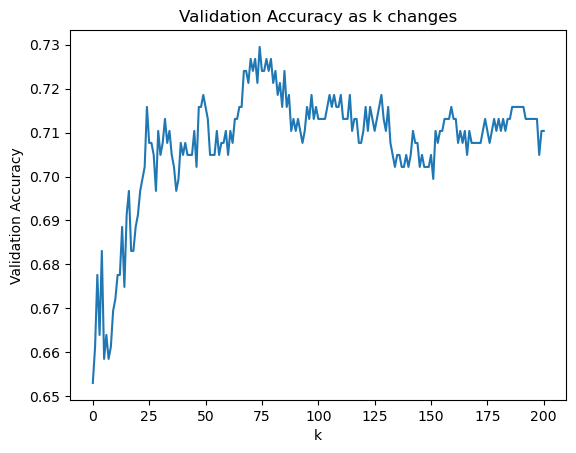

In [74]:
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy as k changes")
plt.plot(k_val, val_point)
plt.show()

### Using sklearn

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
movie_data = [(0.015553991681942629, 0.2935153583617747, 0.9662921348314607), (0.018800726948970534, 0.08560311284046693, 0.9080459770114943), (0.018800726948970534, 0.1828793774319066, 0.9885057471264368), (0.001964699146846581, 0.3412969283276451, 0.7191011235955056), (0.002455878395103065, 0.2764505119453925, 0.9101123595505618), (0.013160353754016514, 0.12840466926070038, 0.9080459770114943), (0.0006548878181626249, 0.3037542662116041, 0.6404494382022472), (0.04700259292374064, 0.24124513618677043, 0.8160919540229885), (0.000982340650333614, 0.2627986348122867, 0.6292134831460674), (0.027261286741401568, 0.22178988326848248, 0.9540229885057471), (0.0005730246101198776, 0.2354948805460751, 0.9213483146067416), (0.0028651944353168014, 0.24232081911262798, 0.9213483146067416), (0.05640321491533068, 0.1245136186770428, 0.9885057471264368), (0.015040478152334521, 0.1517509727626459, 0.7586206896551724), (1.8401375630264817e-05, 0.20819112627986347, 0.7078651685393258), (0.02585119344266306, 0.0933852140077821, 0.9540229885057471), (0.0352518154342531, 0.2140077821011673, 0.7816091954022989), (0.03290165993635559, 0.14396887159533073, 0.8045977011494253), (0.023501037944765553, 0.07782101167315175, 0.8850574712643678), (0.02820134894056057, 0.12840466926070038, 0.8390804597701149), (0.0006139562141412512, 0.23208191126279865, 0.8426966292134831), (0.000982340650333614, 0.310580204778157, 0.9325842696629213), (0.002455878395103065, 0.33447098976109213, 0.7078651685393258), (0.0028651944353168014, 0.3003412969283277, 0.9662921348314607), (0.03055150443845808, 0.11673151750972763, 0.9195402298850575), (0.014100415953175518, 0.19455252918287938, 0.9770114942528736), (0.002374015187060318, 0.31399317406143346, 0.9213483146067416), (0.0006139562141412512, 0.21160409556313994, 0.6966292134831461), (0.09400570288169083, 0.15953307392996108, 0.8505747126436781), (0.024441100143924557, 0.0933852140077821, 0.9310344827586207), (0.03196159773719658, 0.22178988326848248, 0.9885057471264368), (0.0002455717779488885, 0.24573378839590443, 0.5730337078651685), (0.051702903919535664, 0.19844357976653695, 0.7816091954022989), (0.000982340650333614, 0.17747440273037543, 0.9550561797752809), (0.019740789148129538, 0.22178988326848248, 0.8275862068965517), (0.011750260455278008, 0.12840466926070038, 0.896551724137931), (0.014100415953175518, 0.12062256809338522, 0.9080459770114943), (0.00532109067659922, 0.2593856655290102, 0.7078651685393258), (0.037601970932150605, 0.19066147859922178, 0.9425287356321839), (0.0064671755891976814, 0.3993174061433447, 0.8539325842696629), (0.037601970932150605, 0.08171206225680934, 0.9885057471264368), (0.0006548878181626249, 0.2696245733788396, 0.8764044943820225), (0.007531397293753396, 0.2627986348122867, 0.8314606741573034), (0.0020465623548893285, 0.24232081911262798, 0.9213483146067416), (0.005730406716812956, 0.3720136518771331, 0.8651685393258427), (0.001555383106632845, 0.24232081911262798, 0.7752808988764045), (0.013160353754016514, 0.08560311284046693, 0.8620689655172413), (0.013160353754016514, 0.2140077821011673, 0.9770114942528736), (0.016450571451073027, 0.14396887159533073, 0.8735632183908046), (0.0005730246101198776, 0.28668941979522183, 0.7415730337078652), (0.0014735198985900977, 0.25597269624573377, 0.7865168539325843), (0.018800726948970534, 0.16342412451361868, 0.9540229885057471), (0.00032743498599163576, 0.26621160409556316, 0.898876404494382), (0.0016372463146755922, 0.310580204778157, 0.9775280898876404), (0.001227930274461856, 0.2150170648464164, 0.9438202247191011), (0.0007694963094224711, 0.5460750853242321, 0.4044943820224719), (2.9862224756249436e-05, 0.18088737201365188, 0.7865168539325843), (1.6354795429196135e-05, 0.14675767918088736, 0.9101123595505618), (0.03995212643004812, 0.2723735408560311, 0.8850574712643678), (0.02820134894056057, 0.12840466926070038, 0.9080459770114943), (0.014100415953175518, 0.10116731517509728, 0.9885057471264368), (0.0045024585961717465, 0.3310580204778157, 0.9662921348314607), (0.019740789148129538, 0.14007782101167315, 0.735632183908046), (0.02820134894056057, 0.17509727626459143, 0.9655172413793104), (0.03807200203173011, 0.12840466926070038, 0.8505747126436781), (0.020680851347288542, 1.0, 0.5862068965517241), (0.0014735198985900977, 0.3003412969283277, 0.8314606741573034), (9.821800347194341e-05, 0.2150170648464164, 0.6966292134831461), (0.0014735198985900977, 0.22525597269624573, 0.8426966292134831), (0.02820134894056057, 0.1245136186770428, 0.8390804597701149), (0.016450571451073027, 0.19066147859922178, 0.8850574712643678), (0.0004502297980557567, 0.31399317406143346, 0.5168539325842697), (0.02021082024770904, 0.13618677042801555, 0.8160919540229885), (0.016450571451073027, 0.15953307392996108, 0.8505747126436781), (0.00016370856990614123, 0.23890784982935154, 0.8426966292134831), (0.02256097574560655, 0.17120622568093385, 0.8275862068965517), (0.00022101281553606433, 0.20819112627986347, 0.8651685393258427), (0.02585119344266306, 0.25680933852140075, 0.7586206896551724), (0.0007285647054010975, 0.30716723549488056, 0.9550561797752809), (0.016450571451073027, 0.16342412451361868, 0.6551724137931034), (0.02820134894056057, 0.08560311284046693, 0.9080459770114943), (0.016450571451073027, 0.15953307392996108, 0.8850574712643678), (0.0011460670664191085, 0.27986348122866894, 0.6853932584269663), (0.003028920851402296, 0.20136518771331058, 0.9101123595505618), (0.0352518154342531, 0.07782101167315175, 0.9195402298850575), (0.037601970932150605, 0.27626459143968873, 0.7701149425287356), (0.0018009727307610867, 0.26621160409556316, 0.7415730337078652), (0.016450571451073027, 0.2801556420233463, 0.7241379310344828), (0.044652437425843135, 0.08171206225680934, 0.8160919540229885), (0.014100415953175518, 0.14785992217898833, 0.7586206896551724), (0.00022919913634033906, 0.22184300341296928, 0.1348314606741573), (0.044652437425843135, 0.13229571984435798, 0.9770114942528736), (0.0032745104755305377, 0.34812286689419797, 0.8089887640449438), (0.07050414790271574, 0.14396887159533073, 0.9195402298850575), (0.00040929819403438307, 0.20477815699658702, 0.8876404494382022), (0.012279463360232739, 0.2832764505119454, 0.9887640449438202), (0.014100415953175518, 0.16342412451361868, 0.7701149425287356), (0.0016372463146755922, 0.23208191126279865, 0.7078651685393258), (0.001227930274461856, 0.2764505119453925, 0.9325842696629213), (0.0004911614020771303, 0.20136518771331058, 0.9438202247191011), (0.05640321491533068, 0.2607003891050584, 0.9080459770114943), (0.018800726948970534, 0.13618677042801555, 0.8390804597701149), (0.051702903919535664, 0.13618677042801555, 0.9425287356321839), (0.0010478312167678118, 0.378839590443686, 0.8651685393258427), (0.07285430340061325, 0.5369649805447471, 0.8620689655172413), (0.014100415953175518, 0.33852140077821014, 0.7816091954022989), (5.303262343425254e-06, 0.2150170648464164, 0.8651685393258427), (0.0020465623548893285, 0.2901023890784983, 0.898876404494382), (0.023501037944765553, 0.245136186770428, 0.896551724137931), (0.004911774636385483, 0.310580204778157, 0.8651685393258427), (0.020465784164507467, 0.39590443686006827, 0.9213483146067416), (0.016920602550652527, 0.19844357976653695, 0.5862068965517241), (0.012690322654437012, 0.1828793774319066, 0.7816091954022989), (0.018800726948970534, 0.13229571984435798, 0.896551724137931), (0.043712375226684134, 0.0933852140077821, 0.8275862068965517), (0.04230228192794563, 0.14785992217898833, 0.9885057471264368), (0.004911774636385483, 0.27986348122866894, 0.8426966292134831), (0.01222029155485751, 0.08560311284046693, 0.8505747126436781), (0.001227930274461856, 0.3515358361774744, 0.9550561797752809), (0.021150882446868045, 0.19066147859922178, 0.7701149425287356), (0.023501037944765553, 0.17898832684824903, 0.8505747126436781), (0.06580383690692071, 0.07782101167315175, 0.8390804597701149), (0.0007367510262053722, 0.28668941979522183, 0.8426966292134831), (0.03055150443845808, 0.19455252918287938, 0.9770114942528736), (0.016450571451073027, 0.22178988326848248, 0.8390804597701149), (0.031021535538037583, 0.2490272373540856, 0.9770114942528736), (0.02491113124350406, 0.19455252918287938, 0.8735632183908046), (0.003683826515744274, 0.16040955631399317, 0.8202247191011236), (0.02209094464602705, 0.05058365758754864, 0.9310344827586207), (0.04089218862920712, 0.12840466926070038, 0.8735632183908046), (0.07285430340061325, 0.17509727626459143, 0.9310344827586207), (0.008186302958095375, 0.3515358361774744, 0.9213483146067416), (0.008350029374180869, 0.46075085324232085, 0.9550561797752809), (0.014100415953175518, 0.058365758754863814, 0.7471264367816092), (0.02585119344266306, 0.07782101167315175, 0.9540229885057471), (0.018800726948970534, 0.13229571984435798, 0.8275862068965517), (0.018800726948970534, 0.17509727626459143, 0.9655172413793104), (0.027261286741401568, 0.10505836575875487, 0.8735632183908046), (0.0006548878181626249, 0.4812286689419795, 0.7528089887640449), (0.04841268622247915, 0.12840466926070038, 0.9770114942528736), (0.0006548878181626249, 0.21843003412969283, 0.8876404494382022), (0.018800726948970534, 0.26459143968871596, 0.9770114942528736), (0.0014735198985900977, 0.2627986348122867, 0.9101123595505618), (0.01739063365023203, 0.1517509727626459, 0.9310344827586207), (0.018800726948970534, 0.19066147859922178, 0.7701149425287356), (0.0016372463146755922, 0.21843003412969283, 0.9325842696629213), (0.03290165993635559, 0.12840466926070038, 0.9080459770114943), (0.000532093006098504, 0.21843003412969283, 0.9438202247191011), (0.037601970932150605, 0.12062256809338522, 0.9080459770114943), (0.0028651944353168014, 0.35494880546075086, 0.9662921348314607), (0.0013097934825046032, 0.17406143344709898, 0.6741573033707865), (0.018009887923225047, 0.4641638225255973, 0.9550561797752809), (0.051702903919535664, 0.0311284046692607, 0.8620689655172413), (0.013630384853596016, 0.13618677042801555, 0.8045977011494253), (0.014100415953175518, 0.15953307392996108, 0.8275862068965517), (0.01786066474981153, 0.11673151750972763, 0.8275862068965517), (0.023501037944765553, 0.1828793774319066, 0.9655172413793104), (0.018800726948970534, 0.15953307392996108, 0.9425287356321839), (0.03055150443845808, 0.21011673151750973, 0.8620689655172413), (0.013160353754016514, 0.23346303501945526, 0.9655172413793104), (0.014100415953175518, 0.1556420233463035, 0.896551724137931), (0.01480546260254477, 0.17509727626459143, 1.0), (0.013160353754016514, 0.1517509727626459, 0.9885057471264368), (0.07990476989430577, 0.17509727626459143, 1.0), (0.0008186142342481194, 0.2832764505119454, 0.8876404494382022), (0.029141411139719575, 0.07392996108949416, 0.9080459770114943), (0.037601970932150605, 0.14396887159533073, 0.9770114942528736), (0.00028650338197026213, 0.2150170648464164, 0.8764044943820225), (0.021150882446868045, 0.1245136186770428, 0.7701149425287356), (0.01309809544066021, 0.378839590443686, 0.9325842696629213), (0.0032745104755305377, 0.3310580204778157, 1.0), (0.027261286741401568, 0.17898832684824903, 0.9080459770114943), (0.021620913546447545, 0.12062256809338522, 0.8160919540229885), (0.02820134894056057, 0.2607003891050584, 0.8505747126436781), (0.009400104957380499, 0.1517509727626459, 0.7586206896551724), (0.02585119344266306, 0.11673151750972763, 0.8735632183908046), (0.0016372463146755922, 0.25597269624573377, 0.9662921348314607), (0.0028651944353168014, 0.2150170648464164, 0.9213483146067416), (0.004256868972043505, 0.35494880546075086, 0.8426966292134831), (0.011750260455278008, 0.06614785992217899, 0.8390804597701149), (0.01882852000365252, 0.39590443686006827, 0.9550561797752809), (0.000532093006098504, 0.2832764505119454, 0.6966292134831461), (0.023501037944765553, 0.1828793774319066, 0.7816091954022989), (0.004093142555958011, 0.34812286689419797, 0.7865168539325843), (0.007367670877667902, 0.36177474402730375, 0.8202247191011236), (0.05405305941743317, 0.33073929961089493, 0.8390804597701149), (0.0011051354623977348, 0.23890784982935154, 0.8426966292134831), (0.0004502297980557567, 0.23208191126279865, 0.7752808988764045), (0.0016372463146755922, 0.22525597269624573, 0.8764044943820225), (0.0010642038583763612, 0.2764505119453925, 0.9887640449438202), (0.013630384853596016, 0.12062256809338522, 1.0), (0.003683826515744274, 0.32764505119453924, 0.898876404494382), (0.00040929819403438307, 0.24232081911262798, 0.7528089887640449), (0.007367670877667902, 0.17406143344709898, 0.797752808988764), (0.004093142555958011, 0.35494880546075086, 0.9775280898876404), (0.03243162883677609, 0.14396887159533073, 0.9540229885057471), (0.001227930274461856, 0.20477815699658702, 0.7865168539325843), (0.014100415953175518, 0.10894941634241245, 0.7931034482758621), (0.037601970932150605, 0.23735408560311283, 0.8620689655172413), (0.014100415953175518, 0.08949416342412451, 0.7586206896551724), (0.037601970932150605, 0.08560311284046693, 0.8160919540229885), (0.02820134894056057, 0.19844357976653695, 0.8505747126436781), (0.03055150443845808, 0.13229571984435798, 0.9770114942528736), (1.8401375630264817e-05, 0.16723549488054607, 0.9550561797752809), (0.012279463360232739, 0.18088737201365188, 0.9438202247191011), (0.027261286741401568, 0.13618677042801555, 0.9195402298850575), (0.001227930274461856, 0.22525597269624573, 0.9325842696629213), (0.013160353754016514, 0.14396887159533073, 0.9655172413793104), (0.001227930274461856, 0.37542662116040953, 0.8314606741573034), (0.04700259292374064, 0.12840466926070038, 0.9195402298850575), (0.02820134894056057, 0.22178988326848248, 0.8390804597701149), (0.01432604356130142, 0.19795221843003413, 0.9887640449438202), (0.023501037944765553, 0.19455252918287938, 0.8160919540229885), (0.016450571451073027, 0.13618677042801555, 0.9080459770114943), (0.018800726948970534, 0.2140077821011673, 0.8045977011494253), (0.014571633185429662, 0.3651877133105802, 1.0), (0.016450571451073027, 0.15953307392996108, 0.9655172413793104), (0.016450571451073027, 0.1828793774319066, 0.7126436781609196), (0.016450571451073027, 0.12840466926070038, 0.9540229885057471), (0.00987013605696, 0.07392996108949416, 0.8850574712643678), (0.019270758048550038, 0.1245136186770428, 0.9425287356321839), (0.0011460670664191085, 0.2627986348122867, 0.9775280898876404), (0.011870147320019002, 0.20477815699658702, 0.9550561797752809), (0.01222029155485751, 0.1828793774319066, 0.7011494252873564), (0.006549038797240429, 0.27303754266211605, 0.8426966292134831), (0.001227930274461856, 0.23890784982935154, 0.7865168539325843), (0.004911774636385483, 0.3174061433447099, 0.9550561797752809), (0.013160353754016514, 0.08171206225680934, 0.7816091954022989), (0.021150882446868045, 0.35797665369649806, 0.9080459770114943), (0.07050414790271574, 0.13229571984435798, 0.9080459770114943), (0.003683826515744274, 0.12286689419795221, 0.7528089887640449), (0.03055150443845808, 0.12062256809338522, 0.9540229885057471), (0.023501037944765553, 0.1828793774319066, 0.7931034482758621), (8.184536186339396e-05, 0.18430034129692832, 0.9662921348314607), (0.011750260455278008, 0.12840466926070038, 0.9540229885057471), (0.021620913546447545, 0.14396887159533073, 0.7816091954022989), (0.001227930274461856, 0.2525597269624573, 0.8876404494382022), (0.002455878395103065, 0.7303754266211604, 0.6404494382022472), (0.0011460670664191085, 0.36860068259385664, 0.6966292134831461), (0.02585119344266306, 0.12062256809338522, 0.9080459770114943), (6.547272025484451e-05, 0.2627986348122867, 0.7415730337078652), (0.0016372463146755922, 0.21843003412969283, 0.9662921348314607), (0.0045024585961717465, 0.3242320819112628, 0.9775280898876404), (0.04230228192794563, 0.09727626459143969, 0.8620689655172413), (0.044652437425843135, 0.1867704280155642, 0.8045977011494253), (0.0032745104755305377, 0.2764505119453925, 0.9438202247191011), (0.0011051354623977348, 0.32081911262798635, 0.9662921348314607), (0.0031926472674877904, 0.23890784982935154, 0.9213483146067416), (0.004420595388129, 0.4539249146757679, 0.7078651685393258), (0.02820134894056057, 0.17509727626459143, 0.8735632183908046), (0.014100415953175518, 0.11673151750972763, 0.8735632183908046), (0.0625136192098642, 0.0622568093385214, 0.8045977011494253), (0.0014735198985900977, 0.15358361774744028, 0.8876404494382022), (0.004420595388129, 0.3242320819112628, 0.8764044943820225), (0.0020465623548893285, 0.29692832764505117, 0.9775280898876404), (1.8650076056298684e-06, 0.2150170648464164, 0.7191011235955056), (0.0002455717779488885, 0.21843003412969283, 0.8651685393258427), (0.00982356711895032, 0.30716723549488056, 0.9550561797752809), (0.0028651944353168014, 0.24914675767918087, 0.8876404494382022), (0.008186302958095375, 0.43686006825938567, 0.9550561797752809), (0.02585119344266306, 0.14007782101167315, 0.7471264367816092), (0.0007367510262053722, 0.21160409556313994, 0.8426966292134831), (0.000982340650333614, 0.32764505119453924, 0.9775280898876404), (0.026791255641822064, 0.10894941634241245, 0.9425287356321839), (0.014100415953175518, 0.11673151750972763, 0.9425287356321839), (0.009004935038522847, 0.26621160409556316, 0.898876404494382), (0.014100415953175518, 0.24124513618677043, 0.9080459770114943), (0.03290165993635559, 0.1517509727626459, 0.8850574712643678), (0.002455878395103065, 0.2627986348122867, 0.8651685393258427), (0.07050414790271574, 0.15953307392996108, 0.9310344827586207), (0.007695123709838891, 0.46075085324232085, 0.8426966292134831), (0.014100415953175518, 0.10505836575875487, 0.8850574712643678), (7.77522014612566e-05, 0.22866894197952217, 0.8764044943820225), (0.0015881283898499438, 0.3003412969283277, 0.8876404494382022), (0.0352518154342531, 0.33073929961089493, 0.9195402298850575), (0.0010642038583763612, 0.24232081911262798, 0.9325842696629213), (0.0038475529318297685, 0.32764505119453924, 0.8651685393258427), (0.016920602550652527, 0.24124513618677043, 0.7701149425287356), (0.001227930274461856, 0.27303754266211605, 0.797752808988764), (0.0006548878181626249, 0.19112627986348124, 0.9662921348314607), (3.256682142356572e-06, 0.18088737201365188, 0.8314606741573034), (0.0004911614020771303, 0.1945392491467577, 0.8426966292134831), (0.0002455717779488885, 0.2832764505119454, 0.8539325842696629), (0.023501037944765553, 0.1245136186770428, 0.7586206896551724), (0.015980540351493523, 0.07392996108949416, 0.896551724137931), (0.007531397293753396, 0.26621160409556316, 0.8651685393258427), (0.014100415953175518, 0.245136186770428, 0.6436781609195402), (0.037601970932150605, 0.08949416342412451, 0.8505747126436781), (0.10105616937538335, 0.31906614785992216, 0.9655172413793104), (0.0006139562141412512, 0.20136518771331058, 0.898876404494382), (0.002701468019231307, 0.5631399317406144, 0.7303370786516854), (0.00859561899830911, 0.31399317406143346, 0.7865168539325843), (0.037601970932150605, 0.1828793774319066, 0.8850574712643678), (0.02021082024770904, 0.1245136186770428, 0.8735632183908046), (0.001227930274461856, 0.6484641638225256, 0.39325842696629215), (0.0013916566905473504, 0.20477815699658702, 0.8651685393258427), (0.002455878395103065, 0.12627986348122866, 0.7640449438202247), (0.021284416244934937, 0.2150170648464164, 0.9325842696629213), (0.07003411680313623, 0.06614785992217899, 0.8850574712643678), (0.005157364260513725, 0.3890784982935154, 0.8089887640449438), (0.015980540351493523, 0.17898832684824903, 0.8160919540229885), (0.00010640432427621813, 0.23208191126279865, 0.797752808988764), (0.0013097934825046032, 0.2832764505119454, 0.898876404494382), (0.016450571451073027, 0.08949416342412451, 0.9885057471264368), (0.016450571451073027, 0.17120622568093385, 0.9080459770114943), (0.037601970932150605, 0.07392996108949416, 0.9655172413793104), (0.011750260455278008, 0.08560311284046693, 0.7701149425287356), (0.0352518154342531, 0.19066147859922178, 0.896551724137931), (0.016450571451073027, 0.21011673151750973, 0.8275862068965517), (0.00080224159263957, 0.1945392491467577, 0.8876404494382022), (0.0016372463146755922, 0.24232081911262798, 0.8651685393258427), (0.002455878395103065, 0.3003412969283277, 0.8426966292134831), (0.037601970932150605, 0.13229571984435798, 0.9425287356321839), (0.04700259292374064, 0.13229571984435798, 0.9195402298850575), (0.03196159773719658, 0.13229571984435798, 0.9540229885057471), (0.014100415953175518, 0.11284046692607004, 0.8505747126436781), (0.0016372463146755922, 0.27303754266211605, 0.8539325842696629), (0.0002783170611659874, 0.23208191126279865, 0.898876404494382), (0.04700259292374064, 0.2723735408560311, 0.8390804597701149), (0.0071220812535396595, 0.3515358361774744, 0.8539325842696629), (0.018800726948970534, 0.1867704280155642, 0.8160919540229885), (0.014100415953175518, 0.1245136186770428, 0.9540229885057471), (0.0347817843346736, 0.08949416342412451, 0.9885057471264368), (0.003683826515744274, 0.20477815699658702, 0.898876404494382), (5.7286399450569776e-05, 0.2354948805460751, 0.8876404494382022), (0.0634536814090232, 0.10894941634241245, 0.9655172413793104), (0.0010478312167678118, 0.3515358361774744, 0.8202247191011236), (0.0016372463146755922, 0.30716723549488056, 0.8426966292134831), (0.02820134894056057, 0.10894941634241245, 0.9770114942528736), (0.0352518154342531, 0.12062256809338522, 0.7931034482758621), (0.021150882446868045, 0.07003891050583658, 0.7816091954022989), (0.04230228192794563, 0.17898832684824903, 0.7931034482758621), (0.026321224542242564, 0.8249027237354085, 0.8505747126436781), (0.023501037944765553, 0.19844357976653695, 0.8160919540229885), (0.001882835938803834, 0.621160409556314, 0.6741573033707865), (0.018800726948970534, 0.1556420233463035, 0.8620689655172413), (0.018800726948970534, 0.14785992217898833, 0.8045977011494253), (0.03055150443845808, 0.19066147859922178, 0.8505747126436781), (0.0009004774422908667, 0.2901023890784983, 0.7640449438202247), (0.00016370856990614123, 0.27986348122866894, 0.9101123595505618), (0.03948209533046861, 0.10116731517509728, 0.8735632183908046), (0.002455878395103065, 0.3242320819112628, 0.9662921348314607), (0.04230228192794563, 0.22957198443579765, 0.8160919540229885), (0.0022921519790175702, 0.39590443686006827, 0.8764044943820225), (0.0020465623548893285, 0.3583617747440273, 0.7528089887640449), (0.002455878395103065, 0.24914675767918087, 0.7191011235955056), (0.011750260455278008, 0.13229571984435798, 0.6551724137931034), (0.014100415953175518, 0.1556420233463035, 0.7931034482758621), (0.015980540351493523, 0.17509727626459143, 0.9770114942528736), (0.023501037944765553, 0.12840466926070038, 0.7471264367816092), (0.00020464017392751488, 0.25597269624573377, 0.9101123595505618), (0.009400104957380499, 0.14396887159533073, 0.8850574712643678), (0.026791255641822064, 0.2140077821011673, 0.8735632183908046), (0.015040478152334521, 0.1517509727626459, 0.9655172413793104), (0.021150882446868045, 0.09727626459143969, 0.9080459770114943), (0.037601970932150605, 0.17898832684824903, 0.7701149425287356), (0.0004911614020771303, 0.19795221843003413, 0.8314606741573034), (0.0002455717779488885, 0.4232081911262799, 0.33707865168539325), (0.001227930274461856, 0.18771331058020477, 0.9213483146067416), (0.02820134894056057, 0.1517509727626459, 0.7011494252873564), (0.006579918359903488, 0.0933852140077821, 0.9540229885057471), (0.036661908732991605, 0.10505836575875487, 0.9655172413793104), (0.0032745104755305377, 0.2593856655290102, 0.898876404494382), (0.0013097934825046032, 0.24914675767918087, 0.8876404494382022), (0.005157364260513725, 0.30716723549488056, 0.7415730337078652), (0.02820134894056057, 0.14007782101167315, 0.8275862068965517), (0.0008186142342481194, 0.33447098976109213, 0.9101123595505618), (0.016450571451073027, 0.10894941634241245, 0.9540229885057471), (0.016450571451073027, 0.13618677042801555, 0.9080459770114943), (0.00032743498599163576, 0.16040955631399317, 0.7752808988764045), (0.0014735198985900977, 0.2696245733788396, 0.9662921348314607), (0.0032745104755305377, 0.22866894197952217, 0.9213483146067416), (0.02820134894056057, 0.12840466926070038, 0.8620689655172413), (0.00532109067659922, 0.32081911262798635, 0.8876404494382022), (2.4541116233470864e-05, 0.21843003412969283, 0.5730337078651685), (0.0352518154342531, 0.20233463035019456, 0.7931034482758621), (0.037601970932150605, 0.1867704280155642, 0.8505747126436781), (0.021150882446868045, 0.1828793774319066, 0.8735632183908046), (0.0021284255629320757, 0.23208191126279865, 0.9213483146067416), (0.01457044705275502, 0.14785992217898833, 0.9310344827586207), (0.0008186142342481194, 0.20477815699658702, 0.8426966292134831), (0.018800726948970534, 0.10116731517509728, 0.9770114942528736), (0.016450571451073027, 0.08949416342412451, 0.7931034482758621), (0.005648543508770209, 0.17064846416382254, 0.9325842696629213), (0.009400104957380499, 0.23735408560311283, 0.6091954022988506), (0.001129694424810559, 0.27986348122866894, 0.6629213483146067), (0.0010642038583763612, 0.15017064846416384, 0.8426966292134831), (0.019740789148129538, 0.13229571984435798, 0.9540229885057471), (0.000982340650333614, 0.3242320819112628, 0.9213483146067416), (0.0020465623548893285, 0.23890784982935154, 0.8764044943820225), (0.0020465623548893285, 0.21160409556313994, 0.9775280898876404), (0.0004911614020771303, 0.2354948805460751, 0.6067415730337079), (0.00032743498599163576, 0.21843003412969283, 0.8539325842696629), (0.0045024585961717465, 0.2935153583617747, 0.9101123595505618), (0.0013097934825046032, 0.20819112627986347, 0.6741573033707865), (0.019740789148129538, 0.14396887159533073, 0.9540229885057471), (0.000982340650333614, 0.25597269624573377, 0.651685393258427), (0.05992844816217694, 0.054474708171206226, 0.8160919540229885), (0.09165554738379332, 0.3346303501945525, 0.9425287356321839), (0.0011460670664191085, 0.25597269624573377, 0.8876404494382022), (0.0021284255629320757, 0.23890784982935154, 0.8202247191011236), (0.020680851347288542, 0.19844357976653695, 0.8160919540229885), (0.00040929819403438307, 0.33447098976109213, 0.7752808988764045), (0.02256097574560655, 0.19455252918287938, 0.8045977011494253), (0.018800726948970534, 0.1556420233463035, 0.7931034482758621), (0.023501037944765553, 0.2918287937743191, 0.9655172413793104), (0.03290165993635559, 0.2178988326848249, 0.735632183908046), (0.004093142555958011, 0.32764505119453924, 0.9438202247191011), (0.001227930274461856, 0.2901023890784983, 0.8089887640449438), (0.0032745104755305377, 0.33447098976109213, 0.8764044943820225), (0.0004911614020771303, 0.22866894197952217, 0.8202247191011236), (0.02820134894056057, 0.10116731517509728, 0.8160919540229885), (0.014100415953175518, 0.08949416342412451, 0.8620689655172413), (0.0045024585961717465, 0.19795221843003413, 0.9775280898876404), (0.002210288770974823, 0.24914675767918087, 0.8876404494382022), (0.018800726948970534, 0.12062256809338522, 0.9080459770114943), (0.0020465623548893285, 0.2901023890784983, 0.9325842696629213), (0.003929416139872516, 0.30716723549488056, 0.6966292134831461), (0.04606253072458164, 0.24124513618677043, 0.8275862068965517), (0.0022921519790175702, 0.27303754266211605, 0.6179775280898876), (0.015510509251914023, 0.14396887159533073, 0.8850574712643678), (0.000712192063792548, 0.2150170648464164, 0.8876404494382022), (0.02585119344266306, 0.10116731517509728, 0.9425287356321839), (0.015510509251914023, 0.2801556420233463, 0.8620689655172413), (0.023501037944765553, 0.1517509727626459, 0.7701149425287356), (0.011750260455278008, 0.14396887159533073, 0.9540229885057471), (0.027261286741401568, 0.22178988326848248, 0.9655172413793104), (0.021150882446868045, 0.11673151750972763, 0.9540229885057471), (0.016450571451073027, 0.12840466926070038, 0.8390804597701149), (0.0004911614020771303, 0.20136518771331058, 0.8651685393258427), (0.014100415953175518, 0.17120622568093385, 0.9310344827586207), (0.0008186142342481194, 0.3242320819112628, 0.8426966292134831), (0.07520445889851075, 0.20622568093385213, 0.7816091954022989), (0.0002455717779488885, 0.18088737201365188, 0.8426966292134831), (0.014100415953175518, 0.16731517509727625, 0.9425287356321839), (0.0014735198985900977, 0.2901023890784983, 0.6966292134831461), (0.003683826515744274, 0.31399317406143346, 0.8539325842696629), (0.02585119344266306, 0.17898832684824903, 0.896551724137931), (0.006109887260323986, 0.11673151750972763, 0.8390804597701149), (0.0013916566905473504, 0.20819112627986347, 0.9213483146067416), (0.0006548878181626249, 0.14675767918088736, 0.8764044943820225), (4.983684751867977e-05, 0.15017064846416384, 0.0898876404494382), (0.001555383106632845, 0.35494880546075086, 0.8876404494382022), (0.01457044705275502, 0.12840466926070038, 0.8275862068965517), (0.03055150443845808, 0.14396887159533073, 0.8160919540229885), (0.004748048220299989, 0.33447098976109213, 0.8314606741573034), (0.011750260455278008, 0.1245136186770428, 0.8045977011494253), (0.011750260455278008, 0.11284046692607004, 0.7816091954022989), (0.07050414790271574, 0.1828793774319066, 0.896551724137931), (0.001555383106632845, 0.3447098976109215, 0.7191011235955056), (0.014100415953175518, 0.23346303501945526, 0.8160919540229885), (0.0020465623548893285, 0.19112627986348124, 0.9101123595505618), (0.011870147320019002, 0.32764505119453924, 0.9438202247191011), (0.011750260455278008, 0.07782101167315175, 0.9195402298850575), (0.037601970932150605, 0.12062256809338522, 0.896551724137931), (0.015553991681942629, 0.3242320819112628, 0.9662921348314607), (0.0010232722543549876, 0.2150170648464164, 0.7303370786516854), (0.02820134894056057, 0.2178988326848249, 0.7816091954022989), (0.023501037944765553, 0.12840466926070038, 0.7701149425287356), (0.0611035259111257, 0.21011673151750973, 0.9655172413793104), (0.000982340650333614, 0.16040955631399317, 0.8651685393258427), (0.00040929819403438307, 0.20477815699658702, 0.9213483146067416), (0.0010232722543549876, 0.2764505119453925, 0.9213483146067416), (0.0004911614020771303, 0.18088737201365188, 0.8089887640449438), (0.016920602550652527, 0.15953307392996108, 0.8505747126436781), (0.05875337041322819, 0.14785992217898833, 0.9310344827586207), (0.03384172213551459, 0.07392996108949416, 0.8275862068965517), (0.0032745104755305377, 0.24232081911262798, 0.6966292134831461), (0.001227930274461856, 0.22525597269624573, 0.8764044943820225), (0.000982340650333614, 0.24573378839590443, 0.9101123595505618), (0.0045024585961717465, 0.3583617747440273, 0.7528089887640449), (0.02820134894056057, 0.10116731517509728, 0.7701149425287356), (0.00016370856990614123, 0.31399317406143346, 0.9213483146067416), (0.0020465623548893285, 0.27986348122866894, 0.898876404494382), (0.051702903919535664, 0.1556420233463035, 0.8850574712643678), (0.03008147333887858, 0.11673151750972763, 0.8850574712643678), (0.018800726948970534, 0.08171206225680934, 0.9770114942528736), (0.014100415953175518, 0.07782101167315175, 0.9655172413793104), (0.00018008121151469068, 0.21160409556313994, 0.8089887640449438), (0.03290165993635559, 0.17120622568093385, 0.9080459770114943), (0.0008759184798780425, 0.2832764505119454, 0.6179775280898876), (0.0611035259111257, 0.2178988326848249, 0.8735632183908046), (0.003683826515744274, 0.2901023890784983, 0.8314606741573034), (0.0014735198985900977, 0.27986348122866894, 0.9775280898876404), (0.0008186142342481194, 0.3174061433447099, 0.9550561797752809), (0.00859561899830911, 0.36177474402730375, 0.9662921348314607), (0.08225492539220328, 0.42023346303501946, 0.7586206896551724), (0.08695523638799829, 0.21011673151750973, 0.9080459770114943), (0.00016370856990614123, 0.2150170648464164, 0.898876404494382), (0.011750260455278008, 0.16731517509727625, 0.9770114942528736), (0.011750260455278008, 0.16342412451361868, 0.9425287356321839), (0.0004911614020771303, 0.18088737201365188, 0.8202247191011236), (0.014100415953175518, 0.27626459143968873, 0.9770114942528736), (0.02209094464602705, 0.027237354085603113, 0.8850574712643678), (0.04700259292374064, 0.08560311284046693, 0.8735632183908046), (0.016450571451073027, 0.07782101167315175, 0.8275862068965517), (0.0611035259111257, 0.1245136186770428, 0.9655172413793104), (0.016450571451073027, 0.17898832684824903, 0.9080459770114943), (0.023501037944765553, 0.2490272373540856, 0.7586206896551724), (0.0028651944353168014, 1.0, 0.7415730337078652), (0.014100415953175518, 0.054474708171206226, 0.8275862068965517), (0.012690322654437012, 0.12062256809338522, 0.7471264367816092), (0.02021082024770904, 0.08560311284046693, 0.8390804597701149), (0.023501037944765553, 0.2178988326848249, 0.8390804597701149), (0.014100415953175518, 0.14007782101167315, 0.9540229885057471), (0.0004911614020771303, 0.20819112627986347, 0.5955056179775281), (0.02538116234308356, 0.20622568093385213, 0.8505747126436781), (0.018800726948970534, 0.1517509727626459, 0.9310344827586207), (0.00014733592829759177, 0.21843003412969283, 0.6404494382022472), (0.0045024585961717465, 0.2901023890784983, 0.898876404494382), (0.016450571451073027, 0.26848249027237353, 0.9425287356321839), (0.0009414090463122403, 0.3310580204778157, 0.7415730337078652), (8.184536186339396e-05, 0.1945392491467577, 0.8202247191011236), (0.00028650338197026213, 0.20477815699658702, 0.7415730337078652), (0.026321224542242564, 0.17509727626459143, 0.9425287356321839), (0.021150882446868045, 0.08949416342412451, 0.8390804597701149), (0.005075501052470978, 0.3515358361774744, 0.7640449438202247), (0.0004911614020771303, 0.36860068259385664, 0.0), (0.011750260455278008, 0.10505836575875487, 0.8735632183908046), (0.015275493702124271, 0.245136186770428, 0.9425287356321839), (0.0045024585961717465, 0.28668941979522183, 0.9887640449438202), (0.019740789148129538, 0.1245136186770428, 0.9425287356321839), (0.07050414790271574, 0.07782101167315175, 0.9195402298850575), (0.0005730246101198776, 0.22866894197952217, 0.7640449438202247), (0.011750260455278008, 0.13618677042801555, 0.896551724137931), (0.021150882446868045, 0.13618677042801555, 0.7816091954022989), (0.018800726948970534, 0.16342412451361868, 0.9885057471264368), (0.011750260455278008, 0.11673151750972763, 0.8275862068965517), (0.02820134894056057, 0.08171206225680934, 0.8505747126436781), (0.0013097934825046032, 0.24914675767918087, 0.8876404494382022), (0.037601970932150605, 0.16342412451361868, 0.9080459770114943), (0.001555383106632845, 0.32081911262798635, 0.9662921348314607), (0.016450571451073027, 0.22957198443579765, 0.8505747126436781), (0.004911774636385483, 0.2525597269624573, 0.9213483146067416), (0.00032743498599163576, 0.22184300341296928, 0.9438202247191011), (0.0008186142342481194, 0.29692832764505117, 0.9438202247191011), (0.0001555222491018665, 0.21160409556313994, 0.6629213483146067), (0.0026196048111885597, 0.2832764505119454, 0.7415730337078652), (0.023501037944765553, 0.17509727626459143, 0.8275862068965517), (0.013160353754016514, 0.11673151750972763, 0.8275862068965517), (0.0022921519790175702, 0.33447098976109213, 0.8764044943820225), (0.03196159773719658, 0.2840466926070039, 0.8275862068965517), (0.0007776826302267458, 0.2354948805460751, 0.9325842696629213), (0.0028651944353168014, 0.32764505119453924, 0.9325842696629213), (0.009004935038522847, 0.4539249146757679, 0.8651685393258427), (0.002455878395103065, 0.2832764505119454, 0.8651685393258427), (0.0032745104755305377, 0.2935153583617747, 0.9213483146067416), (0.0011460670664191085, 0.3310580204778157, 0.8764044943820225), (0.03055150443845808, 0.24124513618677043, 0.8160919540229885), (0.00014733592829759177, 0.19112627986348124, 0.9550561797752809), (0.0006548878181626249, 0.21843003412969283, 0.9325842696629213), (0.008186302958095375, 0.18088737201365188, 0.9213483146067416), (0.0003601802692087347, 0.32764505119453924, 0.5393258426966292), (0.0008186142342481194, 0.17747440273037543, 0.8089887640449438), (0.0028651944353168014, 0.19795221843003413, 0.9550561797752809), (0.0013097934825046032, 0.24914675767918087, 0.6629213483146067), (0.00020464017392751488, 0.22184300341296928, 0.8651685393258427), (0.0016372463146755922, 0.33447098976109213, 0.898876404494382), (0.02585119344266306, 0.1517509727626459, 0.9195402298850575), (0.03290165993635559, 0.1867704280155642, 0.8390804597701149), (0.001227930274461856, 0.2696245733788396, 0.8876404494382022), (0.037601970932150605, 0.17509727626459143, 0.9310344827586207), (0.0032745104755305377, 0.3174061433447099, 0.9101123595505618), (0.019740789148129538, 0.20233463035019456, 0.8275862068965517), (2.4541116233470864e-05, 0.21843003412969283, 0.5730337078651685), (0.004911774636385483, 0.18771331058020477, 0.9550561797752809), (0.016450571451073027, 0.13618677042801555, 0.7011494252873564), (0.013916727521087684, 0.25597269624573377, 0.9662921348314607), (0.016450571451073027, 0.13229571984435798, 0.7471264367816092), (0.023501037944765553, 0.15953307392996108, 0.8735632183908046), (0.002374015187060318, 0.1945392491467577, 0.8764044943820225), (0.002480437357515889, 0.2150170648464164, 0.9438202247191011), (0.002210288770974823, 0.23208191126279865, 0.9213483146067416), (0.018800726948970534, 0.16342412451361868, 0.7816091954022989), (0.0016372463146755922, 0.310580204778157, 0.898876404494382), (0.016450571451073027, 0.23735408560311283, 0.9885057471264368), (0.03055150443845808, 0.2607003891050584, 0.8160919540229885), (0.002455878395103065, 0.29692832764505117, 0.8314606741573034), (0.020680851347288542, 0.10894941634241245, 0.6436781609195402), (0.016450571451073027, 0.0933852140077821, 0.9195402298850575), (0.05640321491533068, 0.20622568093385213, 0.9310344827586207), (0.0020465623548893285, 0.3447098976109215, 0.8539325842696629), (0.0352518154342531, 0.07003891050583658, 0.8735632183908046), (0.005730406716812956, 0.36177474402730375, 0.8651685393258427), (0.01786066474981153, 0.23735408560311283, 0.7701149425287356), (0.020465784164507467, 0.37542662116040953, 1.0), (0.003683826515744274, 0.32764505119453924, 0.898876404494382), (0.011750260455278008, 0.22178988326848248, 0.735632183908046), (0.002455878395103065, 0.2525597269624573, 0.8539325842696629), (0.006958354837454165, 0.2593856655290102, 0.797752808988764), (0.016450571451073027, 0.0933852140077821, 0.9310344827586207), (0.016920602550652527, 0.09727626459143969, 0.7816091954022989), (0.000982340650333614, 0.28668941979522183, 0.797752808988764), (0.001162439708027658, 0.34812286689419797, 0.8764044943820225), (0.011750260455278008, 0.11284046692607004, 0.7471264367816092), (6.956588065698187e-05, 0.23890784982935154, 0.8539325842696629), (6.137955985270713e-05, 0.16723549488054607, 0.9550561797752809), (0.024441100143924557, 0.19455252918287938, 0.9425287356321839), (0.000982340650333614, 0.2935153583617747, 0.8426966292134831), (0.00022101281553606433, 0.14675767918088736, 0.8651685393258427), (0.018800726948970534, 0.16731517509727625, 0.9425287356321839), (0.0002128264947317896, 0.09897610921501707, 0.898876404494382), (0.0013507250865259768, 0.3378839590443686, 0.7640449438202247), (0.0010642038583763612, 0.22184300341296928, 0.9775280898876404), (0.016450571451073027, 0.14396887159533073, 0.9540229885057471), (0.0014735198985900977, 0.32081911262798635, 0.8651685393258427), (0.0020465623548893285, 0.28668941979522183, 0.8202247191011236), (0.00040929819403438307, 0.25597269624573377, 0.9775280898876404), (0.002210288770974823, 0.378839590443686, 0.5955056179775281), (0.018800726948970534, 0.13229571984435798, 1.0), (0.07050414790271574, 0.08171206225680934, 0.9080459770114943), (0.0009004774422908667, 0.2354948805460751, 0.6404494382022472), (4.091375784202032e-05, 0.2935153583617747, 0.9438202247191011), (0.010810198256119005, 0.20233463035019456, 0.8505747126436781), (0.0009004774422908667, 0.3003412969283277, 0.5617977528089888), (0.008186302958095375, 0.6928327645051194, 0.9662921348314607), (0.015144675641728892, 0.2901023890784983, 1.0), (0.007367670877667902, 0.310580204778157, 0.9213483146067416), (0.00532109067659922, 0.3856655290102389, 0.9550561797752809), (0.007531397293753396, 0.3924914675767918, 0.8314606741573034), (0.00016370856990614123, 0.2354948805460751, 0.8314606741573034), (0.0004911614020771303, 0.25597269624573377, 0.7191011235955056), (0.0032745104755305377, 0.40955631399317405, 0.9550561797752809), (1.471753126834119e-05, 0.16382252559726962, 0.898876404494382), (0.018800726948970534, 0.13229571984435798, 0.8160919540229885), (0.004093142555958011, 0.37542662116040953, 0.8876404494382022), (0.023501037944765553, 0.2178988326848249, 0.7931034482758621), (0.013160353754016514, 0.10116731517509728, 0.9310344827586207), (0.06580383690692071, 0.45136186770428016, 0.8275862068965517), (0.001760041126739713, 0.27303754266211605, 0.8089887640449438), (0.016450571451073027, 0.12062256809338522, 0.8735632183908046), (0.002455878395103065, 0.3412969283276451, 0.8651685393258427), (0.037131939832571105, 0.08949416342412451, 0.9425287356321839), (0.0013097934825046032, 0.4334470989761092, 0.6404494382022472), (0.020465784164507467, 0.4334470989761092, 0.9550561797752809), (0.009400104957380499, 0.1517509727626459, 0.9310344827586207), (0.0013097934825046032, 0.2593856655290102, 0.9325842696629213), (0.0021284255629320757, 0.3003412969283277, 0.7415730337078652), (0.0018009727307610867, 0.3242320819112628, 0.8314606741573034), (0.003028920851402296, 0.2764505119453925, 0.9662921348314607), (0.023501037944765553, 0.19455252918287938, 0.9195402298850575), (0.002455878395103065, 0.2354948805460751, 0.9662921348314607), (0.014571633185429662, 0.2593856655290102, 0.9775280898876404), (0.02256097574560655, 0.13229571984435798, 0.8275862068965517), (0.03995212643004812, 0.1556420233463035, 0.8390804597701149), (0.09823598277790634, 0.245136186770428, 0.9540229885057471), (0.024441100143924557, 0.14785992217898833, 0.8850574712643678), (0.016450571451073027, 0.08949416342412451, 0.896551724137931), (0.02585119344266306, 0.0622568093385214, 0.9425287356321839), (0.002210288770974823, 0.20819112627986347, 0.8651685393258427), (0.003929416139872516, 0.2832764505119454, 0.8314606741573034), (0.00013914960749331705, 0.3447098976109215, 0.8314606741573034), (0.007367670877667902, 0.3890784982935154, 0.8876404494382022), (0.002455878395103065, 0.18430034129692832, 0.8539325842696629), (0.0011051354623977348, 0.4812286689419795, 0.8651685393258427), (0.0020465623548893285, 0.3515358361774744, 0.9438202247191011), (0.00016370856990614123, 0.2354948805460751, 0.8539325842696629), (0.02585119344266306, 0.0933852140077821, 0.7816091954022989), (0.02585119344266306, 0.0622568093385214, 0.7586206896551724), (0.0020465623548893285, 0.3720136518771331, 0.9438202247191011), (0.024441100143924557, 0.17509727626459143, 0.8735632183908046), (0.0061397227570266924, 0.3378839590443686, 0.7752808988764045), (1.6354795429196135e-05, 0.20136518771331058, 0.7752808988764045), (0.002455878395103065, 0.19795221843003413, 0.9550561797752809), (0.04700259292374064, 0.3035019455252918, 0.9310344827586207), (0.004093142555958011, 0.34812286689419797, 0.7752808988764045), (0.05029281062079716, 0.26848249027237353, 0.8620689655172413), (0.026791255641822064, 0.14396887159533073, 0.8275862068965517), (0.01786066474981153, 0.16342412451361868, 0.8275862068965517), (0.000532093006098504, 0.22866894197952217, 0.5955056179775281), (0.0005730246101198776, 0.2354948805460751, 0.9325842696629213), (0.011750260455278008, 0.14396887159533073, 0.9540229885057471), (0.01786066474981153, 0.1556420233463035, 0.8390804597701149), (0.007367670877667902, 0.15358361774744028, 0.8089887640449438), (0.0008186142342481194, 0.3174061433447099, 0.797752808988764), (0.008350029374180869, 0.39590443686006827, 0.7191011235955056), (0.0021284255629320757, 0.4709897610921502, 0.5617977528089888), (0.008431892582223616, 0.3242320819112628, 0.8426966292134831), (0.03055150443845808, 0.2607003891050584, 0.9195402298850575), (0.002374015187060318, 0.37542662116040953, 0.6741573033707865), (0.012279463360232739, 0.40955631399317405, 0.8764044943820225), (4.091375784202032e-05, 0.24232081911262798, 0.8089887640449438), (0.03290165993635559, 0.16731517509727625, 0.9425287356321839), (0.09870601387748584, 0.377431906614786, 0.9770114942528736), (0.03290165993635559, 0.11673151750972763, 0.8390804597701149), (0.0008186142342481194, 0.2832764505119454, 0.9213483146067416), (0.013160353754016514, 0.09727626459143969, 0.8275862068965517), (0.011750260455278008, 0.16342412451361868, 0.9770114942528736), (0.0611035259111257, 0.0933852140077821, 0.896551724137931), (0.0020465623548893285, 0.2696245733788396, 0.9325842696629213), (0.011797263565235958, 0.23735408560311283, 0.9080459770114943), (0.001227930274461856, 0.24573378839590443, 0.9438202247191011), (0.08460508089010078, 0.31906614785992216, 0.8735632183908046), (0.01786066474981153, 0.13229571984435798, 0.8275862068965517), (0.0010642038583763612, 0.25597269624573377, 0.8089887640449438), (0.0005730246101198776, 0.18430034129692832, 0.7752808988764045), (0.03055150443845808, 0.09727626459143969, 0.8045977011494253), (0.008186302958095375, 0.27986348122866894, 0.8651685393258427), (0.02820134894056057, 0.14007782101167315, 0.8160919540229885), (0.012279463360232739, 0.3447098976109215, 0.898876404494382), (0.07755461439640826, 0.20233463035019456, 1.0), (0.001227930274461856, 0.18771331058020477, 0.6853932584269663), (0.07050414790271574, 0.12062256809338522, 0.9540229885057471), (0.012690322654437012, 0.054474708171206226, 0.8045977011494253), (0.004093142555958011, 0.19795221843003413, 0.9775280898876404), (0.015510509251914023, 0.11284046692607004, 0.8160919540229885), (0.007367670877667902, 0.3515358361774744, 0.797752808988764), (0.0006712604597711744, 0.46757679180887374, 0.42696629213483145), (0.00018826753231896543, 0.18771331058020477, 0.2247191011235955), (0.00016370856990614123, 0.5631399317406144, 0.30337078651685395), (0.012279463360232739, 0.310580204778157, 0.8764044943820225), (0.0032745104755305377, 0.13651877133105803, 0.8764044943820225), (0.0032745104755305377, 0.27303754266211605, 0.7303370786516854), (0.016450571451073027, 0.20622568093385213, 0.7241379310344828), (0.07050414790271574, 0.2607003891050584, 0.9080459770114943), (0.00028650338197026213, 0.25597269624573377, 0.9325842696629213), (0.0006548878181626249, 0.2593856655290102, 0.8426966292134831), (0.006549038797240429, 0.3037542662116041, 0.7303370786516854), (0.004911774636385483, 0.3924914675767918, 0.8202247191011236), (0.0013097934825046032, 0.2593856655290102, 0.7528089887640449), (0.0010232722543549876, 0.27303754266211605, 0.8426966292134831), (0.010232883159164057, 0.31399317406143346, 0.9438202247191011), (0.012279463360232739, 0.29692832764505117, 0.9887640449438202), (0.00013030838102470036, 0.33447098976109213, 0.8876404494382022), (0.021150882446868045, 0.16731517509727625, 0.9080459770114943), (0.07050414790271574, 0.05058365758754864, 0.8735632183908046), (0.06768396130523872, 0.1867704280155642, 1.0), (0.037601970932150605, 0.19066147859922178, 0.8505747126436781), (0.02820134894056057, 0.06614785992217899, 0.8505747126436781), (0.018800726948970534, 0.12062256809338522, 0.896551724137931), (0.023501037944765553, 0.26848249027237353, 0.9885057471264368), (0.0028651944353168014, 0.3856655290102389, 0.8426966292134831), (0.037601970932150605, 0.11284046692607004, 0.7931034482758621), (0.0004911614020771303, 0.28668941979522183, 0.8876404494382022), (0.0352518154342531, 0.25680933852140075, 0.7931034482758621), (0.023501037944765553, 0.23735408560311283, 0.9310344827586207), (0.023501037944765553, 0.13229571984435798, 0.8850574712643678), (0.001227930274461856, 0.24232081911262798, 0.8426966292134831), (0.010232883159164057, 0.3242320819112628, 0.9438202247191011), (0.011985276005067758, 0.29571984435797666, 0.9655172413793104), (0.00040929819403438307, 0.25597269624573377, 0.7865168539325843), (0.000982340650333614, 0.26621160409556316, 0.9662921348314607), (0.026791255641822064, 0.245136186770428, 0.8275862068965517), (0.0028651944353168014, 0.37542662116040953, 0.7865168539325843), (0.0005648382893156028, 0.26621160409556316, 0.651685393258427), (0.03384172213551459, 0.32684824902723736, 0.8275862068965517), (0.02820134894056057, 0.2178988326848249, 0.9885057471264368), (0.037601970932150605, 0.245136186770428, 0.8620689655172413), (0.008186302958095375, 0.18430034129692832, 0.9662921348314607), (0.0004911614020771303, 0.20819112627986347, 0.8651685393258427), (0.0004911614020771303, 0.24573378839590443, 0.7865168539325843), (0.004256868972043505, 0.4812286689419795, 0.7640449438202247), (0.09400570288169083, 0.28793774319066145, 0.9770114942528736), (0.05875337041322819, 0.2723735408560311, 0.9770114942528736), (0.0163726237623701, 0.36177474402730375, 0.9550561797752809), (8.184536186339396e-05, 0.2150170648464164, 0.797752808988764), (0.02585119344266306, 0.16342412451361868, 0.7701149425287356), (0.0016372463146755922, 0.2696245733788396, 0.9550561797752809), (0.0028651944353168014, 0.32081911262798635, 0.8426966292134831), (0.004911774636385483, 0.5187713310580204, 0.8089887640449438), (0.0002128264947317896, 0.17406143344709898, 0.14606741573033707), (0.014100415953175518, 0.12840466926070038, 0.8850574712643678), (0.02820134894056057, 0.13618677042801555, 0.8735632183908046), (0.0009004774422908667, 0.23890784982935154, 0.6966292134831461), (0.037601970932150605, 0.14007782101167315, 0.9080459770114943), (0.03055150443845808, 0.10894941634241245, 0.9540229885057471), (0.0025377416031458124, 0.2764505119453925, 0.8202247191011236), (0.004338732180086252, 0.2935153583617747, 0.7640449438202247), (0.0003949721326269023, 0.3003412969283277, 0.9213483146067416), (0.004911774636385483, 0.18088737201365188, 0.8314606741573034), (0.0028651944353168014, 0.19795221843003413, 0.9550561797752809), (0.012279463360232739, 0.22866894197952217, 0.898876404494382), (1.8775899807060387e-05, 0.18430034129692832, 0.5393258426966292), (0.0006139562141412512, 0.2150170648464164, 0.9213483146067416), (0.004338732180086252, 0.5187713310580204, 0.898876404494382), (0.006647274646891726, 0.24232081911262798, 0.9887640449438202), (0.0634536814090232, 0.1245136186770428, 0.9425287356321839), (0.0009004774422908667, 0.2696245733788396, 0.6179775280898876), (0.016450571451073027, 0.17898832684824903, 0.7241379310344828), (0.019740789148129538, 0.1867704280155642, 0.9770114942528736), (0.008186302958095375, 0.6109215017064846, 0.8426966292134831), (0.018800726948970534, 0.16342412451361868, 0.9885057471264368), (0.012690322654437012, 0.12840466926070038, 0.6666666666666666), (0.02820134894056057, 0.22178988326848248, 0.9195402298850575), (0.027261286741401568, 0.2140077821011673, 0.632183908045977), (0.09400570288169083, 0.2140077821011673, 0.9425287356321839), (6.820351314873447e-06, 0.17406143344709898, 0.5280898876404494), (0.0018009727307610867, 0.2696245733788396, 0.8764044943820225), (0.0016372463146755922, 0.27986348122866894, 0.898876404494382), (0.0006548878181626249, 0.28668941979522183, 0.898876404494382), (0.0004911614020771303, 0.22866894197952217, 0.8202247191011236), (0.015040478152334521, 0.2490272373540856, 0.8045977011494253), (0.0013916566905473504, 0.20136518771331058, 0.898876404494382), (0.02820134894056057, 0.11673151750972763, 0.8390804597701149), (0.014100415953175518, 0.12062256809338522, 0.8160919540229885), (0.002455878395103065, 0.3378839590443686, 0.8764044943820225), (0.03290165993635559, 0.28793774319066145, 0.8505747126436781), (0.018800726948970534, 0.10894941634241245, 0.8620689655172413), (0.013507411480873947, 0.21843003412969283, 0.9550561797752809), (0.04700259292374064, 0.19066147859922178, 0.9770114942528736), (0.0026196048111885597, 0.20136518771331058, 0.8764044943820225), (0.001227930274461856, 0.23890784982935154, 0.9438202247191011), (0.01739063365023203, 0.11673151750972763, 0.8620689655172413), (0.031021535538037583, 0.17509727626459143, 0.8045977011494253), (0.013160353754016514, 0.054474708171206226, 0.8275862068965517), (0.03290165993635559, 0.24124513618677043, 0.735632183908046), (0.00032743498599163576, 0.25597269624573377, 0.8314606741573034), (0.016450571451073027, 0.1867704280155642, 0.9425287356321839), (0.0020465623548893285, 0.36177474402730375, 0.8876404494382022), (0.018330695849391034, 0.22178988326848248, 0.6206896551724138), (0.018800726948970534, 0.08560311284046693, 0.8045977011494253), (0.0020465623548893285, 0.19795221843003413, 0.8426966292134831), (0.051702903919535664, 0.22178988326848248, 0.8620689655172413), (0.008460042758221495, 0.10894941634241245, 0.9195402298850575), (0.0005730246101198776, 0.21160409556313994, 0.9213483146067416), (0.018800726948970534, 0.023346303501945526, 0.8390804597701149), (0.0013916566905473504, 0.28668941979522183, 0.797752808988764), (0.0061397227570266924, 0.17064846416382254, 0.898876404494382), (0.05640321491533068, 0.03501945525291829, 0.8390804597701149), (0.004093142555958011, 0.5972696245733788, 0.7640449438202247), (0.011750260455278008, 0.1517509727626459, 0.9310344827586207), (0.0011951849912447568, 0.21843003412969283, 0.7415730337078652), (0.007367670877667902, 0.3856655290102389, 0.7865168539325843), (0.037601970932150605, 0.08560311284046693, 0.7816091954022989), (0.002455878395103065, 0.27986348122866894, 0.9550561797752809), (0.0045024585961717465, 0.2901023890784983, 0.797752808988764), (5.55196276945912e-07, 0.13651877133105803, 0.8651685393258427), (0.0004911614020771303, 0.2935153583617747, 0.7640449438202247), (0.0163726237623701, 0.33447098976109213, 0.8651685393258427), (4.091375784202032e-05, 0.25597269624573377, 0.5168539325842697), (0.0016372463146755922, 0.310580204778157, 0.9101123595505618), (0.02256097574560655, 0.2490272373540856, 0.8275862068965517), (0.023501037944765553, 0.19844357976653695, 0.8620689655172413), (0.0025377416031458124, 0.3447098976109215, 0.9550561797752809), (0.08460508089010078, 0.17509727626459143, 0.896551724137931), (0.016945666218669334, 0.5597269624573379, 0.8764044943820225), (0.007367670877667902, 0.310580204778157, 0.7640449438202247), (0.011750260455278008, 0.11284046692607004, 0.8620689655172413), (0.0008186142342481194, 0.20819112627986347, 0.9213483146067416), (0.02820134894056057, 0.07392996108949416, 0.8275862068965517), (0.0032745104755305377, 0.4812286689419795, 0.8651685393258427), (0.011460831279805265, 0.3037542662116041, 0.9101123595505618), (0.0014735198985900977, 0.22525597269624573, 0.7078651685393258), (0.01432604356130142, 0.5426621160409556, 0.8651685393258427), (0.014100415953175518, 0.19455252918287938, 0.9655172413793104), (0.00037655291081728417, 0.2150170648464164, 0.9325842696629213), (0.00859561899830911, 0.36177474402730375, 0.9662921348314607), (0.00032743498599163576, 0.19112627986348124, 0.5617977528089888), (0.00030850698434403196, 0.23890784982935154, 0.25842696629213485), (0.016450571451073027, 0.10116731517509728, 0.8275862068965517), (0.0032745104755305377, 0.23890784982935154, 0.8089887640449438), (0.016450571451073027, 0.2140077821011673, 0.9080459770114943), (4.9100078646295044e-05, 0.6075085324232082, 0.48314606741573035), (0.016450571451073027, 0.1245136186770428, 0.8735632183908046), (0.04700259292374064, 0.19844357976653695, 0.9770114942528736), (0.0022921519790175702, 0.2764505119453925, 0.6404494382022472), (0.001227930274461856, 0.26621160409556316, 0.7528089887640449), (0.002455878395103065, 0.2627986348122867, 0.898876404494382), (8.184536186339396e-05, 0.27986348122866894, 0.8314606741573034), (0.00032743498599163576, 0.2593856655290102, 0.8426966292134831), (0.0020465623548893285, 0.7986348122866894, 0.7415730337078652), (0.024441100143924557, 0.14007782101167315, 0.8505747126436781), (0.0620435881102847, 0.1867704280155642, 0.8735632183908046), (0.003683826515744274, 0.22525597269624573, 0.8764044943820225), (0.001227930274461856, 0.3037542662116041, 0.8539325842696629), (0.04230228192794563, 0.14007782101167315, 0.8275862068965517), (0.0006548878181626249, 0.22866894197952217, 0.9662921348314607), (0.018800726948970534, 0.12062256809338522, 0.8850574712643678), (0.0020465623548893285, 0.21843003412969283, 0.8651685393258427), (0.023501037944765553, 0.11673151750972763, 0.8505747126436781), (0.00040929819403438307, 0.24232081911262798, 0.9887640449438202), (0.0032745104755305377, 0.33447098976109213, 0.7865168539325843), (0.003110784059445043, 0.24914675767918087, 0.9325842696629213), (0.016450571451073027, 0.0933852140077821, 1.0), (0.0008595458382694931, 0.2832764505119454, 0.6179775280898876), (0.0004911614020771303, 0.21843003412969283, 0.8426966292134831), (0.0014735198985900977, 0.30716723549488056, 0.7528089887640449), (0.003683826515744274, 0.2593856655290102, 0.8426966292134831), (0.023501037944765553, 0.22957198443579765, 0.7586206896551724), (0.016450571451073027, 0.16731517509727625, 0.8275862068965517), (0.06768396130523872, 0.1867704280155642, 1.0), (0.021150882446868045, 0.12840466926070038, 0.9425287356321839), (0.0010642038583763612, 0.25597269624573377, 0.9213483146067416), (0.02256097574560655, 0.1828793774319066, 0.9770114942528736), (0.0352518154342531, 0.08560311284046693, 0.8620689655172413), (0.016450571451073027, 0.2918287937743191, 0.5747126436781609), (0.051702903919535664, 0.19844357976653695, 0.9885057471264368), (0.000982340650333614, 0.21843003412969283, 0.8089887640449438), (0.018800726948970534, 0.14007782101167315, 0.7011494252873564), (0.0077769869178816375, 0.23208191126279865, 0.9887640449438202), (0.015040478152334521, 0.19844357976653695, 0.9310344827586207), (0.00532109067659922, 0.2832764505119454, 0.8651685393258427), (0.00532109067659922, 0.42662116040955633, 0.898876404494382), (0.018800726948970534, 0.10505836575875487, 0.9540229885057471), (0.037601970932150605, 0.10894941634241245, 0.8390804597701149), (0.0008186142342481194, 0.39590443686006827, 0.4606741573033708), (0.016450571451073027, 0.20233463035019456, 0.896551724137931), (0.023501037944765553, 0.10894941634241245, 0.9885057471264368), (0.0018009727307610867, 0.5051194539249146, 0.7415730337078652), (0.0028651944353168014, 0.2935153583617747, 0.9325842696629213), (0.0352518154342531, 0.10116731517509728, 0.8160919540229885), (0.02820134894056057, 0.14396887159533073, 0.9770114942528736), (0.04700259292374064, 0.20622568093385213, 0.7586206896551724), (0.001227930274461856, 0.3037542662116041, 0.898876404494382), (0.02820134894056057, 0.1517509727626459, 0.8850574712643678), (0.001227930274461856, 0.26621160409556316, 0.9101123595505618), (0.03290165993635559, 0.1867704280155642, 0.8850574712643678), (0.001227930274461856, 0.378839590443686, 0.898876404494382), (0.037601970932150605, 0.04669260700389105, 0.9310344827586207), (0.002455878395103065, 0.14334470989761092, 0.9213483146067416), (0.014100415953175518, 0.14007782101167315, 0.8620689655172413), (0.014100415953175518, 0.10116731517509728, 0.9540229885057471), (0.00036836659001300944, 0.22184300341296928, 0.8202247191011236), (0.0048135387867341865, 0.32764505119453924, 0.9775280898876404), (0.037601970932150605, 0.08171206225680934, 0.9195402298850575), (0.0022921519790175702, 0.32081911262798635, 0.6853932584269663), (0.001964699146846581, 0.27986348122866894, 0.8651685393258427), (0.000532093006098504, 0.23890784982935154, 0.6404494382022472), (0.000532093006098504, 0.1296928327645051, 0.9213483146067416), (0.015040478152334521, 0.2140077821011673, 0.7701149425287356), (0.00320901990909634, 0.3037542662116041, 0.9662921348314607), (0.0004911614020771303, 0.24573378839590443, 0.9101123595505618), (0.023454034834807604, 0.13229571984435798, 0.9425287356321839), (0.009004935038522847, 0.30716723549488056, 0.9438202247191011), (0.0020465623548893285, 0.32764505119453924, 0.6853932584269663), (0.04700259292374064, 0.06614785992217899, 0.896551724137931), (0.014100415953175518, 0.22178988326848248, 0.6896551724137931), (0.011460831279805265, 0.3993174061433447, 0.8539325842696629), (0.014100415953175518, 0.17509727626459143, 0.9080459770114943), (4.091375784202032e-05, 0.18088737201365188, 0.8651685393258427), (0.009400104957380499, 0.14396887159533073, 0.896551724137931), (0.0007367510262053722, 0.19112627986348124, 0.797752808988764), (0.021150882446868045, 0.19066147859922178, 0.7241379310344828), (0.0061397227570266924, 0.29692832764505117, 0.8426966292134831), (0.016074546571409425, 0.09727626459143969, 0.8045977011494253), (0.02820134894056057, 0.19455252918287938, 0.9770114942528736), (0.11750725786066592, 0.26459143968871596, 0.9425287356321839), (0.01222029155485751, 0.10116731517509728, 0.8390804597701149), (0.00018826753231896543, 0.25597269624573377, 0.7303370786516854), (0.018800726948970534, 0.17120622568093385, 0.9425287356321839), (0.07990476989430577, 0.22178988326848248, 0.9310344827586207), (0.0015144515026114713, 0.3993174061433447, 0.6629213483146067), (0.03243162883677609, 0.11673151750972763, 0.7931034482758621), (0.02585119344266306, 0.2529182879377432, 0.7701149425287356), (0.0029470576433595487, 0.2354948805460751, 0.7865168539325843), (0.0008186142342481194, 0.24232081911262798, 0.8764044943820225), (0.0009004774422908667, 0.2525597269624573, 0.9887640449438202), (0.004911774636385483, 0.3174061433447099, 0.9550561797752809), (0.01222029155485751, 0.12062256809338522, 0.7471264367816092), (0.003683826515744274, 0.22525597269624573, 0.9438202247191011), (0.001342538765721702, 0.310580204778157, 0.6966292134831461), (0.00040929819403438307, 0.18430034129692832, 0.9325842696629213), (0.0611035259111257, 0.377431906614786, 0.9080459770114943), (0.04700259292374064, 0.14396887159533073, 0.7011494252873564), (0.07050414790271574, 0.16731517509727625, 0.9885057471264368), (0.04935274842163815, 0.058365758754863814, 0.7931034482758621), (0.011750260455278008, 0.11284046692607004, 0.9770114942528736), (7.857083354168407e-05, 0.36860068259385664, 0.550561797752809), (0.003929416139872516, 0.2935153583617747, 0.797752808988764), (0.0032745104755305377, 0.3447098976109215, 0.9662921348314607), (0.09870601387748584, 0.14007782101167315, 0.8850574712643678), (0.014100415953175518, 0.07003891050583658, 0.9080459770114943), (0.011750260455278008, 0.08171206225680934, 0.7931034482758621), (0.015980540351493523, 0.13229571984435798, 0.8045977011494253), (0.001227930274461856, 0.18771331058020477, 0.8876404494382022), (0.001227930274461856, 0.2832764505119454, 0.9101123595505618), (0.0010642038583763612, 0.28668941979522183, 0.7415730337078652), (0.002783331227274054, 0.21843003412969283, 0.9101123595505618), (0.001227930274461856, 0.3037542662116041, 0.6741573033707865), (0.021150882446868045, 0.10894941634241245, 0.7586206896551724), (0.011750260455278008, 0.1556420233463035, 0.9425287356321839), (0.01222029155485751, 0.06614785992217899, 0.8735632183908046), (0.0021284255629320757, 0.23208191126279865, 0.9213483146067416), (0.0010232722543549876, 0.10921501706484642, 0.6853932584269663), (0.008186302958095375, 0.2901023890784983, 0.9887640449438202), (0.0005730246101198776, 0.24914675767918087, 0.8764044943820225), (0.04700259292374064, 0.11673151750972763, 0.9310344827586207), (0.014100415953175518, 0.24124513618677043, 0.6666666666666666), (0.00028650338197026213, 0.17406143344709898, 0.5955056179775281), (0.03055150443845808, 0.14785992217898833, 0.9080459770114943), (0.023971069044345057, 0.1867704280155642, 0.8160919540229885), (0.024441100143924557, 0.13229571984435798, 0.8850574712643678), (0.00032743498599163576, 0.2901023890784983, 0.9325842696629213), (0.013066347534100613, 0.1517509727626459, 0.6896551724137931), (0.051702903919535664, 0.17898832684824903, 0.9885057471264368), (0.004748048220299989, 0.24232081911262798, 1.0), (0.0014735198985900977, 0.2354948805460751, 0.9438202247191011), (0.00036836659001300944, 0.22866894197952217, 0.8314606741573034), (0.02256097574560655, 0.33852140077821014, 0.7126436781609196), (0.0016372463146755922, 0.2764505119453925, 0.9887640449438202), (0.0014735198985900977, 0.20819112627986347, 0.8539325842696629), (0.013160353754016514, 0.19844357976653695, 0.8045977011494253), (0.04230228192794563, 0.17898832684824903, 0.8160919540229885), (0.018800726948970534, 0.23346303501945526, 0.7471264367816092), (0.001227930274461856, 0.2150170648464164, 0.9438202247191011), (0.04230228192794563, 0.14785992217898833, 0.9655172413793104), (0.018800726948970534, 0.0622568093385214, 0.8275862068965517), (0.059693432612387194, 0.11673151750972763, 0.9770114942528736), (0.018800726948970534, 0.17509727626459143, 0.8620689655172413), (0.00036836659001300944, 0.2150170648464164, 0.9213483146067416), (0.021150882446868045, 0.1245136186770428, 0.9195402298850575), (0.011750260455278008, 0.12062256809338522, 0.8160919540229885), (0.0002455717779488885, 0.2150170648464164, 0.8764044943820225), (0.02585119344266306, 0.19455252918287938, 0.8505747126436781), (0.0016372463146755922, 0.20819112627986347, 0.7528089887640449), (8.184536186339396e-05, 0.16723549488054607, 0.6741573033707865), (0.010642199199377792, 0.19795221843003413, 0.9325842696629213), (0.02820134894056057, 0.17898832684824903, 0.7931034482758621), (0.0010232722543549876, 0.1945392491467577, 0.9101123595505618), (0.01786066474981153, 0.2178988326848249, 0.8045977011494253), (0.0007367510262053722, 0.2935153583617747, 0.898876404494382), (0.037601970932150605, 0.13229571984435798, 0.9425287356321839), (0.0006139562141412512, 0.21843003412969283, 0.797752808988764), (0.00036836659001300944, 0.24573378839590443, 0.7752808988764045), (9.003168266766868e-05, 0.24914675767918087, 0.39325842696629215), (0.002660536415209933, 0.3310580204778157, 0.6292134831460674), (0.05875337041322819, 0.2607003891050584, 0.9540229885057471), (0.002455878395103065, 0.2832764505119454, 0.8202247191011236), (0.023501037944765553, 0.07392996108949416, 0.8160919540229885), (0.0021284255629320757, 0.28668941979522183, 0.797752808988764), (0.09400570288169083, 0.1556420233463035, 0.9310344827586207), (0.0020465623548893285, 0.3583617747440273, 0.6292134831460674), (0.018800726948970534, 0.42412451361867703, 0.632183908045977), (0.004256868972043505, 0.2764505119453925, 0.8089887640449438), (0.00016370856990614123, 0.2696245733788396, 0.8764044943820225), (0.0014735198985900977, 0.26621160409556316, 0.6067415730337079), (0.014100415953175518, 0.12062256809338522, 0.8390804597701149), (0.011750260455278008, 0.12062256809338522, 0.8390804597701149), (0.012690322654437012, 0.15953307392996108, 0.9195402298850575), (0.0352518154342531, 0.08949416342412451, 0.8735632183908046), (0.004093142555958011, 0.23890784982935154, 0.7415730337078652), (0.011378968071762518, 0.28668941979522183, 0.8426966292134831), (0.05875337041322819, 0.2140077821011673, 0.8160919540229885), (0.01739063365023203, 0.19455252918287938, 0.7816091954022989), (0.004829911428342736, 0.22525597269624573, 0.8426966292134831), (0.03055150443845808, 0.0933852140077821, 0.9770114942528736), (0.00016370856990614123, 0.24232081911262798, 0.898876404494382), (0.037601970932150605, 0.42412451361867703, 0.7816091954022989), (0.0022921519790175702, 0.14675767918088736, 0.7415730337078652), (0.006958354837454165, 0.2696245733788396, 0.8314606741573034), (0.009400104957380499, 0.13229571984435798, 0.9195402298850575), (0.014100415953175518, 0.14007782101167315, 0.8735632183908046), (0.07050414790271574, 0.1828793774319066, 0.8735632183908046), (0.018800726948970534, 0.09727626459143969, 0.9425287356321839), (0.03995212643004812, 0.14785992217898833, 0.9540229885057471), (0.02820134894056057, 0.2801556420233463, 0.9310344827586207), (0.0005239066852942292, 0.21160409556313994, 0.9438202247191011), (0.018009887923225047, 0.4641638225255973, 0.9550561797752809), (0.0008186142342481194, 0.2525597269624573, 0.9325842696629213), (0.018800726948970534, 0.10116731517509728, 0.9080459770114943), (0.0020465623548893285, 0.25597269624573377, 0.9887640449438202), (0.004256868972043505, 0.6075085324232082, 0.797752808988764), (3.272743703774559e-05, 0.18088737201365188, 0.8876404494382022), (0.0006958194221839986, 0.27303754266211605, 0.9775280898876404), (0.002455878395103065, 0.3037542662116041, 0.6853932584269663), (0.001227930274461856, 0.23890784982935154, 0.9101123595505618), (0.002455878395103065, 0.2525597269624573, 0.7528089887640449), (0.01222029155485751, 0.22957198443579765, 0.9885057471264368), (0.021150882446868045, 0.2607003891050584, 0.7701149425287356), (0.01222029155485751, 0.13229571984435798, 0.8505747126436781), (0.0009004774422908667, 0.2764505119453925, 0.7415730337078652), (0.04606253072458164, 0.2178988326848249, 0.7586206896551724), (0.08460508089010078, 0.16342412451361868, 1.0), (0.002455878395103065, 0.3242320819112628, 0.9887640449438202), (0.0016290599938713175, 0.22525597269624573, 0.9325842696629213), (8.184536186339396e-05, 0.19795221843003413, 0.9550561797752809), (0.03196159773719658, 0.14396887159533073, 0.7586206896551724), (0.014100415953175518, 0.23735408560311283, 0.9425287356321839), (0.02820134894056057, 0.16731517509727625, 0.7931034482758621), (0.0028651944353168014, 0.310580204778157, 0.7191011235955056), (0.0004502297980557567, 0.20477815699658702, 0.8651685393258427), (0.018800726948970534, 0.17898832684824903, 0.8275862068965517), (0.004093142555958011, 0.310580204778157, 0.8764044943820225), (0.01786066474981153, 0.2529182879377432, 0.8045977011494253), (0.04700259292374064, 0.13229571984435798, 0.9655172413793104), (0.0163726237623701, 0.36177474402730375, 0.9550561797752809), (0.002455878395103065, 0.2627986348122867, 0.8651685393258427), (0.03290165993635559, 0.1867704280155642, 0.7931034482758621), (0.023501037944765553, 0.2490272373540856, 0.8850574712643678), (0.03854203313130961, 0.17509727626459143, 0.8735632183908046), (0.0010642038583763612, 0.3003412969283277, 0.8876404494382022), (0.0009004774422908667, 0.3003412969283277, 0.8651685393258427), (0.04935274842163815, 0.25680933852140075, 0.8620689655172413), (0.01457044705275502, 0.13618677042801555, 0.7011494252873564), (0.10575648037117837, 0.14785992217898833, 0.9540229885057471), (0.04935274842163815, 0.14396887159533073, 0.9655172413793104), (0.016450571451073027, 0.14007782101167315, 0.9310344827586207), (0.09400570288169083, 0.14785992217898833, 0.9425287356321839), (0.03290165993635559, 0.22957198443579765, 0.8160919540229885), (0.007203944461582407, 0.3651877133105802, 0.8764044943820225), (0.015553991681942629, 0.32081911262798635, 0.9662921348314607), (0.02820134894056057, 0.0933852140077821, 0.7586206896551724), (0.05875337041322819, 0.2140077821011673, 0.9770114942528736), (0.04700259292374064, 0.1828793774319066, 0.9310344827586207), (0.00410951519756656, 0.2354948805460751, 0.9438202247191011), (0.03337169103593509, 0.1245136186770428, 0.7816091954022989), (0.003438236891616032, 0.29692832764505117, 0.8089887640449438), (0.01222029155485751, 0.09727626459143969, 0.8620689655172413), (0.0002701307403617127, 0.23890784982935154, 0.9775280898876404), (0.013160353754016514, 0.22957198443579765, 0.5977011494252874), (0.0352518154342531, 0.08949416342412451, 0.8850574712643678), (0.021150882446868045, 0.17509727626459143, 0.8620689655172413), (0.02820134894056057, 0.07392996108949416, 0.9425287356321839), (0.004256868972043505, 0.32081911262798635, 0.8202247191011236), (0.00532109067659922, 0.27303754266211605, 0.8876404494382022), (0.03055150443845808, 0.29571984435797666, 0.8275862068965517), (0.0352518154342531, 0.16342412451361868, 0.8045977011494253), (8.184536186339396e-05, 0.20477815699658702, 0.8876404494382022), (0.004911774636385483, 0.26621160409556316, 0.9101123595505618), (0.018800726948970534, 0.10505836575875487, 0.7471264367816092), (0.023501037944765553, 0.20622568093385213, 0.7816091954022989), (0.0352518154342531, 0.07392996108949416, 0.9425287356321839), (0.011750260455278008, 0.09727626459143969, 0.7471264367816092), (0.01222029155485751, 0.14007782101167315, 0.9195402298850575), (0.04230228192794563, 0.0933852140077821, 0.9885057471264368), (0.000532093006098504, 0.26621160409556316, 0.8651685393258427), (0.03995212643004812, 0.1245136186770428, 0.8160919540229885), (8.184536186339396e-05, 0.2832764505119454, 0.9213483146067416), (0.021150882446868045, 0.25680933852140075, 0.8735632183908046), (0.044652437425843135, 0.06614785992217899, 0.9540229885057471), (0.00028650338197026213, 0.23890784982935154, 0.9438202247191011), (0.015040478152334521, 0.17509727626459143, 0.9425287356321839), (0.0352518154342531, 0.2607003891050584, 0.7816091954022989), (0.04700259292374064, 0.13618677042801555, 0.9310344827586207), (0.008460042758221495, 0.20622568093385213, 0.9425287356321839), (0.0352518154342531, 0.16342412451361868, 0.9080459770114943), (0.02585119344266306, 0.22568093385214008, 0.8045977011494253), (0.20465800226068884, 0.3310580204778157, 0.8764044943820225), (0.009004935038522847, 0.3310580204778157, 0.8539325842696629), (0.06580383690692071, 0.31906614785992216, 0.9770114942528736), (0.0020465623548893285, 0.29692832764505117, 0.797752808988764), (0.0020465623548893285, 0.20136518771331058, 0.898876404494382), (0.000982340650333614, 0.2150170648464164, 0.8764044943820225), (0.011750260455278008, 0.10505836575875487, 0.8275862068965517), (0.0028651944353168014, 0.32764505119453924, 0.9887640449438202), (0.07050414790271574, 0.23735408560311283, 0.8505747126436781), (0.0020465623548893285, 0.2627986348122867, 0.8426966292134831), (0.03290165993635559, 0.1245136186770428, 0.7126436781609196), (0.013160353754016514, 0.14007782101167315, 0.896551724137931), (0.001432588294568724, 0.28668941979522183, 0.8651685393258427), (0.03196159773719658, 0.26459143968871596, 0.8505747126436781), (0.0013097934825046032, 0.31399317406143346, 0.6179775280898876), (0.018800726948970534, 0.1517509727626459, 0.9540229885057471), (0.0008186142342481194, 0.3993174061433447, 0.8089887640449438), (0.06815399240481823, 0.09727626459143969, 0.9540229885057471), (0.00040929819403438307, 0.3310580204778157, 0.7865168539325843), (0.006958354837454165, 0.18430034129692832, 0.9550561797752809), (0.0028651944353168014, 0.27986348122866894, 0.9101123595505618), (0.0006548878181626249, 0.3037542662116041, 0.8089887640449438), (0.037601970932150605, 0.12062256809338522, 0.8275862068965517), (0.07755461439640826, 0.09727626459143969, 0.9310344827586207), (0.015980540351493523, 0.2178988326848249, 0.8160919540229885), (0.023501037944765553, 0.10505836575875487, 0.8275862068965517), (0.014100415953175518, 0.038910505836575876, 0.8160919540229885), (0.014100415953175518, 0.1556420233463035, 0.9425287356321839), (0.0352518154342531, 0.1867704280155642, 0.7816091954022989), (0.012690322654437012, 0.14785992217898833, 0.896551724137931), (0.016450571451073027, 0.08949416342412451, 0.9540229885057471), (0.016920602550652527, 0.13229571984435798, 0.9425287356321839), (0.004993637844428231, 0.3822525597269625, 0.9775280898876404), (0.01222029155485751, 0.11284046692607004, 0.8275862068965517), (0.003929416139872516, 0.5221843003412969, 0.8202247191011236), (0.0011460670664191085, 0.18088737201365188, 0.9325842696629213), (0.018800726948970534, 0.15953307392996108, 0.9195402298850575), (0.016450571451073027, 0.1828793774319066, 0.9080459770114943), (0.006385312381154935, 0.3583617747440273, 0.9550561797752809), (0.02256097574560655, 0.17509727626459143, 0.8045977011494253), (0.011460831279805265, 0.36177474402730375, 0.8539325842696629), (0.023501037944765553, 0.1517509727626459, 1.0), (0.015510509251914023, 0.1245136186770428, 0.8390804597701149), (0.04042215752962762, 0.10116731517509728, 0.8850574712643678), (0.0037656897237870212, 0.2764505119453925, 0.8426966292134831), (0.014100415953175518, 0.1245136186770428, 0.8045977011494253), (0.023501037944765553, 0.2178988326848249, 0.7816091954022989), (0.0018009727307610867, 0.6791808873720137, 0.7078651685393258), (0.02820134894056057, 0.17509727626459143, 0.9195402298850575), (0.08272495649178278, 0.22957198443579765, 0.9885057471264368), (0.0032745104755305377, 0.27986348122866894, 0.8764044943820225), (8.184536186339396e-05, 0.22866894197952217, 0.9662921348314607), (0.018800726948970534, 0.19066147859922178, 0.7241379310344828), (0.01786066474981153, 0.20233463035019456, 0.9425287356321839), (0.0014735198985900977, 0.22866894197952217, 0.8651685393258427), (0.0011460670664191085, 0.23208191126279865, 0.6404494382022472), (0.001227930274461856, 0.40273037542662116, 0.7865168539325843), (0.0005730246101198776, 0.25597269624573377, 0.9213483146067416), (3.6820597439882956e-05, 0.16040955631399317, 0.8764044943820225), (0.012690322654437012, 0.12840466926070038, 0.8620689655172413), (0.014100415953175518, 0.1556420233463035, 0.8735632183908046), (0.018800726948970534, 0.13229571984435798, 0.9080459770114943), (0.014100415953175518, 0.1517509727626459, 0.8735632183908046), (0.02820134894056057, 0.12840466926070038, 0.8735632183908046), (0.002455878395103065, 0.21843003412969283, 0.8426966292134831), (0.011750260455278008, 0.12840466926070038, 0.896551724137931), (3.4204085584420667e-06, 0.18088737201365188, 0.8202247191011236), (0.04700259292374064, 0.245136186770428, 0.8620689655172413), (0.018800726948970534, 0.2140077821011673, 0.9195402298850575), (0.0013916566905473504, 0.1945392491467577, 0.9438202247191011), (0.026321224542242564, 0.10505836575875487, 0.8735632183908046), (0.029141411139719575, 0.1867704280155642, 0.8160919540229885), (0.037601970932150605, 0.09727626459143969, 0.8620689655172413), (0.011750260455278008, 0.07003891050583658, 0.8850574712643678), (0.018800726948970534, 0.12062256809338522, 0.9195402298850575), (0.019740789148129538, 0.05058365758754864, 0.9195402298850575), (0.05875337041322819, 0.12840466926070038, 0.9770114942528736), (0.0077769869178816375, 0.23208191126279865, 0.9887640449438202), (0.037601970932150605, 0.07782101167315175, 0.9080459770114943), (0.0020465623548893285, 0.4197952218430034, 0.48314606741573035), (0.006913330073030654, 0.2593856655290102, 0.8876404494382022), (0.02585119344266306, 0.14396887159533073, 0.8390804597701149), (0.0352518154342531, 0.09727626459143969, 0.8275862068965517), (0.004911774636385483, 0.2150170648464164, 0.9775280898876404), (0.016450571451073027, 0.15953307392996108, 0.9425287356321839), (0.02820134894056057, 0.13618677042801555, 0.9080459770114943), (0.001227930274461856, 0.2150170648464164, 0.898876404494382), (0.0013097934825046032, 0.20477815699658702, 0.8089887640449438), (0.009004935038522847, 0.31399317406143346, 0.898876404494382), (0.01739063365023203, 0.16731517509727625, 0.8275862068965517), (0.008930073857800997, 0.06614785992217899, 0.8505747126436781), (0.010642199199377792, 0.29692832764505117, 0.9550561797752809), (0.0014735198985900977, 0.3037542662116041, 0.898876404494382), (0.023501037944765553, 0.10894941634241245, 0.8390804597701149), (0.008186302958095375, 0.13993174061433447, 0.8202247191011236), (0.008186302958095375, 0.36177474402730375, 0.8876404494382022), (0.013507411480873947, 0.22184300341296928, 0.9775280898876404), (0.0008186142342481194, 0.22866894197952217, 0.7865168539325843), (0.0020465623548893285, 0.3720136518771331, 0.7078651685393258), (0.021150882446868045, 0.19844357976653695, 0.7471264367816092), (0.0032745104755305377, 0.24573378839590443, 0.9438202247191011), (0.0001227769658847676, 0.20819112627986347, 0.8314606741573034), (0.003110784059445043, 0.3515358361774744, 0.7191011235955056), (0.037601970932150605, 0.14785992217898833, 0.8620689655172413), (0.018800726948970534, 0.12840466926070038, 0.7586206896551724), (0.07755461439640826, 0.1245136186770428, 0.8620689655172413), (0.009414251078736583, 0.35494880546075086, 0.7528089887640449), (0.014100415953175518, 0.07392996108949416, 0.8275862068965517), (0.02867138004014007, 0.2490272373540856, 0.9885057471264368), (0.06580383690692071, 0.22957198443579765, 0.7931034482758621), (0.004993637844428231, 0.29692832764505117, 0.898876404494382), (0.0004911614020771303, 0.2901023890784983, 0.8202247191011236), (0.03995212643004812, 0.058365758754863814, 0.8850574712643678), (0.002455878395103065, 0.24573378839590443, 0.9213483146067416), (0.016450571451073027, 0.17120622568093385, 0.8045977011494253), (0.0016372463146755922, 0.2696245733788396, 0.9325842696629213), (0.03055150443845808, 0.13618677042801555, 0.9885057471264368), (0.012690322654437012, 0.19066147859922178, 0.7701149425287356), (0.0004911614020771303, 0.22866894197952217, 0.9213483146067416), (0.0008186142342481194, 0.2627986348122867, 0.6292134831460674), (0.004093142555958011, 0.25597269624573377, 0.9775280898876404), (0.0018009727307610867, 0.2901023890784983, 0.9775280898876404), (0.0006139562141412512, 0.20136518771331058, 0.898876404494382), (0.00032743498599163576, 0.23208191126279865, 0.8651685393258427), (0.0007776826302267458, 0.14675767918088736, 0.8539325842696629), (0.00016370856990614123, 0.22525597269624573, 0.7528089887640449), (0.02820134894056057, 0.3424124513618677, 0.896551724137931), (0.0028651944353168014, 0.3447098976109215, 0.7865168539325843), (0.0620435881102847, 0.0933852140077821, 0.9770114942528736), (0.011460831279805265, 0.19795221843003413, 0.8426966292134831), (0.018800726948970534, 0.23735408560311283, 0.9195402298850575), (0.00040929819403438307, 0.24914675767918087, 0.8202247191011236), (5.7286399450569776e-05, 0.4539249146757679, 0.7528089887640449), (0.0005730246101198776, 0.2627986348122867, 0.8314606741573034), (0.07050414790271574, 0.19844357976653695, 0.9195402298850575), (0.0026196048111885597, 0.21843003412969283, 0.6853932584269663), (0.012925338204226762, 0.245136186770428, 0.6206896551724138), (0.02585119344266306, 0.23346303501945526, 0.8850574712643678), (0.014217923728070393, 0.14396887159533073, 0.7586206896551724), (0.021150882446868045, 0.08171206225680934, 0.7816091954022989), (0.007613260501796143, 0.45733788395904434, 0.8314606741573034), (0.023501037944765553, 0.24124513618677043, 0.9195402298850575), (0.021150882446868045, 0.08949416342412451, 0.7701149425287356), (0.0022921519790175702, 0.3174061433447099, 0.9887640449438202), (0.021150882446868045, 0.1517509727626459, 0.9655172413793104), (0.059223401512807694, 0.26459143968871596, 0.8735632183908046), (0.014100415953175518, 0.1517509727626459, 0.9310344827586207), (0.07990476989430577, 0.2490272373540856, 0.9540229885057471), (0.0002701307403617127, 0.18430034129692832, 0.8876404494382022), (0.001964699146846581, 0.17406143344709898, 0.8539325842696629), (0.0020465623548893285, 0.4129692832764505, 0.898876404494382), (0.029611442239299075, 0.10116731517509728, 0.8390804597701149), (1.8401375630264817e-05, 0.2354948805460751, 0.8202247191011236), (0.023501037944765553, 0.1517509727626459, 0.7586206896551724), (0.0634536814090232, 0.23346303501945526, 0.8045977011494253), (0.021150882446868045, 0.15953307392996108, 0.8160919540229885), (0.013160353754016514, 0.058365758754863814, 0.9425287356321839), (0.05640321491533068, 0.1517509727626459, 0.8505747126436781), (7.857083354168407e-05, 0.2832764505119454, 0.797752808988764), (0.01739063365023203, 0.17509727626459143, 0.9425287356321839), (0.004993637844428231, 0.4129692832764505, 0.9550561797752809), (0.004748048220299989, 0.2525597269624573, 0.9325842696629213), (0.002701468019231307, 0.2696245733788396, 0.9101123595505618), (0.03055150443845808, 0.10116731517509728, 0.9195402298850575), (0.010642199199377792, 0.6075085324232082, 0.9213483146067416), (0.02585119344266306, 0.1828793774319066, 0.8620689655172413), (0.0008186142342481194, 0.2832764505119454, 0.8876404494382022), (0.02820134894056057, 0.1556420233463035, 0.8390804597701149), (0.021150882446868045, 0.16342412451361868, 0.7471264367816092), (0.00040929819403438307, 0.24232081911262798, 0.9887640449438202), (0.044652437425843135, 0.19844357976653695, 0.8160919540229885), (0.0016372463146755922, 0.29692832764505117, 0.8539325842696629), (0.014100415953175518, 0.14007782101167315, 0.8390804597701149), (0.014100415953175518, 0.12840466926070038, 0.8735632183908046), (0.016450571451073027, 0.08171206225680934, 0.9655172413793104), (0.011750260455278008, 0.08560311284046693, 0.9425287356321839), (0.004093142555958011, 0.1945392491467577, 0.7865168539325843), (0.011750260455278008, 0.14007782101167315, 0.9080459770114943), (0.0014735198985900977, 0.3856655290102389, 0.7752808988764045), (0.021150882446868045, 0.10505836575875487, 0.8735632183908046), (0.014100415953175518, 0.22178988326848248, 0.8850574712643678), (0.018800726948970534, 0.12062256809338522, 0.7241379310344828), (0.07050414790271574, 0.19844357976653695, 0.9310344827586207), (0.0008186142342481194, 0.3003412969283277, 0.8651685393258427), (0.004093142555958011, 0.2354948805460751, 0.9775280898876404), (0.004911774636385483, 0.22525597269624573, 0.797752808988764), (0.00016370856990614123, 0.2150170648464164, 0.9325842696629213), (0.011750260455278008, 0.15953307392996108, 0.8390804597701149), (0.004093142555958011, 0.18088737201365188, 0.8089887640449438), (0.02820134894056057, 0.2178988326848249, 0.7701149425287356), (0.09004951100084264, 0.29692832764505117, 0.6853932584269663), (0.02256097574560655, 0.08949416342412451, 0.9080459770114943), (0.00032743498599163576, 0.2525597269624573, 0.8651685393258427), (0.02585119344266306, 0.21011673151750973, 0.8045977011494253), (0.015144675641728892, 0.19112627986348124, 0.9550561797752809), (0.023501037944765553, 0.038910505836575876, 0.8850574712643678), (0.00040929819403438307, 0.1945392491467577, 0.8651685393258427), (0.06815399240481823, 0.17120622568093385, 0.9080459770114943), (0.018800726948970534, 0.19844357976653695, 0.8275862068965517), (0.0016372463146755922, 0.26621160409556316, 0.9438202247191011), (0.021150882446868045, 0.16731517509727625, 0.7471264367816092), (0.05123287281995616, 0.054474708171206226, 0.8505747126436781), (0.016450571451073027, 0.20622568093385213, 0.7816091954022989), (0.029141411139719575, 0.2840466926070039, 0.7471264367816092), (0.00016370856990614123, 0.2764505119453925, 0.8089887640449438), (0.0020465623548893285, 0.30716723549488056, 0.8764044943820225), (0.05499312161659217, 0.19066147859922178, 0.9310344827586207), (0.02820134894056057, 0.0933852140077821, 0.896551724137931), (0.015040478152334521, 0.2529182879377432, 0.6896551724137931), (0.004093142555958011, 0.2764505119453925, 0.9213483146067416), (0.01222029155485751, 0.1245136186770428, 0.8620689655172413), (0.0009004774422908667, 0.2764505119453925, 0.8651685393258427), (0.010340167156539503, 0.1556420233463035, 0.9310344827586207), (0.0013916566905473504, 0.2901023890784983, 0.8876404494382022), (0.001227930274461856, 0.31399317406143346, 0.8764044943820225), (0.014100415953175518, 0.13229571984435798, 0.9195402298850575), (0.016450571451073027, 0.14396887159533073, 0.8620689655172413), (0.012279463360232739, 0.4402730375426621, 0.9101123595505618), (0.021150882446868045, 0.2840466926070039, 0.9540229885057471), (0.000982340650333614, 0.2935153583617747, 0.9662921348314607), (2.04479558313335e-05, 0.20819112627986347, 0.8426966292134831), (0.0163726237623701, 0.22866894197952217, 0.9662921348314607), (0.009400104957380499, 0.0933852140077821, 0.8620689655172413), (0.07520445889851075, 0.11673151750972763, 0.8850574712643678), (0.02820134894056057, 0.2801556420233463, 0.8850574712643678), (0.002455878395103065, 0.34812286689419797, 0.7415730337078652), (0.07285430340061325, 0.22568093385214008, 0.9885057471264368), (0.013160353754016514, 0.10894941634241245, 0.735632183908046), (0.008186302958095375, 0.46757679180887374, 0.8426966292134831), (0.0611035259111257, 0.10894941634241245, 0.9655172413793104), (0.0020465623548893285, 0.3310580204778157, 0.9325842696629213), (0.0020465623548893285, 0.36860068259385664, 0.8089887640449438), (0.00032743498599163576, 0.21160409556313994, 0.8651685393258427), (0.18331161180179617, 0.35019455252918286, 0.8045977011494253), (0.023501037944765553, 0.11673151750972763, 0.9655172413793104), (0.0032745104755305377, 0.3447098976109215, 0.7303370786516854), (0.04700259292374064, 0.17509727626459143, 0.9540229885057471), (0.021150882446868045, 0.058365758754863814, 0.8275862068965517), (0.0007367510262053722, 0.17747440273037543, 0.8089887640449438), (0.023501037944765553, 0.08171206225680934, 0.9770114942528736), (0.00982356711895032, 0.2935153583617747, 1.0), (0.01739063365023203, 0.05058365758754864, 0.9080459770114943), (0.0026196048111885597, 0.31399317406143346, 0.8202247191011236), (0.00040929819403438307, 0.18088737201365188, 0.9101123595505618), (0.018800726948970534, 0.08949416342412451, 0.9540229885057471), (0.02820134894056057, 0.10894941634241245, 0.8390804597701149), (0.020680851347288542, 0.17120622568093385, 0.9770114942528736), (0.0011051354623977348, 0.25597269624573377, 0.8876404494382022), (0.010642199199377792, 0.5358361774744027, 0.8764044943820225), (0.05405305941743317, 0.15953307392996108, 0.9655172413793104), (0.0016208736730670427, 0.32081911262798635, 0.8314606741573034), (0.013160353754016514, 0.1245136186770428, 0.9770114942528736), (0.001227930274461856, 0.22866894197952217, 1.0), (0.006221585965069439, 0.20819112627986347, 0.9662921348314607), (0.029611442239299075, 0.5603112840466926, 0.7471264367816092), (0.07050414790271574, 0.3035019455252918, 0.9195402298850575), (0.000982340650333614, 0.2832764505119454, 0.898876404494382), (0.018800726948970534, 0.13229571984435798, 0.8045977011494253), (2.04479558313335e-05, 0.2593856655290102, 0.7865168539325843), (0.02820134894056057, 0.1867704280155642, 0.8390804597701149), (0.018800726948970534, 0.14007782101167315, 0.8275862068965517), (0.00016370856990614123, 0.17064846416382254, 0.6067415730337079), (0.001555383106632845, 0.3003412969283277, 0.8314606741573034), (0.02538116234308356, 0.10505836575875487, 0.7701149425287356), (0.0009004774422908667, 0.2696245733788396, 0.5842696629213483), (0.04136221972878662, 0.19455252918287938, 0.8735632183908046), (0.023501037944765553, 0.26848249027237353, 0.8045977011494253), (0.004883941145650949, 0.24573378839590443, 0.8651685393258427), (0.006549038797240429, 0.12627986348122866, 0.8089887640449438), (0.04324234412710463, 0.17509727626459143, 0.7701149425287356), (0.014100415953175518, 0.08171206225680934, 0.9425287356321839), (0.002210288770974823, 0.42662116040955633, 0.7752808988764045), (0.003110784059445043, 0.2935153583617747, 0.9662921348314607), (0.02585119344266306, 0.08949416342412451, 0.9655172413793104), (0.0036019633077015267, 0.37542662116040953, 0.7752808988764045), (0.004093142555958011, 0.25597269624573377, 0.9438202247191011), (0.023501037944765553, 0.12840466926070038, 0.8735632183908046), (0.02021082024770904, 0.2140077821011673, 0.9655172413793104), (0.0025377416031458124, 0.4232081911262799, 0.651685393258427), (0.03290165993635559, 0.10505836575875487, 0.8275862068965517), (0.04230228192794563, 0.1517509727626459, 0.9080459770114943), (0.016920602550652527, 0.22957198443579765, 0.8045977011494253), (0.018800726948970534, 0.11673151750972763, 0.8505747126436781), (0.014100415953175518, 0.14396887159533073, 0.9310344827586207), (0.011051515239591529, 0.20819112627986347, 0.9662921348314607), (0.011750260455278008, 0.12062256809338522, 0.9770114942528736), (0.037601970932150605, 0.23346303501945526, 0.8505747126436781), (0.002455878395103065, 0.3037542662116041, 0.898876404494382), (0.03290165993635559, 0.2529182879377432, 0.9885057471264368), (0.02820134894056057, 0.11284046692607004, 0.9310344827586207), (0.001882835938803834, 0.20819112627986347, 0.7528089887640449), (0.00020464017392751488, 0.22866894197952217, 0.7191011235955056), (0.014100415953175518, 0.13618677042801555, 0.8735632183908046), (0.014100415953175518, 0.1556420233463035, 0.9080459770114943), (0.0007531236678139216, 0.46075085324232085, 0.9662921348314607), (0.009400104957380499, 0.14396887159533073, 0.8505747126436781), (0.015040478152334521, 0.07392996108949416, 0.8735632183908046), (0.011750260455278008, 0.12840466926070038, 0.7701149425287356), (0.006549038797240429, 0.15699658703071673, 0.8426966292134831), (4.8939463032115175e-06, 0.16040955631399317, 0.797752808988764), (0.01222029155485751, 0.13618677042801555, 0.7701149425287356), (0.004093142555958011, 0.2901023890784983, 0.8764044943820225), (0.0006548878181626249, 0.2832764505119454, 0.8202247191011236), (0.012690322654437012, 0.16342412451361868, 0.9080459770114943), (0.0032745104755305377, 0.28668941979522183, 0.9662921348314607), (0.0016372463146755922, 0.24573378839590443, 0.9662921348314607), (0.0020465623548893285, 0.2696245733788396, 0.7528089887640449), (0.05405305941743317, 0.26459143968871596, 0.8045977011494253), (0.02585119344266306, 0.12840466926070038, 0.9310344827586207), (0.006958354837454165, 0.23890784982935154, 0.898876404494382), (0.0028651944353168014, 0.2935153583617747, 0.9887640449438202), (0.026791255641822064, 0.13618677042801555, 0.7701149425287356), (0.007990011658641993, 0.07782101167315175, 0.7126436781609196), (0.016450571451073027, 0.0933852140077821, 0.896551724137931), (0.015040478152334521, 0.19844357976653695, 0.8390804597701149), (9.821800347194341e-05, 0.22525597269624573, 0.8651685393258427), (0.0006139562141412512, 0.19112627986348124, 0.8764044943820225), (0.023501037944765553, 0.14396887159533073, 0.8850574712643678), (3.256682142356572e-06, 0.18088737201365188, 0.8089887640449438), (0.003683826515744274, 0.2627986348122867, 0.9550561797752809), (0.0020465623548893285, 0.27303754266211605, 0.797752808988764), (0.012279463360232739, 0.3651877133105802, 0.8876404494382022), (0.0045024585961717465, 0.24232081911262798, 0.8202247191011236), (0.0014735198985900977, 0.20819112627986347, 0.9662921348314607), (0.11750725786066592, 0.4474708171206226, 1.0), (0.003028920851402296, 0.3856655290102389, 0.9325842696629213), (0.001227930274461856, 0.20819112627986347, 0.6292134831460674), (0.013916727521087684, 0.3174061433447099, 0.9775280898876404), (0.002210288770974823, 0.24914675767918087, 0.8876404494382022), (0.015040478152334521, 0.0933852140077821, 0.8850574712643678), (0.002455878395103065, 0.27303754266211605, 0.9325842696629213), (0.06815399240481823, 0.0933852140077821, 0.9770114942528736), (0.002210288770974823, 0.2525597269624573, 0.797752808988764), (0.020465784164507467, 0.4334470989761092, 0.9775280898876404), (0.0032745104755305377, 0.3822525597269625, 0.7752808988764045), (0.011750260455278008, 0.09727626459143969, 0.7816091954022989), (0.00532109067659922, 0.3412969283276451, 0.9775280898876404), (0.00032743498599163576, 0.22525597269624573, 0.9101123595505618), (0.00016370856990614123, 0.18430034129692832, 0.8764044943820225), (0.024441100143924557, 0.22178988326848248, 0.9310344827586207), (0.013160353754016514, 0.1556420233463035, 1.0), (0.0008186142342481194, 0.31399317406143346, 0.9325842696629213), (0.016450571451073027, 0.0311284046692607, 0.8735632183908046), (0.00016370856990614123, 0.17747440273037543, 0.797752808988764), (0.01222029155485751, 0.11284046692607004, 0.8505747126436781), (0.0020465623548893285, 0.2525597269624573, 0.9213483146067416), (0.00028650338197026213, 0.20477815699658702, 0.7640449438202247), (0.04230228192794563, 0.14007782101167315, 0.7816091954022989), (0.001227930274461856, 0.2832764505119454, 0.8202247191011236), (0.00032743498599163576, 0.19112627986348124, 0.6853932584269663), (0.02820134894056057, 0.13618677042801555, 0.8620689655172413), (0.018800726948970534, 0.25680933852140075, 0.9770114942528736), (0.029611442239299075, 0.07392996108949416, 0.6781609195402298), (0.06674389910607972, 0.2529182879377432, 0.8390804597701149), (0.0001227769658847676, 0.21843003412969283, 0.8876404494382022), (0.03290165993635559, 0.08949416342412451, 0.8390804597701149), (4.091375784202032e-05, 0.17747440273037543, 0.8539325842696629), (0.013630384853596016, 0.12062256809338522, 0.8390804597701149), (0.018800726948970534, 0.14785992217898833, 0.7241379310344828), (0.011750260455278008, 0.06614785992217899, 0.8390804597701149), (0.0002455717779488885, 0.18430034129692832, 0.797752808988764), (0.0032745104755305377, 0.3583617747440273, 0.9887640449438202), (0.00859561899830911, 0.20477815699658702, 0.9213483146067416), (0.001882835938803834, 0.23890784982935154, 0.797752808988764), (0.0020465623548893285, 0.21160409556313994, 0.6629213483146067), (0.0036019633077015267, 0.5119453924914675, 0.9887640449438202), (0.0017191095227183394, 0.2935153583617747, 0.898876404494382), (0.03290165993635559, 0.12062256809338522, 0.9770114942528736), (0.037601970932150605, 0.2140077821011673, 0.8275862068965517), (0.018800726948970534, 0.1517509727626459, 0.8160919540229885), (0.00020464017392751488, 0.19795221843003413, 0.9662921348314607), (0.004338732180086252, 0.2935153583617747, 0.9887640449438202), (0.02820134894056057, 0.14396887159533073, 0.8045977011494253), (0.004093142555958011, 0.2764505119453925, 0.9438202247191011), (0.05640321491533068, 0.10505836575875487, 0.8275862068965517), (4.828144656586757e-05, 0.2593856655290102, 0.898876404494382), (0.01222029155485751, 0.08560311284046693, 0.8850574712643678), (0.015980540351493523, 0.22568093385214008, 0.5747126436781609), (0.04700259292374064, 0.19844357976653695, 0.8275862068965517), (0.002455878395103065, 0.4197952218430034, 0.898876404494382), (0.006385312381154935, 0.29692832764505117, 0.8426966292134831), (0.02820134894056057, 0.22568093385214008, 0.8160919540229885), (0.051702903919535664, 0.17898832684824903, 0.9655172413793104), (0.04935274842163815, 0.17898832684824903, 0.9885057471264368), (0.02585119344266306, 0.06614785992217899, 0.8045977011494253), (6.547272025484451e-05, 0.17406143344709898, 0.7640449438202247), (0.015040478152334521, 0.14396887159533073, 0.8850574712643678), (0.03290165993635559, 0.14007782101167315, 0.9080459770114943), (0.0016372463146755922, 0.2525597269624573, 0.9101123595505618), (0.00032743498599163576, 0.25597269624573377, 0.9887640449438202), (0.0347817843346736, 0.0933852140077821, 0.9885057471264368), (0.002455878395103065, 0.17064846416382254, 0.8651685393258427), (0.001227930274461856, 0.22525597269624573, 0.7752808988764045), (0.0008186142342481194, 0.16382252559726962, 0.8314606741573034), (0.029611442239299075, 0.23735408560311283, 0.8850574712643678), (6.820351314873447e-06, 0.17406143344709898, 0.5280898876404494), (0.001882835938803834, 0.22184300341296928, 0.8089887640449438), (0.01222029155485751, 0.15953307392996108, 0.8620689655172413), (0.06439374360818222, 0.2723735408560311, 0.8505747126436781), (0.016920602550652527, 0.16731517509727625, 0.9425287356321839), (0.01222029155485751, 0.1245136186770428, 0.9310344827586207), (0.002455878395103065, 0.2525597269624573, 0.8539325842696629), (0.008186302958095375, 0.20477815699658702, 0.9438202247191011), (0.0352518154342531, 0.3346303501945525, 0.7701149425287356), (0.00017189489071041595, 0.46075085324232085, 0.21348314606741572), (0.03055150443845808, 0.26459143968871596, 0.7931034482758621), (0.00032743498599163576, 0.22866894197952217, 0.8426966292134831), (4.091375784202032e-05, 0.2525597269624573, 0.8089887640449438), (0.00040929819403438307, 0.19795221843003413, 0.9887640449438202), (0.0007367510262053722, 0.2593856655290102, 0.8202247191011236), (0.03995212643004812, 0.1828793774319066, 0.9540229885057471), (0.013160353754016514, 0.13618677042801555, 0.9655172413793104), (0.07050414790271574, 0.13618677042801555, 0.9310344827586207), (0.016945666218669334, 0.5597269624573379, 0.8764044943820225), (0.02820134894056057, 0.14785992217898833, 0.9425287356321839), (2.04479558313335e-05, 0.1296928327645051, 0.7865168539325843), (0.016450571451073027, 0.07782101167315175, 0.9195402298850575), (0.0020465623548893285, 0.3310580204778157, 0.7415730337078652), (0.0002455717779488885, 0.24914675767918087, 0.4157303370786517), (0.0002455717779488885, 0.27303754266211605, 0.651685393258427), (0.03008147333887858, 0.2529182879377432, 0.8045977011494253), (0.01786066474981153, 0.0622568093385214, 0.8505747126436781), (0.018800726948970534, 0.1867704280155642, 0.6551724137931034), (0.0045024585961717465, 0.35494880546075086, 0.9101123595505618), (0.08225492539220328, 0.19455252918287938, 0.9195402298850575), (0.0004502297980557567, 0.3003412969283277, 0.6067415730337079), (0.0004911614020771303, 0.2901023890784983, 0.8651685393258427), (0.0010642038583763612, 0.17406143344709898, 0.7303370786516854), (0.03995212643004812, 0.21011673151750973, 0.896551724137931), (0.0045024585961717465, 0.23890784982935154, 0.8202247191011236), (0.02820134894056057, 0.23346303501945526, 0.8045977011494253), (0.007613260501796143, 0.23208191126279865, 0.9438202247191011), (0.0005730246101198776, 0.4334470989761092, 0.6853932584269663), (0.003028920851402296, 0.515358361774744, 0.8089887640449438), (0.016450571451073027, 0.12840466926070038, 0.9195402298850575), (0.0009004774422908667, 0.5563139931740614, 0.42696629213483145), (0.0011460670664191085, 0.8737201365187713, 0.6067415730337079), (0.0004911614020771303, 0.2832764505119454, 0.6629213483146067), (0.014100415953175518, 0.1556420233463035, 0.8275862068965517), (0.011750260455278008, 0.1828793774319066, 0.8160919540229885), (0.014100415953175518, 0.24124513618677043, 0.9425287356321839), (0.011750260455278008, 0.12062256809338522, 0.9310344827586207), (0.001555383106632845, 0.2696245733788396, 0.651685393258427), (0.018330695849391034, 0.09727626459143969, 0.7701149425287356), (0.0016372463146755922, 0.22866894197952217, 0.9101123595505618), (0.12126750665730193, 0.3424124513618677, 0.896551724137931), (0.011750260455278008, 0.26459143968871596, 0.7931034482758621), (0.003110784059445043, 0.3720136518771331, 0.8089887640449438), (0.01222029155485751, 0.16342412451361868, 0.8620689655172413), (0.01786066474981153, 0.22957198443579765, 0.9655172413793104), (0.02820134894056057, 0.24124513618677043, 0.7816091954022989), (0.023501037944765553, 0.07392996108949416, 0.9310344827586207), (0.016450571451073027, 0.12062256809338522, 0.8390804597701149), (0.031021535538037583, 0.2490272373540856, 0.8620689655172413), (0.0010642038583763612, 0.28668941979522183, 0.6741573033707865), (0.001227930274461856, 0.26621160409556316, 0.9775280898876404), (0.02585119344266306, 0.10116731517509728, 0.8505747126436781), (0.014100415953175518, 0.1245136186770428, 0.8045977011494253), (0.0008186142342481194, 0.2627986348122867, 0.8202247191011236), (0.0016372463146755922, 0.3310580204778157, 0.9662921348314607), (0.015510509251914023, 0.11284046692607004, 0.8505747126436781), (0.01309809544066021, 0.3242320819112628, 0.9438202247191011), (8.007859010741538e-07, 0.18088737201365188, 0.8202247191011236), (0.005730406716812956, 0.24914675767918087, 0.898876404494382), (0.00032743498599163576, 0.43686006825938567, 0.9775280898876404), (0.011750260455278008, 0.19455252918287938, 0.9540229885057471), (0.014100415953175518, 0.20233463035019456, 0.9195402298850575), (0.07520445889851075, 0.26848249027237353, 0.9885057471264368), (0.0045024585961717465, 0.27303754266211605, 0.8876404494382022), (0.0004502297980557567, 0.18430034129692832, 0.8314606741573034), (0.04230228192794563, 0.17509727626459143, 0.9080459770114943), (0.06580383690692071, 0.2178988326848249, 0.9425287356321839), (0.001882835938803834, 0.2354948805460751, 1.0), (0.00020464017392751488, 0.17747440273037543, 0.9550561797752809), (0.03290165993635559, 0.22178988326848248, 0.7471264367816092), (0.03995212643004812, 0.14007782101167315, 0.8850574712643678), (0.0005648382893156028, 0.22184300341296928, 0.7415730337078652), (0.021150882446868045, 0.17120622568093385, 0.8850574712643678), (0.000982340650333614, 0.2354948805460751, 0.898876404494382), (0.011750260455278008, 0.11284046692607004, 0.9310344827586207), (0.02585119344266306, 0.11284046692607004, 0.6896551724137931), (0.016450571451073027, 0.2140077821011673, 0.8275862068965517), (0.005566680300727461, 0.40955631399317405, 0.8089887640449438), (0.002455878395103065, 0.17406143344709898, 0.8876404494382022), (0.02491113124350406, 0.08171206225680934, 0.8275862068965517), (0.02820134894056057, 0.14785992217898833, 0.9080459770114943), (0.02585119344266306, 0.245136186770428, 0.8045977011494253), (0.013160353754016514, 0.17120622568093385, 0.8045977011494253), (0.019740789148129538, 0.08560311284046693, 0.8620689655172413), (0.023501037944765553, 0.22178988326848248, 0.9770114942528736), (0.0032745104755305377, 0.5767918088737202, 0.7191011235955056), (0.0163726237623701, 0.22525597269624573, 0.9325842696629213), (0.005402953884641967, 0.3720136518771331, 0.9438202247191011), (0.014100415953175518, 0.16731517509727625, 0.9080459770114943), (0.0004911614020771303, 0.3924914675767918, 0.38202247191011235), (0.0008186142342481194, 0.3037542662116041, 0.7865168539325843), (0.0014735198985900977, 0.3174061433447099, 0.6853932584269663), (0.021150882446868045, 0.10116731517509728, 0.896551724137931), (0.009940640721896927, 0.0933852140077821, 0.8275862068965517), (0.006958354837454165, 0.2832764505119454, 0.9101123595505618), (0.00040929819403438307, 0.3856655290102389, 0.6966292134831461), (0.004297800576064879, 0.30716723549488056, 0.8314606741573034), (0.01786066474981153, 0.1828793774319066, 0.8390804597701149), (0.09400570288169083, 0.10894941634241245, 0.9195402298850575), (0.000982340650333614, 0.17747440273037543, 0.7303370786516854), (0.0004911614020771303, 0.29692832764505117, 0.5955056179775281), (0.0021284255629320757, 0.20819112627986347, 0.8651685393258427), (0.00028650338197026213, 0.15017064846416384, 0.797752808988764), (0.02820134894056057, 0.1828793774319066, 0.7931034482758621), (0.023501037944765553, 0.17509727626459143, 0.9540229885057471), (0.0013097934825046032, 0.2150170648464164, 0.8089887640449438), (0.014100415953175518, 0.17898832684824903, 0.7931034482758621), (0.0032745104755305377, 0.3174061433447099, 0.8876404494382022), (0.013916727521087684, 0.3378839590443686, 0.9775280898876404), (0.03055150443845808, 0.10505836575875487, 0.9310344827586207), (0.02585119344266306, 0.4046692607003891, 0.7931034482758621), (0.001882835938803834, 0.2354948805460751, 1.0), (0.010642199199377792, 0.27303754266211605, 0.9887640449438202), (0.029611442239299075, 0.10505836575875487, 0.9425287356321839), (0.002455878395103065, 0.24232081911262798, 0.8764044943820225), (0.02585119344266306, 0.19844357976653695, 0.9310344827586207), (0.018800726948970534, 0.13618677042801555, 0.8160919540229885), (0.0028651944353168014, 0.24232081911262798, 0.8539325842696629), (0.016920602550652527, 0.20622568093385213, 0.6206896551724138), (0.00987013605696, 0.19066147859922178, 0.896551724137931), (0.0032745104755305377, 0.17064846416382254, 0.9213483146067416), (0.021150882446868045, 0.11673151750972763, 0.8620689655172413), (0.014100415953175518, 0.14785992217898833, 0.9425287356321839), (3.747861390613056e-06, 0.15699658703071673, 0.8539325842696629), (0.03290165993635559, 0.1867704280155642, 0.9425287356321839), (0.00016370856990614123, 0.22866894197952217, 0.8764044943820225), (9.003168266766868e-05, 0.22184300341296928, 0.9438202247191011), (0.02820134894056057, 0.12062256809338522, 1.0), (0.011750260455278008, 0.14396887159533073, 0.7701149425287356), (0.09400570288169083, 0.1867704280155642, 0.9310344827586207), (0.016920602550652527, 0.10505836575875487, 0.8160919540229885), (0.020465784164507467, 0.35494880546075086, 0.9887640449438202), (0.018800726948970534, 0.12062256809338522, 0.8850574712643678), (0.03290165993635559, 0.26459143968871596, 0.9310344827586207), (0.019740789148129538, 0.19455252918287938, 0.8275862068965517), (0.03290165993635559, 0.07782101167315175, 0.9540229885057471), (0.003683826515744274, 0.027303754266211604, 0.9101123595505618), (0.014100415953175518, 0.12062256809338522, 0.8390804597701149), (0.03055150443845808, 0.20622568093385213, 0.7701149425287356), (0.04230228192794563, 0.16342412451361868, 0.9310344827586207), (0.005157364260513725, 0.3378839590443686, 0.8089887640449438), (7.365904105911923e-05, 0.16382252559726962, 0.9662921348314607), (0.003929416139872516, 0.2627986348122867, 0.8089887640449438), (0.001882835938803834, 0.3037542662116041, 0.9662921348314607), (0.10105616937538335, 0.24124513618677043, 0.9655172413793104), (0.007695123709838891, 0.2150170648464164, 0.8539325842696629), (0.016450571451073027, 0.07392996108949416, 0.9885057471264368), (0.0029470576433595487, 0.23208191126279865, 0.9887640449438202), (0.0021284255629320757, 0.3412969283276451, 0.8876404494382022), (0.11515710236276841, 0.311284046692607, 0.9885057471264368), (0.013160353754016514, 0.27626459143968873, 0.7586206896551724), (0.0007367510262053722, 0.3174061433447099, 0.42696629213483145), (0.0611035259111257, 0.08560311284046693, 0.9425287356321839), (0.07050414790271574, 0.08949416342412451, 0.896551724137931), (0.005730406716812956, 0.3003412969283277, 0.8764044943820225), (0.001964699146846581, 0.30716723549488056, 0.8089887640449438), (0.0004911614020771303, 0.34812286689419797, 0.4157303370786517), (0.023501037944765553, 0.2607003891050584, 0.7586206896551724), (0.015144675641728892, 0.3924914675767918, 0.9101123595505618), (0.016450571451073027, 0.15953307392996108, 0.9310344827586207), (0.0032745104755305377, 0.2832764505119454, 0.8876404494382022), (0.011750260455278008, 0.17120622568093385, 0.8735632183908046), (0.015510509251914023, 0.15953307392996108, 0.8160919540229885), (0.011051515239591529, 0.23890784982935154, 0.9438202247191011), (0.02585119344266306, 0.16342412451361868, 0.8160919540229885), (0.004911774636385483, 0.25597269624573377, 0.9325842696629213), (0.001227930274461856, 0.27986348122866894, 0.8764044943820225), (8.184536186339396e-05, 0.17406143344709898, 0.8876404494382022), (0.020680851347288542, 0.12062256809338522, 0.9310344827586207), (0.014100415953175518, 0.2490272373540856, 0.7126436781609196), (0.0020465623548893285, 0.16382252559726962, 0.9101123595505618), (0.011051515239591529, 0.23890784982935154, 0.9438202247191011), (0.03196159773719658, 0.2178988326848249, 0.8390804597701149), (0.00036836659001300944, 0.27303754266211605, 0.7528089887640449), (1.8810691670478553e-05, 0.22184300341296928, 0.7528089887640449), (0.023031006845186053, 0.06614785992217899, 0.8275862068965517), (0.000982340650333614, 0.3993174061433447, 0.7865168539325843), (4.5825550324585154e-05, 0.17064846416382254, 0.4157303370786517), (0.02256097574560655, 0.14007782101167315, 0.7931034482758621), (0.0008186142342481194, 0.24573378839590443, 0.9213483146067416), (0.0014735198985900977, 0.1945392491467577, 0.9325842696629213), (0.012279463360232739, 0.26621160409556316, 0.9438202247191011), (0.00036836659001300944, 0.2901023890784983, 0.7865168539325843), (0.03995212643004812, 0.13229571984435798, 0.8045977011494253), (0.008186302958095375, 0.3720136518771331, 0.8314606741573034), (0.0026196048111885597, 0.29692832764505117, 0.9101123595505618), (0.023501037944765553, 0.15953307392996108, 0.7586206896551724), (0.005730406716812956, 0.35494880546075086, 0.9213483146067416), (0.016450571451073027, 0.13618677042801555, 0.8275862068965517), (0.001227930274461856, 0.24232081911262798, 0.9887640449438202), (0.001227930274461856, 0.23890784982935154, 0.8764044943820225), (0.021150882446868045, 0.15953307392996108, 0.8735632183908046), (0.007367670877667902, 0.20819112627986347, 0.7865168539325843), (0.0163726237623701, 0.2525597269624573, 0.8764044943820225), (0.0634536814090232, 0.10116731517509728, 0.9885057471264368), (0.0021284255629320757, 0.32764505119453924, 0.651685393258427), (0.06580383690692071, 0.19066147859922178, 1.0), (0.03948209533046861, 0.1867704280155642, 0.9655172413793104), (0.02585119344266306, 0.1867704280155642, 0.7701149425287356), (0.018800726948970534, 0.2140077821011673, 0.8850574712643678), (0.014100415953175518, 0.10116731517509728, 0.8850574712643678), (0.018800726948970534, 0.23735408560311283, 0.9885057471264368), (0.0007367510262053722, 0.49146757679180886, 0.4943820224719101), (0.000532093006098504, 0.18771331058020477, 0.8764044943820225), (0.0009004774422908667, 0.20136518771331058, 0.7078651685393258), (0.037601970932150605, 0.13229571984435798, 0.9310344827586207), (0.00982356711895032, 0.19795221843003413, 0.797752808988764), (0.03055150443845808, 0.19844357976653695, 0.7931034482758621), (0.0004911614020771303, 0.2354948805460751, 0.7640449438202247), (0.011051515239591529, 0.4061433447098976, 0.9887640449438202), (0.021150882446868045, 0.1245136186770428, 0.9310344827586207), (0.000589397251728427, 0.2593856655290102, 0.9325842696629213), (0.004748048220299989, 0.3174061433447099, 0.7640449438202247), (0.011999376938055143, 0.10505836575875487, 0.7701149425287356), (0.0006958194221839986, 0.27986348122866894, 0.9213483146067416), (0.000532093006098504, 0.36177474402730375, 0.7640449438202247), (0.04700259292374064, 0.2490272373540856, 0.8045977011494253), (0.02820134894056057, 0.22178988326848248, 0.8160919540229885), (0.04230228192794563, 0.245136186770428, 0.9770114942528736), (0.016450571451073027, 0.15953307392996108, 0.9770114942528736), (0.016450571451073027, 0.19455252918287938, 0.9655172413793104), (0.008104439750052627, 0.17406143344709898, 0.9887640449438202), (0.029141411139719575, 0.17898832684824903, 0.7586206896551724), (0.019270758048550038, 0.1556420233463035, 0.8505747126436781), (0.012925338204226762, 0.21011673151750973, 0.896551724137931), (0.016920602550652527, 0.12840466926070038, 0.9310344827586207), (0.018800726948970534, 0.1556420233463035, 0.9195402298850575), (0.00032743498599163576, 0.24914675767918087, 0.6853932584269663), (0.0016372463146755922, 0.310580204778157, 0.9887640449438202), (0.013160353754016514, 0.13618677042801555, 0.8850574712643678), (0.016450571451073027, 0.19455252918287938, 0.7471264367816092), (0.016450571451073027, 0.08560311284046693, 0.7816091954022989), (0.013916727521087684, 0.3037542662116041, 0.9438202247191011), (0.018800726948970534, 0.0622568093385214, 0.8620689655172413), (0.014100415953175518, 0.10505836575875487, 0.7816091954022989), (0.0006548878181626249, 0.3037542662116041, 0.6404494382022472), (0.06439374360818222, 0.14785992217898833, 0.8275862068965517), (0.009004935038522847, 0.3583617747440273, 0.8202247191011236), (0.0005730246101198776, 0.22184300341296928, 0.8202247191011236), (0.02820134894056057, 0.1556420233463035, 0.8620689655172413), (0.03290165993635559, 0.19455252918287938, 0.9770114942528736), (0.0025471558720707283, 0.7303754266211604, 0.4044943820224719), (0.02820134894056057, 0.2178988326848249, 0.9655172413793104), (0.011280229355698506, 0.058365758754863814, 0.8045977011494253), (0.016450571451073027, 0.04669260700389105, 0.8620689655172413), (0.037601970932150605, 0.23346303501945526, 0.8735632183908046), (0.05730422778374374, 0.26621160409556316, 0.797752808988764), (0.010810198256119005, 0.12840466926070038, 0.8620689655172413), (0.02820134894056057, 0.15953307392996108, 0.9425287356321839), (0.013160353754016514, 0.08560311284046693, 0.8275862068965517), (0.02820134894056057, 0.1245136186770428, 0.9195402298850575), (0.037601970932150605, 0.19455252918287938, 0.9195402298850575), (0.02820134894056057, 0.1517509727626459, 0.9885057471264368), (0.0020465623548893285, 0.28668941979522183, 0.9662921348314607), (0.016450571451073027, 0.14007782101167315, 0.8620689655172413), (0.018800726948970534, 0.16342412451361868, 0.9310344827586207), (0.012690322654437012, 0.08171206225680934, 0.9425287356321839), (0.07050414790271574, 0.16731517509727625, 0.9885057471264368), (0.011750260455278008, 0.04669260700389105, 0.8505747126436781), (0.012279463360232739, 0.30716723549488056, 0.9213483146067416), (0.005639856160744484, 0.07782101167315175, 0.8620689655172413), (0.005730406716812956, 0.21160409556313994, 0.797752808988764), (0.0011460670664191085, 0.2935153583617747, 0.5617977528089888), (0.02585119344266306, 0.3424124513618677, 0.8045977011494253), (0.0005730246101198776, 0.2764505119453925, 1.0), (0.08225492539220328, 0.2140077821011673, 1.0), (0.02209094464602705, 0.10894941634241245, 0.7701149425287356), (0.02820134894056057, 0.12840466926070038, 0.8390804597701149), (0.016450571451073027, 0.054474708171206226, 0.9080459770114943), (0.007613260501796143, 0.3037542662116041, 0.7865168539325843), (0.01739063365023203, 0.17898832684824903, 0.9425287356321839), (0.0012688618784832296, 0.17747440273037543, 0.8314606741573034), (0.002455878395103065, 0.20819112627986347, 0.8651685393258427), (0.023501037944765553, 0.1828793774319066, 0.8390804597701149), (0.0013916566905473504, 0.31399317406143346, 0.9887640449438202), (0.03995212643004812, 0.054474708171206226, 0.9310344827586207), (0.014100415953175518, 0.19455252918287938, 0.8850574712643678), (0.1964716814564141, 0.3310580204778157, 0.7865168539325843), (0.051702903919535664, 0.13229571984435798, 0.9770114942528736), (0.037601970932150605, 0.19066147859922178, 0.9310344827586207), (0.0352518154342531, 0.1245136186770428, 0.9310344827586207), (0.04136221972878662, 0.14785992217898833, 0.9885057471264368), (0.05875337041322819, 0.41245136186770426, 0.8850574712643678), (8.184536186339396e-05, 0.18430034129692832, 0.9662921348314607), (0.00036836659001300944, 0.24573378839590443, 0.8539325842696629), (0.01786066474981153, 0.10894941634241245, 0.9195402298850575), (0.018800726948970534, 0.11673151750972763, 0.7816091954022989), (0.012279463360232739, 0.3447098976109215, 0.8539325842696629), (0.012279463360232739, 0.3651877133105802, 0.8876404494382022), (0.0013507250865259768, 0.2832764505119454, 0.898876404494382), (0.007990011658641993, 0.14007782101167315, 0.8505747126436781), (0.0352518154342531, 0.23735408560311283, 0.8735632183908046), (0.002455878395103065, 0.2901023890784983, 0.9887640449438202), (9.821800347194341e-05, 0.2525597269624573, 0.8202247191011236), (0.00040929819403438307, 0.22525597269624573, 0.6067415730337079), (0.05405305941743317, 0.28793774319066145, 0.8390804597701149), (0.037601970932150605, 0.2490272373540856, 0.8735632183908046), (0.00982356711895032, 0.27303754266211605, 0.8876404494382022), (0.0026196048111885597, 0.3651877133105802, 0.9550561797752809), (0.016920602550652527, 0.1517509727626459, 0.9770114942528736), (0.03995212643004812, 0.27626459143968873, 0.9770114942528736), (0.07990476989430577, 0.14785992217898833, 0.8045977011494253), (0.003759731762426477, 0.09727626459143969, 0.9080459770114943), (0.0017191095227183394, 0.36860068259385664, 0.8876404494382022), (9.821800347194341e-05, 0.3583617747440273, 0.43820224719101125), (0.04700259292374064, 0.1828793774319066, 0.7701149425287356), (0.013630384853596016, 0.1828793774319066, 0.9885057471264368), (0.023501037944765553, 0.1556420233463035, 0.7701149425287356), (0.005730406716812956, 0.3003412969283277, 0.8539325842696629), (0.016450571451073027, 0.1245136186770428, 0.9195402298850575), (0.0016372463146755922, 0.3037542662116041, 0.898876404494382), (0.023501037944765553, 0.14785992217898833, 0.7011494252873564), (0.02585119344266306, 0.20622568093385213, 0.8045977011494253), (0.014100415953175518, 0.17509727626459143, 0.9425287356321839), (0.015980540351493523, 0.15953307392996108, 0.8045977011494253), (0.021150882446868045, 0.1517509727626459, 0.8160919540229885), (0.02256097574560655, 0.17120622568093385, 0.8390804597701149), (0.002701468019231307, 0.30716723549488056, 0.7640449438202247), (0.0007367510262053722, 0.17064846416382254, 0.898876404494382), (0.0026196048111885597, 0.19112627986348124, 0.9438202247191011), (0.0001555222491018665, 0.17747440273037543, 0.9887640449438202), (0.07050414790271574, 0.07782101167315175, 0.9425287356321839), (0.02585119344266306, 0.14007782101167315, 0.7241379310344828), (0.016544577670988925, 0.10505836575875487, 0.8505747126436781), (0.0009004774422908667, 0.2832764505119454, 0.7303370786516854), (0.03290165993635559, 0.0933852140077821, 0.9770114942528736), (0.016450571451073027, 0.12840466926070038, 0.9080459770114943), (0.01940156245995175, 0.4812286689419795, 0.9213483146067416), (0.03055150443845808, 0.20622568093385213, 0.8045977011494253), (0.01222029155485751, 0.08949416342412451, 0.9195402298850575), (0.018800726948970534, 0.10116731517509728, 0.8505747126436781), (0.021150882446868045, 0.08171206225680934, 0.8850574712643678), (0.018800726948970534, 0.12062256809338522, 0.7701149425287356), (0.005730406716812956, 0.30716723549488056, 0.898876404494382), (0.015553991681942629, 0.3515358361774744, 0.9887640449438202), (0.0001227769658847676, 0.18088737201365188, 0.9101123595505618), (0.037601970932150605, 0.058365758754863814, 0.8850574712643678), (0.0007858689510310205, 0.14675767918088736, 0.9550561797752809), (0.00020464017392751488, 0.23208191126279865, 0.7640449438202247), (0.010642199199377792, 0.3720136518771331, 0.9662921348314607), (0.0010642038583763612, 0.22184300341296928, 0.9550561797752809), (0.002455878395103065, 0.30716723549488056, 0.797752808988764), (0.04700259292374064, 0.08949416342412451, 0.7701149425287356), (0.019740789148129538, 0.12840466926070038, 0.8390804597701149), (0.018800726948970534, 0.11673151750972763, 0.8620689655172413), (0.016450571451073027, 0.10894941634241245, 0.8620689655172413), (0.00014326004103235143, 0.17406143344709898, 0.8764044943820225), (0.0005566519685113281, 0.34812286689419797, 0.9325842696629213), (0.0006548878181626249, 0.2525597269624573, 0.7415730337078652), (0.04230228192794563, 0.08560311284046693, 0.8275862068965517), (0.01457044705275502, 0.11673151750972763, 0.8620689655172413), (0.011750260455278008, 0.13229571984435798, 0.8620689655172413), (0.011750260455278008, 0.11673151750972763, 0.7816091954022989), (0.0061397227570266924, 0.3003412969283277, 0.9662921348314607), (0.00031515550478522367, 0.19112627986348124, 0.9438202247191011), (0.03055150443845808, 0.15953307392996108, 0.8160919540229885), (0.03995212643004812, 0.20233463035019456, 0.9195402298850575), (0.0020465623548893285, 0.27986348122866894, 0.6741573033707865), (0.023501037944765553, 0.17898832684824903, 0.8505747126436781), (0.0013916566905473504, 0.4539249146757679, 0.4157303370786517), (0.00023738545714461378, 0.2593856655290102, 0.797752808988764), (0.10575648037117837, 0.31906614785992216, 0.9080459770114943), (0.016450571451073027, 0.15953307392996108, 0.9770114942528736), (0.05640321491533068, 0.1245136186770428, 0.9885057471264368), (0.016450571451073027, 0.2490272373540856, 0.7931034482758621), (0.08460508089010078, 0.16342412451361868, 1.0), (0.01786066474981153, 0.14785992217898833, 0.8275862068965517), (0.0008186142342481194, 0.24914675767918087, 0.7865168539325843), (0.0009004774422908667, 0.2150170648464164, 0.8314606741573034), (0.037601970932150605, 0.17509727626459143, 0.8045977011494253), (0.014100415953175518, 0.07003891050583658, 0.9425287356321839), (0.023971069044345057, 0.1517509727626459, 0.6666666666666666), (0.04230228192794563, 0.07782101167315175, 0.8505747126436781), (0.018142683409559233, 0.21011673151750973, 0.9655172413793104), (0.02820134894056057, 0.24124513618677043, 0.9655172413793104), (0.03854203313130961, 0.2140077821011673, 0.8160919540229885), (0.004093142555958011, 0.310580204778157, 0.8764044943820225), (0.013916727521087684, 0.28668941979522183, 0.9775280898876404), (0.0025377416031458124, 0.14675767918088736, 0.8426966292134831), (0.0, 0.17406143344709898, 0.8539325842696629), (0.018419203963438782, 0.36177474402730375, 0.9662921348314607), (0.02585119344266306, 0.15953307392996108, 0.8390804597701149), (0.005730406716812956, 0.3378839590443686, 0.7865168539325843), (0.018800726948970534, 0.23735408560311283, 0.9425287356321839), (0.00022919913634033906, 0.2354948805460751, 0.5280898876404494), (0.05405305941743317, 0.1245136186770428, 0.8275862068965517), (0.0008186142342481194, 0.33447098976109213, 0.8202247191011236), (0.0343117532350941, 0.11284046692607004, 1.0), (0.0013097934825046032, 0.1945392491467577, 0.9550561797752809), (0.03290165993635559, 0.19455252918287938, 0.8735632183908046), (0.0061397227570266924, 0.22866894197952217, 0.8202247191011236), (0.012279463360232739, 0.19112627986348124, 0.8651685393258427), (0.023501037944765553, 0.20622568093385213, 0.9195402298850575), (0.037131939832571105, 0.10116731517509728, 0.9540229885057471), (0.00029468970277453686, 0.2525597269624573, 0.7640449438202247), (0.005730406716812956, 0.45051194539249145, 0.797752808988764), (0.01786066474981153, 0.16342412451361868, 1.0), (0.00020464017392751488, 0.23890784982935154, 0.8089887640449438), (0.02820134894056057, 0.12062256809338522, 0.8620689655172413), (0.0002455717779488885, 0.24573378839590443, 0.9662921348314607), (0.0611035259111257, 0.30739299610894943, 0.8505747126436781), (0.011870147320019002, 0.22184300341296928, 0.9775280898876404), (0.0021284255629320757, 0.24914675767918087, 0.8651685393258427), (0.01432604356130142, 0.20136518771331058, 0.9213483146067416), (0.0032745104755305377, 0.3003412969283277, 0.9101123595505618), (0.0352518154342531, 0.16342412451361868, 0.9425287356321839), (0.006549038797240429, 0.3447098976109215, 0.9325842696629213), (0.00014733592829759177, 0.24573378839590443, 0.8202247191011236), (0.014100415953175518, 0.08560311284046693, 0.7586206896551724), (0.0352518154342531, 0.14007782101167315, 0.9425287356321839), (0.01309809544066021, 0.2935153583617747, 1.0), (0.007531397293753396, 0.28668941979522183, 0.9101123595505618), (0.004093142555958011, 0.27986348122866894, 0.8651685393258427), (0.026791255641822064, 0.10505836575875487, 0.8620689655172413), (0.016450571451073027, 0.21011673151750973, 0.8275862068965517), (0.036661908732991605, 0.16342412451361868, 0.8505747126436781), (8.184536186339396e-05, 0.18088737201365188, 0.9101123595505618), (0.00982356711895032, 0.29692832764505117, 0.9662921348314607), (0.02820134894056057, 0.245136186770428, 0.8275862068965517), (0.0002455717779488885, 0.19795221843003413, 0.9325842696629213), (0.04324234412710463, 0.10116731517509728, 0.8160919540229885), (0.00023606320260830734, 0.2832764505119454, 0.3595505617977528), (0.0017191095227183394, 0.2901023890784983, 0.9550561797752809), (0.016450571451073027, 0.11673151750972763, 0.9655172413793104), (0.037601970932150605, 0.12840466926070038, 0.9655172413793104), (0.0006548878181626249, 0.18088737201365188, 0.9887640449438202), (0.0004911614020771303, 0.22866894197952217, 0.7640449438202247), (0.08225492539220328, 0.10116731517509728, 0.9195402298850575), (0.016450571451073027, 0.20233463035019456, 0.9655172413793104), (0.000982340650333614, 0.3651877133105802, 0.9213483146067416), (0.018800726948970534, 0.1517509727626459, 0.9885057471264368), (0.018800726948970534, 0.08171206225680934, 0.8505747126436781), (0.0061397227570266924, 0.28668941979522183, 0.9101123595505618), (0.0016372463146755922, 0.29692832764505117, 0.898876404494382), (8.184536186339396e-05, 0.20477815699658702, 0.7865168539325843), (0.09400570288169083, 0.19455252918287938, 0.9195402298850575), (0.021150882446868045, 0.08949416342412451, 0.7471264367816092), (0.0006548878181626249, 0.25597269624573377, 0.5842696629213483), (0.0003929255524258336, 0.28668941979522183, 0.8539325842696629), (0.01222029155485751, 0.13618677042801555, 0.8275862068965517), (0.037601970932150605, 0.19455252918287938, 0.9310344827586207), (0.04700259292374064, 0.14007782101167315, 0.8850574712643678), (0.00016370856990614123, 0.26621160409556316, 0.4044943820224719), (0.007695123709838891, 0.3720136518771331, 0.9438202247191011), (0.0032745104755305377, 0.2832764505119454, 0.9325842696629213), (0.00014733592829759177, 0.21843003412969283, 0.6404494382022472), (0.003683826515744274, 0.24914675767918087, 0.797752808988764), (0.011750260455278008, 0.17120622568093385, 0.9080459770114943), (0.006549038797240429, 0.24914675767918087, 0.7752808988764045), (0.021150882446868045, 0.2840466926070039, 0.735632183908046), (0.04700259292374064, 0.14785992217898833, 0.9195402298850575), (0.0045024585961717465, 0.515358361774744, 0.5730337078651685), (0.011750260455278008, 0.09727626459143969, 0.8620689655172413), (0.01786066474981153, 0.17120622568093385, 1.0), (0.0032745104755305377, 0.2935153583617747, 0.8202247191011236), (0.011750260455278008, 0.15953307392996108, 0.9540229885057471), (0.004911774636385483, 0.2150170648464164, 0.9213483146067416), (0.011750260455278008, 0.10116731517509728, 0.8620689655172413), (0.0011788123496362074, 0.32081911262798635, 0.7303370786516854), (0.011750260455278008, 0.1867704280155642, 0.8850574712643678), (0.001964699146846581, 0.34812286689419797, 0.8876404494382022), (8.184536186339396e-05, 0.05460750853242321, 0.898876404494382), (0.0014735198985900977, 0.2901023890784983, 0.6966292134831461), (0.004911774636385483, 0.2935153583617747, 0.7528089887640449), (0.04700259292374064, 0.11673151750972763, 0.9310344827586207), (0.000982340650333614, 0.19112627986348124, 0.8876404494382022), (0.00028650338197026213, 0.2354948805460751, 0.9325842696629213), (0.04700259292374064, 0.1867704280155642, 0.9310344827586207), (0.012279463360232739, 0.22184300341296928, 0.9662921348314607), (0.03196159773719658, 0.1867704280155642, 0.7816091954022989), (0.044652437425843135, 0.07782101167315175, 0.9540229885057471), (0.0075199805590624915, 0.1828793774319066, 0.9195402298850575), (7.284040897869176e-05, 0.378839590443686, 0.7752808988764045), (0.0018582769763910098, 0.20136518771331058, 0.6741573033707865), (0.023501037944765553, 0.24124513618677043, 0.8735632183908046), (0.00036836659001300944, 0.2901023890784983, 0.898876404494382), (0.000982340650333614, 0.18771331058020477, 0.7752808988764045), (0.00016370856990614123, 0.3412969283276451, 0.8876404494382022), (0.01222029155485751, 0.16731517509727625, 0.7011494252873564), (8.168474624921408e-06, 0.15017064846416384, 0.6741573033707865), (0.001227930274461856, 0.24914675767918087, 0.9550561797752809), (0.01786066474981153, 0.14785992217898833, 0.8275862068965517), (0.012279463360232739, 0.32081911262798635, 0.9887640449438202), (0.000982340650333614, 0.3037542662116041, 0.8651685393258427), (0.00016370856990614123, 0.15699658703071673, 0.11235955056179775), (0.0014735198985900977, 0.30716723549488056, 0.5955056179775281), (0.00028650338197026213, 0.18430034129692832, 0.7865168539325843), (0.09400570288169083, 0.31906614785992216, 0.9195402298850575), (0.00016370856990614123, 0.31399317406143346, 0.9438202247191011), (0.021150882446868045, 0.2178988326848249, 0.8275862068965517), (0.0016372463146755922, 0.24914675767918087, 1.0), (0.0004911614020771303, 0.24914675767918087, 0.5730337078651685), (0.029141411139719575, 0.09727626459143969, 0.8735632183908046), (0.03055150443845808, 0.2918287937743191, 0.7931034482758621), (0.0018009727307610867, 0.30716723549488056, 0.7078651685393258), (0.0018419043347824603, 0.2525597269624573, 0.9775280898876404), (0.04700259292374064, 0.07392996108949416, 0.8620689655172413), (0.003110784059445043, 0.2593856655290102, 0.8876404494382022), (0.016450571451073027, 0.17898832684824903, 0.8390804597701149), (8.168474624921408e-06, 0.18771331058020477, 0.9438202247191011), (0.0017191095227183394, 0.24914675767918087, 0.8314606741573034), (0.09400570288169083, 0.3424124513618677, 0.9310344827586207), (0.011750260455278008, 0.1245136186770428, 0.9655172413793104), (0.0032745104755305377, 0.2764505119453925, 0.7078651685393258), (0.07050414790271574, 0.10894941634241245, 0.9080459770114943), (0.0016372463146755922, 0.21843003412969283, 0.9662921348314607), (0.000982340650333614, 0.21160409556313994, 0.8089887640449438), (0.003683826515744274, 0.31399317406143346, 0.8876404494382022), (0.00040929819403438307, 0.19795221843003413, 0.8202247191011236), (0.0005730246101198776, 0.22525597269624573, 0.9887640449438202), (0.0009004774422908667, 0.19795221843003413, 0.8089887640449438), (0.004093142555958011, 0.3515358361774744, 0.797752808988764), (0.0013916566905473504, 0.21843003412969283, 0.8314606741573034), (0.010340167156539503, 0.12840466926070038, 0.7701149425287356), (0.0028651944353168014, 0.3037542662116041, 0.8764044943820225), (0.0004911614020771303, 0.4709897610921502, 0.5056179775280899), (0.02820134894056057, 0.08560311284046693, 0.8160919540229885), (1.3080267107486245e-05, 0.19112627986348124, 0.9213483146067416), (0.0016372463146755922, 0.27986348122866894, 0.9101123595505618), (0.0028651944353168014, 0.2935153583617747, 0.9887640449438202), (0.0003255521322066526, 0.6450511945392492, 0.1348314606741573), (2.028734021715363e-06, 0.20477815699658702, 0.7865168539325843), (0.06580383690692071, 0.08949416342412451, 0.896551724137931), (0.09400570288169083, 0.14785992217898833, 0.9080459770114943), (0.00013096328668904232, 0.2935153583617747, 0.47191011235955055), (8.184536186339396e-05, 0.18771331058020477, 0.8876404494382022), (0.015510509251914023, 0.10505836575875487, 0.8045977011494253), (0.07050414790271574, 0.245136186770428, 0.9655172413793104), (0.000982340650333614, 0.20819112627986347, 0.9662921348314607), (0.01786066474981153, 0.12062256809338522, 0.7126436781609196), (0.008841208622437353, 0.3890784982935154, 0.9887640449438202), (0.051702903919535664, 0.2140077821011673, 0.896551724137931), (0.023501037944765553, 0.29961089494163423, 0.7241379310344828), (0.006303449173112187, 0.2901023890784983, 0.8314606741573034), (0.018330695849391034, 0.16342412451361868, 0.8620689655172413), (0.005730406716812956, 0.29692832764505117, 0.7078651685393258), (0.00026194441955743796, 0.23208191126279865, 0.9325842696629213), (0.0015144515026114713, 0.2764505119453925, 0.797752808988764), (0.0009004774422908667, 0.24573378839590443, 0.9887640449438202), (0.0343117532350941, 0.21011673151750973, 0.8850574712643678), (0.0022921519790175702, 0.3310580204778157, 0.7865168539325843), (0.0352518154342531, 0.12062256809338522, 0.8620689655172413), (0.003683826515744274, 0.2525597269624573, 0.7752808988764045), (0.013507411480873947, 0.45051194539249145, 0.9775280898876404), (9.821800347194341e-05, 0.21160409556313994, 0.7303370786516854), (0.04700259292374064, 0.10505836575875487, 0.8390804597701149), (0.021150882446868045, 0.27626459143968873, 0.896551724137931), (0.0020465623548893285, 0.27986348122866894, 0.6629213483146067), (0.03055150443845808, 0.08949416342412451, 0.8160919540229885), (0.0004911614020771303, 0.25597269624573377, 0.8539325842696629), (0.016450571451073027, 0.13229571984435798, 0.896551724137931), (0.02256097574560655, 0.2140077821011673, 0.8275862068965517), (0.03995212643004812, 0.14007782101167315, 0.8505747126436781), (0.007367670877667902, 0.2627986348122867, 0.9662921348314607), (9.821800347194341e-05, 0.2150170648464164, 0.8314606741573034), (0.02455894456664483, 0.45051194539249145, 0.898876404494382), (0.03290165993635559, 0.14785992217898833, 0.8160919540229885), (0.0005975835725327018, 0.17747440273037543, 0.898876404494382), (0.02867138004014007, 0.09727626459143969, 0.896551724137931), (0.005730406716812956, 0.18088737201365188, 0.8089887640449438), (0.00020464017392751488, 0.14675767918088736, 0.9325842696629213), (0.03290165993635559, 0.11284046692607004, 0.7931034482758621), (0.014100415953175518, 0.08171206225680934, 0.9195402298850575), (0.05405305941743317, 0.20233463035019456, 1.0), (0.044652437425843135, 0.19066147859922178, 0.8505747126436781), (0.023501037944765553, 0.07782101167315175, 0.8620689655172413), (0.0014735198985900977, 0.4880546075085324, 0.6404494382022472), (1.471753126834119e-05, 0.17747440273037543, 0.7865168539325843), (0.00028650338197026213, 0.23208191126279865, 0.797752808988764), (0.03055150443845808, 0.09727626459143969, 0.8850574712643678), (0.0007367510262053722, 0.3412969283276451, 0.6966292134831461), (0.015510509251914023, 0.027237354085603113, 0.8850574712643678), (0.002455878395103065, 0.2935153583617747, 0.898876404494382), (0.018800726948970534, 0.19066147859922178, 0.8735632183908046), (0.0006057698933369765, 0.3174061433447099, 0.9438202247191011), (0.011750260455278008, 0.14396887159533073, 0.7701149425287356), (0.011750260455278008, 0.11284046692607004, 0.9080459770114943), (0.023501037944765553, 0.11673151750972763, 0.8850574712643678), (0.018800726948970534, 0.08171206225680934, 0.9655172413793104), (0.010232883159164057, 0.41638225255972694, 0.8314606741573034), (0.01222029155485751, 0.19455252918287938, 0.9770114942528736), (0.02021082024770904, 0.14007782101167315, 0.8735632183908046), (0.007695123709838891, 0.5290102389078498, 0.8539325842696629), (0.0019319538636294823, 0.17406143344709898, 0.9213483146067416), (0.014100415953175518, 0.13618677042801555, 0.8045977011494253), (0.023501037944765553, 0.17898832684824903, 0.9885057471264368), (0.0357218465338326, 0.1517509727626459, 0.8505747126436781), (0.03290165993635559, 0.14785992217898833, 0.7701149425287356), (0.04700259292374064, 0.26459143968871596, 0.8620689655172413), (8.184536186339396e-05, 0.20136518771331058, 0.9550561797752809), (0.002455878395103065, 0.2354948805460751, 0.9662921348314607), (0.03196159773719658, 0.2178988326848249, 0.8275862068965517), (0.0013097934825046032, 0.17747440273037543, 0.6966292134831461), (0.023501037944765553, 0.27626459143968873, 1.0), (0.0005730246101198776, 0.35494880546075086, 0.8314606741573034), (0.0028651944353168014, 0.33447098976109213, 0.7640449438202247), (0.0004911614020771303, 0.24914675767918087, 0.47191011235955055), (0.016450571451073027, 0.311284046692607, 0.8045977011494253), (0.03290165993635559, 0.2490272373540856, 0.8390804597701149), (0.00982356711895032, 0.26621160409556316, 0.8651685393258427), (0.01432604356130142, 0.2354948805460751, 1.0), (0.0357218465338326, 0.0933852140077821, 0.8160919540229885), (0.00010640432427621813, 0.19795221843003413, 0.898876404494382), (0.000982340650333614, 0.31399317406143346, 0.8651685393258427), (0.011750260455278008, 0.1517509727626459, 0.6781609195402298), (0.023501037944765553, 0.16342412451361868, 0.8390804597701149), (0.0021284255629320757, 0.32764505119453924, 0.8764044943820225), (0.018800726948970534, 0.19066147859922178, 0.9770114942528736), (0.02585119344266306, 0.23346303501945526, 0.7471264367816092), (0.0006548878181626249, 0.3242320819112628, 0.5168539325842697), (0.0001227769658847676, 0.17406143344709898, 0.8764044943820225), (0.013160353754016514, 0.11284046692607004, 0.8160919540229885), (0.0163726237623701, 0.29692832764505117, 0.9325842696629213), (0.016450571451073027, 0.14785992217898833, 0.9425287356321839), (0.0001227769658847676, 0.2627986348122867, 0.8202247191011236), (0.018419203963438782, 0.3890784982935154, 0.8876404494382022), (0.04042215752962762, 0.16731517509727625, 0.7816091954022989), (0.02585119344266306, 0.14007782101167315, 0.9080459770114943), (0.0036428949117229006, 0.3174061433447099, 0.9550561797752809), (0.00043385715644720724, 0.2525597269624573, 0.8426966292134831), (0.03290165993635559, 0.08949416342412451, 0.9195402298850575), (0.0018009727307610867, 0.2696245733788396, 0.6179775280898876), (0.01739063365023203, 0.14396887159533073, 0.9885057471264368), (0.07050414790271574, 0.2178988326848249, 0.8850574712643678), (0.0352518154342531, 0.311284046692607, 0.8045977011494253), (0.02585119344266306, 0.08560311284046693, 0.9080459770114943), (0.016450571451073027, 0.1517509727626459, 0.896551724137931), (0.03290165993635559, 0.11284046692607004, 0.8390804597701149), (0.0017191095227183394, 0.21160409556313994, 0.9213483146067416), (0.011750260455278008, 0.11284046692607004, 0.8735632183908046), (0.0032745104755305377, 0.310580204778157, 0.7303370786516854), (0.013160353754016514, 0.1828793774319066, 0.9655172413793104), (0.016450571451073027, 0.07392996108949416, 0.8505747126436781), (0.0029470576433595487, 0.40273037542662116, 0.7865168539325843), (0.0032745104755305377, 0.40273037542662116, 0.7303370786516854), (0.001227930274461856, 0.29692832764505117, 0.8202247191011236), (1.3080267107486245e-05, 0.18430034129692832, 0.6966292134831461), (0.020680851347288542, 0.19455252918287938, 0.7701149425287356), (0.005566680300727461, 0.3310580204778157, 0.9775280898876404), (0.00020464017392751488, 0.21843003412969283, 0.9101123595505618), (0.023031006845186053, 0.20233463035019456, 0.9885057471264368), (0.02820134894056057, 0.0933852140077821, 0.8505747126436781), (0.0002128264947317896, 0.19112627986348124, 0.5280898876404494), (0.0028651944353168014, 0.3037542662116041, 0.6966292134831461), (0.0035201000996587795, 0.3378839590443686, 0.8202247191011236), (0.0003110623443830863, 0.26621160409556316, 0.9550561797752809), (0.0163726237623701, 0.5392491467576792, 0.9662921348314607), (0.015040478152334521, 0.11673151750972763, 0.896551724137931), (0.021150882446868045, 0.10505836575875487, 0.8505747126436781), (0.03290165993635559, 0.19844357976653695, 0.9655172413793104), (0.0006139562141412512, 0.19795221843003413, 0.9213483146067416), (1.6354795429196135e-05, 0.21160409556313994, 0.4157303370786517), (0.03948209533046861, 0.07003891050583658, 0.8390804597701149), (0.0016372463146755922, 0.23890784982935154, 0.8426966292134831), (0.0001227769658847676, 0.24914675767918087, 0.797752808988764), (0.018800726948970534, 0.1517509727626459, 0.9310344827586207), (0.004093142555958011, 0.3651877133105802, 1.0), (0.015510509251914023, 0.12062256809338522, 0.9540229885057471), (0.06580383690692071, 0.24124513618677043, 0.8160919540229885), (0.023501037944765553, 0.22957198443579765, 0.8735632183908046), (0.0002455717779488885, 0.1945392491467577, 0.8764044943820225), (0.006221585965069439, 0.24573378839590443, 0.8876404494382022), (0.0352518154342531, 0.26459143968871596, 0.9540229885057471), (0.06580383690692071, 0.22568093385214008, 1.0), (0.01222029155485751, 0.16342412451361868, 0.9540229885057471), (0.02209094464602705, 0.1556420233463035, 0.7701149425287356), (0.00016370856990614123, 0.22184300341296928, 0.7528089887640449), (0.010642199199377792, 0.18771331058020477, 0.9101123595505618), (0.0036019633077015267, 0.3174061433447099, 0.7415730337078652), (0.0004911614020771303, 0.22184300341296928, 0.9550561797752809), (0.0037656897237870212, 0.39590443686006827, 0.9662921348314607), (0.0010642038583763612, 0.4232081911262799, 0.9213483146067416), (0.0009004774422908667, 0.22866894197952217, 0.9662921348314607), (0.01786066474981153, 0.19455252918287938, 0.7701149425287356), (0.0029470576433595487, 0.2696245733788396, 0.8426966292134831), (0.019740789148129538, 0.21011673151750973, 0.7701149425287356), (0.0004911614020771303, 0.21160409556313994, 0.8539325842696629), (0.03290165993635559, 0.14785992217898833, 0.8620689655172413), (0.03384172213551459, 0.1867704280155642, 0.8275862068965517), (0.026791255641822064, 0.5914396887159533, 0.8160919540229885), (0.051702903919535664, 0.12840466926070038, 0.9310344827586207), (0.015040478152334521, 0.11673151750972763, 0.8735632183908046), (0.002210288770974823, 0.27303754266211605, 0.9101123595505618), (0.012690322654437012, 0.1867704280155642, 0.8390804597701149), (0.08930539188589581, 0.24124513618677043, 0.9885057471264368), (0.044652437425843135, 0.19455252918287938, 0.9310344827586207), (0.03854203313130961, 0.23346303501945526, 0.9425287356321839), (0.01739063365023203, 0.21011673151750973, 0.9080459770114943), (0.0001227769658847676, 0.17064846416382254, 0.10112359550561797), (0.024441100143924557, 0.1556420233463035, 0.9080459770114943), (0.00040929819403438307, 0.28668941979522183, 0.9438202247191011), (0.006549038797240429, 0.16382252559726962, 0.8426966292134831), (0.04324234412710463, 0.13618677042801555, 0.9540229885057471), (0.004093142555958011, 0.3174061433447099, 0.8539325842696629), (0.006344902810113737, 0.16342412451361868, 0.9080459770114943), (0.019740789148129538, 0.1828793774319066, 0.8390804597701149), (0.00032743498599163576, 0.21160409556313994, 0.8426966292134831), (0.006958354837454165, 0.36860068259385664, 0.8764044943820225), (0.05640321491533068, 0.1828793774319066, 0.9540229885057471), (0.023501037944765553, 0.22178988326848248, 0.7816091954022989), (0.00532109067659922, 0.2593856655290102, 0.7078651685393258), (0.027261286741401568, 0.13618677042801555, 0.7931034482758621), (0.0005566519685113281, 0.24232081911262798, 0.8764044943820225), (0.018800726948970534, 0.07003891050583658, 0.7931034482758621), (0.0008186142342481194, 0.3174061433447099, 0.8089887640449438), (0.03995212643004812, 0.2178988326848249, 0.7816091954022989), (0.008930073857800997, 0.10505836575875487, 0.8620689655172413), (2.4541116233470864e-05, 0.21843003412969283, 0.5730337078651685), (0.0022921519790175702, 0.18088737201365188, 0.7303370786516854), (0.014100415953175518, 0.31906614785992216, 0.8735632183908046), (0.0021284255629320757, 0.23890784982935154, 0.898876404494382), (0.023548041054723502, 0.14396887159533073, 0.9885057471264368), (0.011750260455278008, 0.07003891050583658, 0.8390804597701149), (0.0013097934825046032, 0.2764505119453925, 0.898876404494382), (0.021150882446868045, 0.245136186770428, 0.7586206896551724), (0.000532093006098504, 0.23208191126279865, 0.9213483146067416), (0.00028650338197026213, 0.18430034129692832, 0.7865168539325843), (0.008186302958095375, 0.47440273037542663, 0.898876404494382), (0.01222029155485751, 0.23735408560311283, 0.9655172413793104), (0.00036836659001300944, 0.32764505119453924, 0.8314606741573034), (0.023501037944765553, 0.22178988326848248, 0.8620689655172413), (0.033606706585724844, 0.06614785992217899, 0.7931034482758621), (0.019740789148129538, 0.06614785992217899, 0.9770114942528736), (0.0008186142342481194, 0.25597269624573377, 0.8089887640449438), (0.00040929819403438307, 0.21843003412969283, 0.9775280898876404), (0.0003028760235788116, 0.22184300341296928, 0.23595505617977527), (0.000982340650333614, 0.22866894197952217, 0.8426966292134831), (0.0005730246101198776, 0.24573378839590443, 0.9550561797752809), (0.02820134894056057, 0.19066147859922178, 0.9195402298850575), (0.008186302958095375, 0.25597269624573377, 0.8202247191011236), (0.0016372463146755922, 0.20136518771331058, 0.7865168539325843), (0.03290165993635559, 0.11673151750972763, 0.7931034482758621), (0.02820134894056057, 0.10116731517509728, 0.8735632183908046), (0.004911774636385483, 0.3310580204778157, 0.9213483146067416), (0.019740789148129538, 0.3346303501945525, 0.735632183908046), (0.0025377416031458124, 0.14675767918088736, 0.8426966292134831), (0.014735359601515157, 0.20819112627986347, 0.9101123595505618), (0.05640321491533068, 0.19844357976653695, 0.9425287356321839), (0.014100415953175518, 0.245136186770428, 0.9540229885057471), (0.011750260455278008, 0.19066147859922178, 0.9425287356321839), (0.006549038797240429, 0.3447098976109215, 0.7865168539325843), (0.018800726948970534, 0.22178988326848248, 0.9655172413793104), (0.0013916566905473504, 0.10580204778156997, 0.7865168539325843), (0.018800726948970534, 0.16731517509727625, 0.7701149425287356), (0.011750260455278008, 0.16342412451361868, 0.8620689655172413), (0.011870147320019002, 0.19795221843003413, 1.0), (0.03290165993635559, 0.1867704280155642, 0.9540229885057471), (0.002455878395103065, 0.3242320819112628, 0.8651685393258427), (6.604142396111746e-05, 0.24232081911262798, 0.3707865168539326), (0.00029468970277453686, 0.0, 0.6741573033707865), (0.12394668392490509, 0.2490272373540856, 0.9540229885057471), (0.000982340650333614, 0.24573378839590443, 0.8314606741573034), (0.09823598277790634, 0.39299610894941633, 0.8850574712643678), (0.015040478152334521, 0.17509727626459143, 0.896551724137931), (0.003438236891616032, 0.24573378839590443, 0.9550561797752809), (0.02867138004014007, 0.15953307392996108, 0.9655172413793104), (0.00469979396158548, 0.19455252918287938, 0.8735632183908046), (0.0016372463146755922, 0.21160409556313994, 0.8651685393258427), (0.05875337041322819, 0.22178988326848248, 0.7816091954022989), (0.0016372463146755922, 0.3003412969283277, 0.9775280898876404), (0.0032745104755305377, 0.37542662116040953, 0.8764044943820225), (0.01786066474981153, 0.14785992217898833, 0.8275862068965517), (0.0010642038583763612, 0.6245733788395904, 0.5280898876404494), (0.023501037944765553, 0.20622568093385213, 0.8850574712643678), (8.726200474995842e-05, 0.18088737201365188, 0.9662921348314607), (2.4541116233470864e-05, 0.14675767918088736, 0.8539325842696629), (0.0028651944353168014, 0.20136518771331058, 0.8876404494382022), (6.358986646986132e-05, 0.25597269624573377, 0.5168539325842697), (0.0022921519790175702, 0.44368600682593856, 0.9887640449438202), (0.09400570288169083, 0.35019455252918286, 0.9195402298850575), (0.04230228192794563, 0.23735408560311283, 1.0), (0.0007367510262053722, 0.17406143344709898, 0.8651685393258427), (0.002455878395103065, 0.28668941979522183, 0.9887640449438202), (0.013507411480873947, 0.20819112627986347, 0.9325842696629213), (0.023501037944765553, 0.10505836575875487, 0.8850574712643678), (0.0005975835725327018, 0.20477815699658702, 0.9213483146067416), (0.007367670877667902, 0.4812286689419795, 0.797752808988764), (0.001227930274461856, 0.32081911262798635, 0.9101123595505618), (0.002578673207167186, 0.8600682593856656, 0.5842696629213483), (0.018800726948970534, 0.09727626459143969, 0.8390804597701149), (0.013160353754016514, 0.17898832684824903, 0.9770114942528736), (0.006549038797240429, 0.21843003412969283, 0.9325842696629213), (0.00040929819403438307, 0.2696245733788396, 0.797752808988764), (0.015980540351493523, 0.2140077821011673, 0.8275862068965517), (0.0061397227570266924, 0.2354948805460751, 0.8202247191011236), (0.021150882446868045, 0.07003891050583658, 0.9195402298850575), (0.000982340650333614, 0.24914675767918087, 0.9101123595505618), (0.023501037944765553, 0.13229571984435798, 1.0), (0.018800726948970534, 0.12840466926070038, 0.9080459770114943), (0.052642966118694665, 0.06614785992217899, 0.9310344827586207), (0.023501037944765553, 0.14007782101167315, 0.9425287356321839), (0.005730406716812956, 0.310580204778157, 0.9101123595505618), (0.023501037944765553, 0.09727626459143969, 0.8735632183908046), (0.002210288770974823, 0.5324232081911263, 0.6292134831460674), (0.00532109067659922, 0.3412969283276451, 0.9775280898876404), (0.016450571451073027, 0.13229571984435798, 0.8620689655172413), (0.002455878395103065, 0.16382252559726962, 0.8764044943820225), (0.018800726948970534, 0.15953307392996108, 0.9770114942528736), (0.0006548878181626249, 0.22525597269624573, 0.8089887640449438), (0.012279463360232739, 0.3447098976109215, 0.8539325842696629), (0.007367670877667902, 0.4129692832764505, 0.9438202247191011), (0.0006548878181626249, 0.18771331058020477, 0.9325842696629213), (0.05452309051701267, 0.1556420233463035, 0.7816091954022989), (0.0006548878181626249, 0.17747440273037543, 0.6629213483146067), (0.00016370856990614123, 0.26621160409556316, 0.8202247191011236), (0.023501037944765553, 0.10505836575875487, 0.8045977011494253), (0.002455878395103065, 0.08873720136518772, 0.9438202247191011), (0.08225492539220328, 0.10894941634241245, 0.896551724137931), (0.02256097574560655, 0.0622568093385214, 0.8505747126436781), (0.00704994945948299, 0.17120622568093385, 0.8045977011494253), (0.037601970932150605, 0.19455252918287938, 0.9080459770114943), (0.014100415953175518, 0.1245136186770428, 0.9655172413793104), (0.04700259292374064, 0.12840466926070038, 0.9770114942528736), (0.0013916566905473504, 0.25597269624573377, 0.9550561797752809), (0.0016372463146755922, 0.30716723549488056, 0.9438202247191011), (0.01786066474981153, 0.13229571984435798, 0.8505747126436781), (0.0010232722543549876, 0.21843003412969283, 0.9438202247191011), (0.011750260455278008, 0.23735408560311283, 0.7241379310344828), (0.015040478152334521, 0.13229571984435798, 0.9310344827586207), (0.016450571451073027, 0.058365758754863814, 0.8850574712643678), (0.001227930274461856, 0.24573378839590443, 0.6179775280898876), (8.184536186339396e-05, 0.22525597269624573, 0.8764044943820225), (0.0032745104755305377, 0.23208191126279865, 0.9213483146067416), (0.002701468019231307, 0.23208191126279865, 0.9662921348314607), (0.02256097574560655, 0.09727626459143969, 0.8160919540229885), (0.002455878395103065, 0.21843003412969283, 0.8426966292134831), (0.011750260455278008, 0.08560311284046693, 0.896551724137931), (0.010642199199377792, 0.3583617747440273, 0.8651685393258427), (0.03055150443845808, 0.13618677042801555, 0.9540229885057471), (0.027261286741401568, 0.13618677042801555, 0.9885057471264368), (0.0061397227570266924, 0.22184300341296928, 0.898876404494382), (0.004093142555958011, 0.25597269624573377, 0.9550561797752809), (0.0028651944353168014, 0.28668941979522183, 0.9887640449438202), (0.051702903919535664, 0.20233463035019456, 1.0), (0.02820134894056057, 0.09727626459143969, 0.9080459770114943), (0.023501037944765553, 0.1517509727626459, 0.8735632183908046), (0.03290165993635559, 0.24124513618677043, 0.8850574712643678), (0.013630384853596016, 0.13229571984435798, 0.8505747126436781), (0.0016372463146755922, 0.3037542662116041, 0.8202247191011236), (0.014100415953175518, 0.1245136186770428, 0.9655172413793104), (0.002455878395103065, 0.32764505119453924, 0.7528089887640449), (0.0020465623548893285, 0.2935153583617747, 0.797752808988764), (5.7286399450569776e-05, 0.20477815699658702, 0.8314606741573034), (0.002374015187060318, 0.2935153583617747, 0.8651685393258427), (0.018800726948970534, 0.1867704280155642, 0.8160919540229885), (0.011750260455278008, 0.07782101167315175, 0.7126436781609196), (0.0022921519790175702, 0.32764505119453924, 0.7752808988764045), (0.02585119344266306, 0.2178988326848249, 0.896551724137931), (0.004093142555958011, 0.31399317406143346, 0.7865168539325843), (0.00028650338197026213, 0.1945392491467577, 0.7752808988764045), (0.016450571451073027, 0.14785992217898833, 0.9425287356321839), (0.014100415953175518, 0.12062256809338522, 0.9195402298850575), (0.012690322654437012, 0.2140077821011673, 0.7931034482758621), (0.0008186142342481194, 0.24573378839590443, 0.9213483146067416), (0.0010642038583763612, 0.2764505119453925, 0.8876404494382022), (0.02585119344266306, 0.023346303501945526, 0.8505747126436781), (0.037601970932150605, 0.24124513618677043, 0.7931034482758621), (0.037601970932150605, 0.07782101167315175, 0.7701149425287356), (0.0012688618784832296, 0.20136518771331058, 0.9101123595505618), (0.0352518154342531, 0.1867704280155642, 0.8505747126436781), (0.023501037944765553, 0.14785992217898833, 0.8620689655172413), (0.09165554738379332, 0.17898832684824903, 0.9655172413793104), (0.012279463360232739, 0.2525597269624573, 0.898876404494382), (0.0163726237623701, 0.5358361774744027, 0.7865168539325843), (0.0016372463146755922, 0.5017064846416383, 0.9101123595505618), (0.0018009727307610867, 0.32764505119453924, 0.8539325842696629), (0.011750260455278008, 0.19844357976653695, 0.8735632183908046), (0.051702903919535664, 0.20233463035019456, 0.8620689655172413), (0.009250524662651088, 0.3515358361774744, 0.8764044943820225), (0.003356373683573285, 0.24914675767918087, 0.8426966292134831), (0.001227930274461856, 0.3583617747440273, 0.651685393258427), (0.007367670877667902, 0.1945392491467577, 0.9213483146067416), (0.027261286741401568, 0.11284046692607004, 0.8620689655172413), (0.08225492539220328, 0.23346303501945526, 0.9655172413793104), (0.05029281062079716, 0.377431906614786, 0.8275862068965517), (0.014100415953175518, 0.09727626459143969, 0.8735632183908046), (0.0032745104755305377, 0.310580204778157, 0.9662921348314607), (0.009414251078736583, 0.18771331058020477, 0.8314606741573034), (7.44776731395467e-05, 0.24232081911262798, 0.30337078651685395), (0.0008186142342481194, 0.22866894197952217, 0.8539325842696629), (0.003683826515744274, 0.310580204778157, 0.9325842696629213), (0.014735359601515157, 0.20477815699658702, 0.9775280898876404), (0.03290165993635559, 0.16342412451361868, 0.8850574712643678), (0.000532093006098504, 0.26621160409556316, 0.8651685393258427), (8.184536186339396e-05, 0.20477815699658702, 0.9101123595505618), (0.015510509251914023, 0.12840466926070038, 0.8275862068965517), (0.008431892582223616, 0.45733788395904434, 0.8202247191011236), (0.0061397227570266924, 0.24232081911262798, 0.8651685393258427), (3.592010215141274e-05, 0.17747440273037543, 0.06741573033707865), (0.011280229355698506, 0.058365758754863814, 0.7931034482758621), (0.018419203963438782, 0.5085324232081911, 0.9662921348314607), (0.00032743498599163576, 0.2832764505119454, 0.8426966292134831), (0.0343117532350941, 0.23735408560311283, 0.7816091954022989), (0.0061397227570266924, 0.2696245733788396, 0.9887640449438202), (0.0006548878181626249, 0.2150170648464164, 0.9438202247191011), (0.0011051354623977348, 0.29692832764505117, 0.8202247191011236), (0.045322073748942905, 0.3856655290102389, 0.9101123595505618), (0.3438254559333592, 0.25597269624573377, 0.8764044943820225), (0.03290165993635559, 0.1867704280155642, 0.8045977011494253), (0.0002701307403617127, 0.33447098976109213, 0.8426966292134831), (0.003683826515744274, 0.22184300341296928, 0.8089887640449438), (0.02820134894056057, 0.14007782101167315, 0.8390804597701149), (0.0009004774422908667, 0.21843003412969283, 0.8426966292134831), (0.0017191095227183394, 0.15017064846416384, 0.8089887640449438), (0.03055150443845808, 0.12840466926070038, 0.8735632183908046), (0.00040929819403438307, 0.26621160409556316, 0.9662921348314607), (0.021150882446868045, 0.10116731517509728, 0.8275862068965517), (0.0010642038583763612, 0.2832764505119454, 0.8876404494382022), (0.015510509251914023, 0.1556420233463035, 0.9195402298850575), (0.023501037944765553, 0.19844357976653695, 0.9770114942528736), (0.05875337041322819, 0.2178988326848249, 0.8620689655172413), (0.02585119344266306, 0.2607003891050584, 0.7701149425287356), (0.023501037944765553, 0.16342412451361868, 0.8735632183908046), (0.02820134894056057, 0.3968871595330739, 0.7931034482758621), (0.016450571451073027, 0.1556420233463035, 0.7586206896551724), (0.007367670877667902, 0.20136518771331058, 0.9438202247191011), (0.04700259292374064, 0.12840466926070038, 0.9770114942528736), (0.007367670877667902, 0.33447098976109213, 0.8876404494382022), (0.00040929819403438307, 0.27303754266211605, 0.9662921348314607), (0.002455878395103065, 0.32764505119453924, 0.898876404494382), (0.0032745104755305377, 0.34812286689419797, 0.8876404494382022), (0.000982340650333614, 0.4232081911262799, 0.4606741573033708), (0.016945666218669334, 0.5597269624573379, 0.8764044943820225), (0.012690322654437012, 0.12062256809338522, 0.8620689655172413), (0.0031926472674877904, 0.17064846416382254, 0.9550561797752809), (0.0017191095227183394, 0.29692832764505117, 0.9101123595505618), (0.0005730246101198776, 0.2525597269624573, 0.8314606741573034), (0.0006548878181626249, 0.3174061433447099, 0.5393258426966292), (0.005730406716812956, 0.4300341296928328, 0.8764044943820225), (0.018800726948970534, 0.1245136186770428, 0.8735632183908046), (0.0061397227570266924, 0.39590443686006827, 0.9213483146067416), (0.001555383106632845, 0.15017064846416384, 0.8426966292134831), (0.026321224542242564, 0.07003891050583658, 0.8620689655172413), (0.005566680300727461, 0.32081911262798635, 0.8314606741573034), (0.016450571451073027, 0.17120622568093385, 0.9425287356321839), (0.023501037944765553, 0.10505836575875487, 0.9195402298850575), (0.0016372463146755922, 0.2593856655290102, 0.8202247191011236), (0.03384172213551459, 0.14785992217898833, 0.8390804597701149), (0.002783331227274054, 0.310580204778157, 0.9887640449438202), (0.0352518154342531, 0.07392996108949416, 1.0), (0.006549038797240429, 0.36860068259385664, 0.8202247191011236), (0.0009004774422908667, 0.24914675767918087, 0.9101123595505618), (0.013160353754016514, 0.05058365758754864, 0.9770114942528736), (0.0028651944353168014, 0.2901023890784983, 0.9101123595505618), (0.018800726948970534, 0.09727626459143969, 0.8850574712643678), (0.014100415953175518, 0.12840466926070038, 0.8505747126436781), (0.023501037944765553, 0.12062256809338522, 0.7471264367816092), (0.002455878395103065, 0.29692832764505117, 0.9887640449438202), (0.012279463360232739, 0.3651877133105802, 0.898876404494382), (0.02538116234308356, 0.16342412451361868, 0.8850574712643678), (0.06580383690692071, 0.33073929961089493, 0.7931034482758621), (0.03901206423088911, 0.20622568093385213, 0.8045977011494253), (0.01457044705275502, 0.12062256809338522, 0.9885057471264368), (0.0008186142342481194, 0.2354948805460751, 0.9775280898876404), (0.018800726948970534, 0.08949416342412451, 0.9540229885057471), (9.805738785776354e-06, 0.20477815699658702, 0.9438202247191011), (0.0008186142342481194, 0.20819112627986347, 0.9438202247191011), (0.013160353754016514, 0.12062256809338522, 0.8160919540229885), (0.005689475112791583, 0.45733788395904434, 0.6966292134831461), (0.0022921519790175702, 0.33447098976109213, 0.8651685393258427), (0.00022101281553606433, 0.2593856655290102, 0.7865168539325843), (0.00532109067659922, 0.41638225255972694, 0.8089887640449438), (0.0014735198985900977, 0.28668941979522183, 0.5955056179775281), (0.07520445889851075, 0.09727626459143969, 0.896551724137931), (0.014100415953175518, 0.10894941634241245, 0.8505747126436781), (0.004911774636385483, 0.2525597269624573, 0.8539325842696629), (0.001588199610840941, 0.33447098976109213, 0.5617977528089888), (0.00040929819403438307, 0.24914675767918087, 0.6179775280898876), (0.009400104957380499, 0.15953307392996108, 0.8735632183908046), (0.021150882446868045, 0.14785992217898833, 0.7931034482758621), (0.018800726948970534, 0.0933852140077821, 0.9425287356321839), (0.02820134894056057, 0.14007782101167315, 0.8390804597701149), (0.000532093006098504, 0.22184300341296928, 0.8089887640449438), (0.00040929819403438307, 0.22525597269624573, 0.9662921348314607), (0.02820134894056057, 0.1245136186770428, 0.8505747126436781), (6.547272025484451e-05, 0.17406143344709898, 0.8426966292134831), (0.0008759184798780425, 0.2832764505119454, 0.6179775280898876), (0.004666185012257241, 0.3378839590443686, 0.7865168539325843), (0.03290165993635559, 0.28793774319066145, 0.7126436781609196), (0.021620913546447545, 0.1867704280155642, 0.7701149425287356), (0.04324234412710463, 0.12840466926070038, 0.9655172413793104), (0.016450571451073027, 0.25680933852140075, 0.9540229885057471), (0.05781330821406919, 0.16342412451361868, 0.8160919540229885), (0.01786066474981153, 0.1245136186770428, 0.8390804597701149), (0.05640321491533068, 0.1828793774319066, 0.9540229885057471), (0.013630384853596016, 0.08171206225680934, 0.7816091954022989), (0.00010640432427621813, 0.19795221843003413, 0.7752808988764045), (0.018800726948970534, 0.14785992217898833, 0.8275862068965517), (0.0004911614020771303, 0.21160409556313994, 0.9101123595505618), (0.01222029155485751, 0.19066147859922178, 0.9885057471264368), (0.005402953884641967, 0.28668941979522183, 0.797752808988764), (0.015040478152334521, 0.27626459143968873, 0.9425287356321839), (0.0018009727307610867, 0.34812286689419797, 0.8539325842696629), (0.024441100143924557, 0.13229571984435798, 0.8735632183908046), (0.02585119344266306, 0.17898832684824903, 0.7931034482758621), (0.0005730246101198776, 0.25597269624573377, 0.9438202247191011), (0.008350029374180869, 0.36860068259385664, 0.8426966292134831), (0.0014735198985900977, 0.3856655290102389, 0.7752808988764045), (0.0010642038583763612, 0.2832764505119454, 0.8651685393258427), (0.001227930274461856, 0.23890784982935154, 0.6741573033707865), (0.015040478152334521, 0.027237354085603113, 0.7816091954022989), (0.0016372463146755922, 0.1945392491467577, 0.7303370786516854), (0.0352518154342531, 0.16342412451361868, 0.9425287356321839), (0.012690322654437012, 0.11673151750972763, 1.0), (0.0163726237623701, 0.3822525597269625, 0.9775280898876404), (0.001227930274461856, 0.2935153583617747, 0.9775280898876404), (0.01432604356130142, 0.2354948805460751, 1.0), (0.0020465623548893285, 0.3242320819112628, 0.6404494382022472), (0.03995212643004812, 0.07782101167315175, 0.9080459770114943), (0.0002128264947317896, 0.3515358361774744, 0.6741573033707865), (0.016450571451073027, 0.12840466926070038, 0.7816091954022989), (0.023501037944765553, 0.1867704280155642, 0.8505747126436781), (0.02820134894056057, 0.15953307392996108, 0.8620689655172413), (0.0013916566905473504, 0.3003412969283277, 0.8539325842696629), (0.03196159773719658, 0.2178988326848249, 0.9310344827586207), (0.04700259292374064, 0.1556420233463035, 0.8850574712643678), (0.05640321491533068, 0.2723735408560311, 0.9655172413793104), (0.0011460670664191085, 0.27986348122866894, 0.6853932584269663), (0.001882835938803834, 0.25597269624573377, 0.8202247191011236), (0.001227930274461856, 0.3993174061433447, 0.651685393258427), (1.0, 0.24914675767918087, 0.8876404494382022), (1.6354795429196135e-05, 0.2354948805460751, 0.8876404494382022), (0.0006548878181626249, 0.2525597269624573, 0.8426966292134831), (0.0634536814090232, 0.20622568093385213, 0.8735632183908046), (0.000982340650333614, 0.20477815699658702, 0.898876404494382), (0.00589413313289845, 0.4812286689419795, 0.7640449438202247), (0.00026194441955743796, 0.21843003412969283, 0.8539325842696629), (0.02538116234308356, 0.1867704280155642, 0.5862068965517241), (0.003683826515744274, 0.2627986348122867, 0.8876404494382022), (0.0021284255629320757, 0.24914675767918087, 0.8651685393258427), (0.01739063365023203, 0.10894941634241245, 0.9080459770114943), (0.002455878395103065, 0.25597269624573377, 0.9213483146067416), (0.018800726948970534, 0.054474708171206226, 0.9195402298850575), (0.03055150443845808, 0.10116731517509728, 0.8045977011494253), (0.05640321491533068, 0.22568093385214008, 0.8735632183908046), (0.0352518154342531, 0.2178988326848249, 0.8160919540229885), (0.0013097934825046032, 0.24573378839590443, 0.8426966292134831), (0.02538116234308356, 0.19066147859922178, 0.8390804597701149), (0.023971069044345057, 0.08560311284046693, 0.8850574712643678), (0.0007367510262053722, 0.17064846416382254, 0.898876404494382)]

In [77]:
movie_data

[(0.015553991681942629, 0.2935153583617747, 0.9662921348314607),
 (0.018800726948970534, 0.08560311284046693, 0.9080459770114943),
 (0.018800726948970534, 0.1828793774319066, 0.9885057471264368),
 (0.001964699146846581, 0.3412969283276451, 0.7191011235955056),
 (0.002455878395103065, 0.2764505119453925, 0.9101123595505618),
 (0.013160353754016514, 0.12840466926070038, 0.9080459770114943),
 (0.0006548878181626249, 0.3037542662116041, 0.6404494382022472),
 (0.04700259292374064, 0.24124513618677043, 0.8160919540229885),
 (0.000982340650333614, 0.2627986348122867, 0.6292134831460674),
 (0.027261286741401568, 0.22178988326848248, 0.9540229885057471),
 (0.0005730246101198776, 0.2354948805460751, 0.9213483146067416),
 (0.0028651944353168014, 0.24232081911262798, 0.9213483146067416),
 (0.05640321491533068, 0.1245136186770428, 0.9885057471264368),
 (0.015040478152334521, 0.1517509727626459, 0.7586206896551724),
 (1.8401375630264817e-05, 0.20819112627986347, 0.7078651685393258),
 (0.025851193442

In [78]:
labels = [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]

In [81]:
labels

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,


In [82]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [83]:
classifier

KNeighborsClassifier()

In [85]:
classifier.fit(movie_data, labels)

KNeighborsClassifier()

In [86]:
guess = classifier.predict([[.45, .2, .5], [.25, .8, .9],[.1, .1, .9]])

In [87]:
guess

array([1, 1, 0])

## Regression

The K-Nearest Neighbors algorithm is a powerful supervised machine learning algorithm typically used for classification. However, it can also perform regression.

Instead of counting the number of good and bad neighbors, the regressor averages their IMDb ratings.

For example, if the three nearest neighbors to an unrated movie have ratings of 5.0, 9.2, and 6.8, then we could predict that this new movie will have a rating of 7.0.

In [103]:
movie_ratings = {'Avatar': 7.9, "Pirates of the Caribbean: At World's End": 7.1, 'Spectre': 6.8, 'The Dark Knight Rises': 8.5, 'John Carter': 6.6, 'Spider-Man 3': 6.2, 'Tangled': 7.8, 'Avengers: Age of Ultron': 7.5, 'Harry Potter and the Half-Blood Prince': 7.5, 'Batman v Superman: Dawn of Justice': 6.9, 'Superman Returns': 6.1, 'Quantum of Solace': 6.7, "Pirates of the Caribbean: Dead Man's Chest": 7.3, 'The Lone Ranger': 6.5, 'Man of Steel': 7.2, 'The Chronicles of Narnia: Prince Caspian': 6.6, 'The Avengers': 8.1, 'Pirates of the Caribbean: On Stranger Tides': 6.7, 'Men in Black 3': 6.8, 'The Hobbit: The Battle of the Five Armies': 7.5, 'The Amazing Spider-Man': 7.0, 'Robin Hood': 6.7, 'The Hobbit: The Desolation of Smaug': 7.9, 'The Golden Compass': 6.1, 'King Kong': 7.2, 'Titanic': 7.7, 'Captain America: Civil War': 8.2, 'Battleship': 5.9, 'Jurassic World': 7.0, 'Skyfall': 7.8, 'Spider-Man 2': 7.3, 'Iron Man 3': 7.2, 'Alice in Wonderland': 6.5, 'X-Men: The Last Stand': 6.8, 'Monsters University': 7.3, 'Transformers: Revenge of the Fallen': 6.0, 'Transformers: Age of Extinction': 5.7, 'Oz the Great and Powerful': 6.4, 'The Amazing Spider-Man 2': 6.7, 'TRON: Legacy': 6.8, 'Cars 2': 6.3, 'Green Lantern': 5.6, 'Toy Story 3': 8.3, 'Terminator Salvation': 6.6, 'Furious 7': 7.2, 'World War Z': 7.0, 'X-Men: Days of Future Past': 8.0, 'Star Trek Into Darkness': 7.8, 'Jack the Giant Slayer': 6.3, 'The Great Gatsby': 7.3, 'Prince of Persia: The Sands of Time': 6.6, 'Pacific Rim': 7.0, 'Transformers: Dark of the Moon': 6.3, 'Indiana Jones and the Kingdom of the Crystal Skull': 6.2, 'Brave': 7.2, 'Star Trek Beyond': 7.5, 'WALL·E': 8.4, 'Rush Hour 3': 6.2, '2012': 5.8, 'A Christmas Carol': 6.8, 'Jupiter Ascending': 5.4, 'The Legend of Tarzan': 6.6, 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe': 6.9, 'X-Men: Apocalypse': 7.3, 'The Dark Knight': 9.0, 'Up': 8.3, 'Monsters vs. Aliens': 6.5, 'Iron Man': 7.9, 'Hugo': 7.5, 'Wild Wild West': 4.8, 'The Mummy: Tomb of the Dragon Emperor': 5.2, 'Suicide Squad': 6.9, 'Evan Almighty': 5.4, 'Edge of Tomorrow': 7.9, 'Waterworld': 6.1, 'G.I. Joe: The Rise of Cobra': 5.8, 'Inside Out': 8.3, 'The Jungle Book': 7.8, 'Iron Man 2': 7.0, 'Snow White and the Huntsman': 6.1, 'Maleficent': 7.0, 'Dawn of the Planet of the Apes': 7.6, '47 Ronin': 6.3, 'Captain America: The Winter Soldier': 7.8, 'Shrek Forever After': 6.4, 'Tomorrowland': 6.5, 'Big Hero 6': 7.9, 'Wreck-It Ralph': 7.8, 'The Polar Express': 6.6, 'Independence Day: Resurgence': 5.5, 'How to Train Your Dragon': 8.2, 'Terminator 3: Rise of the Machines': 6.4, 'Guardians of the Galaxy': 8.1, 'Interstellar': 8.6, 'Inception': 8.8, 'The Fast and the Furious': 6.7, 'The Curious Case of Benjamin Button': 7.8, 'X-Men: First Class': 7.8, 'The Hunger Games: Mockingjay - Part 2': 6.6, "The Sorcerer's Apprentice": 6.1, 'Poseidon': 5.6, 'Alice Through the Looking Glass': 6.4, 'Shrek the Third': 6.1, 'Warcraft': 7.3, 'Terminator Genisys': 6.6, 'The Chronicles of Narnia: The Voyage of the Dawn Treader': 6.3, 'Pearl Harbor': 6.1, 'Transformers': 7.1, 'Alexander': 5.5, 'Harry Potter and the Order of the Phoenix': 7.5, 'Harry Potter and the Goblet of Fire': 7.6, 'Hancock': 6.4, 'I Am Legend': 7.2, 'Charlie and the Chocolate Factory': 6.7, 'Ratatouille': 8.0, 'Batman Begins': 8.3, 'Madagascar: Escape 2 Africa': 6.7, 'Night at the Museum: Battle of the Smithsonian': 5.9, 'X-Men Origins: Wolverine': 6.7, 'The Matrix Revolutions': 6.7, 'Frozen': 7.6, 'The Matrix Reloaded': 7.2, 'Thor: The Dark World': 7.1, 'Mad Max: Fury Road': 8.1, 'Angels & Demons': 6.7, 'Thor': 7.0, 'Bolt': 6.9, 'G-Force': 5.1, 'Wrath of the Titans': 5.8, 'Dark Shadows': 6.2, 'Mission: Impossible - Rogue Nation': 7.4, 'The Wolfman': 5.8, 'Bee Movie': 6.2, 'Kung Fu Panda 2': 7.3, 'The Last Airbender': 4.2, 'Mission: Impossible III': 6.9, 'White House Down': 6.4, 'Mars Needs Moms': 5.4, 'Flushed Away': 6.7, 'Pan': 5.8, 'Mr. Peabody & Sherman': 6.9, 'Troy': 7.2, "Madagascar 3: Europe's Most Wanted": 6.9, 'Die Another Day': 6.1, 'Ghostbusters': 5.5, 'Armageddon': 6.6, 'Men in Black II': 6.1, 'Beowulf': 6.3, 'Kung Fu Panda 3': 7.2, 'Mission: Impossible - Ghost Protocol': 7.4, 'Rise of the Guardians': 7.3, 'Fun with Dick and Jane': 6.1, 'The Last Samurai': 7.7, 'Exodus: Gods and Kings': 6.1, 'Star Trek': 8.0, 'Spider-Man': 7.3, 'How to Train Your Dragon 2': 7.9, 'Gods of Egypt': 5.5, 'Stealth': 5.0, 'Watchmen': 7.7, 'Lethal Weapon 4': 6.6, 'Hulk': 5.7, 'G.I. Joe: Retaliation': 5.8, 'Sahara': 6.0, 'Final Fantasy: The Spirits Within': 6.4, 'Captain America: The First Avenger': 6.9, 'The World Is Not Enough': 6.4, 'Master and Commander: The Far Side of the World': 7.4, 'The Twilight Saga: Breaking Dawn - Part 2': 5.5, 'Happy Feet 2': 5.9, 'The Incredible Hulk': 6.8, 'The BFG': 6.8, 'The Revenant': 8.1, 'Turbo': 6.5, 'Rango': 7.2, 'Penguins of Madagascar': 6.7, 'The Bourne Ultimatum': 8.1, 'Kung Fu Panda': 7.6, 'Ant-Man': 7.4, 'The Hunger Games: Catching Fire': 7.6, 'Home': 6.7, 'War of the Worlds': 6.5, 'Bad Boys II': 6.6, 'Puss in Boots': 6.7, 'Salt': 6.4, 'Noah': 5.8, 'The Adventures of Tintin': 7.4, 'Harry Potter and the Prisoner of Azkaban': 7.8, 'Australia': 6.6, 'After Earth': 4.9, 'Dinosaur': 6.5, 'Night at the Museum: Secret of the Tomb': 6.2, 'Megamind': 7.3, "Harry Potter and the Sorcerer's Stone": 7.5, 'R.I.P.D.': 5.6, 'Pirates of the Caribbean: The Curse of the Black Pearl': 8.1, 'The Hunger Games: Mockingjay - Part 1': 6.7, 'The Da Vinci Code': 6.6, 'Rio 2': 6.4, 'X-Men 2': 7.5, 'Fast Five': 7.3, 'Sherlock Holmes: A Game of Shadows': 7.5, 'Clash of the Titans': 5.8, 'Total Recall': 7.5, 'The 13th Warrior': 6.6, 'The Bourne Legacy': 6.7, 'Batman & Robin': 3.7, 'How the Grinch Stole Christmas': 6.0, 'The Day After Tomorrow': 6.4, 'Mission: Impossible II': 6.1, 'The Perfect Storm': 6.4, 'Fantastic 4: Rise of the Silver Surfer': 5.6, 'Life of Pi': 8.0, 'Ghost Rider': 5.2, 'Jason Bourne': 7.1, "Charlie's Angels: Full Throttle": 4.8, 'Prometheus': 7.0, 'Stuart Little 2': 5.4, 'Elysium': 6.6, 'The Chronicles of Riddick': 6.7, 'RoboCop': 6.2, 'Speed Racer': 6.1, 'How Do You Know': 5.3, 'Knight and Day': 6.3, 'Oblivion': 7.0, 'Star Wars: Episode III - Revenge of the Sith': 7.6, 'Star Wars: Episode II - Attack of the Clones': 6.7, 'Monsters, Inc.': 8.1, 'The Wolverine': 6.7, 'Star Wars: Episode I - The Phantom Menace': 6.5, 'The Croods': 7.3, 'Windtalkers': 6.0, "The Huntsman: Winter's War": 6.1, 'Teenage Mutant Ninja Turtles': 5.9, 'Gravity': 7.8, "Dante's Peak": 5.8, 'Fantastic Four': 4.3, 'Night at the Museum': 6.4, 'San Andreas': 6.1, 'Tomorrow Never Dies': 6.5, 'The Patriot': 7.1, "Ocean's Twelve": 6.4, 'Mr. & Mrs. Smith': 6.5, 'Insurgent': 6.3, 'The Aviator': 7.5, "Gulliver's Travels": 4.9, 'The Green Hornet': 5.8, '300: Rise of an Empire': 6.2, 'The Smurfs': 5.5, 'Home on the Range': 5.4, 'Allegiant': 5.8, 'Real Steel': 7.1, 'The Smurfs 2': 5.4, 'Speed 2: Cruise Control': 3.7, "Ender's Game": 6.7, 'Live Free or Die Hard': 7.2, 'The Lord of the Rings: The Fellowship of the Ring': 8.8, 'Around the World in 80 Days': 5.8, 'Ali': 6.8, 'The Cat in the Hat': 3.8, 'I, Robot': 7.1, 'Kingdom of Heaven': 7.2, 'Stuart Little': 5.9, 'The Princess and the Frog': 7.1, 'The Martian': 8.1, 'The Island': 6.9, 'Town & Country': 4.4, 'Gone in Sixty Seconds': 6.5, 'Gladiator': 8.5, 'Minority Report': 7.7, 'Harry Potter and the Chamber of Secrets': 7.4, 'Casino Royale': 8.0, 'Planet of the Apes': 5.7, 'Terminator 2: Judgment Day': 8.5, 'Public Enemies': 7.0, 'American Gangster': 7.8, 'True Lies': 7.2, 'The Taking of Pelham 1 2 3': 6.4, 'Little Fockers': 5.5, 'The Other Guys': 6.7, 'Eraser': 6.1, 'Django Unchained': 8.5, 'The Hunchback of Notre Dame': 6.9, "The Emperor's New Groove": 7.3, 'The Expendables 2': 6.7, 'National Treasure': 6.9, 'Eragon': 5.1, 'Where the Wild Things Are': 6.8, 'Epic': 6.7, 'The Tourist': 6.0, 'End of Days': 5.7, 'Blood Diamond': 8.0, 'The Wolf of Wall Street': 8.2, 'Batman Forever': 5.4, 'Starship Troopers': 7.2, 'Cloud Atlas': 7.5, "Legend of the Guardians: The Owls of Ga'Hoole": 7.0, 'Catwoman': 3.3, 'Hercules': 6.0, 'Treasure Planet': 7.1, 'Land of the Lost': 5.4, 'The Expendables 3': 6.1, 'Point Break': 5.3, 'Son of the Mask': 2.2, 'In the Heart of the Sea': 7.0, 'The Adventures of Pluto Nash': 3.8, 'Green Zone': 6.9, 'The Peanuts Movie': 7.2, 'The Spanish Prisoner': 7.3, 'The Mummy Returns': 6.3, 'Gangs of New York': 7.5, 'The Flowers of War': 7.6, "Surf's Up": 6.8, 'The Stepford Wives': 5.2, 'Black Hawk Down': 7.7, 'The Campaign': 6.2, 'The Fifth Element': 7.7, 'Sex and the City 2': 4.3, 'The Road to El Dorado': 6.9, 'Ice Age: Continental Drift': 6.6, 'Cinderella': 7.0, 'The Lovely Bones': 6.7, 'Finding Nemo': 8.2, 'The Lord of the Rings: The Return of the King': 8.9, 'The Lord of the Rings: The Two Towers': 8.7, 'Seventh Son': 5.5, 'Lara Croft: Tomb Raider': 5.7, 'Transcendence': 6.3, 'Jurassic Park III': 5.9, 'Rise of the Planet of the Apes': 7.6, 'The Spiderwick Chronicles': 6.6, 'A Good Day to Die Hard': 5.3, 'The Alamo': 6.0, 'The Incredibles': 8.0, 'Cutthroat Island': 5.6, 'Percy Jackson & the Olympians: The Lightning Thief': 5.9, 'Men in Black': 7.3, 'Toy Story 2': 7.9, 'Unstoppable': 6.8, 'Rush Hour 2': 6.6, 'What Lies Beneath': 6.6, 'Cloudy with a Chance of Meatballs': 7.0, 'Ice Age: Dawn of the Dinosaurs': 7.0, 'The Secret Life of Walter Mitty': 7.3, "Charlie's Angels": 5.5, 'The Departed': 8.5, 'Mulan': 7.5, 'Tropic Thunder': 7.0, 'The Girl with the Dragon Tattoo': 7.8, 'Die Hard with a Vengeance': 7.6, 'Sherlock Holmes': 7.6, 'Atlantis: The Lost Empire': 6.8, 'Alvin and the Chipmunks: The Road Chip': 5.0, 'Valkyrie': 7.1, "You Don't Mess with the Zohan": 5.5, 'Pixels': 5.6, 'A.I. Artificial Intelligence': 7.1, 'The Haunted Mansion': 4.9, 'Contact': 7.4, 'Hollow Man': 5.7, 'The Interpreter': 6.4, 'Percy Jackson: Sea of Monsters': 5.9, 'Lara Croft Tomb Raider: The Cradle of Life': 5.5, 'Now You See Me 2': 6.9, 'The Saint': 6.2, 'Spy Game': 7.0, 'Mission to Mars': 5.6, 'Rio': 7.0, 'Bicentennial Man': 6.8, 'Volcano': 5.4, "The Devil's Own": 6.1, 'K-19: The Widowmaker': 6.7, 'Conan the Barbarian': 6.9, 'Cinderella Man': 8.0, 'The Nutcracker in 3D': 4.4, 'Seabiscuit': 7.3, 'Twister': 6.3, 'Cast Away': 7.7, 'Happy Feet': 6.5, 'The Bourne Supremacy': 7.8, 'Air Force One': 6.4, "Ocean's Eleven": 7.8, 'The Three Musketeers': 5.8, 'Hotel Transylvania': 7.1, 'Enchanted': 7.1, 'Safe House': 6.8, '102 Dalmatians': 4.8, 'Tower Heist': 6.2, 'The Holiday': 6.9, 'Enemy of the State': 7.3, "It's Complicated": 6.6, "Ocean's Thirteen": 6.9, 'Open Season': 6.2, 'Divergent': 6.7, 'Enemy at the Gates': 7.6, 'The Rundown': 6.7, 'Last Action Hero': 6.2, 'Memoirs of a Geisha': 7.3, 'The Fast and the Furious: Tokyo Drift': 6.0, 'Arthur Christmas': 7.1, 'Meet Joe Black': 7.1, 'Collateral Damage': 5.5, 'Mirror Mirror': 5.6, 'Scott Pilgrim vs. the World': 7.5, 'The Core': 5.4, 'Nutty Professor II: The Klumps': 4.3, 'Scooby-Doo': 4.9, 'Dredd': 7.1, 'Click': 6.4, 'Cats & Dogs: The Revenge of Kitty Galore': 4.3, 'Jumper': 6.1, 'Hellboy II: The Golden Army': 7.0, 'Zodiac': 7.7, 'The 6th Day': 5.9, 'Bruce Almighty': 6.7, 'The Expendables': 6.5, 'Mission: Impossible': 7.1, 'The Hunger Games': 7.3, 'The Hangover Part II': 6.5, 'Batman Returns': 7.0, 'Over the Hedge': 6.8, 'Lilo & Stitch': 7.2, 'Deep Impact': 6.1, 'RED 2': 6.7, 'The Longest Yard': 6.4, 'Alvin and the Chipmunks: Chipwrecked': 4.4, 'Grown Ups 2': 5.4, 'Get Smart': 6.5, "Something's Gotta Give": 6.7, 'Shutter Island': 8.1, 'Four Christmases': 5.6, 'Robots': 6.3, 'Face/Off': 7.3, 'Bedtime Stories': 6.1, 'Road to Perdition': 7.7, 'Just Go with It': 6.4, 'Con Air': 6.8, 'Eagle Eye': 6.6, 'Cold Mountain': 7.2, 'The Book of Eli': 6.9, 'Flubber': 5.2, 'The Haunting': 4.9, 'Space Jam': 6.3, 'The Pink Panther': 5.6, 'The Day the Earth Stood Still': 5.5, 'Conspiracy Theory': 6.7, 'Fury': 7.6, 'Six Days Seven Nights': 5.7, 'Yogi Bear': 4.6, 'Spirit: Stallion of the Cimarron': 7.0, 'Zookeeper': 5.2, 'Lost in Space': 5.1, 'The Manchurian Candidate': 6.6, 'Hotel Transylvania 2': 6.7, 'Fantasia 2000': 7.3, 'The Time Machine': 5.9, 'Mighty Joe Young': 5.6, 'Swordfish': 6.5, 'The Legend of Zorro': 5.9, 'What Dreams May Come': 7.0, 'Little Nicky': 5.3, 'The Brothers Grimm': 5.9, 'Mars Attacks!': 6.3, 'Surrogates': 6.3, 'Thirteen Days': 7.3, 'Daylight': 5.8, 'Walking with Dinosaurs 3D': 5.2, 'Battlefield Earth': 2.4, 'Looney Tunes: Back in Action': 5.7, 'Nine': 5.8, 'Timeline': 5.6, 'The Postman': 6.0, 'Babe: Pig in the City': 5.8, 'The Last Witch Hunter': 6.0, 'Red Planet': 5.7, 'Arthur and the Invisibles': 6.0, 'Oceans': 7.8, 'A Sound of Thunder': 4.2, 'Pompeii': 5.6, 'A Beautiful Mind': 8.2, 'The Lion King': 8.5, 'Journey 2: The Mysterious Island': 5.8, 'Cloudy with a Chance of Meatballs 2': 6.5, 'Red Dragon': 7.2, 'Hidalgo': 6.7, 'Jack and Jill': 3.4, '2 Fast 2 Furious': 5.9, 'The Little Prince': 7.8, 'The Invasion': 5.9, 'The Adventures of Rocky & Bullwinkle': 4.1, 'The Secret Life of Pets': 6.8, 'The League of Extraordinary Gentlemen': 5.8, 'Despicable Me 2': 7.5, 'Independence Day': 6.9, 'The Lost World: Jurassic Park': 6.5, 'Madagascar': 6.9, 'Children of Men': 7.9, 'X-Men': 7.4, 'Wanted': 6.7, 'The Rock': 7.4, 'Ice Age: The Meltdown': 6.9, '50 First Dates': 6.8, 'Hairspray': 6.7, 'Exorcist: The Beginning': 5.1, 'Inspector Gadget': 4.1, 'Now You See Me': 7.3, 'Grown Ups': 6.0, 'The Terminal': 7.3, 'Hotel for Dogs': 5.4, 'Vertical Limit': 5.9, "Charlie Wilson's War": 7.1, 'Shark Tale': 6.0, 'Dreamgirls': 6.5, 'Be Cool': 5.7, 'Munich': 7.6, 'Tears of the Sun': 6.6, 'Killers': 5.4, 'The Man from U.N.C.L.E.': 7.3, 'Spanglish': 6.5, 'Monster House': 6.6, 'Bandits': 6.6, 'First Knight': 5.9, 'Anna and the King': 6.7, 'Immortals': 6.1, 'Hostage': 6.6, 'Titan A.E.': 6.6, 'Hollywood Homicide': 5.3, 'Soldier': 6.0, 'Monkeybone': 4.7, 'Flight of the Phoenix': 6.1, 'Unbreakable': 7.2, 'Minions': 6.4, 'Sucker Punch': 6.1, 'Snake Eyes': 5.9, 'Sphere': 6.0, 'The Angry Birds Movie': 6.3, "Fool's Gold": 5.6, 'Funny People': 6.4, 'The Kingdom': 7.1, 'Talladega Nights: The Ballad of Ricky Bobby': 6.6, 'Dr. Dolittle 2': 4.6, 'Braveheart': 8.4, 'Jarhead': 7.1, 'The Simpsons Movie': 7.4, 'The Majestic': 6.9, 'Driven': 4.5, 'Two Brothers': 7.1, 'The Village': 6.5, 'Doctor Dolittle': 5.3, 'Signs': 6.7, 'Shrek 2': 7.2, 'Cars': 7.2, 'Runaway Bride': 5.5, 'xXx': 5.8, 'The SpongeBob Movie: Sponge Out of Water': 6.0, 'Ransom': 6.6, 'Inglourious Basterds': 8.3, 'Hook': 6.7, 'Die Hard 2': 7.1, 'S.W.A.T.': 6.0, 'Vanilla Sky': 6.9, 'Lady in the Water': 5.6, 'AVP: Alien vs. Predator': 5.6, 'Alvin and the Chipmunks: The Squeakquel': 4.5, 'We Were Soldiers': 7.1, 'Olympus Has Fallen': 6.5, 'Star Trek: Insurrection': 6.4, 'Battle Los Angeles': 5.8, 'Big Fish': 8.0, 'Wolf': 6.2, 'War Horse': 7.2, 'The Monuments Men': 6.1, 'The Abyss': 7.6, 'Wall Street: Money Never Sleeps': 6.3, 'Dracula Untold': 6.3, 'The Siege': 6.3, 'Stardust': 7.7, 'Seven Years in Tibet': 7.0, 'The Dilemma': 5.3, 'Bad Company': 5.6, 'Doom': 5.2, 'I Spy': 5.4, 'Underworld: Awakening': 6.4, 'Rock of Ages': 5.9, "Hart's War": 6.3, 'Killer Elite': 6.5, 'Rollerball': 3.0, 'Ballistic: Ecks vs. Sever': 3.6, 'Hard Rain': 5.8, 'Osmosis Jones': 6.2, 'Blackhat': 5.4, 'Sky Captain and the World of Tomorrow': 6.1, 'Basic Instinct 2': 4.2, 'Escape Plan': 6.7, 'The Legend of Hercules': 4.2, 'The Sum of All Fears': 6.4, 'The Twilight Saga: Eclipse': 4.9, 'The Score': 6.8, 'Despicable Me': 7.7, 'Money Train': 5.6, 'Ted 2': 6.4, 'Agora': 7.2, 'Mystery Men': 6.0, 'Hall Pass': 5.9, 'The Insider': 7.9, 'Body of Lies': 7.1, 'Abraham Lincoln: Vampire Hunter': 5.9, 'Entrapment': 6.2, 'The X Files': 7.0, 'The Last Legion': 5.4, 'Saving Private Ryan': 8.6, 'Need for Speed': 6.5, 'What Women Want': 6.4, 'Ice Age': 7.6, 'Dreamcatcher': 5.5, 'Lincoln': 7.4, 'The Matrix': 8.7, 'Apollo 13': 7.6, 'The Santa Clause 2': 5.5, 'Les Misérables': 7.6, "You've Got Mail": 6.5, 'Step Brothers': 6.9, 'The Mask of Zorro': 6.7, 'Due Date': 6.6, 'Unbroken': 7.2, 'Space Cowboys': 6.4, 'Cliffhanger': 6.4, 'Broken Arrow': 6.0, 'The Kid': 6.1, 'World Trade Center': 6.0, 'Mona Lisa Smile': 6.4, 'The Dictator': 6.4, 'Eyes Wide Shut': 7.3, 'Annie': 5.2, 'Focus': 6.6, 'This Means War': 6.3, 'Blade: Trinity': 5.9, 'Primary Colors': 6.7, 'Resident Evil: Retribution': 5.4, 'Death Race': 6.4, 'The Long Kiss Goodnight': 6.7, 'Proof of Life': 6.2, 'Zathura: A Space Adventure': 6.1, 'Fight Club': 8.8, 'We Are Marshall': 7.1, 'Hudson Hawk': 5.7, 'Lucky Numbers': 5.0, 'I, Frankenstein': 5.1, 'Oliver Twist': 6.9, 'Elektra': 4.8, 'Sin City: A Dame to Kill For': 6.5, 'Random Hearts': 5.1, 'Everest': 7.1, 'Perfume: The Story of a Murderer': 7.5, 'Austin Powers in Goldmember': 6.2, 'Astro Boy': 6.3, 'Jurassic Park': 8.1, 'Wyatt Earp': 6.6, 'Clear and Present Danger': 6.9, 'Dragon Blade': 6.1, 'Littleman': 4.3, 'U-571': 6.6, 'The American President': 6.8, 'The Love Guru': 3.8, '3000 Miles to Graceland': 5.9, 'The Hateful Eight': 7.9, 'Blades of Glory': 6.3, 'Hop': 5.5, '300': 7.7, 'Meet the Fockers': 6.3, 'Marley & Me': 7.1, 'The Green Mile': 8.5, 'Chicken Little': 5.8, 'Gone Girl': 8.1, 'The Bourne Identity': 7.9, 'GoldenEye': 7.2, "The General's Daughter": 6.3, 'The Truman Show': 8.1, 'The Prince of Egypt': 7.0, 'Daddy Day Care': 5.5, '2 Guns': 6.7, 'Cats & Dogs': 5.2, 'The Italian Job': 7.0, 'Two Weeks Notice': 6.1, 'Antz': 6.6, 'Couples Retreat': 5.5, 'Days of Thunder': 5.9, 'Cheaper by the Dozen 2': 5.4, 'The Scorch Trials': 6.4, 'Eat Pray Love': 5.7, 'The Family Man': 6.7, 'RED': 7.1, 'Any Given Sunday': 6.8, 'The Horse Whisperer': 6.5, 'Collateral': 7.6, 'The Scorpion King': 5.5, 'Ladder 49': 6.5, 'Jack Reacher': 7.0, 'Deep Blue Sea': 5.8, 'This Is It': 7.3, 'Contagion': 6.6, 'Kangaroo Jack': 4.4, 'Coraline': 7.7, 'The Happening': 5.0, 'Man on Fire': 7.7, 'The Shaggy Dog': 4.4, 'Starsky & Hutch': 6.1, 'Jingle All the Way': 5.4, 'Hellboy': 6.8, 'A Civil Action': 6.5, 'ParaNorman': 7.0, 'The Jackal': 6.3, 'Paycheck': 6.3, 'Up Close & Personal': 6.1, 'The Tale of Despereaux': 6.1, 'The Tuxedo': 5.3, 'Under Siege 2: Dark Territory': 5.4, 'Jack Ryan: Shadow Recruit': 6.2, 'Joy': 6.6, 'London Has Fallen': 5.9, 'Alien: Resurrection': 6.3, 'Shooter': 7.2, 'The Boxtrolls': 6.8, 'Practical Magic': 6.1, 'The Lego Movie': 7.8, 'Miss Congeniality 2: Armed and Fabulous': 5.0, 'Reign of Fire': 6.2, 'Gangster Squad': 6.7, 'Year One': 4.9, 'Invictus': 7.4, 'Duplicity': 6.2, 'My Favorite Martian': 4.9, 'The Sentinel': 6.1, 'Planet 51': 6.1, 'Star Trek: Nemesis': 6.4, 'Intolerable Cruelty': 6.3, 'Edge of Darkness': 6.6, 'The Relic': 5.7, 'Analyze That': 5.9, 'Righteous Kill': 6.0, 'Mercury Rising': 6.1, 'The Soloist': 6.7, 'The Legend of Bagger Vance': 6.7, 'Almost Famous': 7.9, 'xXx: State of the Union': 4.3, 'Priest': 5.7, 'Sinbad: Legend of the Seven Seas': 6.7, 'Event Horizon': 6.7, 'Dragonfly': 6.1, 'The Black Dahlia': 5.6, 'Flyboys': 6.6, 'The Last Castle': 6.9, 'Supernova': 4.8, "Winter's Tale": 6.2, 'The Mortal Instruments: City of Bones': 6.0, 'Meet Dave': 4.9, 'Dark Water': 5.6, 'Edtv': 6.1, 'Inkheart': 6.1, 'The Spirit': 4.8, 'Mortdecai': 5.5, 'In the Name of the King: A Dungeon Siege Tale': 3.8, 'Beyond Borders': 6.5, 'The Great Raid': 6.7, 'Deadpool': 8.1, 'Holy Man': 4.9, 'American Sniper': 7.3, 'Goosebumps': 6.4, 'Just Like Heaven': 6.7, 'The Flintstones in Viva Rock Vegas': 3.6, 'Rambo III': 5.7, 'Leatherheads': 6.0, 'Did You Hear About the Morgans?': 4.7, 'The Internship': 6.3, 'Resident Evil: Afterlife': 5.9, 'Red Tails': 5.9, "The Devil's Advocate": 7.5, "That's My Boy": 5.6, 'DragonHeart': 6.4, 'After the Sunset': 6.3, 'Ghost Rider: Spirit of Vengeance': 4.3, "Captain Corelli's Mandolin": 5.9, 'The Pacifier': 5.5, 'Walking Tall': 6.2, 'Forrest Gump': 8.8, 'Alvin and the Chipmunks': 5.2, 'Meet the Parents': 7.0, 'Pocahontas': 6.6, 'Superman': 7.3, 'The Nutty Professor': 5.6, 'Hitch': 6.6, 'George of the Jungle': 5.4, 'American Wedding': 6.3, 'Captain Phillips': 7.9, 'Date Night': 6.3, 'Casper': 6.0, 'The Equalizer': 7.2, 'Maid in Manhattan': 5.1, 'Crimson Tide': 7.3, 'The Pursuit of Happyness': 8.0, 'Flightplan': 6.2, 'Disclosure': 6.0, 'City of Angels': 6.7, 'Kill Bill: Vol. 1': 8.1, 'Bowfinger': 6.4, 'Kill Bill: Vol. 2': 8.0, 'Tango & Cash': 6.3, 'Death Becomes Her': 6.4, 'Shanghai Noon': 6.6, 'Executive Decision': 6.4, "Mr. Popper's Penguins": 6.0, 'The Forbidden Kingdom': 6.6, 'Free Birds': 5.9, 'Alien 3': 6.4, 'Evita': 6.3, 'Ronin': 7.3, 'The Ghost and the Darkness': 6.8, 'Paddington': 7.2, 'The Watch': 5.7, 'The Hunted': 6.0, 'Instinct': 6.5, 'Stuck on You': 5.8, 'Semi-Pro': 5.8, 'The Pirates! Band of Misfits': 6.7, 'Changeling': 7.8, 'Chain Reaction': 5.6, 'The Fan': 5.8, 'The Phantom of the Opera': 7.4, 'Elizabeth: The Golden Age': 6.9, 'Æon Flux': 5.5, 'Gods and Generals': 6.3, 'Turbulence': 4.7, 'Imagine That': 5.6, 'Muppets Most Wanted': 6.4, 'Thunderbirds': 4.2, 'Burlesque': 6.4, 'A Very Long Engagement': 7.7, 'Blade II': 6.7, 'Seven Pounds': 7.7, 'Bullet to the Head': 5.7, 'The Godfather: Part III': 7.6, 'Elizabethtown': 6.4, 'You, Me and Dupree': 5.6, 'Superman II': 6.8, 'Gigli': 2.4, "All the King's Men": 6.2, 'Shaft': 5.9, 'Anastasia': 7.1, 'Moulin Rouge!': 7.6, 'Domestic Disturbance': 5.5, 'Black Mass': 7.0, 'Flags of Our Fathers': 7.1, 'Law Abiding Citizen': 7.4, 'Grindhouse': 7.6, 'Beloved': 5.9, 'Lucky You': 5.9, 'Catch Me If You Can': 8.0, 'Zero Dark Thirty': 7.4, 'The Break-Up': 5.8, 'Mamma Mia!': 6.3, "Valentine's Day": 5.7, 'The Dukes of Hazzard': 5.1, 'The Thin Red Line': 7.6, 'The Change-Up': 6.4, 'Man on the Moon': 7.4, 'Casino': 8.2, 'From Paris with Love': 6.5, 'Bulletproof Monk': 5.5, 'Me, Myself & Irene': 6.5, 'Barnyard': 5.6, 'The Twilight Saga: New Moon': 4.6, 'Shrek': 7.9, 'The Adjustment Bureau': 7.1, 'Robin Hood: Prince of Thieves': 6.9, 'Jerry Maguire': 7.3, 'Ted': 7.0, 'As Good as It Gets': 7.7, 'Patch Adams': 6.7, 'Anchorman 2: The Legend Continues': 6.3, 'Mr. Deeds': 5.8, 'Super 8': 7.1, 'Erin Brockovich': 7.3, 'How to Lose a Guy in 10 Days': 6.4, '22 Jump Street': 7.1, 'Interview with the Vampire: The Vampire Chronicles': 7.6, 'Yes Man': 6.8, 'Central Intelligence': 6.6, 'Stepmom': 6.7, "Daddy's Home": 6.1, 'Into the Woods': 6.0, 'Inside Man': 7.6, 'Payback': 7.1, 'Congo': 5.0, 'Knowing': 6.2, 'Failure to Launch': 5.6, 'Crazy, Stupid, Love.': 7.4, 'Garfield': 5.0, 'Christmas with the Kranks': 5.2, 'Moneyball': 7.6, 'Outbreak': 6.6, 'Non-Stop': 7.0, 'Race to Witch Mountain': 5.7, 'V for Vendetta': 8.2, 'Shanghai Knights': 6.2, 'Curious George': 6.6, 'Herbie Fully Loaded': 4.7, "Don't Say a Word": 6.3, 'Hansel & Gretel: Witch Hunters': 6.1, 'Unfaithful': 6.7, 'I Am Number Four': 6.1, 'Syriana': 7.0, '13 Hours': 7.4, 'The Book of Life': 7.3, 'Firewall': 5.8, 'Absolute Power': 6.7, 'G.I. Jane': 5.8, 'The Game': 7.8, 'Silent Hill': 6.6, 'The Replacements': 6.5, 'American Reunion': 6.7, 'The Negotiator': 7.3, 'Into the Storm': 5.8, 'Beverly Hills Cop III': 5.5, 'Gremlins 2: The New Batch': 6.3, 'The Judge': 7.4, 'The Peacemaker': 5.9, 'Resident Evil: Apocalypse': 6.2, 'Bridget Jones: The Edge of Reason': 5.9, 'Out of Time': 6.5, 'On Deadly Ground': 4.4, 'The Adventures of Sharkboy and Lavagirl 3-D': 3.5, 'The Beach': 6.6, 'Raising Helen': 6.0, 'Ninja Assassin': 6.4, 'For Love of the Game': 6.5, 'Striptease': 4.3, 'Marmaduke': 4.2, 'Hereafter': 6.5, 'Murder by Numbers': 6.1, 'Assassins': 6.3, 'Hannibal Rising': 6.2, 'The Story of Us': 5.9, 'The Host': 7.0, 'Basic': 6.5, 'Blood Work': 6.4, 'The International': 6.5, 'Escape from L.A.': 5.7, 'The Iron Giant': 8.0, 'The Life Aquatic with Steve Zissou': 7.3, 'Free State of Jones': 6.7, 'The Life of David Gale': 7.5, 'Man of the House': 5.4, 'Run All Night': 6.6, 'Eastern Promises': 7.7, 'Into the Blue': 5.8, 'The Messenger: The Story of Joan of Arc': 6.4, 'Your Highness': 5.6, 'Dream House': 6.0, 'Mad City': 6.2, "Baby's Day Out": 5.9, 'The Scarlet Letter': 5.1, 'Fair Game': 6.8, 'Domino': 6.0, 'Jade': 5.1, 'Gamer': 5.8, 'Beautiful Creatures': 6.2, 'Death to Smoochy': 6.4, 'Zoolander 2': 4.8, 'The Big Bounce': 4.9, 'What Planet Are You From?': 5.6, 'Drive Angry': 5.5, 'Street Fighter: The Legend of Chun-Li': 3.7, 'The One': 5.9, 'The Adventures of Ford Fairlane': 6.3, 'Traffic': 7.6, 'Indiana Jones and the Last Crusade': 8.3, 'Chappie': 6.9, 'The Bone Collector': 6.7, 'Panic Room': 6.8, 'Three Kings': 7.1, 'Child 44': 6.4, 'Rat Race': 6.4, 'K-PAX': 7.4, 'Kate & Leopold': 6.4, 'Bedazzled': 6.0, 'The Cotton Club': 6.5, '3:10 to Yuma': 7.8, 'Taken 3': 6.0, 'Out of Sight': 7.0, 'The Cable Guy': 6.0, 'Dick Tracy': 6.1, 'The Thomas Crown Affair': 6.8, 'Riding in Cars with Boys': 6.4, "Happily N'Ever After": 4.5, 'Mary Reilly': 5.8, "My Best Friend's Wedding": 6.3, "America's Sweethearts": 5.7, 'Insomnia': 7.2, 'Star Trek: First Contact': 7.6, 'Jonah Hex': 4.7, 'Courage Under Fire': 6.6, 'Liar Liar': 6.8, 'The Flintstones': 4.8, 'Taken 2': 6.3, 'Scary Movie 3': 5.5, 'Miss Congeniality': 6.2, 'Journey to the Center of the Earth': 5.8, 'The Princess Diaries 2: Royal Engagement': 5.7, 'The Pelican Brief': 6.5, 'The Client': 6.7, 'The Bucket List': 7.4, 'Patriot Games': 6.9, 'Monster-in-Law': 5.5, 'Prisoners': 8.1, 'Training Day': 7.7, 'Galaxy Quest': 7.3, 'Scary Movie 2': 5.2, 'The Muppets': 7.1, 'Blade': 7.1, 'Coach Carter': 7.2, 'Changing Lanes': 6.5, 'Anaconda': 4.6, 'Coyote Ugly': 5.6, 'Love Actually': 7.7, "A Bug's Life": 7.2, 'From Hell': 6.8, 'The Specialist': 5.4, 'Tin Cup': 6.3, 'Kicking & Screaming': 5.6, "The Hitchhiker's Guide to the Galaxy": 6.8, 'Fat Albert': 4.3, 'Resident Evil: Extinction': 6.3, 'Blended': 6.5, 'Last Holiday': 6.4, 'The River Wild': 6.3, 'The Indian in the Cupboard': 5.9, 'Savages': 6.5, 'Cellular': 6.5, 'Johnny English': 6.1, 'The Ant Bully': 5.9, 'Dune': 6.6, 'Across the Universe': 7.4, 'Revolutionary Road': 7.3, '16 Blocks': 6.6, 'Babylon A.D.': 5.6, 'The Glimmer Man': 5.3, 'Multiplicity': 6.0, 'Aliens in the Attic': 5.4, 'The Pledge': 6.8, 'The Producers': 6.4, 'The Phantom': 4.9, 'All the Pretty Horses': 5.8, 'Nixon': 7.1, 'The Ghost Writer': 7.2, 'Deep Rising': 6.0, 'Miracle at St. Anna': 6.0, 'Curse of the Golden Flower': 7.0, 'Bangkok Dangerous': 5.4, 'Big Trouble': 6.5, 'Love in the Time of Cholera': 6.4, 'Shadow Conspiracy': 4.9, 'Johnny English Reborn': 6.3, 'Argo': 7.7, 'The Fugitive': 7.8, 'The Bounty Hunter': 5.5, 'Sleepers': 7.5, 'Rambo: First Blood Part II': 6.4, 'The Juror': 5.6, 'Pinocchio': 7.5, "Heaven's Gate": 6.8, 'Underworld: Evolution': 6.8, 'Victor Frankenstein': 6.0, 'Finding Forrester': 7.3, '28 Days': 6.0, 'Unleashed': 7.0, 'The Sweetest Thing': 5.1, 'The Firm': 6.8, 'Charlie St. Cloud': 6.5, 'The Mechanic': 6.6, '21 Jump Street': 7.2, 'Notting Hill': 7.0, 'Chicken Run': 7.0, 'Along Came Polly': 5.9, 'Boomerang': 5.4, 'The Heat': 6.6, 'Cleopatra': 7.0, 'Here Comes the Boom': 6.5, 'High Crimes': 6.3, 'The Mirror Has Two Faces': 6.5, 'The Mothman Prophecies': 6.5, 'Brüno': 5.8, 'Licence to Kill': 6.6, 'Red Riding Hood': 5.4, '15 Minutes': 6.1, 'Super Mario Bros.': 4.0, 'Lord of War': 7.6, 'Hero': 7.9, 'One for the Money': 5.3, 'The Interview': 6.6, "The Warrior's Way": 6.3, 'Micmacs': 7.2, '8 Mile': 7.0, "A Knight's Tale": 6.9, 'The Medallion': 5.2, 'The Sixth Sense': 8.1, 'Man on a Ledge': 6.6, 'The Big Year': 6.2, 'The Karate Kid': 7.2, 'American Hustle': 7.3, 'The Proposal': 6.7, 'Double Jeopardy': 6.4, 'Back to the Future Part II': 7.8, 'Lucy': 6.4, 'Fifty Shades of Grey': 4.1, 'Spy Kids 3-D: Game Over': 4.1, 'A Time to Kill': 7.4, 'Cheaper by the Dozen': 5.8, 'Lone Survivor': 7.6, 'A League of Their Own': 7.2, 'The Conjuring 2': 7.8, 'The Social Network': 7.7, "He's Just Not That Into You": 6.4, 'Scary Movie 4': 5.1, 'Scream 3': 5.5, 'Back to the Future Part III': 7.4, 'Get Hard': 6.0, "Bram Stoker's Dracula": 7.5, 'Julie & Julia': 7.0, '42': 7.5, 'The Talented Mr. Ripley': 7.3, 'Dumb and Dumber To': 5.7, 'Eight Below': 7.3, 'The Intern': 7.2, 'Ride Along 2': 5.9, 'The Last of the Mohicans': 7.8, 'Ray': 7.7, 'Sin City': 8.1, 'Vantage Point': 6.6, 'I Love You, Man': 7.1, 'Shallow Hal': 5.9, 'JFK': 8.0, "Big Momma's House 2": 4.6, 'The Mexican': 6.1, '17 Again': 6.4, 'The Other Woman': 6.0, 'The Final Destination': 5.2, 'Bridge of Spies': 7.6, 'Behind Enemy Lines': 6.4, 'Shall We Dance': 6.1, 'Small Soldiers': 6.1, 'Spawn': 5.2, 'The Count of Monte Cristo': 7.7, 'The Lincoln Lawyer': 7.3, 'Unknown': 6.9, 'The Prestige': 8.5, 'Horrible Bosses 2': 6.3, 'Escape from Planet Earth': 5.9, 'Apocalypto': 7.8, 'The Living Daylights': 6.7, 'Predators': 6.4, 'Legal Eagles': 5.9, 'Secret Window': 6.6, 'The Lake House': 6.8, 'The Skeleton Key': 6.5, 'The Odd Life of Timothy Green': 6.6, 'Made of Honor': 5.8, 'Jersey Boys': 6.9, 'The Rainmaker': 7.1, 'Gothika': 5.8, 'Amistad': 7.2, 'Medicine Man': 6.0, 'Aliens vs. Predator: Requiem': 4.7, 'Ri¢hie Ri¢h': 5.2, 'Autumn in New York': 5.5, 'Paul': 7.0, 'The Guilt Trip': 5.8, 'Scream 4': 6.2, '8MM': 6.5, 'The Doors': 7.2, 'Sex Tape': 5.1, 'Hanging Up': 4.7, 'Final Destination 5': 5.9, 'Mickey Blue Eyes': 5.8, 'Pay It Forward': 7.2, 'Fever Pitch': 6.2, 'Drillbit Taylor': 5.7, 'A Million Ways to Die in the West': 6.1, 'The Shadow': 6.0, 'Extremely Loud & Incredibly Close': 6.9, 'Morning Glory': 6.5, "Get Rich or Die Tryin'": 5.0, 'The Art of War': 5.7, 'Rent': 7.0, 'Bless the Child': 5.1, 'The Out-of-Towners': 5.3, 'The Island of Dr. Moreau': 4.4, 'The Musketeer': 4.7, 'The Other Boleyn Girl': 6.7, 'Sweet November': 6.7, 'The Reaping': 5.7, 'Mean Streets': 7.4, 'Renaissance Man': 6.1, 'Colombiana': 6.4, 'The Magic Sword: Quest for Camelot': 6.2, 'City by the Sea': 6.2, 'At First Sight': 5.9, 'Torque': 4.0, 'City Hall': 6.2, 'Showgirls': 4.6, 'Marie Antoinette': 6.4, 'Kiss of Death': 5.9, 'Get Carter': 5.1, 'The Impossible': 7.6, 'Ishtar': 4.2, 'Fantastic Mr. Fox': 7.8, 'Life or Something Like It': 5.8, 'Memoirs of an Invisible Man': 5.9, 'Amélie': 8.4, 'New York Minute': 4.8, 'Alfie': 6.2, 'Big Miracle': 6.5, 'The Deep End of the Ocean': 6.3, 'Feardotcom': 3.3, "Cirque du Freak: The Vampire's Assistant": 5.9, 'Duplex': 5.8, 'Raise the Titanic': 4.7, 'Universal Soldier: The Return': 4.1, 'Pandorum': 6.8, 'Impostor': 6.2, 'Extreme Ops': 4.5, 'Just Visiting': 5.8, 'Sunshine': 7.3, 'A Thousand Words': 5.9, 'Delgo': 4.4, 'The Gunman': 5.8, 'Alex Rider: Operation Stormbreaker': 5.1, 'Disturbia': 6.9, 'Hackers': 6.2, 'The Hunting Party': 6.9, 'The Hudsucker Proxy': 7.3, 'The Warlords': 7.1, 'Nomad: The Warrior': 6.0, 'Snowpiercer': 7.0, 'The Crow': 7.6, "The Time Traveler's Wife": 7.1, 'Frankenweenie': 7.0, 'Serenity': 8.0, 'Against the Ropes': 5.3, 'Superman III': 4.9, 'Grudge Match': 6.4, 'Red Cliff': 7.4, 'Sweet Home Alabama': 6.1, 'The Ugly Truth': 6.5, 'Sgt. Bilko': 5.7, 'Spy Kids 2: Island of Lost Dreams': 5.1, 'Star Trek: Generations': 6.6, 'The Grandmaster': 6.5, 'Water for Elephants': 6.9, 'The Hurricane': 7.6, 'Enough': 5.6, 'Heartbreakers': 6.2, 'Paul Blart: Mall Cop 2': 4.4, 'Angel Eyes': 5.6, 'Joe Somebody': 5.5, 'The Ninth Gate': 6.7, 'Extreme Measures': 6.1, 'Rock Star': 6.2, 'Precious': 7.3, 'White Squall': 6.6, 'The Thing': 8.2, 'Riddick': 6.4, 'Switchback': 6.4, 'Texas Rangers': 5.2, 'City of Ember': 6.5, 'The Master': 7.1, 'The Express': 7.3, 'The 5th Wave': 5.2, 'Creed': 7.7, 'The Town': 7.6, "What to Expect When You're Expecting": 5.7, 'Burn After Reading': 7.0, "Nim's Island": 6.0, 'Rush': 8.1, 'Magnolia': 8.0, 'Cop Out': 5.6, 'How to Be Single': 6.1, 'Dolphin Tale': 6.9, 'Twilight': 5.2, 'John Q': 7.0, 'Blue Streak': 6.3, "We're the Millers": 7.0, 'Breakdown': 6.9, 'Never Say Never Again': 6.2, 'Hot Tub Time Machine': 6.4, 'Dolphin Tale 2': 6.4, 'Reindeer Games': 5.7, 'A Man Apart': 6.1, 'Aloha': 5.4, 'Ghosts of Mississippi': 6.7, 'Snow Falling on Cedars': 6.8, 'The Rite': 6.0, 'Gattaca': 7.8, "Isn't She Great": 5.3, 'Space Chimps': 4.5, 'Head of State': 5.4, 'The Hangover': 7.8, 'Ip Man 3': 7.2, 'Austin Powers: The Spy Who Shagged Me': 6.6, 'Batman': 7.6, 'There Be Dragons': 5.9, 'Lethal Weapon 3': 6.7, 'The Blind Side': 7.7, 'Spy Kids': 5.4, 'Horrible Bosses': 6.9, 'True Grit': 7.7, 'The Devil Wears Prada': 6.8, 'Star Trek: The Motion Picture': 6.4, 'Identity Thief': 5.7, 'Cape Fear': 7.3, '21': 6.8, 'Trainwreck': 6.3, 'Guess Who': 5.9, 'The English Patient': 7.4, 'L.A. Confidential': 8.3, 'Sky High': 6.2, 'In & Out': 6.3, 'Species': 5.8, 'A Nightmare on Elm Street': 7.5, 'The Cell': 6.3, 'The Man in the Iron Mask': 6.4, 'Secretariat': 7.2, 'TMNT': 6.3, 'Radio': 6.9, 'Friends with Benefits': 6.6, 'Neighbors 2: Sorority Rising': 6.0, 'Saving Mr. Banks': 7.5, 'Malcolm X': 7.7, 'This Is 40': 6.2, 'Old Dogs': 5.4, 'Underworld: Rise of the Lycans': 6.6, 'License to Wed': 5.3, 'The Benchwarmers': 5.6, 'Must Love Dogs': 5.9, 'Donnie Brasco': 7.8, 'Resident Evil': 6.7, 'Poltergeist': 7.4, 'The Ladykillers': 6.2, 'Max Payne': 5.4, 'In Time': 6.7, 'The Back-up Plan': 5.3, 'Something Borrowed': 5.9, 'Black Knight': 4.8, 'Street Fighter': 3.8, 'The Pianist': 8.5, 'The Nativity Story': 6.8, 'House of Wax': 5.3, 'Closer': 7.3, 'J. Edgar': 6.6, 'Mirrors': 6.2, 'Queen of the Damned': 5.2, 'Predator 2': 6.2, 'Untraceable': 6.2, 'Blast from the Past': 6.6, 'Jersey Girl': 6.2, 'Alex Cross': 5.1, 'Midnight in the Garden of Good and Evil': 6.6, 'Nanny McPhee Returns': 6.1, 'Hoffa': 6.6, 'The X Files: I Want to Believe': 5.9, 'Ella Enchanted': 6.3, 'Concussion': 7.1, 'Abduction': 5.0, 'Valiant': 5.6, 'Wonder Boys': 7.4, 'Superhero Movie': 4.5, 'Broken City': 6.2, 'Cursed': 5.0, 'Premium Rush': 6.5, 'Hot Pursuit': 5.1, 'The Four Feathers': 6.5, 'Parker': 6.2, 'Wimbledon': 6.3, 'Furry Vengeance': 3.8, 'Lions for Lambs': 6.2, 'Flight of the Intruder': 5.7, 'Walk Hard: The Dewey Cox Story': 6.7, 'The Shipping News': 6.8, 'American Outlaws': 6.0, 'The Young Victoria': 7.3, 'Whiteout': 5.5, 'The Tree of Life': 6.7, 'Knock Off': 4.8, 'Sabotage': 5.7, 'The Order': 5.1, 'Punisher: War Zone': 6.0, 'Zoom': 4.2, 'The Walk': 7.4, 'Warriors of Virtue': 4.6, 'A Good Year': 6.9, 'Radio Flyer': 6.9, 'Blood In, Blood Out': 8.0, "Smilla's Sense of Snow": 6.4, 'Femme Fatale': 6.3, 'Ride with the Devil': 6.8, 'The Maze Runner': 6.8, 'Unfinished Business': 5.4, 'The Age of Innocence': 7.2, 'The Fountain': 7.3, 'Chill Factor': 5.2, 'Stolen': 5.5, 'Ponyo': 7.7, 'The Longest Ride': 7.1, "The Astronaut's Wife": 5.3, 'I Dreamed of Africa': 5.6, 'Playing for Keeps': 5.7, 'Mandela: Long Walk to Freedom': 7.1, 'A Few Good Men': 7.6, 'Exit Wounds': 5.5, "Big Momma's House": 5.1, 'The Darkest Hour': 4.9, 'Step Up Revolution': 6.5, 'Snakes on a Plane': 5.6, 'The Watcher': 5.3, 'The Punisher': 6.5, 'Goal! The Dream Begins': 6.8, 'Safe': 6.5, 'Pushing Tin': 6.0, 'Star Wars: Episode VI - Return of the Jedi': 8.4, 'Doomsday': 6.0, 'The Reader': 7.6, 'Elf': 6.9, 'Phenomenon': 6.4, 'Snow Dogs': 5.1, 'Scrooged': 7.0, 'Nacho Libre': 5.7, 'Bridesmaids': 6.8, 'This Is the End': 6.7, 'Stigmata': 6.2, 'Men of Honor': 7.2, 'Takers': 6.2, 'The Big Wedding': 5.6, 'Big Mommas: Like Father, Like Son': 4.4, 'Source Code': 7.5, 'Alive': 7.1, 'The Number 23': 6.4, 'The Young and Prodigious T.S. Spivet': 7.1, 'Dreamer: Inspired by a True Story': 6.9, 'A History of Violence': 7.5, 'Transporter 2': 6.3, 'The Quick and the Dead': 6.4, 'Laws of Attraction': 5.9, 'Bringing Out the Dead': 6.8, 'Repo Men': 6.3, 'Dragon Wars: D-War': 3.6, 'Bogus': 5.3, 'The Incredible Burt Wonderstone': 5.9, "Cats Don't Dance": 6.9, 'Cradle Will Rock': 6.9, 'The Good German': 6.1, 'Apocalypse Now': 8.5, 'Going the Distance': 6.3, "Mr. Holland's Opus": 7.3, 'Criminal': 6.3, 'Out of Africa': 7.2, 'Flight': 7.3, 'Moonraker': 6.3, 'The Grand Budapest Hotel': 8.1, 'Hearts in Atlantis': 6.9, 'Arachnophobia': 6.3, 'Frequency': 7.3, 'Vacation': 6.1, 'Get Shorty': 6.9, 'Chicago': 7.2, 'Big Daddy': 6.4, 'American Pie 2': 6.4, 'Toy Story': 8.3, 'Speed': 7.2, 'The Vow': 6.8, 'Extraordinary Measures': 6.5, 'Remember the Titans': 7.8, 'The Hunt for Red October': 7.6, "Lee Daniels' The Butler": 7.2, 'Dodgeball: A True Underdog Story': 6.7, 'The Addams Family': 6.8, 'Ace Ventura: When Nature Calls': 6.3, 'The Princess Diaries': 6.2, 'The First Wives Club': 6.2, 'Se7en': 8.6, 'District 9': 8.0, 'The SpongeBob SquarePants Movie': 7.0, 'Mystic River': 8.0, 'Million Dollar Baby': 8.1, 'Analyze This': 6.7, 'The Notebook': 7.9, '27 Dresses': 6.1, 'Hannah Montana: The Movie': 4.2, 'Rugrats in Paris: The Movie': 6.1, 'The Prince of Tides': 6.6, 'Legends of the Fall': 7.5, 'Up in the Air': 7.4, 'About Schmidt': 7.2, 'Warm Bodies': 6.9, 'Looper': 7.4, 'Down to Earth': 5.4, 'Babe': 6.8, 'Hope Springs': 6.3, 'Forgetting Sarah Marshall': 7.2, 'Four Brothers': 6.9, 'Baby Mama': 6.0, 'Hope Floats': 5.9, 'Bride Wars': 5.4, 'Without a Paddle': 5.9, '13 Going on 30': 6.1, 'Midnight in Paris': 7.7, 'The Nut Job': 5.8, 'Blow': 7.6, 'Message in a Bottle': 6.1, 'Star Trek V: The Final Frontier': 5.4, 'Like Mike': 5.1, 'Naked Gun 33 1/3: The Final Insult': 6.4, 'A View to a Kill': 6.3, 'The Curse of the Were-Rabbit': 7.5, 'P.S. I Love You': 7.1, 'Atonement': 7.8, 'Letters to Juliet': 6.5, 'Black Rain': 6.6, 'Corpse Bride': 7.4, 'Sicario': 7.6, 'Southpaw': 7.5, 'Drag Me to Hell': 6.6, 'The Age of Adaline': 7.2, 'Secondhand Lions': 7.6, 'Step Up 3D': 6.2, 'Blue Crush': 5.6, 'Stranger Than Fiction': 7.6, '30 Days of Night': 6.6, 'The Cabin in the Woods': 7.0, 'Meet the Spartans': 2.7, 'Midnight Run': 7.6, 'The Running Man': 6.6, 'Little Shop of Horrors': 6.9, 'Hanna': 6.8, 'Mortal Kombat: Annihilation': 3.7, 'Larry Crowne': 6.1, 'Carrie': 5.9, 'Take the Lead': 6.7, 'Gridiron Gang': 6.9, "What's the Worst That Could Happen?": 5.5, '9': 7.1, 'Side Effects': 7.1, 'Winnie the Pooh': 7.3, 'Dumb and Dumberer: When Harry Met Lloyd': 3.4, 'Bulworth': 6.8, 'Get on Up': 6.9, 'One True Thing': 7.0, 'Virtuosity': 5.5, 'My Super Ex-Girlfriend': 5.1, 'Deliver Us from Evil': 6.2, 'Sanctum': 5.9, 'Little Black Book': 5.2, 'The Five-Year Engagement': 6.2, 'Mr 3000': 5.5, 'The Next Three Days': 7.4, 'Ultraviolet': 4.4, 'Assault on Precinct 13': 6.3, 'The Replacement Killers': 6.1, 'Fled': 5.3, 'Eight Legged Freaks': 5.4, 'Love & Other Drugs': 6.7, '88 Minutes': 5.9, 'North Country': 7.3, 'The Whole Ten Yards': 5.5, 'Splice': 5.8, 'Howard the Duck': 4.6, 'Pride and Glory': 6.7, 'The Cave': 5.1, 'Alex & Emma': 5.6, 'Wicker Park': 7.0, 'Fright Night': 6.4, 'The New World': 6.7, 'Wing Commander': 4.1, 'In Dreams': 5.5, 'Dragonball: Evolution': 2.7, 'The Last Stand': 6.4, 'Godsend': 4.8, 'Chasing Liberty': 6.1, 'Hoodwinked Too! Hood vs. Evil': 4.8, 'An Unfinished Life': 7.0, 'The Imaginarium of Doctor Parnassus': 6.8, 'Runner Runner': 5.6, 'Antitrust': 6.1, 'Glory': 7.9, 'Once Upon a Time in America': 8.4, 'Dead Man Down': 6.5, 'The Merchant of Venice': 7.1, 'The Good Thief': 6.6, 'Miss Potter': 7.0, 'The Promise': 5.6, 'DOA: Dead or Alive': 4.8, 'The Assassination of Jesse James by the Coward Robert Ford': 7.5, '1911': 6.0, 'Machine Gun Preacher': 6.8, 'Pitch Perfect 2': 6.5, 'Walk the Line': 7.9, 'Keeping the Faith': 6.4, 'The Borrowers': 5.8, 'Frost/Nixon': 7.7, 'Serving Sara': 5.3, 'The Boss': 5.3, 'Cry Freedom': 7.5, 'Mumford': 6.9, 'Seed of Chucky': 4.9, 'The Jacket': 7.1, 'Aladdin': 8.0, 'Straight Outta Compton': 7.9, 'Indiana Jones and the Temple of Doom': 7.6, 'The Rugrats Movie': 5.9, 'Along Came a Spider': 6.3, 'Once Upon a Time in Mexico': 6.4, 'Die Hard': 8.2, 'Role Models': 6.9, 'The Big Short': 7.8, 'Taking Woodstock': 6.7, 'Miracle': 7.5, 'Dawn of the Dead': 7.4, 'The Wedding Planner': 5.2, 'The Royal Tenenbaums': 7.6, 'Identity': 7.3, 'Last Vegas': 6.6, 'For Your Eyes Only': 6.8, 'Serendipity': 6.9, 'Timecop': 5.8, 'Zoolander': 6.6, 'Safe Haven': 6.7, 'Hocus Pocus': 6.7, 'No Reservations': 6.3, 'Kick-Ass': 7.7, '30 Minutes or Less': 6.1, 'Dracula 2000': 4.9, 'Alexander and the Terrible, Horrible, No Good, Very Bad Day': 6.2, 'Pride & Prejudice': 7.8, 'Blade Runner': 8.2, 'Rob Roy': 6.9, '3 Days to Kill': 6.2, 'We Own the Night': 6.9, 'Lost Souls': 4.8, 'Just My Luck': 5.3, 'Mystery, Alaska': 6.7, 'The Spy Next Door': 5.4, 'A Simple Wish': 5.4, 'Ghosts of Mars': 4.9, 'Our Brand Is Crisis': 6.1, 'Pride and Prejudice and Zombies': 5.8, 'Kundun': 7.0, 'How to Lose Friends & Alienate People': 6.5, 'Kick-Ass 2': 6.6, 'Brick Mansions': 5.7, 'Octopussy': 6.6, 'Knocked Up': 7.0, "My Sister's Keeper": 7.4, 'Welcome Home, Roscoe Jenkins': 5.3, 'A Passage to India': 7.4, 'Notes on a Scandal': 7.4, 'Rendition': 6.8, 'Star Trek VI: The Undiscovered Country': 7.2, 'Divine Secrets of the Ya-Ya Sisterhood': 6.0, 'Kiss the Girls': 6.6, 'The Blues Brothers': 7.9, 'Joyful Noise': 5.7, 'About a Boy': 7.1, 'Lake Placid': 5.6, 'Lucky Number Slevin': 7.8, 'The Right Stuff': 7.9, 'Anonymous': 6.9, 'Dark City': 7.7, 'The Duchess': 6.9, 'The Newton Boys': 6.0, 'Case 39': 6.2, 'Suspect Zero': 5.9, 'Martian Child': 6.8, 'Spy Kids: All the Time in the World in 4D': 3.6, 'Money Monster': 6.7, 'Formula 51': 6.3, 'Flawless': 6.4, 'Mindhunters': 6.4, 'What Just Happened': 5.7, 'The Statement': 6.2, 'Paul Blart: Mall Cop': 5.2, 'Freaky Friday': 6.1, 'The 40-Year-Old Virgin': 7.1, 'Shakespeare in Love': 7.2, 'A Walk Among the Tombstones': 6.5, 'Kindergarten Cop': 6.0, 'Pineapple Express': 7.0, 'Ever After: A Cinderella Story': 7.0, 'Open Range': 7.5, 'Flatliners': 6.6, 'A Bridge Too Far': 7.4, 'Red Eye': 6.5, 'Final Destination 2': 6.2, 'O Brother, Where Art Thou?': 7.8, 'Legion': 5.2, 'Pain & Gain': 6.5, 'In Good Company': 6.5, 'Clockstoppers': 5.2, 'Silverado': 7.2, 'Brothers': 7.1, 'Agent Cody Banks 2: Destination London': 4.5, "New Year's Eve": 5.7, 'Original Sin': 6.0, 'The Raven': 6.4, 'Welcome to Mooseport': 5.2, 'Highlander: The Final Dimension': 4.3, 'Blood and Wine': 6.1, 'The Curse of the Jade Scorpion': 6.8, 'Flipper': 5.2, 'Self/less': 6.5, 'The Constant Gardener': 7.5, 'The Passion of the Christ': 7.1, 'Mrs. Doubtfire': 6.9, 'Rain Man': 8.0, 'Gran Torino': 8.2, 'W.': 6.4, 'Taken': 7.9, 'The Best of Me': 6.7, 'The Bodyguard': 6.1, "Schindler's List": 8.9, 'The Help': 8.1, 'The Fifth Estate': 6.2, 'Scooby-Doo 2: Monsters Unleashed': 4.9, 'Freddy vs. Jason': 5.8, 'Jimmy Neutron: Boy Genius': 6.0, 'Cloverfield': 7.0, 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze': 6.0, 'The Untouchables': 7.9, 'No Country for Old Men': 8.1, 'Ride Along': 6.2, "Bridget Jones's Diary": 6.7, 'Chocolat': 7.3, 'Legally Blonde 2: Red, White & Blonde': 4.6, 'Parental Guidance': 6.1, 'No Strings Attached': 6.2, 'Tombstone': 7.8, 'Romeo Must Die': 6.1, 'Final Destination 3': 5.8, 'The Lucky One': 6.5, 'Bridge to Terabithia': 7.2, 'Finding Neverland': 7.8, 'A Madea Christmas': 4.7, 'The Grey': 6.8, 'Hide and Seek': 5.9, 'Anchorman: The Legend of Ron Burgundy': 7.2, 'Goodfellas': 8.7, 'Agent Cody Banks': 5.0, 'Nanny McPhee': 6.6, 'Scarface': 8.3, 'Nothing to Lose': 6.7, 'The Last Emperor': 7.8, 'Contraband': 6.5, 'Money Talks': 6.1, 'There Will Be Blood': 8.1, 'The Wild Thornberrys Movie': 5.2, 'Rugrats Go Wild': 5.6, 'Undercover Brother': 5.8, 'The Sisterhood of the Traveling Pants': 6.6, 'Kiss of the Dragon': 6.6, 'The House Bunny': 5.5, 'Million Dollar Arm': 7.0, 'The Giver': 6.5, 'What a Girl Wants': 5.8, 'Jeepers Creepers II': 5.6, 'Good Luck Chuck': 5.6, 'Cradle 2 the Grave': 5.8, 'The Hours': 7.6, "She's the Man": 6.4, "Mr. Bean's Holiday": 6.3, 'Anacondas: The Hunt for the Blood Orchid': 4.6, 'Blood Ties': 6.5, 'August Rush': 7.5, 'Elizabeth': 7.5, 'Bride of Chucky': 5.3, 'Tora! Tora! Tora!': 7.5, 'Spice World': 3.3, 'Dance Flick': 3.5, 'The Shawshank Redemption': 9.3, 'Crocodile Dundee in Los Angeles': 4.8, 'Kingpin': 6.9, 'The Gambler': 6.0, 'August: Osage County': 7.3, 'A Lot Like Love': 6.6, 'Eddie the Eagle': 7.5, 'He Got Game': 6.9, 'Don Juan DeMarco': 6.8, 'The Losers': 6.4, "Don't Be Afraid of the Dark": 5.6, 'War': 6.3, 'Punch-Drunk Love': 7.3, 'EuroTrip': 6.6, 'Half Past Dead': 4.6, 'Unaccompanied Minors': 5.1, 'Bright Lights, Big City': 5.6, 'The Adventures of Pinocchio': 5.3, 'The Box': 5.6, 'The Ruins': 5.9, 'The Next Best Thing': 4.7, 'My Soul to Take': 4.8, 'The Girl Next Door': 6.8, 'Maximum Risk': 5.4, 'Stealing Harvard': 5.1, 'Legend': 7.0, 'Shark Night 3D': 4.0, "Angela's Ashes": 7.3, 'Draft Day': 6.8, 'The Conspirator': 7.0, 'Lords of Dogtown': 7.1, 'The 33': 6.9, 'Big Trouble in Little China': 7.3, 'Warrior': 8.2, 'Michael Collins': 7.1, 'Gettysburg': 7.7, 'Stop-Loss': 6.5, 'Abandon': 4.9, 'Brokedown Palace': 6.4, 'The Possession': 5.9, 'Mrs. Winterbourne': 6.2, 'Straw Dogs': 5.8, 'The Hoax': 6.7, 'Stone Cold': 5.9, 'The Road': 7.3, 'Underclassman': 4.1, "Say It Isn't So": 4.9, "The World's Fastest Indian": 7.9, 'Tank Girl': 5.2, "King's Ransom": 4.1, 'Blindness': 6.6, 'BloodRayne': 2.9, 'Where the Truth Lies': 6.5, 'Without Limits': 7.2, 'Me and Orson Welles': 6.8, 'The Best Offer': 7.8, 'Bad Lieutenant: Port of Call New Orleans': 6.7, 'Little White Lies': 7.1, 'Love Ranch': 5.7, 'The Counselor': 5.3, 'Dangerous Liaisons': 7.7, 'On the Road': 6.1, 'Star Trek IV: The Voyage Home': 7.3, 'Rocky Balboa': 7.2, 'Scream 2': 6.1, 'Jane Got a Gun': 5.8, 'Think Like a Man Too': 5.7, 'The Whole Nine Yards': 6.7, 'Footloose': 6.5, 'Old School': 7.2, 'The Fisher King': 7.6, 'I Still Know What You Did Last Summer': 4.6, 'Return to Me': 6.9, 'Zack and Miri Make a Porno': 6.6, 'Nurse Betty': 6.3, 'The Men Who Stare at Goats': 6.2, 'Double Take': 5.3, 'Girl, Interrupted': 7.3, 'Win a Date with Tad Hamilton!': 5.6, 'Muppets from Space': 6.2, 'The Wiz': 5.2, 'Ready to Rumble': 5.3, 'Play It to the Bone': 5.4, "I Don't Know How She Does It": 4.9, 'Piranha 3D': 5.5, 'Beyond the Sea': 6.7, 'The Princess and the Cobbler': 7.2, 'The Bridge of San Luis Rey': 5.1, 'Faster': 6.5, "Howl's Moving Castle": 8.2, 'Zombieland': 7.7, 'The Waterboy': 6.1, 'Star Wars: Episode V - The Empire Strikes Back': 8.8, 'Bad Boys': 6.8, 'The Naked Gun 2½: The Smell of Fear': 6.8, 'Final Destination': 6.7, 'The Ides of March': 7.1, 'Pitch Black': 7.1, 'Someone Like You...': 6.1, 'Her': 8.0, 'Joy Ride': 6.6, 'The Adventurer: The Curse of the Midas Box': 5.4, 'Anywhere But Here': 6.1, 'The Crew': 5.6, 'Haywire': 5.8, 'Jaws: The Revenge': 2.8, "Marvin's Room": 6.7, 'The Longshots': 5.1, 'The End of the Affair': 7.2, 'Harley Davidson and the Marlboro Man': 6.0, 'Coco Before Chanel': 6.7, 'Chéri': 6.2, 'Vanity Fair': 6.2, '1408': 6.8, 'Spaceballs': 7.1, 'The Water Diviner': 7.1, 'Ghost': 7.0, "There's Something About Mary": 7.1, 'The Santa Clause': 6.4, 'The Rookie': 7.0, 'The Game Plan': 6.2, 'The Bridges of Madison County': 7.5, 'The Animal': 4.8, 'The Hundred-Foot Journey': 7.3, 'The Net': 5.8, 'I Am Sam': 7.6, 'Son of God': 5.6, 'Underworld': 7.0, 'Derailed': 6.6, 'The Informant!': 6.5, 'Shadowlands': 7.4, 'Deuce Bigalow: European Gigolo': 4.6, 'Delivery Man': 6.4, 'Saving Silverman': 5.9, 'Diary of a Wimpy Kid: Dog Days': 6.4, 'Summer of Sam': 6.6, 'Jay and Silent Bob Strike Back': 6.9, 'The Glass House': 5.8, 'Hail, Caesar!': 6.4, 'Josie and the Pussycats': 5.3, 'Homefront': 6.5, 'The Little Vampire': 5.7, 'I Heart Huckabees': 6.7, 'RoboCop 3': 3.9, 'Megiddo: The Omega Code 2': 4.1, 'Darling Lili': 6.2, 'Dudley Do-Right': 3.8, 'The Transporter Refueled': 5.1, 'Black Book': 7.8, 'Joyeux Noel': 7.8, 'Hit and Run': 6.1, 'Mad Money': 5.8, 'Before I Go to Sleep': 6.3, 'Stone': 5.4, 'Molière': 7.3, 'Out of the Furnace': 6.8, 'Michael Clayton': 7.3, 'My Fellow Americans': 6.5, 'Arlington Road': 7.2, 'To Rome with Love': 6.3, 'Firefox': 5.9, 'South Park: Bigger Longer & Uncut': 7.8, 'Death at a Funeral': 7.4, 'Teenage Mutant Ninja Turtles III': 4.8, 'Hardball': 6.3, 'Silver Linings Playbook': 7.8, 'Freedom Writers': 7.5, 'The Transporter': 6.8, 'Never Back Down': 6.6, 'The Rage: Carrie 2': 4.6, 'Away We Go': 7.1, 'Swing Vote': 6.1, 'Moonlight Mile': 6.7, 'Tinker Tailor Soldier Spy': 7.1, 'Molly': 5.8, 'The Beaver': 6.7, 'The Best Little Whorehouse in Texas': 5.8, 'eXistenZ': 6.8, 'Raiders of the Lost Ark': 8.5, 'Home Alone 2: Lost in New York': 6.6, 'Close Encounters of the Third Kind': 7.7, 'Pulse': 4.7, 'Beverly Hills Cop II': 6.4, 'Bringing Down the House': 5.5, 'The Silence of the Lambs': 8.6, "Wayne's World": 7.0, 'Jackass 3D': 7.1, 'Jaws 2': 5.7, 'Beverly Hills Chihuahua': 3.7, 'The Conjuring': 7.5, 'Are We There Yet?': 4.6, 'Tammy': 4.9, 'School of Rock': 7.1, 'Mortal Kombat': 5.8, 'White Chicks': 5.4, 'The Descendants': 7.3, 'Holes': 7.1, 'The Last Song': 5.8, '12 Years a Slave': 8.1, 'Drumline': 5.7, 'Why Did I Get Married Too?': 4.4, 'Edward Scissorhands': 7.9, 'Me Before You': 7.6, "Madea's Witness Protection": 4.8, 'Date Movie': 2.7, 'Return to Never Land': 5.8, 'Selma': 7.5, 'The Jungle Book 2': 5.4, 'Boogeyman': 4.1, 'Premonition': 5.9, 'The Tigger Movie': 6.3, 'Max': 6.8, 'Epic Movie': 2.3, 'Spotlight': 8.1, 'Lakeview Terrace': 6.1, 'The Grudge 2': 5.0, 'How Stella Got Her Groove Back': 5.5, "Bill & Ted's Bogus Journey": 6.2, 'Man of the Year': 6.2, 'The American': 6.3, 'Selena': 6.7, 'Vampires Suck': 3.5, 'Babel': 7.5, 'This Is Where I Leave You': 6.6, 'Doubt': 7.5, 'Team America: World Police': 7.2, 'Texas Chainsaw 3D': 4.8, 'Copycat': 6.6, 'Scary Movie 5': 3.5, 'Milk': 7.6, 'Risen': 6.3, 'Ghost Ship': 5.5, 'A Very Harold & Kumar 3D Christmas': 6.3, 'Wild Things': 6.5, 'The Debt': 6.9, 'High Fidelity': 7.6, 'One Missed Call': 3.9, 'Eye for an Eye': 6.1, 'The Bank Job': 7.3, 'Eternal Sunshine of the Spotless Mind': 8.3, 'You Again': 5.8, 'Street Kings': 6.8, "The World's End": 7.0, 'Nancy Drew': 5.9, 'Daybreakers': 6.5, "She's Out of My League": 6.4, 'Monte Carlo': 5.8, 'Stay Alive': 5.1, 'Quigley Down Under': 6.8, 'Alpha and Omega': 5.3, 'The Covenant': 5.3, 'Shorts': 4.9, 'To Die For': 6.8, 'Vampires': 6.1, 'Psycho': 8.5, "My Best Friend's Girl": 5.9, 'Endless Love': 6.3, 'Georgia Rule': 5.9, 'Under the Rainbow': 5.4, 'Simon Birch': 6.9, 'Reign Over Me': 7.5, 'Into the Wild': 8.2, 'School for Scoundrels': 5.9, 'Silent Hill: Revelation 3D': 5.0, 'From Dusk Till Dawn': 7.3, "Pooh's Heffalump Movie": 6.4, 'Home for the Holidays': 6.6, 'Kung Fu Hustle': 7.8, 'The Country Bears': 4.0, 'The Kite Runner': 7.6, '21 Grams': 7.7, 'Paparazzi': 5.8, 'A Guy Thing': 5.6, 'Loser': 5.3, 'The Greatest Story Ever Told': 6.6, 'Disaster Movie': 1.9, 'Armored': 5.7, 'The Man Who Knew Too Little': 6.6, "What's Your Number?": 6.0, 'Lockout': 6.1, 'Envy': 4.8, 'Crank: High Voltage': 6.2, 'Bullets Over Broadway': 7.5, 'One Night with the King': 6.3, 'The Quiet American': 7.1, 'The Weather Man': 6.6, 'Undisputed': 6.1, 'Ghost Town': 6.7, '12 Rounds': 5.6, 'Let Me In': 7.2, '3 Ninjas Kick Back': 4.3, 'Be Kind Rewind': 6.4, 'Mrs Henderson Presents': 7.1, 'Triple 9': 6.3, 'Deconstructing Harry': 7.4, 'Three to Tango': 6.1, 'Burnt': 6.6, "We're No Angels": 6.0, 'Everyone Says I Love You': 6.8, 'Death Sentence': 6.8, "Everybody's Fine": 7.2, 'Superbabies: Baby Geniuses 2': 1.9, 'The Man': 5.5, 'Code Name: The Cleaner': 4.5, 'Connie and Carla': 6.3, 'Inherent Vice': 6.7, 'Doogal': 2.8, 'Battle of the Year': 5.0, 'An American Carol': 4.3, 'Machete Kills': 5.6, 'Willard': 6.2, 'Strange Wilderness': 5.3, 'Topsy-Turvy': 7.4, 'A Dangerous Method': 6.5, 'A Scanner Darkly': 7.1, 'Chasing Mavericks': 7.2, 'Alone in the Dark': 2.3, 'Bandslam': 6.4, 'Birth': 6.1, 'A Most Violent Year': 7.0, 'Flash of Genius': 7.0, "I'm Not There.": 7.0, 'The Cold Light of Day': 4.9, 'The Brothers Bloom': 6.9, 'Synecdoche, New York': 7.5, 'Princess Mononoke': 8.4, 'Bon voyage': 6.9, "Can't Stop the Music": 4.5, 'The Proposition': 7.4, 'Courage': 7.0, 'Marci X': 2.8, 'Equilibrium': 7.5, 'The Children of Huang Shi': 7.1, 'The Yards': 6.4, 'By the Sea': 5.3, 'Steamboy': 6.9, 'The Game of Their Lives': 6.2, 'Rapa Nui': 6.4, 'Dylan Dog: Dead of Night': 5.1, 'People I Know': 5.5, 'The Tempest': 5.4, 'The Painted Veil': 7.5, 'The Baader Meinhof Complex': 7.4, 'Dances with Wolves': 8.0, 'Bad Teacher': 5.7, 'Sea of Love': 6.8, 'A Cinderella Story': 5.9, 'Scream': 7.2, 'Thir13en Ghosts': 5.5, 'Back to the Future': 8.5, 'House on Haunted Hill': 5.6, 'I Can Do Bad All by Myself': 4.1, 'The Switch': 6.1, 'Just Married': 5.4, "The Devil's Double": 7.1, 'Thomas and the Magic Railroad': 3.6, 'The Crazies': 6.5, 'Spirited Away': 8.6, 'The Bounty': 7.0, 'The Book Thief': 7.6, 'Sex Drive': 6.5, 'Leap Year': 6.4, 'Take Me Home Tonight': 6.3, 'The Nutcracker': 5.7, 'Kansas City': 6.3, 'The Amityville Horror': 6.0, 'Adaptation.': 7.7, 'Land of the Dead': 6.2, 'Fear and Loathing in Las Vegas': 7.7, 'The Invention of Lying': 6.4, 'Neighbors': 6.4, 'The Mask': 6.9, 'Big': 7.3, 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan': 7.3, 'Legally Blonde': 6.2, 'Star Trek III: The Search for Spock': 6.6, 'The Exorcism of Emily Rose': 6.7, 'Deuce Bigalow: Male Gigolo': 5.7, 'Left Behind': 3.1, 'The Family Stone': 6.3, 'Barbershop 2: Back in Business': 5.7, 'Bad Santa': 7.1, 'Austin Powers: International Man of Mystery': 7.0, 'My Big Fat Greek Wedding 2': 6.1, 'Diary of a Wimpy Kid: Rodrick Rules': 6.6, 'Predator': 7.8, 'Amadeus': 8.3, 'Prom Night': 3.9, 'Mean Girls': 7.0, 'Under the Tuscan Sun': 6.7, 'Gosford Park': 7.3, 'Peggy Sue Got Married': 6.3, 'Birdman or (The Unexpected Virtue of Ignorance)': 7.8, 'Blue Jasmine': 7.3, 'United 93': 7.6, 'Honey': 5.3, 'Spy Hard': 5.3, 'The Fog': 6.8, 'Soul Surfer': 7.1, 'Observe and Report': 5.8, 'Conan the Destroyer': 5.8, 'Raging Bull': 8.3, 'Love Happens': 5.6, 'Young Sherlock Holmes': 6.8, 'Fame': 5.0, '127 Hours': 7.6, 'Small Time Crooks': 6.7, 'Center Stage': 6.7, 'Love the Coopers': 5.7, 'Catch That Kid': 5.2, 'Life as a House': 7.5, 'Steve Jobs': 7.2, 'I Love You, Beth Cooper': 5.3, 'Youth in Revolt': 6.5, 'The Legend of the Lone Ranger': 5.0, 'The Tailor of Panama': 6.1, 'Getaway': 4.4, 'The Ice Storm': 7.5, 'And So It Goes': 5.7, 'Troop Beverly Hills': 5.5, 'Being Julia': 7.1, '9½ Weeks': 5.9, 'Dragonslayer': 6.7, 'The Last Station': 7.0, 'Ed Wood': 7.9, 'Labor Day': 6.9, 'Mongol: The Rise of Genghis Khan': 7.3, 'RocknRolla': 7.3, 'Megaforce': 3.5, 'Hamlet': 7.8, 'Midnight Special': 6.7, 'Anything Else': 6.4, 'The Railway Man': 7.1, 'The White Ribbon': 7.8, 'The Wraith': 5.9, 'The Salton Sea': 7.2, "One Man's Hero": 6.2, 'Renaissance': 6.7, 'Superbad': 7.6, 'Step Up 2: The Streets': 6.2, 'Hoodwinked!': 6.5, 'Hotel Rwanda': 8.1, 'Hitman': 6.3, 'Black Nativity': 4.4, 'City of Ghosts': 6.0, 'The Others': 7.6, 'Aliens': 8.4, 'My Fair Lady': 7.9, 'I Know What You Did Last Summer': 5.6, "Let's Be Cops": 6.5, 'Sideways': 7.5, 'Beerfest': 6.3, 'Halloween': 7.9, 'Good Boy!': 5.1, 'The Best Man Holiday': 6.7, "Smokin' Aces": 6.7, 'Saw 3D: The Final Chapter': 5.6, '40 Days and 40 Nights': 5.6, 'A Night at the Roxbury': 6.2, 'Beastly': 5.6, 'The Hills Have Eyes': 6.4, 'Dickie Roberts: Former Child Star': 5.6, 'McFarland, USA': 7.4, 'Pitch Perfect': 7.2, 'Summer Catch': 4.9, 'A Simple Plan': 7.5, 'They': 4.8, 'Larry the Cable Guy: Health Inspector': 3.1, 'The Adventures of Elmo in Grouchland': 5.8, "Brooklyn's Finest": 6.7, 'Evil Dead': 6.5, 'My Life in Ruins': 5.9, 'American Dreamz': 5.5, 'Superman IV: The Quest for Peace': 3.6, 'Running Scared': 7.4, 'Shanghai Surprise': 3.0, 'The Illusionist': 7.6, 'Roar': 6.4, 'Veronica Guerin': 6.9, 'Southland Tales': 5.5, 'The Apparition': 4.1, 'My Girl': 6.8, 'Fur: An Imaginary Portrait of Diane Arbus': 6.5, 'Wall Street': 7.4, 'Sense and Sensibility': 7.7, 'Becoming Jane': 7.1, 'Sydney White': 6.3, 'House of Sand and Fog': 7.6, 'Dead Poets Society': 8.0, 'Dumb & Dumber': 7.3, 'When Harry Met Sally...': 7.6, 'The Verdict': 7.8, 'Road Trip': 6.5, 'Varsity Blues': 6.4, 'The Artist': 8.0, 'The Unborn': 4.8, 'Moonrise Kingdom': 7.8, 'The Texas Chainsaw Massacre: The Beginning': 5.9, 'The Young Messiah': 5.4, 'The Master of Disguise': 3.3, "Pan's Labyrinth": 8.2, 'See Spot Run': 5.4, 'Baby Boy': 6.4, 'The Roommate': 4.8, 'Joe Dirt': 5.9, 'Double Impact': 5.5, 'Hot Fuzz': 7.9, 'The Women': 4.9, 'Vicky Cristina Barcelona': 7.2, 'Boys and Girls': 5.3, 'White Oleander': 7.2, "Jennifer's Body": 5.1, 'Drowning Mona': 5.6, 'Radio Days': 7.6, 'Remember Me': 7.2, 'How to Deal': 5.7, 'My Stepmother Is an Alien': 5.2, 'Philadelphia': 7.7, 'The Thirteenth Floor': 7.0, 'Duets': 6.0, 'Hollywood Ending': 6.6, 'Detroit Rock City': 6.8, 'Highlander': 7.2, 'Things We Lost in the Fire': 7.2, 'Steel': 2.8, 'The Immigrant': 6.6, 'The White Countess': 6.7, 'Trance': 7.0, 'Soul Plane': 4.4, 'Good': 6.2, 'Enter the Void': 7.3, 'Vamps': 5.1, 'The Homesman': 6.6, 'Juwanna Mann': 4.5, 'Slow Burn': 5.9, 'Wasabi': 6.6, 'Slither': 6.5, 'Beverly Hills Cop': 7.3, 'Home Alone': 7.5, '3 Men and a Baby': 5.9, 'Tootsie': 7.4, 'Top Gun': 6.9, 'Crouching Tiger, Hidden Dragon': 7.9, 'American Beauty': 8.4, "The King's Speech": 8.0, 'Twins': 6.0, 'The Yellow Handkerchief': 6.8, 'The Color Purple': 7.8, 'The Imitation Game': 8.1, 'Private Benjamin': 6.1, 'Diary of a Wimpy Kid': 6.2, 'Mama': 6.2, "National Lampoon's Vacation": 7.4, 'Bad Grandpa': 6.6, 'The Queen': 7.3, 'Beetlejuice': 7.5, 'Why Did I Get Married?': 5.6, 'Little Women': 7.3, 'The Woman in Black': 6.4, 'When a Stranger Calls': 5.0, 'Big Fat Liar': 5.4, 'Wag the Dog': 7.1, 'The Lizzie McGuire Movie': 5.3, 'Snitch': 6.5, 'Krampus': 6.2, 'The Faculty': 6.4, 'Cop Land': 6.9, 'Not Another Teen Movie': 5.7, 'End of Watch': 7.7, 'The Skulls': 5.6, 'The Theory of Everything': 7.7, "Malibu's Most Wanted": 5.1, 'Where the Heart Is': 6.8, 'Lawrence of Arabia': 8.4, 'Halloween II': 4.9, 'Wild': 7.1, 'The Last House on the Left': 6.6, 'The Wedding Date': 6.1, 'Halloween: Resurrection': 4.1, 'The Princess Bride': 8.1, 'The Great Debaters': 7.6, 'Drive': 7.8, 'Confessions of a Teenage Drama Queen': 4.6, 'The Object of My Affection': 6.0, '28 Weeks Later': 7.0, 'When the Game Stands Tall': 6.7, 'Because of Winn-Dixie': 6.4, 'Love & Basketball': 7.2, 'Grosse Pointe Blank': 7.4, 'All About Steve': 4.8, 'Book of Shadows: Blair Witch 2': 4.0, 'The Craft': 6.2, 'Match Point': 7.7, 'Ramona and Beezus': 6.7, 'The Remains of the Day': 7.9, 'Boogie Nights': 7.9, 'Nowhere to Run': 5.5, 'Flicka': 6.2, 'The Hills Have Eyes II': 5.1, 'Urban Legends: Final Cut': 4.1, 'Tuck Everlasting': 6.7, 'The Marine': 4.7, 'Keanu': 6.4, 'Country Strong': 6.3, 'Disturbing Behavior': 5.5, 'The Place Beyond the Pines': 7.3, 'The November Man': 6.3, 'Eye of the Beholder': 4.9, 'The Hurt Locker': 7.6, 'Firestarter': 6.0, 'Killing Them Softly': 6.2, 'A Most Wanted Man': 6.8, 'Freddy Got Fingered': 4.5, "The Pirates Who Don't Do Anything: A VeggieTales Movie": 5.7, 'Highlander: Endgame': 4.6, 'Idlewild': 6.2, 'One Day': 7.0, 'Whip It': 6.9, 'Confidence': 6.7, 'The Muse': 5.6, 'De-Lovely': 6.6, 'New York Stories': 6.4, "Barney's Great Adventure": 2.8, 'The Man with the Iron Fists': 5.4, 'Home Fries': 5.0, 'Here on Earth': 5.1, 'Brazil': 8.0, 'Raise Your Voice': 5.9, 'The Big Lebowski': 8.2, 'Black Snake Moan': 7.0, 'Dark Blue': 6.6, 'A Mighty Heart': 6.7, 'Whatever It Takes': 5.5, 'Boat Trip': 4.9, 'The Importance of Being Earnest': 6.9, 'Hoot': 5.6, 'In Bruges': 8.0, 'Peeples': 5.3, 'The Rocker': 6.2, 'Post Grad': 5.3, 'Promised Land': 6.6, 'Whatever Works': 7.2, 'The In Crowd': 4.6, 'Three Burials': 7.5, 'Jakob the Liar': 6.5, 'Kiss Kiss Bang Bang': 7.6, 'Idle Hands': 6.2, 'Mulholland Drive': 8.0, 'You Will Meet a Tall Dark Stranger': 6.3, 'Never Let Me Go': 7.2, 'Transsiberian': 6.7, 'The Clan of the Cave Bear': 5.3, 'Crazy in Alabama': 6.3, 'Funny Games': 6.5, 'Metropolis': 8.3, 'District B13': 7.2, "Things to Do in Denver When You're Dead": 6.8, 'The Assassin': 6.4, 'Buffalo Soldiers': 6.9, 'Ong-bak 2': 6.2, 'The Midnight Meat Train': 6.1, 'The Son of No One': 5.1, "All the Queen's Men": 4.5, 'The Good Night': 5.9, 'Groundhog Day': 8.1, 'Magic Mike XXL': 5.7, 'Romeo + Juliet': 6.8, "Sarah's Key": 7.5, 'Unforgiven': 8.3, 'Manderlay': 7.4, 'Slumdog Millionaire': 8.0, 'Fatal Attraction': 6.9, 'Pretty Woman': 6.9, 'Crocodile Dundee II': 5.5, 'Born on the Fourth of July': 7.2, 'Cool Runnings': 6.9, 'My Bloody Valentine': 5.5, 'Stomp the Yard': 5.2, 'The Spy Who Loved Me': 7.1, 'Urban Legend': 5.5, 'White Fang': 6.7, 'Superstar': 5.0, 'The Iron Lady': 6.4, 'Jonah: A VeggieTales Movie': 6.6, 'Poetic Justice': 5.9, 'All About the Benjamins': 5.7, 'Vampire in Brooklyn': 4.5, 'An American Haunting': 5.0, "My Boss's Daughter": 4.6, 'A Perfect Getaway': 6.5, 'Our Family Wedding': 4.9, 'Dead Man on Campus': 6.0, 'Tea with Mussolini': 6.9, 'Thinner': 5.7, 'Crooklyn': 6.9, 'Jason X': 4.4, 'Bobby': 7.0, 'Head Over Heels': 5.4, 'Fun Size': 5.4, 'Little Children': 7.6, 'Gossip': 5.9, 'A Walk on the Moon': 6.6, 'Catch a Fire': 6.7, 'Soul Survivors': 3.9, 'Jefferson in Paris': 5.7, 'Caravans': 6.5, 'Mr. Turner': 6.8, 'Amen.': 7.3, 'The Lucky Ones': 7.0, 'Margaret': 6.5, 'Flipped': 7.7, 'Brokeback Mountain': 7.7, 'Clueless': 6.8, 'Far from Heaven': 7.4, 'Hot Tub Time Machine 2': 5.1, 'Quills': 7.4, 'Seven Psychopaths': 7.2, 'Downfall': 8.3, 'The Sea Inside': 8.1, 'Good Morning, Vietnam': 7.3, 'The Last Godfather': 3.6, 'Justin Bieber: Never Say Never': 1.6, 'Black Swan': 8.0, 'The Godfather: Part II': 9.0, 'Save the Last Dance': 6.1, 'A Nightmare on Elm Street 4: The Dream Master': 5.7, 'Miracles from Heaven': 6.8, "Dude, Where's My Car?": 5.5, 'Young Guns': 6.8, 'St. Vincent': 7.3, 'About Last Night': 6.1, '10 Things I Hate About You': 7.2, 'The New Guy': 5.9, 'Loaded Weapon 1': 6.1, 'The Shallows': 6.8, 'The Butterfly Effect': 7.7, 'Snow Day': 4.9, 'This Christmas': 6.1, 'Baby Geniuses': 2.5, 'The Big Hit': 6.1, 'Harriet the Spy': 5.9, "Child's Play 2": 5.7, 'No Good Deed': 5.6, 'The Mist': 7.2, 'Ex Machina': 7.7, 'Being John Malkovich': 7.8, 'Two Can Play That Game': 6.1, 'Earth to Echo': 5.8, 'Crazy/Beautiful': 6.5, 'Letters from Iwo Jima': 7.9, 'The Astronaut Farmer': 6.3, 'Room': 8.3, 'Dirty Work': 6.4, 'Serial Mom': 6.7, 'Dick': 6.1, 'Light It Up': 6.0, '54': 5.8, 'Bubble Boy': 5.6, 'Birthday Girl': 6.1, '21 & Over': 5.9, "Paris, je t'aime": 7.3, 'Resurrecting the Champ': 6.8, 'Admission': 5.7, 'The Widow of Saint-Pierre': 7.3, 'Chloe': 6.3, 'Faithful': 5.9, 'Find Me Guilty': 7.1, 'The Perks of Being a Wallflower': 8.0, 'Excessive Force': 5.1, 'Infamous': 7.1, 'The Claim': 6.5, 'The Vatican Tapes': 4.5, 'Attack the Block': 6.6, 'In the Land of Blood and Honey': 4.3, 'The Call': 6.7, 'The Crocodile Hunter: Collision Course': 5.4, 'I Love You Phillip Morris': 6.6, 'Antwone Fisher': 7.3, "The Emperor's Club": 6.9, 'True Romance': 8.0, 'Glengarry Glen Ross': 7.8, 'The Killer Inside Me': 6.1, 'Sorority Row': 5.1, 'Lars and the Real Girl': 7.4, 'The Boy in the Striped Pajamas': 7.8, 'Dancer in the Dark': 8.0, 'Oscar and Lucinda': 6.7, 'The Funeral': 6.6, 'Solitary Man': 6.4, 'Machete': 6.7, 'Casino Jack': 6.2, 'The Land Before Time': 7.3, 'Tae Guk Gi: The Brotherhood of War': 8.1, 'The Perfect Game': 7.0, 'The Exorcist': 8.0, 'Jaws': 8.0, 'American Pie': 7.0, 'Ernest & Celestine': 7.9, 'The Golden Child': 5.9, 'Think Like a Man': 6.6, 'Barbershop': 6.3, 'Star Trek II: The Wrath of Khan': 7.7, 'Ace Ventura: Pet Detective': 6.9, 'WarGames': 7.1, 'Witness': 7.4, 'Act of Valor': 6.5, 'Step Up': 6.5, 'Beavis and Butt-Head Do America': 6.8, 'Jackie Brown': 7.5, 'Harold & Kumar Escape from Guantanamo Bay': 6.6, 'Chronicle': 7.1, 'Yentl': 6.6, 'Time Bandits': 7.0, 'Crossroads': 3.3, 'Project X': 6.7, 'One Hour Photo': 6.8, 'Quarantine': 6.0, 'The Eye': 5.4, 'Johnson Family Vacation': 4.3, 'How High': 6.2, 'The Muppet Christmas Carol': 7.7, 'Frida': 7.4, 'Katy Perry: Part of Me': 5.9, 'The Fault in Our Stars': 7.8, 'Rounders': 7.4, 'Top Five': 6.5, 'Stir of Echoes': 7.0, 'Philomena': 7.6, 'The Upside of Anger': 6.9, 'Aquamarine': 5.3, 'Paper Towns': 6.4, 'Nebraska': 7.8, 'Tales from the Crypt: Demon Knight': 6.7, "Max Keeble's Big Move": 5.3, 'Young Adult': 6.3, 'Crank': 7.0, 'Living Out Loud': 6.6, 'Das Boot': 8.4, 'Sorority Boys': 5.4, 'About Time': 7.8, 'House of Flying Daggers': 7.6, 'Arbitrage': 6.6, 'Project Almanac': 6.4, 'Cadillac Records': 7.0, 'Screwed': 5.7, 'Fortress': 5.9, 'For Your Consideration': 6.3, 'Celebrity': 6.3, 'Running with Scissors': 6.2, 'From Justin to Kelly': 2.1, 'Girl 6': 5.0, 'In the Cut': 5.3, 'Two Lovers': 7.1, 'Last Orders': 7.0, 'Ravenous': 7.1, 'Charlie Bartlett': 7.0, 'The Great Beauty': 7.7, 'The Dangerous Lives of Altar Boys': 7.1, 'Stoker': 6.8, '2046': 7.5, 'Married Life': 6.3, 'Duma': 7.3, 'Ondine': 6.8, 'Brother': 7.2, 'Welcome to Collinwood': 6.4, 'Critical Care': 6.0, 'The Life Before Her Eyes': 6.4, 'Trade': 7.5, 'Fateless': 7.1, 'Breakfast of Champions': 4.6, 'City of Life and Death': 7.7, '5 Days of War': 5.6, 'Snatch': 8.3, 'Pet Sematary': 6.6, 'Gremlins': 7.2, 'Star Wars: Episode IV - A New Hope': 8.7, 'Dirty Grandpa': 6.0, 'Doctor Zhivago': 8.0, 'High School Musical 3: Senior Year': 4.5, 'The Fighter': 7.9, 'My Cousin Vinny': 7.5, 'If I Stay': 6.8, 'Major League': 7.2, 'Phone Booth': 7.1, 'A Walk to Remember': 7.4, 'Dead Man Walking': 7.6, 'Cruel Intentions': 6.9, 'Saw VI': 6.0, 'The Secret Life of Bees': 7.3, 'Corky Romano': 4.6, 'Raising Cain': 6.0, 'Invaders from Mars': 5.5, 'Brooklyn': 7.5, 'Out Cold': 6.3, 'The Ladies Man': 5.1, 'Quartet': 6.8, 'Tomcats': 5.3, 'Frailty': 7.3, 'Woman in Gold': 7.3, 'Kinsey': 7.1, 'Army of Darkness': 7.6, 'Slackers': 5.3, "What's Eating Gilbert Grape": 7.8, 'The Visual Bible: The Gospel of John': 7.7, 'Vera Drake': 7.7, 'The Guru': 5.4, 'The Perez Family': 6.2, 'Inside Llewyn Davis': 7.4, 'O': 6.2, 'Return to the Blue Lagoon': 5.1, 'Copying Beethoven': 6.8, 'Saw V': 5.8, 'Jindabyne': 6.4, 'Kabhi Alvida Naa Kehna': 6.0, 'An Ideal Husband': 6.9, 'The Last Days on Mars': 5.5, 'Darkness': 5.4, '2001: A Space Odyssey': 8.3, 'E.T. the Extra-Terrestrial': 7.9, 'In the Land of Women': 6.5, 'For Greater Glory: The True Story of Cristiada': 6.6, 'Good Will Hunting': 8.3, 'Saw III': 6.2, 'Stripes': 6.9, 'Bring It On': 5.9, 'The Purge: Election Year': 6.1, "She's All That": 5.8, 'Saw IV': 5.9, 'White Noise': 5.5, "Madea's Family Reunion": 5.0, 'The Color of Money': 7.0, 'The Mighty Ducks': 6.4, 'The Grudge': 5.9, 'Happy Gilmore': 7.0, 'Jeepers Creepers': 6.1, "Bill & Ted's Excellent Adventure": 6.9, 'Oliver!': 7.5, 'The Best Exotic Marigold Hotel': 7.3, "Recess: School's Out": 6.5, 'Mad Max Beyond Thunderdome': 6.2, 'The Boy': 6.0, 'Devil': 6.3, 'Friday After Next': 5.8, 'Insidious: Chapter 3': 6.1, 'The Last Dragon': 6.9, 'The Lawnmower Man': 5.4, "Nick and Norah's Infinite Playlist": 6.7, 'Dogma': 7.4, 'The Banger Sisters': 5.6, 'Twilight Zone: The Movie': 6.5, 'Road House': 6.5, 'A Low Down Dirty Shame': 5.8, 'Swimfan': 5.0, 'Employee of the Month': 5.5, "Can't Hardly Wait": 6.5, 'The Outsiders': 7.2, 'Sinister 2': 5.2, 'Sparkle': 5.7, 'Valentine': 4.7, 'The Fourth Kind': 5.9, 'A Prairie Home Companion': 6.8, 'Sugar Hill': 5.9, 'Rushmore': 7.7, 'Skyline': 4.4, 'The Second Best Exotic Marigold Hotel': 6.6, 'Kit Kittredge: An American Girl': 6.7, 'The Perfect Man': 5.5, "Mo' Better Blues": 6.5, 'Kung Pow: Enter the Fist': 6.2, 'Tremors': 7.1, 'Wrong Turn': 6.1, 'The Corruptor': 6.0, 'Mud': 7.4, 'Reno 911!: Miami': 5.9, 'One Direction: This Is Us': 4.1, 'Hey Arnold! The Movie': 5.9, 'My Week with Marilyn': 7.0, 'The Matador': 6.8, 'Love Jones': 7.4, 'The Gift': 7.1, 'End of the Spear': 7.0, 'Get Over It': 5.8, 'Office Space': 7.8, 'Drop Dead Gorgeous': 6.5, 'Big Eyes': 7.0, 'Very Bad Things': 6.3, 'Sleepover': 5.3, 'MacGruber': 5.5, 'Dirty Pretty Things': 7.4, 'Movie 43': 4.3, 'Over Her Dead Body': 5.2, 'Seeking a Friend for the End of the World': 6.7, 'American History X': 8.6, 'The Collection': 6.1, "Teacher's Pet": 5.8, 'The Red Violin': 7.7, 'The Straight Story': 8.0, 'Deuces Wild': 5.6, 'Bad Words': 6.7, 'Black or White': 6.6, 'On the Line': 4.1, 'Rescue Dawn': 7.3, 'Jeff, Who Lives at Home': 6.5, 'I Am Love': 7.0, 'Atlas Shrugged II: The Strike': 5.5, 'Romeo Is Bleeding': 6.6, 'The Limey': 7.1, 'Crash': 7.9, 'The House of Mirth': 7.1, 'Malone': 5.6, 'Peaceful Warrior': 7.3, 'Bucky Larson: Born to Be a Star': 3.3, 'Bamboozled': 6.5, 'The Forest': 4.8, 'Sphinx': 5.2, "While We're Young": 6.3, 'A Better Life': 7.2, 'Spider': 6.8, 'Gun Shy': 5.7, 'Nicholas Nickleby': 7.2, 'The Iceman': 6.9, 'Cecil B. DeMented': 6.2, 'Killer Joe': 6.7, 'The Joneses': 6.5, 'Owning Mahowny': 7.2, 'The Brothers Solomon': 5.3, 'My Blueberry Nights': 6.7, 'Swept Away': 3.6, 'War, Inc.': 5.7, 'Shaolin Soccer': 7.3, 'The Brown Bunny': 5.0, 'Rosewater': 6.6, 'Imaginary Heroes': 7.3, 'High Heels and Low Lifes': 6.2, 'Severance': 6.6, 'Edmond': 6.3, 'Police Academy: Mission to Moscow': 3.3, 'An Alan Smithee Film: Burn Hollywood Burn': 3.5, 'The Open Road': 5.5, 'The Good Guy': 5.9, 'Motherhood': 4.7, 'Blonde Ambition': 3.9, 'The Oxford Murders': 6.1, 'Eulogy': 6.7, 'The Good, the Bad, the Weird': 7.3, 'The Lost City': 6.7, 'Next Friday': 6.1, 'You Only Live Twice': 6.9, 'Amour': 7.9, 'Poltergeist III': 4.5, "It's a Mad, Mad, Mad, Mad World": 7.6, 'Richard III': 7.5, 'Melancholia': 7.1, 'Jab Tak Hai Jaan': 6.9, 'Alien': 8.5, 'The Texas Chain Saw Massacre': 7.5, 'The Runaways': 6.6, 'Fiddler on the Roof': 8.0, 'Thunderball': 7.0, 'Set It Off': 6.8, 'The Best Man': 6.7, "Child's Play": 6.5, 'Sicko': 8.0, 'The Purge: Anarchy': 6.5, 'Down to You': 4.9, 'Harold & Kumar Go to White Castle': 7.1, 'The Contender': 7.0, 'Boiler Room': 7.0, 'Black Christmas': 4.5, 'Henry V': 7.7, 'The Way of the Gun': 6.7, 'Igby Goes Down': 7.0, 'PCU': 6.5, 'Gracie': 6.2, 'Trust the Man': 5.7, 'Hamlet 2': 6.4, 'Glee: The 3D Concert Movie': 5.4, 'The Legend of Suriyothai': 6.6, 'Two Evil Eyes': 6.1, 'All or Nothing': 7.6, 'Princess Kaiulani': 6.2, 'Opal Dream': 6.6, 'Flame and Citron': 7.3, 'Undiscovered': 4.2, 'Crocodile Dundee': 6.5, 'Awake': 6.5, 'Skin Trade': 5.7, 'Crazy Heart': 7.3, 'The Rose': 6.9, 'Baggage Claim': 5.0, 'Election': 7.3, 'The DUFF': 6.5, 'Glitter': 2.1, 'Bright Star': 7.0, 'My Name Is Khan': 8.0, 'Limbo': 7.1, 'Repo! The Genetic Opera': 6.7, 'Pulp Fiction': 8.9, 'Nightcrawler': 7.9, 'Club Dread': 5.6, 'The Sound of Music': 8.0, 'Splash': 6.2, 'Little Miss Sunshine': 7.9, 'Stand by Me': 8.1, '28 Days Later...': 7.6, 'You Got Served': 3.5, 'Escape from Alcatraz': 7.6, 'Brown Sugar': 6.5, 'A Thin Line Between Love and Hate': 5.6, '50/50': 7.7, 'Shutter': 5.2, 'That Awkward Moment': 6.1, 'Much Ado About Nothing': 7.4, "On Her Majesty's Secret Service": 6.8, 'New Nightmare': 6.4, 'Drive Me Crazy': 5.7, 'Half Baked': 6.7, 'New in Town': 5.6, 'American Psycho': 7.6, 'The Good Girl': 6.5, 'The Boondock Saints II: All Saints Day': 6.3, 'Enough Said': 7.1, 'Easy A': 7.1, 'Shadow of the Vampire': 6.9, 'Prom': 5.4, 'Held Up': 5.1, 'Woman on Top': 5.3, 'Anomalisa': 7.3, 'Another Year': 7.3, '8 Women': 7.1, 'Showdown in Little Tokyo': 6.0, 'Clay Pigeons': 6.6, "It's Kind of a Funny Story": 7.2, 'Made in Dagenham': 7.2, 'When Did You Last See Your Father?': 6.9, 'Prefontaine': 6.8, 'The Secret of Kells': 7.7, 'Begin Again': 7.4, 'Down in the Valley': 6.5, 'Brooklyn Rules': 6.4, 'The Singing Detective': 5.6, 'Fido': 6.8, 'The Wendell Baker Story': 5.5, 'Wild Target': 6.9, 'Pathology': 6.0, '10th & Wolf': 6.4, 'Dear Wendy': 6.6, 'Akira': 8.1, 'Imagine Me & You': 6.9, 'The Blood of Heroes': 6.5, 'Driving Miss Daisy': 7.4, 'Soul Food': 6.9, 'Rumble in the Bronx': 6.7, 'Thank You for Smoking': 7.6, 'Hostel: Part II': 5.4, 'An Education': 7.3, 'The Hotel New Hampshire': 6.0, 'Narc': 7.2, 'Men with Brooms': 6.0, 'Witless Protection': 3.1, 'Extract': 6.2, 'Code 46': 6.3, 'Albert Nobbs': 6.7, 'Persepolis': 8.0, 'The Neon Demon': 7.0, 'Harry Brown': 7.2, 'The Omega Code': 3.5, 'Juno': 7.5, 'Diamonds Are Forever': 6.7, 'The Godfather': 9.2, 'Flashdance': 6.1, '500 Days of Summer': 7.7, 'The Piano': 7.6, 'Magic Mike': 6.1, 'Darkness Falls': 4.9, 'Live and Let Die': 6.8, 'My Dog Skip': 7.0, 'Jumping the Broom': 5.7, 'Good Night, and Good Luck.': 7.5, 'Capote': 7.4, 'Desperado': 7.2, "Logan's Run": 6.8, 'The Man with the Golden Gun': 6.8, 'Action Jackson': 5.2, 'The Descent': 7.2, "Devil's Due": 4.0, 'Flirting with Disaster': 6.8, "The Devil's Rejects": 6.9, 'Dope': 7.3, 'In Too Deep': 6.1, 'House of 1000 Corpses': 6.0, 'A Serious Man': 7.0, 'Get Low': 7.1, 'Warlock': 6.2, 'A Single Man': 7.6, 'The Last Temptation of Christ': 7.6, 'Outside Providence': 6.4, 'Bride & Prejudice': 6.2, 'Rabbit-Proof Fence': 7.5, "Who's Your Caddy?": 2.0, 'Split Second': 6.2, 'The Other Side of Heaven': 6.5, 'Redbelt': 6.8, 'Cyrus': 6.3, 'A Dog of Flanders': 6.3, 'Auto Focus': 6.6, 'Factory Girl': 6.4, 'We Need to Talk About Kevin': 7.5, 'The Mighty Macs': 6.5, 'Mother and Child': 7.2, 'March or Die': 6.3, 'Les visiteurs': 7.0, 'Somewhere': 6.3, 'Chairman of the Board': 2.3, 'Hesher': 7.1, 'The Heart of Me': 6.7, 'Freeheld': 6.5, 'The Extra Man': 5.9, 'Ca$h': 6.0, 'Wah-Wah': 6.9, 'Pale Rider': 7.3, 'Dazed and Confused': 7.7, 'The Chumscrubber': 7.0, 'Shade': 6.4, 'House at the End of the Street': 5.6, 'Incendies': 8.2, 'Remember Me, My Love': 6.5, 'Elite Squad': 8.1, 'Annabelle': 5.4, 'Bran Nue Dae': 6.3, 'Boyz n the Hood': 7.8, 'La Bamba': 6.8, 'Dressed to Kill': 7.1, 'The Adventures of Huck Finn': 6.2, 'Go': 7.3, 'Friends with Money': 5.9, 'Bats': 3.6, 'Nowhere in Africa': 7.7, 'Shame': 7.3, 'Layer Cake': 7.4, 'The Work and the Glory II: American Zion': 6.6, 'The East': 6.9, 'A Home at the End of the World': 6.8, 'The Messenger': 7.2, 'Control': 7.7, 'The Terminator': 8.1, 'Good Bye Lenin!': 7.7, 'The Damned United': 7.6, 'Mallrats': 7.2, 'Grease': 7.2, 'Platoon': 8.1, 'Fahrenheit 9/11': 7.5, 'Butch Cassidy and the Sundance Kid': 8.1, 'Mary Poppins': 7.8, 'Ordinary People': 7.8, 'West Side Story': 7.6, 'Caddyshack': 7.4, 'The Brothers': 6.3, 'The Wood': 6.9, 'The Usual Suspects': 8.6, 'A Nightmare on Elm Street 5: The Dream Child': 5.1, 'Van Wilder: Party Liaison': 6.4, 'The Wrestler': 7.9, 'Duel in the Sun': 6.9, 'Best in Show': 7.5, 'Escape from New York': 7.2, 'School Daze': 5.8, 'Daddy Day Camp': 2.9, 'Mystic Pizza': 6.2, 'Sliding Doors': 6.8, 'Tales from the Hood': 6.1, 'The Last King of Scotland': 7.7, 'Halloween 5': 5.2, 'Bernie': 6.8, 'Pollock': 7.0, '200 Cigarettes': 5.9, 'The Words': 7.1, 'Casa de mi Padre': 5.5, 'City Island': 7.4, 'The Guard': 7.3, 'College': 4.6, 'The Virgin Suicides': 7.2, 'Miss March': 5.1, 'Wish I Was Here': 6.7, 'Simply Irresistible': 5.3, 'Hedwig and the Angry Inch': 7.8, 'Only the Strong': 6.7, 'Shattered Glass': 7.2, 'Novocaine': 5.8, 'The Wackness': 7.0, 'Beastmaster 2: Through the Portal of Time': 3.8, 'The 5th Quarter': 5.7, 'The Greatest': 6.7, 'Come Early Morning': 6.2, 'Lucky Break': 6.2, 'Surfer, Dude': 4.7, 'Deadfall': 6.3, "L'auberge espagnole": 7.3, 'Winter in Wartime': 7.1, 'The Protector': 7.1, 'Bend It Like Beckham': 6.7, 'Sunshine State': 6.9, 'Crossover': 2.1, '[Rec] 2': 6.6, 'The Sting': 8.3, 'Chariots of Fire': 7.2, 'Diary of a Mad Black Woman': 5.6, 'Shine': 7.7, 'Don Jon': 6.6, 'Ghost World': 7.4, 'Iris': 7.1, 'The Chorus': 7.9, 'Mambo Italiano': 6.7, 'Wonderland': 6.6, 'Do the Right Thing': 7.9, 'Harvard Man': 4.9, 'Le Havre': 7.2, 'R100': 6.1, 'Salvation Boulevard': 5.3, 'The Ten': 5.0, 'Headhunters': 7.6, 'Saint Ralph': 7.6, 'Insidious: Chapter 2': 6.6, 'Saw II': 6.6, '10 Cloverfield Lane': 7.3, 'Jackass: The Movie': 6.6, 'Lights Out': 6.9, 'Paranormal Activity 3': 5.8, 'Ouija': 4.4, 'A Nightmare on Elm Street 3: Dream Warriors': 6.6, 'Instructions Not Included': 7.6, 'Paranormal Activity 4': 4.6, 'The Robe': 6.8, "Freddy's Dead: The Final Nightmare": 4.9, 'Monster': 7.3, 'Paranormal Activity: The Marked Ones': 5.0, 'Dallas Buyers Club': 8.0, 'The Lazarus Effect': 5.2, 'Memento': 8.5, 'Oculus': 6.5, 'Clerks II': 7.4, 'Billy Elliot': 7.7, 'The Way Way Back': 7.4, 'House Party 2': 5.1, "Doug's 1st Movie": 5.0, 'The Apostle': 7.2, 'Our Idiot Brother': 6.4, 'The Players Club': 5.6, 'As Above, So Below': 6.1, 'Addicted': 5.2, "Eve's Bayou": 7.3, 'Still Alice': 7.5, 'Friday the 13th Part VIII: Jason Takes Manhattan': 4.5, 'My Big Fat Greek Wedding': 6.6, 'Spring Breakers': 5.3, 'Halloween: The Curse of Michael Myers': 4.9, 'Y Tu Mamá También': 7.7, 'Shaun of the Dead': 8.0, 'The Haunting of Molly Hartley': 3.8, 'Lone Star': 7.6, 'Halloween 4: The Return of Michael Myers': 5.9, "April Fool's Day": 6.2, 'Diner': 7.2, 'Lone Wolf McQuade': 6.3, 'Apollo 18': 5.2, 'Sunshine Cleaning': 6.9, 'No Escape': 6.8, 'Not Easily Broken': 6.1, 'Digimon: The Movie': 5.9, 'Saved!': 6.9, 'The Barbarian Invasions': 7.7, 'The Forsaken': 5.3, 'UHF': 7.0, 'Slums of Beverly Hills': 6.6, 'Made': 6.4, 'Moon': 7.9, 'The Sweet Hereafter': 7.7, 'Of Gods and Men': 7.2, 'Bottle Shock': 6.8, 'Heavenly Creatures': 7.4, '90 Minutes in Heaven': 4.6, 'Everything Must Go': 6.4, 'Zero Effect': 7.0, 'The Machinist': 7.7, 'Light Sleeper': 6.8, 'Kill the Messenger': 7.0, 'Rabbit Hole': 7.0, 'Party Monster': 6.3, 'Green Room': 7.1, 'Bottle Rocket': 7.1, 'Albino Alligator': 6.1, 'Lovely, Still': 7.3, 'Desert Blue': 6.2, 'Redacted': 6.2, 'Fascination': 3.3, 'I Served the King of England': 7.4, 'Sling Blade': 8.0, 'Hostel': 5.9, 'Tristram Shandy: A Cock and Bull Story': 6.8, 'Take Shelter': 7.4, 'Lady in White': 6.7, 'The Texas Chainsaw Massacre 2': 5.5, 'Only God Forgives': 5.7, 'The Names of Love': 7.2, 'Savage Grace': 5.9, 'Police Academy': 6.7, 'Four Weddings and a Funeral': 7.1, '25th Hour': 7.7, 'Bound': 7.4, 'Requiem for a Dream': 8.4, 'Tango': 7.2, 'Donnie Darko': 8.1, 'Character': 7.8, 'Spun': 6.8, 'Lady Vengeance': 7.7, 'Mean Machine': 6.5, 'Exiled': 7.3, 'After.Life': 5.9, "One Flew Over the Cuckoo's Nest": 8.7, 'The Sweeney': 6.1, 'Whale Rider': 7.6, 'Night Watch': 6.5, 'The Crying Game': 7.3, "Porky's": 6.2, 'Survival of the Dead': 5.0, 'Lost in Translation': 7.8, 'Annie Hall': 8.1, 'The Greatest Show on Earth': 6.7, "Monster's Ball": 7.1, 'Maggie': 5.6, 'Leaving Las Vegas': 7.6, 'The Boy Next Door': 4.6, 'The Kids Are All Right': 7.1, 'They Live': 7.3, 'The Last Exorcism Part II': 4.0, 'Boyhood': 8.0, 'Scoop': 6.7, 'The Wash': 4.6, '3 Strikes': 4.0, 'The Cooler': 7.0, 'The Night Listener': 5.9, 'The Orphanage': 7.5, 'A Haunted House 2': 4.7, 'The Rules of Attraction': 6.7, 'Four Rooms': 6.7, 'Secretary': 7.1, 'The Real Cancun': 2.7, 'Talk Radio': 7.3, 'Waiting for Guffman': 7.6, 'Love Stinks': 5.8, 'You Kill Me': 6.5, 'Thumbsucker': 6.6, 'Mirrormask': 6.9, 'Samsara': 8.5, 'The Barbarians': 4.8, 'Poolhall Junkies': 7.0, 'The Loss of Sexual Innocence': 5.4, 'Joe': 6.9, 'Shooting Fish': 6.6, 'Prison': 5.9, 'Psycho Beach Party': 6.3, 'The Big Tease': 6.3, 'Trust': 7.0, 'An Everlasting Piece': 6.3, 'Adore': 6.2, 'Mondays in the Sun': 7.7, 'Stake Land': 6.5, 'The Last Time I Committed Suicide': 5.8, 'Futuro Beach': 6.1, 'Gone with the Wind': 8.2, 'Desert Dancer': 6.0, 'Major Dundee': 6.8, 'Annie Get Your Gun': 7.0, 'Defendor': 6.8, 'The Pirate': 7.1, 'The Good Heart': 6.9, 'The History Boys': 6.9, 'The Full Monty': 7.2, 'Airplane!': 7.8, 'Friday': 7.3, 'Menace II Society': 7.5, 'Creepshow 2': 6.0, 'The Witch': 6.8, 'I Got the Hook Up': 3.9, "She's the One": 6.1, 'Gods and Monsters': 7.5, 'The Secret in Their Eyes': 8.2, 'Evil Dead II': 7.8, 'Pootie Tang': 5.2, 'La otra conquista': 6.8, 'Trollhunter': 7.0, 'Ira & Abby': 6.5, 'Winter Passing': 6.4, 'D.E.B.S.': 5.3, 'March of the Penguins': 7.6, 'Margin Call': 7.1, 'Choke': 6.5, 'Whiplash': 8.5, 'City of God': 8.7, 'Human Traffic': 7.1, 'The Hunt': 8.3, 'Bella': 7.4, 'Maria Full of Grace': 7.5, 'Beginners': 7.2, 'Animal House': 7.6, 'Goldfinger': 7.8, 'Trainspotting': 8.2, 'The Original Kings of Comedy': 6.6, 'Paranormal Activity 2': 5.7, 'Waking Ned Devine': 7.4, 'Bowling for Columbine': 8.0, "A Nightmare on Elm Street 2: Freddy's Revenge": 5.4, 'A Room with a View': 7.4, 'The Purge': 5.7, 'Sinister': 6.8, 'Martin Lawrence Live: Runteldat': 5.4, 'Air Bud': 5.1, 'Jason Lives: Friday the 13th Part VI': 5.9, 'The Bridge on the River Kwai': 8.2, 'Spaced Invaders': 5.3, 'Jason Goes to Hell: The Final Friday': 4.3, "Dave Chappelle's Block Party": 7.2, 'Next Day Air': 5.9, 'Phat Girlz': 3.0, 'Before Midnight': 7.9, 'Teen Wolf Too': 3.2, 'Phantasm II': 6.5, 'Real Women Have Curves': 7.0, 'East Is East': 6.9, 'Whipped': 4.4, 'Kama Sutra: A Tale of Love': 6.0, 'Warlock: The Armageddon': 5.3, '8 Heads in a Duffel Bag': 5.3, 'Thirteen Conversations About One Thing': 7.1, 'Jawbreaker': 5.4, 'Basquiat': 6.9, 'Tsotsi': 7.3, 'DysFunktional Family': 6.6, 'Tusk': 5.4, 'Oldboy': 8.4, 'Letters to God': 6.3, 'Hobo with a Shotgun': 6.1, 'Bachelorette': 5.3, "Tim and Eric's Billion Dollar Movie": 5.3, 'Summer Storm': 7.4, 'Chain Letter': 4.1, 'Just Looking': 6.7, 'The Divide': 5.8, 'Central Station': 8.0, 'Boynton Beach Club': 6.5, 'High Tension': 6.8, 'Hustle & Flow': 7.4, 'Some Like It Hot': 8.3, 'Friday the 13th Part VII: The New Blood': 5.3, 'The Wizard of Oz': 8.1, 'Young Frankenstein': 8.0, 'Diary of the Dead': 5.7, "Ulee's Gold": 7.1, 'Blazing Saddles': 7.8, 'Friday the 13th: The Final Chapter': 5.9, 'Maurice': 7.8, 'Timecrimes': 7.2, 'A Haunted House': 5.1, "2016: Obama's America": 5.1, 'That Thing You Do!': 6.9, 'Halloween III: Season of the Witch': 4.6, 'Kevin Hart: Let Me Explain': 6.7, 'My Own Private Idaho': 7.1, 'Garden State': 7.6, 'Before Sunrise': 8.1, "Jesus' Son": 7.0, 'Robot & Frank': 7.1, 'My Life Without Me': 7.6, 'The Spectacular Now': 7.1, 'Religulous': 7.7, 'Fuel': 7.6, 'Eye of the Dolphin': 5.7, '8: The Mormon Proposition': 7.1, 'The Other End of the Line': 6.2, 'Anatomy': 6.1, 'Sleep Dealer': 5.9, 'Super': 6.8, 'Get on the Bus': 6.8, 'Thr3e': 5.1, 'This Is England': 7.7, 'Go for It!': 3.9, 'Friday the 13th Part III': 5.7, 'Friday the 13th: A New Beginning': 4.7, 'The Last Sin Eater': 5.9, 'The Best Years of Our Lives': 8.1, 'Elling': 7.6, 'From Russia with Love': 7.5, 'The Toxic Avenger Part II': 5.1, 'It Follows': 6.9, 'Mad Max 2: The Road Warrior': 7.6, 'The Legend of Drunken Master': 7.6, "Boys Don't Cry": 7.6, 'Silent House': 5.3, 'The Lives of Others': 8.5, 'Courageous': 7.0, 'The Triplets of Belleville': 7.8, 'Smoke Signals': 7.2, 'Before Sunset': 8.0, 'Amores Perros': 8.1, 'Thirteen': 6.8, "Winter's Bone": 7.2, 'Me and You and Everyone We Know': 7.4, 'We Are Your Friends': 6.1, 'Harsh Times': 7.0, 'Captive': 5.3, 'Full Frontal': 4.7, 'Witchboard': 5.7, 'Shortbus': 6.5, 'Waltz with Bashir': 8.0, 'The Book of Mormon Movie, Volume 1: The Journey': 3.3, 'The Diary of a Teenage Girl': 6.9, 'In the Shadow of the Moon': 8.1, 'Inside Deep Throat': 6.8, 'The Virginity Hit': 4.6, 'House of D': 7.0, 'Six-String Samurai': 6.7, 'Saint John of Las Vegas': 5.8, 'Stonewall': 4.5, 'London': 6.6, 'Sherrybaby': 6.6, "Gangster's Paradise: Jerusalema": 7.8, 'The Lady from Shanghai': 7.7, 'The Ghastly Love of Johnny X': 5.7, "River's Edge": 7.1, 'Northfork': 6.4, 'Buried': 7.0, 'One to Another': 5.8, 'Man on Wire': 7.8, 'Brotherly Love': 7.2, 'The Last Exorcism': 5.6, 'El crimen del padre Amaro': 6.8, 'Beasts of the Southern Wild': 7.3, 'Songcatcher': 7.3, 'Run Lola Run': 7.8, 'May': 6.7, 'In the Bedroom': 7.5, 'I Spit on Your Grave': 6.3, 'Happy, Texas': 6.3, 'My Summer of Love': 6.8, 'The Lunchbox': 7.8, 'Yes': 6.9, 'Caramel': 7.2, 'Mississippi Mermaid': 7.2, 'I Love Your Work': 5.4, 'Waitress': 7.1, 'Bloodsport': 6.8, 'The Squid and the Whale': 7.4, 'Kissing Jessica Stein': 6.7, 'Exotica': 7.2, "Buffalo '66": 7.5, 'Insidious': 6.8, 'Nine Queens': 7.9, 'The Ballad of Jack and Rose': 6.7, 'The To Do List': 5.8, 'Killing Zoe': 6.5, 'The Believer': 7.2, 'Session 9': 6.5, 'I Want Someone to Eat Cheese With': 6.2, 'Modern Times': 8.6, 'Stolen Summer': 6.5, 'My Name Is Bruce': 6.3, 'Pontypool': 6.7, 'Trucker': 6.7, 'The Lords of Salem': 5.1, 'Snow White and the Seven Dwarfs': 7.7, 'The Holy Girl': 6.7, 'Incident at Loch Ness': 6.6, 'Lock, Stock and Two Smoking Barrels': 8.2, 'The Celebration': 8.1, 'Trees Lounge': 7.2, 'Journey from the Fall': 7.4, 'The Basket': 6.5, 'The Hebrew Hammer': 6.2, 'Friday the 13th Part 2': 6.1, 'Sex, Lies, and Videotape': 7.2, 'Saw': 7.7, 'Super Troopers': 7.1, 'Monsoon Wedding': 7.4, 'You Can Count on Me': 7.7, "But I'm a Cheerleader": 6.6, 'Home Run': 6.0, 'Reservoir Dogs': 8.4, 'The Good, the Bad and the Ugly': 8.9, 'The Second Mother': 7.9, 'Blue Like Jazz': 6.0, 'Down and Out with the Dolls': 6.1, 'Airborne': 6.2, 'Waiting...': 6.8, 'From a Whisper to a Scream': 5.9, 'Beyond the Black Rainbow': 6.1, 'The Raid: Redemption': 7.6, 'Rocky': 8.1, 'Unfriended': 5.7, 'The Howling': 6.6, 'Dr. No': 7.3, 'Chernobyl Diaries': 5.0, 'Hellraiser': 7.0, "God's Not Dead 2": 3.4, 'Cry_Wolf': 5.9, 'Godzilla 2000': 6.0, 'Blue Valentine': 7.4, 'Transamerica': 7.4, 'The Devil Inside': 4.2, 'Beyond the Valley of the Dolls': 6.2, 'The Green Inferno': 5.4, 'The Sessions': 7.2, 'Next Stop Wonderland': 6.7, 'Frozen River': 7.2, '20 Feet from Stardom': 7.4, 'Two Girls and a Guy': 5.6, 'Walking and Talking': 6.8, 'Who Killed the Electric Car?': 7.7, 'The Broken Hearts Club: A Romantic Comedy': 7.0, 'Slam': 7.2, 'Brigham City': 7.2, 'Orgazmo': 6.2, 'All the Real Girls': 6.9, 'Dream with the Fishes': 7.0, 'Blue Car': 6.7, 'Wristcutters: A Love Story': 7.4, 'The Battle of Shaker Heights': 6.1, 'The Act of Killing': 8.2, 'Taxi to the Dark Side': 7.7, 'Once in a Lifetime: The Extraordinary Story of the New York Cosmos': 7.3, 'Antarctica: A Year on Ice': 7.6, 'Hardflip': 5.6, 'The House of the Devil': 6.4, 'The Perfect Host': 6.8, 'Safe Men': 6.1, 'The Specials': 6.0, 'Alone with Her': 6.1, 'Creative Control': 5.5, 'Special': 6.9, 'In Her Line of Fire': 4.1, 'The Jimmy Show': 5.4, 'On the Waterfront': 8.2, 'L!fe Happens': 5.7, '4 Months, 3 Weeks and 2 Days': 7.9, 'Hard Candy': 7.1, 'The Quiet': 6.4, 'Fruitvale Station': 7.5, 'The Brass Teapot': 6.4, 'Latter Days': 7.2, 'For a Good Time, Call...': 6.0, 'Time Changer': 5.6, 'A Separation': 8.4, 'Welcome to the Dollhouse': 7.5, 'Ruby in Paradise': 7.2, 'Raising Victor Vargas': 7.2, 'Deterrence': 6.5, 'Dead Snow': 6.4, 'American Graffiti': 7.5, 'Aqua Teen Hunger Force Colon Movie Film for Theaters': 6.9, 'Safety Not Guaranteed': 7.0, 'Kill List': 6.3, 'The Innkeepers': 5.5, 'Interview with the Assassin': 6.6, 'Donkey Punch': 5.2, 'Hoop Dreams': 8.3, 'L.I.E.': 7.2, 'Half Nelson': 7.2, 'Top Hat': 7.8, 'The Blair Witch Project': 6.4, 'Woodstock': 8.1, 'Mercy Streets': 5.6, 'Broken Vessels': 6.6, "A Hard Day's Night": 7.7, 'Fireproof': 6.5, 'Benji': 6.1, 'Open Water': 5.7, 'Kingdom of the Spiders': 5.9, 'The Station Agent': 7.7, 'To Save a Life': 7.1, 'Beyond the Mat': 7.6, 'Osama': 7.4, 'Sholem Aleichem: Laughing in the Darkness': 6.8, 'Groove': 6.5, 'Twin Falls Idaho': 7.3, 'Mean Creek': 7.3, 'Hurricane Streets': 6.5, 'Never Again': 6.0, 'Civil Brand': 5.3, 'Lonesome Jim': 6.6, 'Seven Samurai': 8.7, 'Finishing the Game: The Search for a New Bruce Lee': 6.2, 'Rubber': 5.8, 'Kiss the Bride': 5.7, 'The Slaughter Rule': 6.1, 'Monsters': 6.4, 'Detention of the Dead': 4.6, 'Straight Out of Brooklyn': 5.9, 'Bloody Sunday': 7.7, 'Conversations with Other Women': 7.1, 'Poultrygeist: Night of the Chicken Dead': 6.2, '42nd Street': 7.7, 'Metropolitan': 7.5, 'Napoleon Dynamite': 6.9, 'Blue Ruin': 7.1, 'Paranormal Activity': 6.3, 'Monty Python and the Holy Grail': 8.3, 'Quinceañera': 7.1, 'Tarnation': 7.2, 'The Beyond': 6.9, 'What Happens in Vegas': 6.1, 'The Broadway Melody': 6.3, 'Maniac': 6.1, 'Murderball': 7.8, 'American Ninja 2: The Confrontation': 4.7, 'Tumbleweeds': 6.7, 'The Prophecy': 6.6, "When the Cat's Away": 6.9, 'Pieces of April': 7.1, 'Old Joy': 6.7, 'Wendy and Lucy': 7.1, 'Fighting Tommy Riley': 6.6, 'Locker 13': 4.8, 'Compliance': 6.4, 'Chasing Amy': 7.3, 'Lovely & Amazing': 6.9, 'Better Luck Tomorrow': 7.2, 'The Incredibly True Adventure of Two Girls in Love': 6.5, 'Chuck & Buck': 6.6, 'American Desi': 6.7, 'Cube': 7.3, 'I Married a Strange Person!': 7.0, 'November': 5.5, 'Like Crazy': 6.7, 'The Canyons': 3.9, 'Burn': 7.5, 'Urbania': 7.0, 'The Beast from 20,000 Fathoms': 6.7, 'Swingers': 7.4, 'A Fistful of Dollars': 8.0, 'The Trials of Darryl Hunt': 7.7, 'Children of Heaven': 8.5, 'Weekend': 7.7, "She's Gotta Have It": 6.5, 'Another Earth': 7.0, "Sweet Sweetback's Baadasssss Song": 5.5, 'Tadpole': 6.3, 'Once': 7.9, 'The Horse Boy': 7.4, 'Roger & Me': 7.5, 'Facing the Giants': 6.7, 'The Gallows': 4.2, 'Hollywood Shuffle': 7.0, 'The Lost Skeleton of Cadavra': 7.0, 'Cheap Thrills': 6.8, 'Pi': 7.5, '20 Dates': 5.3, 'Super Size Me': 7.3, 'The FP': 5.6, 'Happy Christmas': 5.6, 'The Brothers McMullen': 6.6, 'Tiny Furniture': 6.3, 'George Washington': 7.5, 'Smiling Fish & Goat on Fire': 7.6, 'Clerks': 7.8, 'In the Company of Men': 7.3, 'Slacker': 7.1, 'Pink Flamingos': 6.1, 'Clean': 6.9, 'The Circle': 7.5, 'Primer': 7.0, 'El Mariachi': 6.9, 'My Date with Drew': 6.6}

In [104]:
movie_ratings

{'Avatar': 7.9,
 "Pirates of the Caribbean: At World's End": 7.1,
 'Spectre': 6.8,
 'The Dark Knight Rises': 8.5,
 'John Carter': 6.6,
 'Spider-Man 3': 6.2,
 'Tangled': 7.8,
 'Avengers: Age of Ultron': 7.5,
 'Harry Potter and the Half-Blood Prince': 7.5,
 'Batman v Superman: Dawn of Justice': 6.9,
 'Superman Returns': 6.1,
 'Quantum of Solace': 6.7,
 "Pirates of the Caribbean: Dead Man's Chest": 7.3,
 'The Lone Ranger': 6.5,
 'Man of Steel': 7.2,
 'The Chronicles of Narnia: Prince Caspian': 6.6,
 'The Avengers': 8.1,
 'Pirates of the Caribbean: On Stranger Tides': 6.7,
 'Men in Black 3': 6.8,
 'The Hobbit: The Battle of the Five Armies': 7.5,
 'The Amazing Spider-Man': 7.0,
 'Robin Hood': 6.7,
 'The Hobbit: The Desolation of Smaug': 7.9,
 'The Golden Compass': 6.1,
 'King Kong': 7.2,
 'Titanic': 7.7,
 'Captain America: Civil War': 8.2,
 'Battleship': 5.9,
 'Jurassic World': 7.0,
 'Skyfall': 7.8,
 'Spider-Man 2': 7.3,
 'Iron Man 3': 7.2,
 'Alice in Wonderland': 6.5,
 'X-Men: The Last St

In [110]:
def predict(unknown, dataset, movie_ratings, k):
    distances = []
    #Looping through all points in the dataset
    for title in dataset:
        movie = dataset[title]
        distance_to_point = distance(movie, unknown)
        #Adding the distance and point associated with that distance
        distances.append([distance_to_point, title])
    distances.sort()
    #Taking only the k closest points
    neighbors = distances[0:k]
    ratings = 0
    print(neighbors)
    for neighbor in neighbors:
        title = neighbor[1]
        ratings += movie_ratings[title]

    return ratings/k

In [106]:
movie_dataset["Life of Pi"]

[0.00982356711895032, 0.30716723549488056, 0.9550561797752809]

In [111]:
movie_ratings["Life of Pi"]

8.0

In [112]:
predict([0.016, 0.300, 1.022], movie_dataset, movie_ratings, 5)

[[0.02277495482889017, 'Gods of Egypt'], [0.022996797762620477, 'Suicide Squad'], [0.023118642417921574, 'Warcraft'], [0.023752871411901286, 'Jason Bourne'], [0.024139061326225647, 'Star Trek Beyond']]


6.859999999999999

## Weighted Regression

We’re off to a good start, but we can be even more clever in the way that we compute the average. We can compute a weighted average based on how close each neighbor is.

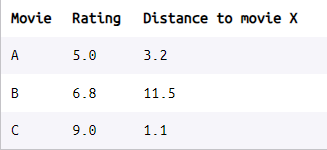

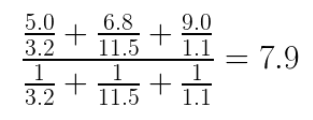

In [117]:
def predict(unknown, dataset, movie_ratings, k):
    distances = []
    #Looping through all points in the dataset
    for title in dataset:
        movie = dataset[title]
        distance_to_point = distance(movie, unknown)
        #Adding the distance and point associated with that distance
        distances.append([distance_to_point, title])
    distances.sort()
    #Taking only the k closest points
    neighbors = distances[0:k]
    numerator = 0
    denominator = 0
    for neighbor in neighbors:
        rating = movie_ratings[neighbor[1]]
        distance_to_neighbor = neighbor[0]
        numerator += rating / distance_to_neighbor
        denominator += 1 / distance_to_neighbor
    
    return numerator / denominator

In [124]:
predict([0.016, 0.300, 1.022], movie_dataset, movie_ratings, 5)

6.849139678439045

### Using Scikit-learn

We first need to create the regressor. We can use the parameter n_neighbors to define our value for k.

We can also choose whether or not to use a weighted average using the parameter weights. If weights equals "uniform", all neighbors will be considered equally in the average. If weights equals "distance", then a weighted average is used.

In [125]:
from sklearn.neighbors import KNeighborsRegressor

In [126]:
regressor = KNeighborsRegressor(n_neighbors = 5, weights = "distance")

In [148]:
mov_data = []
for title in movie_dataset:
    mov_data.append(movie_dataset[title])

In [149]:
mov_data

[[0.01940156245995175, 0.4812286689419795, 0.9213483146067416],
 [0.02455894456664483, 0.45051194539249145, 0.898876404494382],
 [0.02005646812429373, 0.378839590443686, 0.9887640449438202],
 [0.020465784164507467, 0.4334470989761092, 0.9550561797752809],
 [0.021587310114693104, 0.3242320819112628, 0.9550561797752809],
 [0.021120689828849445, 0.4061433447098976, 0.898876404494382],
 [0.021284416244934937, 0.2150170648464164, 0.9325842696629213],
 [0.020465784164507467, 0.35494880546075086, 0.9887640449438202],
 [0.020465784164507467, 0.39590443686006827, 0.9213483146067416],
 [0.020465784164507467, 0.49829351535836175, 1.0],
 [0.017109392634754826, 0.45051194539249145, 0.8876404494382022],
 [0.0163726237623701, 0.2354948805460751, 0.9101123595505618],
 [0.018419203963438782, 0.3890784982935154, 0.8876404494382022],
 [0.017600571883011312, 0.3856655290102389, 0.9662921348314607],
 [0.018419203963438782, 0.36177474402730375, 0.9662921348314607],
 [0.018419203963438782, 0.3856655290102389

In [150]:
mov_rate = []
for title in movie_ratings:
    mov_rate.append(movie_ratings[title])

In [151]:
mov_rate

[7.9,
 7.1,
 6.8,
 8.5,
 6.6,
 6.2,
 7.8,
 7.5,
 7.5,
 6.9,
 6.1,
 6.7,
 7.3,
 6.5,
 7.2,
 6.6,
 8.1,
 6.7,
 6.8,
 7.5,
 7.0,
 6.7,
 7.9,
 6.1,
 7.2,
 7.7,
 8.2,
 5.9,
 7.0,
 7.8,
 7.3,
 7.2,
 6.5,
 6.8,
 7.3,
 6.0,
 5.7,
 6.4,
 6.7,
 6.8,
 6.3,
 5.6,
 8.3,
 6.6,
 7.2,
 7.0,
 8.0,
 7.8,
 6.3,
 7.3,
 6.6,
 7.0,
 6.3,
 6.2,
 7.2,
 7.5,
 8.4,
 6.2,
 5.8,
 6.8,
 5.4,
 6.6,
 6.9,
 7.3,
 9.0,
 8.3,
 6.5,
 7.9,
 7.5,
 4.8,
 5.2,
 6.9,
 5.4,
 7.9,
 6.1,
 5.8,
 8.3,
 7.8,
 7.0,
 6.1,
 7.0,
 7.6,
 6.3,
 7.8,
 6.4,
 6.5,
 7.9,
 7.8,
 6.6,
 5.5,
 8.2,
 6.4,
 8.1,
 8.6,
 8.8,
 6.7,
 7.8,
 7.8,
 6.6,
 6.1,
 5.6,
 6.4,
 6.1,
 7.3,
 6.6,
 6.3,
 6.1,
 7.1,
 5.5,
 7.5,
 7.6,
 6.4,
 7.2,
 6.7,
 8.0,
 8.3,
 6.7,
 5.9,
 6.7,
 6.7,
 7.6,
 7.2,
 7.1,
 8.1,
 6.7,
 7.0,
 6.9,
 5.1,
 5.8,
 6.2,
 7.4,
 5.8,
 6.2,
 7.3,
 4.2,
 6.9,
 6.4,
 5.4,
 6.7,
 5.8,
 6.9,
 7.2,
 6.9,
 6.1,
 5.5,
 6.6,
 6.1,
 6.3,
 7.2,
 7.4,
 7.3,
 6.1,
 7.7,
 6.1,
 8.0,
 7.3,
 7.9,
 5.5,
 5.0,
 7.7,
 6.6,
 5.7,
 5.8,
 6.0,
 6.4,
 6.9,
 6.4

In [153]:
regressor.fit(mov_data, mov_rate)

KNeighborsRegressor(weights='distance')

In [154]:
print(regressor.predict([[0.016, 0.300, 1.022], [0.0004092981, 0.283, 1.0112], [0.00687649, 0.235, 1.0112]]))

[6.84913968 5.47572913 6.91067999]
